<a href="https://colab.research.google.com/github/abdalazizrashid/Auger-Electron-Spectroscopy/blob/master/XPS_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import glob
import os.path as osp
import re
plt.rcParams['axes.grid'] = True

### Reading asc file

In [0]:
class AesSpec:
    def __init__(self, filename):
    
        #assert filename.endswith('.asc')
        with open(filename, mode='r') as f:
            self.spec_range = f.readline()
            self.meta0 = f.readline()
            self.surv = f.readline()
            self.something = int(f.readline())
            self.ev_min = float(f.readline())
            self.ev_step = float(f.readline())
            self.n_points = int(f.readline())
            self.data = np.zeros(self.n_points)
            for i in range(self.n_points):
                self.data[i] = float(f.readline())
        idx = pd.Index(data=np.linspace(
                                    self.ev_min,
                                    self.ev_min + self.n_points*self.ev_step,
                                    self.n_points),
                       name='eV')
        self.ts = pd.Series(self.data,
                            name=os.path.split(filename)[-1],
                            index=idx)

    @staticmethod
    def all_specs():
        return glob.glob('asc/*-aes.asc')

In [0]:
root_path = "/home/master/Notebook/AES_standard/*"
dataset = []
elements = []
lenght = []
for file in glob.glob(root_path):
    try:
        filename = osp.splitext(osp.split(file)[-1])[0]
        specs = AesSpec(file).ts
        y = specs.iloc[:].to_numpy()
        #x = specs.index.to_numpy()
        elements.append(filename)
        dataset.append(y)
        lenght.append(len(y))
    except:
        print("Error Reading file!")
dataset, elements_array = np.array(dataset), np.array(elements)


elements = []
for i in elements_array:
  d = re.search(r"([a-zA-Z]*)([0-9])*", i)
  elements.append(d.group(1))

711 3191


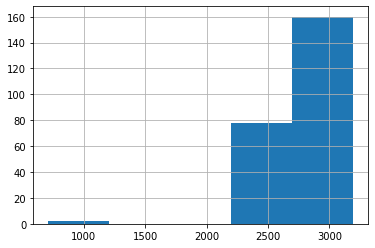

In [0]:
plt.hist(lenght, bins=5)
print(min(lenght), max(lenght))

In [0]:
def smoothdiffS7D7(cnts):
    ''' Create smooth differentiated column from counts using S7D7 PHI algorithm (Multipak tables 
    A-5 and A-1; passing np array (not pandas series)''' 
    numpts=len(cnts)
    endpts=[0,len(cnts)-1] # legacy way of defining endpoints and internal breaks (although those no longer present)
    smooth=[0]*numpts # empty list of correct length for smoothed data
    smoothdiff=[0]*numpts # 7 pt diff of above smoothed data
    # smoothing of endpoints according to Multipak algorithm appendix table A-5    
    for i in range(0,numpts): # special cases for endpoints (within 3 of an evbreak)
        diff=i-min(endpts, key=lambda x:abs(x-i)) # distance from closest evbreak index # in list            
        if diff==0:
            if i==numpts-1: #last point
                smooth[i]=(2*cnts[i]+2*cnts[i-1]+1)/4 # additional special case for last point
            else: # first point
                smooth[i]=(2*cnts[i]+2*cnts[i+1]+1)/4 # all others at exact breaks can use value and adj higher value
        elif abs(diff)==1:  # works for +1 or -1 from nearest break
            smooth[i]=(1*cnts[i-1]+2*cnts[i]+1*cnts[i+1]+1)/4
        elif abs(diff)==2:
            smooth[i]=(-3*cnts[i-2]+12*cnts[i-1]+17*cnts[i]+12*cnts[i+1]+-3*cnts[i+2]+1)/35
        else:
            smooth[i]=(-2*cnts[i-3]+3*cnts[i-2]+6*cnts[i-1]+7*cnts[i]+6*cnts[i+1]+3*cnts[i+2]-2*cnts[i+3]+1)/21

    # Same structure to perform differentiation on smoothed datalist above
    for i in range(0,numpts): # special cases for endpoints (within 3 of an evbreak)
        diff=i-min(endpts, key=lambda x:abs(x-i)) # distance from closest evbreak index # in list
        if abs(diff)<=2:
            smoothdiff[i]=0  # just zero out endpoints (old code moved to python software dev xls cell)
        else:
            smoothdiff[i]=(-3*smooth[i-3]-2*smooth[i-2]-1*smooth[i-1]+1*smooth[i+1]+2*smooth[i+2]+3*smooth[i+3]+1)/28
    smoothdiff=np.asarray(smoothdiff)
    return smoothdiff

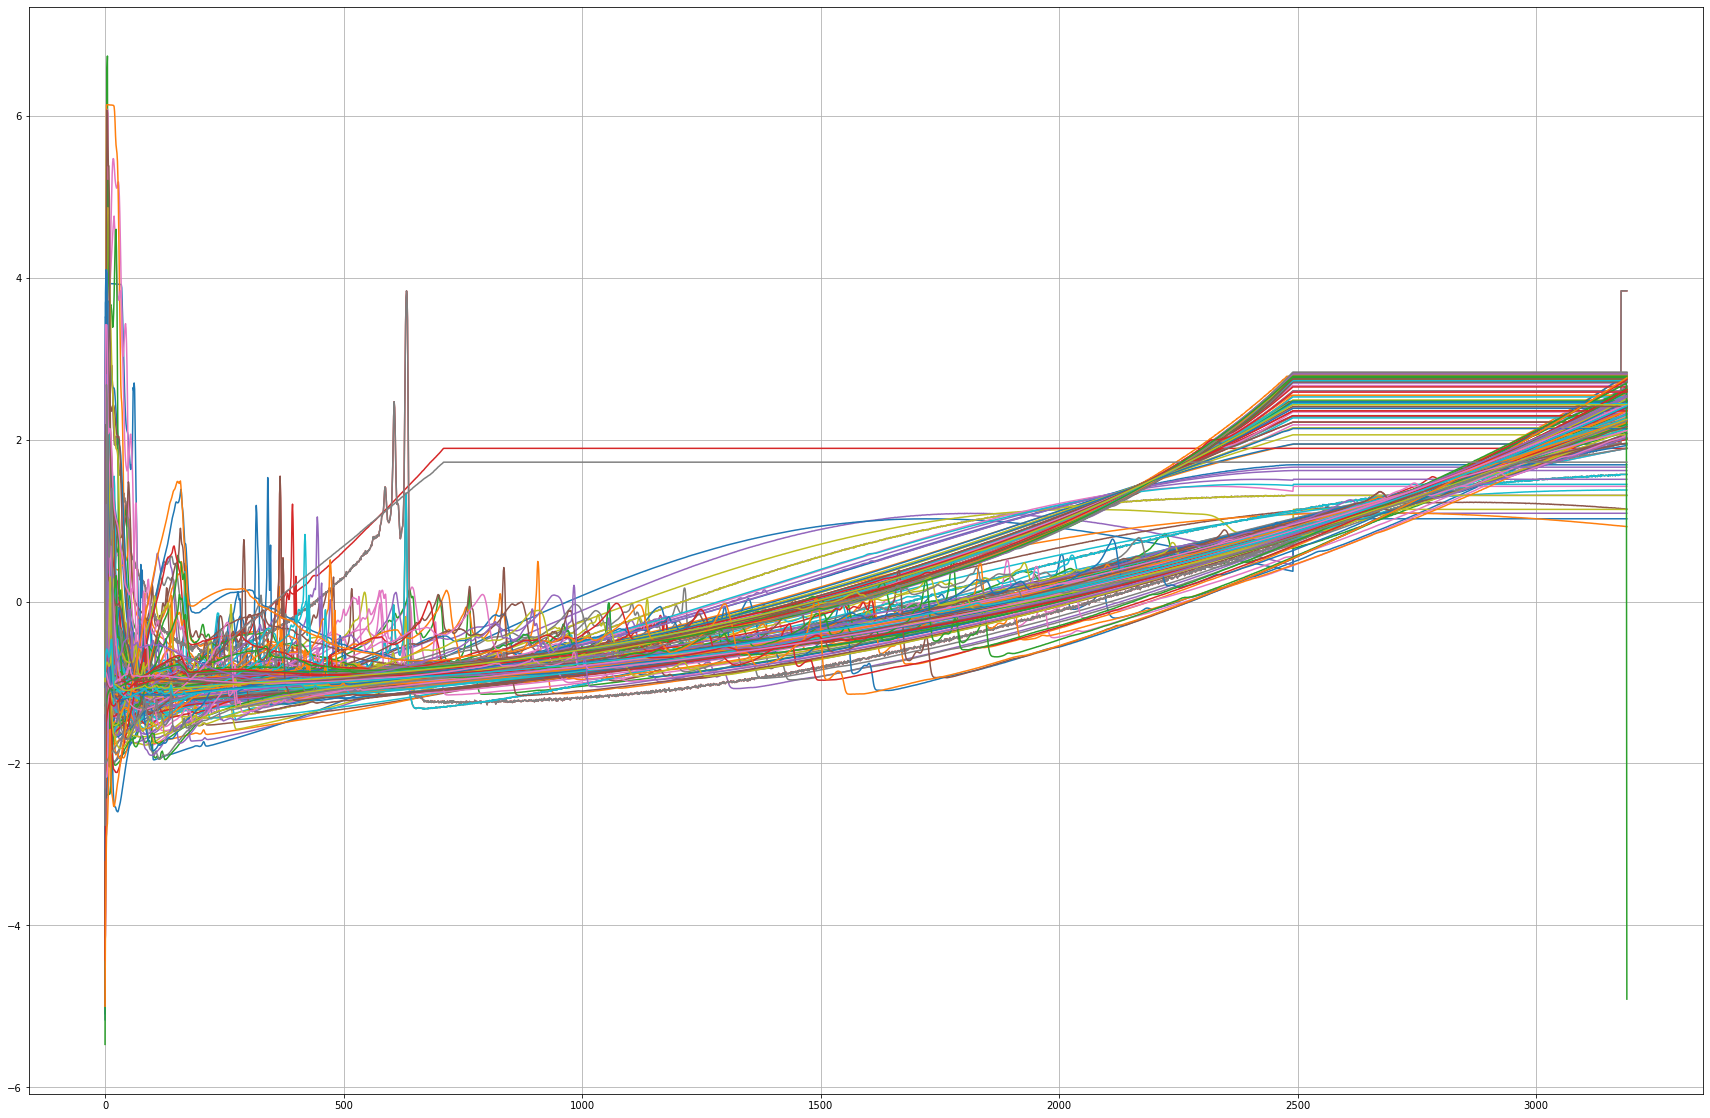

In [0]:
plt.figure(figsize=(30,20))
# Normalize to mean of 0 and standard deviation of 1
def norm(x): return (x-np.mean(x))/np.std(x)

# Normalize to a range between 0, 1
def norm2(x): return (x-np.min(x))/(np.max(x) - np.min(x))

# Padding to respect to the maximum lenght in the dataset
def pad(x):
    shape = ((max(lenght)-len(x)))
    p = np.full(shape, max(x))
    p = np.insert(p, 0, x)
    return p
X = []
Y = []
for i in range(len(dataset)):
    #tmp = smoothdiffS7D7(pad(norm(dataset[i])))
    tmp = pad(norm(dataset[i]))

    plt.plot(tmp)
    Y.append(tmp)
    X.append(np.arange(0, len(tmp)))
#plt.xscale('log')  
#plt.plot(norm(dataset[100]), alpha=0.5, color='r', marker='.')
plt.show()
Y = np.array(Y)
x = np.array(X)


In [0]:
fig, ax = plt.subplots(len(dataset)//4, 4, figsize = (50, 100))
plt.grid(True)
for i in range(len(dataset)):
    ax.flat[i].plot(dataset[i])
    ax.flat[i].set_title(elements[i])
    ax.flat[i].get_xaxis().set_ticks([])
#fig.savefig("AudioWaveform", dpi=900)     

Error in callback <function flush_figures at 0x7f3e0f322560> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
plt.figure(figsize=(30,10))

def mixture(input_array, num_of_samples=3, parameter=1000):
    mix = np.random.dirichlet(np.ones(num_of_samples)/parameter)
    _y = np.zeros((3191))
    for i in range(num_of_samples):
        print()
        _y += np.sqrt(np.power(np.random.permutation(mix[i] * input_array[i], ), 2))
    return _y


plt.plot(mixture(Y, num_of_samples=, parameter= 1000),'r')
plt.plot(Y[0], '.')
plt.plot(Y[1], '-')
plt.plot(Y[2], '-')
plt.show()


#   mix = np.random.dirichlet(np.ones(num_of_samples)/parameter)
#     _y = np.zeros((3191))
#     for i in range(num_of_samples):
#         print()
#         _y += mix[i] * input_array[i]
#     return _y

SyntaxError: ignored

In [0]:
smth = np.zeros((Y.shape[0], ))
smth1 = np.random.dirichlet(np.ones(3))


In [0]:
plt.plot(smth2)

NameError: name 'smth2' is not defined

In [0]:
plt.figure(figsize=(20, 15))
plt.plot(Y[1])
plt.plot(Y[100])
plt.plot(mixture(Y, 3)[0], color='r')
plt.show()

In [0]:
Y.shape

(240, 3191)

In [0]:
import torch
import re
from torch.utils.data import Dataset, DataLoader
cuda = torch.device('cuda:0')
class Data(Dataset):
   

    def __init__(self, data, name):
                 
        self.data = data
        self.name = name
        assert len(name) == len(data)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        y = self.data[idx]
        name = self.name
        s = pd.Series(np.arange(0, 240))
        Name = pd.get_dummies(name).to_numpy()
        cuda = torch.device('cuda:0')

        return (torch.tensor((y)).view(1, 3191), torch.tensor(Name[idx]).float())
    
    

In [0]:
bs = 120
trainloader = torch.utils.data.DataLoader(Data(Y, elements), batch_size=bs,
                                         shuffle=False, num_workers=6, pin_memory=False)

In [0]:
import pandas as pd
import wandb
import torch


#90dd838e588a5bce5c551a082a1dfdb39dff7487

wandb.init(project="test")


# s = pd.Series(np.arange(1, 118))
# y = pd.get_dummies(s).to_numpy()
# _y = np.arange(0, 118)
# X = torch.tensor(Y.reshape(1, 3191, -1)).float()
# y = torch.tensor(_y.reshape(1, 118)).float()
# Y = np.random.randint(0, 9, 10).reshape(1, 1, -1)

class Simple1DCNN(torch.nn.Module):
    def __init__(self):
        super(Simple1DCNN, self).__init__()
        self.conv1 = torch.nn.Conv1d(in_channels=1, out_channels=128, kernel_size=11, stride=1)
        self.conv2 = torch.nn.Conv1d(in_channels=1, out_channels=128, kernel_size=21, stride=1, padding=5)
        self.conv3= torch.nn.Conv1d(in_channels=1, out_channels=128, kernel_size=41, stride=1, padding=15)
        self.conv4= torch.nn.Conv1d(in_channels=384, out_channels=1024, kernel_size=5, stride=1)### in_channels=384
        self.avg5= torch.nn.AdaptiveAvgPool1d(1)
        self.sigmoid= torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        def relu(x): return x.clamp(0.) - 0.5
        

        self.flatten= torch.nn.Flatten()
        
        # dense layer has 4*512 input dim
        # Contamination
        self.dropout= torch.nn.Dropout(p=0.2)
        self.co_dense1= torch.nn.Linear(in_features=1024, out_features=512)
        self.co_dense2= torch.nn.Linear(in_features=512, out_features=1)
        
        # Quantification
        
        self.qu_dense1= torch.nn.Linear(in_features=1025, out_features=2048)
        self.qu_dense2= torch.nn.Linear(in_features=2048, out_features=84)
        #self.norm= torch.nn.BatchNorm1d(num_features=81)
        
    def forward(self, x):
        f_1_1 = self.relu(self.conv1(x))
        f_1_2 = self.relu(self.conv2(x))
        f_1_3 = self.relu(self.conv3(x))


        t = torch.cat((f_1_1, f_1_2, f_1_3), dim=1)


        f_2 = self.conv4(t)
        f_2 = self.avg5(f_2)
        f_2 = self.flatten(f_2)

        f_3 = self.dropout(f_2)
        f_3 = self.co_dense1(f_3)
        f_3 = self.relu(f_3)
        f_3 = self.co_dense2(f_3)
        

        
        #f_4 = self.dropout(torch.cat((f_3, f_2), dim=1))
        f_4 = torch.cat((f_3, f_2), dim=1)
        f_4 = self.qu_dense1(f_4)
        f_4 = self.relu(f_4)
        f_4 = self.qu_dense2(f_4)
 #       f_4 = self.relu(f_4)
        
        


        return f_4[...,:-1], f_4[...,-1]
    
    



wandb: Wandb version 0.8.15 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [0]:
cuda = torch.device('cuda:0')

model = Simple1DCNN().to(cuda)
def cross_entropy_one_hot(input, target):
    labels = target.max(dim=1)[1]
    return torch.nn.CrossEntropyLoss()(input, labels)
wandb.watch(model)

In [0]:
import math
def cyclical_lr(stepsize, min_lr=3e-4, max_lr=3e-3):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [0]:
import torch.distributions.relaxed_categorical

In [0]:
class DickLoss(torch.nn.Module):
  def forward(self, input, temp, target):
    # target = torch.distributions.utils.clamp_probs(target)
    # temp = torch.full_like(temp, 1e-1)
    # dist = torch.distributions.relaxed_categorical.ExpRelaxedCategorical(temp.unsqueeze(-1), logits=input)
    # return -dist.log_prob(target).mean()
    target = target.argmax(-1)
    print(target.shape)
    return torch.nn.CrossEntropyLoss()(
        input, target
    )

In [0]:
dirloss = DickLoss()

In [0]:
p = torch.rand(3, 240)
p /= p.sum(-1, keepdim=True)
dirloss(p, torch.ones(3), p)

torch.Size([3])


tensor(5.4767)

In [0]:
# from tensorboardX import SummaryWriter

# writer = SummaryWriter()

loss_fn = dirloss #cross_entropy_one_hot
learning_rate = 3e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
step_size = 4*len(trainloader)
clr = cyclical_lr(step_size)
#scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, [clr])

import tqdm

In [0]:
def accuracy(out, yb): return (torch.argmax(out, dim=1) == torch.argmax(yb, dim=1)).float().mean()

In [0]:
#wandb.config.update(args)
def update_log(log):
  wandb.log(log)

def train(epoch=100000, trainloader=trainloader):
  cuda = torch.device('cuda:0')

  log = {"epoch": [], "loss": [], "acc": []}
  pre_acc = 0
  with tqdm.tqdm(range(epoch)) as _epochs:
    for epoch in _epochs:
        lr = 0
        for i , data in enumerate(trainloader, 0):
            # Forward pass: compute predicted y by passing x to the model.
            x, y = data; 
            x = x.to(cuda)
            y = y.to(cuda)
            
          
            y_pred, t_pred = model(x.float())
            

            
            # Compute and print loss.
            loss = loss_fn(y_pred, t_pred, y)

            log["acc"] = acc = accuracy(y_pred, y).item() 

            log["loss"] = loss.item()
            
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 7)

            optimizer.step()
      
            _epochs.set_description(f"epoch={epoch} acc={acc} loss={loss:.4f}")
        log["epoch"] = epoch
        update_log(log)
        if acc > pre_acc:
          checkpoint = {'model': Simple1DCNN(),
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict()}

          torch.save(checkpoint, str(acc) +'.pth')
          pre_acc = acc
          print("saved check point")
        




In [0]:
train()


  0%|          | 0/100000 [00:00<?, ?it/s]

torch.Size([120])


wandb: Wandb version 0.8.15 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
epoch=0 acc=0.02500000223517418 loss=4.4277:   0%|          | 0/100000 [00:04<?, ?it/s]

torch.Size([120])


epoch=0 acc=0.0 loss=8.7470:   0%|          | 1/100000 [00:06<174:01:44,  6.27s/it]

torch.Size([120])


epoch=1 acc=0.02500000223517418 loss=4.4043:   0%|          | 1/100000 [00:07<174:01:44,  6.27s/it]

torch.Size([120])


epoch=1 acc=0.0 loss=26.4019:   0%|          | 2/100000 [00:09<150:34:17,  5.42s/it]

torch.Size([120])


epoch=2 acc=0.008333333767950535 loss=13.7344:   0%|          | 2/100000 [00:10<150:34:17,  5.42s/it]

torch.Size([120])


epoch=2 acc=0.02500000223517418 loss=5.0189:   0%|          | 2/100000 [00:11<150:34:17,  5.42s/it]  /usr/local/anaconda/envs/fastai/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Simple1DCNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/anaconda/envs/fastai/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv1d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/anaconda/envs/fastai/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type AdaptiveAvgPool1d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/anaconda/envs/fastai/lib/python3.7/site-packages/torch/serialization.py:292: UserWa

saved check point
torch.Size([120])


epoch=3 acc=0.0 loss=22.6609:   0%|          | 3/100000 [00:13<128:04:14,  4.61s/it]               

torch.Size([120])


epoch=3 acc=0.02500000223517418 loss=5.9029:   0%|          | 4/100000 [00:14<107:43:22,  3.88s/it]

torch.Size([120])


epoch=4 acc=0.02500000223517418 loss=8.4780:   0%|          | 4/100000 [00:15<107:43:22,  3.88s/it]

torch.Size([120])


epoch=4 acc=0.0 loss=7.5197:   0%|          | 5/100000 [00:17<102:59:08,  3.71s/it]

torch.Size([120])


epoch=5 acc=0.0 loss=4.8059:   0%|          | 5/100000 [00:19<102:59:08,  3.71s/it]

torch.Size([120])


epoch=5 acc=0.0 loss=5.1908:   0%|          | 6/100000 [00:20<93:14:14,  3.36s/it] 

torch.Size([120])


epoch=6 acc=0.008333333767950535 loss=4.6731:   0%|          | 6/100000 [00:21<93:14:14,  3.36s/it]

torch.Size([120])


epoch=6 acc=0.01666666753590107 loss=4.5239:   0%|          | 7/100000 [00:23<86:48:38,  3.13s/it]

torch.Size([120])


epoch=7 acc=0.0 loss=4.4936:   0%|          | 7/100000 [00:24<86:48:38,  3.13s/it]                

torch.Size([120])


epoch=7 acc=0.02500000223517418 loss=4.4021:   0%|          | 8/100000 [00:25<81:08:27,  2.92s/it]

torch.Size([120])


epoch=8 acc=0.0 loss=4.5835:   0%|          | 8/100000 [00:26<81:08:27,  2.92s/it]                

torch.Size([120])


epoch=8 acc=0.02500000223517418 loss=4.3635:   0%|          | 9/100000 [00:28<80:48:52,  2.91s/it]

torch.Size([120])


epoch=9 acc=0.0 loss=4.5433:   0%|          | 9/100000 [00:29<80:48:52,  2.91s/it]                

torch.Size([120])


epoch=9 acc=0.02500000223517418 loss=4.4028:   0%|          | 10/100000 [00:31<79:32:17,  2.86s/it]

torch.Size([120])


epoch=10 acc=0.02500000223517418 loss=4.4481:   0%|          | 10/100000 [00:32<79:32:17,  2.86s/it]

torch.Size([120])


epoch=10 acc=0.0 loss=4.4457:   0%|          | 11/100000 [00:34<86:46:06,  3.12s/it]

torch.Size([120])


epoch=11 acc=0.02500000223517418 loss=4.3979:   0%|          | 11/100000 [00:36<86:46:06,  3.12s/it]

torch.Size([120])


epoch=11 acc=0.0 loss=4.4677:   0%|          | 12/100000 [00:37<85:05:59,  3.06s/it]

torch.Size([120])


epoch=12 acc=0.01666666753590107 loss=4.3761:   0%|          | 12/100000 [00:38<85:05:59,  3.06s/it]

torch.Size([120])


epoch=12 acc=0.0 loss=4.4688:   0%|          | 13/100000 [00:40<80:54:12,  2.91s/it]

torch.Size([120])


epoch=13 acc=0.02500000223517418 loss=4.3847:   0%|          | 13/100000 [00:41<80:54:12,  2.91s/it]

torch.Size([120])


epoch=13 acc=0.0 loss=4.4634:   0%|          | 14/100000 [00:43<85:28:00,  3.08s/it]

torch.Size([120])


epoch=14 acc=0.02500000223517418 loss=4.3836:   0%|          | 14/100000 [00:44<85:28:00,  3.08s/it]

torch.Size([120])


epoch=14 acc=0.0 loss=4.4504:   0%|          | 15/100000 [00:46<84:32:14,  3.04s/it]

torch.Size([120])


epoch=15 acc=0.02500000223517418 loss=4.3880:   0%|          | 15/100000 [00:47<84:32:14,  3.04s/it]

torch.Size([120])


epoch=15 acc=0.0 loss=4.4383:   0%|          | 16/100000 [00:49<84:40:01,  3.05s/it]

torch.Size([120])


epoch=16 acc=0.02500000223517418 loss=4.3956:   0%|          | 16/100000 [00:50<84:40:01,  3.05s/it]

torch.Size([120])


epoch=16 acc=0.0 loss=4.4286:   0%|          | 17/100000 [00:52<80:53:36,  2.91s/it]

torch.Size([120])


epoch=17 acc=0.02500000223517418 loss=4.4011:   0%|          | 17/100000 [00:53<80:53:36,  2.91s/it]

torch.Size([120])


epoch=17 acc=0.008333333767950535 loss=4.4223:   0%|          | 18/100000 [00:54<77:15:59,  2.78s/it]

torch.Size([120])


epoch=18 acc=0.0 loss=4.4032:   0%|          | 18/100000 [00:55<77:15:59,  2.78s/it]                 

torch.Size([120])


epoch=18 acc=0.008333333767950535 loss=4.4187:   0%|          | 19/100000 [00:56<70:39:28,  2.54s/it]

torch.Size([120])


epoch=19 acc=0.0 loss=4.4039:   0%|          | 19/100000 [00:57<70:39:28,  2.54s/it]                 

torch.Size([120])


epoch=19 acc=0.008333333767950535 loss=4.4165:   0%|          | 20/100000 [00:58<66:13:13,  2.38s/it]

torch.Size([120])


epoch=20 acc=0.01666666753590107 loss=4.4047:   0%|          | 20/100000 [00:59<66:13:13,  2.38s/it] 

torch.Size([120])


epoch=20 acc=0.0 loss=4.4154:   0%|          | 21/100000 [01:02<75:14:16,  2.71s/it]

torch.Size([120])


epoch=21 acc=0.02500000223517418 loss=4.4047:   0%|          | 21/100000 [01:03<75:14:16,  2.71s/it]

torch.Size([120])


epoch=21 acc=0.0 loss=4.4131:   0%|          | 22/100000 [01:04<73:00:30,  2.63s/it]

torch.Size([120])


epoch=22 acc=0.02500000223517418 loss=4.4038:   0%|          | 22/100000 [01:05<73:00:30,  2.63s/it]

torch.Size([120])


epoch=22 acc=0.0 loss=4.4120:   0%|          | 23/100000 [01:07<70:19:10,  2.53s/it]

torch.Size([120])


epoch=23 acc=0.01666666753590107 loss=4.4023:   0%|          | 23/100000 [01:08<70:19:10,  2.53s/it]

torch.Size([120])


epoch=23 acc=0.0 loss=4.4114:   0%|          | 24/100000 [01:09<67:57:59,  2.45s/it]

torch.Size([120])


epoch=24 acc=0.01666666753590107 loss=4.3999:   0%|          | 24/100000 [01:10<67:57:59,  2.45s/it]

torch.Size([120])


epoch=24 acc=0.0 loss=4.4151:   0%|          | 25/100000 [01:11<67:19:21,  2.42s/it]

torch.Size([120])


epoch=25 acc=0.01666666753590107 loss=4.3971:   0%|          | 25/100000 [01:12<67:19:21,  2.42s/it]

torch.Size([120])


epoch=25 acc=0.008333333767950535 loss=4.4102:   0%|          | 26/100000 [01:14<70:25:55,  2.54s/it]

torch.Size([120])


epoch=26 acc=0.01666666753590107 loss=4.3943:   0%|          | 26/100000 [01:15<70:25:55,  2.54s/it] 

torch.Size([120])


epoch=26 acc=0.0 loss=4.4089:   0%|          | 27/100000 [01:16<65:44:17,  2.37s/it]

torch.Size([120])


epoch=27 acc=0.01666666753590107 loss=4.3911:   0%|          | 27/100000 [01:17<65:44:17,  2.37s/it]

torch.Size([120])


epoch=27 acc=0.0 loss=4.4072:   0%|          | 28/100000 [01:19<67:36:06,  2.43s/it]

torch.Size([120])


epoch=28 acc=0.02500000223517418 loss=4.3867:   0%|          | 28/100000 [01:20<67:36:06,  2.43s/it]

torch.Size([120])


epoch=28 acc=0.0 loss=4.4048:   0%|          | 29/100000 [01:21<68:54:57,  2.48s/it]

torch.Size([120])


epoch=29 acc=0.02500000223517418 loss=4.3851:   0%|          | 29/100000 [01:22<68:54:57,  2.48s/it]

torch.Size([120])


epoch=29 acc=0.0 loss=4.4020:   0%|          | 30/100000 [01:24<69:58:21,  2.52s/it]

torch.Size([120])


epoch=30 acc=0.02500000223517418 loss=4.3745:   0%|          | 30/100000 [01:25<69:58:21,  2.52s/it]

torch.Size([120])


epoch=30 acc=0.0 loss=4.3986:   0%|          | 31/100000 [01:26<66:49:55,  2.41s/it]

torch.Size([120])


epoch=31 acc=0.0416666679084301 loss=4.3657:   0%|          | 31/100000 [01:27<66:49:55,  2.41s/it]

torch.Size([120])


epoch=31 acc=0.0 loss=4.4427:   0%|          | 32/100000 [01:28<64:21:14,  2.32s/it]

torch.Size([120])


epoch=32 acc=0.02500000223517418 loss=4.3586:   0%|          | 32/100000 [01:29<64:21:14,  2.32s/it]

torch.Size([120])


epoch=32 acc=0.0 loss=4.3920:   0%|          | 33/100000 [01:30<61:51:54,  2.23s/it]

torch.Size([120])


epoch=33 acc=0.02500000223517418 loss=4.3689:   0%|          | 33/100000 [01:31<61:51:54,  2.23s/it]

torch.Size([120])


epoch=33 acc=0.0 loss=4.4902:   0%|          | 34/100000 [01:33<67:33:15,  2.43s/it]

torch.Size([120])


epoch=34 acc=0.03333333507180214 loss=4.3221:   0%|          | 34/100000 [01:34<67:33:15,  2.43s/it]

torch.Size([120])


epoch=34 acc=0.0 loss=4.4263:   0%|          | 35/100000 [01:35<63:54:27,  2.30s/it]

torch.Size([120])


epoch=35 acc=0.02500000223517418 loss=4.3298:   0%|          | 35/100000 [01:36<63:54:27,  2.30s/it]

torch.Size([120])


epoch=35 acc=0.0 loss=4.3771:   0%|          | 36/100000 [01:37<61:13:05,  2.20s/it]

torch.Size([120])


epoch=36 acc=0.02500000223517418 loss=4.3342:   0%|          | 36/100000 [01:38<61:13:05,  2.20s/it]

torch.Size([120])


epoch=36 acc=0.0 loss=4.3487:   0%|          | 37/100000 [01:40<66:28:36,  2.39s/it]

torch.Size([120])


epoch=37 acc=0.03333333507180214 loss=4.3315:   0%|          | 37/100000 [01:41<66:28:36,  2.39s/it]

torch.Size([120])


epoch=37 acc=0.0 loss=4.3399:   0%|          | 38/100000 [01:42<63:13:54,  2.28s/it]

torch.Size([120])


epoch=38 acc=0.02500000223517418 loss=4.3255:   0%|          | 38/100000 [01:43<63:13:54,  2.28s/it]

torch.Size([120])


epoch=38 acc=0.008333333767950535 loss=4.3300:   0%|          | 39/100000 [01:44<60:56:57,  2.20s/it]

torch.Size([120])


epoch=39 acc=0.03333333507180214 loss=4.3127:   0%|          | 39/100000 [01:45<60:56:57,  2.20s/it] 

torch.Size([120])


epoch=39 acc=0.01666666753590107 loss=4.3241:   0%|          | 40/100000 [01:47<65:24:51,  2.36s/it]

torch.Size([120])


epoch=40 acc=0.03333333507180214 loss=4.2988:   0%|          | 40/100000 [01:48<65:24:51,  2.36s/it]

torch.Size([120])


epoch=40 acc=0.008333333767950535 loss=4.3186:   0%|          | 41/100000 [01:48<61:59:59,  2.23s/it]

torch.Size([120])


epoch=41 acc=0.02500000223517418 loss=4.2860:   0%|          | 41/100000 [01:50<61:59:59,  2.23s/it] 

torch.Size([120])


epoch=41 acc=0.008333333767950535 loss=4.3103:   0%|          | 42/100000 [01:51<62:44:16,  2.26s/it]

torch.Size([120])


epoch=42 acc=0.03333333507180214 loss=4.2670:   0%|          | 42/100000 [01:52<62:44:16,  2.26s/it] 

torch.Size([120])


epoch=42 acc=0.01666666753590107 loss=4.2984:   0%|          | 43/100000 [01:54<70:31:01,  2.54s/it]

torch.Size([120])


epoch=43 acc=0.03333333507180214 loss=4.2512:   0%|          | 43/100000 [01:55<70:31:01,  2.54s/it]

torch.Size([120])


epoch=43 acc=0.008333333767950535 loss=4.2879:   0%|          | 44/100000 [01:56<66:25:20,  2.39s/it]

torch.Size([120])


epoch=44 acc=0.0416666679084301 loss=4.2226:   0%|          | 44/100000 [01:57<66:25:20,  2.39s/it]  

torch.Size([120])


epoch=44 acc=0.01666666753590107 loss=4.2775:   0%|          | 45/100000 [01:58<63:06:44,  2.27s/it]

torch.Size([120])


epoch=45 acc=0.0416666679084301 loss=4.1989:   0%|          | 45/100000 [01:59<63:06:44,  2.27s/it] 

torch.Size([120])


epoch=45 acc=0.01666666753590107 loss=4.2516:   0%|          | 46/100000 [02:02<74:17:08,  2.68s/it]

torch.Size([120])


epoch=46 acc=0.05000000447034836 loss=4.1663:   0%|          | 46/100000 [02:03<74:17:08,  2.68s/it]

torch.Size([120])


epoch=46 acc=0.0 loss=4.3098:   0%|          | 47/100000 [02:04<68:53:13,  2.48s/it]

torch.Size([120])


epoch=47 acc=0.03333333507180214 loss=4.2649:   0%|          | 47/100000 [02:05<68:53:13,  2.48s/it]

torch.Size([120])


epoch=47 acc=0.008333333767950535 loss=4.2475:   0%|          | 48/100000 [02:06<65:06:48,  2.35s/it]

torch.Size([120])


epoch=48 acc=0.03333333507180214 loss=4.1446:   0%|          | 48/100000 [02:07<65:06:48,  2.35s/it] 

torch.Size([120])


epoch=48 acc=0.008333333767950535 loss=4.4334:   0%|          | 49/100000 [02:08<63:49:41,  2.30s/it]

torch.Size([120])


epoch=49 acc=0.05000000447034836 loss=4.1756:   0%|          | 49/100000 [02:09<63:49:41,  2.30s/it] 

torch.Size([120])


epoch=49 acc=0.02500000223517418 loss=4.3257:   0%|          | 50/100000 [02:10<62:10:56,  2.24s/it]

torch.Size([120])


epoch=50 acc=0.03333333507180214 loss=4.3138:   0%|          | 50/100000 [02:11<62:10:56,  2.24s/it]

torch.Size([120])


epoch=50 acc=0.0 loss=4.6716:   0%|          | 51/100000 [02:13<64:54:54,  2.34s/it]

torch.Size([120])


epoch=51 acc=0.05833333730697632 loss=4.1365:   0%|          | 51/100000 [02:14<64:54:54,  2.34s/it]

torch.Size([120])


epoch=51 acc=0.0 loss=4.4064:   0%|          | 52/100000 [02:15<62:15:33,  2.24s/it]

torch.Size([120])


epoch=52 acc=0.03333333507180214 loss=4.3056:   0%|          | 52/100000 [02:16<62:15:33,  2.24s/it]

torch.Size([120])


epoch=52 acc=0.01666666753590107 loss=4.3166:   0%|          | 53/100000 [02:17<65:30:38,  2.36s/it]

torch.Size([120])


epoch=53 acc=0.01666666753590107 loss=4.2732:   0%|          | 53/100000 [02:18<65:30:38,  2.36s/it]

torch.Size([120])


epoch=53 acc=0.008333333767950535 loss=4.3400:   0%|          | 54/100000 [02:20<66:45:54,  2.40s/it]

torch.Size([120])


epoch=54 acc=0.05000000447034836 loss=4.1038:   0%|          | 54/100000 [02:21<66:45:54,  2.40s/it] 

torch.Size([120])


epoch=54 acc=0.008333333767950535 loss=4.3729:   0%|          | 55/100000 [02:23<70:19:43,  2.53s/it]

torch.Size([120])


epoch=55 acc=0.02500000223517418 loss=4.1588:   0%|          | 55/100000 [02:24<70:19:43,  2.53s/it] 

torch.Size([120])


epoch=55 acc=0.05833333730697632 loss=4.2060:   0%|          | 56/100000 [02:25<66:35:48,  2.40s/it]

saved check point
torch.Size([120])


epoch=56 acc=0.02500000223517418 loss=4.2188:   0%|          | 56/100000 [02:26<66:35:48,  2.40s/it]

torch.Size([120])


epoch=56 acc=0.02500000223517418 loss=4.2202:   0%|          | 57/100000 [02:27<66:02:25,  2.38s/it]

torch.Size([120])


epoch=57 acc=0.01666666753590107 loss=4.1347:   0%|          | 57/100000 [02:28<66:02:25,  2.38s/it]

torch.Size([120])


epoch=57 acc=0.02500000223517418 loss=4.2035:   0%|          | 58/100000 [02:29<66:29:07,  2.39s/it]

torch.Size([120])


epoch=58 acc=0.03333333507180214 loss=4.1334:   0%|          | 58/100000 [02:30<66:29:07,  2.39s/it]

torch.Size([120])


epoch=58 acc=0.0416666679084301 loss=4.1856:   0%|          | 59/100000 [02:31<63:16:45,  2.28s/it]

torch.Size([120])


epoch=59 acc=0.03333333507180214 loss=4.0904:   0%|          | 59/100000 [02:32<63:16:45,  2.28s/it]

torch.Size([120])


epoch=59 acc=0.05000000447034836 loss=4.1638:   0%|          | 60/100000 [02:33<61:02:45,  2.20s/it]

torch.Size([120])


epoch=60 acc=0.06666667014360428 loss=4.0911:   0%|          | 60/100000 [02:34<61:02:45,  2.20s/it]

torch.Size([120])


epoch=60 acc=0.0 loss=4.1330:   0%|          | 61/100000 [02:36<66:13:21,  2.39s/it]

torch.Size([120])


epoch=61 acc=0.02500000223517418 loss=4.0139:   0%|          | 61/100000 [02:37<66:13:21,  2.39s/it]

torch.Size([120])


epoch=61 acc=0.01666666753590107 loss=4.1161:   0%|          | 62/100000 [02:38<62:46:08,  2.26s/it]

torch.Size([120])


epoch=62 acc=0.05000000447034836 loss=4.0020:   0%|          | 62/100000 [02:39<62:46:08,  2.26s/it]

torch.Size([120])


epoch=62 acc=0.01666666753590107 loss=4.1158:   0%|          | 63/100000 [02:40<60:29:05,  2.18s/it]

torch.Size([120])


epoch=63 acc=0.03333333507180214 loss=3.9215:   0%|          | 63/100000 [02:41<60:29:05,  2.18s/it]

torch.Size([120])


epoch=63 acc=0.008333333767950535 loss=4.1192:   0%|          | 64/100000 [02:42<58:53:12,  2.12s/it]

torch.Size([120])


epoch=64 acc=0.05833333730697632 loss=3.9579:   0%|          | 64/100000 [02:43<58:53:12,  2.12s/it] 

torch.Size([120])


epoch=64 acc=0.008333333767950535 loss=4.0758:   0%|          | 65/100000 [02:44<57:46:01,  2.08s/it]

torch.Size([120])


epoch=65 acc=0.06666667014360428 loss=3.9161:   0%|          | 65/100000 [02:45<57:46:01,  2.08s/it] 

torch.Size([120])


epoch=65 acc=0.008333333767950535 loss=4.0351:   0%|          | 66/100000 [02:46<56:59:00,  2.05s/it]

torch.Size([120])


epoch=66 acc=0.0833333358168602 loss=3.8797:   0%|          | 66/100000 [02:47<56:59:00,  2.05s/it]  

torch.Size([120])


epoch=66 acc=0.008333333767950535 loss=4.0440:   0%|          | 67/100000 [02:48<56:34:12,  2.04s/it]

torch.Size([120])


epoch=67 acc=0.07500000298023224 loss=3.7791:   0%|          | 67/100000 [02:49<56:34:12,  2.04s/it] 

torch.Size([120])


epoch=67 acc=0.0416666679084301 loss=3.9838:   0%|          | 68/100000 [02:50<58:24:28,  2.10s/it]

torch.Size([120])


epoch=68 acc=0.0416666679084301 loss=3.8549:   0%|          | 68/100000 [02:51<58:24:28,  2.10s/it]

torch.Size([120])


epoch=68 acc=0.02500000223517418 loss=4.0198:   0%|          | 69/100000 [02:53<64:14:48,  2.31s/it]

torch.Size([120])


epoch=69 acc=0.03333333507180214 loss=3.7401:   0%|          | 69/100000 [02:54<64:14:48,  2.31s/it]

torch.Size([120])


epoch=69 acc=0.0 loss=4.0139:   0%|          | 70/100000 [02:56<67:04:07,  2.42s/it]

torch.Size([120])


epoch=70 acc=0.0416666679084301 loss=4.1541:   0%|          | 70/100000 [02:57<67:04:07,  2.42s/it]

torch.Size([120])


epoch=70 acc=0.05833333730697632 loss=3.9365:   0%|          | 71/100000 [02:59<72:13:26,  2.60s/it]

torch.Size([120])


epoch=71 acc=0.02500000223517418 loss=4.4445:   0%|          | 71/100000 [03:00<72:13:26,  2.60s/it]

torch.Size([120])


epoch=71 acc=0.008333333767950535 loss=4.5309:   0%|          | 72/100000 [03:02<73:57:50,  2.66s/it]

torch.Size([120])


epoch=72 acc=0.01666666753590107 loss=4.0311:   0%|          | 72/100000 [03:03<73:57:50,  2.66s/it] 

torch.Size([120])


epoch=72 acc=0.07500000298023224 loss=3.8641:   0%|          | 73/100000 [03:04<70:05:56,  2.53s/it]

saved check point
torch.Size([120])


epoch=73 acc=0.02500000223517418 loss=3.9327:   0%|          | 73/100000 [03:05<70:05:56,  2.53s/it]

torch.Size([120])


epoch=73 acc=0.06666667014360428 loss=3.9985:   0%|          | 74/100000 [03:06<68:29:04,  2.47s/it]

torch.Size([120])


epoch=74 acc=0.05000000447034836 loss=3.8125:   0%|          | 74/100000 [03:07<68:29:04,  2.47s/it]

torch.Size([120])


epoch=74 acc=0.03333333507180214 loss=3.8995:   0%|          | 75/100000 [03:09<71:12:34,  2.57s/it]

torch.Size([120])


epoch=75 acc=0.03333333507180214 loss=3.7168:   0%|          | 75/100000 [03:10<71:12:34,  2.57s/it]

torch.Size([120])


epoch=75 acc=0.02500000223517418 loss=3.8966:   0%|          | 76/100000 [03:12<77:07:38,  2.78s/it]

torch.Size([120])


epoch=76 acc=0.06666667014360428 loss=3.6341:   0%|          | 76/100000 [03:13<77:07:38,  2.78s/it]

torch.Size([120])


epoch=76 acc=0.02500000223517418 loss=4.2484:   0%|          | 77/100000 [03:14<70:09:14,  2.53s/it]

torch.Size([120])


epoch=77 acc=0.06666667014360428 loss=3.5676:   0%|          | 77/100000 [03:15<70:09:14,  2.53s/it]

torch.Size([120])


epoch=77 acc=0.008333333767950535 loss=4.5024:   0%|          | 78/100000 [03:16<65:59:29,  2.38s/it]

torch.Size([120])


epoch=78 acc=0.10000000894069672 loss=3.9736:   0%|          | 78/100000 [03:18<65:59:29,  2.38s/it] 

torch.Size([120])


epoch=78 acc=0.008333333767950535 loss=4.2670:   0%|          | 79/100000 [03:19<64:59:15,  2.34s/it]

torch.Size([120])


epoch=79 acc=0.05000000447034836 loss=3.5883:   0%|          | 79/100000 [03:20<64:59:15,  2.34s/it] 

torch.Size([120])


epoch=79 acc=0.0 loss=4.0929:   0%|          | 80/100000 [03:21<63:52:18,  2.30s/it]

torch.Size([120])


epoch=80 acc=0.10000000894069672 loss=3.5731:   0%|          | 80/100000 [03:22<63:52:18,  2.30s/it]

torch.Size([120])


epoch=80 acc=0.0416666679084301 loss=4.1499:   0%|          | 81/100000 [03:23<61:52:00,  2.23s/it]

torch.Size([120])


epoch=81 acc=0.05000000447034836 loss=3.7513:   0%|          | 81/100000 [03:24<61:52:00,  2.23s/it]

torch.Size([120])


epoch=81 acc=0.01666666753590107 loss=4.0027:   0%|          | 82/100000 [03:26<71:05:05,  2.56s/it]

torch.Size([120])


epoch=82 acc=0.0833333358168602 loss=3.7449:   0%|          | 82/100000 [03:27<71:05:05,  2.56s/it] 

torch.Size([120])


epoch=82 acc=0.02500000223517418 loss=3.9626:   0%|          | 83/100000 [03:28<67:35:41,  2.44s/it]

torch.Size([120])


epoch=83 acc=0.07500000298023224 loss=3.7381:   0%|          | 83/100000 [03:30<67:35:41,  2.44s/it]

torch.Size([120])


epoch=83 acc=0.02500000223517418 loss=3.8409:   0%|          | 84/100000 [03:31<68:58:27,  2.49s/it]

torch.Size([120])


epoch=84 acc=0.06666667014360428 loss=3.7453:   0%|          | 84/100000 [03:32<68:58:27,  2.49s/it]

torch.Size([120])


epoch=84 acc=0.01666666753590107 loss=3.9466:   0%|          | 85/100000 [03:34<71:18:20,  2.57s/it]

torch.Size([120])


epoch=85 acc=0.05000000447034836 loss=3.5973:   0%|          | 85/100000 [03:35<71:18:20,  2.57s/it]

torch.Size([120])


epoch=85 acc=0.02500000223517418 loss=3.9246:   0%|          | 86/100000 [03:36<71:23:40,  2.57s/it]

torch.Size([120])


epoch=86 acc=0.0416666679084301 loss=3.5061:   0%|          | 86/100000 [03:37<71:23:40,  2.57s/it] 

torch.Size([120])


epoch=86 acc=0.0 loss=3.9569:   0%|          | 87/100000 [03:40<79:32:19,  2.87s/it]

torch.Size([120])


epoch=87 acc=0.10000000894069672 loss=3.4384:   0%|          | 87/100000 [03:41<79:32:19,  2.87s/it]

torch.Size([120])


epoch=87 acc=0.008333333767950535 loss=3.8896:   0%|          | 88/100000 [03:42<74:27:40,  2.68s/it]

torch.Size([120])


epoch=88 acc=0.10833334177732468 loss=3.4887:   0%|          | 88/100000 [03:43<74:27:40,  2.68s/it] 

torch.Size([120])


epoch=88 acc=0.01666666753590107 loss=4.0138:   0%|          | 89/100000 [03:44<68:48:06,  2.48s/it]

torch.Size([120])


epoch=89 acc=0.0416666679084301 loss=3.5669:   0%|          | 89/100000 [03:45<68:48:06,  2.48s/it] 

torch.Size([120])


epoch=89 acc=0.02500000223517418 loss=4.3244:   0%|          | 90/100000 [03:46<64:58:35,  2.34s/it]

torch.Size([120])


epoch=90 acc=0.05000000447034836 loss=3.7907:   0%|          | 90/100000 [03:47<64:58:35,  2.34s/it]

torch.Size([120])


epoch=90 acc=0.0416666679084301 loss=4.2226:   0%|          | 91/100000 [03:49<70:51:19,  2.55s/it]

torch.Size([120])


epoch=91 acc=0.09166666865348816 loss=3.7055:   0%|          | 91/100000 [03:50<70:51:19,  2.55s/it]

torch.Size([120])


epoch=91 acc=0.008333333767950535 loss=3.9343:   0%|          | 92/100000 [03:52<72:45:50,  2.62s/it]

torch.Size([120])


epoch=92 acc=0.15833334624767303 loss=3.4736:   0%|          | 92/100000 [03:53<72:45:50,  2.62s/it] 

torch.Size([120])


epoch=92 acc=0.0 loss=4.2583:   0%|          | 93/100000 [03:55<78:37:13,  2.83s/it]

torch.Size([120])


epoch=93 acc=0.0416666679084301 loss=3.7075:   0%|          | 93/100000 [03:56<78:37:13,  2.83s/it]

torch.Size([120])


epoch=93 acc=0.01666666753590107 loss=3.8880:   0%|          | 94/100000 [03:57<71:39:50,  2.58s/it]

torch.Size([120])


epoch=94 acc=0.10833334177732468 loss=3.5456:   0%|          | 94/100000 [03:58<71:39:50,  2.58s/it]

torch.Size([120])


epoch=94 acc=0.05833333730697632 loss=3.8623:   0%|          | 95/100000 [04:00<72:17:28,  2.60s/it]

torch.Size([120])


epoch=95 acc=0.05833333730697632 loss=3.6316:   0%|          | 95/100000 [04:01<72:17:28,  2.60s/it]

torch.Size([120])


epoch=95 acc=0.05000000447034836 loss=3.8031:   0%|          | 96/100000 [04:02<69:07:24,  2.49s/it]

torch.Size([120])


epoch=96 acc=0.05833333730697632 loss=3.7075:   0%|          | 96/100000 [04:03<69:07:24,  2.49s/it]

torch.Size([120])


epoch=96 acc=0.05000000447034836 loss=3.9624:   0%|          | 97/100000 [04:04<67:37:25,  2.44s/it]

torch.Size([120])


epoch=97 acc=0.03333333507180214 loss=3.7121:   0%|          | 97/100000 [04:05<67:37:25,  2.44s/it]

torch.Size([120])


epoch=97 acc=0.0833333358168602 loss=3.6874:   0%|          | 98/100000 [04:07<70:26:50,  2.54s/it]

saved check point
torch.Size([120])


epoch=98 acc=0.05833333730697632 loss=3.5060:   0%|          | 98/100000 [04:08<70:26:50,  2.54s/it]

torch.Size([120])


epoch=98 acc=0.05833333730697632 loss=3.9216:   0%|          | 99/100000 [04:10<69:57:43,  2.52s/it]

torch.Size([120])


epoch=99 acc=0.05000000447034836 loss=3.6650:   0%|          | 99/100000 [04:11<69:57:43,  2.52s/it]

torch.Size([120])


epoch=99 acc=0.07500000298023224 loss=3.8288:   0%|          | 100/100000 [04:12<67:55:33,  2.45s/it]

torch.Size([120])


epoch=100 acc=0.0416666679084301 loss=3.7403:   0%|          | 100/100000 [04:13<67:55:33,  2.45s/it]

torch.Size([120])


epoch=100 acc=0.05833333730697632 loss=3.6699:   0%|          | 101/100000 [04:15<72:11:22,  2.60s/it]

torch.Size([120])


epoch=101 acc=0.03333333507180214 loss=3.5333:   0%|          | 101/100000 [04:16<72:11:22,  2.60s/it]

torch.Size([120])


epoch=101 acc=0.0833333358168602 loss=3.6546:   0%|          | 102/100000 [04:18<76:32:06,  2.76s/it]

torch.Size([120])


epoch=102 acc=0.07500000298023224 loss=3.4361:   0%|          | 102/100000 [04:19<76:32:06,  2.76s/it]

torch.Size([120])


epoch=102 acc=0.008333333767950535 loss=4.1014:   0%|          | 103/100000 [04:21<74:57:03,  2.70s/it]

torch.Size([120])


epoch=103 acc=0.07500000298023224 loss=3.6801:   0%|          | 103/100000 [04:22<74:57:03,  2.70s/it] 

torch.Size([120])


epoch=103 acc=0.008333333767950535 loss=3.7959:   0%|          | 104/100000 [04:24<79:20:51,  2.86s/it]

torch.Size([120])


epoch=104 acc=0.125 loss=3.4154:   0%|          | 104/100000 [04:25<79:20:51,  2.86s/it]               

torch.Size([120])


epoch=104 acc=0.01666666753590107 loss=3.8103:   0%|          | 105/100000 [04:26<72:09:06,  2.60s/it]

torch.Size([120])


epoch=105 acc=0.09166666865348816 loss=3.2886:   0%|          | 105/100000 [04:27<72:09:06,  2.60s/it]

torch.Size([120])


epoch=105 acc=0.01666666753590107 loss=3.9387:   0%|          | 106/100000 [04:28<67:27:18,  2.43s/it]

torch.Size([120])


epoch=106 acc=0.11666667461395264 loss=3.3451:   0%|          | 106/100000 [04:29<67:27:18,  2.43s/it]

torch.Size([120])


epoch=106 acc=0.008333333767950535 loss=4.1078:   0%|          | 107/100000 [04:30<63:49:34,  2.30s/it]

torch.Size([120])


epoch=107 acc=0.09166666865348816 loss=3.5724:   0%|          | 107/100000 [04:31<63:49:34,  2.30s/it] 

torch.Size([120])


epoch=107 acc=0.0 loss=3.7738:   0%|          | 108/100000 [04:33<71:41:27,  2.58s/it]

torch.Size([120])


epoch=108 acc=0.15000000596046448 loss=3.3800:   0%|          | 108/100000 [04:34<71:41:27,  2.58s/it]

torch.Size([120])


epoch=108 acc=0.008333333767950535 loss=3.6847:   0%|          | 109/100000 [04:35<66:47:56,  2.41s/it]

torch.Size([120])


epoch=109 acc=0.0416666679084301 loss=3.4093:   0%|          | 109/100000 [04:36<66:47:56,  2.41s/it]  

torch.Size([120])


epoch=109 acc=0.05833333730697632 loss=3.6843:   0%|          | 110/100000 [04:37<63:21:59,  2.28s/it]

torch.Size([120])


epoch=110 acc=0.11666667461395264 loss=3.4383:   0%|          | 110/100000 [04:38<63:21:59,  2.28s/it]

torch.Size([120])


epoch=110 acc=0.0 loss=3.9716:   0%|          | 111/100000 [04:40<67:57:56,  2.45s/it]

torch.Size([120])


epoch=111 acc=0.05833333730697632 loss=3.6888:   0%|          | 111/100000 [04:41<67:57:56,  2.45s/it]

torch.Size([120])


epoch=111 acc=0.0416666679084301 loss=3.6567:   0%|          | 112/100000 [04:42<64:15:33,  2.32s/it]

torch.Size([120])


epoch=112 acc=0.11666667461395264 loss=3.3332:   0%|          | 112/100000 [04:43<64:15:33,  2.32s/it]

torch.Size([120])


epoch=112 acc=0.02500000223517418 loss=3.6649:   0%|          | 113/100000 [04:45<71:19:32,  2.57s/it]

torch.Size([120])


epoch=113 acc=0.09166666865348816 loss=3.3103:   0%|          | 113/100000 [04:46<71:19:32,  2.57s/it]

torch.Size([120])


epoch=113 acc=0.0416666679084301 loss=3.9654:   0%|          | 114/100000 [04:47<67:00:17,  2.41s/it]

torch.Size([120])


epoch=114 acc=0.06666667014360428 loss=3.5617:   0%|          | 114/100000 [04:48<67:00:17,  2.41s/it]

torch.Size([120])


epoch=114 acc=0.0416666679084301 loss=3.6539:   0%|          | 115/100000 [04:50<70:00:22,  2.52s/it]

torch.Size([120])


epoch=115 acc=0.0833333358168602 loss=3.3174:   0%|          | 115/100000 [04:51<70:00:22,  2.52s/it]

torch.Size([120])


epoch=115 acc=0.0416666679084301 loss=3.7263:   0%|          | 116/100000 [04:52<65:30:45,  2.36s/it]

torch.Size([120])


epoch=116 acc=0.18333333730697632 loss=3.3085:   0%|          | 116/100000 [04:53<65:30:45,  2.36s/it]

torch.Size([120])


epoch=116 acc=0.01666666753590107 loss=3.8748:   0%|          | 117/100000 [04:54<61:47:06,  2.23s/it]

torch.Size([120])


epoch=117 acc=0.07500000298023224 loss=3.5535:   0%|          | 117/100000 [04:55<61:47:06,  2.23s/it]

torch.Size([120])


epoch=117 acc=0.01666666753590107 loss=3.5753:   0%|          | 118/100000 [04:57<68:33:08,  2.47s/it]

torch.Size([120])


epoch=118 acc=0.10000000894069672 loss=3.2996:   0%|          | 118/100000 [04:58<68:33:08,  2.47s/it]

torch.Size([120])


epoch=118 acc=0.05833333730697632 loss=3.5805:   0%|          | 119/100000 [04:59<68:29:02,  2.47s/it]

torch.Size([120])


epoch=119 acc=0.06666667014360428 loss=3.3314:   0%|          | 119/100000 [05:00<68:29:02,  2.47s/it]

torch.Size([120])


epoch=119 acc=0.03333333507180214 loss=3.8988:   0%|          | 120/100000 [05:03<75:39:23,  2.73s/it]

torch.Size([120])


epoch=120 acc=0.07500000298023224 loss=3.6808:   0%|          | 120/100000 [05:04<75:39:23,  2.73s/it]

torch.Size([120])


epoch=120 acc=0.03333333507180214 loss=3.4776:   0%|          | 121/100000 [05:06<77:06:04,  2.78s/it]

torch.Size([120])


epoch=121 acc=0.05833333730697632 loss=3.3599:   0%|          | 121/100000 [05:07<77:06:04,  2.78s/it]

torch.Size([120])


epoch=121 acc=0.07500000298023224 loss=3.5048:   0%|          | 122/100000 [05:09<83:55:41,  3.03s/it]

torch.Size([120])


epoch=122 acc=0.05000000447034836 loss=3.3418:   0%|          | 122/100000 [05:10<83:55:41,  3.03s/it]

torch.Size([120])


epoch=122 acc=0.03333333507180214 loss=3.7699:   0%|          | 123/100000 [05:11<75:24:36,  2.72s/it]

torch.Size([120])


epoch=123 acc=0.07500000298023224 loss=3.6030:   0%|          | 123/100000 [05:12<75:24:36,  2.72s/it]

torch.Size([120])


epoch=123 acc=0.0416666679084301 loss=3.5492:   0%|          | 124/100000 [05:13<69:23:36,  2.50s/it]

torch.Size([120])


epoch=124 acc=0.15833334624767303 loss=3.2439:   0%|          | 124/100000 [05:14<69:23:36,  2.50s/it]

torch.Size([120])


epoch=124 acc=0.01666666753590107 loss=3.6797:   0%|          | 125/100000 [05:15<65:10:39,  2.35s/it]

torch.Size([120])


epoch=125 acc=0.13333334028720856 loss=3.2399:   0%|          | 125/100000 [05:16<65:10:39,  2.35s/it]

torch.Size([120])


epoch=125 acc=0.01666666753590107 loss=3.8293:   0%|          | 126/100000 [05:18<65:51:29,  2.37s/it]

torch.Size([120])


epoch=126 acc=0.125 loss=3.4152:   0%|          | 126/100000 [05:19<65:51:29,  2.37s/it]              

torch.Size([120])


epoch=126 acc=0.008333333767950535 loss=3.5725:   0%|          | 127/100000 [05:20<63:42:09,  2.30s/it]

torch.Size([120])


epoch=127 acc=0.17500001192092896 loss=3.2022:   0%|          | 127/100000 [05:21<63:42:09,  2.30s/it] 

torch.Size([120])


epoch=127 acc=0.03333333507180214 loss=3.6669:   0%|          | 128/100000 [05:22<62:42:33,  2.26s/it]

torch.Size([120])


epoch=128 acc=0.09166666865348816 loss=3.2670:   0%|          | 128/100000 [05:23<62:42:33,  2.26s/it]

torch.Size([120])


epoch=128 acc=0.03333333507180214 loss=3.6938:   0%|          | 129/100000 [05:25<71:42:25,  2.58s/it]

torch.Size([120])


epoch=129 acc=0.07500000298023224 loss=3.4664:   0%|          | 129/100000 [05:26<71:42:25,  2.58s/it]

torch.Size([120])


epoch=129 acc=0.06666667014360428 loss=3.4877:   0%|          | 130/100000 [05:28<71:14:30,  2.57s/it]

torch.Size([120])


epoch=130 acc=0.09166666865348816 loss=3.2592:   0%|          | 130/100000 [05:29<71:14:30,  2.57s/it]

torch.Size([120])


epoch=130 acc=0.05000000447034836 loss=3.5808:   0%|          | 131/100000 [05:30<66:23:24,  2.39s/it]

torch.Size([120])


epoch=131 acc=0.05000000447034836 loss=3.3384:   0%|          | 131/100000 [05:31<66:23:24,  2.39s/it]

torch.Size([120])


epoch=131 acc=0.05000000447034836 loss=3.6443:   0%|          | 132/100000 [05:32<65:47:59,  2.37s/it]

torch.Size([120])


epoch=132 acc=0.10000000894069672 loss=3.4453:   0%|          | 132/100000 [05:33<65:47:59,  2.37s/it]

torch.Size([120])


epoch=132 acc=0.03333333507180214 loss=3.4518:   0%|          | 133/100000 [05:35<71:26:41,  2.58s/it]

torch.Size([120])


epoch=133 acc=0.09166666865348816 loss=3.2386:   0%|          | 133/100000 [05:36<71:26:41,  2.58s/it]

torch.Size([120])


epoch=133 acc=0.06666667014360428 loss=3.5745:   0%|          | 134/100000 [05:38<76:32:00,  2.76s/it]

torch.Size([120])


epoch=134 acc=0.10000000894069672 loss=3.2521:   0%|          | 134/100000 [05:39<76:32:00,  2.76s/it]

torch.Size([120])


epoch=134 acc=0.0416666679084301 loss=3.6642:   0%|          | 135/100000 [05:40<70:39:58,  2.55s/it]

torch.Size([120])


epoch=135 acc=0.06666667014360428 loss=3.4543:   0%|          | 135/100000 [05:41<70:39:58,  2.55s/it]

torch.Size([120])


epoch=135 acc=0.0416666679084301 loss=3.4840:   0%|          | 136/100000 [05:42<66:49:00,  2.41s/it]

torch.Size([120])


epoch=136 acc=0.09166666865348816 loss=3.1814:   0%|          | 136/100000 [05:43<66:49:00,  2.41s/it]

torch.Size([120])


epoch=136 acc=0.05833333730697632 loss=3.6193:   0%|          | 137/100000 [05:44<63:02:02,  2.27s/it]

torch.Size([120])


epoch=137 acc=0.10833334177732468 loss=3.2395:   0%|          | 137/100000 [05:45<63:02:02,  2.27s/it]

torch.Size([120])


epoch=137 acc=0.02500000223517418 loss=3.7000:   0%|          | 138/100000 [05:46<60:59:52,  2.20s/it]

torch.Size([120])


epoch=138 acc=0.0833333358168602 loss=3.4252:   0%|          | 138/100000 [05:47<60:59:52,  2.20s/it] 

torch.Size([120])


epoch=138 acc=0.02500000223517418 loss=3.4650:   0%|          | 139/100000 [05:50<69:23:48,  2.50s/it]

torch.Size([120])


epoch=139 acc=0.10833334177732468 loss=3.2084:   0%|          | 139/100000 [05:51<69:23:48,  2.50s/it]

torch.Size([120])


epoch=139 acc=0.06666667014360428 loss=3.5224:   0%|          | 140/100000 [05:52<68:23:24,  2.47s/it]

torch.Size([120])


epoch=140 acc=0.10833334177732468 loss=3.2307:   0%|          | 140/100000 [05:53<68:23:24,  2.47s/it]

torch.Size([120])


epoch=140 acc=0.0416666679084301 loss=3.6271:   0%|          | 141/100000 [05:54<64:34:25,  2.33s/it]

torch.Size([120])


epoch=141 acc=0.0833333358168602 loss=3.5049:   0%|          | 141/100000 [05:55<64:34:25,  2.33s/it]

torch.Size([120])


epoch=141 acc=0.0833333358168602 loss=3.4123:   0%|          | 142/100000 [05:56<61:56:25,  2.23s/it]

torch.Size([120])


epoch=142 acc=0.0833333358168602 loss=3.2153:   0%|          | 142/100000 [05:57<61:56:25,  2.23s/it]

torch.Size([120])


epoch=142 acc=0.0833333358168602 loss=3.5487:   0%|          | 143/100000 [05:59<64:47:23,  2.34s/it]

torch.Size([120])


epoch=143 acc=0.07500000298023224 loss=3.2079:   0%|          | 143/100000 [06:00<64:47:23,  2.34s/it]

torch.Size([120])


epoch=143 acc=0.0416666679084301 loss=3.7428:   0%|          | 144/100000 [06:01<69:08:49,  2.49s/it]

torch.Size([120])


epoch=144 acc=0.0833333358168602 loss=3.5103:   0%|          | 144/100000 [06:02<69:08:49,  2.49s/it]

torch.Size([120])


epoch=144 acc=0.03333333507180214 loss=3.4453:   0%|          | 145/100000 [06:04<72:23:05,  2.61s/it]

torch.Size([120])


epoch=145 acc=0.125 loss=3.2226:   0%|          | 145/100000 [06:05<72:23:05,  2.61s/it]              

torch.Size([120])


epoch=145 acc=0.05000000447034836 loss=3.4567:   0%|          | 146/100000 [06:07<75:45:04,  2.73s/it]

torch.Size([120])


epoch=146 acc=0.10000000894069672 loss=3.1919:   0%|          | 146/100000 [06:08<75:45:04,  2.73s/it]

torch.Size([120])


epoch=146 acc=0.0416666679084301 loss=3.6276:   0%|          | 147/100000 [06:10<76:24:48,  2.75s/it]

torch.Size([120])


epoch=147 acc=0.06666667014360428 loss=3.3930:   0%|          | 147/100000 [06:11<76:24:48,  2.75s/it]

torch.Size([120])


epoch=147 acc=0.0833333358168602 loss=3.5165:   0%|          | 148/100000 [06:12<70:11:16,  2.53s/it]

torch.Size([120])


epoch=148 acc=0.0833333358168602 loss=3.2035:   0%|          | 148/100000 [06:13<70:11:16,  2.53s/it]

torch.Size([120])


epoch=148 acc=0.05000000447034836 loss=3.5867:   0%|          | 149/100000 [06:15<69:49:49,  2.52s/it]

torch.Size([120])


epoch=149 acc=0.17500001192092896 loss=3.1315:   0%|          | 149/100000 [06:16<69:49:49,  2.52s/it]

torch.Size([120])


epoch=149 acc=0.02500000223517418 loss=3.6551:   0%|          | 150/100000 [06:17<65:56:25,  2.38s/it]

torch.Size([120])


epoch=150 acc=0.125 loss=3.2795:   0%|          | 150/100000 [06:18<65:56:25,  2.38s/it]              

torch.Size([120])


epoch=150 acc=0.01666666753590107 loss=3.5301:   0%|          | 151/100000 [06:19<62:49:38,  2.27s/it]

torch.Size([120])


epoch=151 acc=0.15833334624767303 loss=3.1561:   0%|          | 151/100000 [06:20<62:49:38,  2.27s/it]

torch.Size([120])


epoch=151 acc=0.01666666753590107 loss=3.5761:   0%|          | 152/100000 [06:21<63:49:58,  2.30s/it]

torch.Size([120])


epoch=152 acc=0.10000000894069672 loss=3.1696:   0%|          | 152/100000 [06:22<63:49:58,  2.30s/it]

torch.Size([120])


epoch=152 acc=0.02500000223517418 loss=3.5418:   0%|          | 153/100000 [06:23<63:07:53,  2.28s/it]

torch.Size([120])


epoch=153 acc=0.10833334177732468 loss=3.2410:   0%|          | 153/100000 [06:24<63:07:53,  2.28s/it]

torch.Size([120])


epoch=153 acc=0.05833333730697632 loss=3.4727:   0%|          | 154/100000 [06:25<60:55:41,  2.20s/it]

torch.Size([120])


epoch=154 acc=0.09166666865348816 loss=3.1810:   0%|          | 154/100000 [06:26<60:55:41,  2.20s/it]

torch.Size([120])


epoch=154 acc=0.0833333358168602 loss=3.5368:   0%|          | 155/100000 [06:28<67:13:03,  2.42s/it]

torch.Size([120])


epoch=155 acc=0.07500000298023224 loss=3.2420:   0%|          | 155/100000 [06:29<67:13:03,  2.42s/it]

torch.Size([120])


epoch=155 acc=0.05833333730697632 loss=3.4862:   0%|          | 156/100000 [06:30<63:46:46,  2.30s/it]

torch.Size([120])


epoch=156 acc=0.125 loss=3.2246:   0%|          | 156/100000 [06:31<63:46:46,  2.30s/it]              

torch.Size([120])


epoch=156 acc=0.05833333730697632 loss=3.4601:   0%|          | 157/100000 [06:33<68:59:17,  2.49s/it]

torch.Size([120])


epoch=157 acc=0.06666667014360428 loss=3.1884:   0%|          | 157/100000 [06:34<68:59:17,  2.49s/it]

torch.Size([120])


epoch=157 acc=0.05000000447034836 loss=3.5390:   0%|          | 158/100000 [06:36<69:54:12,  2.52s/it]

torch.Size([120])


epoch=158 acc=0.11666667461395264 loss=3.2217:   0%|          | 158/100000 [06:37<69:54:12,  2.52s/it]

torch.Size([120])


epoch=158 acc=0.05000000447034836 loss=3.5573:   0%|          | 159/100000 [06:38<64:57:09,  2.34s/it]

torch.Size([120])


epoch=159 acc=0.09166666865348816 loss=3.1880:   0%|          | 159/100000 [06:39<64:57:09,  2.34s/it]

torch.Size([120])


epoch=159 acc=0.05000000447034836 loss=3.4617:   0%|          | 160/100000 [06:40<65:43:41,  2.37s/it]

torch.Size([120])


epoch=160 acc=0.125 loss=3.1588:   0%|          | 160/100000 [06:41<65:43:41,  2.37s/it]              

torch.Size([120])


epoch=160 acc=0.0416666679084301 loss=3.5049:   0%|          | 161/100000 [06:42<64:35:40,  2.33s/it]

torch.Size([120])


epoch=161 acc=0.14166668057441711 loss=3.1748:   0%|          | 161/100000 [06:43<64:35:40,  2.33s/it]

torch.Size([120])


epoch=161 acc=0.0416666679084301 loss=3.5905:   0%|          | 162/100000 [06:46<71:41:31,  2.59s/it]

torch.Size([120])


epoch=162 acc=0.10833334177732468 loss=3.2865:   0%|          | 162/100000 [06:47<71:41:31,  2.59s/it]

torch.Size([120])


epoch=162 acc=0.02500000223517418 loss=3.4207:   0%|          | 163/100000 [06:48<66:54:14,  2.41s/it]

torch.Size([120])


epoch=163 acc=0.14166668057441711 loss=3.1201:   0%|          | 163/100000 [06:49<66:54:14,  2.41s/it]

torch.Size([120])


epoch=163 acc=0.0416666679084301 loss=3.4971:   0%|          | 164/100000 [06:50<66:07:05,  2.38s/it]

torch.Size([120])


epoch=164 acc=0.10833334177732468 loss=3.1798:   0%|          | 164/100000 [06:51<66:07:05,  2.38s/it]

torch.Size([120])


epoch=164 acc=0.03333333507180214 loss=3.4693:   0%|          | 165/100000 [06:52<64:53:12,  2.34s/it]

torch.Size([120])


epoch=165 acc=0.09166666865348816 loss=3.2646:   0%|          | 165/100000 [06:53<64:53:12,  2.34s/it]

torch.Size([120])


epoch=165 acc=0.06666667014360428 loss=3.3848:   0%|          | 166/100000 [06:54<63:22:45,  2.29s/it]

torch.Size([120])


epoch=166 acc=0.11666667461395264 loss=3.1379:   0%|          | 166/100000 [06:55<63:22:45,  2.29s/it]

torch.Size([120])


epoch=166 acc=0.0416666679084301 loss=3.5112:   0%|          | 167/100000 [06:58<71:08:47,  2.57s/it]

torch.Size([120])


epoch=167 acc=0.10000000894069672 loss=3.1684:   0%|          | 167/100000 [06:59<71:08:47,  2.57s/it]

torch.Size([120])


epoch=167 acc=0.05833333730697632 loss=3.4244:   0%|          | 168/100000 [07:00<69:37:04,  2.51s/it]

torch.Size([120])


epoch=168 acc=0.13333334028720856 loss=3.1988:   0%|          | 168/100000 [07:01<69:37:04,  2.51s/it]

torch.Size([120])


epoch=168 acc=0.0416666679084301 loss=3.3844:   0%|          | 169/100000 [07:03<73:00:58,  2.63s/it]

torch.Size([120])


epoch=169 acc=0.125 loss=3.1060:   0%|          | 169/100000 [07:04<73:00:58,  2.63s/it]             

torch.Size([120])


epoch=169 acc=0.05000000447034836 loss=3.4729:   0%|          | 170/100000 [07:05<69:46:52,  2.52s/it]

torch.Size([120])


epoch=170 acc=0.13333334028720856 loss=3.1884:   0%|          | 170/100000 [07:06<69:46:52,  2.52s/it]

torch.Size([120])


epoch=170 acc=0.03333333507180214 loss=3.4141:   0%|          | 171/100000 [07:08<73:57:33,  2.67s/it]

torch.Size([120])


epoch=171 acc=0.11666667461395264 loss=3.1016:   0%|          | 171/100000 [07:09<73:57:33,  2.67s/it]

torch.Size([120])


epoch=171 acc=0.05833333730697632 loss=3.4306:   0%|          | 172/100000 [07:11<73:57:32,  2.67s/it]

torch.Size([120])


epoch=172 acc=0.11666667461395264 loss=3.1122:   0%|          | 172/100000 [07:12<73:57:32,  2.67s/it]

torch.Size([120])


epoch=172 acc=0.0416666679084301 loss=3.4309:   0%|          | 173/100000 [07:14<80:54:52,  2.92s/it]

torch.Size([120])


epoch=173 acc=0.10000000894069672 loss=3.1208:   0%|          | 173/100000 [07:15<80:54:52,  2.92s/it]

torch.Size([120])


epoch=173 acc=0.0416666679084301 loss=3.4187:   0%|          | 174/100000 [07:16<73:25:20,  2.65s/it]

torch.Size([120])


epoch=174 acc=0.15000000596046448 loss=3.1023:   0%|          | 174/100000 [07:17<73:25:20,  2.65s/it]

torch.Size([120])


epoch=174 acc=0.05000000447034836 loss=3.4774:   0%|          | 175/100000 [07:18<68:03:24,  2.45s/it]

torch.Size([120])


epoch=175 acc=0.11666667461395264 loss=3.0979:   0%|          | 175/100000 [07:19<68:03:24,  2.45s/it]

torch.Size([120])


epoch=175 acc=0.03333333507180214 loss=3.4092:   0%|          | 176/100000 [07:21<67:36:32,  2.44s/it]

torch.Size([120])


epoch=176 acc=0.125 loss=3.1060:   0%|          | 176/100000 [07:22<67:36:32,  2.44s/it]              

torch.Size([120])


epoch=176 acc=0.03333333507180214 loss=3.4410:   0%|          | 177/100000 [07:23<64:05:11,  2.31s/it]

torch.Size([120])


epoch=177 acc=0.10833334177732468 loss=3.0995:   0%|          | 177/100000 [07:24<64:05:11,  2.31s/it]

torch.Size([120])


epoch=177 acc=0.0833333358168602 loss=3.3903:   0%|          | 178/100000 [07:25<67:31:40,  2.44s/it]

torch.Size([120])


epoch=178 acc=0.13333334028720856 loss=3.1418:   0%|          | 178/100000 [07:26<67:31:40,  2.44s/it]

torch.Size([120])


epoch=178 acc=0.0416666679084301 loss=3.3892:   0%|          | 179/100000 [07:28<68:22:23,  2.47s/it]

torch.Size([120])


epoch=179 acc=0.11666667461395264 loss=3.0855:   0%|          | 179/100000 [07:29<68:22:23,  2.47s/it]

torch.Size([120])


epoch=179 acc=0.0416666679084301 loss=3.4100:   0%|          | 180/100000 [07:30<67:22:02,  2.43s/it]

torch.Size([120])


epoch=180 acc=0.125 loss=3.1477:   0%|          | 180/100000 [07:31<67:22:02,  2.43s/it]             

torch.Size([120])


epoch=180 acc=0.02500000223517418 loss=3.3468:   0%|          | 181/100000 [07:33<70:24:09,  2.54s/it]

torch.Size([120])


epoch=181 acc=0.10833334177732468 loss=3.0545:   0%|          | 181/100000 [07:34<70:24:09,  2.54s/it]

torch.Size([120])


epoch=181 acc=0.05833333730697632 loss=3.4160:   0%|          | 182/100000 [07:36<70:09:12,  2.53s/it]

torch.Size([120])


epoch=182 acc=0.09166666865348816 loss=3.1241:   0%|          | 182/100000 [07:37<70:09:12,  2.53s/it]

torch.Size([120])


epoch=182 acc=0.05833333730697632 loss=3.3774:   0%|          | 183/100000 [07:38<65:58:36,  2.38s/it]

torch.Size([120])


epoch=183 acc=0.13333334028720856 loss=3.0744:   0%|          | 183/100000 [07:39<65:58:36,  2.38s/it]

torch.Size([120])


epoch=183 acc=0.02500000223517418 loss=3.3599:   0%|          | 184/100000 [07:40<66:23:12,  2.39s/it]

torch.Size([120])


epoch=184 acc=0.1666666716337204 loss=3.0670:   0%|          | 184/100000 [07:41<66:23:12,  2.39s/it] 

torch.Size([120])


epoch=184 acc=0.0416666679084301 loss=3.4427:   0%|          | 185/100000 [07:42<64:25:15,  2.32s/it]

torch.Size([120])


epoch=185 acc=0.125 loss=3.0855:   0%|          | 185/100000 [07:43<64:25:15,  2.32s/it]             

torch.Size([120])


epoch=185 acc=0.05833333730697632 loss=3.3741:   0%|          | 186/100000 [07:45<65:08:48,  2.35s/it]

torch.Size([120])


epoch=186 acc=0.1666666716337204 loss=3.0385:   0%|          | 186/100000 [07:46<65:08:48,  2.35s/it] 

torch.Size([120])


epoch=186 acc=0.05833333730697632 loss=3.5149:   0%|          | 187/100000 [07:47<68:14:04,  2.46s/it]

torch.Size([120])


epoch=187 acc=0.11666667461395264 loss=3.0462:   0%|          | 187/100000 [07:48<68:14:04,  2.46s/it]

torch.Size([120])


epoch=187 acc=0.0416666679084301 loss=3.3781:   0%|          | 188/100000 [07:50<70:40:32,  2.55s/it]

torch.Size([120])


epoch=188 acc=0.1666666716337204 loss=3.0604:   0%|          | 188/100000 [07:51<70:40:32,  2.55s/it]

torch.Size([120])


epoch=188 acc=0.0416666679084301 loss=3.4428:   0%|          | 189/100000 [07:53<70:11:03,  2.53s/it]

torch.Size([120])


epoch=189 acc=0.13333334028720856 loss=3.0582:   0%|          | 189/100000 [07:54<70:11:03,  2.53s/it]

torch.Size([120])


epoch=189 acc=0.10000000894069672 loss=3.3287:   0%|          | 190/100000 [07:55<66:40:44,  2.41s/it]

saved check point
torch.Size([120])


epoch=190 acc=0.125 loss=3.1505:   0%|          | 190/100000 [07:56<66:40:44,  2.41s/it]              

torch.Size([120])


epoch=190 acc=0.0416666679084301 loss=3.3631:   0%|          | 191/100000 [07:57<63:27:57,  2.29s/it]

torch.Size([120])


epoch=191 acc=0.125 loss=3.0793:   0%|          | 191/100000 [07:58<63:27:57,  2.29s/it]             

torch.Size([120])


epoch=191 acc=0.06666667014360428 loss=3.3548:   0%|          | 192/100000 [07:59<65:20:12,  2.36s/it]

torch.Size([120])


epoch=192 acc=0.13333334028720856 loss=3.1128:   0%|          | 192/100000 [08:00<65:20:12,  2.36s/it]

torch.Size([120])


epoch=192 acc=0.03333333507180214 loss=3.3984:   0%|          | 193/100000 [08:02<67:12:55,  2.42s/it]

torch.Size([120])


epoch=193 acc=0.14166668057441711 loss=3.0346:   0%|          | 193/100000 [08:03<67:12:55,  2.42s/it]

torch.Size([120])


epoch=193 acc=0.05000000447034836 loss=3.4333:   0%|          | 194/100000 [08:05<70:53:06,  2.56s/it]

torch.Size([120])


epoch=194 acc=0.14166668057441711 loss=3.0735:   0%|          | 194/100000 [08:06<70:53:06,  2.56s/it]

torch.Size([120])


epoch=194 acc=0.03333333507180214 loss=3.3472:   0%|          | 195/100000 [08:07<68:39:38,  2.48s/it]

torch.Size([120])


epoch=195 acc=0.11666667461395264 loss=3.0251:   0%|          | 195/100000 [08:08<68:39:38,  2.48s/it]

torch.Size([120])


epoch=195 acc=0.05833333730697632 loss=3.3751:   0%|          | 196/100000 [08:10<73:57:35,  2.67s/it]

torch.Size([120])


epoch=196 acc=0.11666667461395264 loss=3.0849:   0%|          | 196/100000 [08:11<73:57:35,  2.67s/it]

torch.Size([120])


epoch=196 acc=0.0416666679084301 loss=3.3513:   0%|          | 197/100000 [08:12<67:46:42,  2.44s/it]

torch.Size([120])


epoch=197 acc=0.11666667461395264 loss=3.1120:   0%|          | 197/100000 [08:13<67:46:42,  2.44s/it]

torch.Size([120])


epoch=197 acc=0.05000000447034836 loss=3.2954:   0%|          | 198/100000 [08:15<73:23:06,  2.65s/it]

torch.Size([120])


epoch=198 acc=0.10833334177732468 loss=3.0014:   0%|          | 198/100000 [08:17<73:23:06,  2.65s/it]

torch.Size([120])


epoch=198 acc=0.03333333507180214 loss=3.5639:   0%|          | 199/100000 [08:19<80:02:28,  2.89s/it]

torch.Size([120])


epoch=199 acc=0.15000000596046448 loss=3.0296:   0%|          | 199/100000 [08:21<80:02:28,  2.89s/it]

torch.Size([120])


epoch=199 acc=0.0416666679084301 loss=3.4478:   0%|          | 200/100000 [08:22<86:42:22,  3.13s/it]

torch.Size([120])


epoch=200 acc=0.19166667759418488 loss=3.0016:   0%|          | 200/100000 [08:24<86:42:22,  3.13s/it]

torch.Size([120])


epoch=200 acc=0.05833333730697632 loss=3.5681:   0%|          | 201/100000 [08:27<96:07:44,  3.47s/it]

torch.Size([120])


epoch=201 acc=0.22500000894069672 loss=2.9471:   0%|          | 201/100000 [08:29<96:07:44,  3.47s/it]

torch.Size([120])


epoch=201 acc=0.07500000298023224 loss=3.4489:   0%|          | 202/100000 [08:31<107:59:49,  3.90s/it]

torch.Size([120])


epoch=202 acc=0.07500000298023224 loss=3.1888:   0%|          | 202/100000 [08:33<107:59:49,  3.90s/it]

torch.Size([120])


epoch=202 acc=0.0416666679084301 loss=3.3414:   0%|          | 203/100000 [08:36<111:20:12,  4.02s/it]

torch.Size([120])


epoch=203 acc=0.1666666716337204 loss=3.0774:   0%|          | 203/100000 [08:38<111:20:12,  4.02s/it]

torch.Size([120])


epoch=203 acc=0.06666667014360428 loss=3.3036:   0%|          | 204/100000 [08:41<119:41:04,  4.32s/it]

torch.Size([120])


epoch=204 acc=0.13333334028720856 loss=3.1310:   0%|          | 204/100000 [08:43<119:41:04,  4.32s/it]

torch.Size([120])


epoch=204 acc=0.03333333507180214 loss=3.4290:   0%|          | 205/100000 [08:44<114:45:12,  4.14s/it]

torch.Size([120])


epoch=205 acc=0.13333334028720856 loss=3.0373:   0%|          | 205/100000 [08:47<114:45:12,  4.14s/it]

torch.Size([120])


epoch=205 acc=0.06666667014360428 loss=3.3765:   0%|          | 206/100000 [08:49<115:43:40,  4.17s/it]

torch.Size([120])


epoch=206 acc=0.14166668057441711 loss=3.0558:   0%|          | 206/100000 [08:51<115:43:40,  4.17s/it]

torch.Size([120])


epoch=206 acc=0.03333333507180214 loss=3.3102:   0%|          | 207/100000 [08:53<118:28:07,  4.27s/it]

torch.Size([120])


epoch=207 acc=0.10833334177732468 loss=2.9572:   0%|          | 207/100000 [08:55<118:28:07,  4.27s/it]

torch.Size([120])


epoch=207 acc=0.0416666679084301 loss=3.4353:   0%|          | 208/100000 [08:58<118:26:29,  4.27s/it]

torch.Size([120])


epoch=208 acc=0.10000000894069672 loss=3.0841:   0%|          | 208/100000 [09:00<118:26:29,  4.27s/it]

torch.Size([120])


epoch=208 acc=0.02500000223517418 loss=3.3989:   0%|          | 209/100000 [09:02<121:12:14,  4.37s/it]

torch.Size([120])


epoch=209 acc=0.14166668057441711 loss=3.0371:   0%|          | 209/100000 [09:04<121:12:14,  4.37s/it]

torch.Size([120])


epoch=209 acc=0.06666667014360428 loss=3.3035:   0%|          | 210/100000 [09:06<114:12:54,  4.12s/it]

torch.Size([120])


epoch=210 acc=0.19166667759418488 loss=2.9080:   0%|          | 210/100000 [09:08<114:12:54,  4.12s/it]

torch.Size([120])


epoch=210 acc=0.0416666679084301 loss=3.6761:   0%|          | 211/100000 [09:10<118:25:37,  4.27s/it]

torch.Size([120])


epoch=211 acc=0.125 loss=3.0291:   0%|          | 211/100000 [09:12<118:25:37,  4.27s/it]             

torch.Size([120])


epoch=211 acc=0.03333333507180214 loss=3.3214:   0%|          | 212/100000 [09:14<116:32:33,  4.20s/it]

torch.Size([120])


epoch=212 acc=0.23333334922790527 loss=2.9196:   0%|          | 212/100000 [09:16<116:32:33,  4.20s/it]

torch.Size([120])


epoch=212 acc=0.05000000447034836 loss=3.5201:   0%|          | 213/100000 [09:18<111:02:37,  4.01s/it]

torch.Size([120])


epoch=213 acc=0.15000000596046448 loss=2.9867:   0%|          | 213/100000 [09:20<111:02:37,  4.01s/it]

torch.Size([120])


epoch=213 acc=0.05833333730697632 loss=3.3080:   0%|          | 214/100000 [09:22<108:56:22,  3.93s/it]

torch.Size([120])


epoch=214 acc=0.06666667014360428 loss=3.4012:   0%|          | 214/100000 [09:24<108:56:22,  3.93s/it]

torch.Size([120])


epoch=214 acc=0.07500000298023224 loss=3.1388:   0%|          | 215/100000 [09:26<115:35:21,  4.17s/it]

torch.Size([120])


epoch=215 acc=0.125 loss=2.9491:   0%|          | 215/100000 [09:28<115:35:21,  4.17s/it]              

torch.Size([120])


epoch=215 acc=0.11666667461395264 loss=3.1164:   0%|          | 216/100000 [09:30<112:10:42,  4.05s/it]

saved check point
torch.Size([120])


epoch=216 acc=0.14166668057441711 loss=2.8481:   0%|          | 216/100000 [09:32<112:10:42,  4.05s/it]

torch.Size([120])


epoch=216 acc=0.03333333507180214 loss=3.7332:   0%|          | 217/100000 [09:34<107:23:48,  3.87s/it]

torch.Size([120])


epoch=217 acc=0.15833334624767303 loss=2.9607:   0%|          | 217/100000 [09:35<107:23:48,  3.87s/it]

torch.Size([120])


epoch=217 acc=0.01666666753590107 loss=3.5370:   0%|          | 218/100000 [09:36<98:50:10,  3.57s/it] 

torch.Size([120])


epoch=218 acc=0.10833334177732468 loss=2.9542:   0%|          | 218/100000 [09:37<98:50:10,  3.57s/it]

torch.Size([120])


epoch=218 acc=0.05833333730697632 loss=3.4429:   0%|          | 219/100000 [09:38<85:06:14,  3.07s/it]

torch.Size([120])


epoch=219 acc=0.19166667759418488 loss=3.0579:   0%|          | 219/100000 [09:39<85:06:14,  3.07s/it]

torch.Size([120])


epoch=219 acc=0.125 loss=3.1335:   0%|          | 220/100000 [09:41<84:46:15,  3.06s/it]

saved check point
torch.Size([120])


epoch=220 acc=0.0833333358168602 loss=3.4513:   0%|          | 220/100000 [09:43<84:46:15,  3.06s/it]

torch.Size([120])


epoch=220 acc=0.0833333358168602 loss=3.0293:   0%|          | 221/100000 [09:45<88:51:42,  3.21s/it]

torch.Size([120])


epoch=221 acc=0.03333333507180214 loss=3.7923:   0%|          | 221/100000 [09:47<88:51:42,  3.21s/it]

torch.Size([120])


epoch=221 acc=0.09166666865348816 loss=3.3681:   0%|          | 222/100000 [09:48<91:34:22,  3.30s/it]

torch.Size([120])


epoch=222 acc=0.05000000447034836 loss=3.6289:   0%|          | 222/100000 [09:50<91:34:22,  3.30s/it]

torch.Size([120])


epoch=222 acc=0.10833334177732468 loss=3.2692:   0%|          | 223/100000 [09:52<91:42:12,  3.31s/it]

torch.Size([120])


epoch=223 acc=0.05000000447034836 loss=3.5645:   0%|          | 223/100000 [09:53<91:42:12,  3.31s/it]

torch.Size([120])


epoch=223 acc=0.13333334028720856 loss=3.1696:   0%|          | 224/100000 [09:54<84:03:02,  3.03s/it]

saved check point
torch.Size([120])


epoch=224 acc=0.10833334177732468 loss=3.1784:   0%|          | 224/100000 [09:55<84:03:02,  3.03s/it]

torch.Size([120])


epoch=224 acc=0.05000000447034836 loss=3.5294:   0%|          | 225/100000 [09:56<75:04:29,  2.71s/it]

torch.Size([120])


epoch=225 acc=0.13333334028720856 loss=2.8400:   0%|          | 225/100000 [09:57<75:04:29,  2.71s/it]

torch.Size([120])


epoch=225 acc=0.01666666753590107 loss=4.2220:   0%|          | 226/100000 [09:58<69:49:17,  2.52s/it]

torch.Size([120])


epoch=226 acc=0.14166668057441711 loss=2.9051:   0%|          | 226/100000 [09:59<69:49:17,  2.52s/it]

torch.Size([120])


epoch=226 acc=0.008333333767950535 loss=4.1349:   0%|          | 227/100000 [10:00<65:23:33,  2.36s/it]

torch.Size([120])


epoch=227 acc=0.15833334624767303 loss=2.8488:   0%|          | 227/100000 [10:01<65:23:33,  2.36s/it] 

torch.Size([120])


epoch=227 acc=0.01666666753590107 loss=4.0033:   0%|          | 228/100000 [10:02<62:25:54,  2.25s/it]

torch.Size([120])


epoch=228 acc=0.14166668057441711 loss=3.1726:   0%|          | 228/100000 [10:03<62:25:54,  2.25s/it]

torch.Size([120])


epoch=228 acc=0.008333333767950535 loss=3.9515:   0%|          | 229/100000 [10:05<63:39:06,  2.30s/it]

torch.Size([120])


epoch=229 acc=0.15833334624767303 loss=3.0299:   0%|          | 229/100000 [10:06<63:39:06,  2.30s/it] 

torch.Size([120])


epoch=229 acc=0.03333333507180214 loss=3.6559:   0%|          | 230/100000 [10:07<61:10:46,  2.21s/it]

torch.Size([120])


epoch=230 acc=0.10833334177732468 loss=3.3475:   0%|          | 230/100000 [10:08<61:10:46,  2.21s/it]

torch.Size([120])


epoch=230 acc=0.125 loss=3.1993:   0%|          | 231/100000 [10:09<63:17:12,  2.28s/it]

torch.Size([120])


epoch=231 acc=0.0416666679084301 loss=3.7541:   0%|          | 231/100000 [10:10<63:17:12,  2.28s/it]

torch.Size([120])


epoch=231 acc=0.10000000894069672 loss=3.0848:   0%|          | 232/100000 [10:11<61:21:49,  2.21s/it]

torch.Size([120])


epoch=232 acc=0.03333333507180214 loss=3.6217:   0%|          | 232/100000 [10:12<61:21:49,  2.21s/it]

torch.Size([120])


epoch=232 acc=0.11666667461395264 loss=3.1657:   0%|          | 233/100000 [10:13<61:14:26,  2.21s/it]

torch.Size([120])


epoch=233 acc=0.05000000447034836 loss=4.6789:   0%|          | 233/100000 [10:14<61:14:26,  2.21s/it]

torch.Size([120])


epoch=233 acc=0.05833333730697632 loss=3.8835:   0%|          | 234/100000 [10:16<68:09:32,  2.46s/it]

torch.Size([120])


epoch=234 acc=0.02500000223517418 loss=4.0514:   0%|          | 234/100000 [10:17<68:09:32,  2.46s/it]

torch.Size([120])


epoch=234 acc=0.06666667014360428 loss=4.0249:   0%|          | 235/100000 [10:18<63:41:16,  2.30s/it]

torch.Size([120])


epoch=235 acc=0.03333333507180214 loss=6.3159:   0%|          | 235/100000 [10:19<63:41:16,  2.30s/it]

torch.Size([120])


epoch=235 acc=0.06666667014360428 loss=4.1728:   0%|          | 236/100000 [10:20<60:45:47,  2.19s/it]

torch.Size([120])


epoch=236 acc=0.03333333507180214 loss=3.5870:   0%|          | 236/100000 [10:21<60:45:47,  2.19s/it]

torch.Size([120])


epoch=236 acc=0.05000000447034836 loss=4.2675:   0%|          | 237/100000 [10:22<59:10:49,  2.14s/it]

torch.Size([120])


epoch=237 acc=0.06666667014360428 loss=4.2039:   0%|          | 237/100000 [10:23<59:10:49,  2.14s/it]

torch.Size([120])


epoch=237 acc=0.05000000447034836 loss=3.9893:   0%|          | 238/100000 [10:25<65:17:14,  2.36s/it]

torch.Size([120])


epoch=238 acc=0.0416666679084301 loss=4.3068:   0%|          | 238/100000 [10:26<65:17:14,  2.36s/it] 

torch.Size([120])


epoch=238 acc=0.008333333767950535 loss=5.0516:   0%|          | 239/100000 [10:27<62:25:18,  2.25s/it]

torch.Size([120])


epoch=239 acc=0.05833333730697632 loss=3.9676:   0%|          | 239/100000 [10:28<62:25:18,  2.25s/it] 

torch.Size([120])


epoch=239 acc=0.14166668057441711 loss=3.3616:   0%|          | 240/100000 [10:30<71:10:01,  2.57s/it]

saved check point
torch.Size([120])


epoch=240 acc=0.07500000298023224 loss=3.7148:   0%|          | 240/100000 [10:31<71:10:01,  2.57s/it]

torch.Size([120])


epoch=240 acc=0.14166668057441711 loss=3.1804:   0%|          | 241/100000 [10:33<71:29:29,  2.58s/it]

torch.Size([120])


epoch=241 acc=0.05000000447034836 loss=4.0365:   0%|          | 241/100000 [10:34<71:29:29,  2.58s/it]

torch.Size([120])


epoch=241 acc=0.0416666679084301 loss=3.7643:   0%|          | 242/100000 [10:35<67:51:17,  2.45s/it]

torch.Size([120])


epoch=242 acc=0.05833333730697632 loss=3.6647:   0%|          | 242/100000 [10:36<67:51:17,  2.45s/it]

torch.Size([120])


epoch=242 acc=0.05000000447034836 loss=3.5226:   0%|          | 243/100000 [10:39<76:31:13,  2.76s/it]

torch.Size([120])


epoch=243 acc=0.02500000223517418 loss=4.4682:   0%|          | 243/100000 [10:40<76:31:13,  2.76s/it]

torch.Size([120])


epoch=243 acc=0.06666667014360428 loss=3.3573:   0%|          | 244/100000 [10:41<74:09:04,  2.68s/it]

torch.Size([120])


epoch=244 acc=0.0833333358168602 loss=3.8632:   0%|          | 244/100000 [10:42<74:09:04,  2.68s/it] 

torch.Size([120])


epoch=244 acc=0.06666667014360428 loss=3.7992:   0%|          | 245/100000 [10:43<68:33:50,  2.47s/it]

torch.Size([120])


epoch=245 acc=0.06666667014360428 loss=3.4885:   0%|          | 245/100000 [10:44<68:33:50,  2.47s/it]

torch.Size([120])


epoch=245 acc=0.09166666865348816 loss=3.5155:   0%|          | 246/100000 [10:45<63:58:07,  2.31s/it]

torch.Size([120])


epoch=246 acc=0.05000000447034836 loss=3.8961:   0%|          | 246/100000 [10:46<63:58:07,  2.31s/it]

torch.Size([120])


epoch=246 acc=0.11666667461395264 loss=3.4012:   0%|          | 247/100000 [10:47<60:49:04,  2.19s/it]

torch.Size([120])


epoch=247 acc=0.05000000447034836 loss=3.7748:   0%|          | 247/100000 [10:48<60:49:04,  2.19s/it]

torch.Size([120])


epoch=247 acc=0.06666667014360428 loss=3.8335:   0%|          | 248/100000 [10:50<68:09:17,  2.46s/it]

torch.Size([120])


epoch=248 acc=0.06666667014360428 loss=3.4756:   0%|          | 248/100000 [10:51<68:09:17,  2.46s/it]

torch.Size([120])


epoch=248 acc=0.07500000298023224 loss=3.4947:   0%|          | 249/100000 [10:52<63:51:41,  2.30s/it]

torch.Size([120])


epoch=249 acc=0.05833333730697632 loss=3.6512:   0%|          | 249/100000 [10:53<63:51:41,  2.30s/it]

torch.Size([120])


epoch=249 acc=0.06666667014360428 loss=3.4565:   0%|          | 250/100000 [10:55<69:20:53,  2.50s/it]

torch.Size([120])


epoch=250 acc=0.05000000447034836 loss=3.4950:   0%|          | 250/100000 [10:56<69:20:53,  2.50s/it]

torch.Size([120])


epoch=250 acc=0.14166668057441711 loss=3.3526:   0%|          | 251/100000 [10:58<70:25:34,  2.54s/it]

torch.Size([120])


epoch=251 acc=0.06666667014360428 loss=3.4020:   0%|          | 251/100000 [10:59<70:25:34,  2.54s/it]

torch.Size([120])


epoch=251 acc=0.07500000298023224 loss=3.3511:   0%|          | 252/100000 [11:00<67:24:29,  2.43s/it]

torch.Size([120])


epoch=252 acc=0.05000000447034836 loss=3.5139:   0%|          | 252/100000 [11:01<67:24:29,  2.43s/it]

torch.Size([120])


epoch=252 acc=0.10000000894069672 loss=3.1690:   0%|          | 253/100000 [11:02<65:15:33,  2.36s/it]

torch.Size([120])


epoch=253 acc=0.02500000223517418 loss=4.0181:   0%|          | 253/100000 [11:03<65:15:33,  2.36s/it]

torch.Size([120])


epoch=253 acc=0.11666667461395264 loss=3.3533:   0%|          | 254/100000 [11:06<76:29:49,  2.76s/it]

torch.Size([120])


epoch=254 acc=0.0416666679084301 loss=3.4781:   0%|          | 254/100000 [11:07<76:29:49,  2.76s/it] 

torch.Size([120])


epoch=254 acc=0.05000000447034836 loss=4.2425:   0%|          | 255/100000 [11:08<74:39:34,  2.69s/it]

torch.Size([120])


epoch=255 acc=0.05000000447034836 loss=4.9495:   0%|          | 255/100000 [11:09<74:39:34,  2.69s/it]

torch.Size([120])


epoch=255 acc=0.0833333358168602 loss=4.2289:   0%|          | 256/100000 [11:10<69:39:24,  2.51s/it]

torch.Size([120])


epoch=256 acc=0.06666667014360428 loss=3.4892:   0%|          | 256/100000 [11:11<69:39:24,  2.51s/it]

torch.Size([120])


epoch=256 acc=0.02500000223517418 loss=3.7236:   0%|          | 257/100000 [11:14<80:07:55,  2.89s/it]

torch.Size([120])


epoch=257 acc=0.09166666865348816 loss=3.3537:   0%|          | 257/100000 [11:15<80:07:55,  2.89s/it]

torch.Size([120])


epoch=257 acc=0.05833333730697632 loss=3.5416:   0%|          | 258/100000 [11:16<73:10:54,  2.64s/it]

torch.Size([120])


epoch=258 acc=0.09166666865348816 loss=3.4629:   0%|          | 258/100000 [11:17<73:10:54,  2.64s/it]

torch.Size([120])


epoch=258 acc=0.02500000223517418 loss=3.5091:   0%|          | 259/100000 [11:18<68:24:57,  2.47s/it]

torch.Size([120])


epoch=259 acc=0.14166668057441711 loss=3.1651:   0%|          | 259/100000 [11:19<68:24:57,  2.47s/it]

torch.Size([120])


epoch=259 acc=0.09166666865348816 loss=3.3737:   0%|          | 260/100000 [11:20<65:01:08,  2.35s/it]

torch.Size([120])


epoch=260 acc=0.13333334028720856 loss=3.2943:   0%|          | 260/100000 [11:21<65:01:08,  2.35s/it]

torch.Size([120])


epoch=260 acc=0.11666667461395264 loss=3.2801:   0%|          | 261/100000 [11:23<66:47:13,  2.41s/it]

torch.Size([120])


epoch=261 acc=0.0416666679084301 loss=3.5138:   0%|          | 261/100000 [11:24<66:47:13,  2.41s/it] 

torch.Size([120])


epoch=261 acc=0.10000000894069672 loss=3.1272:   0%|          | 262/100000 [11:25<66:38:28,  2.41s/it]

torch.Size([120])


epoch=262 acc=0.05833333730697632 loss=3.4935:   0%|          | 262/100000 [11:26<66:38:28,  2.41s/it]

torch.Size([120])


epoch=262 acc=0.15000000596046448 loss=3.0742:   0%|          | 263/100000 [11:28<72:46:40,  2.63s/it]

saved check point
torch.Size([120])


epoch=263 acc=0.0416666679084301 loss=3.4982:   0%|          | 263/100000 [11:29<72:46:40,  2.63s/it] 

torch.Size([120])


epoch=263 acc=0.15833334624767303 loss=3.0682:   0%|          | 264/100000 [11:31<75:59:22,  2.74s/it]

saved check point
torch.Size([120])


epoch=264 acc=0.0416666679084301 loss=3.4999:   0%|          | 264/100000 [11:32<75:59:22,  2.74s/it] 

torch.Size([120])


epoch=264 acc=0.10833334177732468 loss=3.1377:   0%|          | 265/100000 [11:35<81:11:43,  2.93s/it]

torch.Size([120])


epoch=265 acc=0.05833333730697632 loss=3.4588:   0%|          | 265/100000 [11:36<81:11:43,  2.93s/it]

torch.Size([120])


epoch=265 acc=0.18333333730697632 loss=2.9992:   0%|          | 266/100000 [11:37<73:18:24,  2.65s/it]

saved check point
torch.Size([120])


epoch=266 acc=0.03333333507180214 loss=3.4161:   0%|          | 266/100000 [11:38<73:18:24,  2.65s/it]

torch.Size([120])


epoch=266 acc=0.125 loss=3.1309:   0%|          | 267/100000 [11:40<77:11:11,  2.79s/it]

torch.Size([120])


epoch=267 acc=0.05833333730697632 loss=3.2709:   0%|          | 267/100000 [11:41<77:11:11,  2.79s/it]

torch.Size([120])


epoch=267 acc=0.23333334922790527 loss=3.0240:   0%|          | 268/100000 [11:42<71:33:31,  2.58s/it]

saved check point
torch.Size([120])


epoch=268 acc=0.05833333730697632 loss=3.3309:   0%|          | 268/100000 [11:43<71:33:31,  2.58s/it]

torch.Size([120])


epoch=268 acc=0.0833333358168602 loss=3.1590:   0%|          | 269/100000 [11:46<87:26:40,  3.16s/it]

torch.Size([120])


epoch=269 acc=0.05833333730697632 loss=3.3100:   0%|          | 269/100000 [11:47<87:26:40,  3.16s/it]

torch.Size([120])


epoch=269 acc=0.10000000894069672 loss=3.1902:   0%|          | 270/100000 [11:51<102:02:16,  3.68s/it]

torch.Size([120])


epoch=270 acc=0.125 loss=3.0267:   0%|          | 270/100000 [11:52<102:02:16,  3.68s/it]              

torch.Size([120])


epoch=270 acc=0.15000000596046448 loss=3.1204:   0%|          | 271/100000 [11:53<88:03:07,  3.18s/it] 

torch.Size([120])


epoch=271 acc=0.11666667461395264 loss=3.1428:   0%|          | 271/100000 [11:54<88:03:07,  3.18s/it]

torch.Size([120])


epoch=271 acc=0.11666667461395264 loss=3.1690:   0%|          | 272/100000 [11:56<85:32:50,  3.09s/it]

torch.Size([120])


epoch=272 acc=0.125 loss=3.1326:   0%|          | 272/100000 [11:57<85:32:50,  3.09s/it]              

torch.Size([120])


epoch=272 acc=0.0416666679084301 loss=3.3369:   0%|          | 273/100000 [11:59<80:29:21,  2.91s/it]

torch.Size([120])


epoch=273 acc=0.15000000596046448 loss=2.8989:   0%|          | 273/100000 [12:00<80:29:21,  2.91s/it]

torch.Size([120])


epoch=273 acc=0.13333334028720856 loss=3.0878:   0%|          | 274/100000 [12:01<78:08:37,  2.82s/it]

torch.Size([120])


epoch=274 acc=0.10833334177732468 loss=3.0703:   0%|          | 274/100000 [12:02<78:08:37,  2.82s/it]

torch.Size([120])


epoch=274 acc=0.10833334177732468 loss=3.0657:   0%|          | 275/100000 [12:04<76:14:09,  2.75s/it]

torch.Size([120])


epoch=275 acc=0.05833333730697632 loss=3.4072:   0%|          | 275/100000 [12:05<76:14:09,  2.75s/it]

torch.Size([120])


epoch=275 acc=0.07500000298023224 loss=3.3780:   0%|          | 276/100000 [12:06<73:53:25,  2.67s/it]

torch.Size([120])


epoch=276 acc=0.0833333358168602 loss=3.0283:   0%|          | 276/100000 [12:07<73:53:25,  2.67s/it] 

torch.Size([120])


epoch=276 acc=0.03333333507180214 loss=4.1786:   0%|          | 277/100000 [12:09<73:52:55,  2.67s/it]

torch.Size([120])


epoch=277 acc=0.05833333730697632 loss=4.6408:   0%|          | 277/100000 [12:10<73:52:55,  2.67s/it]

torch.Size([120])


epoch=277 acc=0.03333333507180214 loss=4.0433:   0%|          | 278/100000 [12:11<68:01:10,  2.46s/it]

torch.Size([120])


epoch=278 acc=0.15000000596046448 loss=2.9733:   0%|          | 278/100000 [12:12<68:01:10,  2.46s/it]

torch.Size([120])


epoch=278 acc=0.008333333767950535 loss=3.6904:   0%|          | 279/100000 [12:14<69:58:00,  2.53s/it]

torch.Size([120])


epoch=279 acc=0.22500000894069672 loss=2.7921:   0%|          | 279/100000 [12:15<69:58:00,  2.53s/it] 

torch.Size([120])


epoch=279 acc=0.008333333767950535 loss=3.8399:   0%|          | 280/100000 [12:16<69:21:41,  2.50s/it]

torch.Size([120])


epoch=280 acc=0.0833333358168602 loss=3.4265:   0%|          | 280/100000 [12:17<69:21:41,  2.50s/it]  

torch.Size([120])


epoch=280 acc=0.008333333767950535 loss=3.5856:   0%|          | 281/100000 [12:18<68:03:07,  2.46s/it]

torch.Size([120])


epoch=281 acc=0.1666666716337204 loss=3.0248:   0%|          | 281/100000 [12:20<68:03:07,  2.46s/it]  

torch.Size([120])


epoch=281 acc=0.02500000223517418 loss=4.3650:   0%|          | 282/100000 [12:21<64:38:30,  2.33s/it]

torch.Size([120])


epoch=282 acc=0.11666667461395264 loss=2.8989:   0%|          | 282/100000 [12:22<64:38:30,  2.33s/it]

torch.Size([120])


epoch=282 acc=0.02500000223517418 loss=3.5972:   0%|          | 283/100000 [12:24<77:10:39,  2.79s/it]

torch.Size([120])


epoch=283 acc=0.10000000894069672 loss=3.1966:   0%|          | 283/100000 [12:25<77:10:39,  2.79s/it]

torch.Size([120])


epoch=283 acc=0.0416666679084301 loss=3.3307:   0%|          | 284/100000 [12:28<85:03:19,  3.07s/it]

torch.Size([120])


epoch=284 acc=0.0833333358168602 loss=3.1739:   0%|          | 284/100000 [12:29<85:03:19,  3.07s/it]

torch.Size([120])


epoch=284 acc=0.0416666679084301 loss=3.9435:   0%|          | 285/100000 [12:30<77:16:59,  2.79s/it]

torch.Size([120])


epoch=285 acc=0.11666667461395264 loss=3.0149:   0%|          | 285/100000 [12:31<77:16:59,  2.79s/it]

torch.Size([120])


epoch=285 acc=0.11666667461395264 loss=3.3175:   0%|          | 286/100000 [12:32<72:21:28,  2.61s/it]

torch.Size([120])


epoch=286 acc=0.06666667014360428 loss=3.6256:   0%|          | 286/100000 [12:33<72:21:28,  2.61s/it]

torch.Size([120])


epoch=286 acc=0.17500001192092896 loss=3.1371:   0%|          | 287/100000 [12:36<76:36:14,  2.77s/it]

torch.Size([120])


epoch=287 acc=0.10000000894069672 loss=3.1875:   0%|          | 287/100000 [12:37<76:36:14,  2.77s/it]

torch.Size([120])


epoch=287 acc=0.05833333730697632 loss=3.5737:   0%|          | 288/100000 [12:39<78:34:19,  2.84s/it]

torch.Size([120])


epoch=288 acc=0.05833333730697632 loss=3.1199:   0%|          | 288/100000 [12:40<78:34:19,  2.84s/it]

torch.Size([120])


epoch=288 acc=0.10000000894069672 loss=3.1828:   0%|          | 289/100000 [12:42<80:04:04,  2.89s/it]

torch.Size([120])


epoch=289 acc=0.06666667014360428 loss=3.6113:   0%|          | 289/100000 [12:43<80:04:04,  2.89s/it]

torch.Size([120])


epoch=289 acc=0.1666666716337204 loss=3.0884:   0%|          | 290/100000 [12:44<73:38:33,  2.66s/it]

torch.Size([120])


epoch=290 acc=0.06666667014360428 loss=3.2054:   0%|          | 290/100000 [12:45<73:38:33,  2.66s/it]

torch.Size([120])


epoch=290 acc=0.06666667014360428 loss=3.7537:   0%|          | 291/100000 [12:46<68:11:43,  2.46s/it]

torch.Size([120])


epoch=291 acc=0.10833334177732468 loss=3.0671:   0%|          | 291/100000 [12:47<68:11:43,  2.46s/it]

torch.Size([120])


epoch=291 acc=0.0833333358168602 loss=3.1598:   0%|          | 292/100000 [12:48<64:06:53,  2.31s/it]

torch.Size([120])


epoch=292 acc=0.05000000447034836 loss=3.4394:   0%|          | 292/100000 [12:49<64:06:53,  2.31s/it]

torch.Size([120])


epoch=292 acc=0.18333333730697632 loss=3.0874:   0%|          | 293/100000 [12:51<72:22:45,  2.61s/it]

torch.Size([120])


epoch=293 acc=0.10000000894069672 loss=3.0995:   0%|          | 293/100000 [12:52<72:22:45,  2.61s/it]

torch.Size([120])


epoch=293 acc=0.05000000447034836 loss=3.6909:   0%|          | 294/100000 [12:53<69:46:03,  2.52s/it]

torch.Size([120])


epoch=294 acc=0.13333334028720856 loss=2.9487:   0%|          | 294/100000 [12:54<69:46:03,  2.52s/it]

torch.Size([120])


epoch=294 acc=0.07500000298023224 loss=3.2230:   0%|          | 295/100000 [12:55<65:41:05,  2.37s/it]

torch.Size([120])


epoch=295 acc=0.02500000223517418 loss=3.6738:   0%|          | 295/100000 [12:56<65:41:05,  2.37s/it]

torch.Size([120])


epoch=295 acc=0.14166668057441711 loss=3.1223:   0%|          | 296/100000 [12:58<65:08:28,  2.35s/it]

torch.Size([120])


epoch=296 acc=0.13333334028720856 loss=2.9836:   0%|          | 296/100000 [12:59<65:08:28,  2.35s/it]

torch.Size([120])


epoch=296 acc=0.05833333730697632 loss=3.6404:   0%|          | 297/100000 [13:00<62:46:58,  2.27s/it]

torch.Size([120])


epoch=297 acc=0.20000001788139343 loss=2.8629:   0%|          | 297/100000 [13:01<62:46:58,  2.27s/it]

torch.Size([120])


epoch=297 acc=0.06666667014360428 loss=3.2224:   0%|          | 298/100000 [13:02<67:06:51,  2.42s/it]

torch.Size([120])


epoch=298 acc=0.06666667014360428 loss=3.4963:   0%|          | 298/100000 [13:03<67:06:51,  2.42s/it]

torch.Size([120])


epoch=298 acc=0.10833334177732468 loss=3.1544:   0%|          | 299/100000 [13:04<63:33:18,  2.29s/it]

torch.Size([120])


epoch=299 acc=0.1666666716337204 loss=2.8960:   0%|          | 299/100000 [13:05<63:33:18,  2.29s/it] 

torch.Size([120])


epoch=299 acc=0.02500000223517418 loss=3.8570:   0%|          | 300/100000 [13:07<61:28:19,  2.22s/it]

torch.Size([120])


epoch=300 acc=0.22500000894069672 loss=2.8170:   0%|          | 300/100000 [13:08<61:28:19,  2.22s/it]

torch.Size([120])


epoch=300 acc=0.0833333358168602 loss=3.1985:   0%|          | 301/100000 [13:09<59:40:25,  2.15s/it]

torch.Size([120])


epoch=301 acc=0.07500000298023224 loss=3.4993:   0%|          | 301/100000 [13:10<59:40:25,  2.15s/it]

torch.Size([120])


epoch=301 acc=0.10833334177732468 loss=3.1647:   0%|          | 302/100000 [13:10<57:48:14,  2.09s/it]

torch.Size([120])


epoch=302 acc=0.1666666716337204 loss=2.8939:   0%|          | 302/100000 [13:11<57:48:14,  2.09s/it] 

torch.Size([120])


epoch=302 acc=0.02500000223517418 loss=3.7876:   0%|          | 303/100000 [13:13<63:05:04,  2.28s/it]

torch.Size([120])


epoch=303 acc=0.19166667759418488 loss=2.8916:   0%|          | 303/100000 [13:14<63:05:04,  2.28s/it]

torch.Size([120])


epoch=303 acc=0.09166666865348816 loss=3.0939:   0%|          | 304/100000 [13:15<60:48:03,  2.20s/it]

torch.Size([120])


epoch=304 acc=0.09166666865348816 loss=3.3215:   0%|          | 304/100000 [13:16<60:48:03,  2.20s/it]

torch.Size([120])


epoch=304 acc=0.07500000298023224 loss=3.3169:   0%|          | 305/100000 [13:17<59:12:13,  2.14s/it]

torch.Size([120])


epoch=305 acc=0.19166667759418488 loss=2.7933:   0%|          | 305/100000 [13:18<59:12:13,  2.14s/it]

torch.Size([120])


epoch=305 acc=0.02500000223517418 loss=3.7405:   0%|          | 306/100000 [13:19<58:13:43,  2.10s/it]

torch.Size([120])


epoch=306 acc=0.0416666679084301 loss=3.5920:   0%|          | 306/100000 [13:20<58:13:43,  2.10s/it] 

torch.Size([120])


epoch=306 acc=0.02500000223517418 loss=3.4729:   0%|          | 307/100000 [13:21<57:56:15,  2.09s/it]

torch.Size([120])


epoch=307 acc=0.20000001788139343 loss=2.8225:   0%|          | 307/100000 [13:22<57:56:15,  2.09s/it]

torch.Size([120])


epoch=307 acc=0.01666666753590107 loss=3.4357:   0%|          | 308/100000 [13:23<58:04:55,  2.10s/it]

torch.Size([120])


epoch=308 acc=0.10000000894069672 loss=3.2700:   0%|          | 308/100000 [13:24<58:04:55,  2.10s/it]

torch.Size([120])


epoch=308 acc=0.05000000447034836 loss=3.4249:   0%|          | 309/100000 [13:25<57:18:01,  2.07s/it]

torch.Size([120])


epoch=309 acc=0.24166667461395264 loss=2.7838:   0%|          | 309/100000 [13:26<57:18:01,  2.07s/it]

torch.Size([120])


epoch=309 acc=0.0416666679084301 loss=3.7038:   0%|          | 310/100000 [13:27<56:16:36,  2.03s/it]

torch.Size([120])


epoch=310 acc=0.11666667461395264 loss=3.7235:   0%|          | 310/100000 [13:28<56:16:36,  2.03s/it]

torch.Size([120])


epoch=310 acc=0.02500000223517418 loss=3.5190:   0%|          | 311/100000 [13:29<55:21:25,  2.00s/it]

torch.Size([120])


epoch=311 acc=0.25833335518836975 loss=2.7364:   0%|          | 311/100000 [13:30<55:21:25,  2.00s/it]

torch.Size([120])


epoch=311 acc=0.05000000447034836 loss=3.4294:   0%|          | 312/100000 [13:32<61:22:03,  2.22s/it]

torch.Size([120])


epoch=312 acc=0.1666666716337204 loss=3.0664:   0%|          | 312/100000 [13:33<61:22:03,  2.22s/it] 

torch.Size([120])


epoch=312 acc=0.03333333507180214 loss=3.3018:   0%|          | 313/100000 [13:34<59:40:01,  2.15s/it]

torch.Size([120])


epoch=313 acc=0.25833335518836975 loss=2.7172:   0%|          | 313/100000 [13:35<59:40:01,  2.15s/it]

torch.Size([120])


epoch=313 acc=0.07500000298023224 loss=3.3126:   0%|          | 314/100000 [13:36<58:24:29,  2.11s/it]

torch.Size([120])


epoch=314 acc=0.05000000447034836 loss=3.8300:   0%|          | 314/100000 [13:37<58:24:29,  2.11s/it]

torch.Size([120])


epoch=314 acc=0.11666667461395264 loss=3.4975:   0%|          | 315/100000 [13:38<57:23:41,  2.07s/it]

torch.Size([120])


epoch=315 acc=0.15833334624767303 loss=2.8705:   0%|          | 315/100000 [13:39<57:23:41,  2.07s/it]

torch.Size([120])


epoch=315 acc=0.02500000223517418 loss=4.3750:   0%|          | 316/100000 [13:40<56:52:53,  2.05s/it]

torch.Size([120])


epoch=316 acc=0.06666667014360428 loss=4.0152:   0%|          | 316/100000 [13:41<56:52:53,  2.05s/it]

torch.Size([120])


epoch=316 acc=0.01666666753590107 loss=4.2374:   0%|          | 317/100000 [13:42<56:31:34,  2.04s/it]

torch.Size([120])


epoch=317 acc=0.15000000596046448 loss=3.8822:   0%|          | 317/100000 [13:43<56:31:34,  2.04s/it]

torch.Size([120])


epoch=317 acc=0.03333333507180214 loss=4.5307:   0%|          | 318/100000 [13:44<56:12:29,  2.03s/it]

torch.Size([120])


epoch=318 acc=0.15000000596046448 loss=3.6164:   0%|          | 318/100000 [13:45<56:12:29,  2.03s/it]

torch.Size([120])


epoch=318 acc=0.01666666753590107 loss=3.7662:   0%|          | 319/100000 [13:46<56:03:17,  2.02s/it]

torch.Size([120])


epoch=319 acc=0.20000001788139343 loss=2.8646:   0%|          | 319/100000 [13:47<56:03:17,  2.02s/it]

torch.Size([120])


epoch=319 acc=0.05833333730697632 loss=3.4123:   0%|          | 320/100000 [13:48<57:22:28,  2.07s/it]

torch.Size([120])


epoch=320 acc=0.05000000447034836 loss=3.8242:   0%|          | 320/100000 [13:49<57:22:28,  2.07s/it]

torch.Size([120])


epoch=320 acc=0.05833333730697632 loss=3.8480:   0%|          | 321/100000 [13:50<56:52:09,  2.05s/it]

torch.Size([120])


epoch=321 acc=0.10833334177732468 loss=3.0748:   0%|          | 321/100000 [13:51<56:52:09,  2.05s/it]

torch.Size([120])


epoch=321 acc=0.05000000447034836 loss=4.1222:   0%|          | 322/100000 [13:52<55:58:50,  2.02s/it]

torch.Size([120])


epoch=322 acc=0.008333333767950535 loss=4.5980:   0%|          | 322/100000 [13:53<55:58:50,  2.02s/it]

torch.Size([120])


epoch=322 acc=0.05000000447034836 loss=4.1438:   0%|          | 323/100000 [13:55<65:07:21,  2.35s/it]

torch.Size([120])


epoch=323 acc=0.05833333730697632 loss=3.1161:   0%|          | 323/100000 [13:56<65:07:21,  2.35s/it]

torch.Size([120])


epoch=323 acc=0.05833333730697632 loss=3.5436:   0%|          | 324/100000 [13:57<62:13:33,  2.25s/it]

torch.Size([120])


epoch=324 acc=0.0833333358168602 loss=3.9573:   0%|          | 324/100000 [13:58<62:13:33,  2.25s/it] 

torch.Size([120])


epoch=324 acc=0.07500000298023224 loss=3.2104:   0%|          | 325/100000 [13:59<60:19:58,  2.18s/it]

torch.Size([120])


epoch=325 acc=0.0833333358168602 loss=3.5288:   0%|          | 325/100000 [14:00<60:19:58,  2.18s/it] 

torch.Size([120])


epoch=325 acc=0.03333333507180214 loss=4.3472:   0%|          | 326/100000 [14:01<58:56:28,  2.13s/it]

torch.Size([120])


epoch=326 acc=0.17500001192092896 loss=2.9706:   0%|          | 326/100000 [14:02<58:56:28,  2.13s/it]

torch.Size([120])


epoch=326 acc=0.0833333358168602 loss=3.6403:   0%|          | 327/100000 [14:03<58:01:59,  2.10s/it]

torch.Size([120])


epoch=327 acc=0.0416666679084301 loss=4.4351:   0%|          | 327/100000 [14:04<58:01:59,  2.10s/it]

torch.Size([120])


epoch=327 acc=0.06666667014360428 loss=3.7023:   0%|          | 328/100000 [14:05<56:47:11,  2.05s/it]

torch.Size([120])


epoch=328 acc=0.2666666805744171 loss=2.7948:   0%|          | 328/100000 [14:06<56:47:11,  2.05s/it] 

torch.Size([120])


epoch=328 acc=0.008333333767950535 loss=4.4550:   0%|          | 329/100000 [14:07<55:54:52,  2.02s/it]

torch.Size([120])


epoch=329 acc=0.0833333358168602 loss=3.7976:   0%|          | 329/100000 [14:08<55:54:52,  2.02s/it]  

torch.Size([120])


epoch=329 acc=0.008333333767950535 loss=4.3604:   0%|          | 330/100000 [14:10<60:11:39,  2.17s/it]

torch.Size([120])


epoch=330 acc=0.125 loss=3.1227:   0%|          | 330/100000 [14:11<60:11:39,  2.17s/it]               

torch.Size([120])


epoch=330 acc=0.008333333767950535 loss=4.1135:   0%|          | 331/100000 [14:12<58:46:20,  2.12s/it]

torch.Size([120])


epoch=331 acc=0.2083333432674408 loss=2.7522:   0%|          | 331/100000 [14:13<58:46:20,  2.12s/it]  

torch.Size([120])


epoch=331 acc=0.01666666753590107 loss=4.4674:   0%|          | 332/100000 [14:14<57:05:58,  2.06s/it]

torch.Size([120])


epoch=332 acc=0.07500000298023224 loss=3.4195:   0%|          | 332/100000 [14:15<57:05:58,  2.06s/it]

torch.Size([120])


epoch=332 acc=0.01666666753590107 loss=4.2750:   0%|          | 333/100000 [14:16<56:32:25,  2.04s/it]

torch.Size([120])


epoch=333 acc=0.20000001788139343 loss=2.9393:   0%|          | 333/100000 [14:17<56:32:25,  2.04s/it]

torch.Size([120])


epoch=333 acc=0.02500000223517418 loss=3.9249:   0%|          | 334/100000 [14:18<55:32:13,  2.01s/it]

torch.Size([120])


epoch=334 acc=0.21666668355464935 loss=2.8582:   0%|          | 334/100000 [14:19<55:32:13,  2.01s/it]

torch.Size([120])


epoch=334 acc=0.02500000223517418 loss=3.7722:   0%|          | 335/100000 [14:20<54:54:20,  1.98s/it]

torch.Size([120])


epoch=335 acc=0.13333334028720856 loss=2.9277:   0%|          | 335/100000 [14:21<54:54:20,  1.98s/it]

torch.Size([120])


epoch=335 acc=0.02500000223517418 loss=3.4636:   0%|          | 336/100000 [14:21<54:23:36,  1.96s/it]

torch.Size([120])


epoch=336 acc=0.07500000298023224 loss=3.2855:   0%|          | 336/100000 [14:22<54:23:36,  1.96s/it]

torch.Size([120])


epoch=336 acc=0.02500000223517418 loss=3.8587:   0%|          | 337/100000 [14:26<72:52:04,  2.63s/it]

torch.Size([120])


epoch=337 acc=0.09166666865348816 loss=3.1339:   0%|          | 337/100000 [14:27<72:52:04,  2.63s/it]

torch.Size([120])


epoch=337 acc=0.0833333358168602 loss=3.2690:   0%|          | 338/100000 [14:28<71:53:43,  2.60s/it]

torch.Size([120])


epoch=338 acc=0.07500000298023224 loss=3.1614:   0%|          | 338/100000 [14:29<71:53:43,  2.60s/it]

torch.Size([120])


epoch=338 acc=0.14166668057441711 loss=3.1294:   0%|          | 339/100000 [14:30<66:57:49,  2.42s/it]

torch.Size([120])


epoch=339 acc=0.10000000894069672 loss=3.2908:   0%|          | 339/100000 [14:31<66:57:49,  2.42s/it]

torch.Size([120])


epoch=339 acc=0.09166666865348816 loss=3.3329:   0%|          | 340/100000 [14:32<63:30:41,  2.29s/it]

torch.Size([120])


epoch=340 acc=0.10000000894069672 loss=3.1396:   0%|          | 340/100000 [14:33<63:30:41,  2.29s/it]

torch.Size([120])


epoch=340 acc=0.07500000298023224 loss=3.3923:   0%|          | 341/100000 [14:34<61:13:54,  2.21s/it]

torch.Size([120])


epoch=341 acc=0.01666666753590107 loss=3.7996:   0%|          | 341/100000 [14:35<61:13:54,  2.21s/it]

torch.Size([120])


epoch=341 acc=0.10833334177732468 loss=3.1657:   0%|          | 342/100000 [14:37<64:44:08,  2.34s/it]

torch.Size([120])


epoch=342 acc=0.0833333358168602 loss=3.2567:   0%|          | 342/100000 [14:38<64:44:08,  2.34s/it] 

torch.Size([120])


epoch=342 acc=0.05833333730697632 loss=3.3763:   0%|          | 343/100000 [14:39<62:00:39,  2.24s/it]

torch.Size([120])


epoch=343 acc=0.06666667014360428 loss=3.2125:   0%|          | 343/100000 [14:40<62:00:39,  2.24s/it]

torch.Size([120])


epoch=343 acc=0.15000000596046448 loss=3.1041:   0%|          | 344/100000 [14:41<60:22:57,  2.18s/it]

torch.Size([120])


epoch=344 acc=0.0416666679084301 loss=3.3345:   0%|          | 344/100000 [14:42<60:22:57,  2.18s/it] 

torch.Size([120])


epoch=344 acc=0.1666666716337204 loss=3.0498:   0%|          | 345/100000 [14:43<58:58:19,  2.13s/it]

torch.Size([120])


epoch=345 acc=0.07500000298023224 loss=3.1789:   0%|          | 345/100000 [14:44<58:58:19,  2.13s/it]

torch.Size([120])


epoch=345 acc=0.05833333730697632 loss=3.2877:   0%|          | 346/100000 [14:45<57:55:00,  2.09s/it]

torch.Size([120])


epoch=346 acc=0.05833333730697632 loss=3.3253:   0%|          | 346/100000 [14:46<57:55:00,  2.09s/it]

torch.Size([120])


epoch=346 acc=0.15000000596046448 loss=2.9975:   0%|          | 347/100000 [14:47<57:10:39,  2.07s/it]

torch.Size([120])


epoch=347 acc=0.03333333507180214 loss=3.4318:   0%|          | 347/100000 [14:48<57:10:39,  2.07s/it]

torch.Size([120])


epoch=347 acc=0.1666666716337204 loss=3.1248:   0%|          | 348/100000 [14:49<56:43:39,  2.05s/it]

torch.Size([120])


epoch=348 acc=0.10833334177732468 loss=3.0124:   0%|          | 348/100000 [14:50<56:43:39,  2.05s/it]

torch.Size([120])


epoch=348 acc=0.20000001788139343 loss=2.9662:   0%|          | 349/100000 [14:51<56:28:49,  2.04s/it]

torch.Size([120])


epoch=349 acc=0.14166668057441711 loss=2.9215:   0%|          | 349/100000 [14:52<56:28:49,  2.04s/it]

torch.Size([120])


epoch=349 acc=0.15000000596046448 loss=3.0171:   0%|          | 350/100000 [14:53<56:38:49,  2.05s/it]

torch.Size([120])


epoch=350 acc=0.0833333358168602 loss=2.8910:   0%|          | 350/100000 [14:54<56:38:49,  2.05s/it] 

torch.Size([120])


epoch=350 acc=0.10000000894069672 loss=3.2367:   0%|          | 351/100000 [14:56<64:18:01,  2.32s/it]

torch.Size([120])


epoch=351 acc=0.09166666865348816 loss=3.0118:   0%|          | 351/100000 [14:57<64:18:01,  2.32s/it]

torch.Size([120])


epoch=351 acc=0.10000000894069672 loss=3.1728:   0%|          | 352/100000 [14:58<61:34:33,  2.22s/it]

torch.Size([120])


epoch=352 acc=0.24166667461395264 loss=2.7302:   0%|          | 352/100000 [14:59<61:34:33,  2.22s/it]

torch.Size([120])


epoch=352 acc=0.03333333507180214 loss=4.0604:   0%|          | 353/100000 [15:00<59:15:51,  2.14s/it]

torch.Size([120])


epoch=353 acc=0.125 loss=3.4877:   0%|          | 353/100000 [15:01<59:15:51,  2.14s/it]              

torch.Size([120])


epoch=353 acc=0.01666666753590107 loss=3.3922:   0%|          | 354/100000 [15:02<58:15:13,  2.10s/it]

torch.Size([120])


epoch=354 acc=0.0833333358168602 loss=3.6285:   0%|          | 354/100000 [15:03<58:15:13,  2.10s/it] 

torch.Size([120])


epoch=354 acc=0.01666666753590107 loss=4.7901:   0%|          | 355/100000 [15:04<57:24:42,  2.07s/it]

torch.Size([120])


epoch=355 acc=0.14166668057441711 loss=3.3422:   0%|          | 355/100000 [15:05<57:24:42,  2.07s/it]

torch.Size([120])


epoch=355 acc=0.03333333507180214 loss=3.5835:   0%|          | 356/100000 [15:06<56:08:52,  2.03s/it]

torch.Size([120])


epoch=356 acc=0.13333334028720856 loss=3.4136:   0%|          | 356/100000 [15:07<56:08:52,  2.03s/it]

torch.Size([120])


epoch=356 acc=0.05833333730697632 loss=3.3250:   0%|          | 357/100000 [15:08<55:47:55,  2.02s/it]

torch.Size([120])


epoch=357 acc=0.07500000298023224 loss=3.3051:   0%|          | 357/100000 [15:09<55:47:55,  2.02s/it]

torch.Size([120])


epoch=357 acc=0.05833333730697632 loss=3.7156:   0%|          | 358/100000 [15:10<58:53:56,  2.13s/it]

torch.Size([120])


epoch=358 acc=0.11666667461395264 loss=3.2221:   0%|          | 358/100000 [15:11<58:53:56,  2.13s/it]

torch.Size([120])


epoch=358 acc=0.10000000894069672 loss=3.4814:   0%|          | 359/100000 [15:12<57:59:03,  2.09s/it]

torch.Size([120])


epoch=359 acc=0.02500000223517418 loss=4.0561:   0%|          | 359/100000 [15:13<57:59:03,  2.09s/it]

torch.Size([120])


epoch=359 acc=0.09166666865348816 loss=3.3209:   0%|          | 360/100000 [15:14<57:17:22,  2.07s/it]

torch.Size([120])


epoch=360 acc=0.10833334177732468 loss=3.0090:   0%|          | 360/100000 [15:15<57:17:22,  2.07s/it]

torch.Size([120])


epoch=360 acc=0.10000000894069672 loss=3.1940:   0%|          | 361/100000 [15:17<64:39:35,  2.34s/it]

torch.Size([120])


epoch=361 acc=0.125 loss=2.9531:   0%|          | 361/100000 [15:18<64:39:35,  2.34s/it]              

torch.Size([120])


epoch=361 acc=0.10000000894069672 loss=3.2697:   0%|          | 362/100000 [15:20<70:09:53,  2.54s/it]

torch.Size([120])


epoch=362 acc=0.10833334177732468 loss=3.2533:   0%|          | 362/100000 [15:21<70:09:53,  2.54s/it]

torch.Size([120])


epoch=362 acc=0.03333333507180214 loss=3.1878:   0%|          | 363/100000 [15:22<65:46:55,  2.38s/it]

torch.Size([120])


epoch=363 acc=0.17500001192092896 loss=3.0086:   0%|          | 363/100000 [15:23<65:46:55,  2.38s/it]

torch.Size([120])


epoch=363 acc=0.03333333507180214 loss=3.6877:   0%|          | 364/100000 [15:26<74:00:24,  2.67s/it]

torch.Size([120])


epoch=364 acc=0.0833333358168602 loss=3.2900:   0%|          | 364/100000 [15:27<74:00:24,  2.67s/it] 

torch.Size([120])


epoch=364 acc=0.09166666865348816 loss=3.3215:   0%|          | 365/100000 [15:29<77:33:07,  2.80s/it]

torch.Size([120])


epoch=365 acc=0.09166666865348816 loss=3.1260:   0%|          | 365/100000 [15:30<77:33:07,  2.80s/it]

torch.Size([120])


epoch=365 acc=0.10000000894069672 loss=3.1667:   0%|          | 366/100000 [15:31<73:02:10,  2.64s/it]

torch.Size([120])


epoch=366 acc=0.06666667014360428 loss=3.1948:   0%|          | 366/100000 [15:32<73:02:10,  2.64s/it]

torch.Size([120])


epoch=366 acc=0.20000001788139343 loss=2.8595:   0%|          | 367/100000 [15:33<67:56:56,  2.46s/it]

torch.Size([120])


epoch=367 acc=0.10000000894069672 loss=3.1393:   0%|          | 367/100000 [15:34<67:56:56,  2.46s/it]

torch.Size([120])


epoch=367 acc=0.15833334624767303 loss=3.0773:   0%|          | 368/100000 [15:35<64:19:35,  2.32s/it]

torch.Size([120])


epoch=368 acc=0.06666667014360428 loss=3.3448:   0%|          | 368/100000 [15:36<64:19:35,  2.32s/it]

torch.Size([120])


epoch=368 acc=0.21666668355464935 loss=2.8629:   0%|          | 369/100000 [15:37<61:43:39,  2.23s/it]

torch.Size([120])


epoch=369 acc=0.10000000894069672 loss=3.0934:   0%|          | 369/100000 [15:38<61:43:39,  2.23s/it]

torch.Size([120])


epoch=369 acc=0.13333334028720856 loss=2.9327:   0%|          | 370/100000 [15:39<59:58:40,  2.17s/it]

torch.Size([120])


epoch=370 acc=0.06666667014360428 loss=3.0779:   0%|          | 370/100000 [15:40<59:58:40,  2.17s/it]

torch.Size([120])


epoch=370 acc=0.2666666805744171 loss=2.8330:   0%|          | 371/100000 [15:41<59:27:21,  2.15s/it]

saved check point
torch.Size([120])


epoch=371 acc=0.09166666865348816 loss=2.9662:   0%|          | 371/100000 [15:42<59:27:21,  2.15s/it]

torch.Size([120])


epoch=371 acc=0.14166668057441711 loss=2.9427:   0%|          | 372/100000 [15:43<58:17:35,  2.11s/it]

torch.Size([120])


epoch=372 acc=0.0833333358168602 loss=2.9779:   0%|          | 372/100000 [15:44<58:17:35,  2.11s/it] 

torch.Size([120])


epoch=372 acc=0.2750000059604645 loss=2.8075:   0%|          | 373/100000 [15:45<57:34:46,  2.08s/it]

saved check point
torch.Size([120])


epoch=373 acc=0.10000000894069672 loss=2.8930:   0%|          | 373/100000 [15:46<57:34:46,  2.08s/it]

torch.Size([120])


epoch=373 acc=0.1666666716337204 loss=2.9092:   0%|          | 374/100000 [15:48<60:52:25,  2.20s/it]

torch.Size([120])


epoch=374 acc=0.10833334177732468 loss=2.9534:   0%|          | 374/100000 [15:49<60:52:25,  2.20s/it]

torch.Size([120])


epoch=374 acc=0.20000001788139343 loss=2.8726:   0%|          | 375/100000 [15:50<59:14:17,  2.14s/it]

torch.Size([120])


epoch=375 acc=0.1666666716337204 loss=2.7451:   0%|          | 375/100000 [15:51<59:14:17,  2.14s/it] 

torch.Size([120])


epoch=375 acc=0.125 loss=2.8715:   0%|          | 376/100000 [15:53<69:04:59,  2.50s/it]

torch.Size([120])


epoch=376 acc=0.15833334624767303 loss=2.8920:   0%|          | 376/100000 [15:54<69:04:59,  2.50s/it]

torch.Size([120])


epoch=376 acc=0.14166668057441711 loss=2.9524:   0%|          | 377/100000 [15:56<69:56:32,  2.53s/it]

torch.Size([120])


epoch=377 acc=0.21666668355464935 loss=2.6840:   0%|          | 377/100000 [15:57<69:56:32,  2.53s/it]

torch.Size([120])


epoch=377 acc=0.13333334028720856 loss=2.9445:   0%|          | 378/100000 [15:58<65:40:07,  2.37s/it]

torch.Size([120])


epoch=378 acc=0.17500001192092896 loss=2.8228:   0%|          | 378/100000 [15:59<65:40:07,  2.37s/it]

torch.Size([120])


epoch=378 acc=0.14166668057441711 loss=2.9250:   0%|          | 379/100000 [16:00<65:31:15,  2.37s/it]

torch.Size([120])


epoch=379 acc=0.2083333432674408 loss=2.6453:   0%|          | 379/100000 [16:01<65:31:15,  2.37s/it] 

torch.Size([120])


epoch=379 acc=0.10000000894069672 loss=2.9553:   0%|          | 380/100000 [16:03<68:19:46,  2.47s/it]

torch.Size([120])


epoch=380 acc=0.15833334624767303 loss=2.7634:   0%|          | 380/100000 [16:04<68:19:46,  2.47s/it]

torch.Size([120])


epoch=380 acc=0.14166668057441711 loss=2.8328:   0%|          | 381/100000 [16:06<78:07:41,  2.82s/it]

torch.Size([120])


epoch=381 acc=0.14166668057441711 loss=2.7175:   0%|          | 381/100000 [16:07<78:07:41,  2.82s/it]

torch.Size([120])


epoch=381 acc=0.11666667461395264 loss=2.8924:   0%|          | 382/100000 [16:08<71:25:53,  2.58s/it]

torch.Size([120])


epoch=382 acc=0.14166668057441711 loss=2.7950:   0%|          | 382/100000 [16:09<71:25:53,  2.58s/it]

torch.Size([120])


epoch=382 acc=0.22500000894069672 loss=2.7907:   0%|          | 383/100000 [16:10<66:33:51,  2.41s/it]

torch.Size([120])


epoch=383 acc=0.20000001788139343 loss=2.6806:   0%|          | 383/100000 [16:11<66:33:51,  2.41s/it]

torch.Size([120])


epoch=383 acc=0.1666666716337204 loss=2.8277:   0%|          | 384/100000 [16:13<67:40:47,  2.45s/it]

torch.Size([120])


epoch=384 acc=0.15833334624767303 loss=2.7962:   0%|          | 384/100000 [16:15<67:40:47,  2.45s/it]

torch.Size([120])


epoch=384 acc=0.2083333432674408 loss=2.7598:   0%|          | 385/100000 [16:17<81:39:00,  2.95s/it]

torch.Size([120])


epoch=385 acc=0.18333333730697632 loss=2.6903:   0%|          | 385/100000 [16:19<81:39:00,  2.95s/it]

torch.Size([120])


epoch=385 acc=0.20000001788139343 loss=2.8665:   0%|          | 386/100000 [16:21<94:03:12,  3.40s/it]

torch.Size([120])


epoch=386 acc=0.15833334624767303 loss=2.7603:   0%|          | 386/100000 [16:23<94:03:12,  3.40s/it]

torch.Size([120])


epoch=386 acc=0.21666668355464935 loss=2.7465:   0%|          | 387/100000 [16:24<91:12:27,  3.30s/it]

torch.Size([120])


epoch=387 acc=0.17500001192092896 loss=2.6503:   0%|          | 387/100000 [16:25<91:12:27,  3.30s/it]

torch.Size([120])


epoch=387 acc=0.1666666716337204 loss=2.8521:   0%|          | 388/100000 [16:26<80:24:21,  2.91s/it]

torch.Size([120])


epoch=388 acc=0.17500001192092896 loss=2.7538:   0%|          | 388/100000 [16:27<80:24:21,  2.91s/it]

torch.Size([120])


epoch=388 acc=0.25 loss=2.7235:   0%|          | 389/100000 [16:28<72:50:42,  2.63s/it]

torch.Size([120])


epoch=389 acc=0.17500001192092896 loss=2.6387:   0%|          | 389/100000 [16:29<72:50:42,  2.63s/it]

torch.Size([120])


epoch=389 acc=0.125 loss=2.8076:   0%|          | 390/100000 [16:30<67:37:12,  2.44s/it]

torch.Size([120])


epoch=390 acc=0.17500001192092896 loss=2.7555:   0%|          | 390/100000 [16:31<67:37:12,  2.44s/it]

torch.Size([120])


epoch=390 acc=0.24166667461395264 loss=2.7278:   0%|          | 391/100000 [16:32<64:05:52,  2.32s/it]

torch.Size([120])


epoch=391 acc=0.21666668355464935 loss=2.5885:   0%|          | 391/100000 [16:33<64:05:52,  2.32s/it]

torch.Size([120])


epoch=391 acc=0.14166668057441711 loss=2.7695:   0%|          | 392/100000 [16:34<61:29:49,  2.22s/it]

torch.Size([120])


epoch=392 acc=0.1666666716337204 loss=2.7759:   0%|          | 392/100000 [16:35<61:29:49,  2.22s/it] 

torch.Size([120])


epoch=392 acc=0.15833334624767303 loss=2.7501:   0%|          | 393/100000 [16:39<78:28:07,  2.84s/it]

torch.Size([120])


epoch=393 acc=0.2666666805744171 loss=2.5543:   0%|          | 393/100000 [16:40<78:28:07,  2.84s/it] 

torch.Size([120])


epoch=393 acc=0.15833334624767303 loss=2.8016:   0%|          | 394/100000 [16:42<78:37:42,  2.84s/it]

torch.Size([120])


epoch=394 acc=0.2083333432674408 loss=2.7381:   0%|          | 394/100000 [16:43<78:37:42,  2.84s/it] 

torch.Size([120])


epoch=394 acc=0.13333334028720856 loss=2.7745:   0%|          | 395/100000 [16:44<71:43:39,  2.59s/it]

torch.Size([120])


epoch=395 acc=0.25833335518836975 loss=2.5134:   0%|          | 395/100000 [16:45<71:43:39,  2.59s/it]

torch.Size([120])


epoch=395 acc=0.11666667461395264 loss=2.8763:   0%|          | 396/100000 [16:47<76:45:54,  2.77s/it]

torch.Size([120])


epoch=396 acc=0.18333333730697632 loss=2.6689:   0%|          | 396/100000 [16:48<76:45:54,  2.77s/it]

torch.Size([120])


epoch=396 acc=0.17500001192092896 loss=2.7456:   0%|          | 397/100000 [16:49<74:22:26,  2.69s/it]

torch.Size([120])


epoch=397 acc=0.25833335518836975 loss=2.5386:   0%|          | 397/100000 [16:50<74:22:26,  2.69s/it]

torch.Size([120])


epoch=397 acc=0.09166666865348816 loss=2.8401:   0%|          | 398/100000 [16:51<68:48:00,  2.49s/it]

torch.Size([120])


epoch=398 acc=0.20000001788139343 loss=2.6661:   0%|          | 398/100000 [16:52<68:48:00,  2.49s/it]

torch.Size([120])


epoch=398 acc=0.21666668355464935 loss=2.6870:   0%|          | 399/100000 [16:53<64:06:27,  2.32s/it]

torch.Size([120])


epoch=399 acc=0.20000001788139343 loss=2.5615:   0%|          | 399/100000 [16:54<64:06:27,  2.32s/it]

torch.Size([120])


epoch=399 acc=0.10833334177732468 loss=2.7622:   0%|          | 400/100000 [16:55<61:54:33,  2.24s/it]

torch.Size([120])


epoch=400 acc=0.15000000596046448 loss=2.7620:   0%|          | 400/100000 [16:56<61:54:33,  2.24s/it]

torch.Size([120])


epoch=400 acc=0.2666666805744171 loss=2.6487:   0%|          | 401/100000 [16:58<65:40:34,  2.37s/it]

torch.Size([120])


epoch=401 acc=0.21666668355464935 loss=2.5671:   0%|          | 401/100000 [16:59<65:40:34,  2.37s/it]

torch.Size([120])


epoch=401 acc=0.19166667759418488 loss=2.7394:   0%|          | 402/100000 [17:01<69:48:23,  2.52s/it]

torch.Size([120])


epoch=402 acc=0.1666666716337204 loss=2.7350:   0%|          | 402/100000 [17:02<69:48:23,  2.52s/it] 

torch.Size([120])


epoch=402 acc=0.17500001192092896 loss=2.6764:   0%|          | 403/100000 [17:04<72:22:06,  2.62s/it]

torch.Size([120])


epoch=403 acc=0.21666668355464935 loss=2.5253:   0%|          | 403/100000 [17:05<72:22:06,  2.62s/it]

torch.Size([120])


epoch=403 acc=0.15833334624767303 loss=2.8283:   0%|          | 404/100000 [17:06<67:10:01,  2.43s/it]

torch.Size([120])


epoch=404 acc=0.17500001192092896 loss=2.6380:   0%|          | 404/100000 [17:07<67:10:01,  2.43s/it]

torch.Size([120])


epoch=404 acc=0.19166667759418488 loss=2.6821:   0%|          | 405/100000 [17:08<69:47:59,  2.52s/it]

torch.Size([120])


epoch=405 acc=0.22500000894069672 loss=2.4976:   0%|          | 405/100000 [17:09<69:47:59,  2.52s/it]

torch.Size([120])


epoch=405 acc=0.10833334177732468 loss=2.7965:   0%|          | 406/100000 [17:10<64:53:52,  2.35s/it]

torch.Size([120])


epoch=406 acc=0.21666668355464935 loss=2.6538:   0%|          | 406/100000 [17:11<64:53:52,  2.35s/it]

torch.Size([120])


epoch=406 acc=0.19166667759418488 loss=2.6407:   0%|          | 407/100000 [17:12<61:54:52,  2.24s/it]

torch.Size([120])


epoch=407 acc=0.21666668355464935 loss=2.5169:   0%|          | 407/100000 [17:13<61:54:52,  2.24s/it]

torch.Size([120])


epoch=407 acc=0.13333334028720856 loss=2.7399:   0%|          | 408/100000 [17:14<59:17:16,  2.14s/it]

torch.Size([120])


epoch=408 acc=0.17500001192092896 loss=2.7201:   0%|          | 408/100000 [17:15<59:17:16,  2.14s/it]

torch.Size([120])


epoch=408 acc=0.25833335518836975 loss=2.6174:   0%|          | 409/100000 [17:16<58:07:33,  2.10s/it]

torch.Size([120])


epoch=409 acc=0.22500000894069672 loss=2.5070:   0%|          | 409/100000 [17:17<58:07:33,  2.10s/it]

torch.Size([120])


epoch=409 acc=0.2083333432674408 loss=2.7331:   0%|          | 410/100000 [17:18<57:18:46,  2.07s/it]

torch.Size([120])


epoch=410 acc=0.1666666716337204 loss=2.6844:   0%|          | 410/100000 [17:19<57:18:46,  2.07s/it]

torch.Size([120])


epoch=410 acc=0.21666668355464935 loss=2.6263:   0%|          | 411/100000 [17:20<56:44:38,  2.05s/it]

torch.Size([120])


epoch=411 acc=0.2083333432674408 loss=2.4778:   0%|          | 411/100000 [17:21<56:44:38,  2.05s/it] 

torch.Size([120])


epoch=411 acc=0.1666666716337204 loss=2.7703:   0%|          | 412/100000 [17:22<56:20:46,  2.04s/it]

torch.Size([120])


epoch=412 acc=0.19166667759418488 loss=2.6440:   0%|          | 412/100000 [17:23<56:20:46,  2.04s/it]

torch.Size([120])


epoch=412 acc=0.25 loss=2.6176:   0%|          | 413/100000 [17:24<55:23:19,  2.00s/it]

torch.Size([120])


epoch=413 acc=0.21666668355464935 loss=2.4601:   0%|          | 413/100000 [17:25<55:23:19,  2.00s/it]

torch.Size([120])


epoch=413 acc=0.125 loss=2.7643:   0%|          | 414/100000 [17:26<55:48:10,  2.02s/it]

torch.Size([120])


epoch=414 acc=0.17500001192092896 loss=2.6243:   0%|          | 414/100000 [17:27<55:48:10,  2.02s/it]

torch.Size([120])


epoch=414 acc=0.17500001192092896 loss=2.6074:   0%|          | 415/100000 [17:29<59:42:16,  2.16s/it]

torch.Size([120])


epoch=415 acc=0.20000001788139343 loss=2.4596:   0%|          | 415/100000 [17:30<59:42:16,  2.16s/it]

torch.Size([120])


epoch=415 acc=0.15000000596046448 loss=2.7088:   0%|          | 416/100000 [17:31<58:36:23,  2.12s/it]

torch.Size([120])


epoch=416 acc=0.15833334624767303 loss=2.7186:   0%|          | 416/100000 [17:32<58:36:23,  2.12s/it]

torch.Size([120])


epoch=416 acc=0.2750000059604645 loss=2.5886:   0%|          | 417/100000 [17:33<63:43:28,  2.30s/it]

torch.Size([120])


epoch=417 acc=0.22500000894069672 loss=2.4547:   0%|          | 417/100000 [17:35<63:43:28,  2.30s/it]

torch.Size([120])


epoch=417 acc=0.18333333730697632 loss=2.7022:   0%|          | 418/100000 [17:36<63:22:35,  2.29s/it]

torch.Size([120])


epoch=418 acc=0.18333333730697632 loss=2.6574:   0%|          | 418/100000 [17:37<63:22:35,  2.29s/it]

torch.Size([120])


epoch=418 acc=0.17500001192092896 loss=2.6179:   0%|          | 419/100000 [17:40<76:17:09,  2.76s/it]

torch.Size([120])


epoch=419 acc=0.2750000059604645 loss=2.4129:   0%|          | 419/100000 [17:41<76:17:09,  2.76s/it] 

torch.Size([120])


epoch=419 acc=0.13333334028720856 loss=2.7847:   0%|          | 420/100000 [17:44<86:58:57,  3.14s/it]

torch.Size([120])


epoch=420 acc=0.2083333432674408 loss=2.6178:   0%|          | 420/100000 [17:45<86:58:57,  3.14s/it] 

torch.Size([120])


epoch=420 acc=0.19166667759418488 loss=2.6296:   0%|          | 421/100000 [17:46<81:25:35,  2.94s/it]

torch.Size([120])


epoch=421 acc=0.25833335518836975 loss=2.4020:   0%|          | 421/100000 [17:47<81:25:35,  2.94s/it]

torch.Size([120])


epoch=421 acc=0.10833334177732468 loss=2.7638:   0%|          | 422/100000 [17:48<73:40:19,  2.66s/it]

torch.Size([120])


epoch=422 acc=0.22500000894069672 loss=2.5948:   0%|          | 422/100000 [17:49<73:40:19,  2.66s/it]

torch.Size([120])


epoch=422 acc=0.2083333432674408 loss=2.5938:   0%|          | 423/100000 [17:50<68:11:36,  2.47s/it]

torch.Size([120])


epoch=423 acc=0.23333334922790527 loss=2.4418:   0%|          | 423/100000 [17:51<68:11:36,  2.47s/it]

torch.Size([120])


epoch=423 acc=0.15000000596046448 loss=2.7087:   0%|          | 424/100000 [17:52<64:33:37,  2.33s/it]

torch.Size([120])


epoch=424 acc=0.13333334028720856 loss=2.6786:   0%|          | 424/100000 [17:53<64:33:37,  2.33s/it]

torch.Size([120])


epoch=424 acc=0.2750000059604645 loss=2.5553:   0%|          | 425/100000 [17:54<61:12:15,  2.21s/it]

torch.Size([120])


epoch=425 acc=0.23333334922790527 loss=2.4507:   0%|          | 425/100000 [17:55<61:12:15,  2.21s/it]

torch.Size([120])


epoch=425 acc=0.15833334624767303 loss=2.6716:   0%|          | 426/100000 [17:57<62:53:44,  2.27s/it]

torch.Size([120])


epoch=426 acc=0.19166667759418488 loss=2.6668:   0%|          | 426/100000 [17:58<62:53:44,  2.27s/it]

torch.Size([120])


epoch=426 acc=0.20000001788139343 loss=2.5638:   0%|          | 427/100000 [17:59<63:04:36,  2.28s/it]

torch.Size([120])


epoch=427 acc=0.24166667461395264 loss=2.4381:   0%|          | 427/100000 [18:00<63:04:36,  2.28s/it]

torch.Size([120])


epoch=427 acc=0.1666666716337204 loss=2.7493:   0%|          | 428/100000 [18:02<71:28:21,  2.58s/it]

torch.Size([120])


epoch=428 acc=0.17500001192092896 loss=2.6333:   0%|          | 428/100000 [18:03<71:28:21,  2.58s/it]

torch.Size([120])


epoch=428 acc=0.21666668355464935 loss=2.5858:   0%|          | 429/100000 [18:05<70:05:28,  2.53s/it]

torch.Size([120])


epoch=429 acc=0.21666668355464935 loss=2.4006:   0%|          | 429/100000 [18:06<70:05:28,  2.53s/it]

torch.Size([120])


epoch=429 acc=0.14166668057441711 loss=2.7213:   0%|          | 430/100000 [18:07<65:46:31,  2.38s/it]

torch.Size([120])


epoch=430 acc=0.18333333730697632 loss=2.5896:   0%|          | 430/100000 [18:08<65:46:31,  2.38s/it]

torch.Size([120])


epoch=430 acc=0.21666668355464935 loss=2.5904:   0%|          | 431/100000 [18:09<69:52:01,  2.53s/it]

torch.Size([120])


epoch=431 acc=0.23333334922790527 loss=2.4243:   0%|          | 431/100000 [18:10<69:52:01,  2.53s/it]

torch.Size([120])


epoch=431 acc=0.14166668057441711 loss=2.7181:   0%|          | 432/100000 [18:11<65:27:01,  2.37s/it]

torch.Size([120])


epoch=432 acc=0.13333334028720856 loss=2.6505:   0%|          | 432/100000 [18:12<65:27:01,  2.37s/it]

torch.Size([120])


epoch=432 acc=0.25 loss=2.5528:   0%|          | 433/100000 [18:13<62:22:06,  2.26s/it]

torch.Size([120])


epoch=433 acc=0.24166667461395264 loss=2.4206:   0%|          | 433/100000 [18:14<62:22:06,  2.26s/it]

torch.Size([120])


epoch=433 acc=0.11666667461395264 loss=2.6997:   0%|          | 434/100000 [18:16<65:31:06,  2.37s/it]

torch.Size([120])


epoch=434 acc=0.2083333432674408 loss=2.6031:   0%|          | 434/100000 [18:17<65:31:06,  2.37s/it] 

torch.Size([120])


epoch=434 acc=0.22500000894069672 loss=2.5185:   0%|          | 435/100000 [18:19<68:35:39,  2.48s/it]

torch.Size([120])


epoch=435 acc=0.25 loss=2.4676:   0%|          | 435/100000 [18:20<68:35:39,  2.48s/it]               

torch.Size([120])


epoch=435 acc=0.17500001192092896 loss=2.7036:   0%|          | 436/100000 [18:21<65:13:35,  2.36s/it]

torch.Size([120])


epoch=436 acc=0.1666666716337204 loss=2.6694:   0%|          | 436/100000 [18:22<65:13:35,  2.36s/it] 

torch.Size([120])


epoch=436 acc=0.28333336114883423 loss=2.5047:   0%|          | 437/100000 [18:23<63:21:01,  2.29s/it]

saved check point
torch.Size([120])


epoch=437 acc=0.18333333730697632 loss=2.4354:   0%|          | 437/100000 [18:24<63:21:01,  2.29s/it]

torch.Size([120])


epoch=437 acc=0.20000001788139343 loss=2.6493:   0%|          | 438/100000 [18:25<60:14:04,  2.18s/it]

torch.Size([120])


epoch=438 acc=0.19166667759418488 loss=2.5968:   0%|          | 438/100000 [18:26<60:14:04,  2.18s/it]

torch.Size([120])


epoch=438 acc=0.23333334922790527 loss=2.5319:   0%|          | 439/100000 [18:27<58:55:08,  2.13s/it]

torch.Size([120])


epoch=439 acc=0.22500000894069672 loss=2.4042:   0%|          | 439/100000 [18:28<58:55:08,  2.13s/it]

torch.Size([120])


epoch=439 acc=0.125 loss=2.7246:   0%|          | 440/100000 [18:29<57:51:49,  2.09s/it]

torch.Size([120])


epoch=440 acc=0.1666666716337204 loss=2.5891:   0%|          | 440/100000 [18:30<57:51:49,  2.09s/it]

torch.Size([120])


epoch=440 acc=0.25833335518836975 loss=2.5380:   0%|          | 441/100000 [18:31<57:15:37,  2.07s/it]

torch.Size([120])


epoch=441 acc=0.25833335518836975 loss=2.3531:   0%|          | 441/100000 [18:32<57:15:37,  2.07s/it]

torch.Size([120])


epoch=441 acc=0.13333334028720856 loss=2.6525:   0%|          | 442/100000 [18:33<56:46:12,  2.05s/it]

torch.Size([120])


epoch=442 acc=0.21666668355464935 loss=2.6264:   0%|          | 442/100000 [18:34<56:46:12,  2.05s/it]

torch.Size([120])


epoch=442 acc=0.21666668355464935 loss=2.5139:   0%|          | 443/100000 [18:35<56:21:31,  2.04s/it]

torch.Size([120])


epoch=443 acc=0.2750000059604645 loss=2.3751:   0%|          | 443/100000 [18:36<56:21:31,  2.04s/it] 

torch.Size([120])


epoch=443 acc=0.125 loss=2.6961:   0%|          | 444/100000 [18:37<55:27:37,  2.01s/it]

torch.Size([120])


epoch=444 acc=0.17500001192092896 loss=2.5860:   0%|          | 444/100000 [18:38<55:27:37,  2.01s/it]

torch.Size([120])


epoch=444 acc=0.22500000894069672 loss=2.5033:   0%|          | 445/100000 [18:39<60:12:32,  2.18s/it]

torch.Size([120])


epoch=445 acc=0.24166667461395264 loss=2.3560:   0%|          | 445/100000 [18:40<60:12:32,  2.18s/it]

torch.Size([120])


epoch=445 acc=0.15000000596046448 loss=2.6927:   0%|          | 446/100000 [18:42<61:00:45,  2.21s/it]

torch.Size([120])


epoch=446 acc=0.2083333432674408 loss=2.5613:   0%|          | 446/100000 [18:43<61:00:45,  2.21s/it] 

torch.Size([120])


epoch=446 acc=0.23333334922790527 loss=2.4722:   0%|          | 447/100000 [18:44<59:14:01,  2.14s/it]

torch.Size([120])


epoch=447 acc=0.20000001788139343 loss=2.3736:   0%|          | 447/100000 [18:45<59:14:01,  2.14s/it]

torch.Size([120])


epoch=447 acc=0.18333333730697632 loss=2.6627:   0%|          | 448/100000 [18:46<61:43:25,  2.23s/it]

torch.Size([120])


epoch=448 acc=0.11666667461395264 loss=2.6445:   0%|          | 448/100000 [18:47<61:43:25,  2.23s/it]

torch.Size([120])


epoch=448 acc=0.2750000059604645 loss=2.4689:   0%|          | 449/100000 [18:48<59:50:45,  2.16s/it]

torch.Size([120])


epoch=449 acc=0.24166667461395264 loss=2.3423:   0%|          | 449/100000 [18:49<59:50:45,  2.16s/it]

torch.Size([120])


epoch=449 acc=0.15000000596046448 loss=2.6655:   0%|          | 450/100000 [18:51<66:21:39,  2.40s/it]

torch.Size([120])


epoch=450 acc=0.21666668355464935 loss=2.5267:   0%|          | 450/100000 [18:52<66:21:39,  2.40s/it]

torch.Size([120])


epoch=450 acc=0.21666668355464935 loss=2.4966:   0%|          | 451/100000 [18:54<71:05:35,  2.57s/it]

torch.Size([120])


epoch=451 acc=0.2666666805744171 loss=2.3400:   0%|          | 451/100000 [18:55<71:05:35,  2.57s/it] 

torch.Size([120])


epoch=451 acc=0.125 loss=2.6744:   0%|          | 452/100000 [18:57<74:41:36,  2.70s/it]

torch.Size([120])


epoch=452 acc=0.1666666716337204 loss=2.6394:   0%|          | 452/100000 [18:58<74:41:36,  2.70s/it]

torch.Size([120])


epoch=452 acc=0.22500000894069672 loss=2.4831:   0%|          | 453/100000 [19:00<75:48:22,  2.74s/it]

torch.Size([120])


epoch=453 acc=0.25833335518836975 loss=2.3377:   0%|          | 453/100000 [19:01<75:48:22,  2.74s/it]

torch.Size([120])


epoch=453 acc=0.13333334028720856 loss=2.6583:   0%|          | 454/100000 [19:02<69:39:46,  2.52s/it]

torch.Size([120])


epoch=454 acc=0.23333334922790527 loss=2.5535:   0%|          | 454/100000 [19:03<69:39:46,  2.52s/it]

torch.Size([120])


epoch=454 acc=0.21666668355464935 loss=2.4806:   0%|          | 455/100000 [19:04<65:22:52,  2.36s/it]

torch.Size([120])


epoch=455 acc=0.28333336114883423 loss=2.3546:   0%|          | 455/100000 [19:05<65:22:52,  2.36s/it]

torch.Size([120])


epoch=455 acc=0.19166667759418488 loss=2.6234:   0%|          | 456/100000 [19:06<62:23:04,  2.26s/it]

torch.Size([120])


epoch=456 acc=0.14166668057441711 loss=2.7496:   0%|          | 456/100000 [19:07<62:23:04,  2.26s/it]

torch.Size([120])


epoch=456 acc=0.24166667461395264 loss=2.5044:   0%|          | 457/100000 [19:09<68:23:40,  2.47s/it]

torch.Size([120])


epoch=457 acc=0.21666668355464935 loss=2.3781:   0%|          | 457/100000 [19:10<68:23:40,  2.47s/it]

torch.Size([120])


epoch=457 acc=0.15000000596046448 loss=2.7344:   0%|          | 458/100000 [19:12<71:19:49,  2.58s/it]

torch.Size([120])


epoch=458 acc=0.30000001192092896 loss=2.3396:   0%|          | 458/100000 [19:13<71:19:49,  2.58s/it]

torch.Size([120])


epoch=458 acc=0.20000001788139343 loss=2.6908:   0%|          | 459/100000 [19:14<66:31:28,  2.41s/it]

torch.Size([120])


epoch=459 acc=0.32500001788139343 loss=2.2883:   0%|          | 459/100000 [19:15<66:31:28,  2.41s/it]

torch.Size([120])


epoch=459 acc=0.0833333358168602 loss=3.2410:   0%|          | 460/100000 [19:17<70:22:36,  2.55s/it]

torch.Size([120])


epoch=460 acc=0.1666666716337204 loss=2.7165:   0%|          | 460/100000 [19:18<70:22:36,  2.55s/it]

torch.Size([120])


epoch=460 acc=0.15833334624767303 loss=2.7212:   0%|          | 461/100000 [19:20<75:37:57,  2.74s/it]

torch.Size([120])


epoch=461 acc=0.18333333730697632 loss=2.6585:   0%|          | 461/100000 [19:21<75:37:57,  2.74s/it]

torch.Size([120])


epoch=461 acc=0.10000000894069672 loss=2.8573:   0%|          | 462/100000 [19:22<72:31:35,  2.62s/it]

torch.Size([120])


epoch=462 acc=0.14166668057441711 loss=2.7038:   0%|          | 462/100000 [19:23<72:31:35,  2.62s/it]

torch.Size([120])


epoch=462 acc=0.24166667461395264 loss=2.6333:   0%|          | 463/100000 [19:24<66:40:03,  2.41s/it]

torch.Size([120])


epoch=463 acc=0.14166668057441711 loss=2.9291:   0%|          | 463/100000 [19:25<66:40:03,  2.41s/it]

torch.Size([120])


epoch=463 acc=0.2666666805744171 loss=2.5873:   0%|          | 464/100000 [19:26<62:32:11,  2.26s/it]

torch.Size([120])


epoch=464 acc=0.25 loss=2.3387:   0%|          | 464/100000 [19:27<62:32:11,  2.26s/it]              

torch.Size([120])


epoch=464 acc=0.13333334028720856 loss=2.7351:   0%|          | 465/100000 [19:28<60:19:25,  2.18s/it]

torch.Size([120])


epoch=465 acc=0.25 loss=2.4702:   0%|          | 465/100000 [19:29<60:19:25,  2.18s/it]               

torch.Size([120])


epoch=465 acc=0.06666667014360428 loss=2.9790:   0%|          | 466/100000 [19:30<58:50:32,  2.13s/it]

torch.Size([120])


epoch=466 acc=0.18333333730697632 loss=2.4453:   0%|          | 466/100000 [19:31<58:50:32,  2.13s/it]

torch.Size([120])


epoch=466 acc=0.0416666679084301 loss=3.3001:   0%|          | 467/100000 [19:33<68:03:22,  2.46s/it]

torch.Size([120])


epoch=467 acc=0.3083333373069763 loss=2.3126:   0%|          | 467/100000 [19:34<68:03:22,  2.46s/it]

torch.Size([120])


epoch=467 acc=0.17500001192092896 loss=2.5951:   0%|          | 468/100000 [19:36<74:45:28,  2.70s/it]

torch.Size([120])


epoch=468 acc=0.23333334922790527 loss=2.4289:   0%|          | 468/100000 [19:38<74:45:28,  2.70s/it]

torch.Size([120])


epoch=468 acc=0.1666666716337204 loss=2.5474:   0%|          | 469/100000 [19:39<75:35:00,  2.73s/it]

torch.Size([120])


epoch=469 acc=0.07500000298023224 loss=3.2215:   0%|          | 469/100000 [19:40<75:35:00,  2.73s/it]

torch.Size([120])


epoch=469 acc=0.24166667461395264 loss=2.5165:   0%|          | 470/100000 [19:42<73:27:00,  2.66s/it]

torch.Size([120])


epoch=470 acc=0.15000000596046448 loss=2.8044:   0%|          | 470/100000 [19:43<73:27:00,  2.66s/it]

torch.Size([120])


epoch=470 acc=0.11666667461395264 loss=2.8294:   0%|          | 471/100000 [19:45<74:16:56,  2.69s/it]

torch.Size([120])


epoch=471 acc=0.15833334624767303 loss=2.7866:   0%|          | 471/100000 [19:46<74:16:56,  2.69s/it]

torch.Size([120])


epoch=471 acc=0.11666667461395264 loss=2.8908:   0%|          | 472/100000 [19:47<72:13:09,  2.61s/it]

torch.Size([120])


epoch=472 acc=0.15000000596046448 loss=2.6780:   0%|          | 472/100000 [19:48<72:13:09,  2.61s/it]

torch.Size([120])


epoch=472 acc=0.05833333730697632 loss=3.0066:   0%|          | 473/100000 [19:49<70:32:07,  2.55s/it]

torch.Size([120])


epoch=473 acc=0.30000001192092896 loss=2.2752:   0%|          | 473/100000 [19:50<70:32:07,  2.55s/it]

torch.Size([120])


epoch=473 acc=0.11666667461395264 loss=2.8532:   0%|          | 474/100000 [19:52<71:58:38,  2.60s/it]

torch.Size([120])


epoch=474 acc=0.40000003576278687 loss=2.2067:   0%|          | 474/100000 [19:53<71:58:38,  2.60s/it]

torch.Size([120])


epoch=474 acc=0.07500000298023224 loss=3.1205:   0%|          | 475/100000 [19:54<69:37:15,  2.52s/it]

torch.Size([120])


epoch=475 acc=0.25 loss=2.4693:   0%|          | 475/100000 [19:55<69:37:15,  2.52s/it]               

torch.Size([120])


epoch=475 acc=0.10000000894069672 loss=3.0110:   0%|          | 476/100000 [19:58<77:32:37,  2.80s/it]

torch.Size([120])


epoch=476 acc=0.19166667759418488 loss=2.4794:   0%|          | 476/100000 [19:59<77:32:37,  2.80s/it]

torch.Size([120])


epoch=476 acc=0.05833333730697632 loss=3.3663:   0%|          | 477/100000 [20:00<70:23:17,  2.55s/it]

torch.Size([120])


epoch=477 acc=0.20000001788139343 loss=2.7045:   0%|          | 477/100000 [20:01<70:23:17,  2.55s/it]

torch.Size([120])


epoch=477 acc=0.18333333730697632 loss=2.5627:   0%|          | 478/100000 [20:02<66:00:35,  2.39s/it]

torch.Size([120])


epoch=478 acc=0.125 loss=3.1498:   0%|          | 478/100000 [20:03<66:00:35,  2.39s/it]              

torch.Size([120])


epoch=478 acc=0.24166667461395264 loss=2.6363:   0%|          | 479/100000 [20:04<67:01:44,  2.42s/it]

torch.Size([120])


epoch=479 acc=0.15833334624767303 loss=2.7418:   0%|          | 479/100000 [20:05<67:01:44,  2.42s/it]

torch.Size([120])


epoch=479 acc=0.14166668057441711 loss=3.0272:   0%|          | 480/100000 [20:07<72:29:28,  2.62s/it]

torch.Size([120])


epoch=480 acc=0.11666667461395264 loss=3.0946:   0%|          | 480/100000 [20:08<72:29:28,  2.62s/it]

torch.Size([120])


epoch=480 acc=0.2666666805744171 loss=2.4454:   0%|          | 481/100000 [20:09<67:16:43,  2.43s/it]

torch.Size([120])


epoch=481 acc=0.06666667014360428 loss=4.4272:   0%|          | 481/100000 [20:10<67:16:43,  2.43s/it]

torch.Size([120])


epoch=481 acc=0.09166666865348816 loss=4.7363:   0%|          | 482/100000 [20:12<68:51:32,  2.49s/it]

torch.Size([120])


epoch=482 acc=0.07500000298023224 loss=3.1914:   0%|          | 482/100000 [20:13<68:51:32,  2.49s/it]

torch.Size([120])


epoch=482 acc=0.18333333730697632 loss=2.6413:   0%|          | 483/100000 [20:14<64:53:06,  2.35s/it]

torch.Size([120])


epoch=483 acc=0.05000000447034836 loss=3.8299:   0%|          | 483/100000 [20:15<64:53:06,  2.35s/it]

torch.Size([120])


epoch=483 acc=0.07500000298023224 loss=3.4979:   0%|          | 484/100000 [20:16<62:01:55,  2.24s/it]

torch.Size([120])


epoch=484 acc=0.06666667014360428 loss=3.6643:   0%|          | 484/100000 [20:17<62:01:55,  2.24s/it]

torch.Size([120])


epoch=484 acc=0.10833334177732468 loss=3.0315:   0%|          | 485/100000 [20:19<66:08:54,  2.39s/it]

torch.Size([120])


epoch=485 acc=0.05000000447034836 loss=3.9153:   0%|          | 485/100000 [20:20<66:08:54,  2.39s/it]

torch.Size([120])


epoch=485 acc=0.17500001192092896 loss=3.5230:   0%|          | 486/100000 [20:21<62:58:31,  2.28s/it]

torch.Size([120])


epoch=486 acc=0.09166666865348816 loss=3.2274:   0%|          | 486/100000 [20:22<62:58:31,  2.28s/it]

torch.Size([120])


epoch=486 acc=0.22500000894069672 loss=2.6673:   0%|          | 487/100000 [20:23<65:36:19,  2.37s/it]

torch.Size([120])


epoch=487 acc=0.15000000596046448 loss=2.6775:   0%|          | 487/100000 [20:24<65:36:19,  2.37s/it]

torch.Size([120])


epoch=487 acc=0.20000001788139343 loss=2.9059:   0%|          | 488/100000 [20:25<62:38:31,  2.27s/it]

torch.Size([120])


epoch=488 acc=0.15000000596046448 loss=2.6657:   0%|          | 488/100000 [20:26<62:38:31,  2.27s/it]

torch.Size([120])


epoch=488 acc=0.0833333358168602 loss=3.4863:   0%|          | 489/100000 [20:28<64:06:14,  2.32s/it]

torch.Size([120])


epoch=489 acc=0.20000001788139343 loss=3.2249:   0%|          | 489/100000 [20:29<64:06:14,  2.32s/it]

torch.Size([120])


epoch=489 acc=0.10833334177732468 loss=2.9971:   0%|          | 490/100000 [20:30<61:30:11,  2.23s/it]

torch.Size([120])


epoch=490 acc=0.17500001192092896 loss=2.7516:   0%|          | 490/100000 [20:31<61:30:11,  2.23s/it]

torch.Size([120])


epoch=490 acc=0.07500000298023224 loss=3.4640:   0%|          | 491/100000 [20:32<64:32:16,  2.33s/it]

torch.Size([120])


epoch=491 acc=0.21666668355464935 loss=2.7799:   0%|          | 491/100000 [20:34<64:32:16,  2.33s/it]

torch.Size([120])


epoch=491 acc=0.10000000894069672 loss=3.0321:   0%|          | 492/100000 [20:35<61:59:56,  2.24s/it]

torch.Size([120])


epoch=492 acc=0.10000000894069672 loss=2.9629:   0%|          | 492/100000 [20:36<61:59:56,  2.24s/it]

torch.Size([120])


epoch=492 acc=0.15000000596046448 loss=2.6938:   0%|          | 493/100000 [20:37<60:04:44,  2.17s/it]

torch.Size([120])


epoch=493 acc=0.24166667461395264 loss=2.5655:   0%|          | 493/100000 [20:38<60:04:44,  2.17s/it]

torch.Size([120])


epoch=493 acc=0.0833333358168602 loss=3.0323:   0%|          | 494/100000 [20:39<58:40:03,  2.12s/it]

torch.Size([120])


epoch=494 acc=0.22500000894069672 loss=2.6356:   0%|          | 494/100000 [20:40<58:40:03,  2.12s/it]

torch.Size([120])


epoch=494 acc=0.07500000298023224 loss=3.1489:   0%|          | 495/100000 [20:41<58:05:01,  2.10s/it]

torch.Size([120])


epoch=495 acc=0.23333334922790527 loss=2.5005:   0%|          | 495/100000 [20:42<58:05:01,  2.10s/it]

torch.Size([120])


epoch=495 acc=0.10000000894069672 loss=2.8171:   0%|          | 496/100000 [20:43<62:14:58,  2.25s/it]

torch.Size([120])


epoch=496 acc=0.15000000596046448 loss=2.7568:   0%|          | 496/100000 [20:44<62:14:58,  2.25s/it]

torch.Size([120])


epoch=496 acc=0.22500000894069672 loss=2.5524:   0%|          | 497/100000 [20:45<60:09:16,  2.18s/it]

torch.Size([120])


epoch=497 acc=0.05833333730697632 loss=3.0875:   0%|          | 497/100000 [20:46<60:09:16,  2.18s/it]

torch.Size([120])


epoch=497 acc=0.15000000596046448 loss=2.7826:   0%|          | 498/100000 [20:47<58:47:15,  2.13s/it]

torch.Size([120])


epoch=498 acc=0.09166666865348816 loss=2.9850:   0%|          | 498/100000 [20:48<58:47:15,  2.13s/it]

torch.Size([120])


epoch=498 acc=0.19166667759418488 loss=2.5691:   0%|          | 499/100000 [20:50<61:00:54,  2.21s/it]

torch.Size([120])


epoch=499 acc=0.0833333358168602 loss=3.0817:   0%|          | 499/100000 [20:51<61:00:54,  2.21s/it] 

torch.Size([120])


epoch=499 acc=0.10000000894069672 loss=2.9126:   0%|          | 500/100000 [20:52<66:50:04,  2.42s/it]

torch.Size([120])


epoch=500 acc=0.10833334177732468 loss=3.3494:   0%|          | 500/100000 [20:54<66:50:04,  2.42s/it]

torch.Size([120])


epoch=500 acc=0.18333333730697632 loss=2.6592:   1%|          | 501/100000 [20:55<63:28:24,  2.30s/it]

torch.Size([120])


epoch=501 acc=0.13333334028720856 loss=3.0306:   1%|          | 501/100000 [20:56<63:28:24,  2.30s/it]

torch.Size([120])


epoch=501 acc=0.10833334177732468 loss=3.0928:   1%|          | 502/100000 [20:57<61:06:29,  2.21s/it]

torch.Size([120])


epoch=502 acc=0.0833333358168602 loss=3.3521:   1%|          | 502/100000 [20:58<61:06:29,  2.21s/it] 

torch.Size([120])


epoch=502 acc=0.17500001192092896 loss=2.8013:   1%|          | 503/100000 [20:58<58:46:41,  2.13s/it]

torch.Size([120])


epoch=503 acc=0.10833334177732468 loss=2.9333:   1%|          | 503/100000 [20:59<58:46:41,  2.13s/it]

torch.Size([120])


epoch=503 acc=0.09166666865348816 loss=3.1129:   1%|          | 504/100000 [21:00<57:45:10,  2.09s/it]

torch.Size([120])


epoch=504 acc=0.2083333432674408 loss=2.7634:   1%|          | 504/100000 [21:01<57:45:10,  2.09s/it] 

torch.Size([120])


epoch=504 acc=0.1666666716337204 loss=2.8531:   1%|          | 505/100000 [21:02<57:10:15,  2.07s/it]

torch.Size([120])


epoch=505 acc=0.13333334028720856 loss=2.8241:   1%|          | 505/100000 [21:03<57:10:15,  2.07s/it]

torch.Size([120])


epoch=505 acc=0.10833334177732468 loss=3.0748:   1%|          | 506/100000 [21:05<63:48:15,  2.31s/it]

torch.Size([120])


epoch=506 acc=0.2666666805744171 loss=2.3840:   1%|          | 506/100000 [21:06<63:48:15,  2.31s/it] 

torch.Size([120])


epoch=506 acc=0.125 loss=2.9133:   1%|          | 507/100000 [21:07<61:17:00,  2.22s/it]

torch.Size([120])


epoch=507 acc=0.22500000894069672 loss=2.4774:   1%|          | 507/100000 [21:08<61:17:00,  2.22s/it]

torch.Size([120])


epoch=507 acc=0.125 loss=3.0769:   1%|          | 508/100000 [21:09<59:38:29,  2.16s/it]

torch.Size([120])


epoch=508 acc=0.31666669249534607 loss=2.2931:   1%|          | 508/100000 [21:10<59:38:29,  2.16s/it]

torch.Size([120])


epoch=508 acc=0.05833333730697632 loss=2.9381:   1%|          | 509/100000 [21:11<58:21:30,  2.11s/it]

torch.Size([120])


epoch=509 acc=0.30000001192092896 loss=2.3038:   1%|          | 509/100000 [21:12<58:21:30,  2.11s/it]

torch.Size([120])


epoch=509 acc=0.0833333358168602 loss=3.0202:   1%|          | 510/100000 [21:15<69:59:37,  2.53s/it]

torch.Size([120])


epoch=510 acc=0.2916666865348816 loss=2.3427:   1%|          | 510/100000 [21:16<69:59:37,  2.53s/it]

torch.Size([120])


epoch=510 acc=0.14166668057441711 loss=2.7972:   1%|          | 511/100000 [21:18<75:40:41,  2.74s/it]

torch.Size([120])


epoch=511 acc=0.3333333432674408 loss=2.3071:   1%|          | 511/100000 [21:19<75:40:41,  2.74s/it] 

torch.Size([120])


epoch=511 acc=0.11666667461395264 loss=2.8483:   1%|          | 512/100000 [21:20<72:14:02,  2.61s/it]

torch.Size([120])


epoch=512 acc=0.32500001788139343 loss=2.2858:   1%|          | 512/100000 [21:21<72:14:02,  2.61s/it]

torch.Size([120])


epoch=512 acc=0.15833334624767303 loss=2.6915:   1%|          | 513/100000 [21:22<67:03:42,  2.43s/it]

torch.Size([120])


epoch=513 acc=0.3333333432674408 loss=2.3825:   1%|          | 513/100000 [21:23<67:03:42,  2.43s/it] 

torch.Size([120])


epoch=513 acc=0.125 loss=2.7754:   1%|          | 514/100000 [21:25<70:54:03,  2.57s/it]

torch.Size([120])


epoch=514 acc=0.24166667461395264 loss=2.3262:   1%|          | 514/100000 [21:26<70:54:03,  2.57s/it]

torch.Size([120])


epoch=514 acc=0.20000001788139343 loss=2.5417:   1%|          | 515/100000 [21:28<75:22:08,  2.73s/it]

torch.Size([120])


epoch=515 acc=0.31666669249534607 loss=2.3549:   1%|          | 515/100000 [21:29<75:22:08,  2.73s/it]

torch.Size([120])


epoch=515 acc=0.10000000894069672 loss=2.7710:   1%|          | 516/100000 [21:30<69:29:34,  2.51s/it]

torch.Size([120])


epoch=516 acc=0.25 loss=2.3474:   1%|          | 516/100000 [21:31<69:29:34,  2.51s/it]               

torch.Size([120])


epoch=516 acc=0.25833335518836975 loss=2.5041:   1%|          | 517/100000 [21:32<65:15:08,  2.36s/it]

torch.Size([120])


epoch=517 acc=0.30000001192092896 loss=2.3540:   1%|          | 517/100000 [21:33<65:15:08,  2.36s/it]

torch.Size([120])


epoch=517 acc=0.1666666716337204 loss=2.7205:   1%|          | 518/100000 [21:35<66:32:45,  2.41s/it]

torch.Size([120])


epoch=518 acc=0.22500000894069672 loss=2.3308:   1%|          | 518/100000 [21:36<66:32:45,  2.41s/it]

torch.Size([120])


epoch=518 acc=0.21666668355464935 loss=2.4710:   1%|          | 519/100000 [21:37<67:38:29,  2.45s/it]

torch.Size([120])


epoch=519 acc=0.25 loss=2.3722:   1%|          | 519/100000 [21:38<67:38:29,  2.45s/it]               

torch.Size([120])


epoch=519 acc=0.1666666716337204 loss=2.6224:   1%|          | 520/100000 [21:41<76:32:10,  2.77s/it]

torch.Size([120])


epoch=520 acc=0.23333334922790527 loss=2.3182:   1%|          | 520/100000 [21:42<76:32:10,  2.77s/it]

torch.Size([120])


epoch=520 acc=0.23333334922790527 loss=2.4629:   1%|          | 521/100000 [21:44<79:10:30,  2.87s/it]

torch.Size([120])


epoch=521 acc=0.22500000894069672 loss=2.3686:   1%|          | 521/100000 [21:45<79:10:30,  2.87s/it]

torch.Size([120])


epoch=521 acc=0.14166668057441711 loss=2.6965:   1%|          | 522/100000 [21:46<72:51:12,  2.64s/it]

torch.Size([120])


epoch=522 acc=0.25 loss=2.2997:   1%|          | 522/100000 [21:47<72:51:12,  2.64s/it]               

torch.Size([120])


epoch=522 acc=0.21666668355464935 loss=2.4515:   1%|          | 523/100000 [21:48<69:19:42,  2.51s/it]

torch.Size([120])


epoch=523 acc=0.28333336114883423 loss=2.3155:   1%|          | 523/100000 [21:49<69:19:42,  2.51s/it]

torch.Size([120])


epoch=523 acc=0.10000000894069672 loss=2.7669:   1%|          | 524/100000 [21:51<67:34:37,  2.45s/it]

torch.Size([120])


epoch=524 acc=0.32500001788139343 loss=2.2617:   1%|          | 524/100000 [21:52<67:34:37,  2.45s/it]

torch.Size([120])


epoch=524 acc=0.21666668355464935 loss=2.5049:   1%|          | 525/100000 [21:53<64:00:48,  2.32s/it]

torch.Size([120])


epoch=525 acc=0.28333336114883423 loss=2.3614:   1%|          | 525/100000 [21:54<64:00:48,  2.32s/it]

torch.Size([120])


epoch=525 acc=0.15833334624767303 loss=2.5637:   1%|          | 526/100000 [21:55<63:14:49,  2.29s/it]

torch.Size([120])


epoch=526 acc=0.42500001192092896 loss=2.1359:   1%|          | 526/100000 [21:56<63:14:49,  2.29s/it]

torch.Size([120])


epoch=526 acc=0.14166668057441711 loss=2.6463:   1%|          | 527/100000 [21:57<60:16:04,  2.18s/it]

torch.Size([120])


epoch=527 acc=0.2750000059604645 loss=2.3755:   1%|          | 527/100000 [21:58<60:16:04,  2.18s/it] 

torch.Size([120])


epoch=527 acc=0.10833334177732468 loss=2.6766:   1%|          | 528/100000 [22:01<74:03:30,  2.68s/it]

torch.Size([120])


epoch=528 acc=0.40000003576278687 loss=2.0403:   1%|          | 528/100000 [22:02<74:03:30,  2.68s/it]

torch.Size([120])


epoch=528 acc=0.11666667461395264 loss=2.7037:   1%|          | 529/100000 [22:03<69:18:37,  2.51s/it]

torch.Size([120])


epoch=529 acc=0.2666666805744171 loss=2.2571:   1%|          | 529/100000 [22:04<69:18:37,  2.51s/it] 

torch.Size([120])


epoch=529 acc=0.125 loss=2.8200:   1%|          | 530/100000 [22:06<72:06:00,  2.61s/it]

torch.Size([120])


epoch=530 acc=0.40833336114883423 loss=2.0511:   1%|          | 530/100000 [22:07<72:06:00,  2.61s/it]

torch.Size([120])


epoch=530 acc=0.11666667461395264 loss=2.6331:   1%|          | 531/100000 [22:08<66:32:44,  2.41s/it]

torch.Size([120])


epoch=531 acc=0.34166669845581055 loss=2.1969:   1%|          | 531/100000 [22:09<66:32:44,  2.41s/it]

torch.Size([120])


epoch=531 acc=0.09166666865348816 loss=2.7803:   1%|          | 532/100000 [22:10<69:28:19,  2.51s/it]

torch.Size([120])


epoch=532 acc=0.3750000298023224 loss=2.1359:   1%|          | 532/100000 [22:11<69:28:19,  2.51s/it] 

torch.Size([120])


epoch=532 acc=0.18333333730697632 loss=2.5097:   1%|          | 533/100000 [22:13<69:21:56,  2.51s/it]

torch.Size([120])


epoch=533 acc=0.3083333373069763 loss=2.2412:   1%|          | 533/100000 [22:14<69:21:56,  2.51s/it] 

torch.Size([120])


epoch=533 acc=0.125 loss=2.6791:   1%|          | 534/100000 [22:16<73:42:25,  2.67s/it]

torch.Size([120])


epoch=534 acc=0.31666669249534607 loss=2.1693:   1%|          | 534/100000 [22:17<73:42:25,  2.67s/it]

torch.Size([120])


epoch=534 acc=0.22500000894069672 loss=2.4261:   1%|          | 535/100000 [22:18<68:12:20,  2.47s/it]

torch.Size([120])


epoch=535 acc=0.2666666805744171 loss=2.3207:   1%|          | 535/100000 [22:19<68:12:20,  2.47s/it] 

torch.Size([120])


epoch=535 acc=0.15833334624767303 loss=2.5919:   1%|          | 536/100000 [22:20<64:20:50,  2.33s/it]

torch.Size([120])


epoch=536 acc=0.2750000059604645 loss=2.1978:   1%|          | 536/100000 [22:21<64:20:50,  2.33s/it] 

torch.Size([120])


epoch=536 acc=0.21666668355464935 loss=2.4035:   1%|          | 537/100000 [22:22<61:38:49,  2.23s/it]

torch.Size([120])


epoch=537 acc=0.2916666865348816 loss=2.3139:   1%|          | 537/100000 [22:23<61:38:49,  2.23s/it] 

torch.Size([120])


epoch=537 acc=0.17500001192092896 loss=2.5865:   1%|          | 538/100000 [22:24<62:54:55,  2.28s/it]

torch.Size([120])


epoch=538 acc=0.34166669845581055 loss=2.1334:   1%|          | 538/100000 [22:25<62:54:55,  2.28s/it]

torch.Size([120])


epoch=538 acc=0.2083333432674408 loss=2.4453:   1%|          | 539/100000 [22:26<60:44:39,  2.20s/it]

torch.Size([120])


epoch=539 acc=0.25 loss=2.2720:   1%|          | 539/100000 [22:27<60:44:39,  2.20s/it]              

torch.Size([120])


epoch=539 acc=0.13333334028720856 loss=2.6505:   1%|          | 540/100000 [22:29<62:51:08,  2.27s/it]

torch.Size([120])


epoch=540 acc=0.40000003576278687 loss=2.0757:   1%|          | 540/100000 [22:30<62:51:08,  2.27s/it]

torch.Size([120])


epoch=540 acc=0.18333333730697632 loss=2.4934:   1%|          | 541/100000 [22:32<66:49:34,  2.42s/it]

torch.Size([120])


epoch=541 acc=0.2916666865348816 loss=2.2491:   1%|          | 541/100000 [22:33<66:49:34,  2.42s/it] 

torch.Size([120])


epoch=541 acc=0.13333334028720856 loss=2.6464:   1%|          | 542/100000 [22:34<63:18:57,  2.29s/it]

torch.Size([120])


epoch=542 acc=0.4166666865348816 loss=2.0427:   1%|          | 542/100000 [22:35<63:18:57,  2.29s/it] 

torch.Size([120])


epoch=542 acc=0.14166668057441711 loss=2.5035:   1%|          | 543/100000 [22:36<60:55:29,  2.21s/it]

torch.Size([120])


epoch=543 acc=0.28333336114883423 loss=2.2547:   1%|          | 543/100000 [22:37<60:55:29,  2.21s/it]

torch.Size([120])


epoch=543 acc=0.125 loss=2.6396:   1%|          | 544/100000 [22:39<72:39:44,  2.63s/it]

torch.Size([120])


epoch=544 acc=0.4333333671092987 loss=2.0414:   1%|          | 544/100000 [22:40<72:39:44,  2.63s/it]

torch.Size([120])


epoch=544 acc=0.14166668057441711 loss=2.4767:   1%|          | 545/100000 [22:41<66:51:46,  2.42s/it]

torch.Size([120])


epoch=545 acc=0.2916666865348816 loss=2.2442:   1%|          | 545/100000 [22:42<66:51:46,  2.42s/it] 

torch.Size([120])


epoch=545 acc=0.13333334028720856 loss=2.6416:   1%|          | 546/100000 [22:44<70:30:34,  2.55s/it]

torch.Size([120])


epoch=546 acc=0.4166666865348816 loss=2.0393:   1%|          | 546/100000 [22:45<70:30:34,  2.55s/it] 

torch.Size([120])


epoch=546 acc=0.15833334624767303 loss=2.4587:   1%|          | 547/100000 [22:46<65:54:07,  2.39s/it]

torch.Size([120])


epoch=547 acc=0.28333336114883423 loss=2.2325:   1%|          | 547/100000 [22:47<65:54:07,  2.39s/it]

torch.Size([120])


epoch=547 acc=0.13333334028720856 loss=2.6375:   1%|          | 548/100000 [22:48<62:44:00,  2.27s/it]

torch.Size([120])


epoch=548 acc=0.3916666805744171 loss=2.0486:   1%|          | 548/100000 [22:49<62:44:00,  2.27s/it] 

torch.Size([120])


epoch=548 acc=0.17500001192092896 loss=2.4289:   1%|          | 549/100000 [22:50<60:35:03,  2.19s/it]

torch.Size([120])


epoch=549 acc=0.25833335518836975 loss=2.2394:   1%|          | 549/100000 [22:51<60:35:03,  2.19s/it]

torch.Size([120])


epoch=549 acc=0.14166668057441711 loss=2.6230:   1%|          | 550/100000 [22:52<59:20:58,  2.15s/it]

torch.Size([120])


epoch=550 acc=0.3500000238418579 loss=2.0689:   1%|          | 550/100000 [22:53<59:20:58,  2.15s/it] 

torch.Size([120])


epoch=550 acc=0.18333333730697632 loss=2.3891:   1%|          | 551/100000 [22:54<58:12:46,  2.11s/it]

torch.Size([120])


epoch=551 acc=0.2916666865348816 loss=2.2488:   1%|          | 551/100000 [22:55<58:12:46,  2.11s/it] 

torch.Size([120])


epoch=551 acc=0.13333334028720856 loss=2.6277:   1%|          | 552/100000 [22:57<66:45:06,  2.42s/it]

torch.Size([120])


epoch=552 acc=0.36666667461395264 loss=2.0698:   1%|          | 552/100000 [22:58<66:45:06,  2.42s/it]

torch.Size([120])


epoch=552 acc=0.21666668355464935 loss=2.3647:   1%|          | 553/100000 [22:59<63:20:41,  2.29s/it]

torch.Size([120])


epoch=553 acc=0.3083333373069763 loss=2.2405:   1%|          | 553/100000 [23:00<63:20:41,  2.29s/it] 

torch.Size([120])


epoch=553 acc=0.13333334028720856 loss=2.6101:   1%|          | 554/100000 [23:02<72:05:46,  2.61s/it]

torch.Size([120])


epoch=554 acc=0.3583333492279053 loss=2.0762:   1%|          | 554/100000 [23:04<72:05:46,  2.61s/it] 

torch.Size([120])


epoch=554 acc=0.22500000894069672 loss=2.3575:   1%|          | 555/100000 [23:05<67:09:47,  2.43s/it]

torch.Size([120])


epoch=555 acc=0.28333336114883423 loss=2.2622:   1%|          | 555/100000 [23:06<67:09:47,  2.43s/it]

torch.Size([120])


epoch=555 acc=0.14166668057441711 loss=2.5746:   1%|          | 556/100000 [23:08<73:45:03,  2.67s/it]

torch.Size([120])


epoch=556 acc=0.3916666805744171 loss=2.0586:   1%|          | 556/100000 [23:09<73:45:03,  2.67s/it] 

torch.Size([120])


epoch=556 acc=0.20000001788139343 loss=2.3619:   1%|          | 557/100000 [23:11<81:48:09,  2.96s/it]

torch.Size([120])


epoch=557 acc=0.28333336114883423 loss=2.2624:   1%|          | 557/100000 [23:12<81:48:09,  2.96s/it]

torch.Size([120])


epoch=557 acc=0.13333334028720856 loss=2.5845:   1%|          | 558/100000 [23:13<73:03:07,  2.64s/it]

torch.Size([120])


epoch=558 acc=0.3750000298023224 loss=2.0470:   1%|          | 558/100000 [23:14<73:03:07,  2.64s/it] 

torch.Size([120])


epoch=558 acc=0.18333333730697632 loss=2.3696:   1%|          | 559/100000 [23:16<76:06:19,  2.76s/it]

torch.Size([120])


epoch=559 acc=0.2666666805744171 loss=2.2310:   1%|          | 559/100000 [23:17<76:06:19,  2.76s/it] 

torch.Size([120])


epoch=559 acc=0.125 loss=2.6685:   1%|          | 560/100000 [23:19<78:45:23,  2.85s/it]

torch.Size([120])


epoch=560 acc=0.40833336114883423 loss=2.0462:   1%|          | 560/100000 [23:20<78:45:23,  2.85s/it]

torch.Size([120])


epoch=560 acc=0.19166667759418488 loss=2.3517:   1%|          | 561/100000 [23:22<78:27:02,  2.84s/it]

torch.Size([120])


epoch=561 acc=0.2916666865348816 loss=2.2082:   1%|          | 561/100000 [23:23<78:27:02,  2.84s/it] 

torch.Size([120])


epoch=561 acc=0.15000000596046448 loss=2.6463:   1%|          | 562/100000 [23:25<79:39:06,  2.88s/it]

torch.Size([120])


epoch=562 acc=0.36666667461395264 loss=2.0741:   1%|          | 562/100000 [23:26<79:39:06,  2.88s/it]

torch.Size([120])


epoch=562 acc=0.24166667461395264 loss=2.3187:   1%|          | 563/100000 [23:27<74:52:34,  2.71s/it]

torch.Size([120])


epoch=563 acc=0.2916666865348816 loss=2.2437:   1%|          | 563/100000 [23:28<74:52:34,  2.71s/it] 

torch.Size([120])


epoch=563 acc=0.14166668057441711 loss=2.5832:   1%|          | 564/100000 [23:30<72:15:59,  2.62s/it]

torch.Size([120])


epoch=564 acc=0.3583333492279053 loss=2.0725:   1%|          | 564/100000 [23:31<72:15:59,  2.62s/it] 

torch.Size([120])


epoch=564 acc=0.22500000894069672 loss=2.2974:   1%|          | 565/100000 [23:32<71:23:56,  2.58s/it]

torch.Size([120])


epoch=565 acc=0.30000001192092896 loss=2.2427:   1%|          | 565/100000 [23:33<71:23:56,  2.58s/it]

torch.Size([120])


epoch=565 acc=0.14166668057441711 loss=2.5718:   1%|          | 566/100000 [23:36<76:27:03,  2.77s/it]

torch.Size([120])


epoch=566 acc=0.3583333492279053 loss=2.0689:   1%|          | 566/100000 [23:37<76:27:03,  2.77s/it] 

torch.Size([120])


epoch=566 acc=0.20000001788139343 loss=2.2985:   1%|          | 567/100000 [23:38<77:30:10,  2.81s/it]

torch.Size([120])


epoch=567 acc=0.23333334922790527 loss=2.2577:   1%|          | 567/100000 [23:39<77:30:10,  2.81s/it]

torch.Size([120])


epoch=567 acc=0.13333334028720856 loss=2.5875:   1%|          | 568/100000 [23:41<77:59:23,  2.82s/it]

torch.Size([120])


epoch=568 acc=0.3750000298023224 loss=2.0533:   1%|          | 568/100000 [23:42<77:59:23,  2.82s/it] 

torch.Size([120])


epoch=568 acc=0.22500000894069672 loss=2.2915:   1%|          | 569/100000 [23:44<74:15:37,  2.69s/it]

torch.Size([120])


epoch=569 acc=0.2666666805744171 loss=2.2140:   1%|          | 569/100000 [23:45<74:15:37,  2.69s/it] 

torch.Size([120])


epoch=569 acc=0.14166668057441711 loss=2.6774:   1%|          | 570/100000 [23:46<74:40:50,  2.70s/it]

torch.Size([120])


epoch=570 acc=0.3333333432674408 loss=2.0765:   1%|          | 570/100000 [23:47<74:40:50,  2.70s/it] 

torch.Size([120])


epoch=570 acc=0.25 loss=2.2546:   1%|          | 571/100000 [23:48<68:57:26,  2.50s/it]

torch.Size([120])


epoch=571 acc=0.2916666865348816 loss=2.2364:   1%|          | 571/100000 [23:49<68:57:26,  2.50s/it]

torch.Size([120])


epoch=571 acc=0.15000000596046448 loss=2.5598:   1%|          | 572/100000 [23:50<64:44:02,  2.34s/it]

torch.Size([120])


epoch=572 acc=0.3583333492279053 loss=2.0822:   1%|          | 572/100000 [23:51<64:44:02,  2.34s/it] 

torch.Size([120])


epoch=572 acc=0.2750000059604645 loss=2.2304:   1%|          | 573/100000 [23:53<64:28:58,  2.33s/it]

torch.Size([120])


epoch=573 acc=0.25833335518836975 loss=2.2792:   1%|          | 573/100000 [23:54<64:28:58,  2.33s/it]

torch.Size([120])


epoch=573 acc=0.15000000596046448 loss=2.5382:   1%|          | 574/100000 [23:55<61:44:16,  2.24s/it]

torch.Size([120])


epoch=574 acc=0.34166669845581055 loss=2.0407:   1%|          | 574/100000 [23:56<61:44:16,  2.24s/it]

torch.Size([120])


epoch=574 acc=0.22500000894069672 loss=2.2840:   1%|          | 575/100000 [23:58<66:01:24,  2.39s/it]

torch.Size([120])


epoch=575 acc=0.23333334922790527 loss=2.2741:   1%|          | 575/100000 [23:59<66:01:24,  2.39s/it]

torch.Size([120])


epoch=575 acc=0.15000000596046448 loss=2.5299:   1%|          | 576/100000 [24:00<65:38:36,  2.38s/it]

torch.Size([120])


epoch=576 acc=0.40000003576278687 loss=1.9885:   1%|          | 576/100000 [24:01<65:38:36,  2.38s/it]

torch.Size([120])


epoch=576 acc=0.20000001788139343 loss=2.3239:   1%|          | 577/100000 [24:02<62:31:07,  2.26s/it]

torch.Size([120])


epoch=577 acc=0.25833335518836975 loss=2.1945:   1%|          | 577/100000 [24:03<62:31:07,  2.26s/it]

torch.Size([120])


epoch=577 acc=0.125 loss=2.7306:   1%|          | 578/100000 [24:04<64:28:47,  2.33s/it]

torch.Size([120])


epoch=578 acc=0.40833336114883423 loss=2.0008:   1%|          | 578/100000 [24:05<64:28:47,  2.33s/it]

torch.Size([120])


epoch=578 acc=0.2083333432674408 loss=2.3065:   1%|          | 579/100000 [24:06<61:44:43,  2.24s/it]

torch.Size([120])


epoch=579 acc=0.3083333373069763 loss=2.1489:   1%|          | 579/100000 [24:07<61:44:43,  2.24s/it]

torch.Size([120])


epoch=579 acc=0.14166668057441711 loss=2.7319:   1%|          | 580/100000 [24:09<65:53:20,  2.39s/it]

torch.Size([120])


epoch=580 acc=0.3750000298023224 loss=2.0734:   1%|          | 580/100000 [24:10<65:53:20,  2.39s/it] 

torch.Size([120])


epoch=580 acc=0.31666669249534607 loss=2.1906:   1%|          | 581/100000 [24:12<68:17:35,  2.47s/it]

saved check point
torch.Size([120])


epoch=581 acc=0.25 loss=2.2836:   1%|          | 581/100000 [24:13<68:17:35,  2.47s/it]               

torch.Size([120])


epoch=581 acc=0.1666666716337204 loss=2.5247:   1%|          | 582/100000 [24:15<72:48:08,  2.64s/it]

torch.Size([120])


epoch=582 acc=0.2750000059604645 loss=2.1095:   1%|          | 582/100000 [24:16<72:48:08,  2.64s/it]

torch.Size([120])


epoch=582 acc=0.28333336114883423 loss=2.1830:   1%|          | 583/100000 [24:17<67:29:47,  2.44s/it]

torch.Size([120])


epoch=583 acc=0.21666668355464935 loss=2.3559:   1%|          | 583/100000 [24:18<67:29:47,  2.44s/it]

torch.Size([120])


epoch=583 acc=0.18333333730697632 loss=2.4462:   1%|          | 584/100000 [24:20<73:38:14,  2.67s/it]

torch.Size([120])


epoch=584 acc=0.36666667461395264 loss=2.0257:   1%|          | 584/100000 [24:21<73:38:14,  2.67s/it]

torch.Size([120])


epoch=584 acc=0.25 loss=2.2662:   1%|          | 585/100000 [24:22<68:10:13,  2.47s/it]

torch.Size([120])


epoch=585 acc=0.25833335518836975 loss=2.2032:   1%|          | 585/100000 [24:23<68:10:13,  2.47s/it]

torch.Size([120])


epoch=585 acc=0.14166668057441711 loss=2.7133:   1%|          | 586/100000 [24:24<65:48:18,  2.38s/it]

torch.Size([120])


epoch=586 acc=0.40000003576278687 loss=1.9835:   1%|          | 586/100000 [24:25<65:48:18,  2.38s/it]

torch.Size([120])


epoch=586 acc=0.19166667759418488 loss=2.3310:   1%|          | 587/100000 [24:27<69:25:06,  2.51s/it]

torch.Size([120])


epoch=587 acc=0.32500001788139343 loss=2.1367:   1%|          | 587/100000 [24:28<69:25:06,  2.51s/it]

torch.Size([120])


epoch=587 acc=0.15000000596046448 loss=2.6973:   1%|          | 588/100000 [24:30<70:28:30,  2.55s/it]

torch.Size([120])


epoch=588 acc=0.3916666805744171 loss=2.0044:   1%|          | 588/100000 [24:31<70:28:30,  2.55s/it] 

torch.Size([120])


epoch=588 acc=0.28333336114883423 loss=2.2211:   1%|          | 589/100000 [24:32<68:12:42,  2.47s/it]

torch.Size([120])


epoch=589 acc=0.28333336114883423 loss=2.2029:   1%|          | 589/100000 [24:33<68:12:42,  2.47s/it]

torch.Size([120])


epoch=589 acc=0.14166668057441711 loss=2.6096:   1%|          | 590/100000 [24:34<68:39:47,  2.49s/it]

torch.Size([120])


epoch=590 acc=0.2750000059604645 loss=2.1135:   1%|          | 590/100000 [24:35<68:39:47,  2.49s/it] 

torch.Size([120])


epoch=590 acc=0.2916666865348816 loss=2.1514:   1%|          | 591/100000 [24:37<70:15:35,  2.54s/it]

torch.Size([120])


epoch=591 acc=0.22500000894069672 loss=2.3151:   1%|          | 591/100000 [24:38<70:15:35,  2.54s/it]

torch.Size([120])


epoch=591 acc=0.2083333432674408 loss=2.4386:   1%|          | 592/100000 [24:40<71:39:38,  2.60s/it]

torch.Size([120])


epoch=592 acc=0.3083333373069763 loss=2.1182:   1%|          | 592/100000 [24:41<71:39:38,  2.60s/it]

torch.Size([120])


epoch=592 acc=0.3583333492279053 loss=2.1274:   1%|          | 593/100000 [24:42<71:36:03,  2.59s/it]

saved check point
torch.Size([120])


epoch=593 acc=0.2750000059604645 loss=2.2249:   1%|          | 593/100000 [24:43<71:36:03,  2.59s/it]

torch.Size([120])


epoch=593 acc=0.15000000596046448 loss=2.8058:   1%|          | 594/100000 [24:46<76:57:28,  2.79s/it]

torch.Size([120])


epoch=594 acc=0.2750000059604645 loss=2.1697:   1%|          | 594/100000 [24:47<76:57:28,  2.79s/it] 

torch.Size([120])


epoch=594 acc=0.23333334922790527 loss=2.2068:   1%|          | 595/100000 [24:48<70:33:33,  2.56s/it]

torch.Size([120])


epoch=595 acc=0.22500000894069672 loss=2.2068:   1%|          | 595/100000 [24:49<70:33:33,  2.56s/it]

torch.Size([120])


epoch=595 acc=0.18333333730697632 loss=2.6102:   1%|          | 596/100000 [24:50<68:46:28,  2.49s/it]

torch.Size([120])


epoch=596 acc=0.2666666805744171 loss=2.2146:   1%|          | 596/100000 [24:51<68:46:28,  2.49s/it] 

torch.Size([120])


epoch=596 acc=0.32500001788139343 loss=2.1688:   1%|          | 597/100000 [24:53<68:56:30,  2.50s/it]

torch.Size([120])


epoch=597 acc=0.22500000894069672 loss=2.3556:   1%|          | 597/100000 [24:54<68:56:30,  2.50s/it]

torch.Size([120])


epoch=597 acc=0.10000000894069672 loss=2.9293:   1%|          | 598/100000 [24:55<69:57:08,  2.53s/it]

torch.Size([120])


epoch=598 acc=0.21666668355464935 loss=2.4009:   1%|          | 598/100000 [24:56<69:57:08,  2.53s/it]

torch.Size([120])


epoch=598 acc=0.22500000894069672 loss=2.3871:   1%|          | 599/100000 [24:57<65:31:16,  2.37s/it]

torch.Size([120])


epoch=599 acc=0.18333333730697632 loss=2.4678:   1%|          | 599/100000 [24:58<65:31:16,  2.37s/it]

torch.Size([120])


epoch=599 acc=0.32500001788139343 loss=2.3026:   1%|          | 600/100000 [24:59<62:47:45,  2.27s/it]

torch.Size([120])


epoch=600 acc=0.19166667759418488 loss=2.3855:   1%|          | 600/100000 [25:00<62:47:45,  2.27s/it]

torch.Size([120])


epoch=600 acc=0.17500001192092896 loss=2.6649:   1%|          | 601/100000 [25:02<64:20:24,  2.33s/it]

torch.Size([120])


epoch=601 acc=0.2083333432674408 loss=2.3924:   1%|          | 601/100000 [25:03<64:20:24,  2.33s/it] 

torch.Size([120])


epoch=601 acc=0.25 loss=2.3747:   1%|          | 602/100000 [25:05<69:52:05,  2.53s/it]

torch.Size([120])


epoch=602 acc=0.15000000596046448 loss=2.9884:   1%|          | 602/100000 [25:06<69:52:05,  2.53s/it]

torch.Size([120])


epoch=602 acc=0.23333334922790527 loss=2.4096:   1%|          | 603/100000 [25:07<65:31:49,  2.37s/it]

torch.Size([120])


epoch=603 acc=0.36666667461395264 loss=1.9852:   1%|          | 603/100000 [25:08<65:31:49,  2.37s/it]

torch.Size([120])


epoch=603 acc=0.15000000596046448 loss=2.6077:   1%|          | 604/100000 [25:10<73:59:04,  2.68s/it]

torch.Size([120])


epoch=604 acc=0.2750000059604645 loss=2.2364:   1%|          | 604/100000 [25:11<73:59:04,  2.68s/it] 

torch.Size([120])


epoch=604 acc=0.125 loss=2.9869:   1%|          | 605/100000 [25:13<72:34:49,  2.63s/it]

torch.Size([120])


epoch=605 acc=0.2666666805744171 loss=2.4091:   1%|          | 605/100000 [25:14<72:34:49,  2.63s/it]

torch.Size([120])


epoch=605 acc=0.05833333730697632 loss=3.4820:   1%|          | 606/100000 [25:15<71:26:24,  2.59s/it]

torch.Size([120])


epoch=606 acc=0.31666669249534607 loss=2.2965:   1%|          | 606/100000 [25:16<71:26:24,  2.59s/it]

torch.Size([120])


epoch=606 acc=0.21666668355464935 loss=2.5585:   1%|          | 607/100000 [25:18<77:22:12,  2.80s/it]

torch.Size([120])


epoch=607 acc=0.30000001192092896 loss=2.2094:   1%|          | 607/100000 [25:19<77:22:12,  2.80s/it]

torch.Size([120])


epoch=607 acc=0.28333336114883423 loss=2.2439:   1%|          | 608/100000 [25:21<75:06:50,  2.72s/it]

torch.Size([120])


epoch=608 acc=0.05833333730697632 loss=3.7726:   1%|          | 608/100000 [25:22<75:06:50,  2.72s/it]

torch.Size([120])


epoch=608 acc=0.14166668057441711 loss=2.9709:   1%|          | 609/100000 [25:23<69:37:52,  2.52s/it]

torch.Size([120])


epoch=609 acc=0.13333334028720856 loss=2.8181:   1%|          | 609/100000 [25:24<69:37:52,  2.52s/it]

torch.Size([120])


epoch=609 acc=0.0416666679084301 loss=5.0138:   1%|          | 610/100000 [25:25<65:07:48,  2.36s/it]

torch.Size([120])


epoch=610 acc=0.05000000447034836 loss=7.1120:   1%|          | 610/100000 [25:26<65:07:48,  2.36s/it]

torch.Size([120])


epoch=610 acc=0.03333333507180214 loss=5.5788:   1%|          | 611/100000 [25:27<62:47:32,  2.27s/it]

torch.Size([120])


epoch=611 acc=0.10833334177732468 loss=3.2830:   1%|          | 611/100000 [25:28<62:47:32,  2.27s/it]

torch.Size([120])


epoch=611 acc=0.06666667014360428 loss=3.6298:   1%|          | 612/100000 [25:31<75:25:56,  2.73s/it]

torch.Size([120])


epoch=612 acc=0.0416666679084301 loss=5.8651:   1%|          | 612/100000 [25:32<75:25:56,  2.73s/it] 

torch.Size([120])


epoch=612 acc=0.06666667014360428 loss=4.5676:   1%|          | 613/100000 [25:34<76:11:02,  2.76s/it]

torch.Size([120])


epoch=613 acc=0.06666667014360428 loss=4.5180:   1%|          | 613/100000 [25:35<76:11:02,  2.76s/it]

torch.Size([120])


epoch=613 acc=0.0416666679084301 loss=4.5482:   1%|          | 614/100000 [25:36<72:46:00,  2.64s/it]

torch.Size([120])


epoch=614 acc=0.21666668355464935 loss=2.7482:   1%|          | 614/100000 [25:37<72:46:00,  2.64s/it]

torch.Size([120])


epoch=614 acc=0.03333333507180214 loss=4.8593:   1%|          | 615/100000 [25:38<66:50:43,  2.42s/it]

torch.Size([120])


epoch=615 acc=0.10000000894069672 loss=4.8905:   1%|          | 615/100000 [25:39<66:50:43,  2.42s/it]

torch.Size([120])


epoch=615 acc=0.02500000223517418 loss=3.9686:   1%|          | 616/100000 [25:40<65:36:47,  2.38s/it]

torch.Size([120])


epoch=616 acc=0.2083333432674408 loss=2.6060:   1%|          | 616/100000 [25:41<65:36:47,  2.38s/it] 

torch.Size([120])


epoch=616 acc=0.0416666679084301 loss=4.1812:   1%|          | 617/100000 [25:43<69:31:14,  2.52s/it]

torch.Size([120])


epoch=617 acc=0.09166666865348816 loss=3.6278:   1%|          | 617/100000 [25:44<69:31:14,  2.52s/it]

torch.Size([120])


epoch=617 acc=0.02500000223517418 loss=4.1415:   1%|          | 618/100000 [25:46<74:51:48,  2.71s/it]

torch.Size([120])


epoch=618 acc=0.19166667759418488 loss=2.9929:   1%|          | 618/100000 [25:47<74:51:48,  2.71s/it]

torch.Size([120])


epoch=618 acc=0.02500000223517418 loss=5.2495:   1%|          | 619/100000 [25:48<68:54:28,  2.50s/it]

torch.Size([120])


epoch=619 acc=0.03333333507180214 loss=6.5973:   1%|          | 619/100000 [25:49<68:54:28,  2.50s/it]

torch.Size([120])


epoch=619 acc=0.05000000447034836 loss=4.7263:   1%|          | 620/100000 [25:51<75:19:06,  2.73s/it]

torch.Size([120])


epoch=620 acc=0.13333334028720856 loss=3.8091:   1%|          | 620/100000 [25:52<75:19:06,  2.73s/it]

torch.Size([120])


epoch=620 acc=0.05000000447034836 loss=3.9278:   1%|          | 621/100000 [25:53<69:18:56,  2.51s/it]

torch.Size([120])


epoch=621 acc=0.10833334177732468 loss=3.4999:   1%|          | 621/100000 [25:54<69:18:56,  2.51s/it]

torch.Size([120])


epoch=621 acc=0.02500000223517418 loss=3.7186:   1%|          | 622/100000 [25:55<64:58:31,  2.35s/it]

torch.Size([120])


epoch=622 acc=0.2916666865348816 loss=2.5528:   1%|          | 622/100000 [25:56<64:58:31,  2.35s/it] 

torch.Size([120])


epoch=622 acc=0.07500000298023224 loss=3.0256:   1%|          | 623/100000 [25:57<62:00:16,  2.25s/it]

torch.Size([120])


epoch=623 acc=0.09166666865348816 loss=3.5427:   1%|          | 623/100000 [25:58<62:00:16,  2.25s/it]

torch.Size([120])


epoch=623 acc=0.11666667461395264 loss=3.0009:   1%|          | 624/100000 [25:59<59:55:29,  2.17s/it]

torch.Size([120])


epoch=624 acc=0.09166666865348816 loss=3.2298:   1%|          | 624/100000 [26:00<59:55:29,  2.17s/it]

torch.Size([120])


epoch=624 acc=0.10000000894069672 loss=3.1154:   1%|          | 625/100000 [26:02<66:31:51,  2.41s/it]

torch.Size([120])


epoch=625 acc=0.10833334177732468 loss=3.4837:   1%|          | 625/100000 [26:03<66:31:51,  2.41s/it]

torch.Size([120])


epoch=625 acc=0.0833333358168602 loss=3.4666:   1%|          | 626/100000 [26:04<63:09:28,  2.29s/it]

torch.Size([120])


epoch=626 acc=0.09166666865348816 loss=3.1497:   1%|          | 626/100000 [26:05<63:09:28,  2.29s/it]

torch.Size([120])


epoch=626 acc=0.19166667759418488 loss=2.6477:   1%|          | 627/100000 [26:07<69:37:27,  2.52s/it]

torch.Size([120])


epoch=627 acc=0.10833334177732468 loss=3.3082:   1%|          | 627/100000 [26:08<69:37:27,  2.52s/it]

torch.Size([120])


epoch=627 acc=0.15000000596046448 loss=3.0356:   1%|          | 628/100000 [26:09<65:22:13,  2.37s/it]

torch.Size([120])


epoch=628 acc=0.11666667461395264 loss=3.3898:   1%|          | 628/100000 [26:10<65:22:13,  2.37s/it]

torch.Size([120])


epoch=628 acc=0.22500000894069672 loss=2.5463:   1%|          | 629/100000 [26:12<67:46:27,  2.46s/it]

torch.Size([120])


epoch=629 acc=0.05000000447034836 loss=3.5133:   1%|          | 629/100000 [26:13<67:46:27,  2.46s/it]

torch.Size([120])


epoch=629 acc=0.15000000596046448 loss=2.7244:   1%|          | 630/100000 [26:14<64:09:22,  2.32s/it]

torch.Size([120])


epoch=630 acc=0.11666667461395264 loss=3.1130:   1%|          | 630/100000 [26:15<64:09:22,  2.32s/it]

torch.Size([120])


epoch=630 acc=0.20000001788139343 loss=2.6439:   1%|          | 631/100000 [26:17<66:07:28,  2.40s/it]

torch.Size([120])


epoch=631 acc=0.09166666865348816 loss=3.1896:   1%|          | 631/100000 [26:18<66:07:28,  2.40s/it]

torch.Size([120])


epoch=631 acc=0.28333336114883423 loss=2.5136:   1%|          | 632/100000 [26:19<63:03:19,  2.28s/it]

torch.Size([120])


epoch=632 acc=0.10000000894069672 loss=2.9343:   1%|          | 632/100000 [26:20<63:03:19,  2.28s/it]

torch.Size([120])


epoch=632 acc=0.21666668355464935 loss=2.7539:   1%|          | 633/100000 [26:21<63:02:09,  2.28s/it]

torch.Size([120])


epoch=633 acc=0.14166668057441711 loss=2.9429:   1%|          | 633/100000 [26:22<63:02:09,  2.28s/it]

torch.Size([120])


epoch=633 acc=0.15833334624767303 loss=2.7890:   1%|          | 634/100000 [26:24<66:19:49,  2.40s/it]

torch.Size([120])


epoch=634 acc=0.18333333730697632 loss=2.7587:   1%|          | 634/100000 [26:25<66:19:49,  2.40s/it]

torch.Size([120])


epoch=634 acc=0.10000000894069672 loss=3.0470:   1%|          | 635/100000 [26:27<71:30:05,  2.59s/it]

torch.Size([120])


epoch=635 acc=0.1666666716337204 loss=2.8001:   1%|          | 635/100000 [26:28<71:30:05,  2.59s/it] 

torch.Size([120])


epoch=635 acc=0.15000000596046448 loss=2.8794:   1%|          | 636/100000 [26:29<66:44:55,  2.42s/it]

torch.Size([120])


epoch=636 acc=0.24166667461395264 loss=2.5560:   1%|          | 636/100000 [26:30<66:44:55,  2.42s/it]

torch.Size([120])


epoch=636 acc=0.15833334624767303 loss=2.6380:   1%|          | 637/100000 [26:31<63:26:48,  2.30s/it]

torch.Size([120])


epoch=637 acc=0.28333336114883423 loss=2.4433:   1%|          | 637/100000 [26:32<63:26:48,  2.30s/it]

torch.Size([120])


epoch=637 acc=0.15833334624767303 loss=2.7179:   1%|          | 638/100000 [26:33<60:59:59,  2.21s/it]

torch.Size([120])


epoch=638 acc=0.30000001192092896 loss=2.3927:   1%|          | 638/100000 [26:34<60:59:59,  2.21s/it]

torch.Size([120])


epoch=638 acc=0.15833334624767303 loss=2.6383:   1%|          | 639/100000 [26:36<69:09:34,  2.51s/it]

torch.Size([120])


epoch=639 acc=0.2750000059604645 loss=2.3930:   1%|          | 639/100000 [26:37<69:09:34,  2.51s/it] 

torch.Size([120])


epoch=639 acc=0.14166668057441711 loss=2.6633:   1%|          | 640/100000 [26:38<65:00:36,  2.36s/it]

torch.Size([120])


epoch=640 acc=0.15833334624767303 loss=2.6743:   1%|          | 640/100000 [26:39<65:00:36,  2.36s/it]

torch.Size([120])


epoch=640 acc=0.125 loss=2.9270:   1%|          | 641/100000 [26:40<62:09:40,  2.25s/it]

torch.Size([120])


epoch=641 acc=0.14166668057441711 loss=2.8150:   1%|          | 641/100000 [26:41<62:09:40,  2.25s/it]

torch.Size([120])


epoch=641 acc=0.28333336114883423 loss=2.4783:   1%|          | 642/100000 [26:42<60:10:01,  2.18s/it]

torch.Size([120])


epoch=642 acc=0.1666666716337204 loss=2.7905:   1%|          | 642/100000 [26:43<60:10:01,  2.18s/it] 

torch.Size([120])


epoch=642 acc=0.25833335518836975 loss=2.3702:   1%|          | 643/100000 [26:44<58:01:35,  2.10s/it]

torch.Size([120])


epoch=643 acc=0.14166668057441711 loss=3.1440:   1%|          | 643/100000 [26:45<58:01:35,  2.10s/it]

torch.Size([120])


epoch=643 acc=0.30000001192092896 loss=2.3619:   1%|          | 644/100000 [26:46<57:04:08,  2.07s/it]

torch.Size([120])


epoch=644 acc=0.14166668057441711 loss=2.8075:   1%|          | 644/100000 [26:47<57:04:08,  2.07s/it]

torch.Size([120])


epoch=644 acc=0.25833335518836975 loss=2.3969:   1%|          | 645/100000 [26:48<56:27:59,  2.05s/it]

torch.Size([120])


epoch=645 acc=0.1666666716337204 loss=2.8232:   1%|          | 645/100000 [26:49<56:27:59,  2.05s/it] 

torch.Size([120])


epoch=645 acc=0.2916666865348816 loss=2.3670:   1%|          | 646/100000 [26:50<56:06:47,  2.03s/it]

torch.Size([120])


epoch=646 acc=0.1666666716337204 loss=2.5316:   1%|          | 646/100000 [26:51<56:06:47,  2.03s/it]

torch.Size([120])


epoch=646 acc=0.22500000894069672 loss=2.4693:   1%|          | 647/100000 [26:53<60:53:22,  2.21s/it]

torch.Size([120])


epoch=647 acc=0.17500001192092896 loss=2.5006:   1%|          | 647/100000 [26:54<60:53:22,  2.21s/it]

torch.Size([120])


epoch=647 acc=0.28333336114883423 loss=2.3231:   1%|          | 648/100000 [26:55<64:19:24,  2.33s/it]

torch.Size([120])


epoch=648 acc=0.21666668355464935 loss=2.4483:   1%|          | 648/100000 [26:56<64:19:24,  2.33s/it]

torch.Size([120])


epoch=648 acc=0.2083333432674408 loss=2.6183:   1%|          | 649/100000 [26:57<61:41:36,  2.24s/it]

torch.Size([120])


epoch=649 acc=0.2750000059604645 loss=2.3108:   1%|          | 649/100000 [26:58<61:41:36,  2.24s/it]

torch.Size([120])


epoch=649 acc=0.3083333373069763 loss=2.2883:   1%|          | 650/100000 [26:59<60:10:33,  2.18s/it]

torch.Size([120])


epoch=650 acc=0.17500001192092896 loss=2.4125:   1%|          | 650/100000 [27:00<60:10:33,  2.18s/it]

torch.Size([120])


epoch=650 acc=0.23333334922790527 loss=2.4795:   1%|          | 651/100000 [27:02<63:43:48,  2.31s/it]

torch.Size([120])


epoch=651 acc=0.21666668355464935 loss=2.3782:   1%|          | 651/100000 [27:03<63:43:48,  2.31s/it]

torch.Size([120])


epoch=651 acc=0.3333333432674408 loss=2.2961:   1%|          | 652/100000 [27:04<61:11:01,  2.22s/it]

torch.Size([120])


epoch=652 acc=0.20000001788139343 loss=2.3087:   1%|          | 652/100000 [27:05<61:11:01,  2.22s/it]

torch.Size([120])


epoch=652 acc=0.30000001192092896 loss=2.3514:   1%|          | 653/100000 [27:06<59:24:48,  2.15s/it]

torch.Size([120])


epoch=653 acc=0.2083333432674408 loss=2.4648:   1%|          | 653/100000 [27:07<59:24:48,  2.15s/it] 

torch.Size([120])


epoch=653 acc=0.24166667461395264 loss=2.3326:   1%|          | 654/100000 [27:09<69:51:16,  2.53s/it]

torch.Size([120])


epoch=654 acc=0.25 loss=2.2038:   1%|          | 654/100000 [27:10<69:51:16,  2.53s/it]               

torch.Size([120])


epoch=654 acc=0.3750000298023224 loss=2.3024:   1%|          | 655/100000 [27:11<66:15:34,  2.40s/it]

saved check point
torch.Size([120])


epoch=655 acc=0.2083333432674408 loss=2.4591:   1%|          | 655/100000 [27:12<66:15:34,  2.40s/it]

torch.Size([120])


epoch=655 acc=0.2083333432674408 loss=2.3997:   1%|          | 656/100000 [27:14<70:54:44,  2.57s/it]

torch.Size([120])


epoch=656 acc=0.3583333492279053 loss=2.1122:   1%|          | 656/100000 [27:15<70:54:44,  2.57s/it]

torch.Size([120])


epoch=656 acc=0.20000001788139343 loss=2.3603:   1%|          | 657/100000 [27:16<66:19:43,  2.40s/it]

torch.Size([120])


epoch=657 acc=0.25833335518836975 loss=2.2877:   1%|          | 657/100000 [27:17<66:19:43,  2.40s/it]

torch.Size([120])


epoch=657 acc=0.2083333432674408 loss=2.3534:   1%|          | 658/100000 [27:20<74:17:56,  2.69s/it]

torch.Size([120])


epoch=658 acc=0.3583333492279053 loss=2.1392:   1%|          | 658/100000 [27:21<74:17:56,  2.69s/it]

torch.Size([120])


epoch=658 acc=0.17500001192092896 loss=2.4950:   1%|          | 659/100000 [27:22<72:23:27,  2.62s/it]

torch.Size([120])


epoch=659 acc=0.2666666805744171 loss=2.1987:   1%|          | 659/100000 [27:23<72:23:27,  2.62s/it] 

torch.Size([120])


epoch=659 acc=0.2666666805744171 loss=2.2740:   1%|          | 660/100000 [27:24<68:00:52,  2.46s/it]

torch.Size([120])


epoch=660 acc=0.28333336114883423 loss=2.1521:   1%|          | 660/100000 [27:25<68:00:52,  2.46s/it]

torch.Size([120])


epoch=660 acc=0.24166667461395264 loss=2.4007:   1%|          | 661/100000 [27:26<63:34:58,  2.30s/it]

torch.Size([120])


epoch=661 acc=0.23333334922790527 loss=2.3026:   1%|          | 661/100000 [27:27<63:34:58,  2.30s/it]

torch.Size([120])


epoch=661 acc=0.3333333432674408 loss=2.2040:   1%|          | 662/100000 [27:29<68:12:32,  2.47s/it]

torch.Size([120])


epoch=662 acc=0.23333334922790527 loss=2.1878:   1%|          | 662/100000 [27:30<68:12:32,  2.47s/it]

torch.Size([120])


epoch=662 acc=0.28333336114883423 loss=2.3041:   1%|          | 663/100000 [27:33<77:31:37,  2.81s/it]

torch.Size([120])


epoch=663 acc=0.24166667461395264 loss=2.3570:   1%|          | 663/100000 [27:34<77:31:37,  2.81s/it]

torch.Size([120])


epoch=663 acc=0.38333335518836975 loss=2.1664:   1%|          | 664/100000 [27:36<81:11:24,  2.94s/it]

saved check point
torch.Size([120])


epoch=664 acc=0.22500000894069672 loss=2.1792:   1%|          | 664/100000 [27:37<81:11:24,  2.94s/it]

torch.Size([120])


epoch=664 acc=0.3083333373069763 loss=2.2806:   1%|          | 665/100000 [27:38<78:34:25,  2.85s/it]

torch.Size([120])


epoch=665 acc=0.20000001788139343 loss=2.3594:   1%|          | 665/100000 [27:40<78:34:25,  2.85s/it]

torch.Size([120])


epoch=665 acc=0.31666669249534607 loss=2.2045:   1%|          | 666/100000 [27:41<79:42:13,  2.89s/it]

torch.Size([120])


epoch=666 acc=0.28333336114883423 loss=2.1212:   1%|          | 666/100000 [27:42<79:42:13,  2.89s/it]

torch.Size([120])


epoch=666 acc=0.2750000059604645 loss=2.3078:   1%|          | 667/100000 [27:44<76:30:12,  2.77s/it]

torch.Size([120])


epoch=667 acc=0.21666668355464935 loss=2.3115:   1%|          | 667/100000 [27:45<76:30:12,  2.77s/it]

torch.Size([120])


epoch=667 acc=0.25833335518836975 loss=2.2231:   1%|          | 668/100000 [27:46<70:23:58,  2.55s/it]

torch.Size([120])


epoch=668 acc=0.3083333373069763 loss=2.0938:   1%|          | 668/100000 [27:47<70:23:58,  2.55s/it] 

torch.Size([120])


epoch=668 acc=0.24166667461395264 loss=2.3555:   1%|          | 669/100000 [27:49<77:46:34,  2.82s/it]

torch.Size([120])


epoch=669 acc=0.24166667461395264 loss=2.2388:   1%|          | 669/100000 [27:51<77:46:34,  2.82s/it]

torch.Size([120])


epoch=669 acc=0.25833335518836975 loss=2.2195:   1%|          | 670/100000 [27:52<71:58:13,  2.61s/it]

torch.Size([120])


epoch=670 acc=0.30000001192092896 loss=2.0955:   1%|          | 670/100000 [27:53<71:58:13,  2.61s/it]

torch.Size([120])


epoch=670 acc=0.22500000894069672 loss=2.3744:   1%|          | 671/100000 [27:54<69:31:26,  2.52s/it]

torch.Size([120])


epoch=671 acc=0.24166667461395264 loss=2.2409:   1%|          | 671/100000 [27:55<69:31:26,  2.52s/it]

torch.Size([120])


epoch=671 acc=0.34166669845581055 loss=2.1583:   1%|          | 672/100000 [27:56<65:31:41,  2.37s/it]

torch.Size([120])


epoch=672 acc=0.28333336114883423 loss=2.1353:   1%|          | 672/100000 [27:57<65:31:41,  2.37s/it]

torch.Size([120])


epoch=672 acc=0.25 loss=2.3042:   1%|          | 673/100000 [27:59<69:30:25,  2.52s/it]

torch.Size([120])


epoch=673 acc=0.22500000894069672 loss=2.3266:   1%|          | 673/100000 [28:00<69:30:25,  2.52s/it]

torch.Size([120])


epoch=673 acc=0.38333335518836975 loss=2.1114:   1%|          | 674/100000 [28:01<66:18:05,  2.40s/it]

torch.Size([120])


epoch=674 acc=0.2666666805744171 loss=2.1382:   1%|          | 674/100000 [28:02<66:18:05,  2.40s/it] 

torch.Size([120])


epoch=674 acc=0.30000001192092896 loss=2.2522:   1%|          | 675/100000 [28:03<65:37:58,  2.38s/it]

torch.Size([120])


epoch=675 acc=0.23333334922790527 loss=2.3441:   1%|          | 675/100000 [28:04<65:37:58,  2.38s/it]

torch.Size([120])


epoch=675 acc=0.36666667461395264 loss=2.1396:   1%|          | 676/100000 [28:05<62:35:22,  2.27s/it]

torch.Size([120])


epoch=676 acc=0.2666666805744171 loss=2.0908:   1%|          | 676/100000 [28:06<62:35:22,  2.27s/it] 

torch.Size([120])


epoch=676 acc=0.2750000059604645 loss=2.2680:   1%|          | 677/100000 [28:08<68:48:45,  2.49s/it]

torch.Size([120])


epoch=677 acc=0.22500000894069672 loss=2.3152:   1%|          | 677/100000 [28:09<68:48:45,  2.49s/it]

torch.Size([120])


epoch=677 acc=0.2750000059604645 loss=2.2010:   1%|          | 678/100000 [28:11<73:37:21,  2.67s/it]

torch.Size([120])


epoch=678 acc=0.3083333373069763 loss=2.0314:   1%|          | 678/100000 [28:12<73:37:21,  2.67s/it]

torch.Size([120])


epoch=678 acc=0.23333334922790527 loss=2.3269:   1%|          | 679/100000 [28:13<68:04:49,  2.47s/it]

torch.Size([120])


epoch=679 acc=0.2083333432674408 loss=2.2672:   1%|          | 679/100000 [28:14<68:04:49,  2.47s/it] 

torch.Size([120])


epoch=679 acc=0.23333334922790527 loss=2.2027:   1%|          | 680/100000 [28:15<64:14:10,  2.33s/it]

torch.Size([120])


epoch=680 acc=0.3083333373069763 loss=2.0394:   1%|          | 680/100000 [28:16<64:14:10,  2.33s/it] 

torch.Size([120])


epoch=680 acc=0.19166667759418488 loss=2.3414:   1%|          | 681/100000 [28:19<73:06:25,  2.65s/it]

torch.Size([120])


epoch=681 acc=0.24166667461395264 loss=2.2183:   1%|          | 681/100000 [28:20<73:06:25,  2.65s/it]

torch.Size([120])


epoch=681 acc=0.2916666865348816 loss=2.1464:   1%|          | 682/100000 [28:21<72:53:52,  2.64s/it]

torch.Size([120])


epoch=682 acc=0.34166669845581055 loss=2.0684:   1%|          | 682/100000 [28:22<72:53:52,  2.64s/it]

torch.Size([120])


epoch=682 acc=0.21666668355464935 loss=2.3112:   1%|          | 683/100000 [28:24<69:51:50,  2.53s/it]

torch.Size([120])


epoch=683 acc=0.23333334922790527 loss=2.3024:   1%|          | 683/100000 [28:25<69:51:50,  2.53s/it]

torch.Size([120])


epoch=683 acc=0.3583333492279053 loss=2.0922:   1%|          | 684/100000 [28:26<65:28:18,  2.37s/it]

torch.Size([120])


epoch=684 acc=0.2666666805744171 loss=2.0992:   1%|          | 684/100000 [28:27<65:28:18,  2.37s/it]

torch.Size([120])


epoch=684 acc=0.2916666865348816 loss=2.2398:   1%|          | 685/100000 [28:28<66:57:40,  2.43s/it]

torch.Size([120])


epoch=685 acc=0.21666668355464935 loss=2.3364:   1%|          | 685/100000 [28:29<66:57:40,  2.43s/it]

torch.Size([120])


epoch=685 acc=0.3750000298023224 loss=2.0883:   1%|          | 686/100000 [28:31<68:31:03,  2.48s/it]

torch.Size([120])


epoch=686 acc=0.2666666805744171 loss=2.0775:   1%|          | 686/100000 [28:32<68:31:03,  2.48s/it]

torch.Size([120])


epoch=686 acc=0.25833335518836975 loss=2.2532:   1%|          | 687/100000 [28:34<75:12:20,  2.73s/it]

torch.Size([120])


epoch=687 acc=0.2083333432674408 loss=2.2879:   1%|          | 687/100000 [28:35<75:12:20,  2.73s/it] 

torch.Size([120])


epoch=687 acc=0.3333333432674408 loss=2.1056:   1%|          | 688/100000 [28:36<69:18:34,  2.51s/it]

torch.Size([120])


epoch=688 acc=0.2916666865348816 loss=2.0376:   1%|          | 688/100000 [28:37<69:18:34,  2.51s/it]

torch.Size([120])


epoch=688 acc=0.22500000894069672 loss=2.3028:   1%|          | 689/100000 [28:38<65:05:41,  2.36s/it]

torch.Size([120])


epoch=689 acc=0.22500000894069672 loss=2.2350:   1%|          | 689/100000 [28:39<65:05:41,  2.36s/it]

torch.Size([120])


epoch=689 acc=0.3083333373069763 loss=2.1102:   1%|          | 690/100000 [28:40<61:24:01,  2.23s/it]

torch.Size([120])


epoch=690 acc=0.3750000298023224 loss=2.0158:   1%|          | 690/100000 [28:41<61:24:01,  2.23s/it]

torch.Size([120])


epoch=690 acc=0.25 loss=2.2772:   1%|          | 691/100000 [28:43<63:42:14,  2.31s/it]

torch.Size([120])


epoch=691 acc=0.23333334922790527 loss=2.2851:   1%|          | 691/100000 [28:44<63:42:14,  2.31s/it]

torch.Size([120])


epoch=691 acc=0.32500001788139343 loss=2.0996:   1%|          | 692/100000 [28:44<60:28:35,  2.19s/it]

torch.Size([120])


epoch=692 acc=0.3333333432674408 loss=2.0149:   1%|          | 692/100000 [28:45<60:28:35,  2.19s/it] 

torch.Size([120])


epoch=692 acc=0.2666666805744171 loss=2.2449:   1%|          | 693/100000 [28:46<58:50:37,  2.13s/it]

torch.Size([120])


epoch=693 acc=0.22500000894069672 loss=2.2982:   1%|          | 693/100000 [28:47<58:50:37,  2.13s/it]

torch.Size([120])


epoch=693 acc=0.30000001192092896 loss=2.1300:   1%|          | 694/100000 [28:48<57:46:05,  2.09s/it]

torch.Size([120])


epoch=694 acc=0.3916666805744171 loss=1.9822:   1%|          | 694/100000 [28:49<57:46:05,  2.09s/it] 

torch.Size([120])


epoch=694 acc=0.22500000894069672 loss=2.2900:   1%|          | 695/100000 [28:51<61:27:27,  2.23s/it]

torch.Size([120])


epoch=695 acc=0.23333334922790527 loss=2.2656:   1%|          | 695/100000 [28:52<61:27:27,  2.23s/it]

torch.Size([120])


epoch=695 acc=0.25833335518836975 loss=2.1698:   1%|          | 696/100000 [28:54<64:42:48,  2.35s/it]

torch.Size([120])


epoch=696 acc=0.3916666805744171 loss=1.9338:   1%|          | 696/100000 [28:55<64:42:48,  2.35s/it] 

torch.Size([120])


epoch=696 acc=0.21666668355464935 loss=2.3356:   1%|          | 697/100000 [28:56<63:47:18,  2.31s/it]

torch.Size([120])


epoch=697 acc=0.22500000894069672 loss=2.2555:   1%|          | 697/100000 [28:57<63:47:18,  2.31s/it]

torch.Size([120])


epoch=697 acc=0.25833335518836975 loss=2.1756:   1%|          | 698/100000 [28:58<61:19:48,  2.22s/it]

torch.Size([120])


epoch=698 acc=0.38333335518836975 loss=1.9593:   1%|          | 698/100000 [28:59<61:19:48,  2.22s/it]

torch.Size([120])


epoch=698 acc=0.2083333432674408 loss=2.2960:   1%|          | 699/100000 [29:00<62:34:15,  2.27s/it]

torch.Size([120])


epoch=699 acc=0.24166667461395264 loss=2.2010:   1%|          | 699/100000 [29:01<62:34:15,  2.27s/it]

torch.Size([120])


epoch=699 acc=0.3083333373069763 loss=2.1092:   1%|          | 700/100000 [29:04<72:23:29,  2.62s/it]

torch.Size([120])


epoch=700 acc=0.3500000238418579 loss=2.0106:   1%|          | 700/100000 [29:05<72:23:29,  2.62s/it]

torch.Size([120])


epoch=700 acc=0.23333334922790527 loss=2.2715:   1%|          | 701/100000 [29:06<66:26:56,  2.41s/it]

torch.Size([120])


epoch=701 acc=0.21666668355464935 loss=2.2820:   1%|          | 701/100000 [29:07<66:26:56,  2.41s/it]

torch.Size([120])


epoch=701 acc=0.3750000298023224 loss=2.0328:   1%|          | 702/100000 [29:08<63:05:27,  2.29s/it]

torch.Size([120])


epoch=702 acc=0.2750000059604645 loss=2.0527:   1%|          | 702/100000 [29:09<63:05:27,  2.29s/it]

torch.Size([120])


epoch=702 acc=0.3083333373069763 loss=2.2386:   1%|          | 703/100000 [29:10<60:40:22,  2.20s/it]

torch.Size([120])


epoch=703 acc=0.2083333432674408 loss=2.2992:   1%|          | 703/100000 [29:11<60:40:22,  2.20s/it]

torch.Size([120])


epoch=703 acc=0.40000003576278687 loss=2.0081:   1%|          | 704/100000 [29:13<69:42:58,  2.53s/it]

saved check point
torch.Size([120])


epoch=704 acc=0.25833335518836975 loss=2.0427:   1%|          | 704/100000 [29:14<69:42:58,  2.53s/it]

torch.Size([120])


epoch=704 acc=0.25833335518836975 loss=2.2446:   1%|          | 705/100000 [29:16<75:55:09,  2.75s/it]

torch.Size([120])


epoch=705 acc=0.2083333432674408 loss=2.2719:   1%|          | 705/100000 [29:17<75:55:09,  2.75s/it] 

torch.Size([120])


epoch=705 acc=0.3750000298023224 loss=2.0278:   1%|          | 706/100000 [29:18<69:45:06,  2.53s/it]

torch.Size([120])


epoch=706 acc=0.2916666865348816 loss=2.0412:   1%|          | 706/100000 [29:19<69:45:06,  2.53s/it]

torch.Size([120])


epoch=706 acc=0.2666666805744171 loss=2.2383:   1%|          | 707/100000 [29:21<72:39:45,  2.63s/it]

torch.Size([120])


epoch=707 acc=0.21666668355464935 loss=2.2504:   1%|          | 707/100000 [29:22<72:39:45,  2.63s/it]

torch.Size([120])


epoch=707 acc=0.3500000238418579 loss=2.0440:   1%|          | 708/100000 [29:23<67:41:19,  2.45s/it]

torch.Size([120])


epoch=708 acc=0.31666669249534607 loss=1.9931:   1%|          | 708/100000 [29:24<67:41:19,  2.45s/it]

torch.Size([120])


epoch=708 acc=0.25 loss=2.2357:   1%|          | 709/100000 [29:26<70:38:42,  2.56s/it]

torch.Size([120])


epoch=709 acc=0.23333334922790527 loss=2.2647:   1%|          | 709/100000 [29:27<70:38:42,  2.56s/it]

torch.Size([120])


epoch=709 acc=0.34166669845581055 loss=2.0480:   1%|          | 710/100000 [29:29<71:08:06,  2.58s/it]

torch.Size([120])


epoch=710 acc=0.3333333432674408 loss=1.9914:   1%|          | 710/100000 [29:30<71:08:06,  2.58s/it] 

torch.Size([120])


epoch=710 acc=0.23333334922790527 loss=2.2422:   1%|          | 711/100000 [29:31<68:47:46,  2.49s/it]

torch.Size([120])


epoch=711 acc=0.24166667461395264 loss=2.2335:   1%|          | 711/100000 [29:32<68:47:46,  2.49s/it]

torch.Size([120])


epoch=711 acc=0.31666669249534607 loss=2.0486:   1%|          | 712/100000 [29:33<67:06:36,  2.43s/it]

torch.Size([120])


epoch=712 acc=0.38333335518836975 loss=1.9698:   1%|          | 712/100000 [29:34<67:06:36,  2.43s/it]

torch.Size([120])


epoch=712 acc=0.22500000894069672 loss=2.2636:   1%|          | 713/100000 [29:35<62:54:57,  2.28s/it]

torch.Size([120])


epoch=713 acc=0.25 loss=2.2465:   1%|          | 713/100000 [29:36<62:54:57,  2.28s/it]               

torch.Size([120])


epoch=713 acc=0.34166669845581055 loss=2.0527:   1%|          | 714/100000 [29:37<60:36:56,  2.20s/it]

torch.Size([120])


epoch=714 acc=0.34166669845581055 loss=1.9551:   1%|          | 714/100000 [29:38<60:36:56,  2.20s/it]

torch.Size([120])


epoch=714 acc=0.23333334922790527 loss=2.2650:   1%|          | 715/100000 [29:39<58:56:13,  2.14s/it]

torch.Size([120])


epoch=715 acc=0.22500000894069672 loss=2.2634:   1%|          | 715/100000 [29:40<58:56:13,  2.14s/it]

torch.Size([120])


epoch=715 acc=0.3083333373069763 loss=2.0549:   1%|          | 716/100000 [29:42<67:13:52,  2.44s/it]

torch.Size([120])


epoch=716 acc=0.34166669845581055 loss=1.9673:   1%|          | 716/100000 [29:43<67:13:52,  2.44s/it]

torch.Size([120])


epoch=716 acc=0.23333334922790527 loss=2.3027:   1%|          | 717/100000 [29:44<66:06:36,  2.40s/it]

torch.Size([120])


epoch=717 acc=0.24166667461395264 loss=2.1970:   1%|          | 717/100000 [29:45<66:06:36,  2.40s/it]

torch.Size([120])


epoch=717 acc=0.3333333432674408 loss=2.0383:   1%|          | 718/100000 [29:47<65:14:15,  2.37s/it]

torch.Size([120])


epoch=718 acc=0.31666669249534607 loss=2.0325:   1%|          | 718/100000 [29:48<65:14:15,  2.37s/it]

torch.Size([120])


epoch=718 acc=0.17500001192092896 loss=2.3066:   1%|          | 719/100000 [29:49<62:11:03,  2.25s/it]

torch.Size([120])


epoch=719 acc=0.22500000894069672 loss=2.2646:   1%|          | 719/100000 [29:50<62:11:03,  2.25s/it]

torch.Size([120])


epoch=719 acc=0.42500001192092896 loss=1.9302:   1%|          | 720/100000 [29:52<71:15:05,  2.58s/it]

saved check point
torch.Size([120])


epoch=720 acc=0.2750000059604645 loss=2.0764:   1%|          | 720/100000 [29:53<71:15:05,  2.58s/it] 

torch.Size([120])


epoch=720 acc=0.32500001788139343 loss=2.1884:   1%|          | 721/100000 [29:55<77:28:39,  2.81s/it]

torch.Size([120])


epoch=721 acc=0.2083333432674408 loss=2.3586:   1%|          | 721/100000 [29:56<77:28:39,  2.81s/it] 

torch.Size([120])


epoch=721 acc=0.42500001192092896 loss=1.9401:   1%|          | 722/100000 [29:57<70:53:10,  2.57s/it]

torch.Size([120])


epoch=722 acc=0.25833335518836975 loss=2.0582:   1%|          | 722/100000 [29:58<70:53:10,  2.57s/it]

torch.Size([120])


epoch=722 acc=0.30000001192092896 loss=2.1696:   1%|          | 723/100000 [30:01<77:29:12,  2.81s/it]

torch.Size([120])


epoch=723 acc=0.2083333432674408 loss=2.2905:   1%|          | 723/100000 [30:02<77:29:12,  2.81s/it] 

torch.Size([120])


epoch=723 acc=0.32500001788139343 loss=2.0056:   1%|          | 724/100000 [30:03<70:44:56,  2.57s/it]

torch.Size([120])


epoch=724 acc=0.36666667461395264 loss=1.9446:   1%|          | 724/100000 [30:04<70:44:56,  2.57s/it]

torch.Size([120])


epoch=724 acc=0.2083333432674408 loss=2.2454:   1%|          | 725/100000 [30:05<70:26:49,  2.55s/it]

torch.Size([120])


epoch=725 acc=0.25 loss=2.2465:   1%|          | 725/100000 [30:06<70:26:49,  2.55s/it]              

torch.Size([120])


epoch=725 acc=0.2916666865348816 loss=2.0836:   1%|          | 726/100000 [30:07<65:55:55,  2.39s/it]

torch.Size([120])


epoch=726 acc=0.44166669249534607 loss=1.8725:   1%|          | 726/100000 [30:08<65:55:55,  2.39s/it]

torch.Size([120])


epoch=726 acc=0.21666668355464935 loss=2.2646:   1%|          | 727/100000 [30:10<70:24:55,  2.55s/it]

torch.Size([120])


epoch=727 acc=0.25 loss=2.2328:   1%|          | 727/100000 [30:11<70:24:55,  2.55s/it]               

torch.Size([120])


epoch=727 acc=0.2666666805744171 loss=2.1056:   1%|          | 728/100000 [30:12<65:57:01,  2.39s/it]

torch.Size([120])


epoch=728 acc=0.44166669249534607 loss=1.8449:   1%|          | 728/100000 [30:13<65:57:01,  2.39s/it]

torch.Size([120])


epoch=728 acc=0.21666668355464935 loss=2.3012:   1%|          | 729/100000 [30:15<65:25:36,  2.37s/it]

torch.Size([120])


epoch=729 acc=0.2083333432674408 loss=2.2307:   1%|          | 729/100000 [30:16<65:25:36,  2.37s/it] 

torch.Size([120])


epoch=729 acc=0.32500001788139343 loss=2.0783:   1%|          | 730/100000 [30:17<66:48:47,  2.42s/it]

torch.Size([120])


epoch=730 acc=0.3750000298023224 loss=1.8987:   1%|          | 730/100000 [30:18<66:48:47,  2.42s/it] 

torch.Size([120])


epoch=730 acc=0.22500000894069672 loss=2.2693:   1%|          | 731/100000 [30:19<63:22:43,  2.30s/it]

torch.Size([120])


epoch=731 acc=0.2666666805744171 loss=2.1781:   1%|          | 731/100000 [30:20<63:22:43,  2.30s/it] 

torch.Size([120])


epoch=731 acc=0.3083333373069763 loss=2.0173:   1%|          | 732/100000 [30:23<74:18:36,  2.69s/it]

torch.Size([120])


epoch=732 acc=0.34166669845581055 loss=1.9603:   1%|          | 732/100000 [30:24<74:18:36,  2.69s/it]

torch.Size([120])


epoch=732 acc=0.21666668355464935 loss=2.2231:   1%|          | 733/100000 [30:26<77:55:50,  2.83s/it]

torch.Size([120])


epoch=733 acc=0.20000001788139343 loss=2.2998:   1%|          | 733/100000 [30:27<77:55:50,  2.83s/it]

torch.Size([120])


epoch=733 acc=0.4333333671092987 loss=1.9512:   1%|          | 734/100000 [30:28<74:41:53,  2.71s/it]

saved check point
torch.Size([120])


epoch=734 acc=0.28333336114883423 loss=2.0173:   1%|          | 734/100000 [30:29<74:41:53,  2.71s/it]

torch.Size([120])


epoch=734 acc=0.2666666805744171 loss=2.1803:   1%|          | 735/100000 [30:31<71:17:31,  2.59s/it]

torch.Size([120])


epoch=735 acc=0.21666668355464935 loss=2.3873:   1%|          | 735/100000 [30:32<71:17:31,  2.59s/it]

torch.Size([120])


epoch=735 acc=0.38333335518836975 loss=1.9823:   1%|          | 736/100000 [30:33<66:21:45,  2.41s/it]

torch.Size([120])


epoch=736 acc=0.31666669249534607 loss=1.9683:   1%|          | 736/100000 [30:34<66:21:45,  2.41s/it]

torch.Size([120])


epoch=736 acc=0.28333336114883423 loss=2.1890:   1%|          | 737/100000 [30:35<62:49:17,  2.28s/it]

torch.Size([120])


epoch=737 acc=0.21666668355464935 loss=2.3158:   1%|          | 737/100000 [30:36<62:49:17,  2.28s/it]

torch.Size([120])


epoch=737 acc=0.30000001192092896 loss=2.1409:   1%|          | 738/100000 [30:37<65:42:30,  2.38s/it]

torch.Size([120])


epoch=738 acc=0.45000001788139343 loss=1.8297:   1%|          | 738/100000 [30:38<65:42:30,  2.38s/it]

torch.Size([120])


epoch=738 acc=0.20000001788139343 loss=2.3702:   1%|          | 739/100000 [30:40<65:03:10,  2.36s/it]

torch.Size([120])


epoch=739 acc=0.25 loss=2.2722:   1%|          | 739/100000 [30:41<65:03:10,  2.36s/it]               

torch.Size([120])


epoch=739 acc=0.22500000894069672 loss=2.2929:   1%|          | 740/100000 [30:42<61:29:27,  2.23s/it]

torch.Size([120])


epoch=740 acc=0.46666669845581055 loss=1.8317:   1%|          | 740/100000 [30:43<61:29:27,  2.23s/it]

torch.Size([120])


epoch=740 acc=0.17500001192092896 loss=2.3658:   1%|          | 741/100000 [30:44<67:27:57,  2.45s/it]

torch.Size([120])


epoch=741 acc=0.25 loss=2.2146:   1%|          | 741/100000 [30:45<67:27:57,  2.45s/it]               

torch.Size([120])


epoch=741 acc=0.2083333432674408 loss=2.2856:   1%|          | 742/100000 [30:48<76:09:05,  2.76s/it]

torch.Size([120])


epoch=742 acc=0.40833336114883423 loss=1.9418:   1%|          | 742/100000 [30:49<76:09:05,  2.76s/it]

torch.Size([120])


epoch=742 acc=0.15833334624767303 loss=2.3895:   1%|          | 743/100000 [30:50<74:00:25,  2.68s/it]

torch.Size([120])


epoch=743 acc=0.25833335518836975 loss=2.3550:   1%|          | 743/100000 [30:51<74:00:25,  2.68s/it]

torch.Size([120])


epoch=743 acc=0.3333333432674408 loss=2.0143:   1%|          | 744/100000 [30:54<78:42:56,  2.86s/it]

torch.Size([120])


epoch=744 acc=0.23333334922790527 loss=2.1717:   1%|          | 744/100000 [30:55<78:42:56,  2.86s/it]

torch.Size([120])


epoch=744 acc=0.25 loss=2.2946:   1%|          | 745/100000 [30:56<76:04:38,  2.76s/it]

torch.Size([120])


epoch=745 acc=0.14166668057441711 loss=2.4340:   1%|          | 745/100000 [30:57<76:04:38,  2.76s/it]

torch.Size([120])


epoch=745 acc=0.36666667461395264 loss=2.0259:   1%|          | 746/100000 [30:58<70:01:54,  2.54s/it]

torch.Size([120])


epoch=746 acc=0.3083333373069763 loss=2.1015:   1%|          | 746/100000 [30:59<70:01:54,  2.54s/it] 

torch.Size([120])


epoch=746 acc=0.2916666865348816 loss=2.1843:   1%|          | 747/100000 [31:01<72:26:00,  2.63s/it]

torch.Size([120])


epoch=747 acc=0.21666668355464935 loss=2.3263:   1%|          | 747/100000 [31:02<72:26:00,  2.63s/it]

torch.Size([120])


epoch=747 acc=0.2666666805744171 loss=2.2139:   1%|          | 748/100000 [31:04<73:49:23,  2.68s/it]

torch.Size([120])


epoch=748 acc=0.4333333671092987 loss=1.9150:   1%|          | 748/100000 [31:05<73:49:23,  2.68s/it]

torch.Size([120])


epoch=748 acc=0.22500000894069672 loss=2.2482:   1%|          | 749/100000 [31:06<68:34:44,  2.49s/it]

torch.Size([120])


epoch=749 acc=0.23333334922790527 loss=2.4166:   1%|          | 749/100000 [31:07<68:34:44,  2.49s/it]

torch.Size([120])


epoch=749 acc=0.15833334624767303 loss=2.5108:   1%|          | 750/100000 [31:08<65:02:44,  2.36s/it]

torch.Size([120])


epoch=750 acc=0.34166669845581055 loss=1.9462:   1%|          | 750/100000 [31:09<65:02:44,  2.36s/it]

torch.Size([120])


epoch=750 acc=0.14166668057441711 loss=2.7807:   1%|          | 751/100000 [31:11<69:02:23,  2.50s/it]

torch.Size([120])


epoch=751 acc=0.38333335518836975 loss=1.9286:   1%|          | 751/100000 [31:12<69:02:23,  2.50s/it]

torch.Size([120])


epoch=751 acc=0.15833334624767303 loss=2.8387:   1%|          | 752/100000 [31:13<68:08:27,  2.47s/it]

torch.Size([120])


epoch=752 acc=0.31666669249534607 loss=2.0079:   1%|          | 752/100000 [31:14<68:08:27,  2.47s/it]

torch.Size([120])


epoch=752 acc=0.15000000596046448 loss=2.4984:   1%|          | 753/100000 [31:16<66:58:42,  2.43s/it]

torch.Size([120])


epoch=753 acc=0.32500001788139343 loss=2.0337:   1%|          | 753/100000 [31:17<66:58:42,  2.43s/it]

torch.Size([120])


epoch=753 acc=0.2916666865348816 loss=2.2909:   1%|          | 754/100000 [31:18<63:28:18,  2.30s/it]

torch.Size([120])


epoch=754 acc=0.10000000894069672 loss=2.9917:   1%|          | 754/100000 [31:19<63:28:18,  2.30s/it]

torch.Size([120])


epoch=754 acc=0.3916666805744171 loss=1.9043:   1%|          | 755/100000 [31:20<63:55:56,  2.32s/it]

torch.Size([120])


epoch=755 acc=0.15833334624767303 loss=2.8327:   1%|          | 755/100000 [31:21<63:55:56,  2.32s/it]

torch.Size([120])


epoch=755 acc=0.31666669249534607 loss=2.0120:   1%|          | 756/100000 [31:22<64:26:18,  2.34s/it]

torch.Size([120])


epoch=756 acc=0.17500001192092896 loss=2.6184:   1%|          | 756/100000 [31:23<64:26:18,  2.34s/it]

torch.Size([120])


epoch=756 acc=0.40000003576278687 loss=1.8536:   1%|          | 757/100000 [31:25<65:01:40,  2.36s/it]

torch.Size([120])


epoch=757 acc=0.18333333730697632 loss=2.6562:   1%|          | 757/100000 [31:26<65:01:40,  2.36s/it]

torch.Size([120])


epoch=757 acc=0.3750000298023224 loss=1.9330:   1%|          | 758/100000 [31:27<62:04:48,  2.25s/it]

torch.Size([120])


epoch=758 acc=0.1666666716337204 loss=2.5434:   1%|          | 758/100000 [31:28<62:04:48,  2.25s/it]

torch.Size([120])


epoch=758 acc=0.10000000894069672 loss=2.6026:   1%|          | 759/100000 [31:30<68:48:37,  2.50s/it]

torch.Size([120])


epoch=759 acc=0.18333333730697632 loss=2.7438:   1%|          | 759/100000 [31:31<68:48:37,  2.50s/it]

torch.Size([120])


epoch=759 acc=0.36666667461395264 loss=2.1448:   1%|          | 760/100000 [31:33<76:26:58,  2.77s/it]

torch.Size([120])


epoch=760 acc=0.11666667461395264 loss=3.3206:   1%|          | 760/100000 [31:34<76:26:58,  2.77s/it]

torch.Size([120])


epoch=760 acc=0.3500000238418579 loss=2.1775:   1%|          | 761/100000 [31:37<81:37:08,  2.96s/it]

torch.Size([120])


epoch=761 acc=0.21666668355464935 loss=2.4745:   1%|          | 761/100000 [31:38<81:37:08,  2.96s/it]

torch.Size([120])


epoch=761 acc=0.24166667461395264 loss=2.1768:   1%|          | 762/100000 [31:40<82:34:10,  3.00s/it]

torch.Size([120])


epoch=762 acc=0.2750000059604645 loss=2.1535:   1%|          | 762/100000 [31:41<82:34:10,  3.00s/it] 

torch.Size([120])


epoch=762 acc=0.19166667759418488 loss=2.4691:   1%|          | 763/100000 [31:43<87:34:24,  3.18s/it]

torch.Size([120])


epoch=763 acc=0.3083333373069763 loss=2.1091:   1%|          | 763/100000 [31:44<87:34:24,  3.18s/it] 

torch.Size([120])


epoch=763 acc=0.10833334177732468 loss=2.7840:   1%|          | 764/100000 [31:47<91:05:57,  3.30s/it]

torch.Size([120])


epoch=764 acc=0.42500001192092896 loss=1.8706:   1%|          | 764/100000 [31:48<91:05:57,  3.30s/it]

torch.Size([120])


epoch=764 acc=0.15000000596046448 loss=2.7500:   1%|          | 765/100000 [31:49<80:15:54,  2.91s/it]

torch.Size([120])


epoch=765 acc=0.2750000059604645 loss=2.0392:   1%|          | 765/100000 [31:50<80:15:54,  2.91s/it] 

torch.Size([120])


epoch=765 acc=0.23333334922790527 loss=2.3837:   1%|          | 766/100000 [31:51<72:41:03,  2.64s/it]

torch.Size([120])


epoch=766 acc=0.19166667759418488 loss=2.3161:   1%|          | 766/100000 [31:52<72:41:03,  2.64s/it]

torch.Size([120])


epoch=766 acc=0.40833336114883423 loss=2.0142:   1%|          | 767/100000 [31:55<81:14:46,  2.95s/it]

torch.Size([120])


epoch=767 acc=0.17500001192092896 loss=2.6239:   1%|          | 767/100000 [31:56<81:14:46,  2.95s/it]

torch.Size([120])


epoch=767 acc=0.3333333432674408 loss=1.9620:   1%|          | 768/100000 [31:58<81:56:25,  2.97s/it]

torch.Size([120])


epoch=768 acc=0.0833333358168602 loss=3.8487:   1%|          | 768/100000 [31:59<81:56:25,  2.97s/it]

torch.Size([120])


epoch=768 acc=0.3583333492279053 loss=2.0080:   1%|          | 769/100000 [32:00<73:55:56,  2.68s/it]

torch.Size([120])


epoch=769 acc=0.0833333358168602 loss=4.0056:   1%|          | 769/100000 [32:01<73:55:56,  2.68s/it]

torch.Size([120])


epoch=769 acc=0.25833335518836975 loss=2.1443:   1%|          | 770/100000 [32:02<75:13:52,  2.73s/it]

torch.Size([120])


epoch=770 acc=0.14166668057441711 loss=3.4737:   1%|          | 770/100000 [32:03<75:13:52,  2.73s/it]

torch.Size([120])


epoch=770 acc=0.4583333432674408 loss=1.8025:   1%|          | 771/100000 [32:05<70:14:38,  2.55s/it]

saved check point
torch.Size([120])


epoch=771 acc=0.18333333730697632 loss=2.8823:   1%|          | 771/100000 [32:06<70:14:38,  2.55s/it]

torch.Size([120])


epoch=771 acc=0.3750000298023224 loss=1.9333:   1%|          | 772/100000 [32:08<78:51:10,  2.86s/it]

torch.Size([120])


epoch=772 acc=0.15833334624767303 loss=2.6416:   1%|          | 772/100000 [32:09<78:51:10,  2.86s/it]

torch.Size([120])


epoch=772 acc=0.10833334177732468 loss=3.0325:   1%|          | 773/100000 [32:11<78:40:38,  2.85s/it]

torch.Size([120])


epoch=773 acc=0.22500000894069672 loss=2.4891:   1%|          | 773/100000 [32:12<78:40:38,  2.85s/it]

torch.Size([120])


epoch=773 acc=0.32500001788139343 loss=2.2982:   1%|          | 774/100000 [32:16<93:10:39,  3.38s/it]

torch.Size([120])


epoch=774 acc=0.22500000894069672 loss=2.3070:   1%|          | 774/100000 [32:17<93:10:39,  3.38s/it]

torch.Size([120])


epoch=774 acc=0.25833335518836975 loss=2.3344:   1%|          | 775/100000 [32:18<88:29:39,  3.21s/it]

torch.Size([120])


epoch=775 acc=0.15000000596046448 loss=2.9613:   1%|          | 775/100000 [32:19<88:29:39,  3.21s/it]

torch.Size([120])


epoch=775 acc=0.15833334624767303 loss=3.0176:   1%|          | 776/100000 [32:20<78:37:11,  2.85s/it]

torch.Size([120])


epoch=776 acc=0.25833335518836975 loss=2.4236:   1%|          | 776/100000 [32:21<78:37:11,  2.85s/it]

torch.Size([120])


epoch=776 acc=0.0416666679084301 loss=4.0895:   1%|          | 777/100000 [32:22<70:59:22,  2.58s/it]

torch.Size([120])


epoch=777 acc=0.125 loss=3.9754:   1%|          | 777/100000 [32:23<70:59:22,  2.58s/it]             

torch.Size([120])


epoch=777 acc=0.0833333358168602 loss=3.6648:   1%|          | 778/100000 [32:24<66:15:23,  2.40s/it]

torch.Size([120])


epoch=778 acc=0.17500001192092896 loss=2.9250:   1%|          | 778/100000 [32:25<66:15:23,  2.40s/it]

torch.Size([120])


epoch=778 acc=0.06666667014360428 loss=5.5512:   1%|          | 779/100000 [32:28<73:40:41,  2.67s/it]

torch.Size([120])


epoch=779 acc=0.19166667759418488 loss=3.0135:   1%|          | 779/100000 [32:29<73:40:41,  2.67s/it]

torch.Size([120])


epoch=779 acc=0.06666667014360428 loss=3.1832:   1%|          | 780/100000 [32:30<74:36:12,  2.71s/it]

torch.Size([120])


epoch=780 acc=0.25 loss=2.5451:   1%|          | 780/100000 [32:32<74:36:12,  2.71s/it]               

torch.Size([120])


epoch=780 acc=0.0833333358168602 loss=3.2747:   1%|          | 781/100000 [32:33<73:15:13,  2.66s/it]

torch.Size([120])


epoch=781 acc=0.19166667759418488 loss=2.7948:   1%|          | 781/100000 [32:34<73:15:13,  2.66s/it]

torch.Size([120])


epoch=781 acc=0.06666667014360428 loss=4.9989:   1%|          | 782/100000 [32:36<73:09:12,  2.65s/it]

torch.Size([120])


epoch=782 acc=0.21666668355464935 loss=2.8755:   1%|          | 782/100000 [32:37<73:09:12,  2.65s/it]

torch.Size([120])


epoch=782 acc=0.13333334028720856 loss=2.9536:   1%|          | 783/100000 [32:38<68:06:10,  2.47s/it]

torch.Size([120])


epoch=783 acc=0.13333334028720856 loss=3.2146:   1%|          | 783/100000 [32:39<68:06:10,  2.47s/it]

torch.Size([120])


epoch=783 acc=0.0833333358168602 loss=3.7584:   1%|          | 784/100000 [32:40<64:38:27,  2.35s/it]

torch.Size([120])


epoch=784 acc=0.15000000596046448 loss=2.9673:   1%|          | 784/100000 [32:41<64:38:27,  2.35s/it]

torch.Size([120])


epoch=784 acc=0.1666666716337204 loss=2.5879:   1%|          | 785/100000 [32:43<75:14:01,  2.73s/it]

torch.Size([120])


epoch=785 acc=0.15833334624767303 loss=2.8859:   1%|          | 785/100000 [32:44<75:14:01,  2.73s/it]

torch.Size([120])


epoch=785 acc=0.15000000596046448 loss=3.1888:   1%|          | 786/100000 [32:46<73:03:53,  2.65s/it]

torch.Size([120])


epoch=786 acc=0.13333334028720856 loss=2.9278:   1%|          | 786/100000 [32:47<73:03:53,  2.65s/it]

torch.Size([120])


epoch=786 acc=0.31666669249534607 loss=2.4600:   1%|          | 787/100000 [32:48<67:41:07,  2.46s/it]

torch.Size([120])


epoch=787 acc=0.21666668355464935 loss=2.4296:   1%|          | 787/100000 [32:49<67:41:07,  2.46s/it]

torch.Size([120])


epoch=787 acc=0.3083333373069763 loss=2.3396:   1%|          | 788/100000 [32:50<64:28:48,  2.34s/it]

torch.Size([120])


epoch=788 acc=0.3083333373069763 loss=2.2245:   1%|          | 788/100000 [32:51<64:28:48,  2.34s/it]

torch.Size([120])


epoch=788 acc=0.125 loss=2.6563:   1%|          | 789/100000 [32:53<72:37:20,  2.64s/it]

torch.Size([120])


epoch=789 acc=0.25 loss=2.4565:   1%|          | 789/100000 [32:54<72:37:20,  2.64s/it] 

torch.Size([120])


epoch=789 acc=0.09166666865348816 loss=2.7659:   1%|          | 790/100000 [32:55<67:53:50,  2.46s/it]

torch.Size([120])


epoch=790 acc=0.31666669249534607 loss=2.1997:   1%|          | 790/100000 [32:56<67:53:50,  2.46s/it]

torch.Size([120])


epoch=790 acc=0.09166666865348816 loss=3.3358:   1%|          | 791/100000 [32:57<64:42:00,  2.35s/it]

torch.Size([120])


epoch=791 acc=0.3333333432674408 loss=2.4175:   1%|          | 791/100000 [32:58<64:42:00,  2.35s/it] 

torch.Size([120])


epoch=791 acc=0.09166666865348816 loss=3.3310:   1%|          | 792/100000 [33:00<67:03:56,  2.43s/it]

torch.Size([120])


epoch=792 acc=0.23333334922790527 loss=2.5314:   1%|          | 792/100000 [33:01<67:03:56,  2.43s/it]

torch.Size([120])


epoch=792 acc=0.125 loss=2.9650:   1%|          | 793/100000 [33:03<69:32:25,  2.52s/it]

torch.Size([120])


epoch=793 acc=0.17500001192092896 loss=2.9637:   1%|          | 793/100000 [33:04<69:32:25,  2.52s/it]

torch.Size([120])


epoch=793 acc=0.11666667461395264 loss=3.2273:   1%|          | 794/100000 [33:06<75:29:15,  2.74s/it]

torch.Size([120])


epoch=794 acc=0.31666669249534607 loss=2.1386:   1%|          | 794/100000 [33:07<75:29:15,  2.74s/it]

torch.Size([120])


epoch=794 acc=0.10833334177732468 loss=3.0772:   1%|          | 795/100000 [33:09<80:02:03,  2.90s/it]

torch.Size([120])


epoch=795 acc=0.15833334624767303 loss=2.5943:   1%|          | 795/100000 [33:10<80:02:03,  2.90s/it]

torch.Size([120])


epoch=795 acc=0.14166668057441711 loss=2.9291:   1%|          | 796/100000 [33:12<75:09:48,  2.73s/it]

torch.Size([120])


epoch=796 acc=0.22500000894069672 loss=2.4215:   1%|          | 796/100000 [33:13<75:09:48,  2.73s/it]

torch.Size([120])


epoch=796 acc=0.20000001788139343 loss=2.6369:   1%|          | 797/100000 [33:14<75:22:28,  2.74s/it]

torch.Size([120])


epoch=797 acc=0.32500001788139343 loss=2.1322:   1%|          | 797/100000 [33:15<75:22:28,  2.74s/it]

torch.Size([120])


epoch=797 acc=0.15833334624767303 loss=2.5556:   1%|          | 798/100000 [33:17<72:04:41,  2.62s/it]

torch.Size([120])


epoch=798 acc=0.28333336114883423 loss=2.1870:   1%|          | 798/100000 [33:18<72:04:41,  2.62s/it]

torch.Size([120])


epoch=798 acc=0.22500000894069672 loss=2.4004:   1%|          | 799/100000 [33:20<80:06:09,  2.91s/it]

torch.Size([120])


epoch=799 acc=0.25 loss=2.2715:   1%|          | 799/100000 [33:21<80:06:09,  2.91s/it]               

torch.Size([120])


epoch=799 acc=0.15833334624767303 loss=2.7122:   1%|          | 800/100000 [33:23<76:28:30,  2.78s/it]

torch.Size([120])


epoch=800 acc=0.1666666716337204 loss=2.3691:   1%|          | 800/100000 [33:24<76:28:30,  2.78s/it] 

torch.Size([120])


epoch=800 acc=0.3083333373069763 loss=2.2783:   1%|          | 801/100000 [33:25<70:28:06,  2.56s/it]

torch.Size([120])


epoch=801 acc=0.3083333373069763 loss=2.1915:   1%|          | 801/100000 [33:26<70:28:06,  2.56s/it]

torch.Size([120])


epoch=801 acc=0.18333333730697632 loss=2.5128:   1%|          | 802/100000 [33:27<65:53:14,  2.39s/it]

torch.Size([120])


epoch=802 acc=0.32500001788139343 loss=2.0872:   1%|          | 802/100000 [33:28<65:53:14,  2.39s/it]

torch.Size([120])


epoch=802 acc=0.2666666805744171 loss=2.2958:   1%|          | 803/100000 [33:29<67:08:32,  2.44s/it]

torch.Size([120])


epoch=803 acc=0.3333333432674408 loss=2.0559:   1%|          | 803/100000 [33:30<67:08:32,  2.44s/it]

torch.Size([120])


epoch=803 acc=0.18333333730697632 loss=2.5453:   1%|          | 804/100000 [33:32<65:31:56,  2.38s/it]

torch.Size([120])


epoch=804 acc=0.24166667461395264 loss=2.1710:   1%|          | 804/100000 [33:33<65:31:56,  2.38s/it]

torch.Size([120])


epoch=804 acc=0.2666666805744171 loss=2.2191:   1%|          | 805/100000 [33:34<66:39:39,  2.42s/it]

torch.Size([120])


epoch=805 acc=0.30000001192092896 loss=2.0871:   1%|          | 805/100000 [33:35<66:39:39,  2.42s/it]

torch.Size([120])


epoch=805 acc=0.22500000894069672 loss=2.3293:   1%|          | 806/100000 [33:36<65:26:34,  2.38s/it]

torch.Size([120])


epoch=806 acc=0.3750000298023224 loss=1.9638:   1%|          | 806/100000 [33:37<65:26:34,  2.38s/it] 

torch.Size([120])


epoch=806 acc=0.2916666865348816 loss=2.2892:   1%|          | 807/100000 [33:39<67:00:43,  2.43s/it]

torch.Size([120])


epoch=807 acc=0.25833335518836975 loss=2.1344:   1%|          | 807/100000 [33:40<67:00:43,  2.43s/it]

torch.Size([120])


epoch=807 acc=0.20000001788139343 loss=2.2951:   1%|          | 808/100000 [33:42<70:26:47,  2.56s/it]

torch.Size([120])


epoch=808 acc=0.44166669249534607 loss=1.8770:   1%|          | 808/100000 [33:43<70:26:47,  2.56s/it]

torch.Size([120])


epoch=808 acc=0.2666666805744171 loss=2.2771:   1%|          | 809/100000 [33:44<70:23:57,  2.56s/it]

torch.Size([120])


epoch=809 acc=0.2666666805744171 loss=2.0903:   1%|          | 809/100000 [33:45<70:23:57,  2.56s/it]

torch.Size([120])


epoch=809 acc=0.20000001788139343 loss=2.2701:   1%|          | 810/100000 [33:47<72:57:12,  2.65s/it]

torch.Size([120])


epoch=810 acc=0.46666669845581055 loss=1.8301:   1%|          | 810/100000 [33:48<72:57:12,  2.65s/it]

torch.Size([120])


epoch=810 acc=0.19166667759418488 loss=2.3487:   1%|          | 811/100000 [33:49<68:14:31,  2.48s/it]

torch.Size([120])


epoch=811 acc=0.2916666865348816 loss=2.0754:   1%|          | 811/100000 [33:51<68:14:31,  2.48s/it] 

torch.Size([120])


epoch=811 acc=0.2083333432674408 loss=2.2666:   1%|          | 812/100000 [33:52<74:20:43,  2.70s/it]

torch.Size([120])


epoch=812 acc=0.46666669845581055 loss=1.7868:   1%|          | 812/100000 [33:53<74:20:43,  2.70s/it]

torch.Size([120])


epoch=812 acc=0.20000001788139343 loss=2.3270:   1%|          | 813/100000 [33:55<74:48:06,  2.71s/it]

torch.Size([120])


epoch=813 acc=0.34166669845581055 loss=1.9767:   1%|          | 813/100000 [33:56<74:48:06,  2.71s/it]

torch.Size([120])


epoch=813 acc=0.1666666716337204 loss=2.3807:   1%|          | 814/100000 [33:57<70:20:16,  2.55s/it]

torch.Size([120])


epoch=814 acc=0.4583333432674408 loss=1.8465:   1%|          | 814/100000 [33:58<70:20:16,  2.55s/it]

torch.Size([120])


epoch=814 acc=0.25 loss=2.2420:   1%|          | 815/100000 [33:59<65:47:50,  2.39s/it]

torch.Size([120])


epoch=815 acc=0.3916666805744171 loss=1.9249:   1%|          | 815/100000 [34:00<65:47:50,  2.39s/it]

torch.Size([120])


epoch=815 acc=0.18333333730697632 loss=2.5109:   1%|          | 816/100000 [34:02<66:49:41,  2.43s/it]

torch.Size([120])


epoch=816 acc=0.4166666865348816 loss=1.8369:   1%|          | 816/100000 [34:03<66:49:41,  2.43s/it] 

torch.Size([120])


epoch=816 acc=0.28333336114883423 loss=2.1530:   1%|          | 817/100000 [34:04<62:30:20,  2.27s/it]

torch.Size([120])


epoch=817 acc=0.4166666865348816 loss=1.9433:   1%|          | 817/100000 [34:05<62:30:20,  2.27s/it] 

torch.Size([120])


epoch=817 acc=0.17500001192092896 loss=2.3413:   1%|          | 818/100000 [34:06<60:26:26,  2.19s/it]

torch.Size([120])


epoch=818 acc=0.3333333432674408 loss=1.9514:   1%|          | 818/100000 [34:07<60:26:26,  2.19s/it] 

torch.Size([120])


epoch=818 acc=0.3083333373069763 loss=2.0653:   1%|          | 819/100000 [34:08<61:45:29,  2.24s/it]

torch.Size([120])


epoch=819 acc=0.34166669845581055 loss=2.0009:   1%|          | 819/100000 [34:09<61:45:29,  2.24s/it]

torch.Size([120])


epoch=819 acc=0.2083333432674408 loss=2.2401:   1%|          | 820/100000 [34:10<59:43:57,  2.17s/it]

torch.Size([120])


epoch=820 acc=0.3500000238418579 loss=1.9312:   1%|          | 820/100000 [34:11<59:43:57,  2.17s/it]

torch.Size([120])


epoch=820 acc=0.3500000238418579 loss=2.0466:   1%|          | 821/100000 [34:13<68:12:52,  2.48s/it]

torch.Size([120])


epoch=821 acc=0.25833335518836975 loss=2.0685:   1%|          | 821/100000 [34:14<68:12:52,  2.48s/it]

torch.Size([120])


epoch=821 acc=0.25 loss=2.1671:   1%|          | 822/100000 [34:16<69:37:07,  2.53s/it]

torch.Size([120])


epoch=822 acc=0.3916666805744171 loss=1.8650:   1%|          | 822/100000 [34:17<69:37:07,  2.53s/it]

torch.Size([120])


epoch=822 acc=0.25833335518836975 loss=2.0974:   1%|          | 823/100000 [34:19<72:12:06,  2.62s/it]

torch.Size([120])


epoch=823 acc=0.28333336114883423 loss=2.0347:   1%|          | 823/100000 [34:20<72:12:06,  2.62s/it]

torch.Size([120])


epoch=823 acc=0.25 loss=2.1974:   1%|          | 824/100000 [34:22<78:19:55,  2.84s/it]

torch.Size([120])


epoch=824 acc=0.4833333492279053 loss=1.7873:   1%|          | 824/100000 [34:23<78:19:55,  2.84s/it]

torch.Size([120])


epoch=824 acc=0.25 loss=2.1887:   1%|          | 825/100000 [34:25<81:32:59,  2.96s/it]

torch.Size([120])


epoch=825 acc=0.31666669249534607 loss=1.9789:   1%|          | 825/100000 [34:26<81:32:59,  2.96s/it]

torch.Size([120])


epoch=825 acc=0.20000001788139343 loss=2.2361:   1%|          | 826/100000 [34:28<79:07:59,  2.87s/it]

torch.Size([120])


epoch=826 acc=0.5250000357627869 loss=1.7165:   1%|          | 826/100000 [34:29<79:07:59,  2.87s/it] 

torch.Size([120])


epoch=826 acc=0.23333334922790527 loss=2.2447:   1%|          | 827/100000 [34:30<71:50:53,  2.61s/it]

torch.Size([120])


epoch=827 acc=0.32500001788139343 loss=1.9380:   1%|          | 827/100000 [34:31<71:50:53,  2.61s/it]

torch.Size([120])


epoch=827 acc=0.1666666716337204 loss=2.2983:   1%|          | 828/100000 [34:33<73:22:00,  2.66s/it]

torch.Size([120])


epoch=828 acc=0.4833333492279053 loss=1.7009:   1%|          | 828/100000 [34:34<73:22:00,  2.66s/it]

torch.Size([120])


epoch=828 acc=0.25 loss=2.2539:   1%|          | 829/100000 [34:36<78:29:09,  2.85s/it]

torch.Size([120])


epoch=829 acc=0.34166669845581055 loss=1.9219:   1%|          | 829/100000 [34:37<78:29:09,  2.85s/it]

torch.Size([120])


epoch=829 acc=0.20000001788139343 loss=2.3082:   1%|          | 830/100000 [34:38<73:43:27,  2.68s/it]

torch.Size([120])


epoch=830 acc=0.4750000238418579 loss=1.7205:   1%|          | 830/100000 [34:39<73:43:27,  2.68s/it] 

torch.Size([120])


epoch=830 acc=0.21666668355464935 loss=2.2149:   1%|          | 831/100000 [34:41<71:28:41,  2.59s/it]

torch.Size([120])


epoch=831 acc=0.3333333432674408 loss=1.9333:   1%|          | 831/100000 [34:42<71:28:41,  2.59s/it] 

torch.Size([120])


epoch=831 acc=0.18333333730697632 loss=2.2778:   1%|          | 832/100000 [34:44<71:47:51,  2.61s/it]

torch.Size([120])


epoch=832 acc=0.4333333671092987 loss=1.7788:   1%|          | 832/100000 [34:45<71:47:51,  2.61s/it] 

torch.Size([120])


epoch=832 acc=0.2750000059604645 loss=2.0907:   1%|          | 833/100000 [34:46<66:52:28,  2.43s/it]

torch.Size([120])


epoch=833 acc=0.38333335518836975 loss=1.9043:   1%|          | 833/100000 [34:47<66:52:28,  2.43s/it]

torch.Size([120])


epoch=833 acc=0.20000001788139343 loss=2.3363:   1%|          | 834/100000 [34:48<70:33:59,  2.56s/it]

torch.Size([120])


epoch=834 acc=0.4166666865348816 loss=1.8411:   1%|          | 834/100000 [34:49<70:33:59,  2.56s/it] 

torch.Size([120])


epoch=834 acc=0.34166669845581055 loss=1.9908:   1%|          | 835/100000 [34:51<73:32:12,  2.67s/it]

torch.Size([120])


epoch=835 acc=0.31666669249534607 loss=1.9271:   1%|          | 835/100000 [34:52<73:32:12,  2.67s/it]

torch.Size([120])


epoch=835 acc=0.2666666805744171 loss=2.2400:   1%|          | 836/100000 [34:54<70:26:51,  2.56s/it]

torch.Size([120])


epoch=836 acc=0.30000001192092896 loss=1.8908:   1%|          | 836/100000 [34:55<70:26:51,  2.56s/it]

torch.Size([120])


epoch=836 acc=0.3916666805744171 loss=1.9554:   1%|          | 837/100000 [34:57<77:38:28,  2.82s/it]

torch.Size([120])


epoch=837 acc=0.2666666805744171 loss=2.0070:   1%|          | 837/100000 [34:58<77:38:28,  2.82s/it]

torch.Size([120])


epoch=837 acc=0.2666666805744171 loss=2.1407:   1%|          | 838/100000 [34:59<70:54:46,  2.57s/it]

torch.Size([120])


epoch=838 acc=0.36666667461395264 loss=1.8334:   1%|          | 838/100000 [35:00<70:54:46,  2.57s/it]

torch.Size([120])


epoch=838 acc=0.3333333432674408 loss=2.0062:   1%|          | 839/100000 [35:01<66:15:31,  2.41s/it]

torch.Size([120])


epoch=839 acc=0.25833335518836975 loss=2.0142:   1%|          | 839/100000 [35:02<66:15:31,  2.41s/it]

torch.Size([120])


epoch=839 acc=0.22500000894069672 loss=2.1591:   1%|          | 840/100000 [35:04<73:33:56,  2.67s/it]

torch.Size([120])


epoch=840 acc=0.491666704416275 loss=1.7508:   1%|          | 840/100000 [35:05<73:33:56,  2.67s/it]  

torch.Size([120])


epoch=840 acc=0.25 loss=2.0819:   1%|          | 841/100000 [35:06<68:05:35,  2.47s/it]

torch.Size([120])


epoch=841 acc=0.32500001788139343 loss=1.9350:   1%|          | 841/100000 [35:07<68:05:35,  2.47s/it]

torch.Size([120])


epoch=841 acc=0.18333333730697632 loss=2.2862:   1%|          | 842/100000 [35:08<64:13:04,  2.33s/it]

torch.Size([120])


epoch=842 acc=0.5 loss=1.6889:   1%|          | 842/100000 [35:09<64:13:04,  2.33s/it]                

torch.Size([120])


epoch=842 acc=0.2750000059604645 loss=2.1270:   1%|          | 843/100000 [35:10<61:30:19,  2.23s/it]

torch.Size([120])


epoch=843 acc=0.34166669845581055 loss=1.8813:   1%|          | 843/100000 [35:11<61:30:19,  2.23s/it]

torch.Size([120])


epoch=843 acc=0.19166667759418488 loss=2.2914:   1%|          | 844/100000 [35:14<75:54:51,  2.76s/it]

torch.Size([120])


epoch=844 acc=0.491666704416275 loss=1.7009:   1%|          | 844/100000 [35:15<75:54:51,  2.76s/it]  

torch.Size([120])


epoch=844 acc=0.2750000059604645 loss=2.0823:   1%|          | 845/100000 [35:17<76:52:11,  2.79s/it]

torch.Size([120])


epoch=845 acc=0.31666669249534607 loss=1.9248:   1%|          | 845/100000 [35:18<76:52:11,  2.79s/it]

torch.Size([120])


epoch=845 acc=0.2083333432674408 loss=2.2179:   1%|          | 846/100000 [35:21<81:17:28,  2.95s/it]

torch.Size([120])


epoch=846 acc=0.5 loss=1.7241:   1%|          | 846/100000 [35:22<81:17:28,  2.95s/it]               

torch.Size([120])


epoch=846 acc=0.2916666865348816 loss=2.0392:   1%|          | 847/100000 [35:24<84:40:36,  3.07s/it]

torch.Size([120])


epoch=847 acc=0.30000001192092896 loss=1.9572:   1%|          | 847/100000 [35:25<84:40:36,  3.07s/it]

torch.Size([120])


epoch=847 acc=0.21666668355464935 loss=2.1588:   1%|          | 848/100000 [35:28<90:29:12,  3.29s/it]

torch.Size([120])


epoch=848 acc=0.4583333432674408 loss=1.7324:   1%|          | 848/100000 [35:29<90:29:12,  3.29s/it] 

torch.Size([120])


epoch=848 acc=0.2916666865348816 loss=2.0200:   1%|          | 849/100000 [35:30<79:55:39,  2.90s/it]

torch.Size([120])


epoch=849 acc=0.30000001192092896 loss=1.9493:   1%|          | 849/100000 [35:31<79:55:39,  2.90s/it]

torch.Size([120])


epoch=849 acc=0.22500000894069672 loss=2.1836:   1%|          | 850/100000 [35:33<84:08:18,  3.05s/it]

torch.Size([120])


epoch=850 acc=0.46666669845581055 loss=1.7160:   1%|          | 850/100000 [35:34<84:08:18,  3.05s/it]

torch.Size([120])


epoch=850 acc=0.2916666865348816 loss=2.0223:   1%|          | 851/100000 [35:36<85:20:38,  3.10s/it]

torch.Size([120])


epoch=851 acc=0.36666667461395264 loss=1.8963:   1%|          | 851/100000 [35:37<85:20:38,  3.10s/it]

torch.Size([120])


epoch=851 acc=0.21666668355464935 loss=2.2721:   1%|          | 852/100000 [35:40<89:59:48,  3.27s/it]

torch.Size([120])


epoch=852 acc=0.4583333432674408 loss=1.7197:   1%|          | 852/100000 [35:41<89:59:48,  3.27s/it] 

torch.Size([120])


epoch=852 acc=0.30000001192092896 loss=1.9989:   1%|          | 853/100000 [35:44<92:44:25,  3.37s/it]

torch.Size([120])


epoch=853 acc=0.36666667461395264 loss=1.8762:   1%|          | 853/100000 [35:45<92:44:25,  3.37s/it]

torch.Size([120])


epoch=853 acc=0.22500000894069672 loss=2.2669:   1%|          | 854/100000 [35:46<88:18:20,  3.21s/it]

torch.Size([120])


epoch=854 acc=0.44166669249534607 loss=1.7408:   1%|          | 854/100000 [35:47<88:18:20,  3.21s/it]

torch.Size([120])


epoch=854 acc=0.32500001788139343 loss=1.9782:   1%|          | 855/100000 [35:50<87:56:00,  3.19s/it]

torch.Size([120])


epoch=855 acc=0.34166669845581055 loss=1.9332:   1%|          | 855/100000 [35:51<87:56:00,  3.19s/it]

torch.Size([120])


epoch=855 acc=0.24166667461395264 loss=2.1928:   1%|          | 856/100000 [35:52<81:26:06,  2.96s/it]

torch.Size([120])


epoch=856 acc=0.45000001788139343 loss=1.7348:   1%|          | 856/100000 [35:53<81:26:06,  2.96s/it]

torch.Size([120])


epoch=856 acc=0.31666669249534607 loss=1.9995:   1%|          | 857/100000 [35:54<77:48:42,  2.83s/it]

torch.Size([120])


epoch=857 acc=0.28333336114883423 loss=2.0148:   1%|          | 857/100000 [35:55<77:48:42,  2.83s/it]

torch.Size([120])


epoch=857 acc=0.28333336114883423 loss=2.0766:   1%|          | 858/100000 [35:56<71:01:02,  2.58s/it]

torch.Size([120])


epoch=858 acc=0.5750000476837158 loss=1.6658:   1%|          | 858/100000 [35:58<71:01:02,  2.58s/it] 

torch.Size([120])


epoch=858 acc=0.22500000894069672 loss=2.1615:   1%|          | 859/100000 [36:00<75:43:23,  2.75s/it]

torch.Size([120])


epoch=859 acc=0.31666669249534607 loss=1.9812:   1%|          | 859/100000 [36:01<75:43:23,  2.75s/it]

torch.Size([120])


epoch=859 acc=0.21666668355464935 loss=2.2997:   1%|          | 860/100000 [36:02<75:16:20,  2.73s/it]

torch.Size([120])


epoch=860 acc=0.550000011920929 loss=1.5418:   1%|          | 860/100000 [36:03<75:16:20,  2.73s/it]  

torch.Size([120])


epoch=860 acc=0.23333334922790527 loss=2.3505:   1%|          | 861/100000 [36:05<73:57:08,  2.69s/it]

torch.Size([120])


epoch=861 acc=0.36666667461395264 loss=1.8535:   1%|          | 861/100000 [36:06<73:57:08,  2.69s/it]

torch.Size([120])


epoch=861 acc=0.14166668057441711 loss=2.4232:   1%|          | 862/100000 [36:07<68:21:16,  2.48s/it]

torch.Size([120])


epoch=862 acc=0.5166667103767395 loss=1.5521:   1%|          | 862/100000 [36:08<68:21:16,  2.48s/it] 

torch.Size([120])


epoch=862 acc=0.25 loss=2.2721:   1%|          | 863/100000 [36:09<67:11:59,  2.44s/it]

torch.Size([120])


epoch=863 acc=0.3500000238418579 loss=1.8372:   1%|          | 863/100000 [36:10<67:11:59,  2.44s/it]

torch.Size([120])


epoch=863 acc=0.17500001192092896 loss=2.4374:   1%|          | 864/100000 [36:13<75:20:30,  2.74s/it]

torch.Size([120])


epoch=864 acc=0.46666669845581055 loss=1.6582:   1%|          | 864/100000 [36:14<75:20:30,  2.74s/it]

torch.Size([120])


epoch=864 acc=0.2916666865348816 loss=2.0403:   1%|          | 865/100000 [36:15<75:28:44,  2.74s/it]

torch.Size([120])


epoch=865 acc=0.3583333492279053 loss=1.8860:   1%|          | 865/100000 [36:16<75:28:44,  2.74s/it]

torch.Size([120])


epoch=865 acc=0.22500000894069672 loss=2.2072:   1%|          | 866/100000 [36:17<69:22:37,  2.52s/it]

torch.Size([120])


epoch=866 acc=0.36666667461395264 loss=1.7840:   1%|          | 866/100000 [36:18<69:22:37,  2.52s/it]

torch.Size([120])


epoch=866 acc=0.38333335518836975 loss=1.8841:   1%|          | 867/100000 [36:20<73:27:15,  2.67s/it]

torch.Size([120])


epoch=867 acc=0.2666666805744171 loss=1.9816:   1%|          | 867/100000 [36:22<73:27:15,  2.67s/it] 

torch.Size([120])


epoch=867 acc=0.2666666805744171 loss=2.0963:   1%|          | 868/100000 [36:23<68:32:28,  2.49s/it]

torch.Size([120])


epoch=868 acc=0.3583333492279053 loss=1.8315:   1%|          | 868/100000 [36:24<68:32:28,  2.49s/it]

torch.Size([120])


epoch=868 acc=0.40000003576278687 loss=1.8531:   1%|          | 869/100000 [36:25<69:39:31,  2.53s/it]

torch.Size([120])


epoch=869 acc=0.2916666865348816 loss=1.9811:   1%|          | 869/100000 [36:26<69:39:31,  2.53s/it] 

torch.Size([120])


epoch=869 acc=0.2916666865348816 loss=2.1330:   1%|          | 870/100000 [36:28<71:26:03,  2.59s/it]

torch.Size([120])


epoch=870 acc=0.4166666865348816 loss=1.7493:   1%|          | 870/100000 [36:29<71:26:03,  2.59s/it]

torch.Size([120])


epoch=870 acc=0.3500000238418579 loss=1.9185:   1%|          | 871/100000 [36:30<68:43:36,  2.50s/it]

torch.Size([120])


epoch=871 acc=0.2916666865348816 loss=1.9430:   1%|          | 871/100000 [36:31<68:43:36,  2.50s/it]

torch.Size([120])


epoch=871 acc=0.21666668355464935 loss=2.1634:   1%|          | 872/100000 [36:32<67:27:55,  2.45s/it]

torch.Size([120])


epoch=872 acc=0.5083333849906921 loss=1.6836:   1%|          | 872/100000 [36:34<67:27:55,  2.45s/it] 

torch.Size([120])


epoch=872 acc=0.32500001788139343 loss=1.9816:   1%|          | 873/100000 [36:36<72:30:54,  2.63s/it]

torch.Size([120])


epoch=873 acc=0.2750000059604645 loss=1.9107:   1%|          | 873/100000 [36:37<72:30:54,  2.63s/it] 

torch.Size([120])


epoch=873 acc=0.22500000894069672 loss=2.1576:   1%|          | 874/100000 [36:38<67:23:08,  2.45s/it]

torch.Size([120])


epoch=874 acc=0.4833333492279053 loss=1.6733:   1%|          | 874/100000 [36:39<67:23:08,  2.45s/it] 

torch.Size([120])


epoch=874 acc=0.2916666865348816 loss=1.9972:   1%|          | 875/100000 [36:40<63:43:02,  2.31s/it]

torch.Size([120])


epoch=875 acc=0.3083333373069763 loss=1.9052:   1%|          | 875/100000 [36:41<63:43:02,  2.31s/it]

torch.Size([120])


epoch=875 acc=0.20000001788139343 loss=2.1856:   1%|          | 876/100000 [36:42<61:04:57,  2.22s/it]

torch.Size([120])


epoch=876 acc=0.5 loss=1.6509:   1%|          | 876/100000 [36:43<61:04:57,  2.22s/it]                

torch.Size([120])


epoch=876 acc=0.3083333373069763 loss=1.9762:   1%|          | 877/100000 [36:45<69:41:33,  2.53s/it]

torch.Size([120])


epoch=877 acc=0.3333333432674408 loss=1.8887:   1%|          | 877/100000 [36:46<69:41:33,  2.53s/it]

torch.Size([120])


epoch=877 acc=0.21666668355464935 loss=2.2136:   1%|          | 878/100000 [36:48<75:12:43,  2.73s/it]

torch.Size([120])


epoch=878 acc=0.5 loss=1.6617:   1%|          | 878/100000 [36:49<75:12:43,  2.73s/it]                

torch.Size([120])


epoch=878 acc=0.30000001192092896 loss=1.9590:   1%|          | 879/100000 [36:52<82:43:37,  3.00s/it]

torch.Size([120])


epoch=879 acc=0.3083333373069763 loss=1.8730:   1%|          | 879/100000 [36:53<82:43:37,  3.00s/it] 

torch.Size([120])


epoch=879 acc=0.20000001788139343 loss=2.1939:   1%|          | 880/100000 [36:54<79:05:45,  2.87s/it]

torch.Size([120])


epoch=880 acc=0.5166667103767395 loss=1.6727:   1%|          | 880/100000 [36:55<79:05:45,  2.87s/it] 

torch.Size([120])


epoch=880 acc=0.32500001788139343 loss=1.9431:   1%|          | 881/100000 [36:57<81:28:04,  2.96s/it]

torch.Size([120])


epoch=881 acc=0.2916666865348816 loss=1.8900:   1%|          | 881/100000 [36:58<81:28:04,  2.96s/it] 

torch.Size([120])


epoch=881 acc=0.22500000894069672 loss=2.1293:   1%|          | 882/100000 [37:00<76:33:43,  2.78s/it]

torch.Size([120])


epoch=882 acc=0.44166669249534607 loss=1.6918:   1%|          | 882/100000 [37:01<76:33:43,  2.78s/it]

torch.Size([120])


epoch=882 acc=0.3333333432674408 loss=1.9053:   1%|          | 883/100000 [37:02<70:33:15,  2.56s/it]

torch.Size([120])


epoch=883 acc=0.30000001192092896 loss=1.9265:   1%|          | 883/100000 [37:03<70:33:15,  2.56s/it]

torch.Size([120])


epoch=883 acc=0.23333334922790527 loss=2.1483:   1%|          | 884/100000 [37:04<66:48:42,  2.43s/it]

torch.Size([120])


epoch=884 acc=0.4333333671092987 loss=1.6843:   1%|          | 884/100000 [37:05<66:48:42,  2.43s/it] 

torch.Size([120])


epoch=884 acc=0.30000001192092896 loss=1.9008:   1%|          | 885/100000 [37:07<70:01:50,  2.54s/it]

torch.Size([120])


epoch=885 acc=0.3333333432674408 loss=1.8714:   1%|          | 885/100000 [37:08<70:01:50,  2.54s/it] 

torch.Size([120])


epoch=885 acc=0.23333334922790527 loss=2.2312:   1%|          | 886/100000 [37:09<65:44:20,  2.39s/it]

torch.Size([120])


epoch=886 acc=0.4583333432674408 loss=1.6744:   1%|          | 886/100000 [37:10<65:44:20,  2.39s/it] 

torch.Size([120])


epoch=886 acc=0.3500000238418579 loss=1.8953:   1%|          | 887/100000 [37:12<76:03:54,  2.76s/it]

torch.Size([120])


epoch=887 acc=0.32500001788139343 loss=1.8786:   1%|          | 887/100000 [37:13<76:03:54,  2.76s/it]

torch.Size([120])


epoch=887 acc=0.22500000894069672 loss=2.1671:   1%|          | 888/100000 [37:15<75:22:51,  2.74s/it]

torch.Size([120])


epoch=888 acc=0.4833333492279053 loss=1.6898:   1%|          | 888/100000 [37:16<75:22:51,  2.74s/it] 

torch.Size([120])


epoch=888 acc=0.36666667461395264 loss=1.8506:   1%|          | 889/100000 [37:18<75:44:01,  2.75s/it]

torch.Size([120])


epoch=889 acc=0.30000001192092896 loss=1.9251:   1%|          | 889/100000 [37:19<75:44:01,  2.75s/it]

torch.Size([120])


epoch=889 acc=0.23333334922790527 loss=2.0935:   1%|          | 890/100000 [37:20<69:05:58,  2.51s/it]

torch.Size([120])


epoch=890 acc=0.4583333432674408 loss=1.6799:   1%|          | 890/100000 [37:21<69:05:58,  2.51s/it] 

torch.Size([120])


epoch=890 acc=0.34166669845581055 loss=1.8961:   1%|          | 891/100000 [37:23<74:04:16,  2.69s/it]

torch.Size([120])


epoch=891 acc=0.25833335518836975 loss=1.9566:   1%|          | 891/100000 [37:24<74:04:16,  2.69s/it]

torch.Size([120])


epoch=891 acc=0.24166667461395264 loss=2.0715:   1%|          | 892/100000 [37:25<69:05:48,  2.51s/it]

torch.Size([120])


epoch=892 acc=0.4583333432674408 loss=1.6519:   1%|          | 892/100000 [37:26<69:05:48,  2.51s/it] 

torch.Size([120])


epoch=892 acc=0.32500001788139343 loss=1.9307:   1%|          | 893/100000 [37:28<73:07:42,  2.66s/it]

torch.Size([120])


epoch=893 acc=0.31666669249534607 loss=1.8882:   1%|          | 893/100000 [37:29<73:07:42,  2.66s/it]

torch.Size([120])


epoch=893 acc=0.19166667759418488 loss=2.2274:   1%|          | 894/100000 [37:30<67:53:34,  2.47s/it]

torch.Size([120])


epoch=894 acc=0.4583333432674408 loss=1.6436:   1%|          | 894/100000 [37:31<67:53:34,  2.47s/it] 

torch.Size([120])


epoch=894 acc=0.30000001192092896 loss=1.9266:   1%|          | 895/100000 [37:33<69:03:57,  2.51s/it]

torch.Size([120])


epoch=895 acc=0.3916666805744171 loss=1.7906:   1%|          | 895/100000 [37:34<69:03:57,  2.51s/it] 

torch.Size([120])


epoch=895 acc=0.20000001788139343 loss=2.4256:   1%|          | 896/100000 [37:35<65:29:52,  2.38s/it]

torch.Size([120])


epoch=896 acc=0.40000003576278687 loss=1.7262:   1%|          | 896/100000 [37:36<65:29:52,  2.38s/it]

torch.Size([120])


epoch=896 acc=0.3583333492279053 loss=1.8172:   1%|          | 897/100000 [37:37<67:29:42,  2.45s/it]

torch.Size([120])


epoch=897 acc=0.3083333373069763 loss=1.8747:   1%|          | 897/100000 [37:38<67:29:42,  2.45s/it]

torch.Size([120])


epoch=897 acc=0.2083333432674408 loss=2.1312:   1%|          | 898/100000 [37:41<75:17:12,  2.73s/it]

torch.Size([120])


epoch=898 acc=0.36666667461395264 loss=1.7837:   1%|          | 898/100000 [37:42<75:17:12,  2.73s/it]

torch.Size([120])


epoch=898 acc=0.46666669845581055 loss=1.7447:   1%|          | 899/100000 [37:43<75:04:30,  2.73s/it]

saved check point
torch.Size([120])


epoch=899 acc=0.23333334922790527 loss=2.0346:   1%|          | 899/100000 [37:44<75:04:30,  2.73s/it]

torch.Size([120])


epoch=899 acc=0.25 loss=2.0129:   1%|          | 900/100000 [37:45<68:41:02,  2.50s/it]

torch.Size([120])


epoch=900 acc=0.34166669845581055 loss=1.7516:   1%|          | 900/100000 [37:46<68:41:02,  2.50s/it]

torch.Size([120])


epoch=900 acc=0.3750000298023224 loss=1.8337:   1%|          | 901/100000 [37:48<68:13:44,  2.48s/it]

torch.Size([120])


epoch=901 acc=0.25833335518836975 loss=1.9793:   1%|          | 901/100000 [37:49<68:13:44,  2.48s/it]

torch.Size([120])


epoch=901 acc=0.23333334922790527 loss=2.0868:   1%|          | 902/100000 [37:51<75:44:11,  2.75s/it]

torch.Size([120])


epoch=902 acc=0.5 loss=1.6046:   1%|          | 902/100000 [37:52<75:44:11,  2.75s/it]                

torch.Size([120])


epoch=902 acc=0.3083333373069763 loss=1.9683:   1%|          | 903/100000 [37:53<69:06:00,  2.51s/it]

torch.Size([120])


epoch=903 acc=0.3500000238418579 loss=1.8250:   1%|          | 903/100000 [37:54<69:06:00,  2.51s/it]

torch.Size([120])


epoch=903 acc=0.20000001788139343 loss=2.3358:   1%|          | 904/100000 [37:55<64:14:06,  2.33s/it]

torch.Size([120])


epoch=904 acc=0.491666704416275 loss=1.5515:   1%|          | 904/100000 [37:56<64:14:06,  2.33s/it]  

torch.Size([120])


epoch=904 acc=0.2750000059604645 loss=1.9692:   1%|          | 905/100000 [37:58<70:48:36,  2.57s/it]

torch.Size([120])


epoch=905 acc=0.3916666805744171 loss=1.7983:   1%|          | 905/100000 [37:59<70:48:36,  2.57s/it]

torch.Size([120])


epoch=905 acc=0.17500001192092896 loss=2.2438:   1%|          | 906/100000 [38:01<70:39:31,  2.57s/it]

torch.Size([120])


epoch=906 acc=0.5083333849906921 loss=1.6213:   1%|          | 906/100000 [38:02<70:39:31,  2.57s/it] 

torch.Size([120])


epoch=906 acc=0.36666667461395264 loss=1.8576:   1%|          | 907/100000 [38:03<69:30:21,  2.53s/it]

torch.Size([120])


epoch=907 acc=0.31666669249534607 loss=1.8828:   1%|          | 907/100000 [38:04<69:30:21,  2.53s/it]

torch.Size([120])


epoch=907 acc=0.23333334922790527 loss=2.1027:   1%|          | 908/100000 [38:06<73:18:15,  2.66s/it]

torch.Size([120])


epoch=908 acc=0.40833336114883423 loss=1.6799:   1%|          | 908/100000 [38:07<73:18:15,  2.66s/it]

torch.Size([120])


epoch=908 acc=0.3916666805744171 loss=1.8073:   1%|          | 909/100000 [38:09<76:38:35,  2.78s/it]

torch.Size([120])


epoch=909 acc=0.24166667461395264 loss=1.9710:   1%|          | 909/100000 [38:10<76:38:35,  2.78s/it]

torch.Size([120])


epoch=909 acc=0.25833335518836975 loss=1.9950:   1%|          | 910/100000 [38:11<70:14:50,  2.55s/it]

torch.Size([120])


epoch=910 acc=0.45000001788139343 loss=1.6509:   1%|          | 910/100000 [38:12<70:14:50,  2.55s/it]

torch.Size([120])


epoch=910 acc=0.38333335518836975 loss=1.8313:   1%|          | 911/100000 [38:14<70:06:57,  2.55s/it]

torch.Size([120])


epoch=911 acc=0.3083333373069763 loss=1.8576:   1%|          | 911/100000 [38:15<70:06:57,  2.55s/it] 

torch.Size([120])


epoch=911 acc=0.22500000894069672 loss=2.2826:   1%|          | 912/100000 [38:16<65:11:46,  2.37s/it]

torch.Size([120])


epoch=912 acc=0.4583333432674408 loss=1.6065:   1%|          | 912/100000 [38:17<65:11:46,  2.37s/it] 

torch.Size([120])


epoch=912 acc=0.30000001192092896 loss=1.9050:   1%|          | 913/100000 [38:19<74:39:38,  2.71s/it]

torch.Size([120])


epoch=913 acc=0.38333335518836975 loss=1.7753:   1%|          | 913/100000 [38:20<74:39:38,  2.71s/it]

torch.Size([120])


epoch=913 acc=0.23333334922790527 loss=2.3241:   1%|          | 914/100000 [38:22<78:00:05,  2.83s/it]

torch.Size([120])


epoch=914 acc=0.5 loss=1.6168:   1%|          | 914/100000 [38:23<78:00:05,  2.83s/it]                

torch.Size([120])


epoch=914 acc=0.31666669249534607 loss=1.9276:   1%|          | 915/100000 [38:25<73:53:13,  2.68s/it]

torch.Size([120])


epoch=915 acc=0.3083333373069763 loss=1.9522:   1%|          | 915/100000 [38:26<73:53:13,  2.68s/it] 

torch.Size([120])


epoch=915 acc=0.25 loss=2.1038:   1%|          | 916/100000 [38:27<68:16:37,  2.48s/it]

torch.Size([120])


epoch=916 acc=0.491666704416275 loss=1.5956:   1%|          | 916/100000 [38:28<68:16:37,  2.48s/it]

torch.Size([120])


epoch=916 acc=0.31666669249534607 loss=1.9365:   1%|          | 917/100000 [38:29<69:42:15,  2.53s/it]

torch.Size([120])


epoch=917 acc=0.3083333373069763 loss=1.9549:   1%|          | 917/100000 [38:30<69:42:15,  2.53s/it] 

torch.Size([120])


epoch=917 acc=0.22500000894069672 loss=2.2292:   1%|          | 918/100000 [38:32<68:02:26,  2.47s/it]

torch.Size([120])


epoch=918 acc=0.5416666865348816 loss=1.5669:   1%|          | 918/100000 [38:33<68:02:26,  2.47s/it] 

torch.Size([120])


epoch=918 acc=0.28333336114883423 loss=1.9900:   1%|          | 919/100000 [38:34<64:11:32,  2.33s/it]

torch.Size([120])


epoch=919 acc=0.3500000238418579 loss=1.7764:   1%|          | 919/100000 [38:35<64:11:32,  2.33s/it] 

torch.Size([120])


epoch=919 acc=0.17500001192092896 loss=2.4218:   1%|          | 920/100000 [38:37<68:54:11,  2.50s/it]

torch.Size([120])


epoch=920 acc=0.40833336114883423 loss=1.6764:   1%|          | 920/100000 [38:38<68:54:11,  2.50s/it]

torch.Size([120])


epoch=920 acc=0.3500000238418579 loss=1.8789:   1%|          | 921/100000 [38:39<70:02:06,  2.54s/it]

torch.Size([120])


epoch=921 acc=0.28333336114883423 loss=1.8933:   1%|          | 921/100000 [38:40<70:02:06,  2.54s/it]

torch.Size([120])


epoch=921 acc=0.23333334922790527 loss=2.1551:   1%|          | 922/100000 [38:43<77:18:03,  2.81s/it]

torch.Size([120])


epoch=922 acc=0.46666669845581055 loss=1.6551:   1%|          | 922/100000 [38:44<77:18:03,  2.81s/it]

torch.Size([120])


epoch=922 acc=0.4166666865348816 loss=1.7953:   1%|          | 923/100000 [38:45<71:20:09,  2.59s/it]

torch.Size([120])


epoch=923 acc=0.32500001788139343 loss=1.8468:   1%|          | 923/100000 [38:46<71:20:09,  2.59s/it]

torch.Size([120])


epoch=923 acc=0.25 loss=2.3191:   1%|          | 924/100000 [38:47<66:36:35,  2.42s/it]

torch.Size([120])


epoch=924 acc=0.38333335518836975 loss=1.7272:   1%|          | 924/100000 [38:48<66:36:35,  2.42s/it]

torch.Size([120])


epoch=924 acc=0.3583333492279053 loss=1.7726:   1%|          | 925/100000 [38:50<73:58:01,  2.69s/it]

torch.Size([120])


epoch=925 acc=0.32500001788139343 loss=1.8516:   1%|          | 925/100000 [38:51<73:58:01,  2.69s/it]

torch.Size([120])


epoch=925 acc=0.21666668355464935 loss=2.1340:   1%|          | 926/100000 [38:52<67:42:32,  2.46s/it]

torch.Size([120])


epoch=926 acc=0.3916666805744171 loss=1.7395:   1%|          | 926/100000 [38:53<67:42:32,  2.46s/it] 

torch.Size([120])


epoch=926 acc=0.42500001192092896 loss=1.6944:   1%|          | 927/100000 [38:54<66:16:04,  2.41s/it]

torch.Size([120])


epoch=927 acc=0.2916666865348816 loss=1.9283:   1%|          | 927/100000 [38:55<66:16:04,  2.41s/it] 

torch.Size([120])


epoch=927 acc=0.2666666805744171 loss=2.1837:   1%|          | 928/100000 [38:58<76:51:07,  2.79s/it]

torch.Size([120])


epoch=928 acc=0.3583333492279053 loss=1.7650:   1%|          | 928/100000 [38:59<76:51:07,  2.79s/it]

torch.Size([120])


epoch=928 acc=0.4333333671092987 loss=1.7338:   1%|          | 929/100000 [39:01<78:15:06,  2.84s/it]

torch.Size([120])


epoch=929 acc=0.3083333373069763 loss=1.9166:   1%|          | 929/100000 [39:02<78:15:06,  2.84s/it]

torch.Size([120])


epoch=929 acc=0.2916666865348816 loss=2.0560:   1%|          | 930/100000 [39:03<71:26:24,  2.60s/it]

torch.Size([120])


epoch=930 acc=0.45000001788139343 loss=1.6753:   1%|          | 930/100000 [39:04<71:26:24,  2.60s/it]

torch.Size([120])


epoch=930 acc=0.31666669249534607 loss=1.8847:   1%|          | 931/100000 [39:05<69:46:32,  2.54s/it]

torch.Size([120])


epoch=931 acc=0.3333333432674408 loss=1.8482:   1%|          | 931/100000 [39:06<69:46:32,  2.54s/it] 

torch.Size([120])


epoch=931 acc=0.20000001788139343 loss=2.3380:   1%|          | 932/100000 [39:08<70:10:40,  2.55s/it]

torch.Size([120])


epoch=932 acc=0.38333335518836975 loss=1.7769:   1%|          | 932/100000 [39:09<70:10:40,  2.55s/it]

torch.Size([120])


epoch=932 acc=0.3750000298023224 loss=1.8109:   1%|          | 933/100000 [39:11<71:22:06,  2.59s/it]

torch.Size([120])


epoch=933 acc=0.4333333671092987 loss=1.7153:   1%|          | 933/100000 [39:12<71:22:06,  2.59s/it]

torch.Size([120])


epoch=933 acc=0.15833334624767303 loss=2.4751:   1%|          | 934/100000 [39:14<73:48:45,  2.68s/it]

torch.Size([120])


epoch=934 acc=0.31666669249534607 loss=1.8607:   1%|          | 934/100000 [39:15<73:48:45,  2.68s/it]

torch.Size([120])


epoch=934 acc=0.4333333671092987 loss=1.7238:   1%|          | 935/100000 [39:16<72:10:16,  2.62s/it]

torch.Size([120])


epoch=935 acc=0.28333336114883423 loss=1.9272:   1%|          | 935/100000 [39:17<72:10:16,  2.62s/it]

torch.Size([120])


epoch=935 acc=0.2916666865348816 loss=2.3199:   1%|          | 936/100000 [39:18<66:57:07,  2.43s/it]

torch.Size([120])


epoch=936 acc=0.24166667461395264 loss=2.1500:   1%|          | 936/100000 [39:19<66:57:07,  2.43s/it]

torch.Size([120])


epoch=936 acc=0.3083333373069763 loss=1.8964:   1%|          | 937/100000 [39:20<66:39:34,  2.42s/it]

torch.Size([120])


epoch=937 acc=0.17500001192092896 loss=2.5203:   1%|          | 937/100000 [39:21<66:39:34,  2.42s/it]

torch.Size([120])


epoch=937 acc=0.4166666865348816 loss=1.7671:   1%|          | 938/100000 [39:22<63:02:45,  2.29s/it]

torch.Size([120])


epoch=938 acc=0.32500001788139343 loss=1.8571:   1%|          | 938/100000 [39:23<63:02:45,  2.29s/it]

torch.Size([120])


epoch=938 acc=0.40833336114883423 loss=1.8050:   1%|          | 939/100000 [39:25<65:24:17,  2.38s/it]

torch.Size([120])


epoch=939 acc=0.22500000894069672 loss=2.7265:   1%|          | 939/100000 [39:26<65:24:17,  2.38s/it]

torch.Size([120])


epoch=939 acc=0.19166667759418488 loss=2.5708:   1%|          | 940/100000 [39:27<62:30:41,  2.27s/it]

torch.Size([120])


epoch=940 acc=0.32500001788139343 loss=1.9736:   1%|          | 940/100000 [39:28<62:30:41,  2.27s/it]

torch.Size([120])


epoch=940 acc=0.20000001788139343 loss=2.4638:   1%|          | 941/100000 [39:29<64:12:18,  2.33s/it]

torch.Size([120])


epoch=941 acc=0.3583333492279053 loss=1.9390:   1%|          | 941/100000 [39:30<64:12:18,  2.33s/it] 

torch.Size([120])


epoch=941 acc=0.3083333373069763 loss=2.0451:   1%|          | 942/100000 [39:31<61:25:01,  2.23s/it]

torch.Size([120])


epoch=942 acc=0.24166667461395264 loss=2.0077:   1%|          | 942/100000 [39:32<61:25:01,  2.23s/it]

torch.Size([120])


epoch=942 acc=0.24166667461395264 loss=2.2435:   1%|          | 943/100000 [39:33<59:31:41,  2.16s/it]

torch.Size([120])


epoch=943 acc=0.09166666865348816 loss=3.9701:   1%|          | 943/100000 [39:35<59:31:41,  2.16s/it]

torch.Size([120])


epoch=943 acc=0.19166667759418488 loss=3.0519:   1%|          | 944/100000 [39:36<63:42:25,  2.32s/it]

torch.Size([120])


epoch=944 acc=0.13333334028720856 loss=3.0442:   1%|          | 944/100000 [39:37<63:42:25,  2.32s/it]

torch.Size([120])


epoch=944 acc=0.06666667014360428 loss=5.1155:   1%|          | 945/100000 [39:40<74:10:28,  2.70s/it]

torch.Size([120])


epoch=945 acc=0.05833333730697632 loss=7.2880:   1%|          | 945/100000 [39:41<74:10:28,  2.70s/it]

torch.Size([120])


epoch=945 acc=0.0416666679084301 loss=5.3100:   1%|          | 946/100000 [39:43<78:20:13,  2.85s/it]

torch.Size([120])


epoch=946 acc=0.15833334624767303 loss=3.7916:   1%|          | 946/100000 [39:44<78:20:13,  2.85s/it]

torch.Size([120])


epoch=946 acc=0.2750000059604645 loss=2.5059:   1%|          | 947/100000 [39:46<78:54:04,  2.87s/it]

torch.Size([120])


epoch=947 acc=0.21666668355464935 loss=2.7399:   1%|          | 947/100000 [39:47<78:54:04,  2.87s/it]

torch.Size([120])


epoch=947 acc=0.17500001192092896 loss=2.8073:   1%|          | 948/100000 [39:49<82:43:07,  3.01s/it]

torch.Size([120])


epoch=948 acc=0.17500001192092896 loss=3.3174:   1%|          | 948/100000 [39:50<82:43:07,  3.01s/it]

torch.Size([120])


epoch=948 acc=0.24166667461395264 loss=2.5937:   1%|          | 949/100000 [39:51<73:53:54,  2.69s/it]

torch.Size([120])


epoch=949 acc=0.25833335518836975 loss=2.3377:   1%|          | 949/100000 [39:52<73:53:54,  2.69s/it]

torch.Size([120])


epoch=949 acc=0.05833333730697632 loss=4.1411:   1%|          | 950/100000 [39:53<68:32:04,  2.49s/it]

torch.Size([120])


epoch=950 acc=0.13333334028720856 loss=3.6098:   1%|          | 950/100000 [39:54<68:32:04,  2.49s/it]

torch.Size([120])


epoch=950 acc=0.05833333730697632 loss=4.9459:   1%|          | 951/100000 [39:55<63:58:06,  2.32s/it]

torch.Size([120])


epoch=951 acc=0.28333336114883423 loss=2.3469:   1%|          | 951/100000 [39:56<63:58:06,  2.32s/it]

torch.Size([120])


epoch=951 acc=0.05000000447034836 loss=6.7219:   1%|          | 952/100000 [39:59<72:59:21,  2.65s/it]

torch.Size([120])


epoch=952 acc=0.05833333730697632 loss=6.9473:   1%|          | 952/100000 [40:00<72:59:21,  2.65s/it]

torch.Size([120])


epoch=952 acc=0.05833333730697632 loss=6.1686:   1%|          | 953/100000 [40:01<72:07:08,  2.62s/it]

torch.Size([120])


epoch=953 acc=0.30000001192092896 loss=3.1765:   1%|          | 953/100000 [40:02<72:07:08,  2.62s/it]

torch.Size([120])


epoch=953 acc=0.125 loss=3.8583:   1%|          | 954/100000 [40:03<66:54:41,  2.43s/it]

torch.Size([120])


epoch=954 acc=0.40000003576278687 loss=1.7501:   1%|          | 954/100000 [40:04<66:54:41,  2.43s/it]

torch.Size([120])


epoch=954 acc=0.05000000447034836 loss=4.5051:   1%|          | 955/100000 [40:05<65:04:34,  2.37s/it]

torch.Size([120])


epoch=955 acc=0.15833334624767303 loss=3.5275:   1%|          | 955/100000 [40:06<65:04:34,  2.37s/it]

torch.Size([120])


epoch=955 acc=0.05000000447034836 loss=4.0331:   1%|          | 956/100000 [40:08<66:17:04,  2.41s/it]

torch.Size([120])


epoch=956 acc=0.07500000298023224 loss=3.4917:   1%|          | 956/100000 [40:09<66:17:04,  2.41s/it]

torch.Size([120])


epoch=956 acc=0.05000000447034836 loss=5.6001:   1%|          | 957/100000 [40:11<72:11:32,  2.62s/it]

torch.Size([120])


epoch=957 acc=0.125 loss=4.1120:   1%|          | 957/100000 [40:12<72:11:32,  2.62s/it]              

torch.Size([120])


epoch=957 acc=0.05833333730697632 loss=5.9023:   1%|          | 958/100000 [40:13<70:09:53,  2.55s/it]

torch.Size([120])


epoch=958 acc=0.05833333730697632 loss=5.4854:   1%|          | 958/100000 [40:14<70:09:53,  2.55s/it]

torch.Size([120])


epoch=958 acc=0.05833333730697632 loss=3.9428:   1%|          | 959/100000 [40:16<72:11:09,  2.62s/it]

torch.Size([120])


epoch=959 acc=0.13333334028720856 loss=3.3372:   1%|          | 959/100000 [40:17<72:11:09,  2.62s/it]

torch.Size([120])


epoch=959 acc=0.09166666865348816 loss=4.0265:   1%|          | 960/100000 [40:18<66:25:45,  2.41s/it]

torch.Size([120])


epoch=960 acc=0.20000001788139343 loss=2.7445:   1%|          | 960/100000 [40:19<66:25:45,  2.41s/it]

torch.Size([120])


epoch=960 acc=0.05833333730697632 loss=5.1820:   1%|          | 961/100000 [40:20<62:57:55,  2.29s/it]

torch.Size([120])


epoch=961 acc=0.0416666679084301 loss=5.9312:   1%|          | 961/100000 [40:21<62:57:55,  2.29s/it] 

torch.Size([120])


epoch=961 acc=0.05000000447034836 loss=4.2350:   1%|          | 962/100000 [40:23<71:22:55,  2.59s/it]

torch.Size([120])


epoch=962 acc=0.15000000596046448 loss=2.9234:   1%|          | 962/100000 [40:24<71:22:55,  2.59s/it]

torch.Size([120])


epoch=962 acc=0.06666667014360428 loss=4.6075:   1%|          | 963/100000 [40:25<65:55:00,  2.40s/it]

torch.Size([120])


epoch=963 acc=0.28333336114883423 loss=2.2602:   1%|          | 963/100000 [40:26<65:55:00,  2.40s/it]

torch.Size([120])


epoch=963 acc=0.01666666753590107 loss=5.1006:   1%|          | 964/100000 [40:27<62:36:26,  2.28s/it]

torch.Size([120])


epoch=964 acc=0.05833333730697632 loss=5.3632:   1%|          | 964/100000 [40:28<62:36:26,  2.28s/it]

torch.Size([120])


epoch=964 acc=0.0416666679084301 loss=3.9382:   1%|          | 965/100000 [40:30<70:40:22,  2.57s/it]

torch.Size([120])


epoch=965 acc=0.34166669845581055 loss=2.2133:   1%|          | 965/100000 [40:32<70:40:22,  2.57s/it]

torch.Size([120])


epoch=965 acc=0.09166666865348816 loss=3.6025:   1%|          | 966/100000 [40:33<71:09:12,  2.59s/it]

torch.Size([120])


epoch=966 acc=0.38333335518836975 loss=2.0970:   1%|          | 966/100000 [40:34<71:09:12,  2.59s/it]

torch.Size([120])


epoch=966 acc=0.07500000298023224 loss=3.5547:   1%|          | 967/100000 [40:35<66:19:39,  2.41s/it]

torch.Size([120])


epoch=967 acc=0.10833334177732468 loss=3.7181:   1%|          | 967/100000 [40:36<66:19:39,  2.41s/it]

torch.Size([120])


epoch=967 acc=0.06666667014360428 loss=3.3447:   1%|          | 968/100000 [40:38<69:34:45,  2.53s/it]

torch.Size([120])


epoch=968 acc=0.25 loss=2.2440:   1%|          | 968/100000 [40:39<69:34:45,  2.53s/it]               

torch.Size([120])


epoch=968 acc=0.10000000894069672 loss=3.1112:   1%|          | 969/100000 [40:40<65:13:52,  2.37s/it]

torch.Size([120])


epoch=969 acc=0.3583333492279053 loss=2.2115:   1%|          | 969/100000 [40:41<65:13:52,  2.37s/it] 

torch.Size([120])


epoch=969 acc=0.10833334177732468 loss=3.1256:   1%|          | 970/100000 [40:42<62:11:38,  2.26s/it]

torch.Size([120])


epoch=970 acc=0.2083333432674408 loss=2.4792:   1%|          | 970/100000 [40:43<62:11:38,  2.26s/it] 

torch.Size([120])


epoch=970 acc=0.125 loss=2.8074:   1%|          | 971/100000 [40:44<62:25:45,  2.27s/it]

torch.Size([120])


epoch=971 acc=0.1666666716337204 loss=2.2466:   1%|          | 971/100000 [40:45<62:25:45,  2.27s/it]

torch.Size([120])


epoch=971 acc=0.09166666865348816 loss=3.0860:   1%|          | 972/100000 [40:48<71:05:28,  2.58s/it]

torch.Size([120])


epoch=972 acc=0.25 loss=2.5561:   1%|          | 972/100000 [40:49<71:05:28,  2.58s/it]               

torch.Size([120])


epoch=972 acc=0.22500000894069672 loss=2.3407:   1%|          | 973/100000 [40:50<70:57:24,  2.58s/it]

torch.Size([120])


epoch=973 acc=0.09166666865348816 loss=3.7199:   1%|          | 973/100000 [40:51<70:57:24,  2.58s/it]

torch.Size([120])


epoch=973 acc=0.10833334177732468 loss=3.8761:   1%|          | 974/100000 [40:52<66:15:57,  2.41s/it]

torch.Size([120])


epoch=974 acc=0.14166668057441711 loss=2.8981:   1%|          | 974/100000 [40:53<66:15:57,  2.41s/it]

torch.Size([120])


epoch=974 acc=0.17500001192092896 loss=2.7257:   1%|          | 975/100000 [40:54<62:54:58,  2.29s/it]

torch.Size([120])


epoch=975 acc=0.05000000447034836 loss=3.3883:   1%|          | 975/100000 [40:55<62:54:58,  2.29s/it]

torch.Size([120])


epoch=975 acc=0.3083333373069763 loss=2.5253:   1%|          | 976/100000 [40:56<59:49:50,  2.18s/it]

torch.Size([120])


epoch=976 acc=0.05833333730697632 loss=4.8831:   1%|          | 976/100000 [40:57<59:49:50,  2.18s/it]

torch.Size([120])


epoch=976 acc=0.0833333358168602 loss=3.5695:   1%|          | 977/100000 [40:59<65:09:53,  2.37s/it]

torch.Size([120])


epoch=977 acc=0.11666667461395264 loss=3.3494:   1%|          | 977/100000 [41:00<65:09:53,  2.37s/it]

torch.Size([120])


epoch=977 acc=0.2750000059604645 loss=2.4457:   1%|          | 978/100000 [41:01<62:08:22,  2.26s/it]

torch.Size([120])


epoch=978 acc=0.0833333358168602 loss=3.8538:   1%|          | 978/100000 [41:02<62:08:22,  2.26s/it]

torch.Size([120])


epoch=978 acc=0.13333334028720856 loss=2.7743:   1%|          | 979/100000 [41:03<64:14:35,  2.34s/it]

torch.Size([120])


epoch=979 acc=0.09166666865348816 loss=3.4766:   1%|          | 979/100000 [41:04<64:14:35,  2.34s/it]

torch.Size([120])


epoch=979 acc=0.14166668057441711 loss=2.8844:   1%|          | 980/100000 [41:06<67:24:39,  2.45s/it]

torch.Size([120])


epoch=980 acc=0.2083333432674408 loss=2.9323:   1%|          | 980/100000 [41:07<67:24:39,  2.45s/it] 

torch.Size([120])


epoch=980 acc=0.30000001192092896 loss=2.2159:   1%|          | 981/100000 [41:08<62:58:19,  2.29s/it]

torch.Size([120])


epoch=981 acc=0.125 loss=3.6136:   1%|          | 981/100000 [41:09<62:58:19,  2.29s/it]              

torch.Size([120])


epoch=981 acc=0.14166668057441711 loss=2.9425:   1%|          | 982/100000 [41:10<60:28:26,  2.20s/it]

torch.Size([120])


epoch=982 acc=0.18333333730697632 loss=2.8794:   1%|          | 982/100000 [41:11<60:28:26,  2.20s/it]

torch.Size([120])


epoch=982 acc=0.2916666865348816 loss=2.1769:   1%|          | 983/100000 [41:12<58:55:38,  2.14s/it]

torch.Size([120])


epoch=983 acc=0.15000000596046448 loss=3.1448:   1%|          | 983/100000 [41:13<58:55:38,  2.14s/it]

torch.Size([120])


epoch=983 acc=0.14166668057441711 loss=2.7998:   1%|          | 984/100000 [41:14<60:28:39,  2.20s/it]

torch.Size([120])


epoch=984 acc=0.2666666805744171 loss=2.6111:   1%|          | 984/100000 [41:15<60:28:39,  2.20s/it] 

torch.Size([120])


epoch=984 acc=0.24166667461395264 loss=2.2264:   1%|          | 985/100000 [41:17<63:47:20,  2.32s/it]

torch.Size([120])


epoch=985 acc=0.21666668355464935 loss=2.6853:   1%|          | 985/100000 [41:18<63:47:20,  2.32s/it]

torch.Size([120])


epoch=985 acc=0.20000001788139343 loss=2.5302:   1%|          | 986/100000 [41:19<61:19:01,  2.23s/it]

torch.Size([120])


epoch=986 acc=0.15833334624767303 loss=3.1599:   1%|          | 986/100000 [41:20<61:19:01,  2.23s/it]

torch.Size([120])


epoch=986 acc=0.1666666716337204 loss=2.6530:   1%|          | 987/100000 [41:21<59:31:01,  2.16s/it]

torch.Size([120])


epoch=987 acc=0.3083333373069763 loss=2.2448:   1%|          | 987/100000 [41:22<59:31:01,  2.16s/it]

torch.Size([120])


epoch=987 acc=0.23333334922790527 loss=2.3697:   1%|          | 988/100000 [41:24<67:37:22,  2.46s/it]

torch.Size([120])


epoch=988 acc=0.30000001192092896 loss=2.3288:   1%|          | 988/100000 [41:25<67:37:22,  2.46s/it]

torch.Size([120])


epoch=988 acc=0.1666666716337204 loss=2.4242:   1%|          | 989/100000 [41:26<63:12:13,  2.30s/it]

torch.Size([120])


epoch=989 acc=0.3083333373069763 loss=2.2857:   1%|          | 989/100000 [41:27<63:12:13,  2.30s/it]

torch.Size([120])


epoch=989 acc=0.2916666865348816 loss=2.2901:   1%|          | 990/100000 [41:28<60:46:11,  2.21s/it]

torch.Size([120])


epoch=990 acc=0.2750000059604645 loss=2.2081:   1%|          | 990/100000 [41:29<60:46:11,  2.21s/it]

torch.Size([120])


epoch=990 acc=0.2916666865348816 loss=2.2064:   1%|          | 991/100000 [41:30<59:04:00,  2.15s/it]

torch.Size([120])


epoch=991 acc=0.25 loss=2.2485:   1%|          | 991/100000 [41:31<59:04:00,  2.15s/it]              

torch.Size([120])


epoch=991 acc=0.25 loss=2.3173:   1%|          | 992/100000 [41:32<57:48:26,  2.10s/it]

torch.Size([120])


epoch=992 acc=0.30000001192092896 loss=2.0790:   1%|          | 992/100000 [41:33<57:48:26,  2.10s/it]

torch.Size([120])


epoch=992 acc=0.3083333373069763 loss=2.0913:   1%|          | 993/100000 [41:34<56:59:34,  2.07s/it]

torch.Size([120])


epoch=993 acc=0.2916666865348816 loss=2.1812:   1%|          | 993/100000 [41:35<56:59:34,  2.07s/it]

torch.Size([120])


epoch=993 acc=0.3583333492279053 loss=2.1459:   1%|          | 994/100000 [41:36<56:45:36,  2.06s/it]

torch.Size([120])


epoch=994 acc=0.3083333373069763 loss=2.0842:   1%|          | 994/100000 [41:37<56:45:36,  2.06s/it]

torch.Size([120])


epoch=994 acc=0.3333333432674408 loss=2.0689:   1%|          | 995/100000 [41:38<56:27:43,  2.05s/it]

torch.Size([120])


epoch=995 acc=0.30000001192092896 loss=2.1118:   1%|          | 995/100000 [41:39<56:27:43,  2.05s/it]

torch.Size([120])


epoch=995 acc=0.34166669845581055 loss=2.0264:   1%|          | 996/100000 [41:40<55:26:35,  2.02s/it]

torch.Size([120])


epoch=996 acc=0.32500001788139343 loss=1.9998:   1%|          | 996/100000 [41:41<55:26:35,  2.02s/it]

torch.Size([120])


epoch=996 acc=0.2916666865348816 loss=2.0691:   1%|          | 997/100000 [41:43<59:35:25,  2.17s/it]

torch.Size([120])


epoch=997 acc=0.34166669845581055 loss=2.0019:   1%|          | 997/100000 [41:44<59:35:25,  2.17s/it]

torch.Size([120])


epoch=997 acc=0.31666669249534607 loss=1.9967:   1%|          | 998/100000 [41:45<61:33:02,  2.24s/it]

torch.Size([120])


epoch=998 acc=0.32500001788139343 loss=2.0124:   1%|          | 998/100000 [41:46<61:33:02,  2.24s/it]

torch.Size([120])


epoch=998 acc=0.3083333373069763 loss=2.0380:   1%|          | 999/100000 [41:47<59:40:20,  2.17s/it]

torch.Size([120])


epoch=999 acc=0.28333336114883423 loss=2.0180:   1%|          | 999/100000 [41:48<59:40:20,  2.17s/it]

torch.Size([120])


epoch=999 acc=0.38333335518836975 loss=1.9367:   1%|          | 1000/100000 [41:49<58:42:07,  2.13s/it]

torch.Size([120])


epoch=1000 acc=0.3916666805744171 loss=1.8974:   1%|          | 1000/100000 [41:50<58:42:07,  2.13s/it]

torch.Size([120])


epoch=1000 acc=0.31666669249534607 loss=1.9744:   1%|          | 1001/100000 [41:51<56:52:34,  2.07s/it]

torch.Size([120])


epoch=1001 acc=0.2916666865348816 loss=1.9915:   1%|          | 1001/100000 [41:52<56:52:34,  2.07s/it] 

torch.Size([120])


epoch=1001 acc=0.38333335518836975 loss=1.9795:   1%|          | 1002/100000 [41:54<61:26:20,  2.23s/it]

torch.Size([120])


epoch=1002 acc=0.3500000238418579 loss=1.8790:   1%|          | 1002/100000 [41:55<61:26:20,  2.23s/it] 

torch.Size([120])


epoch=1002 acc=0.3500000238418579 loss=1.9743:   1%|          | 1003/100000 [41:56<59:25:30,  2.16s/it]

torch.Size([120])


epoch=1003 acc=0.2750000059604645 loss=1.9671:   1%|          | 1003/100000 [41:57<59:25:30,  2.16s/it]

torch.Size([120])


epoch=1003 acc=0.40000003576278687 loss=1.9513:   1%|          | 1004/100000 [41:58<58:51:59,  2.14s/it]

torch.Size([120])


epoch=1004 acc=0.34166669845581055 loss=1.8073:   1%|          | 1004/100000 [41:59<58:51:59,  2.14s/it]

torch.Size([120])


epoch=1004 acc=0.3916666805744171 loss=1.9225:   1%|          | 1005/100000 [42:00<61:02:32,  2.22s/it]

torch.Size([120])


epoch=1005 acc=0.3083333373069763 loss=1.9446:   1%|          | 1005/100000 [42:01<61:02:32,  2.22s/it]

torch.Size([120])


epoch=1005 acc=0.34166669845581055 loss=1.9413:   1%|          | 1006/100000 [42:02<59:23:06,  2.16s/it]

torch.Size([120])


epoch=1006 acc=0.45000001788139343 loss=1.7730:   1%|          | 1006/100000 [42:03<59:23:06,  2.16s/it]

torch.Size([120])


epoch=1006 acc=0.3583333492279053 loss=1.9264:   1%|          | 1007/100000 [42:05<63:57:54,  2.33s/it]

torch.Size([120])


epoch=1007 acc=0.30000001192092896 loss=1.9197:   1%|          | 1007/100000 [42:06<63:57:54,  2.33s/it]

torch.Size([120])


epoch=1007 acc=0.3583333492279053 loss=1.8967:   1%|          | 1008/100000 [42:08<67:58:35,  2.47s/it]

torch.Size([120])


epoch=1008 acc=0.45000001788139343 loss=1.7704:   1%|          | 1008/100000 [42:09<67:58:35,  2.47s/it]

torch.Size([120])


epoch=1008 acc=0.32500001788139343 loss=1.9002:   1%|          | 1009/100000 [42:10<65:35:44,  2.39s/it]

torch.Size([120])


epoch=1009 acc=0.2750000059604645 loss=1.9334:   1%|          | 1009/100000 [42:11<65:35:44,  2.39s/it] 

torch.Size([120])


epoch=1009 acc=0.3750000298023224 loss=1.9033:   1%|          | 1010/100000 [42:12<62:30:22,  2.27s/it]

torch.Size([120])


epoch=1010 acc=0.4583333432674408 loss=1.7424:   1%|          | 1010/100000 [42:13<62:30:22,  2.27s/it]

torch.Size([120])


epoch=1010 acc=0.3333333432674408 loss=1.9064:   1%|          | 1011/100000 [42:15<66:39:27,  2.42s/it]

torch.Size([120])


epoch=1011 acc=0.3083333373069763 loss=1.9115:   1%|          | 1011/100000 [42:16<66:39:27,  2.42s/it]

torch.Size([120])


epoch=1011 acc=0.3583333492279053 loss=1.8982:   1%|          | 1012/100000 [42:17<65:38:47,  2.39s/it]

torch.Size([120])


epoch=1012 acc=0.45000001788139343 loss=1.7256:   1%|          | 1012/100000 [42:18<65:38:47,  2.39s/it]

torch.Size([120])


epoch=1012 acc=0.32500001788139343 loss=1.9081:   1%|          | 1013/100000 [42:19<62:28:21,  2.27s/it]

torch.Size([120])


epoch=1013 acc=0.34166669845581055 loss=1.8921:   1%|          | 1013/100000 [42:20<62:28:21,  2.27s/it]

torch.Size([120])


epoch=1013 acc=0.36666667461395264 loss=1.8680:   1%|          | 1014/100000 [42:21<62:00:35,  2.26s/it]

torch.Size([120])


epoch=1014 acc=0.4166666865348816 loss=1.7299:   1%|          | 1014/100000 [42:22<62:00:35,  2.26s/it] 

torch.Size([120])


epoch=1014 acc=0.3583333492279053 loss=1.8759:   1%|          | 1015/100000 [42:24<63:38:26,  2.31s/it]

torch.Size([120])


epoch=1015 acc=0.3083333373069763 loss=1.8668:   1%|          | 1015/100000 [42:25<63:38:26,  2.31s/it]

torch.Size([120])


epoch=1015 acc=0.3750000298023224 loss=1.8165:   1%|          | 1016/100000 [42:26<63:39:49,  2.32s/it]

torch.Size([120])


epoch=1016 acc=0.4166666865348816 loss=1.7398:   1%|          | 1016/100000 [42:27<63:39:49,  2.32s/it]

torch.Size([120])


epoch=1016 acc=0.3333333432674408 loss=1.8634:   1%|          | 1017/100000 [42:29<67:33:21,  2.46s/it]

torch.Size([120])


epoch=1017 acc=0.2750000059604645 loss=1.8905:   1%|          | 1017/100000 [42:30<67:33:21,  2.46s/it]

torch.Size([120])


epoch=1017 acc=0.38333335518836975 loss=1.7583:   1%|          | 1018/100000 [42:31<63:51:28,  2.32s/it]

torch.Size([120])


epoch=1018 acc=0.3750000298023224 loss=1.7739:   1%|          | 1018/100000 [42:32<63:51:28,  2.32s/it] 

torch.Size([120])


epoch=1018 acc=0.36666667461395264 loss=1.8184:   1%|          | 1019/100000 [42:33<61:09:26,  2.22s/it]

torch.Size([120])


epoch=1019 acc=0.25833335518836975 loss=1.9575:   1%|          | 1019/100000 [42:34<61:09:26,  2.22s/it]

torch.Size([120])


epoch=1019 acc=0.42500001192092896 loss=1.7595:   1%|          | 1020/100000 [42:35<60:32:49,  2.20s/it]

torch.Size([120])


epoch=1020 acc=0.40833336114883423 loss=1.7299:   1%|          | 1020/100000 [42:36<60:32:49,  2.20s/it]

torch.Size([120])


epoch=1020 acc=0.42500001192092896 loss=1.8146:   1%|          | 1021/100000 [42:37<58:50:18,  2.14s/it]

torch.Size([120])


epoch=1021 acc=0.2750000059604645 loss=1.9220:   1%|          | 1021/100000 [42:38<58:50:18,  2.14s/it] 

torch.Size([120])


epoch=1021 acc=0.3333333432674408 loss=1.8464:   1%|          | 1022/100000 [42:39<62:05:41,  2.26s/it]

torch.Size([120])


epoch=1022 acc=0.491666704416275 loss=1.6442:   1%|          | 1022/100000 [42:40<62:05:41,  2.26s/it] 

torch.Size([120])


epoch=1022 acc=0.32500001788139343 loss=1.9006:   1%|          | 1023/100000 [42:41<60:03:23,  2.18s/it]

torch.Size([120])


epoch=1023 acc=0.3333333432674408 loss=1.8555:   1%|          | 1023/100000 [42:42<60:03:23,  2.18s/it] 

torch.Size([120])


epoch=1023 acc=0.36666667461395264 loss=1.8602:   1%|          | 1024/100000 [42:44<65:14:18,  2.37s/it]

torch.Size([120])


epoch=1024 acc=0.4750000238418579 loss=1.6449:   1%|          | 1024/100000 [42:45<65:14:18,  2.37s/it] 

torch.Size([120])


epoch=1024 acc=0.2916666865348816 loss=1.8839:   1%|          | 1025/100000 [42:46<62:11:19,  2.26s/it]

torch.Size([120])


epoch=1025 acc=0.3583333492279053 loss=1.7996:   1%|          | 1025/100000 [42:47<62:11:19,  2.26s/it]

torch.Size([120])


epoch=1025 acc=0.36666667461395264 loss=1.7982:   1%|          | 1026/100000 [42:48<60:03:18,  2.18s/it]

torch.Size([120])


epoch=1026 acc=0.4166666865348816 loss=1.7006:   1%|          | 1026/100000 [42:49<60:03:18,  2.18s/it] 

torch.Size([120])


epoch=1026 acc=0.3083333373069763 loss=1.9014:   1%|          | 1027/100000 [42:50<58:29:33,  2.13s/it]

torch.Size([120])


epoch=1027 acc=0.32500001788139343 loss=1.8073:   1%|          | 1027/100000 [42:51<58:29:33,  2.13s/it]

torch.Size([120])


epoch=1027 acc=0.42500001192092896 loss=1.7130:   1%|          | 1028/100000 [42:52<57:27:58,  2.09s/it]

torch.Size([120])


epoch=1028 acc=0.3750000298023224 loss=1.7663:   1%|          | 1028/100000 [42:53<57:27:58,  2.09s/it] 

torch.Size([120])


epoch=1028 acc=0.3583333492279053 loss=1.8016:   1%|          | 1029/100000 [42:55<65:29:03,  2.38s/it]

torch.Size([120])


epoch=1029 acc=0.25 loss=1.9739:   1%|          | 1029/100000 [42:56<65:29:03,  2.38s/it]              

torch.Size([120])


epoch=1029 acc=0.4583333432674408 loss=1.6907:   1%|          | 1030/100000 [42:59<77:39:32,  2.82s/it]

torch.Size([120])


epoch=1030 acc=0.38333335518836975 loss=1.7365:   1%|          | 1030/100000 [43:00<77:39:32,  2.82s/it]

torch.Size([120])


epoch=1030 acc=0.46666669845581055 loss=1.6916:   1%|          | 1031/100000 [43:01<70:59:28,  2.58s/it]

torch.Size([120])


epoch=1031 acc=0.25 loss=2.0483:   1%|          | 1031/100000 [43:02<70:59:28,  2.58s/it]               

torch.Size([120])


epoch=1031 acc=0.31666669249534607 loss=1.9094:   1%|          | 1032/100000 [43:03<66:20:58,  2.41s/it]

torch.Size([120])


epoch=1032 acc=0.5250000357627869 loss=1.5867:   1%|          | 1032/100000 [43:04<66:20:58,  2.41s/it] 

torch.Size([120])


epoch=1032 acc=0.3083333373069763 loss=1.9011:   1%|          | 1033/100000 [43:06<67:23:12,  2.45s/it]

torch.Size([120])


epoch=1033 acc=0.31666669249534607 loss=1.8660:   1%|          | 1033/100000 [43:07<67:23:12,  2.45s/it]

torch.Size([120])


epoch=1033 acc=0.31666669249534607 loss=1.9154:   1%|          | 1034/100000 [43:08<63:35:14,  2.31s/it]

torch.Size([120])


epoch=1034 acc=0.46666669845581055 loss=1.6021:   1%|          | 1034/100000 [43:09<63:35:14,  2.31s/it]

torch.Size([120])


epoch=1034 acc=0.24166667461395264 loss=2.0121:   1%|          | 1035/100000 [43:11<69:16:54,  2.52s/it]

torch.Size([120])


epoch=1035 acc=0.46666669845581055 loss=1.6483:   1%|          | 1035/100000 [43:12<69:16:54,  2.52s/it]

torch.Size([120])


epoch=1035 acc=0.36666667461395264 loss=1.8100:   1%|          | 1036/100000 [43:13<68:41:29,  2.50s/it]

torch.Size([120])


epoch=1036 acc=0.3583333492279053 loss=1.7431:   1%|          | 1036/100000 [43:14<68:41:29,  2.50s/it] 

torch.Size([120])


epoch=1036 acc=0.32500001788139343 loss=2.0185:   1%|          | 1037/100000 [43:15<66:50:35,  2.43s/it]

torch.Size([120])


epoch=1037 acc=0.3083333373069763 loss=1.8808:   1%|          | 1037/100000 [43:16<66:50:35,  2.43s/it] 

torch.Size([120])


epoch=1037 acc=0.5250000357627869 loss=1.6243:   1%|          | 1038/100000 [43:17<64:06:07,  2.33s/it]

saved check point
torch.Size([120])


epoch=1038 acc=0.3083333373069763 loss=1.9599:   1%|          | 1038/100000 [43:18<64:06:07,  2.33s/it]

torch.Size([120])


epoch=1038 acc=0.38333335518836975 loss=1.7108:   1%|          | 1039/100000 [43:19<61:24:24,  2.23s/it]

torch.Size([120])


epoch=1039 acc=0.23333334922790527 loss=2.0536:   1%|          | 1039/100000 [43:21<61:24:24,  2.23s/it]

torch.Size([120])


epoch=1039 acc=0.40833336114883423 loss=1.6688:   1%|          | 1040/100000 [43:22<59:50:31,  2.18s/it]

torch.Size([120])


epoch=1040 acc=0.3583333492279053 loss=1.8009:   1%|          | 1040/100000 [43:23<59:50:31,  2.18s/it] 

torch.Size([120])


epoch=1040 acc=0.36666667461395264 loss=1.7775:   1%|          | 1041/100000 [43:24<63:48:14,  2.32s/it]

torch.Size([120])


epoch=1041 acc=0.2750000059604645 loss=2.0211:   1%|          | 1041/100000 [43:25<63:48:14,  2.32s/it] 

torch.Size([120])


epoch=1041 acc=0.3916666805744171 loss=1.7864:   1%|          | 1042/100000 [43:26<61:43:16,  2.25s/it]

torch.Size([120])


epoch=1042 acc=0.4333333671092987 loss=1.6329:   1%|          | 1042/100000 [43:27<61:43:16,  2.25s/it]

torch.Size([120])


epoch=1042 acc=0.34166669845581055 loss=1.7888:   1%|          | 1043/100000 [43:28<59:51:35,  2.18s/it]

torch.Size([120])


epoch=1043 acc=0.3583333492279053 loss=1.7937:   1%|          | 1043/100000 [43:29<59:51:35,  2.18s/it] 

torch.Size([120])


epoch=1043 acc=0.31666669249534607 loss=1.9265:   1%|          | 1044/100000 [43:30<57:53:20,  2.11s/it]

torch.Size([120])


epoch=1044 acc=0.5250000357627869 loss=1.5201:   1%|          | 1044/100000 [43:31<57:53:20,  2.11s/it] 

torch.Size([120])


epoch=1044 acc=0.2750000059604645 loss=2.0066:   1%|          | 1045/100000 [43:32<56:53:55,  2.07s/it]

torch.Size([120])


epoch=1045 acc=0.3750000298023224 loss=1.7167:   1%|          | 1045/100000 [43:33<56:53:55,  2.07s/it]

torch.Size([120])


epoch=1045 acc=0.3333333432674408 loss=1.8287:   1%|          | 1046/100000 [43:34<56:33:02,  2.06s/it]

torch.Size([120])


epoch=1046 acc=0.4583333432674408 loss=1.6414:   1%|          | 1046/100000 [43:35<56:33:02,  2.06s/it]

torch.Size([120])


epoch=1046 acc=0.3083333373069763 loss=1.8868:   1%|          | 1047/100000 [43:37<65:22:21,  2.38s/it]

torch.Size([120])


epoch=1047 acc=0.31666669249534607 loss=1.7980:   1%|          | 1047/100000 [43:38<65:22:21,  2.38s/it]

torch.Size([120])


epoch=1047 acc=0.4166666865348816 loss=1.6737:   1%|          | 1048/100000 [43:40<63:35:49,  2.31s/it]

torch.Size([120])


epoch=1048 acc=0.3916666805744171 loss=1.7021:   1%|          | 1048/100000 [43:41<63:35:49,  2.31s/it]

torch.Size([120])


epoch=1048 acc=0.3333333432674408 loss=1.8118:   1%|          | 1049/100000 [43:42<66:38:02,  2.42s/it]

torch.Size([120])


epoch=1049 acc=0.31666669249534607 loss=1.8503:   1%|          | 1049/100000 [43:43<66:38:02,  2.42s/it]

torch.Size([120])


epoch=1049 acc=0.4833333492279053 loss=1.6310:   1%|          | 1050/100000 [43:44<64:18:21,  2.34s/it]

torch.Size([120])


epoch=1050 acc=0.36666667461395264 loss=1.7334:   1%|          | 1050/100000 [43:45<64:18:21,  2.34s/it]

torch.Size([120])


epoch=1050 acc=0.42500001192092896 loss=1.7199:   1%|          | 1051/100000 [43:46<62:20:38,  2.27s/it]

torch.Size([120])


epoch=1051 acc=0.32500001788139343 loss=1.8288:   1%|          | 1051/100000 [43:48<62:20:38,  2.27s/it]

torch.Size([120])


epoch=1051 acc=0.4833333492279053 loss=1.6181:   1%|          | 1052/100000 [43:50<69:43:50,  2.54s/it]

torch.Size([120])


epoch=1052 acc=0.42500001192092896 loss=1.6531:   1%|          | 1052/100000 [43:51<69:43:50,  2.54s/it]

torch.Size([120])


epoch=1052 acc=0.3333333432674408 loss=1.7899:   1%|          | 1053/100000 [43:52<64:55:35,  2.36s/it]

torch.Size([120])


epoch=1053 acc=0.32500001788139343 loss=1.8045:   1%|          | 1053/100000 [43:53<64:55:35,  2.36s/it]

torch.Size([120])


epoch=1053 acc=0.4166666865348816 loss=1.6683:   1%|          | 1054/100000 [43:54<61:53:46,  2.25s/it]

torch.Size([120])


epoch=1054 acc=0.46666669845581055 loss=1.6044:   1%|          | 1054/100000 [43:55<61:53:46,  2.25s/it]

torch.Size([120])


epoch=1054 acc=0.3750000298023224 loss=1.7555:   1%|          | 1055/100000 [43:56<67:31:57,  2.46s/it]

torch.Size([120])


epoch=1055 acc=0.2666666805744171 loss=1.8594:   1%|          | 1055/100000 [43:58<67:31:57,  2.46s/it]

torch.Size([120])


epoch=1055 acc=0.3583333492279053 loss=1.7180:   1%|          | 1056/100000 [43:59<64:11:38,  2.34s/it]

torch.Size([120])


epoch=1056 acc=0.5333333611488342 loss=1.5333:   1%|          | 1056/100000 [44:00<64:11:38,  2.34s/it]

torch.Size([120])


epoch=1056 acc=0.36666667461395264 loss=1.7127:   1%|          | 1057/100000 [44:01<64:43:28,  2.35s/it]

torch.Size([120])


epoch=1057 acc=0.28333336114883423 loss=1.8902:   1%|          | 1057/100000 [44:02<64:43:28,  2.35s/it]

torch.Size([120])


epoch=1057 acc=0.3083333373069763 loss=1.8336:   1%|          | 1058/100000 [44:03<61:51:29,  2.25s/it]

torch.Size([120])


epoch=1058 acc=0.6000000238418579 loss=1.5017:   1%|          | 1058/100000 [44:04<61:51:29,  2.25s/it]

torch.Size([120])


epoch=1058 acc=0.3333333432674408 loss=1.7837:   1%|          | 1059/100000 [44:06<65:18:54,  2.38s/it]

torch.Size([120])


epoch=1059 acc=0.36666667461395264 loss=1.7911:   1%|          | 1059/100000 [44:07<65:18:54,  2.38s/it]

torch.Size([120])


epoch=1059 acc=0.3750000298023224 loss=1.8071:   1%|          | 1060/100000 [44:08<62:11:49,  2.26s/it]

torch.Size([120])


epoch=1060 acc=0.5166667103767395 loss=1.5726:   1%|          | 1060/100000 [44:09<62:11:49,  2.26s/it]

torch.Size([120])


epoch=1060 acc=0.3583333492279053 loss=1.8637:   1%|          | 1061/100000 [44:10<60:11:23,  2.19s/it]

torch.Size([120])


epoch=1061 acc=0.45000001788139343 loss=1.7012:   1%|          | 1061/100000 [44:11<60:11:23,  2.19s/it]

torch.Size([120])


epoch=1061 acc=0.4166666865348816 loss=1.6276:   1%|          | 1062/100000 [44:12<58:10:43,  2.12s/it]

torch.Size([120])


epoch=1062 acc=0.40833336114883423 loss=1.6966:   1%|          | 1062/100000 [44:13<58:10:43,  2.12s/it]

torch.Size([120])


epoch=1062 acc=0.3083333373069763 loss=1.8476:   1%|          | 1063/100000 [44:14<62:18:46,  2.27s/it]

torch.Size([120])


epoch=1063 acc=0.3750000298023224 loss=1.7465:   1%|          | 1063/100000 [44:15<62:18:46,  2.27s/it]

torch.Size([120])


epoch=1063 acc=0.5833333730697632 loss=1.5250:   1%|          | 1064/100000 [44:17<63:48:47,  2.32s/it]

saved check point
torch.Size([120])


epoch=1064 acc=0.34166669845581055 loss=1.7782:   1%|          | 1064/100000 [44:18<63:48:47,  2.32s/it]

torch.Size([120])


epoch=1064 acc=0.42500001192092896 loss=1.7020:   1%|          | 1065/100000 [44:19<66:10:30,  2.41s/it]

torch.Size([120])


epoch=1065 acc=0.25 loss=1.9934:   1%|          | 1065/100000 [44:20<66:10:30,  2.41s/it]               

torch.Size([120])


epoch=1065 acc=0.5583333373069763 loss=1.4882:   1%|          | 1066/100000 [44:22<66:05:14,  2.40s/it]

torch.Size([120])


epoch=1066 acc=0.3583333492279053 loss=1.7199:   1%|          | 1066/100000 [44:23<66:05:14,  2.40s/it]

torch.Size([120])


epoch=1066 acc=0.3916666805744171 loss=1.6538:   1%|          | 1067/100000 [44:24<62:50:27,  2.29s/it]

torch.Size([120])


epoch=1067 acc=0.3083333373069763 loss=1.9280:   1%|          | 1067/100000 [44:25<62:50:27,  2.29s/it]

torch.Size([120])


epoch=1067 acc=0.38333335518836975 loss=1.7077:   1%|          | 1068/100000 [44:27<71:26:21,  2.60s/it]

torch.Size([120])


epoch=1068 acc=0.46666669845581055 loss=1.5530:   1%|          | 1068/100000 [44:28<71:26:21,  2.60s/it]

torch.Size([120])


epoch=1068 acc=0.3583333492279053 loss=1.7997:   1%|          | 1069/100000 [44:29<66:42:36,  2.43s/it]

torch.Size([120])


epoch=1069 acc=0.3500000238418579 loss=1.7569:   1%|          | 1069/100000 [44:30<66:42:36,  2.43s/it]

torch.Size([120])


epoch=1069 acc=0.3583333492279053 loss=1.7581:   1%|          | 1070/100000 [44:32<71:59:13,  2.62s/it]

torch.Size([120])


epoch=1070 acc=0.5166667103767395 loss=1.5450:   1%|          | 1070/100000 [44:33<71:59:13,  2.62s/it]

torch.Size([120])


epoch=1070 acc=0.25 loss=1.9082:   1%|          | 1071/100000 [44:34<66:45:30,  2.43s/it]

torch.Size([120])


epoch=1071 acc=0.4750000238418579 loss=1.5761:   1%|          | 1071/100000 [44:35<66:45:30,  2.43s/it]

torch.Size([120])


epoch=1071 acc=0.4166666865348816 loss=1.6664:   1%|          | 1072/100000 [44:36<63:10:43,  2.30s/it]

torch.Size([120])


epoch=1072 acc=0.45000001788139343 loss=1.6702:   1%|          | 1072/100000 [44:37<63:10:43,  2.30s/it]

torch.Size([120])


epoch=1072 acc=0.3083333373069763 loss=1.8307:   1%|          | 1073/100000 [44:39<64:50:25,  2.36s/it]

torch.Size([120])


epoch=1073 acc=0.3500000238418579 loss=1.7601:   1%|          | 1073/100000 [44:40<64:50:25,  2.36s/it]

torch.Size([120])


epoch=1073 acc=0.5416666865348816 loss=1.4963:   1%|          | 1074/100000 [44:41<62:19:06,  2.27s/it]

torch.Size([120])


epoch=1074 acc=0.3500000238418579 loss=1.7678:   1%|          | 1074/100000 [44:42<62:19:06,  2.27s/it]

torch.Size([120])


epoch=1074 acc=0.46666669845581055 loss=1.5944:   1%|          | 1075/100000 [44:43<61:49:20,  2.25s/it]

torch.Size([120])


epoch=1075 acc=0.25 loss=2.0244:   1%|          | 1075/100000 [44:44<61:49:20,  2.25s/it]               

torch.Size([120])


epoch=1075 acc=0.550000011920929 loss=1.4653:   1%|          | 1076/100000 [44:46<66:15:40,  2.41s/it]

torch.Size([120])


epoch=1076 acc=0.3750000298023224 loss=1.7283:   1%|          | 1076/100000 [44:47<66:15:40,  2.41s/it]

torch.Size([120])


epoch=1076 acc=0.40000003576278687 loss=1.6372:   1%|          | 1077/100000 [44:48<67:32:42,  2.46s/it]

torch.Size([120])


epoch=1077 acc=0.3083333373069763 loss=1.8941:   1%|          | 1077/100000 [44:49<67:32:42,  2.46s/it] 

torch.Size([120])


epoch=1077 acc=0.38333335518836975 loss=1.7028:   1%|          | 1078/100000 [44:50<64:11:59,  2.34s/it]

torch.Size([120])


epoch=1078 acc=0.5 loss=1.5505:   1%|          | 1078/100000 [44:51<64:11:59,  2.34s/it]                

torch.Size([120])


epoch=1078 acc=0.3750000298023224 loss=1.8129:   1%|          | 1079/100000 [44:52<61:39:23,  2.24s/it]

torch.Size([120])


epoch=1079 acc=0.36666667461395264 loss=1.7270:   1%|          | 1079/100000 [44:53<61:39:23,  2.24s/it]

torch.Size([120])


epoch=1079 acc=0.40833336114883423 loss=1.6900:   1%|          | 1080/100000 [44:54<59:44:22,  2.17s/it]

torch.Size([120])


epoch=1080 acc=0.5166667103767395 loss=1.5331:   1%|          | 1080/100000 [44:55<59:44:22,  2.17s/it] 

torch.Size([120])


epoch=1080 acc=0.2916666865348816 loss=1.8631:   1%|          | 1081/100000 [44:56<58:30:07,  2.13s/it]

torch.Size([120])


epoch=1081 acc=0.4750000238418579 loss=1.5747:   1%|          | 1081/100000 [44:57<58:30:07,  2.13s/it]

torch.Size([120])


epoch=1081 acc=0.44166669249534607 loss=1.6098:   1%|          | 1082/100000 [44:58<56:49:46,  2.07s/it]

torch.Size([120])


epoch=1082 acc=0.4166666865348816 loss=1.6627:   1%|          | 1082/100000 [44:59<56:49:46,  2.07s/it] 

torch.Size([120])


epoch=1082 acc=0.30000001192092896 loss=1.8557:   1%|          | 1083/100000 [45:00<56:09:00,  2.04s/it]

torch.Size([120])


epoch=1083 acc=0.3083333373069763 loss=1.7802:   1%|          | 1083/100000 [45:01<56:09:00,  2.04s/it] 

torch.Size([120])


epoch=1083 acc=0.5416666865348816 loss=1.4886:   1%|          | 1084/100000 [45:03<58:34:55,  2.13s/it]

torch.Size([120])


epoch=1084 acc=0.3500000238418579 loss=1.7626:   1%|          | 1084/100000 [45:04<58:34:55,  2.13s/it]

torch.Size([120])


epoch=1084 acc=0.42500001192092896 loss=1.5796:   1%|          | 1085/100000 [45:05<60:06:27,  2.19s/it]

torch.Size([120])


epoch=1085 acc=0.2666666805744171 loss=1.9743:   1%|          | 1085/100000 [45:06<60:06:27,  2.19s/it] 

torch.Size([120])


epoch=1085 acc=0.5083333849906921 loss=1.5230:   1%|          | 1086/100000 [45:07<62:05:07,  2.26s/it]

torch.Size([120])


epoch=1086 acc=0.38333335518836975 loss=1.7044:   1%|          | 1086/100000 [45:08<62:05:07,  2.26s/it]

torch.Size([120])


epoch=1086 acc=0.44166669249534607 loss=1.6415:   1%|          | 1087/100000 [45:10<63:26:00,  2.31s/it]

torch.Size([120])


epoch=1087 acc=0.3333333432674408 loss=1.8683:   1%|          | 1087/100000 [45:11<63:26:00,  2.31s/it] 

torch.Size([120])


epoch=1087 acc=0.4166666865348816 loss=1.6878:   1%|          | 1088/100000 [45:12<61:08:36,  2.23s/it]

torch.Size([120])


epoch=1088 acc=0.46666669845581055 loss=1.5306:   1%|          | 1088/100000 [45:13<61:08:36,  2.23s/it]

torch.Size([120])


epoch=1088 acc=0.3333333432674408 loss=1.8199:   1%|          | 1089/100000 [45:14<59:22:36,  2.16s/it]

torch.Size([120])


epoch=1089 acc=0.38333335518836975 loss=1.7296:   1%|          | 1089/100000 [45:15<59:22:36,  2.16s/it]

torch.Size([120])


epoch=1089 acc=0.4333333671092987 loss=1.6574:   1%|          | 1090/100000 [45:17<67:06:26,  2.44s/it]

torch.Size([120])


epoch=1090 acc=0.4833333492279053 loss=1.5818:   1%|          | 1090/100000 [45:18<67:06:26,  2.44s/it]

torch.Size([120])


epoch=1090 acc=0.31666669249534607 loss=1.9116:   1%|          | 1091/100000 [45:19<68:21:51,  2.49s/it]

torch.Size([120])


epoch=1091 acc=0.4833333492279053 loss=1.5595:   1%|          | 1091/100000 [45:20<68:21:51,  2.49s/it] 

torch.Size([120])


epoch=1091 acc=0.45000001788139343 loss=1.5992:   1%|          | 1092/100000 [45:21<64:20:22,  2.34s/it]

torch.Size([120])


epoch=1092 acc=0.3916666805744171 loss=1.7214:   1%|          | 1092/100000 [45:22<64:20:22,  2.34s/it] 

torch.Size([120])


epoch=1092 acc=0.34166669845581055 loss=1.8623:   1%|          | 1093/100000 [45:23<61:57:12,  2.25s/it]

torch.Size([120])


epoch=1093 acc=0.28333336114883423 loss=1.9105:   1%|          | 1093/100000 [45:25<61:57:12,  2.25s/it]

torch.Size([120])


epoch=1093 acc=0.5583333373069763 loss=1.4187:   1%|          | 1094/100000 [45:26<61:09:33,  2.23s/it]

torch.Size([120])


epoch=1094 acc=0.2916666865348816 loss=1.8812:   1%|          | 1094/100000 [45:27<61:09:33,  2.23s/it]

torch.Size([120])


epoch=1094 acc=0.44166669249534607 loss=1.4965:   1%|          | 1095/100000 [45:28<63:22:21,  2.31s/it]

torch.Size([120])


epoch=1095 acc=0.25 loss=2.0792:   1%|          | 1095/100000 [45:29<63:22:21,  2.31s/it]               

torch.Size([120])


epoch=1095 acc=0.3750000298023224 loss=1.6207:   1%|          | 1096/100000 [45:30<60:29:13,  2.20s/it]

torch.Size([120])


epoch=1096 acc=0.40833336114883423 loss=1.6561:   1%|          | 1096/100000 [45:31<60:29:13,  2.20s/it]

torch.Size([120])


epoch=1096 acc=0.38333335518836975 loss=1.7139:   1%|          | 1097/100000 [45:32<58:41:59,  2.14s/it]

torch.Size([120])


epoch=1097 acc=0.31666669249534607 loss=1.8826:   1%|          | 1097/100000 [45:33<58:41:59,  2.14s/it]

torch.Size([120])


epoch=1097 acc=0.3916666805744171 loss=1.7366:   1%|          | 1098/100000 [45:35<63:39:41,  2.32s/it]

torch.Size([120])


epoch=1098 acc=0.491666704416275 loss=1.4749:   1%|          | 1098/100000 [45:36<63:39:41,  2.32s/it] 

torch.Size([120])


epoch=1098 acc=0.30000001192092896 loss=1.8789:   1%|          | 1099/100000 [45:38<69:49:20,  2.54s/it]

torch.Size([120])


epoch=1099 acc=0.4583333432674408 loss=1.5798:   1%|          | 1099/100000 [45:39<69:49:20,  2.54s/it] 

torch.Size([120])


epoch=1099 acc=0.38333335518836975 loss=1.7494:   1%|          | 1100/100000 [45:40<67:13:00,  2.45s/it]

torch.Size([120])


epoch=1100 acc=0.4583333432674408 loss=1.6287:   1%|          | 1100/100000 [45:41<67:13:00,  2.45s/it] 

torch.Size([120])


epoch=1100 acc=0.31666669249534607 loss=2.0129:   1%|          | 1101/100000 [45:42<63:17:13,  2.30s/it]

torch.Size([120])


epoch=1101 acc=0.40000003576278687 loss=1.7477:   1%|          | 1101/100000 [45:43<63:17:13,  2.30s/it]

torch.Size([120])


epoch=1101 acc=0.4583333432674408 loss=1.6260:   1%|          | 1102/100000 [45:44<60:44:40,  2.21s/it]

torch.Size([120])


epoch=1102 acc=0.32500001788139343 loss=1.8768:   1%|          | 1102/100000 [45:45<60:44:40,  2.21s/it]

torch.Size([120])


epoch=1102 acc=0.34166669845581055 loss=1.8488:   1%|          | 1103/100000 [45:46<59:29:53,  2.17s/it]

torch.Size([120])


epoch=1103 acc=0.2916666865348816 loss=2.2293:   1%|          | 1103/100000 [45:47<59:29:53,  2.17s/it] 

torch.Size([120])


epoch=1103 acc=0.5833333730697632 loss=1.3459:   1%|          | 1104/100000 [45:49<61:19:27,  2.23s/it]

torch.Size([120])


epoch=1104 acc=0.32500001788139343 loss=1.9118:   1%|          | 1104/100000 [45:50<61:19:27,  2.23s/it]

torch.Size([120])


epoch=1104 acc=0.3083333373069763 loss=1.8874:   1%|          | 1105/100000 [45:51<60:23:15,  2.20s/it]

torch.Size([120])


epoch=1105 acc=0.2750000059604645 loss=2.0640:   1%|          | 1105/100000 [45:52<60:23:15,  2.20s/it]

torch.Size([120])


epoch=1105 acc=0.3916666805744171 loss=1.6983:   1%|          | 1106/100000 [45:53<61:36:11,  2.24s/it]

torch.Size([120])


epoch=1106 acc=0.38333335518836975 loss=1.6947:   1%|          | 1106/100000 [45:54<61:36:11,  2.24s/it]

torch.Size([120])


epoch=1106 acc=0.40000003576278687 loss=1.7252:   1%|          | 1107/100000 [45:55<59:09:28,  2.15s/it]

torch.Size([120])


epoch=1107 acc=0.25 loss=1.9734:   1%|          | 1107/100000 [45:56<59:09:28,  2.15s/it]               

torch.Size([120])


epoch=1107 acc=0.30000001192092896 loss=1.8689:   1%|          | 1108/100000 [45:57<58:19:29,  2.12s/it]

torch.Size([120])


epoch=1108 acc=0.5666667222976685 loss=1.4548:   1%|          | 1108/100000 [45:58<58:19:29,  2.12s/it] 

torch.Size([120])


epoch=1108 acc=0.2666666805744171 loss=2.2014:   1%|          | 1109/100000 [45:59<56:31:56,  2.06s/it]

torch.Size([120])


epoch=1109 acc=0.3500000238418579 loss=1.7195:   1%|          | 1109/100000 [46:00<56:31:56,  2.06s/it]

torch.Size([120])


epoch=1109 acc=0.3500000238418579 loss=1.8303:   1%|          | 1110/100000 [46:01<55:40:51,  2.03s/it]

torch.Size([120])


epoch=1110 acc=0.30000001192092896 loss=2.1178:   1%|          | 1110/100000 [46:02<55:40:51,  2.03s/it]

torch.Size([120])


epoch=1110 acc=0.30000001192092896 loss=2.0310:   1%|          | 1111/100000 [46:03<59:10:58,  2.15s/it]

torch.Size([120])


epoch=1111 acc=0.24166667461395264 loss=2.2703:   1%|          | 1111/100000 [46:04<59:10:58,  2.15s/it]

torch.Size([120])


epoch=1111 acc=0.40833336114883423 loss=1.7998:   1%|          | 1112/100000 [46:06<61:06:04,  2.22s/it]

torch.Size([120])


epoch=1112 acc=0.1666666716337204 loss=2.5131:   1%|          | 1112/100000 [46:07<61:06:04,  2.22s/it] 

torch.Size([120])


epoch=1112 acc=0.34166669845581055 loss=2.1362:   1%|          | 1113/100000 [46:08<59:24:48,  2.16s/it]

torch.Size([120])


epoch=1113 acc=0.17500001192092896 loss=2.6627:   1%|          | 1113/100000 [46:09<59:24:48,  2.16s/it]

torch.Size([120])


epoch=1113 acc=0.550000011920929 loss=1.4876:   1%|          | 1114/100000 [46:10<63:27:08,  2.31s/it]

torch.Size([120])


epoch=1114 acc=0.3083333373069763 loss=2.3366:   1%|          | 1114/100000 [46:11<63:27:08,  2.31s/it]

torch.Size([120])


epoch=1114 acc=0.36666667461395264 loss=1.7629:   1%|          | 1115/100000 [46:13<65:30:19,  2.38s/it]

torch.Size([120])


epoch=1115 acc=0.20000001788139343 loss=2.4841:   1%|          | 1115/100000 [46:14<65:30:19,  2.38s/it]

torch.Size([120])


epoch=1115 acc=0.5250000357627869 loss=1.4816:   1%|          | 1116/100000 [46:15<65:20:55,  2.38s/it]

torch.Size([120])


epoch=1116 acc=0.31666669249534607 loss=2.1981:   1%|          | 1116/100000 [46:16<65:20:55,  2.38s/it]

torch.Size([120])


epoch=1116 acc=0.3500000238418579 loss=1.9036:   1%|          | 1117/100000 [46:19<74:06:42,  2.70s/it]

torch.Size([120])


epoch=1117 acc=0.3333333432674408 loss=1.9752:   1%|          | 1117/100000 [46:20<74:06:42,  2.70s/it]

torch.Size([120])


epoch=1117 acc=0.45000001788139343 loss=1.6780:   1%|          | 1118/100000 [46:22<74:56:59,  2.73s/it]

torch.Size([120])


epoch=1118 acc=0.3750000298023224 loss=1.7676:   1%|          | 1118/100000 [46:23<74:56:59,  2.73s/it] 

torch.Size([120])


epoch=1118 acc=0.25833335518836975 loss=2.1058:   1%|          | 1119/100000 [46:24<74:34:38,  2.72s/it]

torch.Size([120])


epoch=1119 acc=0.40000003576278687 loss=1.7233:   1%|          | 1119/100000 [46:25<74:34:38,  2.72s/it]

torch.Size([120])


epoch=1119 acc=0.3083333373069763 loss=1.9221:   1%|          | 1120/100000 [46:27<78:17:03,  2.85s/it]

torch.Size([120])


epoch=1120 acc=0.550000011920929 loss=1.4638:   1%|          | 1120/100000 [46:28<78:17:03,  2.85s/it] 

torch.Size([120])


epoch=1120 acc=0.3333333432674408 loss=1.9249:   1%|          | 1121/100000 [46:29<71:32:07,  2.60s/it]

torch.Size([120])


epoch=1121 acc=0.30000001192092896 loss=1.8258:   1%|          | 1121/100000 [46:30<71:32:07,  2.60s/it]

torch.Size([120])


epoch=1121 acc=0.3333333432674408 loss=2.0009:   1%|          | 1122/100000 [46:31<66:47:00,  2.43s/it]

torch.Size([120])


epoch=1122 acc=0.5666667222976685 loss=1.4775:   1%|          | 1122/100000 [46:33<66:47:00,  2.43s/it]

torch.Size([120])


epoch=1122 acc=0.30000001192092896 loss=2.0105:   1%|          | 1123/100000 [46:33<63:35:29,  2.32s/it]

torch.Size([120])


epoch=1123 acc=0.4333333671092987 loss=1.6223:   1%|          | 1123/100000 [46:35<63:35:29,  2.32s/it] 

torch.Size([120])


epoch=1123 acc=0.23333334922790527 loss=2.2130:   1%|          | 1124/100000 [46:36<68:55:36,  2.51s/it]

torch.Size([120])


epoch=1124 acc=0.5333333611488342 loss=1.4959:   1%|          | 1124/100000 [46:37<68:55:36,  2.51s/it] 

torch.Size([120])


epoch=1124 acc=0.40833336114883423 loss=1.6463:   1%|          | 1125/100000 [46:38<64:51:52,  2.36s/it]

torch.Size([120])


epoch=1125 acc=0.18333333730697632 loss=2.9254:   1%|          | 1125/100000 [46:40<64:51:52,  2.36s/it]

torch.Size([120])


epoch=1125 acc=0.24166667461395264 loss=2.5813:   1%|          | 1126/100000 [46:42<72:34:41,  2.64s/it]

torch.Size([120])


epoch=1126 acc=0.36666667461395264 loss=1.6752:   1%|          | 1126/100000 [46:43<72:34:41,  2.64s/it]

torch.Size([120])


epoch=1126 acc=0.05833333730697632 loss=4.0499:   1%|          | 1127/100000 [46:45<79:58:36,  2.91s/it]

torch.Size([120])


epoch=1127 acc=0.06666667014360428 loss=5.2788:   1%|          | 1127/100000 [46:46<79:58:36,  2.91s/it]

torch.Size([120])


epoch=1127 acc=0.07500000298023224 loss=3.7750:   1%|          | 1128/100000 [46:47<73:16:26,  2.67s/it]

torch.Size([120])


epoch=1128 acc=0.4833333492279053 loss=1.5401:   1%|          | 1128/100000 [46:48<73:16:26,  2.67s/it] 

torch.Size([120])


epoch=1128 acc=0.25 loss=2.1547:   1%|          | 1129/100000 [46:50<68:32:15,  2.50s/it]

torch.Size([120])


epoch=1129 acc=0.5 loss=1.4437:   1%|          | 1129/100000 [46:51<68:32:15,  2.50s/it] 

torch.Size([120])


epoch=1129 acc=0.10833334177732468 loss=4.3132:   1%|          | 1130/100000 [46:52<65:45:40,  2.39s/it]

torch.Size([120])


epoch=1130 acc=0.21666668355464935 loss=3.2289:   1%|          | 1130/100000 [46:53<65:45:40,  2.39s/it]

torch.Size([120])


epoch=1130 acc=0.17500001192092896 loss=3.4057:   1%|          | 1131/100000 [46:54<62:28:16,  2.27s/it]

torch.Size([120])


epoch=1131 acc=0.4583333432674408 loss=1.6847:   1%|          | 1131/100000 [46:55<62:28:16,  2.27s/it] 

torch.Size([120])


epoch=1131 acc=0.13333334028720856 loss=3.2344:   1%|          | 1132/100000 [46:57<69:17:56,  2.52s/it]

torch.Size([120])


epoch=1132 acc=0.3583333492279053 loss=2.8259:   1%|          | 1132/100000 [46:58<69:17:56,  2.52s/it] 

torch.Size([120])


epoch=1132 acc=0.2666666805744171 loss=2.5114:   1%|          | 1133/100000 [47:00<71:29:35,  2.60s/it]

torch.Size([120])


epoch=1133 acc=0.32500001788139343 loss=2.0918:   1%|          | 1133/100000 [47:01<71:29:35,  2.60s/it]

torch.Size([120])


epoch=1133 acc=0.18333333730697632 loss=2.9827:   1%|          | 1134/100000 [47:03<76:12:00,  2.77s/it]

torch.Size([120])


epoch=1134 acc=0.3583333492279053 loss=2.1949:   1%|          | 1134/100000 [47:04<76:12:00,  2.77s/it] 

torch.Size([120])


epoch=1134 acc=0.1666666716337204 loss=3.0927:   1%|          | 1135/100000 [47:06<76:55:01,  2.80s/it]

torch.Size([120])


epoch=1135 acc=0.1666666716337204 loss=3.2478:   1%|          | 1135/100000 [47:07<76:55:01,  2.80s/it]

torch.Size([120])


epoch=1135 acc=0.36666667461395264 loss=2.1301:   1%|          | 1136/100000 [47:09<82:52:44,  3.02s/it]

torch.Size([120])


epoch=1136 acc=0.25 loss=2.5001:   1%|          | 1136/100000 [47:10<82:52:44,  3.02s/it]               

torch.Size([120])


epoch=1136 acc=0.3333333432674408 loss=1.9691:   1%|          | 1137/100000 [47:11<77:01:00,  2.80s/it]

torch.Size([120])


epoch=1137 acc=0.28333336114883423 loss=2.3611:   1%|          | 1137/100000 [47:12<77:01:00,  2.80s/it]

torch.Size([120])


epoch=1137 acc=0.34166669845581055 loss=1.8546:   1%|          | 1138/100000 [47:13<70:24:57,  2.56s/it]

torch.Size([120])


epoch=1138 acc=0.3333333432674408 loss=2.2496:   1%|          | 1138/100000 [47:14<70:24:57,  2.56s/it] 

torch.Size([120])


epoch=1138 acc=0.3500000238418579 loss=1.9988:   1%|          | 1139/100000 [47:16<67:52:22,  2.47s/it]

torch.Size([120])


epoch=1139 acc=0.34166669845581055 loss=2.2246:   1%|          | 1139/100000 [47:17<67:52:22,  2.47s/it]

torch.Size([120])


epoch=1139 acc=0.3083333373069763 loss=1.9292:   1%|          | 1140/100000 [47:18<63:24:40,  2.31s/it]

torch.Size([120])


epoch=1140 acc=0.36666667461395264 loss=1.9440:   1%|          | 1140/100000 [47:19<63:24:40,  2.31s/it]

torch.Size([120])


epoch=1140 acc=0.3916666805744171 loss=1.7769:   1%|          | 1141/100000 [47:20<60:57:17,  2.22s/it]

torch.Size([120])


epoch=1141 acc=0.125 loss=3.5547:   1%|          | 1141/100000 [47:21<60:57:17,  2.22s/it]             

torch.Size([120])


epoch=1141 acc=0.3500000238418579 loss=2.4579:   1%|          | 1142/100000 [47:22<61:27:36,  2.24s/it]

torch.Size([120])


epoch=1142 acc=0.17500001192092896 loss=3.0073:   1%|          | 1142/100000 [47:23<61:27:36,  2.24s/it]

torch.Size([120])


epoch=1142 acc=0.2750000059604645 loss=2.2208:   1%|          | 1143/100000 [47:24<59:43:47,  2.18s/it]

torch.Size([120])


epoch=1143 acc=0.25833335518836975 loss=2.6832:   1%|          | 1143/100000 [47:25<59:43:47,  2.18s/it]

torch.Size([120])


epoch=1143 acc=0.3333333432674408 loss=2.1855:   1%|          | 1144/100000 [47:27<63:39:24,  2.32s/it]

torch.Size([120])


epoch=1144 acc=0.30000001192092896 loss=2.0448:   1%|          | 1144/100000 [47:28<63:39:24,  2.32s/it]

torch.Size([120])


epoch=1144 acc=0.30000001192092896 loss=2.0040:   1%|          | 1145/100000 [47:29<67:30:17,  2.46s/it]

torch.Size([120])


epoch=1145 acc=0.40833336114883423 loss=1.8181:   1%|          | 1145/100000 [47:30<67:30:17,  2.46s/it]

torch.Size([120])


epoch=1145 acc=0.28333336114883423 loss=2.1184:   1%|          | 1146/100000 [47:31<64:41:52,  2.36s/it]

torch.Size([120])


epoch=1146 acc=0.5250000357627869 loss=1.6122:   1%|          | 1146/100000 [47:33<64:41:52,  2.36s/it] 

torch.Size([120])


epoch=1146 acc=0.20000001788139343 loss=2.2868:   1%|          | 1147/100000 [47:34<62:15:50,  2.27s/it]

torch.Size([120])


epoch=1147 acc=0.5916666984558105 loss=1.6126:   1%|          | 1147/100000 [47:35<62:15:50,  2.27s/it] 

torch.Size([120])


epoch=1147 acc=0.18333333730697632 loss=2.4327:   1%|          | 1148/100000 [47:36<61:14:09,  2.23s/it]

torch.Size([120])


epoch=1148 acc=0.5416666865348816 loss=1.5617:   1%|          | 1148/100000 [47:37<61:14:09,  2.23s/it] 

torch.Size([120])


epoch=1148 acc=0.15833334624767303 loss=2.7310:   1%|          | 1149/100000 [47:39<67:42:09,  2.47s/it]

torch.Size([120])


epoch=1149 acc=0.40000003576278687 loss=1.6003:   1%|          | 1149/100000 [47:40<67:42:09,  2.47s/it]

torch.Size([120])


epoch=1149 acc=0.20000001788139343 loss=2.4371:   1%|          | 1150/100000 [47:42<71:23:04,  2.60s/it]

torch.Size([120])


epoch=1150 acc=0.30000001192092896 loss=1.8634:   1%|          | 1150/100000 [47:43<71:23:04,  2.60s/it]

torch.Size([120])


epoch=1150 acc=0.2666666805744171 loss=2.2681:   1%|          | 1151/100000 [47:44<66:52:37,  2.44s/it]

torch.Size([120])


epoch=1151 acc=0.18333333730697632 loss=2.9117:   1%|          | 1151/100000 [47:45<66:52:37,  2.44s/it]

torch.Size([120])


epoch=1151 acc=0.22500000894069672 loss=2.8150:   1%|          | 1152/100000 [47:46<69:14:11,  2.52s/it]

torch.Size([120])


epoch=1152 acc=0.2083333432674408 loss=2.4897:   1%|          | 1152/100000 [47:47<69:14:11,  2.52s/it] 

torch.Size([120])


epoch=1152 acc=0.13333334028720856 loss=3.2545:   1%|          | 1153/100000 [47:50<75:22:33,  2.75s/it]

torch.Size([120])


epoch=1153 acc=0.06666667014360428 loss=4.7841:   1%|          | 1153/100000 [47:51<75:22:33,  2.75s/it]

torch.Size([120])


epoch=1153 acc=0.2666666805744171 loss=2.1915:   1%|          | 1154/100000 [47:52<72:39:22,  2.65s/it]

torch.Size([120])


epoch=1154 acc=0.18333333730697632 loss=3.3714:   1%|          | 1154/100000 [47:53<72:39:22,  2.65s/it]

torch.Size([120])


epoch=1154 acc=0.10000000894069672 loss=4.8369:   1%|          | 1155/100000 [47:55<76:56:10,  2.80s/it]

torch.Size([120])


epoch=1155 acc=0.18333333730697632 loss=2.9622:   1%|          | 1155/100000 [47:56<76:56:10,  2.80s/it]

torch.Size([120])


epoch=1155 acc=0.2666666805744171 loss=2.4228:   1%|          | 1156/100000 [47:58<76:30:27,  2.79s/it]

torch.Size([120])


epoch=1156 acc=0.19166667759418488 loss=2.8529:   1%|          | 1156/100000 [47:59<76:30:27,  2.79s/it]

torch.Size([120])


epoch=1156 acc=0.28333336114883423 loss=2.1468:   1%|          | 1157/100000 [48:01<74:31:37,  2.71s/it]

torch.Size([120])


epoch=1157 acc=0.19166667759418488 loss=2.7264:   1%|          | 1157/100000 [48:02<74:31:37,  2.71s/it]

torch.Size([120])


epoch=1157 acc=0.17500001192092896 loss=2.8731:   1%|          | 1158/100000 [48:02<68:08:28,  2.48s/it]

torch.Size([120])


epoch=1158 acc=0.20000001788139343 loss=2.3914:   1%|          | 1158/100000 [48:03<68:08:28,  2.48s/it]

torch.Size([120])


epoch=1158 acc=0.28333336114883423 loss=2.2615:   1%|          | 1159/100000 [48:05<70:04:45,  2.55s/it]

torch.Size([120])


epoch=1159 acc=0.20000001788139343 loss=2.9918:   1%|          | 1159/100000 [48:06<70:04:45,  2.55s/it]

torch.Size([120])


epoch=1159 acc=0.22500000894069672 loss=2.6723:   1%|          | 1160/100000 [48:07<64:59:43,  2.37s/it]

torch.Size([120])


epoch=1160 acc=0.21666668355464935 loss=2.6160:   1%|          | 1160/100000 [48:08<64:59:43,  2.37s/it]

torch.Size([120])


epoch=1160 acc=0.18333333730697632 loss=2.5872:   1%|          | 1161/100000 [48:10<65:42:04,  2.39s/it]

torch.Size([120])


epoch=1161 acc=0.32500001788139343 loss=2.1257:   1%|          | 1161/100000 [48:11<65:42:04,  2.39s/it]

torch.Size([120])


epoch=1161 acc=0.3583333492279053 loss=1.9476:   1%|          | 1162/100000 [48:12<62:13:14,  2.27s/it]

torch.Size([120])


epoch=1162 acc=0.491666704416275 loss=1.6382:   1%|          | 1162/100000 [48:13<62:13:14,  2.27s/it] 

torch.Size([120])


epoch=1162 acc=0.25833335518836975 loss=2.0635:   1%|          | 1163/100000 [48:13<59:22:51,  2.16s/it]

torch.Size([120])


epoch=1163 acc=0.40000003576278687 loss=1.8169:   1%|          | 1163/100000 [48:15<59:22:51,  2.16s/it]

torch.Size([120])


epoch=1163 acc=0.30000001192092896 loss=2.1310:   1%|          | 1164/100000 [48:16<63:07:02,  2.30s/it]

torch.Size([120])


epoch=1164 acc=0.24166667461395264 loss=2.2441:   1%|          | 1164/100000 [48:17<63:07:02,  2.30s/it]

torch.Size([120])


epoch=1164 acc=0.14166668057441711 loss=3.0427:   1%|          | 1165/100000 [48:18<60:52:55,  2.22s/it]

torch.Size([120])


epoch=1165 acc=0.3916666805744171 loss=1.8930:   1%|          | 1165/100000 [48:19<60:52:55,  2.22s/it] 

torch.Size([120])


epoch=1165 acc=0.2916666865348816 loss=1.9542:   1%|          | 1166/100000 [48:21<63:16:30,  2.30s/it]

torch.Size([120])


epoch=1166 acc=0.3083333373069763 loss=2.0121:   1%|          | 1166/100000 [48:22<63:16:30,  2.30s/it]

torch.Size([120])


epoch=1166 acc=0.2666666805744171 loss=2.0894:   1%|          | 1167/100000 [48:24<69:36:55,  2.54s/it]

torch.Size([120])


epoch=1167 acc=0.46666669845581055 loss=1.7004:   1%|          | 1167/100000 [48:25<69:36:55,  2.54s/it]

torch.Size([120])


epoch=1167 acc=0.2083333432674408 loss=2.4108:   1%|          | 1168/100000 [48:26<70:58:05,  2.59s/it]

torch.Size([120])


epoch=1168 acc=0.36666667461395264 loss=1.9071:   1%|          | 1168/100000 [48:28<70:58:05,  2.59s/it]

torch.Size([120])


epoch=1168 acc=0.2666666805744171 loss=2.2021:   1%|          | 1169/100000 [48:29<67:03:27,  2.44s/it]

torch.Size([120])


epoch=1169 acc=0.22500000894069672 loss=2.4114:   1%|          | 1169/100000 [48:30<67:03:27,  2.44s/it]

torch.Size([120])


epoch=1169 acc=0.19166667759418488 loss=2.2129:   1%|          | 1170/100000 [48:31<63:30:02,  2.31s/it]

torch.Size([120])


epoch=1170 acc=0.32500001788139343 loss=1.9598:   1%|          | 1170/100000 [48:32<63:30:02,  2.31s/it]

torch.Size([120])


epoch=1170 acc=0.22500000894069672 loss=2.6882:   1%|          | 1171/100000 [48:33<67:24:46,  2.46s/it]

torch.Size([120])


epoch=1171 acc=0.24166667461395264 loss=2.4935:   1%|          | 1171/100000 [48:34<67:24:46,  2.46s/it]

torch.Size([120])


epoch=1171 acc=0.25833335518836975 loss=1.9780:   1%|          | 1172/100000 [48:35<63:04:44,  2.30s/it]

torch.Size([120])


epoch=1172 acc=0.4166666865348816 loss=1.6997:   1%|          | 1172/100000 [48:36<63:04:44,  2.30s/it] 

torch.Size([120])


epoch=1172 acc=0.25833335518836975 loss=2.0178:   1%|          | 1173/100000 [48:38<65:26:30,  2.38s/it]

torch.Size([120])


epoch=1173 acc=0.3583333492279053 loss=1.7978:   1%|          | 1173/100000 [48:39<65:26:30,  2.38s/it] 

torch.Size([120])


epoch=1173 acc=0.24166667461395264 loss=2.3458:   1%|          | 1174/100000 [48:41<71:03:40,  2.59s/it]

torch.Size([120])


epoch=1174 acc=0.3750000298023224 loss=1.8462:   1%|          | 1174/100000 [48:42<71:03:40,  2.59s/it] 

torch.Size([120])


epoch=1174 acc=0.34166669845581055 loss=1.9092:   1%|          | 1175/100000 [48:44<73:22:15,  2.67s/it]

torch.Size([120])


epoch=1175 acc=0.44166669249534607 loss=1.6461:   1%|          | 1175/100000 [48:45<73:22:15,  2.67s/it]

torch.Size([120])


epoch=1175 acc=0.28333336114883423 loss=1.9877:   1%|          | 1176/100000 [48:47<74:11:12,  2.70s/it]

torch.Size([120])


epoch=1176 acc=0.4333333671092987 loss=1.6432:   1%|          | 1176/100000 [48:48<74:11:12,  2.70s/it] 

torch.Size([120])


epoch=1176 acc=0.31666669249534607 loss=2.0445:   1%|          | 1177/100000 [48:49<71:51:51,  2.62s/it]

torch.Size([120])


epoch=1177 acc=0.45000001788139343 loss=1.5727:   1%|          | 1177/100000 [48:50<71:51:51,  2.62s/it]

torch.Size([120])


epoch=1177 acc=0.28333336114883423 loss=2.0820:   1%|          | 1178/100000 [48:52<79:13:28,  2.89s/it]

torch.Size([120])


epoch=1178 acc=0.3750000298023224 loss=1.7050:   1%|          | 1178/100000 [48:53<79:13:28,  2.89s/it] 

torch.Size([120])


epoch=1178 acc=0.3083333373069763 loss=1.8620:   1%|          | 1179/100000 [48:54<72:11:15,  2.63s/it]

torch.Size([120])


epoch=1179 acc=0.6416667103767395 loss=1.4416:   1%|          | 1179/100000 [48:56<72:11:15,  2.63s/it]

torch.Size([120])


epoch=1179 acc=0.2916666865348816 loss=2.0536:   1%|          | 1180/100000 [48:56<67:01:39,  2.44s/it]

torch.Size([120])


epoch=1180 acc=0.46666669845581055 loss=1.5498:   1%|          | 1180/100000 [48:58<67:01:39,  2.44s/it]

torch.Size([120])


epoch=1180 acc=0.34166669845581055 loss=1.7561:   1%|          | 1181/100000 [48:59<67:21:25,  2.45s/it]

torch.Size([120])


epoch=1181 acc=0.5583333373069763 loss=1.4750:   1%|          | 1181/100000 [49:00<67:21:25,  2.45s/it] 

torch.Size([120])


epoch=1181 acc=0.25833335518836975 loss=1.9458:   1%|          | 1182/100000 [49:01<66:02:17,  2.41s/it]

torch.Size([120])


epoch=1182 acc=0.5333333611488342 loss=1.5446:   1%|          | 1182/100000 [49:02<66:02:17,  2.41s/it] 

torch.Size([120])


epoch=1182 acc=0.3333333432674408 loss=1.6977:   1%|          | 1183/100000 [49:04<71:07:50,  2.59s/it]

torch.Size([120])


epoch=1183 acc=0.46666669845581055 loss=1.5556:   1%|          | 1183/100000 [49:05<71:07:50,  2.59s/it]

torch.Size([120])


epoch=1183 acc=0.34166669845581055 loss=1.8212:   1%|          | 1184/100000 [49:08<78:11:52,  2.85s/it]

torch.Size([120])


epoch=1184 acc=0.5416666865348816 loss=1.4920:   1%|          | 1184/100000 [49:09<78:11:52,  2.85s/it] 

torch.Size([120])


epoch=1184 acc=0.45000001788139343 loss=1.6709:   1%|          | 1185/100000 [49:11<81:23:06,  2.96s/it]

torch.Size([120])


epoch=1185 acc=0.38333335518836975 loss=1.5907:   1%|          | 1185/100000 [49:12<81:23:06,  2.96s/it]

torch.Size([120])


epoch=1185 acc=0.3583333492279053 loss=1.6797:   1%|          | 1186/100000 [49:14<77:48:56,  2.83s/it]

torch.Size([120])


epoch=1186 acc=0.5416666865348816 loss=1.4174:   1%|          | 1186/100000 [49:15<77:48:56,  2.83s/it]

torch.Size([120])


epoch=1186 acc=0.3083333373069763 loss=1.8070:   1%|          | 1187/100000 [49:16<74:51:29,  2.73s/it]

torch.Size([120])


epoch=1187 acc=0.46666669845581055 loss=1.6022:   1%|          | 1187/100000 [49:17<74:51:29,  2.73s/it]

torch.Size([120])


epoch=1187 acc=0.3916666805744171 loss=1.6157:   1%|          | 1188/100000 [49:19<73:09:51,  2.67s/it]

torch.Size([120])


epoch=1188 acc=0.6250000596046448 loss=1.3557:   1%|          | 1188/100000 [49:20<73:09:51,  2.67s/it]

torch.Size([120])


epoch=1188 acc=0.2750000059604645 loss=1.9220:   1%|          | 1189/100000 [49:21<68:49:50,  2.51s/it]

torch.Size([120])


epoch=1189 acc=0.4166666865348816 loss=1.6297:   1%|          | 1189/100000 [49:22<68:49:50,  2.51s/it]

torch.Size([120])


epoch=1189 acc=0.3333333432674408 loss=1.8430:   1%|          | 1190/100000 [49:24<72:22:56,  2.64s/it]

torch.Size([120])


epoch=1190 acc=0.6583333611488342 loss=1.3060:   1%|          | 1190/100000 [49:25<72:22:56,  2.64s/it]

torch.Size([120])


epoch=1190 acc=0.25833335518836975 loss=1.9228:   1%|          | 1191/100000 [49:26<68:08:15,  2.48s/it]

torch.Size([120])


epoch=1191 acc=0.5166667103767395 loss=1.4328:   1%|          | 1191/100000 [49:27<68:08:15,  2.48s/it] 

torch.Size([120])


epoch=1191 acc=0.3083333373069763 loss=1.9195:   1%|          | 1192/100000 [49:29<71:22:51,  2.60s/it]

torch.Size([120])


epoch=1192 acc=0.5250000357627869 loss=1.4095:   1%|          | 1192/100000 [49:30<71:22:51,  2.60s/it]

torch.Size([120])


epoch=1192 acc=0.31666669249534607 loss=1.7539:   1%|          | 1193/100000 [49:31<66:12:59,  2.41s/it]

torch.Size([120])


epoch=1193 acc=0.5750000476837158 loss=1.3936:   1%|          | 1193/100000 [49:32<66:12:59,  2.41s/it] 

torch.Size([120])


epoch=1193 acc=0.28333336114883423 loss=1.8375:   1%|          | 1194/100000 [49:33<69:08:39,  2.52s/it]

torch.Size([120])


epoch=1194 acc=0.550000011920929 loss=1.4375:   1%|          | 1194/100000 [49:34<69:08:39,  2.52s/it]  

torch.Size([120])


epoch=1194 acc=0.42500001192092896 loss=1.5644:   1%|          | 1195/100000 [49:37<78:24:06,  2.86s/it]

torch.Size([120])


epoch=1195 acc=0.5333333611488342 loss=1.4783:   1%|          | 1195/100000 [49:38<78:24:06,  2.86s/it] 

torch.Size([120])


epoch=1195 acc=0.3916666805744171 loss=1.6471:   1%|          | 1196/100000 [49:40<79:42:15,  2.90s/it]

torch.Size([120])


epoch=1196 acc=0.491666704416275 loss=1.4823:   1%|          | 1196/100000 [49:41<79:42:15,  2.90s/it] 

torch.Size([120])


epoch=1196 acc=0.4166666865348816 loss=1.5456:   1%|          | 1197/100000 [49:42<72:12:54,  2.63s/it]

torch.Size([120])


epoch=1197 acc=0.491666704416275 loss=1.5177:   1%|          | 1197/100000 [49:43<72:12:54,  2.63s/it] 

torch.Size([120])


epoch=1197 acc=0.40833336114883423 loss=1.6395:   1%|          | 1198/100000 [49:45<78:02:08,  2.84s/it]

torch.Size([120])


epoch=1198 acc=0.5333333611488342 loss=1.4040:   1%|          | 1198/100000 [49:46<78:02:08,  2.84s/it] 

torch.Size([120])


epoch=1198 acc=0.4166666865348816 loss=1.5555:   1%|          | 1199/100000 [49:47<71:10:07,  2.59s/it]

torch.Size([120])


epoch=1199 acc=0.5 loss=1.4923:   1%|          | 1199/100000 [49:48<71:10:07,  2.59s/it]               

torch.Size([120])


epoch=1199 acc=0.3500000238418579 loss=1.6291:   1%|          | 1200/100000 [49:50<68:40:03,  2.50s/it]

torch.Size([120])


epoch=1200 acc=0.6250000596046448 loss=1.3353:   1%|          | 1200/100000 [49:51<68:40:03,  2.50s/it]

torch.Size([120])


epoch=1200 acc=0.3750000298023224 loss=1.6315:   1%|          | 1201/100000 [49:53<74:43:34,  2.72s/it]

torch.Size([120])


epoch=1201 acc=0.5583333373069763 loss=1.4366:   1%|          | 1201/100000 [49:54<74:43:34,  2.72s/it]

torch.Size([120])


epoch=1201 acc=0.3750000298023224 loss=1.6169:   1%|          | 1202/100000 [49:56<77:52:11,  2.84s/it]

torch.Size([120])


epoch=1202 acc=0.6333333849906921 loss=1.3094:   1%|          | 1202/100000 [49:57<77:52:11,  2.84s/it]

torch.Size([120])


epoch=1202 acc=0.3916666805744171 loss=1.6078:   1%|          | 1203/100000 [49:58<71:41:35,  2.61s/it]

torch.Size([120])


epoch=1203 acc=0.5416666865348816 loss=1.4392:   1%|          | 1203/100000 [49:59<71:41:35,  2.61s/it]

torch.Size([120])


epoch=1203 acc=0.38333335518836975 loss=1.6493:   1%|          | 1204/100000 [50:00<67:25:10,  2.46s/it]

torch.Size([120])


epoch=1204 acc=0.5666667222976685 loss=1.3362:   1%|          | 1204/100000 [50:01<67:25:10,  2.46s/it] 

torch.Size([120])


epoch=1204 acc=0.40833336114883423 loss=1.5484:   1%|          | 1205/100000 [50:03<68:02:13,  2.48s/it]

torch.Size([120])


epoch=1205 acc=0.5666667222976685 loss=1.3706:   1%|          | 1205/100000 [50:04<68:02:13,  2.48s/it] 

torch.Size([120])


epoch=1205 acc=0.2916666865348816 loss=1.7739:   1%|          | 1206/100000 [50:05<64:36:44,  2.35s/it]

torch.Size([120])


epoch=1206 acc=0.5583333373069763 loss=1.3805:   1%|          | 1206/100000 [50:06<64:36:44,  2.35s/it]

torch.Size([120])


epoch=1206 acc=0.44166669249534607 loss=1.4741:   1%|          | 1207/100000 [50:07<61:59:26,  2.26s/it]

torch.Size([120])


epoch=1207 acc=0.6000000238418579 loss=1.3525:   1%|          | 1207/100000 [50:08<61:59:26,  2.26s/it] 

torch.Size([120])


epoch=1207 acc=0.28333336114883423 loss=1.8055:   1%|          | 1208/100000 [50:09<63:30:55,  2.31s/it]

torch.Size([120])


epoch=1208 acc=0.45000001788139343 loss=1.4894:   1%|          | 1208/100000 [50:10<63:30:55,  2.31s/it]

torch.Size([120])


epoch=1208 acc=0.5 loss=1.4197:   1%|          | 1209/100000 [50:12<63:41:11,  2.32s/it]

torch.Size([120])


epoch=1209 acc=0.46666669845581055 loss=1.4763:   1%|          | 1209/100000 [50:13<63:41:11,  2.32s/it]

torch.Size([120])


epoch=1209 acc=0.40000003576278687 loss=1.5793:   1%|          | 1210/100000 [50:16<77:06:45,  2.81s/it]

torch.Size([120])


epoch=1210 acc=0.4583333432674408 loss=1.3920:   1%|          | 1210/100000 [50:17<77:06:45,  2.81s/it] 

torch.Size([120])


epoch=1210 acc=0.3916666805744171 loss=1.5540:   1%|          | 1211/100000 [50:18<76:27:52,  2.79s/it]

torch.Size([120])


epoch=1211 acc=0.4166666865348816 loss=1.5533:   1%|          | 1211/100000 [50:19<76:27:52,  2.79s/it]

torch.Size([120])


epoch=1211 acc=0.5250000357627869 loss=1.4291:   1%|          | 1212/100000 [50:21<73:06:40,  2.66s/it]

torch.Size([120])


epoch=1212 acc=0.6000000238418579 loss=1.2992:   1%|          | 1212/100000 [50:22<73:06:40,  2.66s/it]

torch.Size([120])


epoch=1212 acc=0.31666669249534607 loss=1.7020:   1%|          | 1213/100000 [50:24<78:08:21,  2.85s/it]

torch.Size([120])


epoch=1213 acc=0.40000003576278687 loss=1.5624:   1%|          | 1213/100000 [50:25<78:08:21,  2.85s/it]

torch.Size([120])


epoch=1213 acc=0.3500000238418579 loss=1.6647:   1%|          | 1214/100000 [50:27<80:49:57,  2.95s/it]

torch.Size([120])


epoch=1214 acc=0.675000011920929 loss=1.2211:   1%|          | 1214/100000 [50:28<80:49:57,  2.95s/it] 

torch.Size([120])


epoch=1214 acc=0.3500000238418579 loss=1.7353:   1%|          | 1215/100000 [50:29<73:29:50,  2.68s/it]

torch.Size([120])


epoch=1215 acc=0.6500000357627869 loss=1.2666:   1%|          | 1215/100000 [50:30<73:29:50,  2.68s/it]

torch.Size([120])


epoch=1215 acc=0.2666666805744171 loss=1.9799:   1%|          | 1216/100000 [50:31<68:40:54,  2.50s/it]

torch.Size([120])


epoch=1216 acc=0.5666667222976685 loss=1.3187:   1%|          | 1216/100000 [50:32<68:40:54,  2.50s/it]

torch.Size([120])


epoch=1216 acc=0.38333335518836975 loss=1.5655:   1%|          | 1217/100000 [50:34<67:27:50,  2.46s/it]

torch.Size([120])


epoch=1217 acc=0.6333333849906921 loss=1.2543:   1%|          | 1217/100000 [50:35<67:27:50,  2.46s/it] 

torch.Size([120])


epoch=1217 acc=0.2666666805744171 loss=1.8505:   1%|          | 1218/100000 [50:37<76:12:41,  2.78s/it]

torch.Size([120])


epoch=1218 acc=0.42500001192092896 loss=1.5229:   1%|          | 1218/100000 [50:38<76:12:41,  2.78s/it]

torch.Size([120])


epoch=1218 acc=0.4833333492279053 loss=1.4347:   1%|          | 1219/100000 [50:39<70:23:40,  2.57s/it]

torch.Size([120])


epoch=1219 acc=0.4583333432674408 loss=1.5123:   1%|          | 1219/100000 [50:40<70:23:40,  2.57s/it]

torch.Size([120])


epoch=1219 acc=0.36666667461395264 loss=1.5321:   1%|          | 1220/100000 [50:41<65:34:07,  2.39s/it]

torch.Size([120])


epoch=1220 acc=0.46666669845581055 loss=1.4187:   1%|          | 1220/100000 [50:42<65:34:07,  2.39s/it]

torch.Size([120])


epoch=1220 acc=0.40833336114883423 loss=1.5855:   1%|          | 1221/100000 [50:43<62:23:00,  2.27s/it]

torch.Size([120])


epoch=1221 acc=0.3333333432674408 loss=1.7289:   1%|          | 1221/100000 [50:44<62:23:00,  2.27s/it] 

torch.Size([120])


epoch=1221 acc=0.5750000476837158 loss=1.3604:   1%|          | 1222/100000 [50:46<69:32:01,  2.53s/it]

torch.Size([120])


epoch=1222 acc=0.5583333373069763 loss=1.3501:   1%|          | 1222/100000 [50:47<69:32:01,  2.53s/it]

torch.Size([120])


epoch=1222 acc=0.3750000298023224 loss=1.6180:   1%|          | 1223/100000 [50:48<65:16:37,  2.38s/it]

torch.Size([120])


epoch=1223 acc=0.4166666865348816 loss=1.5574:   1%|          | 1223/100000 [50:49<65:16:37,  2.38s/it]

torch.Size([120])


epoch=1223 acc=0.2750000059604645 loss=1.8923:   1%|          | 1224/100000 [50:50<62:02:59,  2.26s/it]

torch.Size([120])


epoch=1224 acc=0.6083333492279053 loss=1.2478:   1%|          | 1224/100000 [50:51<62:02:59,  2.26s/it]

torch.Size([120])


epoch=1224 acc=0.2750000059604645 loss=1.8354:   1%|          | 1225/100000 [50:54<72:38:04,  2.65s/it]

torch.Size([120])


epoch=1225 acc=0.7000000476837158 loss=1.1613:   1%|          | 1225/100000 [50:55<72:38:04,  2.65s/it]

torch.Size([120])


epoch=1225 acc=0.24166667461395264 loss=2.1787:   1%|          | 1226/100000 [50:56<69:56:54,  2.55s/it]

torch.Size([120])


epoch=1226 acc=0.5250000357627869 loss=1.3670:   1%|          | 1226/100000 [50:57<69:56:54,  2.55s/it] 

torch.Size([120])


epoch=1226 acc=0.40833336114883423 loss=1.6442:   1%|          | 1227/100000 [50:59<75:54:37,  2.77s/it]

torch.Size([120])


epoch=1227 acc=0.4750000238418579 loss=1.4006:   1%|          | 1227/100000 [51:00<75:54:37,  2.77s/it] 

torch.Size([120])


epoch=1227 acc=0.3083333373069763 loss=1.6666:   1%|          | 1228/100000 [51:01<70:09:19,  2.56s/it]

torch.Size([120])


epoch=1228 acc=0.5666667222976685 loss=1.3350:   1%|          | 1228/100000 [51:03<70:09:19,  2.56s/it]

torch.Size([120])


epoch=1228 acc=0.38333335518836975 loss=1.6091:   1%|          | 1229/100000 [51:04<71:43:48,  2.61s/it]

torch.Size([120])


epoch=1229 acc=0.4583333432674408 loss=1.5412:   1%|          | 1229/100000 [51:05<71:43:48,  2.61s/it] 

torch.Size([120])


epoch=1229 acc=0.5416666865348816 loss=1.3567:   1%|          | 1230/100000 [51:06<67:21:54,  2.46s/it]

torch.Size([120])


epoch=1230 acc=0.4833333492279053 loss=1.3982:   1%|          | 1230/100000 [51:07<67:21:54,  2.46s/it]

torch.Size([120])


epoch=1230 acc=0.4583333432674408 loss=1.4986:   1%|          | 1231/100000 [51:08<64:10:56,  2.34s/it]

torch.Size([120])


epoch=1231 acc=0.3916666805744171 loss=1.5927:   1%|          | 1231/100000 [51:09<64:10:56,  2.34s/it]

torch.Size([120])


epoch=1231 acc=0.42500001192092896 loss=1.5204:   1%|          | 1232/100000 [51:10<61:49:03,  2.25s/it]

torch.Size([120])


epoch=1232 acc=0.550000011920929 loss=1.3154:   1%|          | 1232/100000 [51:11<61:49:03,  2.25s/it]  

torch.Size([120])


epoch=1232 acc=0.3750000298023224 loss=1.5397:   1%|          | 1233/100000 [51:14<69:44:19,  2.54s/it]

torch.Size([120])


epoch=1233 acc=0.550000011920929 loss=1.3195:   1%|          | 1233/100000 [51:15<69:44:19,  2.54s/it] 

torch.Size([120])


epoch=1233 acc=0.28333336114883423 loss=1.7384:   1%|          | 1234/100000 [51:16<71:22:30,  2.60s/it]

torch.Size([120])


epoch=1234 acc=0.4750000238418579 loss=1.3954:   1%|          | 1234/100000 [51:17<71:22:30,  2.60s/it] 

torch.Size([120])


epoch=1234 acc=0.4833333492279053 loss=1.4223:   1%|          | 1235/100000 [51:18<66:53:21,  2.44s/it]

torch.Size([120])


epoch=1235 acc=0.5750000476837158 loss=1.2825:   1%|          | 1235/100000 [51:20<66:53:21,  2.44s/it]

torch.Size([120])


epoch=1235 acc=0.34166669845581055 loss=1.6733:   1%|          | 1236/100000 [51:21<69:05:14,  2.52s/it]

torch.Size([120])


epoch=1236 acc=0.5583333373069763 loss=1.3445:   1%|          | 1236/100000 [51:22<69:05:14,  2.52s/it] 

torch.Size([120])


epoch=1236 acc=0.5 loss=1.4275:   1%|          | 1237/100000 [51:24<73:10:15,  2.67s/it]

torch.Size([120])


epoch=1237 acc=0.6000000238418579 loss=1.3457:   1%|          | 1237/100000 [51:25<73:10:15,  2.67s/it]

torch.Size([120])


epoch=1237 acc=0.3916666805744171 loss=1.4919:   1%|          | 1238/100000 [51:27<78:13:01,  2.85s/it]

torch.Size([120])


epoch=1238 acc=0.5416666865348816 loss=1.2975:   1%|          | 1238/100000 [51:29<78:13:01,  2.85s/it]

torch.Size([120])


epoch=1238 acc=0.4583333432674408 loss=1.4425:   1%|          | 1239/100000 [51:30<71:31:37,  2.61s/it]

torch.Size([120])


epoch=1239 acc=0.4583333432674408 loss=1.4752:   1%|          | 1239/100000 [51:31<71:31:37,  2.61s/it]

torch.Size([120])


epoch=1239 acc=0.5416666865348816 loss=1.3653:   1%|          | 1240/100000 [51:32<73:06:07,  2.66s/it]

torch.Size([120])


epoch=1240 acc=0.5750000476837158 loss=1.2328:   1%|          | 1240/100000 [51:33<73:06:07,  2.66s/it]

torch.Size([120])


epoch=1240 acc=0.4583333432674408 loss=1.4639:   1%|          | 1241/100000 [51:35<70:54:47,  2.58s/it]

torch.Size([120])


epoch=1241 acc=0.5083333849906921 loss=1.3740:   1%|          | 1241/100000 [51:36<70:54:47,  2.58s/it]

torch.Size([120])


epoch=1241 acc=0.44166669249534607 loss=1.5412:   1%|          | 1242/100000 [51:38<73:20:03,  2.67s/it]

torch.Size([120])


epoch=1242 acc=0.5833333730697632 loss=1.2702:   1%|          | 1242/100000 [51:39<73:20:03,  2.67s/it] 

torch.Size([120])


epoch=1242 acc=0.5083333849906921 loss=1.4093:   1%|          | 1243/100000 [51:40<68:26:31,  2.49s/it]

torch.Size([120])


epoch=1243 acc=0.6666666865348816 loss=1.1758:   1%|          | 1243/100000 [51:41<68:26:31,  2.49s/it]

torch.Size([120])


epoch=1243 acc=0.30000001192092896 loss=1.8087:   1%|          | 1244/100000 [51:43<72:12:06,  2.63s/it]

torch.Size([120])


epoch=1244 acc=0.5083333849906921 loss=1.3581:   1%|          | 1244/100000 [51:44<72:12:06,  2.63s/it] 

torch.Size([120])


epoch=1244 acc=0.5 loss=1.3425:   1%|          | 1245/100000 [51:45<67:29:43,  2.46s/it]

torch.Size([120])


epoch=1245 acc=0.6833333969116211 loss=1.1706:   1%|          | 1245/100000 [51:46<67:29:43,  2.46s/it]

torch.Size([120])


epoch=1245 acc=0.40833336114883423 loss=1.6512:   1%|          | 1246/100000 [51:48<76:44:03,  2.80s/it]

torch.Size([120])


epoch=1246 acc=0.5333333611488342 loss=1.3246:   1%|          | 1246/100000 [51:49<76:44:03,  2.80s/it] 

torch.Size([120])


epoch=1246 acc=0.5166667103767395 loss=1.3388:   1%|          | 1247/100000 [51:51<72:52:09,  2.66s/it]

torch.Size([120])


epoch=1247 acc=0.5333333611488342 loss=1.3248:   1%|          | 1247/100000 [51:52<72:52:09,  2.66s/it]

torch.Size([120])


epoch=1247 acc=0.3333333432674408 loss=1.5675:   1%|          | 1248/100000 [51:54<76:37:55,  2.79s/it]

torch.Size([120])


epoch=1248 acc=0.5250000357627869 loss=1.2737:   1%|          | 1248/100000 [51:55<76:37:55,  2.79s/it]

torch.Size([120])


epoch=1248 acc=0.44166669249534607 loss=1.3708:   1%|          | 1249/100000 [51:56<70:37:03,  2.57s/it]

torch.Size([120])


epoch=1249 acc=0.5166667103767395 loss=1.3594:   1%|          | 1249/100000 [51:57<70:37:03,  2.57s/it] 

torch.Size([120])


epoch=1249 acc=0.4166666865348816 loss=1.4985:   1%|▏         | 1250/100000 [51:59<73:21:27,  2.67s/it]

torch.Size([120])


epoch=1250 acc=0.5833333730697632 loss=1.2430:   1%|▏         | 1250/100000 [52:00<73:21:27,  2.67s/it]

torch.Size([120])


epoch=1250 acc=0.45000001788139343 loss=1.3954:   1%|▏         | 1251/100000 [52:02<78:59:30,  2.88s/it]

torch.Size([120])


epoch=1251 acc=0.5666667222976685 loss=1.2770:   1%|▏         | 1251/100000 [52:03<78:59:30,  2.88s/it] 

torch.Size([120])


epoch=1251 acc=0.34166669845581055 loss=1.6230:   1%|▏         | 1252/100000 [52:05<78:48:18,  2.87s/it]

torch.Size([120])


epoch=1252 acc=0.6333333849906921 loss=1.1988:   1%|▏         | 1252/100000 [52:06<78:48:18,  2.87s/it] 

torch.Size([120])


epoch=1252 acc=0.4333333671092987 loss=1.4204:   1%|▏         | 1253/100000 [52:07<72:07:51,  2.63s/it]

torch.Size([120])


epoch=1253 acc=0.5750000476837158 loss=1.2501:   1%|▏         | 1253/100000 [52:08<72:07:51,  2.63s/it]

torch.Size([120])


epoch=1253 acc=0.3500000238418579 loss=1.6627:   1%|▏         | 1254/100000 [52:09<67:22:47,  2.46s/it]

torch.Size([120])


epoch=1254 acc=0.6833333969116211 loss=1.1681:   1%|▏         | 1254/100000 [52:10<67:22:47,  2.46s/it]

torch.Size([120])


epoch=1254 acc=0.40000003576278687 loss=1.4370:   1%|▏         | 1255/100000 [52:11<63:22:59,  2.31s/it]

torch.Size([120])


epoch=1255 acc=0.550000011920929 loss=1.2881:   1%|▏         | 1255/100000 [52:12<63:22:59,  2.31s/it]  

torch.Size([120])


epoch=1255 acc=0.34166669845581055 loss=1.6189:   1%|▏         | 1256/100000 [52:13<64:58:50,  2.37s/it]

torch.Size([120])


epoch=1256 acc=0.675000011920929 loss=1.1737:   1%|▏         | 1256/100000 [52:15<64:58:50,  2.37s/it]  

torch.Size([120])


epoch=1256 acc=0.40833336114883423 loss=1.4609:   1%|▏         | 1257/100000 [52:16<62:44:59,  2.29s/it]

torch.Size([120])


epoch=1257 acc=0.5666667222976685 loss=1.2718:   1%|▏         | 1257/100000 [52:17<62:44:59,  2.29s/it] 

torch.Size([120])


epoch=1257 acc=0.2916666865348816 loss=1.6530:   1%|▏         | 1258/100000 [52:18<64:30:46,  2.35s/it]

torch.Size([120])


epoch=1258 acc=0.6583333611488342 loss=1.2042:   1%|▏         | 1258/100000 [52:19<64:30:46,  2.35s/it]

torch.Size([120])


epoch=1258 acc=0.40833336114883423 loss=1.4269:   1%|▏         | 1259/100000 [52:21<66:28:35,  2.42s/it]

torch.Size([120])


epoch=1259 acc=0.5083333849906921 loss=1.3453:   1%|▏         | 1259/100000 [52:22<66:28:35,  2.42s/it] 

torch.Size([120])


epoch=1259 acc=0.40000003576278687 loss=1.5153:   1%|▏         | 1260/100000 [52:23<63:25:51,  2.31s/it]

torch.Size([120])


epoch=1260 acc=0.5833333730697632 loss=1.1983:   1%|▏         | 1260/100000 [52:24<63:25:51,  2.31s/it] 

torch.Size([120])


epoch=1260 acc=0.45000001788139343 loss=1.4088:   1%|▏         | 1261/100000 [52:25<61:29:20,  2.24s/it]

torch.Size([120])


epoch=1261 acc=0.5 loss=1.3896:   1%|▏         | 1261/100000 [52:26<61:29:20,  2.24s/it]                

torch.Size([120])


epoch=1261 acc=0.42500001192092896 loss=1.4060:   1%|▏         | 1262/100000 [52:28<69:32:15,  2.54s/it]

torch.Size([120])


epoch=1262 acc=0.6500000357627869 loss=1.1782:   1%|▏         | 1262/100000 [52:29<69:32:15,  2.54s/it] 

torch.Size([120])


epoch=1262 acc=0.45000001788139343 loss=1.3852:   1%|▏         | 1263/100000 [52:30<68:24:50,  2.49s/it]

torch.Size([120])


epoch=1263 acc=0.44166669249534607 loss=1.4590:   1%|▏         | 1263/100000 [52:31<68:24:50,  2.49s/it]

torch.Size([120])


epoch=1263 acc=0.4750000238418579 loss=1.3894:   1%|▏         | 1264/100000 [52:32<64:49:53,  2.36s/it]

torch.Size([120])


epoch=1264 acc=0.6666666865348816 loss=1.1465:   1%|▏         | 1264/100000 [52:34<64:49:53,  2.36s/it]

torch.Size([120])


epoch=1264 acc=0.45000001788139343 loss=1.4343:   1%|▏         | 1265/100000 [52:35<62:36:13,  2.28s/it]

torch.Size([120])


epoch=1265 acc=0.45000001788139343 loss=1.4467:   1%|▏         | 1265/100000 [52:36<62:36:13,  2.28s/it]

torch.Size([120])


epoch=1265 acc=0.40000003576278687 loss=1.4785:   1%|▏         | 1266/100000 [52:38<70:16:17,  2.56s/it]

torch.Size([120])


epoch=1266 acc=0.5833333730697632 loss=1.1691:   1%|▏         | 1266/100000 [52:39<70:16:17,  2.56s/it] 

torch.Size([120])


epoch=1266 acc=0.42500001192092896 loss=1.4433:   1%|▏         | 1267/100000 [52:41<77:07:10,  2.81s/it]

torch.Size([120])


epoch=1267 acc=0.5083333849906921 loss=1.3343:   1%|▏         | 1267/100000 [52:42<77:07:10,  2.81s/it] 

torch.Size([120])


epoch=1267 acc=0.3750000298023224 loss=1.5661:   1%|▏         | 1268/100000 [52:43<71:03:01,  2.59s/it]

torch.Size([120])


epoch=1268 acc=0.675000011920929 loss=1.1440:   1%|▏         | 1268/100000 [52:44<71:03:01,  2.59s/it] 

torch.Size([120])


epoch=1268 acc=0.3750000298023224 loss=1.5414:   1%|▏         | 1269/100000 [52:46<75:09:12,  2.74s/it]

torch.Size([120])


epoch=1269 acc=0.5 loss=1.3561:   1%|▏         | 1269/100000 [52:47<75:09:12,  2.74s/it]               

torch.Size([120])


epoch=1269 acc=0.4166666865348816 loss=1.4322:   1%|▏         | 1270/100000 [52:50<79:03:06,  2.88s/it]

torch.Size([120])


epoch=1270 acc=0.7083333730697632 loss=1.1445:   1%|▏         | 1270/100000 [52:51<79:03:06,  2.88s/it]

torch.Size([120])


epoch=1270 acc=0.3583333492279053 loss=1.6470:   1%|▏         | 1271/100000 [52:52<72:17:34,  2.64s/it]

torch.Size([120])


epoch=1271 acc=0.4333333671092987 loss=1.4642:   1%|▏         | 1271/100000 [52:53<72:17:34,  2.64s/it]

torch.Size([120])


epoch=1271 acc=0.491666704416275 loss=1.3565:   1%|▏         | 1272/100000 [52:55<75:58:01,  2.77s/it]

torch.Size([120])


epoch=1272 acc=0.5750000476837158 loss=1.2319:   1%|▏         | 1272/100000 [52:56<75:58:01,  2.77s/it]

torch.Size([120])


epoch=1272 acc=0.491666704416275 loss=1.3701:   1%|▏         | 1273/100000 [52:57<70:23:47,  2.57s/it]

torch.Size([120])


epoch=1273 acc=0.6000000238418579 loss=1.2131:   1%|▏         | 1273/100000 [52:58<70:23:47,  2.57s/it]

torch.Size([120])


epoch=1273 acc=0.28333336114883423 loss=1.8064:   1%|▏         | 1274/100000 [52:59<70:24:25,  2.57s/it]

torch.Size([120])


epoch=1274 acc=0.34166669845581055 loss=1.6390:   1%|▏         | 1274/100000 [53:00<70:24:25,  2.57s/it]

torch.Size([120])


epoch=1274 acc=0.4166666865348816 loss=1.3489:   1%|▏         | 1275/100000 [53:02<73:05:26,  2.67s/it]

torch.Size([120])


epoch=1275 acc=0.3583333492279053 loss=2.1399:   1%|▏         | 1275/100000 [53:03<73:05:26,  2.67s/it]

torch.Size([120])


epoch=1275 acc=0.28333336114883423 loss=2.6782:   1%|▏         | 1276/100000 [53:04<68:23:03,  2.49s/it]

torch.Size([120])


epoch=1276 acc=0.4166666865348816 loss=1.4530:   1%|▏         | 1276/100000 [53:05<68:23:03,  2.49s/it] 

torch.Size([120])


epoch=1276 acc=0.550000011920929 loss=1.2842:   1%|▏         | 1277/100000 [53:07<69:07:40,  2.52s/it]

torch.Size([120])


epoch=1277 acc=0.4833333492279053 loss=1.4968:   1%|▏         | 1277/100000 [53:08<69:07:40,  2.52s/it]

torch.Size([120])


epoch=1277 acc=0.28333336114883423 loss=1.9171:   1%|▏         | 1278/100000 [53:09<68:41:32,  2.50s/it]

torch.Size([120])


epoch=1278 acc=0.4166666865348816 loss=1.8272:   1%|▏         | 1278/100000 [53:10<68:41:32,  2.50s/it] 

torch.Size([120])


epoch=1278 acc=0.32500001788139343 loss=2.0519:   1%|▏         | 1279/100000 [53:12<69:44:09,  2.54s/it]

torch.Size([120])


epoch=1279 acc=0.6000000238418579 loss=1.2665:   1%|▏         | 1279/100000 [53:13<69:44:09,  2.54s/it] 

torch.Size([120])


epoch=1279 acc=0.17500001192092896 loss=2.8862:   1%|▏         | 1280/100000 [53:15<74:26:06,  2.71s/it]

torch.Size([120])


epoch=1280 acc=0.4333333671092987 loss=1.8097:   1%|▏         | 1280/100000 [53:16<74:26:06,  2.71s/it] 

torch.Size([120])


epoch=1280 acc=0.30000001192092896 loss=1.9983:   1%|▏         | 1281/100000 [53:18<72:39:21,  2.65s/it]

torch.Size([120])


epoch=1281 acc=0.34166669845581055 loss=1.8518:   1%|▏         | 1281/100000 [53:19<72:39:21,  2.65s/it]

torch.Size([120])


epoch=1281 acc=0.3083333373069763 loss=2.3259:   1%|▏         | 1282/100000 [53:20<72:45:56,  2.65s/it]

torch.Size([120])


epoch=1282 acc=0.40833336114883423 loss=1.9087:   1%|▏         | 1282/100000 [53:21<72:45:56,  2.65s/it]

torch.Size([120])


epoch=1282 acc=0.34166669845581055 loss=2.7607:   1%|▏         | 1283/100000 [53:22<68:01:54,  2.48s/it]

torch.Size([120])


epoch=1283 acc=0.491666704416275 loss=1.5215:   1%|▏         | 1283/100000 [53:23<68:01:54,  2.48s/it]  

torch.Size([120])


epoch=1283 acc=0.24166667461395264 loss=2.4409:   1%|▏         | 1284/100000 [53:25<70:02:17,  2.55s/it]

torch.Size([120])


epoch=1284 acc=0.2916666865348816 loss=2.2179:   1%|▏         | 1284/100000 [53:26<70:02:17,  2.55s/it] 

torch.Size([120])


epoch=1284 acc=0.31666669249534607 loss=2.1555:   1%|▏         | 1285/100000 [53:27<65:45:32,  2.40s/it]

torch.Size([120])


epoch=1285 acc=0.4583333432674408 loss=1.6451:   1%|▏         | 1285/100000 [53:28<65:45:32,  2.40s/it] 

torch.Size([120])


epoch=1285 acc=0.36666667461395264 loss=1.8284:   1%|▏         | 1286/100000 [53:30<65:44:13,  2.40s/it]

torch.Size([120])


epoch=1286 acc=0.40833336114883423 loss=1.6289:   1%|▏         | 1286/100000 [53:31<65:44:13,  2.40s/it]

torch.Size([120])


epoch=1286 acc=0.28333336114883423 loss=2.2467:   1%|▏         | 1287/100000 [53:32<68:49:21,  2.51s/it]

torch.Size([120])


epoch=1287 acc=0.42500001192092896 loss=2.9869:   1%|▏         | 1287/100000 [53:33<68:49:21,  2.51s/it]

torch.Size([120])


epoch=1287 acc=0.5166667103767395 loss=1.8434:   1%|▏         | 1288/100000 [53:35<69:51:28,  2.55s/it]

torch.Size([120])


epoch=1288 acc=0.36666667461395264 loss=2.2885:   1%|▏         | 1288/100000 [53:36<69:51:28,  2.55s/it]

torch.Size([120])


epoch=1288 acc=0.3750000298023224 loss=1.8152:   1%|▏         | 1289/100000 [53:37<65:37:06,  2.39s/it]

torch.Size([120])


epoch=1289 acc=0.22500000894069672 loss=2.8929:   1%|▏         | 1289/100000 [53:38<65:37:06,  2.39s/it]

torch.Size([120])


epoch=1289 acc=0.3500000238418579 loss=2.2567:   1%|▏         | 1290/100000 [53:40<70:52:16,  2.58s/it]

torch.Size([120])


epoch=1290 acc=0.25833335518836975 loss=2.4814:   1%|▏         | 1290/100000 [53:41<70:52:16,  2.58s/it]

torch.Size([120])


epoch=1290 acc=0.20000001788139343 loss=2.8283:   1%|▏         | 1291/100000 [53:44<79:02:50,  2.88s/it]

torch.Size([120])


epoch=1291 acc=0.31666669249534607 loss=2.5531:   1%|▏         | 1291/100000 [53:45<79:02:50,  2.88s/it]

torch.Size([120])


epoch=1291 acc=0.32500001788139343 loss=2.5037:   1%|▏         | 1292/100000 [53:46<71:06:23,  2.59s/it]

torch.Size([120])


epoch=1292 acc=0.40833336114883423 loss=1.9952:   1%|▏         | 1292/100000 [53:47<71:06:23,  2.59s/it]

torch.Size([120])


epoch=1292 acc=0.30000001192092896 loss=2.1490:   1%|▏         | 1293/100000 [53:49<76:34:00,  2.79s/it]

torch.Size([120])


epoch=1293 acc=0.5 loss=1.5784:   1%|▏         | 1293/100000 [53:50<76:34:00,  2.79s/it]                

torch.Size([120])


epoch=1293 acc=0.23333334922790527 loss=2.4075:   1%|▏         | 1294/100000 [53:52<78:51:54,  2.88s/it]

torch.Size([120])


epoch=1294 acc=0.46666669845581055 loss=1.4822:   1%|▏         | 1294/100000 [53:53<78:51:54,  2.88s/it]

torch.Size([120])


epoch=1294 acc=0.2083333432674408 loss=2.7060:   1%|▏         | 1295/100000 [53:55<80:56:13,  2.95s/it]

torch.Size([120])


epoch=1295 acc=0.5750000476837158 loss=1.2828:   1%|▏         | 1295/100000 [53:56<80:56:13,  2.95s/it]

torch.Size([120])


epoch=1295 acc=0.20000001788139343 loss=3.3805:   1%|▏         | 1296/100000 [53:58<79:17:00,  2.89s/it]

torch.Size([120])


epoch=1296 acc=0.19166667759418488 loss=2.6461:   1%|▏         | 1296/100000 [53:59<79:17:00,  2.89s/it]

torch.Size([120])


epoch=1296 acc=0.22500000894069672 loss=2.6834:   1%|▏         | 1297/100000 [54:00<72:30:19,  2.64s/it]

torch.Size([120])


epoch=1297 acc=0.2750000059604645 loss=2.2282:   1%|▏         | 1297/100000 [54:01<72:30:19,  2.64s/it] 

torch.Size([120])


epoch=1297 acc=0.0833333358168602 loss=4.3232:   1%|▏         | 1298/100000 [54:03<77:48:38,  2.84s/it]

torch.Size([120])


epoch=1298 acc=0.5 loss=1.3423:   1%|▏         | 1298/100000 [54:04<77:48:38,  2.84s/it]               

torch.Size([120])


epoch=1298 acc=0.125 loss=4.5568:   1%|▏         | 1299/100000 [54:06<82:12:39,  3.00s/it]

torch.Size([120])


epoch=1299 acc=0.07500000298023224 loss=5.2166:   1%|▏         | 1299/100000 [54:08<82:12:39,  3.00s/it]

torch.Size([120])


epoch=1299 acc=0.11666667461395264 loss=4.1684:   1%|▏         | 1300/100000 [54:09<74:58:25,  2.73s/it]

torch.Size([120])


epoch=1300 acc=0.550000011920929 loss=1.3878:   1%|▏         | 1300/100000 [54:10<74:58:25,  2.73s/it]  

torch.Size([120])


epoch=1300 acc=0.10000000894069672 loss=3.6664:   1%|▏         | 1301/100000 [54:11<70:10:25,  2.56s/it]

torch.Size([120])


epoch=1301 acc=0.34166669845581055 loss=1.8962:   1%|▏         | 1301/100000 [54:12<70:10:25,  2.56s/it]

torch.Size([120])


epoch=1301 acc=0.21666668355464935 loss=2.5066:   1%|▏         | 1302/100000 [54:13<68:38:17,  2.50s/it]

torch.Size([120])


epoch=1302 acc=0.31666669249534607 loss=2.3705:   1%|▏         | 1302/100000 [54:14<68:38:17,  2.50s/it]

torch.Size([120])


epoch=1302 acc=0.3083333373069763 loss=2.1285:   1%|▏         | 1303/100000 [54:16<71:56:26,  2.62s/it]

torch.Size([120])


epoch=1303 acc=0.5083333849906921 loss=1.4259:   1%|▏         | 1303/100000 [54:17<71:56:26,  2.62s/it]

torch.Size([120])


epoch=1303 acc=0.3333333432674408 loss=1.7846:   1%|▏         | 1304/100000 [54:18<66:15:37,  2.42s/it]

torch.Size([120])


epoch=1304 acc=0.40833336114883423 loss=1.8968:   1%|▏         | 1304/100000 [54:19<66:15:37,  2.42s/it]

torch.Size([120])


epoch=1304 acc=0.44166669249534607 loss=1.7097:   1%|▏         | 1305/100000 [54:20<65:40:31,  2.40s/it]

torch.Size([120])


epoch=1305 acc=0.32500001788139343 loss=1.8859:   1%|▏         | 1305/100000 [54:21<65:40:31,  2.40s/it]

torch.Size([120])


epoch=1305 acc=0.4750000238418579 loss=1.5556:   1%|▏         | 1306/100000 [54:23<68:44:03,  2.51s/it]

torch.Size([120])


epoch=1306 acc=0.17500001192092896 loss=2.8837:   1%|▏         | 1306/100000 [54:24<68:44:03,  2.51s/it]

torch.Size([120])


epoch=1306 acc=0.2083333432674408 loss=2.9595:   1%|▏         | 1307/100000 [54:26<70:13:28,  2.56s/it]

torch.Size([120])


epoch=1307 acc=0.31666669249534607 loss=1.9853:   1%|▏         | 1307/100000 [54:27<70:13:28,  2.56s/it]

torch.Size([120])


epoch=1307 acc=0.25833335518836975 loss=2.4978:   1%|▏         | 1308/100000 [54:28<65:49:17,  2.40s/it]

torch.Size([120])


epoch=1308 acc=0.30000001192092896 loss=2.1495:   1%|▏         | 1308/100000 [54:29<65:49:17,  2.40s/it]

torch.Size([120])


epoch=1308 acc=0.3083333373069763 loss=2.5738:   1%|▏         | 1309/100000 [54:30<62:53:12,  2.29s/it]

torch.Size([120])


epoch=1309 acc=0.23333334922790527 loss=3.3187:   1%|▏         | 1309/100000 [54:31<62:53:12,  2.29s/it]

torch.Size([120])


epoch=1309 acc=0.34166669845581055 loss=2.1788:   1%|▏         | 1310/100000 [54:33<73:47:18,  2.69s/it]

torch.Size([120])


epoch=1310 acc=0.3583333492279053 loss=1.9236:   1%|▏         | 1310/100000 [54:34<73:47:18,  2.69s/it] 

torch.Size([120])


epoch=1310 acc=0.1666666716337204 loss=2.6599:   1%|▏         | 1311/100000 [54:36<74:39:59,  2.72s/it]

torch.Size([120])


epoch=1311 acc=0.4750000238418579 loss=1.7382:   1%|▏         | 1311/100000 [54:37<74:39:59,  2.72s/it]

torch.Size([120])


epoch=1311 acc=0.17500001192092896 loss=2.3054:   1%|▏         | 1312/100000 [54:38<69:00:50,  2.52s/it]

torch.Size([120])


epoch=1312 acc=0.3083333373069763 loss=2.4819:   1%|▏         | 1312/100000 [54:39<69:00:50,  2.52s/it] 

torch.Size([120])


epoch=1312 acc=0.36666667461395264 loss=1.7888:   1%|▏         | 1313/100000 [54:40<65:35:32,  2.39s/it]

torch.Size([120])


epoch=1313 acc=0.45000001788139343 loss=1.7097:   1%|▏         | 1313/100000 [54:41<65:35:32,  2.39s/it]

torch.Size([120])


epoch=1313 acc=0.3333333432674408 loss=1.8538:   1%|▏         | 1314/100000 [54:44<73:21:21,  2.68s/it]

torch.Size([120])


epoch=1314 acc=0.31666669249534607 loss=1.8050:   1%|▏         | 1314/100000 [54:45<73:21:21,  2.68s/it]

torch.Size([120])


epoch=1314 acc=0.24166667461395264 loss=2.3345:   1%|▏         | 1315/100000 [54:46<71:17:16,  2.60s/it]

torch.Size([120])


epoch=1315 acc=0.28333336114883423 loss=2.0555:   1%|▏         | 1315/100000 [54:47<71:17:16,  2.60s/it]

torch.Size([120])


epoch=1315 acc=0.3750000298023224 loss=1.7638:   1%|▏         | 1316/100000 [54:48<65:51:38,  2.40s/it]

torch.Size([120])


epoch=1316 acc=0.2916666865348816 loss=1.9743:   1%|▏         | 1316/100000 [54:49<65:51:38,  2.40s/it]

torch.Size([120])


epoch=1316 acc=0.25 loss=2.2406:   1%|▏         | 1317/100000 [54:50<65:34:11,  2.39s/it]

torch.Size([120])


epoch=1317 acc=0.36666667461395264 loss=1.6876:   1%|▏         | 1317/100000 [54:51<65:34:11,  2.39s/it]

torch.Size([120])


epoch=1317 acc=0.46666669845581055 loss=1.5639:   1%|▏         | 1318/100000 [54:53<70:39:09,  2.58s/it]

torch.Size([120])


epoch=1318 acc=0.2750000059604645 loss=2.1561:   1%|▏         | 1318/100000 [54:54<70:39:09,  2.58s/it] 

torch.Size([120])


epoch=1318 acc=0.34166669845581055 loss=1.7635:   1%|▏         | 1319/100000 [54:56<74:04:22,  2.70s/it]

torch.Size([120])


epoch=1319 acc=0.4333333671092987 loss=1.5819:   1%|▏         | 1319/100000 [54:57<74:04:22,  2.70s/it] 

torch.Size([120])


epoch=1319 acc=0.40000003576278687 loss=1.5837:   1%|▏         | 1320/100000 [54:58<68:32:33,  2.50s/it]

torch.Size([120])


epoch=1320 acc=0.28333336114883423 loss=2.0134:   1%|▏         | 1320/100000 [54:59<68:32:33,  2.50s/it]

torch.Size([120])


epoch=1320 acc=0.36666667461395264 loss=1.7154:   1%|▏         | 1321/100000 [55:01<71:08:02,  2.60s/it]

torch.Size([120])


epoch=1321 acc=0.45000001788139343 loss=1.5926:   1%|▏         | 1321/100000 [55:02<71:08:02,  2.60s/it]

torch.Size([120])


epoch=1321 acc=0.38333335518836975 loss=1.6977:   1%|▏         | 1322/100000 [55:03<66:30:38,  2.43s/it]

torch.Size([120])


epoch=1322 acc=0.38333335518836975 loss=1.6921:   1%|▏         | 1322/100000 [55:04<66:30:38,  2.43s/it]

torch.Size([120])


epoch=1322 acc=0.4833333492279053 loss=1.4365:   1%|▏         | 1323/100000 [55:05<63:09:54,  2.30s/it]

torch.Size([120])


epoch=1323 acc=0.38333335518836975 loss=1.6532:   1%|▏         | 1323/100000 [55:06<63:09:54,  2.30s/it]

torch.Size([120])


epoch=1323 acc=0.34166669845581055 loss=1.6616:   1%|▏         | 1324/100000 [55:08<63:37:15,  2.32s/it]

torch.Size([120])


epoch=1324 acc=0.40000003576278687 loss=1.6462:   1%|▏         | 1324/100000 [55:09<63:37:15,  2.32s/it]

torch.Size([120])


epoch=1324 acc=0.6500000357627869 loss=1.3929:   1%|▏         | 1325/100000 [55:10<61:58:18,  2.26s/it]

saved check point
torch.Size([120])


epoch=1325 acc=0.3583333492279053 loss=1.6828:   1%|▏         | 1325/100000 [55:11<61:58:18,  2.26s/it]

torch.Size([120])


epoch=1325 acc=0.3583333492279053 loss=1.7323:   1%|▏         | 1326/100000 [55:12<63:10:39,  2.30s/it]

torch.Size([120])


epoch=1326 acc=0.42500001192092896 loss=1.4940:   1%|▏         | 1326/100000 [55:13<63:10:39,  2.30s/it]

torch.Size([120])


epoch=1326 acc=0.5 loss=1.3770:   1%|▏         | 1327/100000 [55:14<61:00:15,  2.23s/it]

torch.Size([120])


epoch=1327 acc=0.491666704416275 loss=1.4813:   1%|▏         | 1327/100000 [55:15<61:00:15,  2.23s/it]

torch.Size([120])


epoch=1327 acc=0.38333335518836975 loss=1.5507:   1%|▏         | 1328/100000 [55:18<69:38:43,  2.54s/it]

torch.Size([120])


epoch=1328 acc=0.4333333671092987 loss=1.5455:   1%|▏         | 1328/100000 [55:19<69:38:43,  2.54s/it] 

torch.Size([120])


epoch=1328 acc=0.4833333492279053 loss=1.4398:   1%|▏         | 1329/100000 [55:20<70:54:47,  2.59s/it]

torch.Size([120])


epoch=1329 acc=0.46666669845581055 loss=1.4339:   1%|▏         | 1329/100000 [55:21<70:54:47,  2.59s/it]

torch.Size([120])


epoch=1329 acc=0.4333333671092987 loss=1.4979:   1%|▏         | 1330/100000 [55:23<71:13:09,  2.60s/it]

torch.Size([120])


epoch=1330 acc=0.491666704416275 loss=1.4859:   1%|▏         | 1330/100000 [55:24<71:13:09,  2.60s/it] 

torch.Size([120])


epoch=1330 acc=0.5083333849906921 loss=1.4107:   1%|▏         | 1331/100000 [55:25<66:26:07,  2.42s/it]

torch.Size([120])


epoch=1331 acc=0.5 loss=1.4382:   1%|▏         | 1331/100000 [55:26<66:26:07,  2.42s/it]               

torch.Size([120])


epoch=1331 acc=0.38333335518836975 loss=1.5452:   1%|▏         | 1332/100000 [55:27<63:10:40,  2.31s/it]

torch.Size([120])


epoch=1332 acc=0.4583333432674408 loss=1.4416:   1%|▏         | 1332/100000 [55:28<63:10:40,  2.31s/it] 

torch.Size([120])


epoch=1332 acc=0.5666667222976685 loss=1.3689:   1%|▏         | 1333/100000 [55:29<60:53:48,  2.22s/it]

torch.Size([120])


epoch=1333 acc=0.45000001788139343 loss=1.4048:   1%|▏         | 1333/100000 [55:30<60:53:48,  2.22s/it]

torch.Size([120])


epoch=1333 acc=0.4833333492279053 loss=1.4336:   1%|▏         | 1334/100000 [55:32<66:16:54,  2.42s/it]

torch.Size([120])


epoch=1334 acc=0.42500001192092896 loss=1.5422:   1%|▏         | 1334/100000 [55:33<66:16:54,  2.42s/it]

torch.Size([120])


epoch=1334 acc=0.5916666984558105 loss=1.3412:   1%|▏         | 1335/100000 [55:34<62:24:29,  2.28s/it]

torch.Size([120])


epoch=1335 acc=0.5083333849906921 loss=1.3256:   1%|▏         | 1335/100000 [55:35<62:24:29,  2.28s/it]

torch.Size([120])


epoch=1335 acc=0.5583333373069763 loss=1.3783:   1%|▏         | 1336/100000 [55:36<65:03:08,  2.37s/it]

torch.Size([120])


epoch=1336 acc=0.40833336114883423 loss=1.5762:   1%|▏         | 1336/100000 [55:37<65:03:08,  2.37s/it]

torch.Size([120])


epoch=1336 acc=0.5083333849906921 loss=1.3599:   1%|▏         | 1337/100000 [55:38<62:09:11,  2.27s/it]

torch.Size([120])


epoch=1337 acc=0.5166667103767395 loss=1.3401:   1%|▏         | 1337/100000 [55:39<62:09:11,  2.27s/it]

torch.Size([120])


epoch=1337 acc=0.5250000357627869 loss=1.3902:   1%|▏         | 1338/100000 [55:41<61:31:26,  2.24s/it]

torch.Size([120])


epoch=1338 acc=0.4833333492279053 loss=1.4434:   1%|▏         | 1338/100000 [55:42<61:31:26,  2.24s/it]

torch.Size([120])


epoch=1338 acc=0.4833333492279053 loss=1.3687:   1%|▏         | 1339/100000 [55:43<66:13:10,  2.42s/it]

torch.Size([120])


epoch=1339 acc=0.5583333373069763 loss=1.3225:   1%|▏         | 1339/100000 [55:44<66:13:10,  2.42s/it]

torch.Size([120])


epoch=1339 acc=0.40000003576278687 loss=1.4999:   1%|▏         | 1340/100000 [55:45<63:07:54,  2.30s/it]

torch.Size([120])


epoch=1340 acc=0.45000001788139343 loss=1.3802:   1%|▏         | 1340/100000 [55:46<63:07:54,  2.30s/it]

torch.Size([120])


epoch=1340 acc=0.5750000476837158 loss=1.2734:   1%|▏         | 1341/100000 [55:48<63:50:17,  2.33s/it]

torch.Size([120])


epoch=1341 acc=0.5250000357627869 loss=1.3144:   1%|▏         | 1341/100000 [55:49<63:50:17,  2.33s/it]

torch.Size([120])


epoch=1341 acc=0.4333333671092987 loss=1.4651:   1%|▏         | 1342/100000 [55:50<63:58:22,  2.33s/it]

torch.Size([120])


epoch=1342 acc=0.4583333432674408 loss=1.4171:   1%|▏         | 1342/100000 [55:51<63:58:22,  2.33s/it]

torch.Size([120])


epoch=1342 acc=0.5833333730697632 loss=1.2623:   1%|▏         | 1343/100000 [55:53<65:35:40,  2.39s/it]

torch.Size([120])


epoch=1343 acc=0.5166667103767395 loss=1.3389:   1%|▏         | 1343/100000 [55:54<65:35:40,  2.39s/it]

torch.Size([120])


epoch=1343 acc=0.5333333611488342 loss=1.3797:   1%|▏         | 1344/100000 [55:55<62:32:12,  2.28s/it]

torch.Size([120])


epoch=1344 acc=0.45000001788139343 loss=1.4136:   1%|▏         | 1344/100000 [55:56<62:32:12,  2.28s/it]

torch.Size([120])


epoch=1344 acc=0.6333333849906921 loss=1.2472:   1%|▏         | 1345/100000 [55:57<60:26:40,  2.21s/it]

torch.Size([120])


epoch=1345 acc=0.5083333849906921 loss=1.3344:   1%|▏         | 1345/100000 [55:58<60:26:40,  2.21s/it]

torch.Size([120])


epoch=1345 acc=0.4833333492279053 loss=1.3738:   1%|▏         | 1346/100000 [55:59<58:58:54,  2.15s/it]

torch.Size([120])


epoch=1346 acc=0.45000001788139343 loss=1.4126:   1%|▏         | 1346/100000 [56:00<58:58:54,  2.15s/it]

torch.Size([120])


epoch=1346 acc=0.5833333730697632 loss=1.2695:   1%|▏         | 1347/100000 [56:02<63:56:39,  2.33s/it]

torch.Size([120])


epoch=1347 acc=0.5250000357627869 loss=1.2767:   1%|▏         | 1347/100000 [56:03<63:56:39,  2.33s/it]

torch.Size([120])


epoch=1347 acc=0.5166667103767395 loss=1.3420:   1%|▏         | 1348/100000 [56:04<67:37:21,  2.47s/it]

torch.Size([120])


epoch=1348 acc=0.4166666865348816 loss=1.4353:   1%|▏         | 1348/100000 [56:05<67:37:21,  2.47s/it]

torch.Size([120])


epoch=1348 acc=0.5583333373069763 loss=1.2627:   1%|▏         | 1349/100000 [56:07<71:19:10,  2.60s/it]

torch.Size([120])


epoch=1349 acc=0.6083333492279053 loss=1.2165:   1%|▏         | 1349/100000 [56:08<71:19:10,  2.60s/it]

torch.Size([120])


epoch=1349 acc=0.550000011920929 loss=1.3274:   1%|▏         | 1350/100000 [56:10<72:25:06,  2.64s/it]

torch.Size([120])


epoch=1350 acc=0.44166669249534607 loss=1.4162:   1%|▏         | 1350/100000 [56:11<72:25:06,  2.64s/it]

torch.Size([120])


epoch=1350 acc=0.5166667103767395 loss=1.2886:   1%|▏         | 1351/100000 [56:12<68:19:43,  2.49s/it]

torch.Size([120])


epoch=1351 acc=0.6166666746139526 loss=1.2139:   1%|▏         | 1351/100000 [56:13<68:19:43,  2.49s/it]

torch.Size([120])


epoch=1351 acc=0.5 loss=1.3948:   1%|▏         | 1352/100000 [56:15<72:42:53,  2.65s/it]

torch.Size([120])


epoch=1352 acc=0.45000001788139343 loss=1.3842:   1%|▏         | 1352/100000 [56:16<72:42:53,  2.65s/it]

torch.Size([120])


epoch=1352 acc=0.5833333730697632 loss=1.2508:   1%|▏         | 1353/100000 [56:18<71:49:03,  2.62s/it]

torch.Size([120])


epoch=1353 acc=0.5083333849906921 loss=1.3094:   1%|▏         | 1353/100000 [56:19<71:49:03,  2.62s/it]

torch.Size([120])


epoch=1353 acc=0.42500001192092896 loss=1.4374:   1%|▏         | 1354/100000 [56:20<71:34:53,  2.61s/it]

torch.Size([120])


epoch=1354 acc=0.5250000357627869 loss=1.2642:   1%|▏         | 1354/100000 [56:21<71:34:53,  2.61s/it] 

torch.Size([120])


epoch=1354 acc=0.6166666746139526 loss=1.2216:   1%|▏         | 1355/100000 [56:22<67:00:54,  2.45s/it]

torch.Size([120])


epoch=1355 acc=0.5166667103767395 loss=1.3533:   1%|▏         | 1355/100000 [56:23<67:00:54,  2.45s/it]

torch.Size([120])


epoch=1355 acc=0.40833336114883423 loss=1.4349:   1%|▏         | 1356/100000 [56:24<63:58:56,  2.34s/it]

torch.Size([120])


epoch=1356 acc=0.40833336114883423 loss=1.4417:   1%|▏         | 1356/100000 [56:25<63:58:56,  2.34s/it]

torch.Size([120])


epoch=1356 acc=0.6500000357627869 loss=1.1781:   1%|▏         | 1357/100000 [56:26<61:39:30,  2.25s/it]

torch.Size([120])


epoch=1357 acc=0.40833336114883423 loss=1.3516:   1%|▏         | 1357/100000 [56:28<61:39:30,  2.25s/it]

torch.Size([120])


epoch=1357 acc=0.6583333611488342 loss=1.1974:   1%|▏         | 1358/100000 [56:30<70:46:05,  2.58s/it]

saved check point
torch.Size([120])


epoch=1358 acc=0.3500000238418579 loss=1.5784:   1%|▏         | 1358/100000 [56:31<70:46:05,  2.58s/it]

torch.Size([120])


epoch=1358 acc=0.5750000476837158 loss=1.2545:   1%|▏         | 1359/100000 [56:32<65:53:11,  2.40s/it]

torch.Size([120])


epoch=1359 acc=0.550000011920929 loss=1.2057:   1%|▏         | 1359/100000 [56:33<65:53:11,  2.40s/it] 

torch.Size([120])


epoch=1359 acc=0.5583333373069763 loss=1.2503:   1%|▏         | 1360/100000 [56:35<70:20:20,  2.57s/it]

torch.Size([120])


epoch=1360 acc=0.4166666865348816 loss=1.4796:   1%|▏         | 1360/100000 [56:36<70:20:20,  2.57s/it]

torch.Size([120])


epoch=1360 acc=0.5416666865348816 loss=1.2853:   1%|▏         | 1361/100000 [56:37<66:17:11,  2.42s/it]

torch.Size([120])


epoch=1361 acc=0.5666667222976685 loss=1.2174:   1%|▏         | 1361/100000 [56:38<66:17:11,  2.42s/it]

torch.Size([120])


epoch=1361 acc=0.46666669845581055 loss=1.3970:   1%|▏         | 1362/100000 [56:39<68:15:23,  2.49s/it]

torch.Size([120])


epoch=1362 acc=0.5083333849906921 loss=1.2656:   1%|▏         | 1362/100000 [56:41<68:15:23,  2.49s/it] 

torch.Size([120])


epoch=1362 acc=0.5416666865348816 loss=1.2704:   1%|▏         | 1363/100000 [56:42<70:24:20,  2.57s/it]

torch.Size([120])


epoch=1363 acc=0.4833333492279053 loss=1.3252:   1%|▏         | 1363/100000 [56:43<70:24:20,  2.57s/it]

torch.Size([120])


epoch=1363 acc=0.31666669249534607 loss=1.6663:   1%|▏         | 1364/100000 [56:44<66:09:45,  2.41s/it]

torch.Size([120])


epoch=1364 acc=0.5083333849906921 loss=1.2572:   1%|▏         | 1364/100000 [56:45<66:09:45,  2.41s/it] 

torch.Size([120])


epoch=1364 acc=0.6083333492279053 loss=1.2144:   1%|▏         | 1365/100000 [56:46<64:07:26,  2.34s/it]

torch.Size([120])


epoch=1365 acc=0.4833333492279053 loss=1.3032:   1%|▏         | 1365/100000 [56:48<64:07:26,  2.34s/it]

torch.Size([120])


epoch=1365 acc=0.5 loss=1.2695:   1%|▏         | 1366/100000 [56:49<68:41:53,  2.51s/it]

torch.Size([120])


epoch=1366 acc=0.3750000298023224 loss=1.6358:   1%|▏         | 1366/100000 [56:50<68:41:53,  2.51s/it]

torch.Size([120])


epoch=1366 acc=0.5166667103767395 loss=1.2877:   1%|▏         | 1367/100000 [56:52<68:00:44,  2.48s/it]

torch.Size([120])


epoch=1367 acc=0.5 loss=1.2048:   1%|▏         | 1367/100000 [56:53<68:00:44,  2.48s/it]               

torch.Size([120])


epoch=1367 acc=0.7250000238418579 loss=1.0937:   1%|▏         | 1368/100000 [56:54<68:48:03,  2.51s/it]

saved check point
torch.Size([120])


epoch=1368 acc=0.32500001788139343 loss=1.7395:   1%|▏         | 1368/100000 [56:55<68:48:03,  2.51s/it]

torch.Size([120])


epoch=1368 acc=0.40000003576278687 loss=1.4528:   1%|▏         | 1369/100000 [56:56<65:21:27,  2.39s/it]

torch.Size([120])


epoch=1369 acc=0.6500000357627869 loss=1.1327:   1%|▏         | 1369/100000 [56:57<65:21:27,  2.39s/it] 

torch.Size([120])


epoch=1369 acc=0.4166666865348816 loss=1.4416:   1%|▏         | 1370/100000 [56:58<62:12:55,  2.27s/it]

torch.Size([120])


epoch=1370 acc=0.4583333432674408 loss=1.3470:   1%|▏         | 1370/100000 [56:59<62:12:55,  2.27s/it]

torch.Size([120])


epoch=1370 acc=0.5333333611488342 loss=1.2841:   1%|▏         | 1371/100000 [57:00<60:04:56,  2.19s/it]

torch.Size([120])


epoch=1371 acc=0.38333335518836975 loss=1.4661:   1%|▏         | 1371/100000 [57:01<60:04:56,  2.19s/it]

torch.Size([120])


epoch=1371 acc=0.24166667461395264 loss=2.1242:   1%|▏         | 1372/100000 [57:02<58:23:19,  2.13s/it]

torch.Size([120])


epoch=1372 acc=0.7166666984558105 loss=1.0530:   1%|▏         | 1372/100000 [57:03<58:23:19,  2.13s/it] 

torch.Size([120])


epoch=1372 acc=0.40833336114883423 loss=1.4946:   1%|▏         | 1373/100000 [57:04<57:20:10,  2.09s/it]

torch.Size([120])


epoch=1373 acc=0.8000000715255737 loss=0.9886:   1%|▏         | 1373/100000 [57:05<57:20:10,  2.09s/it] 

torch.Size([120])


epoch=1373 acc=0.3333333432674408 loss=1.6546:   1%|▏         | 1374/100000 [57:06<56:44:06,  2.07s/it]

torch.Size([120])


epoch=1374 acc=0.6500000357627869 loss=0.9948:   1%|▏         | 1374/100000 [57:07<56:44:06,  2.07s/it]

torch.Size([120])


epoch=1374 acc=0.3583333492279053 loss=1.7587:   1%|▏         | 1375/100000 [57:10<68:49:38,  2.51s/it]

torch.Size([120])


epoch=1375 acc=0.5250000357627869 loss=1.1851:   1%|▏         | 1375/100000 [57:11<68:49:38,  2.51s/it]

torch.Size([120])


epoch=1375 acc=0.42500001192092896 loss=1.6217:   1%|▏         | 1376/100000 [57:12<64:25:52,  2.35s/it]

torch.Size([120])


epoch=1376 acc=0.5166667103767395 loss=1.4098:   1%|▏         | 1376/100000 [57:13<64:25:52,  2.35s/it] 

torch.Size([120])


epoch=1376 acc=0.36666667461395264 loss=2.0149:   1%|▏         | 1377/100000 [57:14<63:10:19,  2.31s/it]

torch.Size([120])


epoch=1377 acc=0.36666667461395264 loss=1.8399:   1%|▏         | 1377/100000 [57:15<63:10:19,  2.31s/it]

torch.Size([120])


epoch=1377 acc=0.3750000298023224 loss=1.8697:   1%|▏         | 1378/100000 [57:17<64:00:21,  2.34s/it]

torch.Size([120])


epoch=1378 acc=0.20000001788139343 loss=3.6529:   1%|▏         | 1378/100000 [57:18<64:00:21,  2.34s/it]

torch.Size([120])


epoch=1378 acc=0.40000003576278687 loss=1.9616:   1%|▏         | 1379/100000 [57:19<64:54:55,  2.37s/it]

torch.Size([120])


epoch=1379 acc=0.25833335518836975 loss=2.2936:   1%|▏         | 1379/100000 [57:20<64:54:55,  2.37s/it]

torch.Size([120])


epoch=1379 acc=0.5750000476837158 loss=1.2744:   1%|▏         | 1380/100000 [57:22<71:17:42,  2.60s/it]

torch.Size([120])


epoch=1380 acc=0.31666669249534607 loss=2.0161:   1%|▏         | 1380/100000 [57:23<71:17:42,  2.60s/it]

torch.Size([120])


epoch=1380 acc=0.5416666865348816 loss=1.2408:   1%|▏         | 1381/100000 [57:24<68:13:09,  2.49s/it]

torch.Size([120])


epoch=1381 acc=0.3750000298023224 loss=1.7167:   1%|▏         | 1381/100000 [57:26<68:13:09,  2.49s/it]

torch.Size([120])


epoch=1381 acc=0.25 loss=2.2618:   1%|▏         | 1382/100000 [57:27<65:33:39,  2.39s/it]

torch.Size([120])


epoch=1382 acc=0.42500001192092896 loss=1.8749:   1%|▏         | 1382/100000 [57:28<65:33:39,  2.39s/it]

torch.Size([120])


epoch=1382 acc=0.25 loss=2.8151:   1%|▏         | 1383/100000 [57:29<66:43:10,  2.44s/it]

torch.Size([120])


epoch=1383 acc=0.3750000298023224 loss=2.2704:   1%|▏         | 1383/100000 [57:30<66:43:10,  2.44s/it]

torch.Size([120])


epoch=1383 acc=0.2750000059604645 loss=2.5956:   1%|▏         | 1384/100000 [57:31<65:39:57,  2.40s/it]

torch.Size([120])


epoch=1384 acc=0.30000001192092896 loss=2.0537:   1%|▏         | 1384/100000 [57:33<65:39:57,  2.40s/it]

torch.Size([120])


epoch=1384 acc=0.17500001192092896 loss=3.8365:   1%|▏         | 1385/100000 [57:35<76:43:56,  2.80s/it]

torch.Size([120])


epoch=1385 acc=0.4333333671092987 loss=1.3978:   1%|▏         | 1385/100000 [57:36<76:43:56,  2.80s/it] 

torch.Size([120])


epoch=1385 acc=0.23333334922790527 loss=3.0514:   1%|▏         | 1386/100000 [57:37<70:02:28,  2.56s/it]

torch.Size([120])


epoch=1386 acc=0.2750000059604645 loss=2.2503:   1%|▏         | 1386/100000 [57:38<70:02:28,  2.56s/it] 

torch.Size([120])


epoch=1386 acc=0.30000001192092896 loss=2.4088:   1%|▏         | 1387/100000 [57:39<66:01:33,  2.41s/it]

torch.Size([120])


epoch=1387 acc=0.42500001192092896 loss=1.6266:   1%|▏         | 1387/100000 [57:40<66:01:33,  2.41s/it]

torch.Size([120])


epoch=1387 acc=0.3583333492279053 loss=1.8277:   1%|▏         | 1388/100000 [57:41<63:09:04,  2.31s/it]

torch.Size([120])


epoch=1388 acc=0.25 loss=2.0382:   1%|▏         | 1388/100000 [57:42<63:09:04,  2.31s/it]              

torch.Size([120])


epoch=1388 acc=0.28333336114883423 loss=2.1086:   1%|▏         | 1389/100000 [57:43<61:04:14,  2.23s/it]

torch.Size([120])


epoch=1389 acc=0.2666666805744171 loss=2.0159:   1%|▏         | 1389/100000 [57:44<61:04:14,  2.23s/it] 

torch.Size([120])


epoch=1389 acc=0.34166669845581055 loss=1.7010:   1%|▏         | 1390/100000 [57:46<63:40:47,  2.32s/it]

torch.Size([120])


epoch=1390 acc=0.23333334922790527 loss=2.3357:   1%|▏         | 1390/100000 [57:47<63:40:47,  2.32s/it]

torch.Size([120])


epoch=1390 acc=0.45000001788139343 loss=1.4256:   1%|▏         | 1391/100000 [57:48<61:36:24,  2.25s/it]

torch.Size([120])


epoch=1391 acc=0.25833335518836975 loss=2.2163:   1%|▏         | 1391/100000 [57:49<61:36:24,  2.25s/it]

torch.Size([120])


epoch=1391 acc=0.25 loss=2.2865:   1%|▏         | 1392/100000 [57:51<66:22:59,  2.42s/it]

torch.Size([120])


epoch=1392 acc=0.40833336114883423 loss=1.6814:   1%|▏         | 1392/100000 [57:52<66:22:59,  2.42s/it]

torch.Size([120])


epoch=1392 acc=0.44166669249534607 loss=1.5158:   1%|▏         | 1393/100000 [57:53<62:22:57,  2.28s/it]

torch.Size([120])


epoch=1393 acc=0.45000001788139343 loss=1.5065:   1%|▏         | 1393/100000 [57:54<62:22:57,  2.28s/it]

torch.Size([120])


epoch=1393 acc=0.3750000298023224 loss=1.7279:   1%|▏         | 1394/100000 [57:55<59:51:43,  2.19s/it]

torch.Size([120])


epoch=1394 acc=0.3083333373069763 loss=1.8224:   1%|▏         | 1394/100000 [57:56<59:51:43,  2.19s/it]

torch.Size([120])


epoch=1394 acc=0.38333335518836975 loss=1.5135:   1%|▏         | 1395/100000 [57:58<65:11:05,  2.38s/it]

torch.Size([120])


epoch=1395 acc=0.38333335518836975 loss=1.5809:   1%|▏         | 1395/100000 [57:59<65:11:05,  2.38s/it]

torch.Size([120])


epoch=1395 acc=0.5833333730697632 loss=1.3065:   1%|▏         | 1396/100000 [58:00<65:25:00,  2.39s/it]

torch.Size([120])


epoch=1396 acc=0.30000001192092896 loss=1.8827:   1%|▏         | 1396/100000 [58:01<65:25:00,  2.39s/it]

torch.Size([120])


epoch=1396 acc=0.44166669249534607 loss=1.5629:   1%|▏         | 1397/100000 [58:03<67:02:25,  2.45s/it]

torch.Size([120])


epoch=1397 acc=0.4583333432674408 loss=1.4396:   1%|▏         | 1397/100000 [58:04<67:02:25,  2.45s/it] 

torch.Size([120])


epoch=1397 acc=0.5583333373069763 loss=1.3052:   1%|▏         | 1398/100000 [58:05<63:29:54,  2.32s/it]

torch.Size([120])


epoch=1398 acc=0.3916666805744171 loss=1.5992:   1%|▏         | 1398/100000 [58:06<63:29:54,  2.32s/it]

torch.Size([120])


epoch=1398 acc=0.42500001192092896 loss=1.4613:   1%|▏         | 1399/100000 [58:07<64:56:36,  2.37s/it]

torch.Size([120])


epoch=1399 acc=0.46666669845581055 loss=1.3199:   1%|▏         | 1399/100000 [58:08<64:56:36,  2.37s/it]

torch.Size([120])


epoch=1399 acc=0.5250000357627869 loss=1.4467:   1%|▏         | 1400/100000 [58:09<62:19:15,  2.28s/it]

torch.Size([120])


epoch=1400 acc=0.491666704416275 loss=1.4376:   1%|▏         | 1400/100000 [58:10<62:19:15,  2.28s/it] 

torch.Size([120])


epoch=1400 acc=0.4833333492279053 loss=1.3707:   1%|▏         | 1401/100000 [58:11<62:23:50,  2.28s/it]

torch.Size([120])


epoch=1401 acc=0.5750000476837158 loss=1.3480:   1%|▏         | 1401/100000 [58:12<62:23:50,  2.28s/it]

torch.Size([120])


epoch=1401 acc=0.46666669845581055 loss=1.4056:   1%|▏         | 1402/100000 [58:13<60:10:35,  2.20s/it]

torch.Size([120])


epoch=1402 acc=0.45000001788139343 loss=1.4226:   1%|▏         | 1402/100000 [58:14<60:10:35,  2.20s/it]

torch.Size([120])


epoch=1402 acc=0.5416666865348816 loss=1.2713:   1%|▏         | 1403/100000 [58:16<63:01:50,  2.30s/it]

torch.Size([120])


epoch=1403 acc=0.5750000476837158 loss=1.2842:   1%|▏         | 1403/100000 [58:17<63:01:50,  2.30s/it]

torch.Size([120])


epoch=1403 acc=0.5083333849906921 loss=1.2983:   1%|▏         | 1404/100000 [58:18<64:56:05,  2.37s/it]

torch.Size([120])


epoch=1404 acc=0.491666704416275 loss=1.4532:   1%|▏         | 1404/100000 [58:19<64:56:05,  2.37s/it] 

torch.Size([120])


epoch=1404 acc=0.550000011920929 loss=1.2711:   1%|▏         | 1405/100000 [58:21<64:45:47,  2.36s/it]

torch.Size([120])


epoch=1405 acc=0.550000011920929 loss=1.2621:   1%|▏         | 1405/100000 [58:22<64:45:47,  2.36s/it]

torch.Size([120])


epoch=1405 acc=0.5333333611488342 loss=1.2928:   1%|▏         | 1406/100000 [58:23<64:11:11,  2.34s/it]

torch.Size([120])


epoch=1406 acc=0.491666704416275 loss=1.3383:   1%|▏         | 1406/100000 [58:24<64:11:11,  2.34s/it] 

torch.Size([120])


epoch=1406 acc=0.5916666984558105 loss=1.2174:   1%|▏         | 1407/100000 [58:25<61:14:55,  2.24s/it]

torch.Size([120])


epoch=1407 acc=0.5750000476837158 loss=1.2022:   1%|▏         | 1407/100000 [58:26<61:14:55,  2.24s/it]

torch.Size([120])


epoch=1407 acc=0.5166667103767395 loss=1.2815:   1%|▏         | 1408/100000 [58:27<62:43:17,  2.29s/it]

torch.Size([120])


epoch=1408 acc=0.5166667103767395 loss=1.3457:   1%|▏         | 1408/100000 [58:29<62:43:17,  2.29s/it]

torch.Size([120])


epoch=1408 acc=0.5666667222976685 loss=1.2220:   1%|▏         | 1409/100000 [58:30<60:28:07,  2.21s/it]

torch.Size([120])


epoch=1409 acc=0.5666667222976685 loss=1.1757:   1%|▏         | 1409/100000 [58:31<60:28:07,  2.21s/it]

torch.Size([120])


epoch=1409 acc=0.6333333849906921 loss=1.2194:   1%|▏         | 1410/100000 [58:32<58:43:09,  2.14s/it]

torch.Size([120])


epoch=1410 acc=0.45000001788139343 loss=1.3835:   1%|▏         | 1410/100000 [58:33<58:43:09,  2.14s/it]

torch.Size([120])


epoch=1410 acc=0.5583333373069763 loss=1.1966:   1%|▏         | 1411/100000 [58:33<56:53:19,  2.08s/it]

torch.Size([120])


epoch=1411 acc=0.550000011920929 loss=1.1865:   1%|▏         | 1411/100000 [58:34<56:53:19,  2.08s/it] 

torch.Size([120])


epoch=1411 acc=0.6333333849906921 loss=1.2174:   1%|▏         | 1412/100000 [58:37<66:04:58,  2.41s/it]

torch.Size([120])


epoch=1412 acc=0.46666669845581055 loss=1.3635:   1%|▏         | 1412/100000 [58:38<66:04:58,  2.41s/it]

torch.Size([120])


epoch=1412 acc=0.6250000596046448 loss=1.1675:   1%|▏         | 1413/100000 [58:39<62:51:19,  2.30s/it]

torch.Size([120])


epoch=1413 acc=0.6083333492279053 loss=1.1921:   1%|▏         | 1413/100000 [58:40<62:51:19,  2.30s/it]

torch.Size([120])


epoch=1413 acc=0.5 loss=1.2472:   1%|▏         | 1414/100000 [58:41<60:27:23,  2.21s/it]

torch.Size([120])


epoch=1414 acc=0.5 loss=1.3002:   1%|▏         | 1414/100000 [58:42<60:27:23,  2.21s/it]

torch.Size([120])


epoch=1414 acc=0.6666666865348816 loss=1.1369:   1%|▏         | 1415/100000 [58:44<68:01:35,  2.48s/it]

torch.Size([120])


epoch=1415 acc=0.550000011920929 loss=1.2268:   1%|▏         | 1415/100000 [58:45<68:01:35,  2.48s/it] 

torch.Size([120])


epoch=1415 acc=0.5750000476837158 loss=1.2730:   1%|▏         | 1416/100000 [58:47<74:56:09,  2.74s/it]

torch.Size([120])


epoch=1416 acc=0.5083333849906921 loss=1.2758:   1%|▏         | 1416/100000 [58:48<74:56:09,  2.74s/it]

torch.Size([120])


epoch=1416 acc=0.6833333969116211 loss=1.1059:   1%|▏         | 1417/100000 [58:50<75:15:09,  2.75s/it]

torch.Size([120])


epoch=1417 acc=0.5583333373069763 loss=1.2057:   1%|▏         | 1417/100000 [58:51<75:15:09,  2.75s/it]

torch.Size([120])


epoch=1417 acc=0.5416666865348816 loss=1.2388:   1%|▏         | 1418/100000 [58:53<74:31:33,  2.72s/it]

torch.Size([120])


epoch=1418 acc=0.5166667103767395 loss=1.2888:   1%|▏         | 1418/100000 [58:54<74:31:33,  2.72s/it]

torch.Size([120])


epoch=1418 acc=0.6583333611488342 loss=1.0965:   1%|▏         | 1419/100000 [58:55<68:45:29,  2.51s/it]

torch.Size([120])


epoch=1419 acc=0.5583333373069763 loss=1.1749:   1%|▏         | 1419/100000 [58:56<68:45:29,  2.51s/it]

torch.Size([120])


epoch=1419 acc=0.5666667222976685 loss=1.1879:   1%|▏         | 1420/100000 [58:57<64:39:10,  2.36s/it]

torch.Size([120])


epoch=1420 acc=0.4833333492279053 loss=1.3175:   1%|▏         | 1420/100000 [58:58<64:39:10,  2.36s/it]

torch.Size([120])


epoch=1420 acc=0.6416667103767395 loss=1.1282:   1%|▏         | 1421/100000 [58:59<65:11:09,  2.38s/it]

torch.Size([120])


epoch=1421 acc=0.5916666984558105 loss=1.1153:   1%|▏         | 1421/100000 [59:00<65:11:09,  2.38s/it]

torch.Size([120])


epoch=1421 acc=0.6250000596046448 loss=1.1789:   1%|▏         | 1422/100000 [59:03<74:44:26,  2.73s/it]

torch.Size([120])


epoch=1422 acc=0.491666704416275 loss=1.3021:   1%|▏         | 1422/100000 [59:04<74:44:26,  2.73s/it] 

torch.Size([120])


epoch=1422 acc=0.6250000596046448 loss=1.1167:   1%|▏         | 1423/100000 [59:05<69:02:12,  2.52s/it]

torch.Size([120])


epoch=1423 acc=0.6833333969116211 loss=1.0706:   1%|▏         | 1423/100000 [59:06<69:02:12,  2.52s/it]

torch.Size([120])


epoch=1423 acc=0.5416666865348816 loss=1.2182:   1%|▏         | 1424/100000 [59:07<64:50:55,  2.37s/it]

torch.Size([120])


epoch=1424 acc=0.5083333849906921 loss=1.2704:   1%|▏         | 1424/100000 [59:08<64:50:55,  2.37s/it]

torch.Size([120])


epoch=1424 acc=0.5833333730697632 loss=1.1437:   1%|▏         | 1425/100000 [59:09<68:31:28,  2.50s/it]

torch.Size([120])


epoch=1425 acc=0.7000000476837158 loss=1.0540:   1%|▏         | 1425/100000 [59:10<68:31:28,  2.50s/it]

torch.Size([120])


epoch=1425 acc=0.550000011920929 loss=1.2208:   1%|▏         | 1426/100000 [59:12<70:40:35,  2.58s/it]

torch.Size([120])


epoch=1426 acc=0.5666667222976685 loss=1.2314:   1%|▏         | 1426/100000 [59:13<70:40:35,  2.58s/it]

torch.Size([120])


epoch=1426 acc=0.6083333492279053 loss=1.1110:   1%|▏         | 1427/100000 [59:14<66:02:02,  2.41s/it]

torch.Size([120])


epoch=1427 acc=0.6333333849906921 loss=1.0927:   1%|▏         | 1427/100000 [59:15<66:02:02,  2.41s/it]

torch.Size([120])


epoch=1427 acc=0.550000011920929 loss=1.2760:   1%|▏         | 1428/100000 [59:16<62:56:38,  2.30s/it]

torch.Size([120])


epoch=1428 acc=0.5250000357627869 loss=1.1864:   1%|▏         | 1428/100000 [59:17<62:56:38,  2.30s/it]

torch.Size([120])


epoch=1428 acc=0.7333333492279053 loss=1.0048:   1%|▏         | 1429/100000 [59:18<61:27:41,  2.24s/it]

saved check point
torch.Size([120])


epoch=1429 acc=0.6083333492279053 loss=1.1620:   1%|▏         | 1429/100000 [59:19<61:27:41,  2.24s/it]

torch.Size([120])


epoch=1429 acc=0.5583333373069763 loss=1.2081:   1%|▏         | 1430/100000 [59:21<61:53:21,  2.26s/it]

torch.Size([120])


epoch=1430 acc=0.5333333611488342 loss=1.2355:   1%|▏         | 1430/100000 [59:22<61:53:21,  2.26s/it]

torch.Size([120])


epoch=1430 acc=0.8000000715255737 loss=0.9471:   1%|▏         | 1431/100000 [59:24<68:47:29,  2.51s/it]

saved check point
torch.Size([120])


epoch=1431 acc=0.5250000357627869 loss=1.2278:   1%|▏         | 1431/100000 [59:25<68:47:29,  2.51s/it]

torch.Size([120])


epoch=1431 acc=0.6000000238418579 loss=1.1932:   1%|▏         | 1432/100000 [59:26<64:35:44,  2.36s/it]

torch.Size([120])


epoch=1432 acc=0.5416666865348816 loss=1.2384:   1%|▏         | 1432/100000 [59:27<64:35:44,  2.36s/it]

torch.Size([120])


epoch=1432 acc=0.8166667222976685 loss=0.9359:   1%|▏         | 1433/100000 [59:29<75:07:16,  2.74s/it]

saved check point
torch.Size([120])


epoch=1433 acc=0.4750000238418579 loss=1.3275:   1%|▏         | 1433/100000 [59:30<75:07:16,  2.74s/it]

torch.Size([120])


epoch=1433 acc=0.5833333730697632 loss=1.2270:   1%|▏         | 1434/100000 [59:32<73:25:22,  2.68s/it]

torch.Size([120])


epoch=1434 acc=0.5250000357627869 loss=1.2428:   1%|▏         | 1434/100000 [59:33<73:25:22,  2.68s/it]

torch.Size([120])


epoch=1434 acc=0.8500000238418579 loss=0.8994:   1%|▏         | 1435/100000 [59:34<68:30:12,  2.50s/it]

saved check point
torch.Size([120])


epoch=1435 acc=0.4333333671092987 loss=1.3644:   1%|▏         | 1435/100000 [59:35<68:30:12,  2.50s/it]

torch.Size([120])


epoch=1435 acc=0.5833333730697632 loss=1.2005:   1%|▏         | 1436/100000 [59:36<64:27:17,  2.35s/it]

torch.Size([120])


epoch=1436 acc=0.5333333611488342 loss=1.2483:   1%|▏         | 1436/100000 [59:37<64:27:17,  2.35s/it]

torch.Size([120])


epoch=1436 acc=0.8583333492279053 loss=0.9174:   1%|▏         | 1437/100000 [59:38<62:23:17,  2.28s/it]

saved check point
torch.Size([120])


epoch=1437 acc=0.40833336114883423 loss=1.4912:   1%|▏         | 1437/100000 [59:39<62:23:17,  2.28s/it]

torch.Size([120])


epoch=1437 acc=0.44166669249534607 loss=1.3612:   1%|▏         | 1438/100000 [59:40<59:58:53,  2.19s/it]

torch.Size([120])


epoch=1438 acc=0.5583333373069763 loss=1.1570:   1%|▏         | 1438/100000 [59:41<59:58:53,  2.19s/it] 

torch.Size([120])


epoch=1438 acc=0.7500000596046448 loss=1.0063:   1%|▏         | 1439/100000 [59:43<65:40:01,  2.40s/it]

torch.Size([120])


epoch=1439 acc=0.3583333492279053 loss=1.9442:   1%|▏         | 1439/100000 [59:44<65:40:01,  2.40s/it]

torch.Size([120])


epoch=1439 acc=0.46666669845581055 loss=1.3174:   1%|▏         | 1440/100000 [59:45<62:30:47,  2.28s/it]

torch.Size([120])


epoch=1440 acc=0.4583333432674408 loss=1.3716:   1%|▏         | 1440/100000 [59:46<62:30:47,  2.28s/it] 

torch.Size([120])


epoch=1440 acc=0.675000011920929 loss=1.1697:   1%|▏         | 1441/100000 [59:47<60:28:52,  2.21s/it]

torch.Size([120])


epoch=1441 acc=0.3583333492279053 loss=2.0800:   1%|▏         | 1441/100000 [59:48<60:28:52,  2.21s/it]

torch.Size([120])


epoch=1441 acc=0.4166666865348816 loss=1.6786:   1%|▏         | 1442/100000 [59:52<79:13:46,  2.89s/it]

torch.Size([120])


epoch=1442 acc=0.45000001788139343 loss=1.3156:   1%|▏         | 1442/100000 [59:53<79:13:46,  2.89s/it]

torch.Size([120])


epoch=1442 acc=0.5416666865348816 loss=1.3746:   1%|▏         | 1443/100000 [59:57<102:48:07,  3.76s/it]

torch.Size([120])


epoch=1443 acc=0.46666669845581055 loss=1.3653:   1%|▏         | 1443/100000 [59:58<102:48:07,  3.76s/it]

torch.Size([120])


epoch=1443 acc=0.6583333611488342 loss=1.0170:   1%|▏         | 1444/100000 [59:59<88:27:32,  3.23s/it] 

torch.Size([120])


epoch=1444 acc=0.32500001788139343 loss=1.9636:   1%|▏         | 1444/100000 [1:00:00<88:27:32,  3.23s/it]

torch.Size([120])


epoch=1444 acc=0.2916666865348816 loss=1.9778:   1%|▏         | 1445/100000 [1:00:01<78:22:27,  2.86s/it]

torch.Size([120])


epoch=1445 acc=0.5833333730697632 loss=1.1239:   1%|▏         | 1445/100000 [1:00:02<78:22:27,  2.86s/it]

torch.Size([120])


epoch=1445 acc=0.3750000298023224 loss=1.7655:   1%|▏         | 1446/100000 [1:00:03<71:30:50,  2.61s/it]

torch.Size([120])


epoch=1446 acc=0.3500000238418579 loss=1.7734:   1%|▏         | 1446/100000 [1:00:04<71:30:50,  2.61s/it]

torch.Size([120])


epoch=1446 acc=0.5166667103767395 loss=1.3962:   1%|▏         | 1447/100000 [1:00:05<66:34:55,  2.43s/it]

torch.Size([120])


epoch=1447 acc=0.3750000298023224 loss=1.6021:   1%|▏         | 1447/100000 [1:00:06<66:34:55,  2.43s/it]

torch.Size([120])


epoch=1447 acc=0.2750000059604645 loss=2.3587:   1%|▏         | 1448/100000 [1:00:08<67:40:44,  2.47s/it]

torch.Size([120])


epoch=1448 acc=0.44166669249534607 loss=1.3658:   1%|▏         | 1448/100000 [1:00:09<67:40:44,  2.47s/it]

torch.Size([120])


epoch=1448 acc=0.6000000238418579 loss=1.1026:   1%|▏         | 1449/100000 [1:00:10<63:42:13,  2.33s/it]

torch.Size([120])


epoch=1449 acc=0.491666704416275 loss=1.3759:   1%|▏         | 1449/100000 [1:00:11<63:42:13,  2.33s/it] 

torch.Size([120])


epoch=1449 acc=0.5083333849906921 loss=1.3092:   1%|▏         | 1450/100000 [1:00:12<61:22:49,  2.24s/it]

torch.Size([120])


epoch=1450 acc=0.2666666805744171 loss=2.2557:   1%|▏         | 1450/100000 [1:00:13<61:22:49,  2.24s/it]

torch.Size([120])


epoch=1450 acc=0.30000001192092896 loss=2.0043:   1%|▏         | 1451/100000 [1:00:14<61:27:48,  2.25s/it]

torch.Size([120])


epoch=1451 acc=0.44166669249534607 loss=1.7676:   1%|▏         | 1451/100000 [1:00:15<61:27:48,  2.25s/it]

torch.Size([120])


epoch=1451 acc=0.28333336114883423 loss=2.3325:   1%|▏         | 1452/100000 [1:00:16<59:26:37,  2.17s/it]

torch.Size([120])


epoch=1452 acc=0.31666669249534607 loss=2.7413:   1%|▏         | 1452/100000 [1:00:17<59:26:37,  2.17s/it]

torch.Size([120])


epoch=1452 acc=0.25833335518836975 loss=3.3073:   1%|▏         | 1453/100000 [1:00:20<69:09:19,  2.53s/it]

torch.Size([120])


epoch=1453 acc=0.36666667461395264 loss=2.1016:   1%|▏         | 1453/100000 [1:00:21<69:09:19,  2.53s/it]

torch.Size([120])


epoch=1453 acc=0.21666668355464935 loss=3.0561:   1%|▏         | 1454/100000 [1:00:22<68:55:31,  2.52s/it]

torch.Size([120])


epoch=1454 acc=0.5083333849906921 loss=1.6507:   1%|▏         | 1454/100000 [1:00:23<68:55:31,  2.52s/it] 

torch.Size([120])


epoch=1454 acc=0.21666668355464935 loss=3.3143:   1%|▏         | 1455/100000 [1:00:24<67:28:43,  2.47s/it]

torch.Size([120])


epoch=1455 acc=0.4833333492279053 loss=1.6747:   1%|▏         | 1455/100000 [1:00:25<67:28:43,  2.47s/it] 

torch.Size([120])


epoch=1455 acc=0.31666669249534607 loss=2.1945:   1%|▏         | 1456/100000 [1:00:26<63:44:26,  2.33s/it]

torch.Size([120])


epoch=1456 acc=0.550000011920929 loss=1.4543:   1%|▏         | 1456/100000 [1:00:27<63:44:26,  2.33s/it]  

torch.Size([120])


epoch=1456 acc=0.45000001788139343 loss=1.6715:   1%|▏         | 1457/100000 [1:00:29<70:03:39,  2.56s/it]

torch.Size([120])


epoch=1457 acc=0.5583333373069763 loss=1.2924:   1%|▏         | 1457/100000 [1:00:31<70:03:39,  2.56s/it] 

torch.Size([120])


epoch=1457 acc=0.3500000238418579 loss=1.7967:   1%|▏         | 1458/100000 [1:00:32<68:47:21,  2.51s/it]

torch.Size([120])


epoch=1458 acc=0.44166669249534607 loss=1.7307:   1%|▏         | 1458/100000 [1:00:33<68:47:21,  2.51s/it]

torch.Size([120])


epoch=1458 acc=0.4750000238418579 loss=1.4764:   1%|▏         | 1459/100000 [1:00:34<64:24:03,  2.35s/it]

torch.Size([120])


epoch=1459 acc=0.42500001192092896 loss=1.6708:   1%|▏         | 1459/100000 [1:00:35<64:24:03,  2.35s/it]

torch.Size([120])


epoch=1459 acc=0.3750000298023224 loss=2.4662:   1%|▏         | 1460/100000 [1:00:37<67:05:40,  2.45s/it]

torch.Size([120])


epoch=1460 acc=0.5083333849906921 loss=1.6313:   1%|▏         | 1460/100000 [1:00:38<67:05:40,  2.45s/it]

torch.Size([120])


epoch=1460 acc=0.5166667103767395 loss=1.4259:   1%|▏         | 1461/100000 [1:00:39<70:24:43,  2.57s/it]

torch.Size([120])


epoch=1461 acc=0.4583333432674408 loss=1.7346:   1%|▏         | 1461/100000 [1:00:40<70:24:43,  2.57s/it]

torch.Size([120])


epoch=1461 acc=0.5 loss=1.3851:   1%|▏         | 1462/100000 [1:00:41<65:35:54,  2.40s/it]

torch.Size([120])


epoch=1462 acc=0.42500001192092896 loss=2.1182:   1%|▏         | 1462/100000 [1:00:42<65:35:54,  2.40s/it]

torch.Size([120])


epoch=1462 acc=0.40833336114883423 loss=1.4906:   1%|▏         | 1463/100000 [1:00:43<62:22:05,  2.28s/it]

torch.Size([120])


epoch=1463 acc=0.45000001788139343 loss=2.1306:   1%|▏         | 1463/100000 [1:00:44<62:22:05,  2.28s/it]

torch.Size([120])


epoch=1463 acc=0.5416666865348816 loss=1.3603:   1%|▏         | 1464/100000 [1:00:46<63:41:01,  2.33s/it]

torch.Size([120])


epoch=1464 acc=0.3750000298023224 loss=2.1899:   1%|▏         | 1464/100000 [1:00:47<63:41:01,  2.33s/it]

torch.Size([120])


epoch=1464 acc=0.4166666865348816 loss=1.6385:   1%|▏         | 1465/100000 [1:00:48<61:00:32,  2.23s/it]

torch.Size([120])


epoch=1465 acc=0.3916666805744171 loss=1.6845:   1%|▏         | 1465/100000 [1:00:49<61:00:32,  2.23s/it]

torch.Size([120])


epoch=1465 acc=0.44166669249534607 loss=1.6301:   1%|▏         | 1466/100000 [1:00:50<64:05:42,  2.34s/it]

torch.Size([120])


epoch=1466 acc=0.22500000894069672 loss=2.9410:   1%|▏         | 1466/100000 [1:00:51<64:05:42,  2.34s/it]

torch.Size([120])


epoch=1466 acc=0.25833335518836975 loss=2.3537:   1%|▏         | 1467/100000 [1:00:53<68:42:43,  2.51s/it]

torch.Size([120])


epoch=1467 acc=0.36666667461395264 loss=2.0708:   1%|▏         | 1467/100000 [1:00:54<68:42:43,  2.51s/it]

torch.Size([120])


epoch=1467 acc=0.34166669845581055 loss=2.1301:   1%|▏         | 1468/100000 [1:00:57<75:28:40,  2.76s/it]

torch.Size([120])


epoch=1468 acc=0.30000001192092896 loss=2.6807:   1%|▏         | 1468/100000 [1:00:58<75:28:40,  2.76s/it]

torch.Size([120])


epoch=1468 acc=0.5 loss=1.3439:   1%|▏         | 1469/100000 [1:00:59<69:22:45,  2.53s/it]

torch.Size([120])


epoch=1469 acc=0.3333333432674408 loss=2.0305:   1%|▏         | 1469/100000 [1:01:00<69:22:45,  2.53s/it]

torch.Size([120])


epoch=1469 acc=0.28333336114883423 loss=2.3250:   1%|▏         | 1470/100000 [1:01:02<79:35:58,  2.91s/it]

torch.Size([120])


epoch=1470 acc=0.25833335518836975 loss=2.6294:   1%|▏         | 1470/100000 [1:01:04<79:35:58,  2.91s/it]

torch.Size([120])


epoch=1470 acc=0.31666669249534607 loss=2.0969:   1%|▏         | 1471/100000 [1:01:05<72:21:04,  2.64s/it]

torch.Size([120])


epoch=1471 acc=0.42500001192092896 loss=1.6907:   1%|▏         | 1471/100000 [1:01:06<72:21:04,  2.64s/it]

torch.Size([120])


epoch=1471 acc=0.3916666805744171 loss=1.9155:   1%|▏         | 1472/100000 [1:01:07<67:09:44,  2.45s/it]

torch.Size([120])


epoch=1472 acc=0.3750000298023224 loss=1.8773:   1%|▏         | 1472/100000 [1:01:08<67:09:44,  2.45s/it]

torch.Size([120])


epoch=1472 acc=0.4166666865348816 loss=1.6962:   1%|▏         | 1473/100000 [1:01:09<63:39:42,  2.33s/it]

torch.Size([120])


epoch=1473 acc=0.3916666805744171 loss=1.8383:   1%|▏         | 1473/100000 [1:01:10<63:39:42,  2.33s/it]

torch.Size([120])


epoch=1473 acc=0.34166669845581055 loss=1.7778:   1%|▏         | 1474/100000 [1:01:11<60:52:37,  2.22s/it]

torch.Size([120])


epoch=1474 acc=0.40833336114883423 loss=1.8398:   1%|▏         | 1474/100000 [1:01:12<60:52:37,  2.22s/it]

torch.Size([120])


epoch=1474 acc=0.40833336114883423 loss=1.9911:   1%|▏         | 1475/100000 [1:01:13<63:53:49,  2.33s/it]

torch.Size([120])


epoch=1475 acc=0.4166666865348816 loss=1.5086:   1%|▏         | 1475/100000 [1:01:14<63:53:49,  2.33s/it] 

torch.Size([120])


epoch=1475 acc=0.3916666805744171 loss=1.5892:   1%|▏         | 1476/100000 [1:01:16<72:24:56,  2.65s/it]

torch.Size([120])


epoch=1476 acc=0.28333336114883423 loss=2.1216:   1%|▏         | 1476/100000 [1:01:18<72:24:56,  2.65s/it]

torch.Size([120])


epoch=1476 acc=0.38333335518836975 loss=1.6441:   1%|▏         | 1477/100000 [1:01:20<77:32:32,  2.83s/it]

torch.Size([120])


epoch=1477 acc=0.3750000298023224 loss=1.5919:   1%|▏         | 1477/100000 [1:01:21<77:32:32,  2.83s/it] 

torch.Size([120])


epoch=1477 acc=0.5750000476837158 loss=1.2466:   1%|▏         | 1478/100000 [1:01:22<76:11:52,  2.78s/it]

torch.Size([120])


epoch=1478 acc=0.2750000059604645 loss=1.9822:   1%|▏         | 1478/100000 [1:01:23<76:11:52,  2.78s/it]

torch.Size([120])


epoch=1478 acc=0.3916666805744171 loss=1.6068:   1%|▏         | 1479/100000 [1:01:25<75:02:21,  2.74s/it]

torch.Size([120])


epoch=1479 acc=0.3750000298023224 loss=1.6471:   1%|▏         | 1479/100000 [1:01:26<75:02:21,  2.74s/it]

torch.Size([120])


epoch=1479 acc=0.5416666865348816 loss=1.4245:   1%|▏         | 1480/100000 [1:01:27<69:09:47,  2.53s/it]

torch.Size([120])


epoch=1480 acc=0.4166666865348816 loss=1.5560:   1%|▏         | 1480/100000 [1:01:28<69:09:47,  2.53s/it]

torch.Size([120])


epoch=1480 acc=0.5416666865348816 loss=1.2823:   1%|▏         | 1481/100000 [1:01:29<65:03:28,  2.38s/it]

torch.Size([120])


epoch=1481 acc=0.38333335518836975 loss=1.4621:   1%|▏         | 1481/100000 [1:01:30<65:03:28,  2.38s/it]

torch.Size([120])


epoch=1481 acc=0.5250000357627869 loss=1.4345:   1%|▏         | 1482/100000 [1:01:31<62:23:23,  2.28s/it]

torch.Size([120])


epoch=1482 acc=0.4166666865348816 loss=1.5833:   1%|▏         | 1482/100000 [1:01:32<62:23:23,  2.28s/it]

torch.Size([120])


epoch=1482 acc=0.45000001788139343 loss=1.4201:   1%|▏         | 1483/100000 [1:01:34<66:48:02,  2.44s/it]

torch.Size([120])


epoch=1483 acc=0.5333333611488342 loss=1.2494:   1%|▏         | 1483/100000 [1:01:35<66:48:02,  2.44s/it] 

torch.Size([120])


epoch=1483 acc=0.550000011920929 loss=1.2678:   1%|▏         | 1484/100000 [1:01:37<69:14:42,  2.53s/it]

torch.Size([120])


epoch=1484 acc=0.3916666805744171 loss=1.5317:   1%|▏         | 1484/100000 [1:01:38<69:14:42,  2.53s/it]

torch.Size([120])


epoch=1484 acc=0.5250000357627869 loss=1.4318:   1%|▏         | 1485/100000 [1:01:39<65:33:20,  2.40s/it]

torch.Size([120])


epoch=1485 acc=0.4833333492279053 loss=1.3024:   1%|▏         | 1485/100000 [1:01:40<65:33:20,  2.40s/it]

torch.Size([120])


epoch=1485 acc=0.5 loss=1.2442:   1%|▏         | 1486/100000 [1:01:42<70:06:38,  2.56s/it]

torch.Size([120])


epoch=1486 acc=0.4750000238418579 loss=1.3486:   1%|▏         | 1486/100000 [1:01:43<70:06:38,  2.56s/it]

torch.Size([120])


epoch=1486 acc=0.5416666865348816 loss=1.2471:   1%|▏         | 1487/100000 [1:01:44<65:56:16,  2.41s/it]

torch.Size([120])


epoch=1487 acc=0.5 loss=1.3531:   1%|▏         | 1487/100000 [1:01:45<65:56:16,  2.41s/it]               

torch.Size([120])


epoch=1487 acc=0.46666669845581055 loss=1.3973:   1%|▏         | 1488/100000 [1:01:46<63:00:06,  2.30s/it]

torch.Size([120])


epoch=1488 acc=0.6000000238418579 loss=1.1771:   1%|▏         | 1488/100000 [1:01:47<63:00:06,  2.30s/it] 

torch.Size([120])


epoch=1488 acc=0.6833333969116211 loss=1.0640:   1%|▏         | 1489/100000 [1:01:49<65:42:01,  2.40s/it]

torch.Size([120])


epoch=1489 acc=0.40000003576278687 loss=1.3948:   1%|▏         | 1489/100000 [1:01:50<65:42:01,  2.40s/it]

torch.Size([120])


epoch=1489 acc=0.46666669845581055 loss=1.3428:   1%|▏         | 1490/100000 [1:01:51<63:11:26,  2.31s/it]

torch.Size([120])


epoch=1490 acc=0.5166667103767395 loss=1.2720:   1%|▏         | 1490/100000 [1:01:52<63:11:26,  2.31s/it] 

torch.Size([120])


epoch=1490 acc=0.6416667103767395 loss=1.0958:   1%|▏         | 1491/100000 [1:01:53<63:28:48,  2.32s/it]

torch.Size([120])


epoch=1491 acc=0.5083333849906921 loss=1.2052:   1%|▏         | 1491/100000 [1:01:54<63:28:48,  2.32s/it]

torch.Size([120])


epoch=1491 acc=0.6000000238418579 loss=1.1326:   1%|▏         | 1492/100000 [1:01:56<68:16:52,  2.50s/it]

torch.Size([120])


epoch=1492 acc=0.40833336114883423 loss=1.4836:   1%|▏         | 1492/100000 [1:01:57<68:16:52,  2.50s/it]

torch.Size([120])


epoch=1492 acc=0.4833333492279053 loss=1.2401:   1%|▏         | 1493/100000 [1:01:58<64:38:25,  2.36s/it]

torch.Size([120])


epoch=1493 acc=0.5583333373069763 loss=1.1172:   1%|▏         | 1493/100000 [1:01:59<64:38:25,  2.36s/it]

torch.Size([120])


epoch=1493 acc=0.550000011920929 loss=1.2118:   1%|▏         | 1494/100000 [1:02:00<62:05:45,  2.27s/it]

torch.Size([120])


epoch=1494 acc=0.45000001788139343 loss=1.3528:   1%|▏         | 1494/100000 [1:02:01<62:05:45,  2.27s/it]

torch.Size([120])


epoch=1494 acc=0.5666667222976685 loss=1.1139:   1%|▏         | 1495/100000 [1:02:02<60:26:52,  2.21s/it]

torch.Size([120])


epoch=1495 acc=0.5583333373069763 loss=1.2400:   1%|▏         | 1495/100000 [1:02:03<60:26:52,  2.21s/it]

torch.Size([120])


epoch=1495 acc=0.3916666805744171 loss=1.4695:   1%|▏         | 1496/100000 [1:02:05<67:17:53,  2.46s/it]

torch.Size([120])


epoch=1496 acc=0.5833333730697632 loss=1.0894:   1%|▏         | 1496/100000 [1:02:06<67:17:53,  2.46s/it]

torch.Size([120])


epoch=1496 acc=0.7500000596046448 loss=0.9525:   1%|▏         | 1497/100000 [1:02:07<64:24:32,  2.35s/it]

torch.Size([120])


epoch=1497 acc=0.44166669249534607 loss=1.3687:   1%|▏         | 1497/100000 [1:02:08<64:24:32,  2.35s/it]

torch.Size([120])


epoch=1497 acc=0.5083333849906921 loss=1.2644:   1%|▏         | 1498/100000 [1:02:10<69:11:49,  2.53s/it]

torch.Size([120])


epoch=1498 acc=0.45000001788139343 loss=1.3788:   1%|▏         | 1498/100000 [1:02:11<69:11:49,  2.53s/it]

torch.Size([120])


epoch=1498 acc=0.7583333849906921 loss=0.8915:   1%|▏         | 1499/100000 [1:02:12<65:36:11,  2.40s/it]

torch.Size([120])


epoch=1499 acc=0.46666669845581055 loss=1.3504:   1%|▏         | 1499/100000 [1:02:13<65:36:11,  2.40s/it]

torch.Size([120])


epoch=1499 acc=0.7166666984558105 loss=0.9363:   2%|▏         | 1500/100000 [1:02:14<63:26:22,  2.32s/it]

torch.Size([120])


epoch=1500 acc=0.4166666865348816 loss=1.6206:   2%|▏         | 1500/100000 [1:02:15<63:26:22,  2.32s/it]

torch.Size([120])


epoch=1500 acc=0.6416667103767395 loss=1.0158:   2%|▏         | 1501/100000 [1:02:17<70:10:26,  2.56s/it]

torch.Size([120])


epoch=1501 acc=0.5416666865348816 loss=1.1660:   2%|▏         | 1501/100000 [1:02:19<70:10:26,  2.56s/it]

torch.Size([120])


epoch=1501 acc=0.7000000476837158 loss=1.0070:   2%|▏         | 1502/100000 [1:02:21<75:21:30,  2.75s/it]

torch.Size([120])


epoch=1502 acc=0.4583333432674408 loss=1.3581:   2%|▏         | 1502/100000 [1:02:22<75:21:30,  2.75s/it]

torch.Size([120])


epoch=1502 acc=0.5916666984558105 loss=1.1691:   2%|▏         | 1503/100000 [1:02:23<71:51:38,  2.63s/it]

torch.Size([120])


epoch=1503 acc=0.7166666984558105 loss=0.9702:   2%|▏         | 1503/100000 [1:02:24<71:51:38,  2.63s/it]

torch.Size([120])


epoch=1503 acc=0.5250000357627869 loss=1.2488:   2%|▏         | 1504/100000 [1:02:26<71:52:34,  2.63s/it]

torch.Size([120])


epoch=1504 acc=0.5833333730697632 loss=1.1034:   2%|▏         | 1504/100000 [1:02:27<71:52:34,  2.63s/it]

torch.Size([120])


epoch=1504 acc=0.5416666865348816 loss=1.2370:   2%|▏         | 1505/100000 [1:02:28<67:13:20,  2.46s/it]

torch.Size([120])


epoch=1505 acc=0.7416667342185974 loss=0.9176:   2%|▏         | 1505/100000 [1:02:29<67:13:20,  2.46s/it]

torch.Size([120])


epoch=1505 acc=0.491666704416275 loss=1.2628:   2%|▏         | 1506/100000 [1:02:30<63:58:02,  2.34s/it]

torch.Size([120])


epoch=1506 acc=0.5416666865348816 loss=1.2457:   2%|▏         | 1506/100000 [1:02:31<63:58:02,  2.34s/it]

torch.Size([120])


epoch=1506 acc=0.5666667222976685 loss=1.1564:   2%|▏         | 1507/100000 [1:02:32<61:37:19,  2.25s/it]

torch.Size([120])


epoch=1507 acc=0.7000000476837158 loss=0.9803:   2%|▏         | 1507/100000 [1:02:33<61:37:19,  2.25s/it]

torch.Size([120])


epoch=1507 acc=0.5916666984558105 loss=1.1248:   2%|▏         | 1508/100000 [1:02:34<59:42:43,  2.18s/it]

torch.Size([120])


epoch=1508 acc=0.491666704416275 loss=1.2471:   2%|▏         | 1508/100000 [1:02:35<59:42:43,  2.18s/it] 

torch.Size([120])


epoch=1508 acc=0.6583333611488342 loss=1.0318:   2%|▏         | 1509/100000 [1:02:37<67:40:12,  2.47s/it]

torch.Size([120])


epoch=1509 acc=0.675000011920929 loss=1.0392:   2%|▏         | 1509/100000 [1:02:38<67:40:12,  2.47s/it] 

torch.Size([120])


epoch=1509 acc=0.6083333492279053 loss=1.0767:   2%|▏         | 1510/100000 [1:02:39<64:30:48,  2.36s/it]

torch.Size([120])


epoch=1510 acc=0.5583333373069763 loss=1.1792:   2%|▏         | 1510/100000 [1:02:40<64:30:48,  2.36s/it]

torch.Size([120])


epoch=1510 acc=0.7083333730697632 loss=0.9751:   2%|▏         | 1511/100000 [1:02:41<62:04:14,  2.27s/it]

torch.Size([120])


epoch=1511 acc=0.6083333492279053 loss=1.0932:   2%|▏         | 1511/100000 [1:02:42<62:04:14,  2.27s/it]

torch.Size([120])


epoch=1511 acc=0.6083333492279053 loss=1.1344:   2%|▏         | 1512/100000 [1:02:44<68:12:55,  2.49s/it]

torch.Size([120])


epoch=1512 acc=0.5166667103767395 loss=1.1385:   2%|▏         | 1512/100000 [1:02:45<68:12:55,  2.49s/it]

torch.Size([120])


epoch=1512 acc=0.7916666865348816 loss=0.9133:   2%|▏         | 1513/100000 [1:02:48<75:55:15,  2.78s/it]

torch.Size([120])


epoch=1513 acc=0.5916666984558105 loss=1.0808:   2%|▏         | 1513/100000 [1:02:49<75:55:15,  2.78s/it]

torch.Size([120])


epoch=1513 acc=0.5833333730697632 loss=1.1096:   2%|▏         | 1514/100000 [1:02:51<78:14:51,  2.86s/it]

torch.Size([120])


epoch=1514 acc=0.5583333373069763 loss=1.1534:   2%|▏         | 1514/100000 [1:02:52<78:14:51,  2.86s/it]

torch.Size([120])


epoch=1514 acc=0.7750000357627869 loss=0.8809:   2%|▏         | 1515/100000 [1:02:53<77:55:00,  2.85s/it]

torch.Size([120])


epoch=1515 acc=0.5666667222976685 loss=1.0908:   2%|▏         | 1515/100000 [1:02:54<77:55:00,  2.85s/it]

torch.Size([120])


epoch=1515 acc=0.6000000238418579 loss=1.0765:   2%|▏         | 1516/100000 [1:02:56<77:17:31,  2.83s/it]

torch.Size([120])


epoch=1516 acc=0.5250000357627869 loss=1.1812:   2%|▏         | 1516/100000 [1:02:57<77:17:31,  2.83s/it]

torch.Size([120])


epoch=1516 acc=0.7916666865348816 loss=0.9092:   2%|▏         | 1517/100000 [1:02:58<71:25:45,  2.61s/it]

torch.Size([120])


epoch=1517 acc=0.6500000357627869 loss=1.0254:   2%|▏         | 1517/100000 [1:02:59<71:25:45,  2.61s/it]

torch.Size([120])


epoch=1517 acc=0.675000011920929 loss=1.0215:   2%|▏         | 1518/100000 [1:03:01<74:41:34,  2.73s/it]

torch.Size([120])


epoch=1518 acc=0.5333333611488342 loss=1.1888:   2%|▏         | 1518/100000 [1:03:02<74:41:34,  2.73s/it]

torch.Size([120])


epoch=1518 acc=0.7583333849906921 loss=0.9471:   2%|▏         | 1519/100000 [1:03:03<69:11:44,  2.53s/it]

torch.Size([120])


epoch=1519 acc=0.675000011920929 loss=0.9625:   2%|▏         | 1519/100000 [1:03:04<69:11:44,  2.53s/it] 

torch.Size([120])


epoch=1519 acc=0.5916666984558105 loss=1.1056:   2%|▏         | 1520/100000 [1:03:06<72:35:33,  2.65s/it]

torch.Size([120])


epoch=1520 acc=0.5416666865348816 loss=1.1453:   2%|▏         | 1520/100000 [1:03:07<72:35:33,  2.65s/it]

torch.Size([120])


epoch=1520 acc=0.6166666746139526 loss=1.0326:   2%|▏         | 1521/100000 [1:03:09<68:41:00,  2.51s/it]

torch.Size([120])


epoch=1521 acc=0.7333333492279053 loss=0.9328:   2%|▏         | 1521/100000 [1:03:10<68:41:00,  2.51s/it]

torch.Size([120])


epoch=1521 acc=0.6000000238418579 loss=1.1112:   2%|▏         | 1522/100000 [1:03:12<74:18:20,  2.72s/it]

torch.Size([120])


epoch=1522 acc=0.6000000238418579 loss=1.0828:   2%|▏         | 1522/100000 [1:03:13<74:18:20,  2.72s/it]

torch.Size([120])


epoch=1522 acc=0.675000011920929 loss=0.9446:   2%|▏         | 1523/100000 [1:03:15<76:10:35,  2.78s/it]

torch.Size([120])


epoch=1523 acc=0.6333333849906921 loss=1.0122:   2%|▏         | 1523/100000 [1:03:16<76:10:35,  2.78s/it]

torch.Size([120])


epoch=1523 acc=0.5833333730697632 loss=1.1350:   2%|▏         | 1524/100000 [1:03:17<75:11:43,  2.75s/it]

torch.Size([120])


epoch=1524 acc=0.5750000476837158 loss=1.0663:   2%|▏         | 1524/100000 [1:03:18<75:11:43,  2.75s/it]

torch.Size([120])


epoch=1524 acc=0.8833333849906921 loss=0.8358:   2%|▏         | 1525/100000 [1:03:20<76:48:39,  2.81s/it]

saved check point
torch.Size([120])


epoch=1525 acc=0.5750000476837158 loss=1.1107:   2%|▏         | 1525/100000 [1:03:21<76:48:39,  2.81s/it]

torch.Size([120])


epoch=1525 acc=0.6166666746139526 loss=1.0220:   2%|▏         | 1526/100000 [1:03:24<83:03:29,  3.04s/it]

torch.Size([120])


epoch=1526 acc=0.5083333849906921 loss=1.1904:   2%|▏         | 1526/100000 [1:03:25<83:03:29,  3.04s/it]

torch.Size([120])


epoch=1526 acc=0.8583333492279053 loss=0.7876:   2%|▏         | 1527/100000 [1:03:27<81:40:09,  2.99s/it]

torch.Size([120])


epoch=1527 acc=0.5416666865348816 loss=1.1581:   2%|▏         | 1527/100000 [1:03:28<81:40:09,  2.99s/it]

torch.Size([120])


epoch=1527 acc=0.6500000357627869 loss=1.0098:   2%|▏         | 1528/100000 [1:03:29<74:26:02,  2.72s/it]

torch.Size([120])


epoch=1528 acc=0.5583333373069763 loss=1.1639:   2%|▏         | 1528/100000 [1:03:30<74:26:02,  2.72s/it]

torch.Size([120])


epoch=1528 acc=0.8416666984558105 loss=0.7988:   2%|▏         | 1529/100000 [1:03:31<71:21:27,  2.61s/it]

torch.Size([120])


epoch=1529 acc=0.5333333611488342 loss=1.0921:   2%|▏         | 1529/100000 [1:03:32<71:21:27,  2.61s/it]

torch.Size([120])


epoch=1529 acc=0.6083333492279053 loss=1.0302:   2%|▏         | 1530/100000 [1:03:33<67:52:09,  2.48s/it]

torch.Size([120])


epoch=1530 acc=0.5250000357627869 loss=1.1263:   2%|▏         | 1530/100000 [1:03:34<67:52:09,  2.48s/it]

torch.Size([120])


epoch=1530 acc=0.8083333969116211 loss=0.8639:   2%|▏         | 1531/100000 [1:03:35<64:04:31,  2.34s/it]

torch.Size([120])


epoch=1531 acc=0.5916666984558105 loss=1.0106:   2%|▏         | 1531/100000 [1:03:36<64:04:31,  2.34s/it]

torch.Size([120])


epoch=1531 acc=0.6333333849906921 loss=0.9979:   2%|▏         | 1532/100000 [1:03:37<61:21:27,  2.24s/it]

torch.Size([120])


epoch=1532 acc=0.5416666865348816 loss=1.1146:   2%|▏         | 1532/100000 [1:03:38<61:21:27,  2.24s/it]

torch.Size([120])


epoch=1532 acc=0.7333333492279053 loss=0.8849:   2%|▏         | 1533/100000 [1:03:40<63:36:53,  2.33s/it]

torch.Size([120])


epoch=1533 acc=0.6083333492279053 loss=0.9646:   2%|▏         | 1533/100000 [1:03:41<63:36:53,  2.33s/it]

torch.Size([120])


epoch=1533 acc=0.6083333492279053 loss=1.0194:   2%|▏         | 1534/100000 [1:03:42<60:17:51,  2.20s/it]

torch.Size([120])


epoch=1534 acc=0.5666667222976685 loss=1.1149:   2%|▏         | 1534/100000 [1:03:43<60:17:51,  2.20s/it]

torch.Size([120])


epoch=1534 acc=0.7583333849906921 loss=0.8636:   2%|▏         | 1535/100000 [1:03:44<62:01:23,  2.27s/it]

torch.Size([120])


epoch=1535 acc=0.5833333730697632 loss=1.0343:   2%|▏         | 1535/100000 [1:03:45<62:01:23,  2.27s/it]

torch.Size([120])


epoch=1535 acc=0.6083333492279053 loss=1.0698:   2%|▏         | 1536/100000 [1:03:47<64:32:06,  2.36s/it]

torch.Size([120])


epoch=1536 acc=0.5833333730697632 loss=1.0690:   2%|▏         | 1536/100000 [1:03:48<64:32:06,  2.36s/it]

torch.Size([120])


epoch=1536 acc=0.7833333611488342 loss=0.8732:   2%|▏         | 1537/100000 [1:03:50<72:03:12,  2.63s/it]

torch.Size([120])


epoch=1537 acc=0.6333333849906921 loss=1.0190:   2%|▏         | 1537/100000 [1:03:51<72:03:12,  2.63s/it]

torch.Size([120])


epoch=1537 acc=0.6583333611488342 loss=0.9973:   2%|▏         | 1538/100000 [1:03:53<76:40:07,  2.80s/it]

torch.Size([120])


epoch=1538 acc=0.5250000357627869 loss=1.1497:   2%|▏         | 1538/100000 [1:03:54<76:40:07,  2.80s/it]

torch.Size([120])


epoch=1538 acc=0.7250000238418579 loss=0.8575:   2%|▏         | 1539/100000 [1:03:56<72:34:24,  2.65s/it]

torch.Size([120])


epoch=1539 acc=0.6250000596046448 loss=0.9726:   2%|▏         | 1539/100000 [1:03:57<72:34:24,  2.65s/it]

torch.Size([120])


epoch=1539 acc=0.6333333849906921 loss=0.9764:   2%|▏         | 1540/100000 [1:03:58<69:28:32,  2.54s/it]

torch.Size([120])


epoch=1540 acc=0.5250000357627869 loss=1.1579:   2%|▏         | 1540/100000 [1:03:59<69:28:32,  2.54s/it]

torch.Size([120])


epoch=1540 acc=0.7250000238418579 loss=0.8874:   2%|▏         | 1541/100000 [1:04:01<75:57:34,  2.78s/it]

torch.Size([120])


epoch=1541 acc=0.6000000238418579 loss=1.0442:   2%|▏         | 1541/100000 [1:04:02<75:57:34,  2.78s/it]

torch.Size([120])


epoch=1541 acc=0.5833333730697632 loss=1.0815:   2%|▏         | 1542/100000 [1:04:04<77:16:09,  2.83s/it]

torch.Size([120])


epoch=1542 acc=0.5666667222976685 loss=1.0229:   2%|▏         | 1542/100000 [1:04:05<77:16:09,  2.83s/it]

torch.Size([120])


epoch=1542 acc=0.8333333730697632 loss=0.7866:   2%|▏         | 1543/100000 [1:04:07<77:39:43,  2.84s/it]

torch.Size([120])


epoch=1543 acc=0.3583333492279053 loss=1.6743:   2%|▏         | 1543/100000 [1:04:08<77:39:43,  2.84s/it]

torch.Size([120])


epoch=1543 acc=0.5666667222976685 loss=1.1910:   2%|▏         | 1544/100000 [1:04:10<74:58:56,  2.74s/it]

torch.Size([120])


epoch=1544 acc=0.3583333492279053 loss=1.5496:   2%|▏         | 1544/100000 [1:04:11<74:58:56,  2.74s/it]

torch.Size([120])


epoch=1544 acc=0.7166666984558105 loss=0.7902:   2%|▏         | 1545/100000 [1:04:13<79:28:06,  2.91s/it]

torch.Size([120])


epoch=1545 acc=0.4166666865348816 loss=1.5256:   2%|▏         | 1545/100000 [1:04:14<79:28:06,  2.91s/it]

torch.Size([120])


epoch=1545 acc=0.6333333849906921 loss=0.8918:   2%|▏         | 1546/100000 [1:04:15<72:14:19,  2.64s/it]

torch.Size([120])


epoch=1546 acc=0.46666669845581055 loss=1.3539:   2%|▏         | 1546/100000 [1:04:16<72:14:19,  2.64s/it]

torch.Size([120])


epoch=1546 acc=0.6666666865348816 loss=0.9828:   2%|▏         | 1547/100000 [1:04:17<71:46:37,  2.62s/it]

torch.Size([120])


epoch=1547 acc=0.4833333492279053 loss=1.2216:   2%|▏         | 1547/100000 [1:04:18<71:46:37,  2.62s/it]

torch.Size([120])


epoch=1547 acc=0.6250000596046448 loss=1.0212:   2%|▏         | 1548/100000 [1:04:21<78:47:44,  2.88s/it]

torch.Size([120])


epoch=1548 acc=0.40833336114883423 loss=1.5218:   2%|▏         | 1548/100000 [1:04:22<78:47:44,  2.88s/it]

torch.Size([120])


epoch=1548 acc=0.5666667222976685 loss=1.1537:   2%|▏         | 1549/100000 [1:04:24<77:31:39,  2.83s/it]

torch.Size([120])


epoch=1549 acc=0.6000000238418579 loss=1.0005:   2%|▏         | 1549/100000 [1:04:25<77:31:39,  2.83s/it]

torch.Size([120])


epoch=1549 acc=0.42500001192092896 loss=1.4222:   2%|▏         | 1550/100000 [1:04:26<77:10:53,  2.82s/it]

torch.Size([120])


epoch=1550 acc=0.5916666984558105 loss=1.0307:   2%|▏         | 1550/100000 [1:04:28<77:10:53,  2.82s/it] 

torch.Size([120])


epoch=1550 acc=0.6333333849906921 loss=0.9941:   2%|▏         | 1551/100000 [1:04:29<78:09:25,  2.86s/it]

torch.Size([120])


epoch=1551 acc=0.4833333492279053 loss=1.2954:   2%|▏         | 1551/100000 [1:04:30<78:09:25,  2.86s/it]

torch.Size([120])


epoch=1551 acc=0.44166669249534607 loss=1.3554:   2%|▏         | 1552/100000 [1:04:31<71:38:39,  2.62s/it]

torch.Size([120])


epoch=1552 acc=0.4750000238418579 loss=1.2612:   2%|▏         | 1552/100000 [1:04:32<71:38:39,  2.62s/it] 

torch.Size([120])


epoch=1552 acc=0.7833333611488342 loss=0.8003:   2%|▏         | 1553/100000 [1:04:34<69:44:37,  2.55s/it]

torch.Size([120])


epoch=1553 acc=0.42500001192092896 loss=1.5034:   2%|▏         | 1553/100000 [1:04:35<69:44:37,  2.55s/it]

torch.Size([120])


epoch=1553 acc=0.5083333849906921 loss=1.1967:   2%|▏         | 1554/100000 [1:04:37<71:35:34,  2.62s/it]

torch.Size([120])


epoch=1554 acc=0.5166667103767395 loss=1.2050:   2%|▏         | 1554/100000 [1:04:38<71:35:34,  2.62s/it]

torch.Size([120])


epoch=1554 acc=0.8500000238418579 loss=0.7164:   2%|▏         | 1555/100000 [1:04:39<66:58:48,  2.45s/it]

torch.Size([120])


epoch=1555 acc=0.4583333432674408 loss=1.4301:   2%|▏         | 1555/100000 [1:04:40<66:58:48,  2.45s/it]

torch.Size([120])


epoch=1555 acc=0.7416667342185974 loss=0.8549:   2%|▏         | 1556/100000 [1:04:41<67:01:41,  2.45s/it]

torch.Size([120])


epoch=1556 acc=0.3333333432674408 loss=2.4943:   2%|▏         | 1556/100000 [1:04:42<67:01:41,  2.45s/it]

torch.Size([120])


epoch=1556 acc=0.42500001192092896 loss=1.7532:   2%|▏         | 1557/100000 [1:04:43<63:36:09,  2.33s/it]

torch.Size([120])


epoch=1557 acc=0.4750000238418579 loss=1.2381:   2%|▏         | 1557/100000 [1:04:44<63:36:09,  2.33s/it] 

torch.Size([120])


epoch=1557 acc=0.22500000894069672 loss=3.1139:   2%|▏         | 1558/100000 [1:04:45<61:09:31,  2.24s/it]

torch.Size([120])


epoch=1558 acc=0.38333335518836975 loss=2.5203:   2%|▏         | 1558/100000 [1:04:46<61:09:31,  2.24s/it]

torch.Size([120])


epoch=1558 acc=0.31666669249534607 loss=2.8414:   2%|▏         | 1559/100000 [1:04:49<71:14:20,  2.61s/it]

torch.Size([120])


epoch=1559 acc=0.2666666805744171 loss=3.2821:   2%|▏         | 1559/100000 [1:04:50<71:14:20,  2.61s/it] 

torch.Size([120])


epoch=1559 acc=0.11666667461395264 loss=8.0629:   2%|▏         | 1560/100000 [1:04:51<73:21:31,  2.68s/it]

torch.Size([120])


epoch=1560 acc=0.34166669845581055 loss=2.8744:   2%|▏         | 1560/100000 [1:04:53<73:21:31,  2.68s/it]

torch.Size([120])


epoch=1560 acc=0.17500001192092896 loss=4.5081:   2%|▏         | 1561/100000 [1:04:53<67:31:00,  2.47s/it]

torch.Size([120])


epoch=1561 acc=0.3083333373069763 loss=3.0953:   2%|▏         | 1561/100000 [1:04:54<67:31:00,  2.47s/it] 

torch.Size([120])


epoch=1561 acc=0.25 loss=3.6025:   2%|▏         | 1562/100000 [1:04:55<63:37:20,  2.33s/it]

torch.Size([120])


epoch=1562 acc=0.3333333432674408 loss=2.3532:   2%|▏         | 1562/100000 [1:04:56<63:37:20,  2.33s/it]

torch.Size([120])


epoch=1562 acc=0.25833335518836975 loss=3.9294:   2%|▏         | 1563/100000 [1:04:57<60:34:18,  2.22s/it]

torch.Size([120])


epoch=1563 acc=0.21666668355464935 loss=4.1043:   2%|▏         | 1563/100000 [1:04:58<60:34:18,  2.22s/it]

torch.Size([120])


epoch=1563 acc=0.1666666716337204 loss=5.5367:   2%|▏         | 1564/100000 [1:04:59<58:45:34,  2.15s/it]

torch.Size([120])


epoch=1564 acc=0.31666669249534607 loss=2.9836:   2%|▏         | 1564/100000 [1:05:00<58:45:34,  2.15s/it]

torch.Size([120])


epoch=1564 acc=0.2083333432674408 loss=2.8539:   2%|▏         | 1565/100000 [1:05:02<59:14:27,  2.17s/it]

torch.Size([120])


epoch=1565 acc=0.21666668355464935 loss=4.3153:   2%|▏         | 1565/100000 [1:05:03<59:14:27,  2.17s/it]

torch.Size([120])


epoch=1565 acc=0.4333333671092987 loss=2.5590:   2%|▏         | 1566/100000 [1:05:04<58:26:12,  2.14s/it]

torch.Size([120])


epoch=1566 acc=0.32500001788139343 loss=2.6526:   2%|▏         | 1566/100000 [1:05:05<58:26:12,  2.14s/it]

torch.Size([120])


epoch=1566 acc=0.24166667461395264 loss=3.5640:   2%|▏         | 1567/100000 [1:05:06<62:08:29,  2.27s/it]

torch.Size([120])


epoch=1567 acc=0.2083333432674408 loss=2.8741:   2%|▏         | 1567/100000 [1:05:07<62:08:29,  2.27s/it] 

torch.Size([120])


epoch=1567 acc=0.28333336114883423 loss=3.2747:   2%|▏         | 1568/100000 [1:05:08<60:13:32,  2.20s/it]

torch.Size([120])


epoch=1568 acc=0.2666666805744171 loss=2.5290:   2%|▏         | 1568/100000 [1:05:09<60:13:32,  2.20s/it] 

torch.Size([120])


epoch=1568 acc=0.4333333671092987 loss=1.6848:   2%|▏         | 1569/100000 [1:05:11<62:07:34,  2.27s/it]

torch.Size([120])


epoch=1569 acc=0.22500000894069672 loss=3.4108:   2%|▏         | 1569/100000 [1:05:12<62:07:34,  2.27s/it]

torch.Size([120])


epoch=1569 acc=0.23333334922790527 loss=3.1450:   2%|▏         | 1570/100000 [1:05:14<70:27:18,  2.58s/it]

torch.Size([120])


epoch=1570 acc=0.3333333432674408 loss=2.1523:   2%|▏         | 1570/100000 [1:05:15<70:27:18,  2.58s/it] 

torch.Size([120])


epoch=1570 acc=0.36666667461395264 loss=2.0942:   2%|▏         | 1571/100000 [1:05:17<75:01:06,  2.74s/it]

torch.Size([120])


epoch=1571 acc=0.24166667461395264 loss=2.3610:   2%|▏         | 1571/100000 [1:05:18<75:01:06,  2.74s/it]

torch.Size([120])


epoch=1571 acc=0.3333333432674408 loss=2.2270:   2%|▏         | 1572/100000 [1:05:19<70:17:05,  2.57s/it]

torch.Size([120])


epoch=1572 acc=0.25833335518836975 loss=2.6931:   2%|▏         | 1572/100000 [1:05:20<70:17:05,  2.57s/it]

torch.Size([120])


epoch=1572 acc=0.25 loss=2.3699:   2%|▏         | 1573/100000 [1:05:22<71:45:50,  2.62s/it]

torch.Size([120])


epoch=1573 acc=0.31666669249534607 loss=2.0200:   2%|▏         | 1573/100000 [1:05:23<71:45:50,  2.62s/it]

torch.Size([120])


epoch=1573 acc=0.675000011920929 loss=1.1552:   2%|▏         | 1574/100000 [1:05:24<67:02:16,  2.45s/it]

torch.Size([120])


epoch=1574 acc=0.2750000059604645 loss=2.3929:   2%|▏         | 1574/100000 [1:05:25<67:02:16,  2.45s/it]

torch.Size([120])


epoch=1574 acc=0.34166669845581055 loss=1.8841:   2%|▏         | 1575/100000 [1:05:27<71:22:10,  2.61s/it]

torch.Size([120])


epoch=1575 acc=0.21666668355464935 loss=3.1018:   2%|▏         | 1575/100000 [1:05:28<71:22:10,  2.61s/it]

torch.Size([120])


epoch=1575 acc=0.38333335518836975 loss=2.0518:   2%|▏         | 1576/100000 [1:05:31<78:00:38,  2.85s/it]

torch.Size([120])


epoch=1576 acc=0.22500000894069672 loss=2.4999:   2%|▏         | 1576/100000 [1:05:32<78:00:38,  2.85s/it]

torch.Size([120])


epoch=1576 acc=0.5583333373069763 loss=1.4230:   2%|▏         | 1577/100000 [1:05:33<75:28:09,  2.76s/it]

torch.Size([120])


epoch=1577 acc=0.21666668355464935 loss=2.8082:   2%|▏         | 1577/100000 [1:05:34<75:28:09,  2.76s/it]

torch.Size([120])


epoch=1577 acc=0.3500000238418579 loss=2.1675:   2%|▏         | 1578/100000 [1:05:35<69:40:17,  2.55s/it]

torch.Size([120])


epoch=1578 acc=0.34166669845581055 loss=1.8667:   2%|▏         | 1578/100000 [1:05:36<69:40:17,  2.55s/it]

torch.Size([120])


epoch=1578 acc=0.4750000238418579 loss=1.6595:   2%|▏         | 1579/100000 [1:05:39<78:24:46,  2.87s/it]

torch.Size([120])


epoch=1579 acc=0.31666669249534607 loss=2.3316:   2%|▏         | 1579/100000 [1:05:40<78:24:46,  2.87s/it]

torch.Size([120])


epoch=1579 acc=0.3333333432674408 loss=1.9454:   2%|▏         | 1580/100000 [1:05:42<79:33:05,  2.91s/it]

torch.Size([120])


epoch=1580 acc=0.45000001788139343 loss=1.5601:   2%|▏         | 1580/100000 [1:05:43<79:33:05,  2.91s/it]

torch.Size([120])


epoch=1580 acc=0.3750000298023224 loss=1.7245:   2%|▏         | 1581/100000 [1:05:44<73:04:08,  2.67s/it]

torch.Size([120])


epoch=1581 acc=0.34166669845581055 loss=1.7791:   2%|▏         | 1581/100000 [1:05:45<73:04:08,  2.67s/it]

torch.Size([120])


epoch=1581 acc=0.42500001192092896 loss=1.6939:   2%|▏         | 1582/100000 [1:05:46<70:47:27,  2.59s/it]

torch.Size([120])


epoch=1582 acc=0.45000001788139343 loss=1.4814:   2%|▏         | 1582/100000 [1:05:47<70:47:27,  2.59s/it]

torch.Size([120])


epoch=1582 acc=0.34166669845581055 loss=1.6903:   2%|▏         | 1583/100000 [1:05:48<66:11:29,  2.42s/it]

torch.Size([120])


epoch=1583 acc=0.42500001192092896 loss=1.7452:   2%|▏         | 1583/100000 [1:05:49<66:11:29,  2.42s/it]

torch.Size([120])


epoch=1583 acc=0.40833336114883423 loss=1.7642:   2%|▏         | 1584/100000 [1:05:51<66:19:16,  2.43s/it]

torch.Size([120])


epoch=1584 acc=0.5083333849906921 loss=1.2961:   2%|▏         | 1584/100000 [1:05:52<66:19:16,  2.43s/it] 

torch.Size([120])


epoch=1584 acc=0.42500001192092896 loss=1.4442:   2%|▏         | 1585/100000 [1:05:53<66:56:57,  2.45s/it]

torch.Size([120])


epoch=1585 acc=0.42500001192092896 loss=1.6384:   2%|▏         | 1585/100000 [1:05:54<66:56:57,  2.45s/it]

torch.Size([120])


epoch=1585 acc=0.4833333492279053 loss=1.5057:   2%|▏         | 1586/100000 [1:05:55<63:29:02,  2.32s/it]

torch.Size([120])


epoch=1586 acc=0.5666667222976685 loss=1.4179:   2%|▏         | 1586/100000 [1:05:56<63:29:02,  2.32s/it]

torch.Size([120])


epoch=1586 acc=0.4750000238418579 loss=1.3532:   2%|▏         | 1587/100000 [1:05:57<60:40:04,  2.22s/it]

torch.Size([120])


epoch=1587 acc=0.36666667461395264 loss=1.5018:   2%|▏         | 1587/100000 [1:05:58<60:40:04,  2.22s/it]

torch.Size([120])


epoch=1587 acc=0.4166666865348816 loss=1.5879:   2%|▏         | 1588/100000 [1:05:59<58:33:47,  2.14s/it]

torch.Size([120])


epoch=1588 acc=0.5166667103767395 loss=1.4952:   2%|▏         | 1588/100000 [1:06:00<58:33:47,  2.14s/it]

torch.Size([120])


epoch=1588 acc=0.5 loss=1.3809:   2%|▏         | 1589/100000 [1:06:02<65:38:09,  2.40s/it]

torch.Size([120])


epoch=1589 acc=0.5416666865348816 loss=1.3000:   2%|▏         | 1589/100000 [1:06:03<65:38:09,  2.40s/it]

torch.Size([120])


epoch=1589 acc=0.5583333373069763 loss=1.2886:   2%|▏         | 1590/100000 [1:06:05<65:23:44,  2.39s/it]

torch.Size([120])


epoch=1590 acc=0.4750000238418579 loss=1.3833:   2%|▏         | 1590/100000 [1:06:06<65:23:44,  2.39s/it]

torch.Size([120])


epoch=1590 acc=0.5916666984558105 loss=1.1308:   2%|▏         | 1591/100000 [1:06:07<68:55:50,  2.52s/it]

torch.Size([120])


epoch=1591 acc=0.3083333373069763 loss=2.1648:   2%|▏         | 1591/100000 [1:06:09<68:55:50,  2.52s/it]

torch.Size([120])


epoch=1591 acc=0.38333335518836975 loss=1.8610:   2%|▏         | 1592/100000 [1:06:10<72:37:32,  2.66s/it]

torch.Size([120])


epoch=1592 acc=0.3333333432674408 loss=1.9299:   2%|▏         | 1592/100000 [1:06:11<72:37:32,  2.66s/it] 

torch.Size([120])


epoch=1592 acc=0.675000011920929 loss=1.0285:   2%|▏         | 1593/100000 [1:06:12<68:02:33,  2.49s/it]

torch.Size([120])


epoch=1593 acc=0.28333336114883423 loss=2.0615:   2%|▏         | 1593/100000 [1:06:14<68:02:33,  2.49s/it]

torch.Size([120])


epoch=1593 acc=0.5 loss=1.3953:   2%|▏         | 1594/100000 [1:06:14<63:55:26,  2.34s/it]

torch.Size([120])


epoch=1594 acc=0.3583333492279053 loss=1.5529:   2%|▏         | 1594/100000 [1:06:16<63:55:26,  2.34s/it]

torch.Size([120])


epoch=1594 acc=0.40000003576278687 loss=1.5385:   2%|▏         | 1595/100000 [1:06:17<62:34:54,  2.29s/it]

torch.Size([120])


epoch=1595 acc=0.40000003576278687 loss=1.7290:   2%|▏         | 1595/100000 [1:06:18<62:34:54,  2.29s/it]

torch.Size([120])


epoch=1595 acc=0.6000000238418579 loss=1.1503:   2%|▏         | 1596/100000 [1:06:19<63:35:53,  2.33s/it]

torch.Size([120])


epoch=1596 acc=0.40833336114883423 loss=1.3592:   2%|▏         | 1596/100000 [1:06:20<63:35:53,  2.33s/it]

torch.Size([120])


epoch=1596 acc=0.4333333671092987 loss=1.3115:   2%|▏         | 1597/100000 [1:06:21<61:28:11,  2.25s/it]

torch.Size([120])


epoch=1597 acc=0.45000001788139343 loss=1.4036:   2%|▏         | 1597/100000 [1:06:22<61:28:11,  2.25s/it]

torch.Size([120])


epoch=1597 acc=0.5666667222976685 loss=1.1982:   2%|▏         | 1598/100000 [1:06:23<62:00:53,  2.27s/it]

torch.Size([120])


epoch=1598 acc=0.6083333492279053 loss=1.1794:   2%|▏         | 1598/100000 [1:06:24<62:00:53,  2.27s/it]

torch.Size([120])


epoch=1598 acc=0.4583333432674408 loss=1.3377:   2%|▏         | 1599/100000 [1:06:26<65:15:32,  2.39s/it]

torch.Size([120])


epoch=1599 acc=0.5583333373069763 loss=1.1834:   2%|▏         | 1599/100000 [1:06:27<65:15:32,  2.39s/it]

torch.Size([120])


epoch=1599 acc=0.5416666865348816 loss=1.1847:   2%|▏         | 1600/100000 [1:06:29<68:08:11,  2.49s/it]

torch.Size([120])


epoch=1600 acc=0.6416667103767395 loss=1.0927:   2%|▏         | 1600/100000 [1:06:30<68:08:11,  2.49s/it]

torch.Size([120])


epoch=1600 acc=0.45000001788139343 loss=1.3429:   2%|▏         | 1601/100000 [1:06:32<71:49:47,  2.63s/it]

torch.Size([120])


epoch=1601 acc=0.5250000357627869 loss=1.2568:   2%|▏         | 1601/100000 [1:06:33<71:49:47,  2.63s/it] 

torch.Size([120])


epoch=1601 acc=0.6083333492279053 loss=1.1745:   2%|▏         | 1602/100000 [1:06:34<72:31:17,  2.65s/it]

torch.Size([120])


epoch=1602 acc=0.6583333611488342 loss=1.1001:   2%|▏         | 1602/100000 [1:06:36<72:31:17,  2.65s/it]

torch.Size([120])


epoch=1602 acc=0.6166666746139526 loss=1.1581:   2%|▏         | 1603/100000 [1:06:38<75:38:43,  2.77s/it]

torch.Size([120])


epoch=1603 acc=0.5250000357627869 loss=1.1653:   2%|▏         | 1603/100000 [1:06:39<75:38:43,  2.77s/it]

torch.Size([120])


epoch=1603 acc=0.6666666865348816 loss=1.0257:   2%|▏         | 1604/100000 [1:06:40<76:09:21,  2.79s/it]

torch.Size([120])


epoch=1604 acc=0.5666667222976685 loss=1.1461:   2%|▏         | 1604/100000 [1:06:41<76:09:21,  2.79s/it]

torch.Size([120])


epoch=1604 acc=0.491666704416275 loss=1.2210:   2%|▏         | 1605/100000 [1:06:43<78:23:10,  2.87s/it]

torch.Size([120])


epoch=1605 acc=0.5166667103767395 loss=1.2381:   2%|▏         | 1605/100000 [1:06:45<78:23:10,  2.87s/it]

torch.Size([120])


epoch=1605 acc=0.7750000357627869 loss=0.9137:   2%|▏         | 1606/100000 [1:06:46<72:58:50,  2.67s/it]

torch.Size([120])


epoch=1606 acc=0.4833333492279053 loss=1.2701:   2%|▏         | 1606/100000 [1:06:47<72:58:50,  2.67s/it]

torch.Size([120])


epoch=1606 acc=0.5333333611488342 loss=1.2040:   2%|▏         | 1607/100000 [1:06:48<67:58:51,  2.49s/it]

torch.Size([120])


epoch=1607 acc=0.550000011920929 loss=1.1761:   2%|▏         | 1607/100000 [1:06:49<67:58:51,  2.49s/it] 

torch.Size([120])


epoch=1607 acc=0.7666667103767395 loss=0.8956:   2%|▏         | 1608/100000 [1:06:51<74:43:29,  2.73s/it]

torch.Size([120])


epoch=1608 acc=0.5250000357627869 loss=1.1934:   2%|▏         | 1608/100000 [1:06:52<74:43:29,  2.73s/it]

torch.Size([120])


epoch=1608 acc=0.6000000238418579 loss=1.1572:   2%|▏         | 1609/100000 [1:06:54<74:34:49,  2.73s/it]

torch.Size([120])


epoch=1609 acc=0.5166667103767395 loss=1.2679:   2%|▏         | 1609/100000 [1:06:55<74:34:49,  2.73s/it]

torch.Size([120])


epoch=1609 acc=0.8000000715255737 loss=0.9118:   2%|▏         | 1610/100000 [1:06:56<71:45:46,  2.63s/it]

torch.Size([120])


epoch=1610 acc=0.5833333730697632 loss=1.1485:   2%|▏         | 1610/100000 [1:06:57<71:45:46,  2.63s/it]

torch.Size([120])


epoch=1610 acc=0.6000000238418579 loss=1.0977:   2%|▏         | 1611/100000 [1:06:58<66:28:38,  2.43s/it]

torch.Size([120])


epoch=1611 acc=0.5333333611488342 loss=1.1743:   2%|▏         | 1611/100000 [1:06:59<66:28:38,  2.43s/it]

torch.Size([120])


epoch=1611 acc=0.7000000476837158 loss=0.9863:   2%|▏         | 1612/100000 [1:07:01<67:23:45,  2.47s/it]

torch.Size([120])


epoch=1612 acc=0.6666666865348816 loss=1.0294:   2%|▏         | 1612/100000 [1:07:02<67:23:45,  2.47s/it]

torch.Size([120])


epoch=1612 acc=0.5750000476837158 loss=1.0773:   2%|▏         | 1613/100000 [1:07:03<63:43:15,  2.33s/it]

torch.Size([120])


epoch=1613 acc=0.491666704416275 loss=1.1926:   2%|▏         | 1613/100000 [1:07:04<63:43:15,  2.33s/it] 

torch.Size([120])


epoch=1613 acc=0.675000011920929 loss=0.9694:   2%|▏         | 1614/100000 [1:07:05<65:13:24,  2.39s/it]

torch.Size([120])


epoch=1614 acc=0.6583333611488342 loss=0.9779:   2%|▏         | 1614/100000 [1:07:06<65:13:24,  2.39s/it]

torch.Size([120])


epoch=1614 acc=0.5833333730697632 loss=1.1028:   2%|▏         | 1615/100000 [1:07:08<66:19:27,  2.43s/it]

torch.Size([120])


epoch=1615 acc=0.550000011920929 loss=1.1425:   2%|▏         | 1615/100000 [1:07:09<66:19:27,  2.43s/it] 

torch.Size([120])


epoch=1615 acc=0.5916666984558105 loss=0.9904:   2%|▏         | 1616/100000 [1:07:11<69:43:12,  2.55s/it]

torch.Size([120])


epoch=1616 acc=0.6833333969116211 loss=0.9628:   2%|▏         | 1616/100000 [1:07:12<69:43:12,  2.55s/it]

torch.Size([120])


epoch=1616 acc=0.6000000238418579 loss=1.1084:   2%|▏         | 1617/100000 [1:07:13<65:24:18,  2.39s/it]

torch.Size([120])


epoch=1617 acc=0.5166667103767395 loss=1.1670:   2%|▏         | 1617/100000 [1:07:14<65:24:18,  2.39s/it]

torch.Size([120])


epoch=1617 acc=0.7250000238418579 loss=0.9492:   2%|▏         | 1618/100000 [1:07:14<61:40:24,  2.26s/it]

torch.Size([120])


epoch=1618 acc=0.675000011920929 loss=0.9545:   2%|▏         | 1618/100000 [1:07:15<61:40:24,  2.26s/it] 

torch.Size([120])


epoch=1618 acc=0.6083333492279053 loss=1.0503:   2%|▏         | 1619/100000 [1:07:17<67:30:20,  2.47s/it]

torch.Size([120])


epoch=1619 acc=0.5 loss=1.1278:   2%|▏         | 1619/100000 [1:07:19<67:30:20,  2.47s/it]               

torch.Size([120])


epoch=1619 acc=0.675000011920929 loss=0.9638:   2%|▏         | 1620/100000 [1:07:20<69:19:14,  2.54s/it]

torch.Size([120])


epoch=1620 acc=0.7500000596046448 loss=0.9132:   2%|▏         | 1620/100000 [1:07:21<69:19:14,  2.54s/it]

torch.Size([120])


epoch=1620 acc=0.5666667222976685 loss=1.0704:   2%|▏         | 1621/100000 [1:07:22<65:07:53,  2.38s/it]

torch.Size([120])


epoch=1621 acc=0.5833333730697632 loss=1.1267:   2%|▏         | 1621/100000 [1:07:23<65:07:53,  2.38s/it]

torch.Size([120])


epoch=1621 acc=0.6916667222976685 loss=0.9476:   2%|▏         | 1622/100000 [1:07:24<61:36:44,  2.25s/it]

torch.Size([120])


epoch=1622 acc=0.7250000238418579 loss=0.9190:   2%|▏         | 1622/100000 [1:07:25<61:36:44,  2.25s/it]

torch.Size([120])


epoch=1622 acc=0.675000011920929 loss=1.0313:   2%|▏         | 1623/100000 [1:07:26<60:53:32,  2.23s/it]

torch.Size([120])


epoch=1623 acc=0.550000011920929 loss=1.1330:   2%|▏         | 1623/100000 [1:07:27<60:53:32,  2.23s/it]

torch.Size([120])


epoch=1623 acc=0.6833333969116211 loss=0.9150:   2%|▏         | 1624/100000 [1:07:29<64:12:45,  2.35s/it]

torch.Size([120])


epoch=1624 acc=0.7333333492279053 loss=0.9424:   2%|▏         | 1624/100000 [1:07:30<64:12:45,  2.35s/it]

torch.Size([120])


epoch=1624 acc=0.5833333730697632 loss=1.1282:   2%|▏         | 1625/100000 [1:07:31<63:47:09,  2.33s/it]

torch.Size([120])


epoch=1625 acc=0.5583333373069763 loss=1.0982:   2%|▏         | 1625/100000 [1:07:32<63:47:09,  2.33s/it]

torch.Size([120])


epoch=1625 acc=0.6666666865348816 loss=0.9220:   2%|▏         | 1626/100000 [1:07:34<67:22:06,  2.47s/it]

torch.Size([120])


epoch=1626 acc=0.6916667222976685 loss=0.9520:   2%|▏         | 1626/100000 [1:07:35<67:22:06,  2.47s/it]

torch.Size([120])


epoch=1626 acc=0.6166666746139526 loss=1.0921:   2%|▏         | 1627/100000 [1:07:36<66:07:36,  2.42s/it]

torch.Size([120])


epoch=1627 acc=0.550000011920929 loss=1.0697:   2%|▏         | 1627/100000 [1:07:37<66:07:36,  2.42s/it] 

torch.Size([120])


epoch=1627 acc=0.7500000596046448 loss=0.8505:   2%|▏         | 1628/100000 [1:07:38<62:42:46,  2.30s/it]

torch.Size([120])


epoch=1628 acc=0.6000000238418579 loss=1.0435:   2%|▏         | 1628/100000 [1:07:39<62:42:46,  2.30s/it]

torch.Size([120])


epoch=1628 acc=0.5583333373069763 loss=1.1434:   2%|▏         | 1629/100000 [1:07:40<61:07:40,  2.24s/it]

torch.Size([120])


epoch=1629 acc=0.6416667103767395 loss=0.9556:   2%|▏         | 1629/100000 [1:07:41<61:07:40,  2.24s/it]

torch.Size([120])


epoch=1629 acc=0.8583333492279053 loss=0.7862:   2%|▏         | 1630/100000 [1:07:42<59:28:24,  2.18s/it]

torch.Size([120])


epoch=1630 acc=0.4750000238418579 loss=1.2276:   2%|▏         | 1630/100000 [1:07:43<59:28:24,  2.18s/it]

torch.Size([120])


epoch=1630 acc=0.5750000476837158 loss=1.0643:   2%|▏         | 1631/100000 [1:07:44<58:15:16,  2.13s/it]

torch.Size([120])


epoch=1631 acc=0.5083333849906921 loss=1.2549:   2%|▏         | 1631/100000 [1:07:46<58:15:16,  2.13s/it]

torch.Size([120])


epoch=1631 acc=0.7833333611488342 loss=0.8095:   2%|▏         | 1632/100000 [1:07:46<57:00:02,  2.09s/it]

torch.Size([120])


epoch=1632 acc=0.5166667103767395 loss=1.1704:   2%|▏         | 1632/100000 [1:07:48<57:00:02,  2.09s/it]

torch.Size([120])


epoch=1632 acc=0.6166666746139526 loss=0.9421:   2%|▏         | 1633/100000 [1:07:49<64:00:46,  2.34s/it]

torch.Size([120])


epoch=1633 acc=0.46666669845581055 loss=1.3639:   2%|▏         | 1633/100000 [1:07:50<64:00:46,  2.34s/it]

torch.Size([120])


epoch=1633 acc=0.7583333849906921 loss=0.8239:   2%|▏         | 1634/100000 [1:07:52<66:09:53,  2.42s/it]

torch.Size([120])


epoch=1634 acc=0.4833333492279053 loss=1.1519:   2%|▏         | 1634/100000 [1:07:53<66:09:53,  2.42s/it]

torch.Size([120])


epoch=1634 acc=0.7500000596046448 loss=0.9135:   2%|▏         | 1635/100000 [1:07:55<66:58:14,  2.45s/it]

torch.Size([120])


epoch=1635 acc=0.4833333492279053 loss=1.2324:   2%|▏         | 1635/100000 [1:07:56<66:58:14,  2.45s/it]

torch.Size([120])


epoch=1635 acc=0.6500000357627869 loss=0.9497:   2%|▏         | 1636/100000 [1:07:57<71:07:20,  2.60s/it]

torch.Size([120])


epoch=1636 acc=0.7583333849906921 loss=0.9329:   2%|▏         | 1636/100000 [1:07:58<71:07:20,  2.60s/it]

torch.Size([120])


epoch=1636 acc=0.4833333492279053 loss=1.2356:   2%|▏         | 1637/100000 [1:08:00<74:26:51,  2.72s/it]

torch.Size([120])


epoch=1637 acc=0.6000000238418579 loss=1.0203:   2%|▏         | 1637/100000 [1:08:02<74:26:51,  2.72s/it]

torch.Size([120])


epoch=1637 acc=0.6416667103767395 loss=0.9957:   2%|▏         | 1638/100000 [1:08:03<71:42:57,  2.62s/it]

torch.Size([120])


epoch=1638 acc=0.7500000596046448 loss=0.8527:   2%|▏         | 1638/100000 [1:08:04<71:42:57,  2.62s/it]

torch.Size([120])


epoch=1638 acc=0.5166667103767395 loss=1.2027:   2%|▏         | 1639/100000 [1:08:05<67:46:33,  2.48s/it]

torch.Size([120])


epoch=1639 acc=0.5416666865348816 loss=1.0670:   2%|▏         | 1639/100000 [1:08:06<67:46:33,  2.48s/it]

torch.Size([120])


epoch=1639 acc=0.7000000476837158 loss=0.8755:   2%|▏         | 1640/100000 [1:08:08<73:58:00,  2.71s/it]

torch.Size([120])


epoch=1640 acc=0.5916666984558105 loss=1.0206:   2%|▏         | 1640/100000 [1:08:09<73:58:00,  2.71s/it]

torch.Size([120])


epoch=1640 acc=0.5583333373069763 loss=1.0896:   2%|▏         | 1641/100000 [1:08:10<68:24:52,  2.50s/it]

torch.Size([120])


epoch=1641 acc=0.6083333492279053 loss=0.9633:   2%|▏         | 1641/100000 [1:08:11<68:24:52,  2.50s/it]

torch.Size([120])


epoch=1641 acc=0.8500000238418579 loss=0.7338:   2%|▏         | 1642/100000 [1:08:13<70:59:53,  2.60s/it]

torch.Size([120])


epoch=1642 acc=0.5083333849906921 loss=1.2438:   2%|▏         | 1642/100000 [1:08:14<70:59:53,  2.60s/it]

torch.Size([120])


epoch=1642 acc=0.5833333730697632 loss=1.0677:   2%|▏         | 1643/100000 [1:08:15<67:28:20,  2.47s/it]

torch.Size([120])


epoch=1643 acc=0.4750000238418579 loss=1.3120:   2%|▏         | 1643/100000 [1:08:16<67:28:20,  2.47s/it]

torch.Size([120])


epoch=1643 acc=0.7833333611488342 loss=0.7218:   2%|▏         | 1644/100000 [1:08:17<63:39:07,  2.33s/it]

torch.Size([120])


epoch=1644 acc=0.4750000238418579 loss=1.3236:   2%|▏         | 1644/100000 [1:08:18<63:39:07,  2.33s/it]

torch.Size([120])


epoch=1644 acc=0.6166666746139526 loss=0.9940:   2%|▏         | 1645/100000 [1:08:21<72:44:04,  2.66s/it]

torch.Size([120])


epoch=1645 acc=0.44166669249534607 loss=1.4263:   2%|▏         | 1645/100000 [1:08:22<72:44:04,  2.66s/it]

torch.Size([120])


epoch=1645 acc=0.7000000476837158 loss=0.8762:   2%|▏         | 1646/100000 [1:08:23<71:03:25,  2.60s/it]

torch.Size([120])


epoch=1646 acc=0.5166667103767395 loss=1.1281:   2%|▏         | 1646/100000 [1:08:24<71:03:25,  2.60s/it]

torch.Size([120])


epoch=1646 acc=0.5583333373069763 loss=1.1024:   2%|▏         | 1647/100000 [1:08:26<75:37:38,  2.77s/it]

torch.Size([120])


epoch=1647 acc=0.4750000238418579 loss=1.2491:   2%|▏         | 1647/100000 [1:08:27<75:37:38,  2.77s/it]

torch.Size([120])


epoch=1647 acc=0.675000011920929 loss=0.9440:   2%|▏         | 1648/100000 [1:08:29<75:01:31,  2.75s/it]

torch.Size([120])


epoch=1648 acc=0.6416667103767395 loss=0.9694:   2%|▏         | 1648/100000 [1:08:30<75:01:31,  2.75s/it]

torch.Size([120])


epoch=1648 acc=0.5083333849906921 loss=1.2919:   2%|▏         | 1649/100000 [1:08:32<76:30:04,  2.80s/it]

torch.Size([120])


epoch=1649 acc=0.6000000238418579 loss=1.0196:   2%|▏         | 1649/100000 [1:08:33<76:30:04,  2.80s/it]

torch.Size([120])


epoch=1649 acc=0.6416667103767395 loss=1.0435:   2%|▏         | 1650/100000 [1:08:34<70:34:59,  2.58s/it]

torch.Size([120])


epoch=1650 acc=0.7500000596046448 loss=0.8446:   2%|▏         | 1650/100000 [1:08:35<70:34:59,  2.58s/it]

torch.Size([120])


epoch=1650 acc=0.5083333849906921 loss=1.2676:   2%|▏         | 1651/100000 [1:08:37<76:43:31,  2.81s/it]

torch.Size([120])


epoch=1651 acc=0.5750000476837158 loss=1.0491:   2%|▏         | 1651/100000 [1:08:38<76:43:31,  2.81s/it]

torch.Size([120])


epoch=1651 acc=0.7000000476837158 loss=0.8476:   2%|▏         | 1652/100000 [1:08:39<70:16:59,  2.57s/it]

torch.Size([120])


epoch=1652 acc=0.6166666746139526 loss=0.9703:   2%|▏         | 1652/100000 [1:08:40<70:16:59,  2.57s/it]

torch.Size([120])


epoch=1652 acc=0.5583333373069763 loss=1.1219:   2%|▏         | 1653/100000 [1:08:43<77:37:04,  2.84s/it]

torch.Size([120])


epoch=1653 acc=0.5166667103767395 loss=1.0960:   2%|▏         | 1653/100000 [1:08:44<77:37:04,  2.84s/it]

torch.Size([120])


epoch=1653 acc=0.8250000476837158 loss=0.7566:   2%|▏         | 1654/100000 [1:08:45<74:26:48,  2.73s/it]

torch.Size([120])


epoch=1654 acc=0.5416666865348816 loss=1.1028:   2%|▏         | 1654/100000 [1:08:47<74:26:48,  2.73s/it]

torch.Size([120])


epoch=1654 acc=0.6166666746139526 loss=1.0309:   2%|▏         | 1655/100000 [1:08:48<72:52:04,  2.67s/it]

torch.Size([120])


epoch=1655 acc=0.5250000357627869 loss=1.1386:   2%|▏         | 1655/100000 [1:08:49<72:52:04,  2.67s/it]

torch.Size([120])


epoch=1655 acc=0.7750000357627869 loss=0.8387:   2%|▏         | 1656/100000 [1:08:51<77:17:12,  2.83s/it]

torch.Size([120])


epoch=1656 acc=0.5916666984558105 loss=1.0287:   2%|▏         | 1656/100000 [1:08:52<77:17:12,  2.83s/it]

torch.Size([120])


epoch=1656 acc=0.5416666865348816 loss=1.1344:   2%|▏         | 1657/100000 [1:08:54<75:17:15,  2.76s/it]

torch.Size([120])


epoch=1657 acc=0.5250000357627869 loss=1.1433:   2%|▏         | 1657/100000 [1:08:55<75:17:15,  2.76s/it]

torch.Size([120])


epoch=1657 acc=0.7833333611488342 loss=0.8001:   2%|▏         | 1658/100000 [1:08:56<70:27:39,  2.58s/it]

torch.Size([120])


epoch=1658 acc=0.5833333730697632 loss=1.0221:   2%|▏         | 1658/100000 [1:08:57<70:27:39,  2.58s/it]

torch.Size([120])


epoch=1658 acc=0.6416667103767395 loss=0.9537:   2%|▏         | 1659/100000 [1:08:59<73:15:02,  2.68s/it]

torch.Size([120])


epoch=1659 acc=0.5416666865348816 loss=1.1187:   2%|▏         | 1659/100000 [1:09:00<73:15:02,  2.68s/it]

torch.Size([120])


epoch=1659 acc=0.7666667103767395 loss=0.7558:   2%|▏         | 1660/100000 [1:09:01<67:19:56,  2.46s/it]

torch.Size([120])


epoch=1660 acc=0.5250000357627869 loss=1.4986:   2%|▏         | 1660/100000 [1:09:02<67:19:56,  2.46s/it]

torch.Size([120])


epoch=1660 acc=0.6333333849906921 loss=0.9434:   2%|▏         | 1661/100000 [1:09:04<78:24:22,  2.87s/it]

torch.Size([120])


epoch=1661 acc=0.5 loss=1.3648:   2%|▏         | 1661/100000 [1:09:06<78:24:22,  2.87s/it]               

torch.Size([120])


epoch=1661 acc=0.6916667222976685 loss=0.9078:   2%|▏         | 1662/100000 [1:09:07<73:03:07,  2.67s/it]

torch.Size([120])


epoch=1662 acc=0.5250000357627869 loss=1.1425:   2%|▏         | 1662/100000 [1:09:08<73:03:07,  2.67s/it]

torch.Size([120])


epoch=1662 acc=0.6333333849906921 loss=1.0199:   2%|▏         | 1663/100000 [1:09:10<74:31:28,  2.73s/it]

torch.Size([120])


epoch=1663 acc=0.5083333849906921 loss=1.2349:   2%|▏         | 1663/100000 [1:09:11<74:31:28,  2.73s/it]

torch.Size([120])


epoch=1663 acc=0.7000000476837158 loss=0.9294:   2%|▏         | 1664/100000 [1:09:12<72:24:03,  2.65s/it]

torch.Size([120])


epoch=1664 acc=0.6166666746139526 loss=1.1320:   2%|▏         | 1664/100000 [1:09:13<72:24:03,  2.65s/it]

torch.Size([120])


epoch=1664 acc=0.5833333730697632 loss=1.1635:   2%|▏         | 1665/100000 [1:09:14<67:13:38,  2.46s/it]

torch.Size([120])


epoch=1665 acc=0.491666704416275 loss=1.2651:   2%|▏         | 1665/100000 [1:09:15<67:13:38,  2.46s/it] 

torch.Size([120])


epoch=1665 acc=0.5333333611488342 loss=1.2550:   2%|▏         | 1666/100000 [1:09:16<63:00:30,  2.31s/it]

torch.Size([120])


epoch=1666 acc=0.7583333849906921 loss=0.8351:   2%|▏         | 1666/100000 [1:09:17<63:00:30,  2.31s/it]

torch.Size([120])


epoch=1666 acc=0.40000003576278687 loss=1.4694:   2%|▏         | 1667/100000 [1:09:18<59:59:34,  2.20s/it]

torch.Size([120])


epoch=1667 acc=0.45000001788139343 loss=1.2993:   2%|▏         | 1667/100000 [1:09:19<59:59:34,  2.20s/it]

torch.Size([120])


epoch=1667 acc=0.6166666746139526 loss=1.0622:   2%|▏         | 1668/100000 [1:09:20<58:36:10,  2.15s/it]

torch.Size([120])


epoch=1668 acc=0.5833333730697632 loss=1.1166:   2%|▏         | 1668/100000 [1:09:21<58:36:10,  2.15s/it]

torch.Size([120])


epoch=1668 acc=0.44166669249534607 loss=1.4360:   2%|▏         | 1669/100000 [1:09:22<61:09:25,  2.24s/it]

torch.Size([120])


epoch=1669 acc=0.7000000476837158 loss=0.8442:   2%|▏         | 1669/100000 [1:09:24<61:09:25,  2.24s/it] 

torch.Size([120])


epoch=1669 acc=0.6500000357627869 loss=0.9103:   2%|▏         | 1670/100000 [1:09:25<60:15:33,  2.21s/it]

torch.Size([120])


epoch=1670 acc=0.30000001192092896 loss=4.7186:   2%|▏         | 1670/100000 [1:09:26<60:15:33,  2.21s/it]

torch.Size([120])


epoch=1670 acc=0.5166667103767395 loss=2.0702:   2%|▏         | 1671/100000 [1:09:27<59:08:02,  2.17s/it]

torch.Size([120])


epoch=1671 acc=0.4583333432674408 loss=1.4875:   2%|▏         | 1671/100000 [1:09:28<59:08:02,  2.17s/it]

torch.Size([120])


epoch=1671 acc=0.5666667222976685 loss=1.1792:   2%|▏         | 1672/100000 [1:09:29<58:20:32,  2.14s/it]

torch.Size([120])


epoch=1672 acc=0.40833336114883423 loss=1.8831:   2%|▏         | 1672/100000 [1:09:30<58:20:32,  2.14s/it]

torch.Size([120])


epoch=1672 acc=0.7000000476837158 loss=1.0655:   2%|▏         | 1673/100000 [1:09:32<64:25:32,  2.36s/it]

torch.Size([120])


epoch=1673 acc=0.5250000357627869 loss=1.2658:   2%|▏         | 1673/100000 [1:09:33<64:25:32,  2.36s/it]

torch.Size([120])


epoch=1673 acc=0.5583333373069763 loss=1.1032:   2%|▏         | 1674/100000 [1:09:34<64:15:25,  2.35s/it]

torch.Size([120])


epoch=1674 acc=0.3916666805744171 loss=1.6809:   2%|▏         | 1674/100000 [1:09:35<64:15:25,  2.35s/it]

torch.Size([120])


epoch=1674 acc=0.38333335518836975 loss=1.8930:   2%|▏         | 1675/100000 [1:09:36<61:47:40,  2.26s/it]

torch.Size([120])


epoch=1675 acc=0.5166667103767395 loss=1.2411:   2%|▏         | 1675/100000 [1:09:37<61:47:40,  2.26s/it] 

torch.Size([120])


epoch=1675 acc=0.44166669249534607 loss=1.6822:   2%|▏         | 1676/100000 [1:09:39<66:10:25,  2.42s/it]

torch.Size([120])


epoch=1676 acc=0.36666667461395264 loss=1.8747:   2%|▏         | 1676/100000 [1:09:40<66:10:25,  2.42s/it]

torch.Size([120])


epoch=1676 acc=0.5333333611488342 loss=1.3708:   2%|▏         | 1677/100000 [1:09:41<62:08:01,  2.27s/it]

torch.Size([120])


epoch=1677 acc=0.5166667103767395 loss=1.1689:   2%|▏         | 1677/100000 [1:09:42<62:08:01,  2.27s/it]

torch.Size([120])


epoch=1677 acc=0.3750000298023224 loss=1.5718:   2%|▏         | 1678/100000 [1:09:43<60:06:07,  2.20s/it]

torch.Size([120])


epoch=1678 acc=0.6166666746139526 loss=1.0962:   2%|▏         | 1678/100000 [1:09:44<60:06:07,  2.20s/it]

torch.Size([120])


epoch=1678 acc=0.6166666746139526 loss=1.1219:   2%|▏         | 1679/100000 [1:09:45<60:45:45,  2.22s/it]

torch.Size([120])


epoch=1679 acc=0.6416667103767395 loss=0.9881:   2%|▏         | 1679/100000 [1:09:46<60:45:45,  2.22s/it]

torch.Size([120])


epoch=1679 acc=0.5333333611488342 loss=1.1348:   2%|▏         | 1680/100000 [1:09:47<58:48:46,  2.15s/it]

torch.Size([120])


epoch=1680 acc=0.40833336114883423 loss=1.4791:   2%|▏         | 1680/100000 [1:09:48<58:48:46,  2.15s/it]

torch.Size([120])


epoch=1680 acc=0.5250000357627869 loss=1.2123:   2%|▏         | 1681/100000 [1:09:49<59:39:35,  2.18s/it]

torch.Size([120])


epoch=1681 acc=0.6666666865348816 loss=0.9999:   2%|▏         | 1681/100000 [1:09:50<59:39:35,  2.18s/it]

torch.Size([120])


epoch=1681 acc=0.6000000238418579 loss=1.0469:   2%|▏         | 1682/100000 [1:09:51<58:42:34,  2.15s/it]

torch.Size([120])


epoch=1682 acc=0.4583333432674408 loss=1.3777:   2%|▏         | 1682/100000 [1:09:52<58:42:34,  2.15s/it]

torch.Size([120])


epoch=1682 acc=0.6833333969116211 loss=0.9180:   2%|▏         | 1683/100000 [1:09:54<65:11:51,  2.39s/it]

torch.Size([120])


epoch=1683 acc=0.5750000476837158 loss=1.0936:   2%|▏         | 1683/100000 [1:09:55<65:11:51,  2.39s/it]

torch.Size([120])


epoch=1683 acc=0.40000003576278687 loss=1.3942:   2%|▏         | 1684/100000 [1:09:57<68:41:20,  2.52s/it]

torch.Size([120])


epoch=1684 acc=0.6000000238418579 loss=1.0346:   2%|▏         | 1684/100000 [1:09:58<68:41:20,  2.52s/it] 

torch.Size([120])


epoch=1684 acc=0.7500000596046448 loss=0.8382:   2%|▏         | 1685/100000 [1:10:00<69:53:02,  2.56s/it]

torch.Size([120])


epoch=1685 acc=0.5 loss=1.2649:   2%|▏         | 1685/100000 [1:10:01<69:53:02,  2.56s/it]               

torch.Size([120])


epoch=1685 acc=0.5833333730697632 loss=1.1658:   2%|▏         | 1686/100000 [1:10:03<73:52:04,  2.70s/it]

torch.Size([120])


epoch=1686 acc=0.3916666805744171 loss=1.5741:   2%|▏         | 1686/100000 [1:10:04<73:52:04,  2.70s/it]

torch.Size([120])


epoch=1686 acc=0.5916666984558105 loss=1.1257:   2%|▏         | 1687/100000 [1:10:06<78:27:04,  2.87s/it]

torch.Size([120])


epoch=1687 acc=0.5750000476837158 loss=1.1876:   2%|▏         | 1687/100000 [1:10:07<78:27:04,  2.87s/it]

torch.Size([120])


epoch=1687 acc=0.5250000357627869 loss=1.3294:   2%|▏         | 1688/100000 [1:10:09<80:30:41,  2.95s/it]

torch.Size([120])


epoch=1688 acc=0.5416666865348816 loss=1.2554:   2%|▏         | 1688/100000 [1:10:10<80:30:41,  2.95s/it]

torch.Size([120])


epoch=1688 acc=0.6666666865348816 loss=0.9091:   2%|▏         | 1689/100000 [1:10:11<73:09:59,  2.68s/it]

torch.Size([120])


epoch=1689 acc=0.5583333373069763 loss=1.1866:   2%|▏         | 1689/100000 [1:10:12<73:09:59,  2.68s/it]

torch.Size([120])


epoch=1689 acc=0.5333333611488342 loss=1.1489:   2%|▏         | 1690/100000 [1:10:13<68:46:04,  2.52s/it]

torch.Size([120])


epoch=1690 acc=0.5583333373069763 loss=1.4155:   2%|▏         | 1690/100000 [1:10:15<68:46:04,  2.52s/it]

torch.Size([120])


epoch=1690 acc=0.4583333432674408 loss=1.4122:   2%|▏         | 1691/100000 [1:10:16<66:41:26,  2.44s/it]

torch.Size([120])


epoch=1691 acc=0.7416667342185974 loss=1.1325:   2%|▏         | 1691/100000 [1:10:17<66:41:26,  2.44s/it]

torch.Size([120])


epoch=1691 acc=0.34166669845581055 loss=2.1058:   2%|▏         | 1692/100000 [1:10:18<67:51:06,  2.48s/it]

torch.Size([120])


epoch=1692 acc=0.5083333849906921 loss=1.3086:   2%|▏         | 1692/100000 [1:10:19<67:51:06,  2.48s/it] 

torch.Size([120])


epoch=1692 acc=0.5083333849906921 loss=1.3952:   2%|▏         | 1693/100000 [1:10:20<64:42:37,  2.37s/it]

torch.Size([120])


epoch=1693 acc=0.6083333492279053 loss=1.2896:   2%|▏         | 1693/100000 [1:10:21<64:42:37,  2.37s/it]

torch.Size([120])


epoch=1693 acc=0.491666704416275 loss=1.6409:   2%|▏         | 1694/100000 [1:10:23<63:51:08,  2.34s/it]

torch.Size([120])


epoch=1694 acc=0.7750000357627869 loss=0.7973:   2%|▏         | 1694/100000 [1:10:24<63:51:08,  2.34s/it]

torch.Size([120])


epoch=1694 acc=0.45000001788139343 loss=1.5074:   2%|▏         | 1695/100000 [1:10:25<64:51:40,  2.38s/it]

torch.Size([120])


epoch=1695 acc=0.6833333969116211 loss=1.0331:   2%|▏         | 1695/100000 [1:10:26<64:51:40,  2.38s/it] 

torch.Size([120])


epoch=1695 acc=0.2916666865348816 loss=2.3261:   2%|▏         | 1696/100000 [1:10:27<64:46:46,  2.37s/it]

torch.Size([120])


epoch=1696 acc=0.550000011920929 loss=1.5094:   2%|▏         | 1696/100000 [1:10:28<64:46:46,  2.37s/it] 

torch.Size([120])


epoch=1696 acc=0.491666704416275 loss=1.2989:   2%|▏         | 1697/100000 [1:10:30<65:16:34,  2.39s/it]

torch.Size([120])


epoch=1697 acc=0.1666666716337204 loss=3.9592:   2%|▏         | 1697/100000 [1:10:31<65:16:34,  2.39s/it]

torch.Size([120])


epoch=1697 acc=0.2083333432674408 loss=5.1069:   2%|▏         | 1698/100000 [1:10:33<69:59:43,  2.56s/it]

torch.Size([120])


epoch=1698 acc=0.24166667461395264 loss=3.6579:   2%|▏         | 1698/100000 [1:10:34<69:59:43,  2.56s/it]

torch.Size([120])


epoch=1698 acc=0.5750000476837158 loss=1.2316:   2%|▏         | 1699/100000 [1:10:36<71:36:45,  2.62s/it]

torch.Size([120])


epoch=1699 acc=0.30000001192092896 loss=2.6168:   2%|▏         | 1699/100000 [1:10:37<71:36:45,  2.62s/it]

torch.Size([120])


epoch=1699 acc=0.7666667103767395 loss=0.7800:   2%|▏         | 1700/100000 [1:10:39<76:49:43,  2.81s/it]

torch.Size([120])


epoch=1700 acc=0.23333334922790527 loss=3.4788:   2%|▏         | 1700/100000 [1:10:40<76:49:43,  2.81s/it]

torch.Size([120])


epoch=1700 acc=0.2750000059604645 loss=2.3512:   2%|▏         | 1701/100000 [1:10:41<73:56:30,  2.71s/it]

torch.Size([120])


epoch=1701 acc=0.34166669845581055 loss=2.8392:   2%|▏         | 1701/100000 [1:10:42<73:56:30,  2.71s/it]

torch.Size([120])


epoch=1701 acc=0.491666704416275 loss=1.4001:   2%|▏         | 1702/100000 [1:10:44<72:27:39,  2.65s/it]

torch.Size([120])


epoch=1702 acc=0.13333334028720856 loss=3.9581:   2%|▏         | 1702/100000 [1:10:45<72:27:39,  2.65s/it]

torch.Size([120])


epoch=1702 acc=0.5083333849906921 loss=1.2241:   2%|▏         | 1703/100000 [1:10:47<74:06:05,  2.71s/it]

torch.Size([120])


epoch=1703 acc=0.30000001192092896 loss=2.5739:   2%|▏         | 1703/100000 [1:10:48<74:06:05,  2.71s/it]

torch.Size([120])


epoch=1703 acc=0.4333333671092987 loss=1.6641:   2%|▏         | 1704/100000 [1:10:49<70:56:51,  2.60s/it]

torch.Size([120])


epoch=1704 acc=0.4166666865348816 loss=1.7242:   2%|▏         | 1704/100000 [1:10:50<70:56:51,  2.60s/it]

torch.Size([120])


epoch=1704 acc=0.40000003576278687 loss=1.6402:   2%|▏         | 1705/100000 [1:10:51<66:56:35,  2.45s/it]

torch.Size([120])


epoch=1705 acc=0.2083333432674408 loss=3.2804:   2%|▏         | 1705/100000 [1:10:52<66:56:35,  2.45s/it] 

torch.Size([120])


epoch=1705 acc=0.491666704416275 loss=1.4455:   2%|▏         | 1706/100000 [1:10:53<65:24:44,  2.40s/it]

torch.Size([120])


epoch=1706 acc=0.5 loss=1.4365:   2%|▏         | 1706/100000 [1:10:54<65:24:44,  2.40s/it]              

torch.Size([120])


epoch=1706 acc=0.3500000238418579 loss=1.9560:   2%|▏         | 1707/100000 [1:10:55<61:40:12,  2.26s/it]

torch.Size([120])


epoch=1707 acc=0.5916666984558105 loss=1.1350:   2%|▏         | 1707/100000 [1:10:56<61:40:12,  2.26s/it]

torch.Size([120])


epoch=1707 acc=0.3916666805744171 loss=2.0164:   2%|▏         | 1708/100000 [1:10:58<61:18:41,  2.25s/it]

torch.Size([120])


epoch=1708 acc=0.30000001192092896 loss=2.0884:   2%|▏         | 1708/100000 [1:10:59<61:18:41,  2.25s/it]

torch.Size([120])


epoch=1708 acc=0.46666669845581055 loss=1.5856:   2%|▏         | 1709/100000 [1:11:00<64:01:31,  2.34s/it]

torch.Size([120])


epoch=1709 acc=0.5250000357627869 loss=1.1649:   2%|▏         | 1709/100000 [1:11:01<64:01:31,  2.34s/it] 

torch.Size([120])


epoch=1709 acc=0.2666666805744171 loss=2.5712:   2%|▏         | 1710/100000 [1:11:03<69:20:16,  2.54s/it]

torch.Size([120])


epoch=1710 acc=0.6250000596046448 loss=1.0473:   2%|▏         | 1710/100000 [1:11:04<69:20:16,  2.54s/it]

torch.Size([120])


epoch=1710 acc=0.42500001192092896 loss=1.6352:   2%|▏         | 1711/100000 [1:11:06<71:38:21,  2.62s/it]

torch.Size([120])


epoch=1711 acc=0.30000001192092896 loss=1.9106:   2%|▏         | 1711/100000 [1:11:07<71:38:21,  2.62s/it]

torch.Size([120])


epoch=1711 acc=0.4750000238418579 loss=1.5445:   2%|▏         | 1712/100000 [1:11:08<67:12:23,  2.46s/it]

torch.Size([120])


epoch=1712 acc=0.4750000238418579 loss=1.4052:   2%|▏         | 1712/100000 [1:11:09<67:12:23,  2.46s/it]

torch.Size([120])


epoch=1712 acc=0.23333334922790527 loss=2.7346:   2%|▏         | 1713/100000 [1:11:11<68:56:31,  2.53s/it]

torch.Size([120])


epoch=1713 acc=0.4583333432674408 loss=1.4473:   2%|▏         | 1713/100000 [1:11:12<68:56:31,  2.53s/it] 

torch.Size([120])


epoch=1713 acc=0.4750000238418579 loss=1.3840:   2%|▏         | 1714/100000 [1:11:13<70:54:19,  2.60s/it]

torch.Size([120])


epoch=1714 acc=0.30000001192092896 loss=2.3208:   2%|▏         | 1714/100000 [1:11:14<70:54:19,  2.60s/it]

torch.Size([120])


epoch=1714 acc=0.32500001788139343 loss=1.8881:   2%|▏         | 1715/100000 [1:11:16<71:51:31,  2.63s/it]

torch.Size([120])


epoch=1715 acc=0.4750000238418579 loss=1.3565:   2%|▏         | 1715/100000 [1:11:17<71:51:31,  2.63s/it] 

torch.Size([120])


epoch=1715 acc=0.28333336114883423 loss=3.0026:   2%|▏         | 1716/100000 [1:11:18<66:54:33,  2.45s/it]

torch.Size([120])


epoch=1716 acc=0.3083333373069763 loss=2.3310:   2%|▏         | 1716/100000 [1:11:19<66:54:33,  2.45s/it] 

torch.Size([120])


epoch=1716 acc=0.6916667222976685 loss=0.9153:   2%|▏         | 1717/100000 [1:11:20<62:58:33,  2.31s/it]

torch.Size([120])


epoch=1717 acc=0.2916666865348816 loss=2.4632:   2%|▏         | 1717/100000 [1:11:21<62:58:33,  2.31s/it]

torch.Size([120])


epoch=1717 acc=0.3916666805744171 loss=1.6512:   2%|▏         | 1718/100000 [1:11:24<72:00:33,  2.64s/it]

torch.Size([120])


epoch=1718 acc=0.46666669845581055 loss=1.4424:   2%|▏         | 1718/100000 [1:11:25<72:00:33,  2.64s/it]

torch.Size([120])


epoch=1718 acc=0.3916666805744171 loss=1.8109:   2%|▏         | 1719/100000 [1:11:27<76:23:44,  2.80s/it]

torch.Size([120])


epoch=1719 acc=0.45000001788139343 loss=1.5471:   2%|▏         | 1719/100000 [1:11:28<76:23:44,  2.80s/it]

torch.Size([120])


epoch=1719 acc=0.44166669249534607 loss=1.6553:   2%|▏         | 1720/100000 [1:11:30<82:04:46,  3.01s/it]

torch.Size([120])


epoch=1720 acc=0.5416666865348816 loss=1.2779:   2%|▏         | 1720/100000 [1:11:31<82:04:46,  3.01s/it] 

torch.Size([120])


epoch=1720 acc=0.32500001788139343 loss=1.9676:   2%|▏         | 1721/100000 [1:11:33<76:19:12,  2.80s/it]

torch.Size([120])


epoch=1721 acc=0.36666667461395264 loss=2.0657:   2%|▏         | 1721/100000 [1:11:34<76:19:12,  2.80s/it]

torch.Size([120])


epoch=1721 acc=0.5583333373069763 loss=1.2105:   2%|▏         | 1722/100000 [1:11:35<75:51:23,  2.78s/it]

torch.Size([120])


epoch=1722 acc=0.3750000298023224 loss=1.9127:   2%|▏         | 1722/100000 [1:11:36<75:51:23,  2.78s/it]

torch.Size([120])


epoch=1722 acc=0.4333333671092987 loss=1.6081:   2%|▏         | 1723/100000 [1:11:37<68:59:03,  2.53s/it]

torch.Size([120])


epoch=1723 acc=0.7166666984558105 loss=0.8481:   2%|▏         | 1723/100000 [1:11:38<68:59:03,  2.53s/it]

torch.Size([120])


epoch=1723 acc=0.3750000298023224 loss=1.9336:   2%|▏         | 1724/100000 [1:11:39<64:12:54,  2.35s/it]

torch.Size([120])


epoch=1724 acc=0.4166666865348816 loss=2.1462:   2%|▏         | 1724/100000 [1:11:40<64:12:54,  2.35s/it]

torch.Size([120])


epoch=1724 acc=0.21666668355464935 loss=2.7092:   2%|▏         | 1725/100000 [1:11:41<61:29:23,  2.25s/it]

torch.Size([120])


epoch=1725 acc=0.3583333492279053 loss=2.3471:   2%|▏         | 1725/100000 [1:11:42<61:29:23,  2.25s/it] 

torch.Size([120])


epoch=1725 acc=0.38333335518836975 loss=1.7585:   2%|▏         | 1726/100000 [1:11:44<68:02:27,  2.49s/it]

torch.Size([120])


epoch=1726 acc=0.5083333849906921 loss=2.4066:   2%|▏         | 1726/100000 [1:11:45<68:02:27,  2.49s/it] 

torch.Size([120])


epoch=1726 acc=0.34166669845581055 loss=1.8517:   2%|▏         | 1727/100000 [1:11:47<73:42:56,  2.70s/it]

torch.Size([120])


epoch=1727 acc=0.6000000238418579 loss=1.5768:   2%|▏         | 1727/100000 [1:11:48<73:42:56,  2.70s/it] 

torch.Size([120])


epoch=1727 acc=0.3750000298023224 loss=1.9048:   2%|▏         | 1728/100000 [1:11:49<68:12:49,  2.50s/it]

torch.Size([120])


epoch=1728 acc=0.4583333432674408 loss=1.7742:   2%|▏         | 1728/100000 [1:11:50<68:12:49,  2.50s/it]

torch.Size([120])


epoch=1728 acc=0.4583333432674408 loss=1.5839:   2%|▏         | 1729/100000 [1:11:52<68:49:59,  2.52s/it]

torch.Size([120])


epoch=1729 acc=0.4333333671092987 loss=1.7176:   2%|▏         | 1729/100000 [1:11:53<68:49:59,  2.52s/it]

torch.Size([120])


epoch=1729 acc=0.6083333492279053 loss=1.0522:   2%|▏         | 1730/100000 [1:11:55<74:45:47,  2.74s/it]

torch.Size([120])


epoch=1730 acc=0.4333333671092987 loss=1.3661:   2%|▏         | 1730/100000 [1:11:56<74:45:47,  2.74s/it]

torch.Size([120])


epoch=1730 acc=0.6916667222976685 loss=0.9056:   2%|▏         | 1731/100000 [1:11:57<69:09:03,  2.53s/it]

torch.Size([120])


epoch=1731 acc=0.4750000238418579 loss=1.4781:   2%|▏         | 1731/100000 [1:11:58<69:09:03,  2.53s/it]

torch.Size([120])


epoch=1731 acc=0.40833336114883423 loss=1.6974:   2%|▏         | 1732/100000 [1:11:59<64:56:38,  2.38s/it]

torch.Size([120])


epoch=1732 acc=0.550000011920929 loss=1.4458:   2%|▏         | 1732/100000 [1:12:01<64:56:38,  2.38s/it]  

torch.Size([120])


epoch=1732 acc=0.2666666805744171 loss=2.4358:   2%|▏         | 1733/100000 [1:12:03<72:58:39,  2.67s/it]

torch.Size([120])


epoch=1733 acc=0.2916666865348816 loss=2.6185:   2%|▏         | 1733/100000 [1:12:04<72:58:39,  2.67s/it]

torch.Size([120])


epoch=1733 acc=0.38333335518836975 loss=2.1676:   2%|▏         | 1734/100000 [1:12:05<71:29:17,  2.62s/it]

torch.Size([120])


epoch=1734 acc=0.4833333492279053 loss=1.9718:   2%|▏         | 1734/100000 [1:12:06<71:29:17,  2.62s/it] 

torch.Size([120])


epoch=1734 acc=0.34166669845581055 loss=1.9374:   2%|▏         | 1735/100000 [1:12:08<69:42:21,  2.55s/it]

torch.Size([120])


epoch=1735 acc=0.40000003576278687 loss=2.0694:   2%|▏         | 1735/100000 [1:12:09<69:42:21,  2.55s/it]

torch.Size([120])


epoch=1735 acc=0.34166669845581055 loss=1.8504:   2%|▏         | 1736/100000 [1:12:10<72:03:55,  2.64s/it]

torch.Size([120])


epoch=1736 acc=0.4750000238418579 loss=1.4582:   2%|▏         | 1736/100000 [1:12:11<72:03:55,  2.64s/it] 

torch.Size([120])


epoch=1736 acc=0.38333335518836975 loss=1.6616:   2%|▏         | 1737/100000 [1:12:12<67:15:18,  2.46s/it]

torch.Size([120])


epoch=1737 acc=0.6333333849906921 loss=1.1730:   2%|▏         | 1737/100000 [1:12:14<67:15:18,  2.46s/it] 

torch.Size([120])


epoch=1737 acc=0.5166667103767395 loss=1.2710:   2%|▏         | 1738/100000 [1:12:15<65:26:24,  2.40s/it]

torch.Size([120])


epoch=1738 acc=0.6666666865348816 loss=1.0257:   2%|▏         | 1738/100000 [1:12:16<65:26:24,  2.40s/it]

torch.Size([120])


epoch=1738 acc=0.32500001788139343 loss=2.0040:   2%|▏         | 1739/100000 [1:12:18<71:03:20,  2.60s/it]

torch.Size([120])


epoch=1739 acc=0.491666704416275 loss=1.2857:   2%|▏         | 1739/100000 [1:12:19<71:03:20,  2.60s/it]  

torch.Size([120])


epoch=1739 acc=0.40833336114883423 loss=1.9167:   2%|▏         | 1740/100000 [1:12:21<72:13:58,  2.65s/it]

torch.Size([120])


epoch=1740 acc=0.6166666746139526 loss=1.1095:   2%|▏         | 1740/100000 [1:12:22<72:13:58,  2.65s/it] 

torch.Size([120])


epoch=1740 acc=0.5250000357627869 loss=1.5414:   2%|▏         | 1741/100000 [1:12:24<75:31:53,  2.77s/it]

torch.Size([120])


epoch=1741 acc=0.6666666865348816 loss=0.9537:   2%|▏         | 1741/100000 [1:12:25<75:31:53,  2.77s/it]

torch.Size([120])


epoch=1741 acc=0.5833333730697632 loss=1.1453:   2%|▏         | 1742/100000 [1:12:27<77:42:41,  2.85s/it]

torch.Size([120])


epoch=1742 acc=0.5583333373069763 loss=1.4868:   2%|▏         | 1742/100000 [1:12:28<77:42:41,  2.85s/it]

torch.Size([120])


epoch=1742 acc=0.6333333849906921 loss=0.9785:   2%|▏         | 1743/100000 [1:12:29<73:16:07,  2.68s/it]

torch.Size([120])


epoch=1743 acc=0.3583333492279053 loss=1.9489:   2%|▏         | 1743/100000 [1:12:30<73:16:07,  2.68s/it]

torch.Size([120])


epoch=1743 acc=0.4750000238418579 loss=1.3496:   2%|▏         | 1744/100000 [1:12:31<67:52:58,  2.49s/it]

torch.Size([120])


epoch=1744 acc=0.3333333432674408 loss=1.9823:   2%|▏         | 1744/100000 [1:12:32<67:52:58,  2.49s/it]

torch.Size([120])


epoch=1744 acc=0.550000011920929 loss=1.2438:   2%|▏         | 1745/100000 [1:12:33<63:55:25,  2.34s/it]

torch.Size([120])


epoch=1745 acc=0.4833333492279053 loss=1.4274:   2%|▏         | 1745/100000 [1:12:34<63:55:25,  2.34s/it]

torch.Size([120])


epoch=1745 acc=0.550000011920929 loss=1.3538:   2%|▏         | 1746/100000 [1:12:35<60:45:08,  2.23s/it]

torch.Size([120])


epoch=1746 acc=0.5333333611488342 loss=1.2652:   2%|▏         | 1746/100000 [1:12:36<60:45:08,  2.23s/it]

torch.Size([120])


epoch=1746 acc=0.5750000476837158 loss=1.3130:   2%|▏         | 1747/100000 [1:12:38<65:57:10,  2.42s/it]

torch.Size([120])


epoch=1747 acc=0.4833333492279053 loss=1.3673:   2%|▏         | 1747/100000 [1:12:39<65:57:10,  2.42s/it]

torch.Size([120])


epoch=1747 acc=0.46666669845581055 loss=1.3907:   2%|▏         | 1748/100000 [1:12:40<63:02:01,  2.31s/it]

torch.Size([120])


epoch=1748 acc=0.6583333611488342 loss=1.0179:   2%|▏         | 1748/100000 [1:12:41<63:02:01,  2.31s/it] 

torch.Size([120])


epoch=1748 acc=0.6000000238418579 loss=1.1187:   2%|▏         | 1749/100000 [1:12:43<66:12:39,  2.43s/it]

torch.Size([120])


epoch=1749 acc=0.7500000596046448 loss=1.0438:   2%|▏         | 1749/100000 [1:12:44<66:12:39,  2.43s/it]

torch.Size([120])


epoch=1749 acc=0.4833333492279053 loss=1.3564:   2%|▏         | 1750/100000 [1:12:45<63:29:21,  2.33s/it]

torch.Size([120])


epoch=1750 acc=0.7416667342185974 loss=0.8633:   2%|▏         | 1750/100000 [1:12:46<63:29:21,  2.33s/it]

torch.Size([120])


epoch=1750 acc=0.6000000238418579 loss=1.0685:   2%|▏         | 1751/100000 [1:12:47<66:02:49,  2.42s/it]

torch.Size([120])


epoch=1751 acc=0.5583333373069763 loss=1.0966:   2%|▏         | 1751/100000 [1:12:48<66:02:49,  2.42s/it]

torch.Size([120])


epoch=1751 acc=0.6166666746139526 loss=1.3060:   2%|▏         | 1752/100000 [1:12:49<62:47:12,  2.30s/it]

torch.Size([120])


epoch=1752 acc=0.6000000238418579 loss=1.2118:   2%|▏         | 1752/100000 [1:12:50<62:47:12,  2.30s/it]

torch.Size([120])


epoch=1752 acc=0.5833333730697632 loss=1.1916:   2%|▏         | 1753/100000 [1:12:51<60:25:07,  2.21s/it]

torch.Size([120])


epoch=1753 acc=0.5416666865348816 loss=1.2778:   2%|▏         | 1753/100000 [1:12:52<60:25:07,  2.21s/it]

torch.Size([120])


epoch=1753 acc=0.6000000238418579 loss=1.0284:   2%|▏         | 1754/100000 [1:12:54<65:52:41,  2.41s/it]

torch.Size([120])


epoch=1754 acc=0.5750000476837158 loss=1.2091:   2%|▏         | 1754/100000 [1:12:55<65:52:41,  2.41s/it]

torch.Size([120])


epoch=1754 acc=0.5583333373069763 loss=1.1339:   2%|▏         | 1755/100000 [1:12:56<62:28:02,  2.29s/it]

torch.Size([120])


epoch=1755 acc=0.5333333611488342 loss=1.2183:   2%|▏         | 1755/100000 [1:12:57<62:28:02,  2.29s/it]

torch.Size([120])


epoch=1755 acc=0.5916666984558105 loss=1.2959:   2%|▏         | 1756/100000 [1:12:59<63:12:24,  2.32s/it]

torch.Size([120])


epoch=1756 acc=0.5 loss=1.3016:   2%|▏         | 1756/100000 [1:13:00<63:12:24,  2.32s/it]               

torch.Size([120])


epoch=1756 acc=0.6416667103767395 loss=0.9484:   2%|▏         | 1757/100000 [1:13:01<60:56:30,  2.23s/it]

torch.Size([120])


epoch=1757 acc=0.5666667222976685 loss=1.1309:   2%|▏         | 1757/100000 [1:13:02<60:56:30,  2.23s/it]

torch.Size([120])


epoch=1757 acc=0.5666667222976685 loss=1.1561:   2%|▏         | 1758/100000 [1:13:03<59:32:01,  2.18s/it]

torch.Size([120])


epoch=1758 acc=0.45000001788139343 loss=1.3473:   2%|▏         | 1758/100000 [1:13:04<59:32:01,  2.18s/it]

torch.Size([120])


epoch=1758 acc=0.6000000238418579 loss=1.1710:   2%|▏         | 1759/100000 [1:13:05<58:32:03,  2.14s/it]

torch.Size([120])


epoch=1759 acc=0.491666704416275 loss=1.3054:   2%|▏         | 1759/100000 [1:13:06<58:32:03,  2.14s/it] 

torch.Size([120])


epoch=1759 acc=0.6000000238418579 loss=1.0852:   2%|▏         | 1760/100000 [1:13:08<70:33:39,  2.59s/it]

torch.Size([120])


epoch=1760 acc=0.491666704416275 loss=1.2807:   2%|▏         | 1760/100000 [1:13:09<70:33:39,  2.59s/it] 

torch.Size([120])


epoch=1760 acc=0.3916666805744171 loss=1.6446:   2%|▏         | 1761/100000 [1:13:11<68:48:12,  2.52s/it]

torch.Size([120])


epoch=1761 acc=0.3333333432674408 loss=2.0841:   2%|▏         | 1761/100000 [1:13:12<68:48:12,  2.52s/it]

torch.Size([120])


epoch=1761 acc=0.46666669845581055 loss=1.4825:   2%|▏         | 1762/100000 [1:13:13<64:41:45,  2.37s/it]

torch.Size([120])


epoch=1762 acc=0.46666669845581055 loss=1.4319:   2%|▏         | 1762/100000 [1:13:14<64:41:45,  2.37s/it]

torch.Size([120])


epoch=1762 acc=0.42500001192092896 loss=1.5872:   2%|▏         | 1763/100000 [1:13:16<71:34:57,  2.62s/it]

torch.Size([120])


epoch=1763 acc=0.5 loss=1.8578:   2%|▏         | 1763/100000 [1:13:17<71:34:57,  2.62s/it]                

torch.Size([120])


epoch=1763 acc=0.5333333611488342 loss=1.2043:   2%|▏         | 1764/100000 [1:13:19<75:21:23,  2.76s/it]

torch.Size([120])


epoch=1764 acc=0.491666704416275 loss=1.3597:   2%|▏         | 1764/100000 [1:13:20<75:21:23,  2.76s/it] 

torch.Size([120])


epoch=1764 acc=0.46666669845581055 loss=1.5624:   2%|▏         | 1765/100000 [1:13:21<68:44:50,  2.52s/it]

torch.Size([120])


epoch=1765 acc=0.42500001192092896 loss=1.4119:   2%|▏         | 1765/100000 [1:13:22<68:44:50,  2.52s/it]

torch.Size([120])


epoch=1765 acc=0.6333333849906921 loss=1.2545:   2%|▏         | 1766/100000 [1:13:23<63:58:53,  2.34s/it]

torch.Size([120])


epoch=1766 acc=0.40833336114883423 loss=1.7397:   2%|▏         | 1766/100000 [1:13:24<63:58:53,  2.34s/it]

torch.Size([120])


epoch=1766 acc=0.6666666865348816 loss=0.8628:   2%|▏         | 1767/100000 [1:13:25<62:19:48,  2.28s/it]

torch.Size([120])


epoch=1767 acc=0.28333336114883423 loss=1.9489:   2%|▏         | 1767/100000 [1:13:26<62:19:48,  2.28s/it]

torch.Size([120])


epoch=1767 acc=0.6583333611488342 loss=0.8775:   2%|▏         | 1768/100000 [1:13:28<63:58:36,  2.34s/it]

torch.Size([120])


epoch=1768 acc=0.30000001192092896 loss=2.6249:   2%|▏         | 1768/100000 [1:13:29<63:58:36,  2.34s/it]

torch.Size([120])


epoch=1768 acc=0.491666704416275 loss=1.3695:   2%|▏         | 1769/100000 [1:13:30<61:34:50,  2.26s/it]

torch.Size([120])


epoch=1769 acc=0.3750000298023224 loss=1.8327:   2%|▏         | 1769/100000 [1:13:31<61:34:50,  2.26s/it]

torch.Size([120])


epoch=1769 acc=0.7250000238418579 loss=0.8569:   2%|▏         | 1770/100000 [1:13:34<75:41:13,  2.77s/it]

torch.Size([120])


epoch=1770 acc=0.4833333492279053 loss=1.4713:   2%|▏         | 1770/100000 [1:13:35<75:41:13,  2.77s/it]

torch.Size([120])


epoch=1770 acc=0.8000000715255737 loss=0.8137:   2%|▏         | 1771/100000 [1:13:36<69:59:42,  2.57s/it]

torch.Size([120])


epoch=1771 acc=0.3916666805744171 loss=1.7526:   2%|▏         | 1771/100000 [1:13:37<69:59:42,  2.57s/it]

torch.Size([120])


epoch=1771 acc=0.5333333611488342 loss=1.2739:   2%|▏         | 1772/100000 [1:13:38<65:51:44,  2.41s/it]

torch.Size([120])


epoch=1772 acc=0.40833336114883423 loss=1.9289:   2%|▏         | 1772/100000 [1:13:39<65:51:44,  2.41s/it]

torch.Size([120])


epoch=1772 acc=0.6166666746139526 loss=1.2939:   2%|▏         | 1773/100000 [1:13:40<62:18:02,  2.28s/it]

torch.Size([120])


epoch=1773 acc=0.40833336114883423 loss=1.5606:   2%|▏         | 1773/100000 [1:13:41<62:18:02,  2.28s/it]

torch.Size([120])


epoch=1773 acc=0.5916666984558105 loss=1.1496:   2%|▏         | 1774/100000 [1:13:42<60:28:35,  2.22s/it]

torch.Size([120])


epoch=1774 acc=0.5250000357627869 loss=1.2922:   2%|▏         | 1774/100000 [1:13:43<60:28:35,  2.22s/it]

torch.Size([120])


epoch=1774 acc=0.5166667103767395 loss=1.2669:   2%|▏         | 1775/100000 [1:13:44<63:48:30,  2.34s/it]

torch.Size([120])


epoch=1775 acc=0.45000001788139343 loss=1.6556:   2%|▏         | 1775/100000 [1:13:45<63:48:30,  2.34s/it]

torch.Size([120])


epoch=1775 acc=0.5083333849906921 loss=1.5572:   2%|▏         | 1776/100000 [1:13:46<61:20:21,  2.25s/it]

torch.Size([120])


epoch=1776 acc=0.5083333849906921 loss=1.2793:   2%|▏         | 1776/100000 [1:13:47<61:20:21,  2.25s/it]

torch.Size([120])


epoch=1776 acc=0.4833333492279053 loss=1.7173:   2%|▏         | 1777/100000 [1:13:49<61:43:59,  2.26s/it]

torch.Size([120])


epoch=1777 acc=0.5583333373069763 loss=1.0869:   2%|▏         | 1777/100000 [1:13:50<61:43:59,  2.26s/it]

torch.Size([120])


epoch=1777 acc=0.3750000298023224 loss=1.9374:   2%|▏         | 1778/100000 [1:13:51<59:57:20,  2.20s/it]

torch.Size([120])


epoch=1778 acc=0.25833335518836975 loss=2.2889:   2%|▏         | 1778/100000 [1:13:52<59:57:20,  2.20s/it]

torch.Size([120])


epoch=1778 acc=0.3583333492279053 loss=1.9296:   2%|▏         | 1779/100000 [1:13:53<58:01:50,  2.13s/it]

torch.Size([120])


epoch=1779 acc=0.5416666865348816 loss=1.2598:   2%|▏         | 1779/100000 [1:13:54<58:01:50,  2.13s/it]

torch.Size([120])


epoch=1779 acc=0.3916666805744171 loss=1.7706:   2%|▏         | 1780/100000 [1:13:55<56:57:08,  2.09s/it]

torch.Size([120])


epoch=1780 acc=0.5583333373069763 loss=1.1048:   2%|▏         | 1780/100000 [1:13:56<56:57:08,  2.09s/it]

torch.Size([120])


epoch=1780 acc=0.5583333373069763 loss=1.2091:   2%|▏         | 1781/100000 [1:13:57<58:04:09,  2.13s/it]

torch.Size([120])


epoch=1781 acc=0.5583333373069763 loss=1.3431:   2%|▏         | 1781/100000 [1:13:58<58:04:09,  2.13s/it]

torch.Size([120])


epoch=1781 acc=0.5833333730697632 loss=1.1467:   2%|▏         | 1782/100000 [1:13:59<60:38:28,  2.22s/it]

torch.Size([120])


epoch=1782 acc=0.38333335518836975 loss=2.0276:   2%|▏         | 1782/100000 [1:14:00<60:38:28,  2.22s/it]

torch.Size([120])


epoch=1782 acc=0.40000003576278687 loss=1.8259:   2%|▏         | 1783/100000 [1:14:03<69:22:08,  2.54s/it]

torch.Size([120])


epoch=1783 acc=0.6916667222976685 loss=0.9914:   2%|▏         | 1783/100000 [1:14:04<69:22:08,  2.54s/it] 

torch.Size([120])


epoch=1783 acc=0.3916666805744171 loss=1.8502:   2%|▏         | 1784/100000 [1:14:05<67:45:06,  2.48s/it]

torch.Size([120])


epoch=1784 acc=0.3750000298023224 loss=1.6376:   2%|▏         | 1784/100000 [1:14:06<67:45:06,  2.48s/it]

torch.Size([120])


epoch=1784 acc=0.7083333730697632 loss=0.8508:   2%|▏         | 1785/100000 [1:14:08<68:32:33,  2.51s/it]

torch.Size([120])


epoch=1785 acc=0.36666667461395264 loss=1.6138:   2%|▏         | 1785/100000 [1:14:09<68:32:33,  2.51s/it]

torch.Size([120])


epoch=1785 acc=0.5583333373069763 loss=1.2635:   2%|▏         | 1786/100000 [1:14:10<66:10:01,  2.43s/it]

torch.Size([120])


epoch=1786 acc=0.5166667103767395 loss=1.3658:   2%|▏         | 1786/100000 [1:14:11<66:10:01,  2.43s/it]

torch.Size([120])


epoch=1786 acc=0.550000011920929 loss=1.2979:   2%|▏         | 1787/100000 [1:14:12<65:19:09,  2.39s/it]

torch.Size([120])


epoch=1787 acc=0.28333336114883423 loss=2.3124:   2%|▏         | 1787/100000 [1:14:13<65:19:09,  2.39s/it]

torch.Size([120])


epoch=1787 acc=0.5833333730697632 loss=1.2990:   2%|▏         | 1788/100000 [1:14:14<65:07:53,  2.39s/it]

torch.Size([120])


epoch=1788 acc=0.5 loss=1.2995:   2%|▏         | 1788/100000 [1:14:16<65:07:53,  2.39s/it]               

torch.Size([120])


epoch=1788 acc=0.25833335518836975 loss=2.5364:   2%|▏         | 1789/100000 [1:14:17<66:08:18,  2.42s/it]

torch.Size([120])


epoch=1789 acc=0.44166669249534607 loss=1.6255:   2%|▏         | 1789/100000 [1:14:18<66:08:18,  2.42s/it]

torch.Size([120])


epoch=1789 acc=0.5916666984558105 loss=1.1844:   2%|▏         | 1790/100000 [1:14:20<68:34:18,  2.51s/it]

torch.Size([120])


epoch=1790 acc=0.3750000298023224 loss=1.8747:   2%|▏         | 1790/100000 [1:14:21<68:34:18,  2.51s/it]

torch.Size([120])


epoch=1790 acc=0.25833335518836975 loss=2.7463:   2%|▏         | 1791/100000 [1:14:23<72:25:26,  2.65s/it]

torch.Size([120])


epoch=1791 acc=0.40833336114883423 loss=1.8861:   2%|▏         | 1791/100000 [1:14:24<72:25:26,  2.65s/it]

torch.Size([120])


epoch=1791 acc=0.22500000894069672 loss=2.3579:   2%|▏         | 1792/100000 [1:14:25<68:17:45,  2.50s/it]

torch.Size([120])


epoch=1792 acc=0.25 loss=2.4207:   2%|▏         | 1792/100000 [1:14:26<68:17:45,  2.50s/it]               

torch.Size([120])


epoch=1792 acc=0.5250000357627869 loss=1.2344:   2%|▏         | 1793/100000 [1:14:27<64:48:14,  2.38s/it]

torch.Size([120])


epoch=1793 acc=0.17500001192092896 loss=3.3829:   2%|▏         | 1793/100000 [1:14:28<64:48:14,  2.38s/it]

torch.Size([120])


epoch=1793 acc=0.15833334624767303 loss=4.4870:   2%|▏         | 1794/100000 [1:14:30<74:26:19,  2.73s/it]

torch.Size([120])


epoch=1794 acc=0.25 loss=2.7726:   2%|▏         | 1794/100000 [1:14:32<74:26:19,  2.73s/it]               

torch.Size([120])


epoch=1794 acc=0.44166669249534607 loss=1.6237:   2%|▏         | 1795/100000 [1:14:33<72:18:05,  2.65s/it]

torch.Size([120])


epoch=1795 acc=0.23333334922790527 loss=2.5001:   2%|▏         | 1795/100000 [1:14:34<72:18:05,  2.65s/it]

torch.Size([120])


epoch=1795 acc=0.3083333373069763 loss=1.8643:   2%|▏         | 1796/100000 [1:14:36<76:27:46,  2.80s/it]

torch.Size([120])


epoch=1796 acc=0.3583333492279053 loss=1.8214:   2%|▏         | 1796/100000 [1:14:37<76:27:46,  2.80s/it]

torch.Size([120])


epoch=1796 acc=0.46666669845581055 loss=1.4974:   2%|▏         | 1797/100000 [1:14:39<73:28:28,  2.69s/it]

torch.Size([120])


epoch=1797 acc=0.45000001788139343 loss=1.3302:   2%|▏         | 1797/100000 [1:14:40<73:28:28,  2.69s/it]

torch.Size([120])


epoch=1797 acc=0.5083333849906921 loss=1.4055:   2%|▏         | 1798/100000 [1:14:41<71:43:35,  2.63s/it]

torch.Size([120])


epoch=1798 acc=0.44166669249534607 loss=1.5558:   2%|▏         | 1798/100000 [1:14:42<71:43:35,  2.63s/it]

torch.Size([120])


epoch=1798 acc=0.34166669845581055 loss=2.0719:   2%|▏         | 1799/100000 [1:14:43<68:24:15,  2.51s/it]

torch.Size([120])


epoch=1799 acc=0.45000001788139343 loss=1.5374:   2%|▏         | 1799/100000 [1:14:44<68:24:15,  2.51s/it]

torch.Size([120])


epoch=1799 acc=0.5083333849906921 loss=1.6805:   2%|▏         | 1800/100000 [1:14:46<66:41:05,  2.44s/it]

torch.Size([120])


epoch=1800 acc=0.675000011920929 loss=0.9271:   2%|▏         | 1800/100000 [1:14:47<66:41:05,  2.44s/it] 

torch.Size([120])


epoch=1800 acc=0.44166669249534607 loss=1.4833:   2%|▏         | 1801/100000 [1:14:48<66:24:45,  2.43s/it]

torch.Size([120])


epoch=1801 acc=0.6500000357627869 loss=1.0919:   2%|▏         | 1801/100000 [1:14:49<66:24:45,  2.43s/it] 

torch.Size([120])


epoch=1801 acc=0.4333333671092987 loss=1.4089:   2%|▏         | 1802/100000 [1:14:50<63:13:02,  2.32s/it]

torch.Size([120])


epoch=1802 acc=0.5833333730697632 loss=1.3971:   2%|▏         | 1802/100000 [1:14:51<63:13:02,  2.32s/it]

torch.Size([120])


epoch=1802 acc=0.4166666865348816 loss=1.7921:   2%|▏         | 1803/100000 [1:14:52<61:26:45,  2.25s/it]

torch.Size([120])


epoch=1803 acc=0.6916667222976685 loss=1.0211:   2%|▏         | 1803/100000 [1:14:53<61:26:45,  2.25s/it]

torch.Size([120])


epoch=1803 acc=0.34166669845581055 loss=2.1739:   2%|▏         | 1804/100000 [1:14:55<63:45:14,  2.34s/it]

torch.Size([120])


epoch=1804 acc=0.5666667222976685 loss=1.2725:   2%|▏         | 1804/100000 [1:14:56<63:45:14,  2.34s/it] 

torch.Size([120])


epoch=1804 acc=0.3916666805744171 loss=1.8218:   2%|▏         | 1805/100000 [1:14:57<62:53:37,  2.31s/it]

torch.Size([120])


epoch=1805 acc=0.6916667222976685 loss=0.9908:   2%|▏         | 1805/100000 [1:14:58<62:53:37,  2.31s/it]

torch.Size([120])


epoch=1805 acc=0.3500000238418579 loss=1.6963:   2%|▏         | 1806/100000 [1:14:59<61:01:10,  2.24s/it]

torch.Size([120])


epoch=1806 acc=0.5 loss=1.4231:   2%|▏         | 1806/100000 [1:15:00<61:01:10,  2.24s/it]               

torch.Size([120])


epoch=1806 acc=0.38333335518836975 loss=1.7692:   2%|▏         | 1807/100000 [1:15:01<59:46:32,  2.19s/it]

torch.Size([120])


epoch=1807 acc=0.5166667103767395 loss=1.5015:   2%|▏         | 1807/100000 [1:15:02<59:46:32,  2.19s/it] 

torch.Size([120])


epoch=1807 acc=0.5750000476837158 loss=1.0461:   2%|▏         | 1808/100000 [1:15:03<59:10:16,  2.17s/it]

torch.Size([120])


epoch=1808 acc=0.6666666865348816 loss=1.1589:   2%|▏         | 1808/100000 [1:15:04<59:10:16,  2.17s/it]

torch.Size([120])


epoch=1808 acc=0.6000000238418579 loss=1.0616:   2%|▏         | 1809/100000 [1:15:05<58:48:57,  2.16s/it]

torch.Size([120])


epoch=1809 acc=0.7166666984558105 loss=1.1135:   2%|▏         | 1809/100000 [1:15:06<58:48:57,  2.16s/it]

torch.Size([120])


epoch=1809 acc=0.5583333373069763 loss=1.2185:   2%|▏         | 1810/100000 [1:15:08<59:42:06,  2.19s/it]

torch.Size([120])


epoch=1810 acc=0.5916666984558105 loss=1.2757:   2%|▏         | 1810/100000 [1:15:09<59:42:06,  2.19s/it]

torch.Size([120])


epoch=1810 acc=0.6250000596046448 loss=1.0989:   2%|▏         | 1811/100000 [1:15:10<58:59:16,  2.16s/it]

torch.Size([120])


epoch=1811 acc=0.45000001788139343 loss=1.6466:   2%|▏         | 1811/100000 [1:15:11<58:59:16,  2.16s/it]

torch.Size([120])


epoch=1811 acc=0.3750000298023224 loss=1.7788:   2%|▏         | 1812/100000 [1:15:12<59:21:15,  2.18s/it]

torch.Size([120])


epoch=1812 acc=0.5666667222976685 loss=1.1581:   2%|▏         | 1812/100000 [1:15:13<59:21:15,  2.18s/it]

torch.Size([120])


epoch=1812 acc=0.6000000238418579 loss=1.0570:   2%|▏         | 1813/100000 [1:15:14<61:16:31,  2.25s/it]

torch.Size([120])


epoch=1813 acc=0.40000003576278687 loss=1.6546:   2%|▏         | 1813/100000 [1:15:15<61:16:31,  2.25s/it]

torch.Size([120])


epoch=1813 acc=0.6666666865348816 loss=0.9659:   2%|▏         | 1814/100000 [1:15:16<59:49:35,  2.19s/it]

torch.Size([120])


epoch=1814 acc=0.4333333671092987 loss=1.3763:   2%|▏         | 1814/100000 [1:15:17<59:49:35,  2.19s/it]

torch.Size([120])


epoch=1814 acc=0.5250000357627869 loss=1.2093:   2%|▏         | 1815/100000 [1:15:19<67:35:05,  2.48s/it]

torch.Size([120])


epoch=1815 acc=0.5666667222976685 loss=1.0617:   2%|▏         | 1815/100000 [1:15:21<67:35:05,  2.48s/it]

torch.Size([120])


epoch=1815 acc=0.8250000476837158 loss=0.7508:   2%|▏         | 1816/100000 [1:15:22<63:57:05,  2.34s/it]

torch.Size([120])


epoch=1816 acc=0.4583333432674408 loss=1.4520:   2%|▏         | 1816/100000 [1:15:23<63:57:05,  2.34s/it]

torch.Size([120])


epoch=1816 acc=0.6916667222976685 loss=0.8737:   2%|▏         | 1817/100000 [1:15:24<65:10:13,  2.39s/it]

torch.Size([120])


epoch=1817 acc=0.491666704416275 loss=1.3714:   2%|▏         | 1817/100000 [1:15:25<65:10:13,  2.39s/it] 

torch.Size([120])


epoch=1817 acc=0.6000000238418579 loss=1.1350:   2%|▏         | 1818/100000 [1:15:26<62:36:38,  2.30s/it]

torch.Size([120])


epoch=1818 acc=0.550000011920929 loss=1.0414:   2%|▏         | 1818/100000 [1:15:27<62:36:38,  2.30s/it] 

torch.Size([120])


epoch=1818 acc=0.7833333611488342 loss=0.7286:   2%|▏         | 1819/100000 [1:15:28<61:25:46,  2.25s/it]

torch.Size([120])


epoch=1819 acc=0.44166669249534607 loss=1.4154:   2%|▏         | 1819/100000 [1:15:29<61:25:46,  2.25s/it]

torch.Size([120])


epoch=1819 acc=0.5083333849906921 loss=1.2185:   2%|▏         | 1820/100000 [1:15:30<59:55:05,  2.20s/it]

torch.Size([120])


epoch=1820 acc=0.6333333849906921 loss=0.9355:   2%|▏         | 1820/100000 [1:15:31<59:55:05,  2.20s/it]

torch.Size([120])


epoch=1820 acc=0.8250000476837158 loss=0.7166:   2%|▏         | 1821/100000 [1:15:34<69:11:39,  2.54s/it]

torch.Size([120])


epoch=1821 acc=0.491666704416275 loss=1.1535:   2%|▏         | 1821/100000 [1:15:35<69:11:39,  2.54s/it] 

torch.Size([120])


epoch=1821 acc=0.6166666746139526 loss=1.0595:   2%|▏         | 1822/100000 [1:15:36<69:09:09,  2.54s/it]

torch.Size([120])


epoch=1822 acc=0.6166666746139526 loss=1.0255:   2%|▏         | 1822/100000 [1:15:37<69:09:09,  2.54s/it]

torch.Size([120])


epoch=1822 acc=0.6666666865348816 loss=0.8808:   2%|▏         | 1823/100000 [1:15:39<70:13:59,  2.58s/it]

torch.Size([120])


epoch=1823 acc=0.6250000596046448 loss=0.9606:   2%|▏         | 1823/100000 [1:15:40<70:13:59,  2.58s/it]

torch.Size([120])


epoch=1823 acc=0.6500000357627869 loss=0.9783:   2%|▏         | 1824/100000 [1:15:43<79:38:24,  2.92s/it]

torch.Size([120])


epoch=1824 acc=0.6583333611488342 loss=0.9876:   2%|▏         | 1824/100000 [1:15:44<79:38:24,  2.92s/it]

torch.Size([120])


epoch=1824 acc=0.6416667103767395 loss=0.9523:   2%|▏         | 1825/100000 [1:15:45<78:23:58,  2.87s/it]

torch.Size([120])


epoch=1825 acc=0.6500000357627869 loss=0.8673:   2%|▏         | 1825/100000 [1:15:46<78:23:58,  2.87s/it]

torch.Size([120])


epoch=1825 acc=0.6583333611488342 loss=0.9367:   2%|▏         | 1826/100000 [1:15:47<71:58:10,  2.64s/it]

torch.Size([120])


epoch=1826 acc=0.6500000357627869 loss=0.9535:   2%|▏         | 1826/100000 [1:15:48<71:58:10,  2.64s/it]

torch.Size([120])


epoch=1826 acc=0.675000011920929 loss=0.8171:   2%|▏         | 1827/100000 [1:15:50<67:30:06,  2.48s/it]

torch.Size([120])


epoch=1827 acc=0.5666667222976685 loss=0.9836:   2%|▏         | 1827/100000 [1:15:51<67:30:06,  2.48s/it]

torch.Size([120])


epoch=1827 acc=0.6333333849906921 loss=0.9878:   2%|▏         | 1828/100000 [1:15:52<67:48:11,  2.49s/it]

torch.Size([120])


epoch=1828 acc=0.6833333969116211 loss=0.8823:   2%|▏         | 1828/100000 [1:15:53<67:48:11,  2.49s/it]

torch.Size([120])


epoch=1828 acc=0.7333333492279053 loss=0.7506:   2%|▏         | 1829/100000 [1:15:54<64:18:16,  2.36s/it]

torch.Size([120])


epoch=1829 acc=0.5166667103767395 loss=1.0699:   2%|▏         | 1829/100000 [1:15:55<64:18:16,  2.36s/it]

torch.Size([120])


epoch=1829 acc=0.6666666865348816 loss=0.9094:   2%|▏         | 1830/100000 [1:15:57<70:47:52,  2.60s/it]

torch.Size([120])


epoch=1830 acc=0.675000011920929 loss=0.9041:   2%|▏         | 1830/100000 [1:15:58<70:47:52,  2.60s/it] 

torch.Size([120])


epoch=1830 acc=0.8500000238418579 loss=0.6694:   2%|▏         | 1831/100000 [1:16:00<70:14:36,  2.58s/it]

torch.Size([120])


epoch=1831 acc=0.550000011920929 loss=1.0703:   2%|▏         | 1831/100000 [1:16:01<70:14:36,  2.58s/it] 

torch.Size([120])


epoch=1831 acc=0.7500000596046448 loss=0.8243:   2%|▏         | 1832/100000 [1:16:03<74:33:04,  2.73s/it]

torch.Size([120])


epoch=1832 acc=0.6083333492279053 loss=0.9479:   2%|▏         | 1832/100000 [1:16:04<74:33:04,  2.73s/it]

torch.Size([120])


epoch=1832 acc=0.7583333849906921 loss=0.7663:   2%|▏         | 1833/100000 [1:16:07<82:44:32,  3.03s/it]

torch.Size([120])


epoch=1833 acc=0.5833333730697632 loss=0.9573:   2%|▏         | 1833/100000 [1:16:08<82:44:32,  3.03s/it]

torch.Size([120])


epoch=1833 acc=0.7750000357627869 loss=0.8005:   2%|▏         | 1834/100000 [1:16:10<85:41:51,  3.14s/it]

torch.Size([120])


epoch=1834 acc=0.6166666746139526 loss=0.9584:   2%|▏         | 1834/100000 [1:16:11<85:41:51,  3.14s/it]

torch.Size([120])


epoch=1834 acc=0.7333333492279053 loss=0.8128:   2%|▏         | 1835/100000 [1:16:13<85:00:41,  3.12s/it]

torch.Size([120])


epoch=1835 acc=0.6333333849906921 loss=0.8926:   2%|▏         | 1835/100000 [1:16:14<85:00:41,  3.12s/it]

torch.Size([120])


epoch=1835 acc=0.7833333611488342 loss=0.7754:   2%|▏         | 1836/100000 [1:16:15<76:20:01,  2.80s/it]

torch.Size([120])


epoch=1836 acc=0.5333333611488342 loss=1.0530:   2%|▏         | 1836/100000 [1:16:16<76:20:01,  2.80s/it]

torch.Size([120])


epoch=1836 acc=0.7333333492279053 loss=0.7922:   2%|▏         | 1837/100000 [1:16:17<72:42:23,  2.67s/it]

torch.Size([120])


epoch=1837 acc=0.6666666865348816 loss=0.8178:   2%|▏         | 1837/100000 [1:16:19<72:42:23,  2.67s/it]

torch.Size([120])


epoch=1837 acc=0.8083333969116211 loss=0.7127:   2%|▏         | 1838/100000 [1:16:21<79:18:03,  2.91s/it]

torch.Size([120])


epoch=1838 acc=0.6333333849906921 loss=0.9950:   2%|▏         | 1838/100000 [1:16:22<79:18:03,  2.91s/it]

torch.Size([120])


epoch=1838 acc=0.6250000596046448 loss=0.8950:   2%|▏         | 1839/100000 [1:16:24<80:35:59,  2.96s/it]

torch.Size([120])


epoch=1839 acc=0.7000000476837158 loss=0.7913:   2%|▏         | 1839/100000 [1:16:25<80:35:59,  2.96s/it]

torch.Size([120])


epoch=1839 acc=0.5833333730697632 loss=0.8988:   2%|▏         | 1840/100000 [1:16:26<73:16:34,  2.69s/it]

torch.Size([120])


epoch=1840 acc=0.6666666865348816 loss=0.8791:   2%|▏         | 1840/100000 [1:16:27<73:16:34,  2.69s/it]

torch.Size([120])


epoch=1840 acc=0.6833333969116211 loss=0.7722:   2%|▏         | 1841/100000 [1:16:28<68:00:52,  2.49s/it]

torch.Size([120])


epoch=1841 acc=0.5750000476837158 loss=1.0144:   2%|▏         | 1841/100000 [1:16:29<68:00:52,  2.49s/it]

torch.Size([120])


epoch=1841 acc=0.550000011920929 loss=1.0839:   2%|▏         | 1842/100000 [1:16:30<64:15:54,  2.36s/it]

torch.Size([120])


epoch=1842 acc=0.675000011920929 loss=0.8042:   2%|▏         | 1842/100000 [1:16:31<64:15:54,  2.36s/it]

torch.Size([120])


epoch=1842 acc=0.7916666865348816 loss=0.7457:   2%|▏         | 1843/100000 [1:16:34<73:59:35,  2.71s/it]

torch.Size([120])


epoch=1843 acc=0.5833333730697632 loss=0.8982:   2%|▏         | 1843/100000 [1:16:35<73:59:35,  2.71s/it]

torch.Size([120])


epoch=1843 acc=0.7833333611488342 loss=0.6748:   2%|▏         | 1844/100000 [1:16:37<76:15:44,  2.80s/it]

torch.Size([120])


epoch=1844 acc=0.45000001788139343 loss=1.3173:   2%|▏         | 1844/100000 [1:16:38<76:15:44,  2.80s/it]

torch.Size([120])


epoch=1844 acc=0.491666704416275 loss=1.3625:   2%|▏         | 1845/100000 [1:16:40<82:55:29,  3.04s/it]

torch.Size([120])


epoch=1845 acc=0.5333333611488342 loss=1.0175:   2%|▏         | 1845/100000 [1:16:41<82:55:29,  3.04s/it]

torch.Size([120])


epoch=1845 acc=0.46666669845581055 loss=1.3044:   2%|▏         | 1846/100000 [1:16:42<75:05:02,  2.75s/it]

torch.Size([120])


epoch=1846 acc=0.4166666865348816 loss=2.0828:   2%|▏         | 1846/100000 [1:16:43<75:05:02,  2.75s/it] 

torch.Size([120])


epoch=1846 acc=0.3583333492279053 loss=1.9449:   2%|▏         | 1847/100000 [1:16:44<69:40:50,  2.56s/it]

torch.Size([120])


epoch=1847 acc=0.7833333611488342 loss=0.7385:   2%|▏         | 1847/100000 [1:16:46<69:40:50,  2.56s/it]

torch.Size([120])


epoch=1847 acc=0.34166669845581055 loss=1.8549:   2%|▏         | 1848/100000 [1:16:47<69:32:48,  2.55s/it]

torch.Size([120])


epoch=1848 acc=0.4333333671092987 loss=1.9187:   2%|▏         | 1848/100000 [1:16:48<69:32:48,  2.55s/it] 

torch.Size([120])


epoch=1848 acc=0.3750000298023224 loss=2.2797:   2%|▏         | 1849/100000 [1:16:49<64:50:10,  2.38s/it]

torch.Size([120])


epoch=1849 acc=0.5833333730697632 loss=1.1313:   2%|▏         | 1849/100000 [1:16:50<64:50:10,  2.38s/it]

torch.Size([120])


epoch=1849 acc=0.40833336114883423 loss=1.6346:   2%|▏         | 1850/100000 [1:16:51<62:37:55,  2.30s/it]

torch.Size([120])


epoch=1850 acc=0.40000003576278687 loss=1.9112:   2%|▏         | 1850/100000 [1:16:52<62:37:55,  2.30s/it]

torch.Size([120])


epoch=1850 acc=0.25833335518836975 loss=3.0803:   2%|▏         | 1851/100000 [1:16:54<66:49:19,  2.45s/it]

torch.Size([120])


epoch=1851 acc=0.5333333611488342 loss=1.5325:   2%|▏         | 1851/100000 [1:16:55<66:49:19,  2.45s/it] 

torch.Size([120])


epoch=1851 acc=0.38333335518836975 loss=1.9077:   2%|▏         | 1852/100000 [1:16:56<62:59:04,  2.31s/it]

torch.Size([120])


epoch=1852 acc=0.32500001788139343 loss=2.3687:   2%|▏         | 1852/100000 [1:16:57<62:59:04,  2.31s/it]

torch.Size([120])


epoch=1852 acc=0.36666667461395264 loss=2.3031:   2%|▏         | 1853/100000 [1:16:58<61:00:30,  2.24s/it]

torch.Size([120])


epoch=1853 acc=0.36666667461395264 loss=2.4190:   2%|▏         | 1853/100000 [1:16:59<61:00:30,  2.24s/it]

torch.Size([120])


epoch=1853 acc=0.44166669249534607 loss=1.8438:   2%|▏         | 1854/100000 [1:17:00<62:02:35,  2.28s/it]

torch.Size([120])


epoch=1854 acc=0.4166666865348816 loss=1.5421:   2%|▏         | 1854/100000 [1:17:01<62:02:35,  2.28s/it] 

torch.Size([120])


epoch=1854 acc=0.40833336114883423 loss=1.9256:   2%|▏         | 1855/100000 [1:17:02<60:20:16,  2.21s/it]

torch.Size([120])


epoch=1855 acc=0.5416666865348816 loss=1.2727:   2%|▏         | 1855/100000 [1:17:03<60:20:16,  2.21s/it] 

torch.Size([120])


epoch=1855 acc=0.5083333849906921 loss=1.3268:   2%|▏         | 1856/100000 [1:17:05<61:29:02,  2.26s/it]

torch.Size([120])


epoch=1856 acc=0.550000011920929 loss=1.4074:   2%|▏         | 1856/100000 [1:17:06<61:29:02,  2.26s/it] 

torch.Size([120])


epoch=1856 acc=0.5666667222976685 loss=1.2627:   2%|▏         | 1857/100000 [1:17:08<66:41:12,  2.45s/it]

torch.Size([120])


epoch=1857 acc=0.2916666865348816 loss=2.2819:   2%|▏         | 1857/100000 [1:17:09<66:41:12,  2.45s/it]

torch.Size([120])


epoch=1857 acc=0.40000003576278687 loss=1.6578:   2%|▏         | 1858/100000 [1:17:10<63:42:09,  2.34s/it]

torch.Size([120])


epoch=1858 acc=0.491666704416275 loss=1.2751:   2%|▏         | 1858/100000 [1:17:11<63:42:09,  2.34s/it]  

torch.Size([120])


epoch=1858 acc=0.675000011920929 loss=0.9567:   2%|▏         | 1859/100000 [1:17:13<68:42:25,  2.52s/it]

torch.Size([120])


epoch=1859 acc=0.46666669845581055 loss=1.3458:   2%|▏         | 1859/100000 [1:17:14<68:42:25,  2.52s/it]

torch.Size([120])


epoch=1859 acc=0.675000011920929 loss=0.9078:   2%|▏         | 1860/100000 [1:17:15<66:14:34,  2.43s/it]

torch.Size([120])


epoch=1860 acc=0.2750000059604645 loss=2.8553:   2%|▏         | 1860/100000 [1:17:16<66:14:34,  2.43s/it]

torch.Size([120])


epoch=1860 acc=0.2666666805744171 loss=3.2794:   2%|▏         | 1861/100000 [1:17:18<70:40:26,  2.59s/it]

torch.Size([120])


epoch=1861 acc=0.4750000238418579 loss=1.7429:   2%|▏         | 1861/100000 [1:17:19<70:40:26,  2.59s/it]

torch.Size([120])


epoch=1861 acc=0.34166669845581055 loss=2.0072:   2%|▏         | 1862/100000 [1:17:21<76:20:39,  2.80s/it]

torch.Size([120])


epoch=1862 acc=0.3583333492279053 loss=2.5880:   2%|▏         | 1862/100000 [1:17:22<76:20:39,  2.80s/it] 

torch.Size([120])


epoch=1862 acc=0.2916666865348816 loss=3.2169:   2%|▏         | 1863/100000 [1:17:24<73:57:01,  2.71s/it]

torch.Size([120])


epoch=1863 acc=0.3333333432674408 loss=2.1660:   2%|▏         | 1863/100000 [1:17:25<73:57:01,  2.71s/it]

torch.Size([120])


epoch=1863 acc=0.3333333432674408 loss=2.0213:   2%|▏         | 1864/100000 [1:17:26<71:07:48,  2.61s/it]

torch.Size([120])


epoch=1864 acc=0.5833333730697632 loss=1.0920:   2%|▏         | 1864/100000 [1:17:27<71:07:48,  2.61s/it]

torch.Size([120])


epoch=1864 acc=0.40000003576278687 loss=1.8827:   2%|▏         | 1865/100000 [1:17:28<67:03:54,  2.46s/it]

torch.Size([120])


epoch=1865 acc=0.45000001788139343 loss=1.4583:   2%|▏         | 1865/100000 [1:17:29<67:03:54,  2.46s/it]

torch.Size([120])


epoch=1865 acc=0.46666669845581055 loss=1.5625:   2%|▏         | 1866/100000 [1:17:31<67:20:05,  2.47s/it]

torch.Size([120])


epoch=1866 acc=0.7666667103767395 loss=0.7878:   2%|▏         | 1866/100000 [1:17:32<67:20:05,  2.47s/it] 

torch.Size([120])


epoch=1866 acc=0.3916666805744171 loss=1.6934:   2%|▏         | 1867/100000 [1:17:33<66:16:15,  2.43s/it]

torch.Size([120])


epoch=1867 acc=0.44166669249534607 loss=1.4914:   2%|▏         | 1867/100000 [1:17:34<66:16:15,  2.43s/it]

torch.Size([120])


epoch=1867 acc=0.40000003576278687 loss=2.0328:   2%|▏         | 1868/100000 [1:17:35<66:27:59,  2.44s/it]

torch.Size([120])


epoch=1868 acc=0.4333333671092987 loss=1.8978:   2%|▏         | 1868/100000 [1:17:36<66:27:59,  2.44s/it] 

torch.Size([120])


epoch=1868 acc=0.5416666865348816 loss=1.3230:   2%|▏         | 1869/100000 [1:17:37<62:49:01,  2.30s/it]

torch.Size([120])


epoch=1869 acc=0.6250000596046448 loss=1.1852:   2%|▏         | 1869/100000 [1:17:38<62:49:01,  2.30s/it]

torch.Size([120])


epoch=1869 acc=0.4166666865348816 loss=1.6207:   2%|▏         | 1870/100000 [1:17:40<63:05:35,  2.31s/it]

torch.Size([120])


epoch=1870 acc=0.3916666805744171 loss=1.8375:   2%|▏         | 1870/100000 [1:17:41<63:05:35,  2.31s/it]

torch.Size([120])


epoch=1870 acc=0.5583333373069763 loss=1.7587:   2%|▏         | 1871/100000 [1:17:42<64:48:44,  2.38s/it]

torch.Size([120])


epoch=1871 acc=0.5416666865348816 loss=1.5031:   2%|▏         | 1871/100000 [1:17:43<64:48:44,  2.38s/it]

torch.Size([120])


epoch=1871 acc=0.6083333492279053 loss=1.1532:   2%|▏         | 1872/100000 [1:17:44<61:38:03,  2.26s/it]

torch.Size([120])


epoch=1872 acc=0.6333333849906921 loss=1.0205:   2%|▏         | 1872/100000 [1:17:45<61:38:03,  2.26s/it]

torch.Size([120])


epoch=1872 acc=0.550000011920929 loss=1.2368:   2%|▏         | 1873/100000 [1:17:46<59:35:13,  2.19s/it]

torch.Size([120])


epoch=1873 acc=0.5583333373069763 loss=1.1353:   2%|▏         | 1873/100000 [1:17:47<59:35:13,  2.19s/it]

torch.Size([120])


epoch=1873 acc=0.3583333492279053 loss=1.9379:   2%|▏         | 1874/100000 [1:17:49<61:18:01,  2.25s/it]

torch.Size([120])


epoch=1874 acc=0.42500001192092896 loss=1.4017:   2%|▏         | 1874/100000 [1:17:50<61:18:01,  2.25s/it]

torch.Size([120])


epoch=1874 acc=0.5333333611488342 loss=1.4087:   2%|▏         | 1875/100000 [1:17:51<60:13:34,  2.21s/it]

torch.Size([120])


epoch=1875 acc=0.6916667222976685 loss=1.0503:   2%|▏         | 1875/100000 [1:17:52<60:13:34,  2.21s/it]

torch.Size([120])


epoch=1875 acc=0.5166667103767395 loss=1.3671:   2%|▏         | 1876/100000 [1:17:53<58:32:41,  2.15s/it]

torch.Size([120])


epoch=1876 acc=0.6583333611488342 loss=0.8894:   2%|▏         | 1876/100000 [1:17:54<58:32:41,  2.15s/it]

torch.Size([120])


epoch=1876 acc=0.5333333611488342 loss=1.1857:   2%|▏         | 1877/100000 [1:17:55<60:44:17,  2.23s/it]

torch.Size([120])


epoch=1877 acc=0.6416667103767395 loss=1.0193:   2%|▏         | 1877/100000 [1:17:56<60:44:17,  2.23s/it]

torch.Size([120])


epoch=1877 acc=0.6083333492279053 loss=1.0325:   2%|▏         | 1878/100000 [1:17:57<58:35:53,  2.15s/it]

torch.Size([120])


epoch=1878 acc=0.6250000596046448 loss=0.9483:   2%|▏         | 1878/100000 [1:17:58<58:35:53,  2.15s/it]

torch.Size([120])


epoch=1878 acc=0.6333333849906921 loss=0.9855:   2%|▏         | 1879/100000 [1:18:00<67:31:40,  2.48s/it]

torch.Size([120])


epoch=1879 acc=0.5833333730697632 loss=1.1273:   2%|▏         | 1879/100000 [1:18:01<67:31:40,  2.48s/it]

torch.Size([120])


epoch=1879 acc=0.7916666865348816 loss=0.7756:   2%|▏         | 1880/100000 [1:18:04<73:29:33,  2.70s/it]

torch.Size([120])


epoch=1880 acc=0.44166669249534607 loss=1.4020:   2%|▏         | 1880/100000 [1:18:05<73:29:33,  2.70s/it]

torch.Size([120])


epoch=1880 acc=0.5666667222976685 loss=1.1370:   2%|▏         | 1881/100000 [1:18:06<68:06:13,  2.50s/it]

torch.Size([120])


epoch=1881 acc=0.3500000238418579 loss=1.9420:   2%|▏         | 1881/100000 [1:18:07<68:06:13,  2.50s/it]

torch.Size([120])


epoch=1881 acc=0.5 loss=1.2700:   2%|▏         | 1882/100000 [1:18:08<69:24:32,  2.55s/it]

torch.Size([120])


epoch=1882 acc=0.38333335518836975 loss=1.7159:   2%|▏         | 1882/100000 [1:18:09<69:24:32,  2.55s/it]

torch.Size([120])


epoch=1882 acc=0.5 loss=1.2947:   2%|▏         | 1883/100000 [1:18:10<65:25:27,  2.40s/it]

torch.Size([120])


epoch=1883 acc=0.40833336114883423 loss=1.6469:   2%|▏         | 1883/100000 [1:18:11<65:25:27,  2.40s/it]

torch.Size([120])


epoch=1883 acc=0.7916666865348816 loss=0.6814:   2%|▏         | 1884/100000 [1:18:13<71:10:43,  2.61s/it]

torch.Size([120])


epoch=1884 acc=0.3500000238418579 loss=1.7992:   2%|▏         | 1884/100000 [1:18:15<71:10:43,  2.61s/it]

torch.Size([120])


epoch=1884 acc=0.5333333611488342 loss=1.3025:   2%|▏         | 1885/100000 [1:18:17<78:57:01,  2.90s/it]

torch.Size([120])


epoch=1885 acc=0.40833336114883423 loss=1.7378:   2%|▏         | 1885/100000 [1:18:18<78:57:01,  2.90s/it]

torch.Size([120])


epoch=1885 acc=0.6833333969116211 loss=0.8119:   2%|▏         | 1886/100000 [1:18:20<78:05:32,  2.87s/it]

torch.Size([120])


epoch=1886 acc=0.5750000476837158 loss=1.1591:   2%|▏         | 1886/100000 [1:18:21<78:05:32,  2.87s/it]

torch.Size([120])


epoch=1886 acc=0.6500000357627869 loss=0.9554:   2%|▏         | 1887/100000 [1:18:22<71:04:00,  2.61s/it]

torch.Size([120])


epoch=1887 acc=0.38333335518836975 loss=1.6592:   2%|▏         | 1887/100000 [1:18:23<71:04:00,  2.61s/it]

torch.Size([120])


epoch=1887 acc=0.45000001788139343 loss=1.3415:   2%|▏         | 1888/100000 [1:18:24<69:32:06,  2.55s/it]

torch.Size([120])


epoch=1888 acc=0.7416667342185974 loss=0.8726:   2%|▏         | 1888/100000 [1:18:25<69:32:06,  2.55s/it] 

torch.Size([120])


epoch=1888 acc=0.5750000476837158 loss=1.1462:   2%|▏         | 1889/100000 [1:18:27<74:26:50,  2.73s/it]

torch.Size([120])


epoch=1889 acc=0.6083333492279053 loss=1.0486:   2%|▏         | 1889/100000 [1:18:28<74:26:50,  2.73s/it]

torch.Size([120])


epoch=1889 acc=0.6250000596046448 loss=1.3323:   2%|▏         | 1890/100000 [1:18:29<68:50:49,  2.53s/it]

torch.Size([120])


epoch=1890 acc=0.6500000357627869 loss=0.9926:   2%|▏         | 1890/100000 [1:18:30<68:50:49,  2.53s/it]

torch.Size([120])


epoch=1890 acc=0.45000001788139343 loss=1.5300:   2%|▏         | 1891/100000 [1:18:31<64:38:12,  2.37s/it]

torch.Size([120])


epoch=1891 acc=0.7416667342185974 loss=0.8567:   2%|▏         | 1891/100000 [1:18:32<64:38:12,  2.37s/it] 

torch.Size([120])


epoch=1891 acc=0.5916666984558105 loss=1.1918:   2%|▏         | 1892/100000 [1:18:34<64:14:43,  2.36s/it]

torch.Size([120])


epoch=1892 acc=0.6916667222976685 loss=0.8720:   2%|▏         | 1892/100000 [1:18:35<64:14:43,  2.36s/it]

torch.Size([120])


epoch=1892 acc=0.7000000476837158 loss=0.8928:   2%|▏         | 1893/100000 [1:18:36<61:36:10,  2.26s/it]

torch.Size([120])


epoch=1893 acc=0.5416666865348816 loss=1.4577:   2%|▏         | 1893/100000 [1:18:37<61:36:10,  2.26s/it]

torch.Size([120])


epoch=1893 acc=0.6416667103767395 loss=1.0433:   2%|▏         | 1894/100000 [1:18:38<64:13:40,  2.36s/it]

torch.Size([120])


epoch=1894 acc=0.6666666865348816 loss=1.0778:   2%|▏         | 1894/100000 [1:18:39<64:13:40,  2.36s/it]

torch.Size([120])


epoch=1894 acc=0.7333333492279053 loss=0.8270:   2%|▏         | 1895/100000 [1:18:40<61:33:14,  2.26s/it]

torch.Size([120])


epoch=1895 acc=0.5750000476837158 loss=1.0790:   2%|▏         | 1895/100000 [1:18:42<61:33:14,  2.26s/it]

torch.Size([120])


epoch=1895 acc=0.6833333969116211 loss=0.8622:   2%|▏         | 1896/100000 [1:18:44<69:08:50,  2.54s/it]

torch.Size([120])


epoch=1896 acc=0.6333333849906921 loss=1.0529:   2%|▏         | 1896/100000 [1:18:45<69:08:50,  2.54s/it]

torch.Size([120])


epoch=1896 acc=0.7250000238418579 loss=0.9749:   2%|▏         | 1897/100000 [1:18:46<65:27:31,  2.40s/it]

torch.Size([120])


epoch=1897 acc=0.5250000357627869 loss=1.1408:   2%|▏         | 1897/100000 [1:18:47<65:27:31,  2.40s/it]

torch.Size([120])


epoch=1897 acc=0.6916667222976685 loss=0.8145:   2%|▏         | 1898/100000 [1:18:48<66:58:49,  2.46s/it]

torch.Size([120])


epoch=1898 acc=0.6583333611488342 loss=0.8847:   2%|▏         | 1898/100000 [1:18:49<66:58:49,  2.46s/it]

torch.Size([120])


epoch=1898 acc=0.7916666865348816 loss=0.7538:   2%|▏         | 1899/100000 [1:18:50<63:29:35,  2.33s/it]

torch.Size([120])


epoch=1899 acc=0.4750000238418579 loss=1.3506:   2%|▏         | 1899/100000 [1:18:51<63:29:35,  2.33s/it]

torch.Size([120])


epoch=1899 acc=0.5833333730697632 loss=0.9814:   2%|▏         | 1900/100000 [1:18:52<61:53:33,  2.27s/it]

torch.Size([120])


epoch=1900 acc=0.7000000476837158 loss=0.8373:   2%|▏         | 1900/100000 [1:18:54<61:53:33,  2.27s/it]

torch.Size([120])


epoch=1900 acc=0.491666704416275 loss=1.3272:   2%|▏         | 1901/100000 [1:18:55<64:30:48,  2.37s/it]

torch.Size([120])


epoch=1901 acc=0.6166666746139526 loss=1.0099:   2%|▏         | 1901/100000 [1:18:56<64:30:48,  2.37s/it]

torch.Size([120])


epoch=1901 acc=0.6166666746139526 loss=0.9304:   2%|▏         | 1902/100000 [1:18:57<61:20:02,  2.25s/it]

torch.Size([120])


epoch=1902 acc=0.6916667222976685 loss=0.8845:   2%|▏         | 1902/100000 [1:18:58<61:20:02,  2.25s/it]

torch.Size([120])


epoch=1902 acc=0.6000000238418579 loss=0.9777:   2%|▏         | 1903/100000 [1:19:00<69:15:39,  2.54s/it]

torch.Size([120])


epoch=1903 acc=0.7583333849906921 loss=0.7362:   2%|▏         | 1903/100000 [1:19:01<69:15:39,  2.54s/it]

torch.Size([120])


epoch=1903 acc=0.4750000238418579 loss=1.1944:   2%|▏         | 1904/100000 [1:19:02<65:04:05,  2.39s/it]

torch.Size([120])


epoch=1904 acc=0.6083333492279053 loss=1.0506:   2%|▏         | 1904/100000 [1:19:03<65:04:05,  2.39s/it]

torch.Size([120])


epoch=1904 acc=0.7000000476837158 loss=0.8746:   2%|▏         | 1905/100000 [1:19:05<64:16:53,  2.36s/it]

torch.Size([120])


epoch=1905 acc=0.5083333849906921 loss=1.1628:   2%|▏         | 1905/100000 [1:19:06<64:16:53,  2.36s/it]

torch.Size([120])


epoch=1905 acc=0.6250000596046448 loss=0.9654:   2%|▏         | 1906/100000 [1:19:07<61:57:20,  2.27s/it]

torch.Size([120])


epoch=1906 acc=0.675000011920929 loss=0.8314:   2%|▏         | 1906/100000 [1:19:08<61:57:20,  2.27s/it] 

torch.Size([120])


epoch=1906 acc=0.5416666865348816 loss=1.3132:   2%|▏         | 1907/100000 [1:19:10<67:13:59,  2.47s/it]

torch.Size([120])


epoch=1907 acc=0.6666666865348816 loss=0.9645:   2%|▏         | 1907/100000 [1:19:11<67:13:59,  2.47s/it]

torch.Size([120])


epoch=1907 acc=0.6166666746139526 loss=1.1078:   2%|▏         | 1908/100000 [1:19:12<69:41:56,  2.56s/it]

torch.Size([120])


epoch=1908 acc=0.4583333432674408 loss=1.6552:   2%|▏         | 1908/100000 [1:19:13<69:41:56,  2.56s/it]

torch.Size([120])


epoch=1908 acc=0.40833336114883423 loss=1.5329:   2%|▏         | 1909/100000 [1:19:15<68:09:45,  2.50s/it]

torch.Size([120])


epoch=1909 acc=0.5250000357627869 loss=1.2774:   2%|▏         | 1909/100000 [1:19:16<68:09:45,  2.50s/it] 

torch.Size([120])


epoch=1909 acc=0.6583333611488342 loss=0.9101:   2%|▏         | 1910/100000 [1:19:18<72:40:45,  2.67s/it]

torch.Size([120])


epoch=1910 acc=0.6416667103767395 loss=0.8868:   2%|▏         | 1910/100000 [1:19:19<72:40:45,  2.67s/it]

torch.Size([120])


epoch=1910 acc=0.5750000476837158 loss=1.0248:   2%|▏         | 1911/100000 [1:19:20<72:50:02,  2.67s/it]

torch.Size([120])


epoch=1911 acc=0.7416667342185974 loss=0.8351:   2%|▏         | 1911/100000 [1:19:22<72:50:02,  2.67s/it]

torch.Size([120])


epoch=1911 acc=0.42500001192092896 loss=1.5412:   2%|▏         | 1912/100000 [1:19:24<75:54:03,  2.79s/it]

torch.Size([120])


epoch=1912 acc=0.491666704416275 loss=1.3333:   2%|▏         | 1912/100000 [1:19:25<75:54:03,  2.79s/it]  

torch.Size([120])


epoch=1912 acc=0.7333333492279053 loss=0.7911:   2%|▏         | 1913/100000 [1:19:26<72:43:32,  2.67s/it]

torch.Size([120])


epoch=1913 acc=0.6416667103767395 loss=0.9417:   2%|▏         | 1913/100000 [1:19:27<72:43:32,  2.67s/it]

torch.Size([120])


epoch=1913 acc=0.5916666984558105 loss=1.0529:   2%|▏         | 1914/100000 [1:19:29<75:43:56,  2.78s/it]

torch.Size([120])


epoch=1914 acc=0.4833333492279053 loss=1.2151:   2%|▏         | 1914/100000 [1:19:30<75:43:56,  2.78s/it]

torch.Size([120])


epoch=1914 acc=0.6000000238418579 loss=1.0056:   2%|▏         | 1915/100000 [1:19:31<70:14:47,  2.58s/it]

torch.Size([120])


epoch=1915 acc=0.3583333492279053 loss=1.9665:   2%|▏         | 1915/100000 [1:19:32<70:14:47,  2.58s/it]

torch.Size([120])


epoch=1915 acc=0.6916667222976685 loss=0.8187:   2%|▏         | 1916/100000 [1:19:35<78:08:41,  2.87s/it]

torch.Size([120])


epoch=1916 acc=0.4583333432674408 loss=1.4686:   2%|▏         | 1916/100000 [1:19:36<78:08:41,  2.87s/it]

torch.Size([120])


epoch=1916 acc=0.7333333492279053 loss=0.6980:   2%|▏         | 1917/100000 [1:19:38<81:32:14,  2.99s/it]

torch.Size([120])


epoch=1917 acc=0.5750000476837158 loss=1.1411:   2%|▏         | 1917/100000 [1:19:39<81:32:14,  2.99s/it]

torch.Size([120])


epoch=1917 acc=0.5416666865348816 loss=1.1368:   2%|▏         | 1918/100000 [1:19:41<82:48:13,  3.04s/it]

torch.Size([120])


epoch=1918 acc=0.5333333611488342 loss=1.1747:   2%|▏         | 1918/100000 [1:19:42<82:48:13,  3.04s/it]

torch.Size([120])


epoch=1918 acc=0.40833336114883423 loss=1.5843:   2%|▏         | 1919/100000 [1:19:44<81:45:04,  3.00s/it]

torch.Size([120])


epoch=1919 acc=0.5 loss=1.4797:   2%|▏         | 1919/100000 [1:19:45<81:45:04,  3.00s/it]                

torch.Size([120])


epoch=1919 acc=0.6083333492279053 loss=0.9934:   2%|▏         | 1920/100000 [1:19:47<83:33:38,  3.07s/it]

torch.Size([120])


epoch=1920 acc=0.4833333492279053 loss=1.5982:   2%|▏         | 1920/100000 [1:19:48<83:33:38,  3.07s/it]

torch.Size([120])


epoch=1920 acc=0.5083333849906921 loss=1.5817:   2%|▏         | 1921/100000 [1:19:50<81:37:19,  3.00s/it]

torch.Size([120])


epoch=1921 acc=0.4166666865348816 loss=1.7096:   2%|▏         | 1921/100000 [1:19:51<81:37:19,  3.00s/it]

torch.Size([120])


epoch=1921 acc=0.6583333611488342 loss=0.8609:   2%|▏         | 1922/100000 [1:19:52<75:22:11,  2.77s/it]

torch.Size([120])


epoch=1922 acc=0.3333333432674408 loss=2.2811:   2%|▏         | 1922/100000 [1:19:53<75:22:11,  2.77s/it]

torch.Size([120])


epoch=1922 acc=0.38333335518836975 loss=2.3604:   2%|▏         | 1923/100000 [1:19:55<73:44:31,  2.71s/it]

torch.Size([120])


epoch=1923 acc=0.3583333492279053 loss=1.8187:   2%|▏         | 1923/100000 [1:19:56<73:44:31,  2.71s/it] 

torch.Size([120])


epoch=1923 acc=0.5833333730697632 loss=1.2487:   2%|▏         | 1924/100000 [1:19:58<77:28:48,  2.84s/it]

torch.Size([120])


epoch=1924 acc=0.4583333432674408 loss=1.5115:   2%|▏         | 1924/100000 [1:19:59<77:28:48,  2.84s/it]

torch.Size([120])


epoch=1924 acc=0.4166666865348816 loss=1.8892:   2%|▏         | 1925/100000 [1:20:00<72:50:05,  2.67s/it]

torch.Size([120])


epoch=1925 acc=0.3750000298023224 loss=1.8832:   2%|▏         | 1925/100000 [1:20:01<72:50:05,  2.67s/it]

torch.Size([120])


epoch=1925 acc=0.6416667103767395 loss=1.0512:   2%|▏         | 1926/100000 [1:20:02<68:48:49,  2.53s/it]

torch.Size([120])


epoch=1926 acc=0.32500001788139343 loss=1.8861:   2%|▏         | 1926/100000 [1:20:03<68:48:49,  2.53s/it]

torch.Size([120])


epoch=1926 acc=0.3333333432674408 loss=2.2583:   2%|▏         | 1927/100000 [1:20:04<65:03:58,  2.39s/it]

torch.Size([120])


epoch=1927 acc=0.4833333492279053 loss=1.6551:   2%|▏         | 1927/100000 [1:20:06<65:03:58,  2.39s/it]

torch.Size([120])


epoch=1927 acc=0.491666704416275 loss=1.5397:   2%|▏         | 1928/100000 [1:20:06<61:50:59,  2.27s/it]

torch.Size([120])


epoch=1928 acc=0.44166669249534607 loss=1.6076:   2%|▏         | 1928/100000 [1:20:08<61:50:59,  2.27s/it]

torch.Size([120])


epoch=1928 acc=0.25833335518836975 loss=2.4467:   2%|▏         | 1929/100000 [1:20:09<59:56:16,  2.20s/it]

torch.Size([120])


epoch=1929 acc=0.5 loss=1.2914:   2%|▏         | 1929/100000 [1:20:10<59:56:16,  2.20s/it]                

torch.Size([120])


epoch=1929 acc=0.34166669845581055 loss=1.8330:   2%|▏         | 1930/100000 [1:20:11<62:37:28,  2.30s/it]

torch.Size([120])


epoch=1930 acc=0.491666704416275 loss=1.3005:   2%|▏         | 1930/100000 [1:20:12<62:37:28,  2.30s/it]  

torch.Size([120])


epoch=1930 acc=0.5250000357627869 loss=1.3391:   2%|▏         | 1931/100000 [1:20:13<61:35:17,  2.26s/it]

torch.Size([120])


epoch=1931 acc=0.7166666984558105 loss=0.8768:   2%|▏         | 1931/100000 [1:20:14<61:35:17,  2.26s/it]

torch.Size([120])


epoch=1931 acc=0.3333333432674408 loss=1.9165:   2%|▏         | 1932/100000 [1:20:16<67:10:13,  2.47s/it]

torch.Size([120])


epoch=1932 acc=0.4833333492279053 loss=1.4182:   2%|▏         | 1932/100000 [1:20:17<67:10:13,  2.47s/it]

torch.Size([120])


epoch=1932 acc=0.45000001788139343 loss=1.4183:   2%|▏         | 1933/100000 [1:20:19<66:15:48,  2.43s/it]

torch.Size([120])


epoch=1933 acc=0.6333333849906921 loss=1.0643:   2%|▏         | 1933/100000 [1:20:20<66:15:48,  2.43s/it] 

torch.Size([120])


epoch=1933 acc=0.5916666984558105 loss=1.0299:   2%|▏         | 1934/100000 [1:20:22<75:14:55,  2.76s/it]

torch.Size([120])


epoch=1934 acc=0.8166667222976685 loss=0.7557:   2%|▏         | 1934/100000 [1:20:23<75:14:55,  2.76s/it]

torch.Size([120])


epoch=1934 acc=0.3583333492279053 loss=1.9113:   2%|▏         | 1935/100000 [1:20:26<82:22:13,  3.02s/it]

torch.Size([120])


epoch=1935 acc=0.3916666805744171 loss=1.6448:   2%|▏         | 1935/100000 [1:20:27<82:22:13,  3.02s/it]

torch.Size([120])


epoch=1935 acc=0.5916666984558105 loss=0.9923:   2%|▏         | 1936/100000 [1:20:31<102:06:49,  3.75s/it]

torch.Size([120])


epoch=1936 acc=0.7083333730697632 loss=0.9009:   2%|▏         | 1936/100000 [1:20:32<102:06:49,  3.75s/it]

torch.Size([120])


epoch=1936 acc=0.5666667222976685 loss=1.0148:   2%|▏         | 1937/100000 [1:20:34<97:13:53,  3.57s/it] 

torch.Size([120])


epoch=1937 acc=0.6416667103767395 loss=0.9288:   2%|▏         | 1937/100000 [1:20:35<97:13:53,  3.57s/it]

torch.Size([120])


epoch=1937 acc=0.45000001788139343 loss=1.3160:   2%|▏         | 1938/100000 [1:20:37<92:22:28,  3.39s/it]

torch.Size([120])


epoch=1938 acc=0.44166669249534607 loss=1.3012:   2%|▏         | 1938/100000 [1:20:38<92:22:28,  3.39s/it]

torch.Size([120])


epoch=1938 acc=0.8416666984558105 loss=0.7015:   2%|▏         | 1939/100000 [1:20:39<82:02:05,  3.01s/it]

torch.Size([120])


epoch=1939 acc=0.3916666805744171 loss=1.8930:   2%|▏         | 1939/100000 [1:20:41<82:02:05,  3.01s/it]

torch.Size([120])


epoch=1939 acc=0.5 loss=1.6568:   2%|▏         | 1940/100000 [1:20:42<78:16:12,  2.87s/it]

torch.Size([120])


epoch=1940 acc=0.38333335518836975 loss=2.2506:   2%|▏         | 1940/100000 [1:20:43<78:16:12,  2.87s/it]

torch.Size([120])


epoch=1940 acc=0.5916666984558105 loss=1.1357:   2%|▏         | 1941/100000 [1:20:45<79:42:32,  2.93s/it]

torch.Size([120])


epoch=1941 acc=0.42500001192092896 loss=1.6047:   2%|▏         | 1941/100000 [1:20:46<79:42:32,  2.93s/it]

torch.Size([120])


epoch=1941 acc=0.5416666865348816 loss=1.0233:   2%|▏         | 1942/100000 [1:20:47<75:42:23,  2.78s/it]

torch.Size([120])


epoch=1942 acc=0.3750000298023224 loss=1.9970:   2%|▏         | 1942/100000 [1:20:48<75:42:23,  2.78s/it]

torch.Size([120])


epoch=1942 acc=0.6666666865348816 loss=0.8622:   2%|▏         | 1943/100000 [1:20:50<75:14:42,  2.76s/it]

torch.Size([120])


epoch=1943 acc=0.4166666865348816 loss=1.5711:   2%|▏         | 1943/100000 [1:20:51<75:14:42,  2.76s/it]

torch.Size([120])


epoch=1943 acc=0.3916666805744171 loss=2.0102:   2%|▏         | 1944/100000 [1:20:52<68:38:33,  2.52s/it]

torch.Size([120])


epoch=1944 acc=0.5 loss=1.7353:   2%|▏         | 1944/100000 [1:20:53<68:38:33,  2.52s/it]               

torch.Size([120])


epoch=1944 acc=0.6250000596046448 loss=1.0350:   2%|▏         | 1945/100000 [1:20:54<66:53:09,  2.46s/it]

torch.Size([120])


epoch=1945 acc=0.4750000238418579 loss=1.3506:   2%|▏         | 1945/100000 [1:20:55<66:53:09,  2.46s/it]

torch.Size([120])


epoch=1945 acc=0.4333333671092987 loss=1.6771:   2%|▏         | 1946/100000 [1:20:57<67:32:11,  2.48s/it]

torch.Size([120])


epoch=1946 acc=0.5250000357627869 loss=1.8129:   2%|▏         | 1946/100000 [1:20:58<67:32:11,  2.48s/it]

torch.Size([120])


epoch=1946 acc=0.36666667461395264 loss=1.9021:   2%|▏         | 1947/100000 [1:21:00<73:11:55,  2.69s/it]

torch.Size([120])


epoch=1947 acc=0.34166669845581055 loss=2.3108:   2%|▏         | 1947/100000 [1:21:01<73:11:55,  2.69s/it]

torch.Size([120])


epoch=1947 acc=0.5166667103767395 loss=1.5877:   2%|▏         | 1948/100000 [1:21:06<95:23:59,  3.50s/it]

torch.Size([120])


epoch=1948 acc=0.30000001192092896 loss=2.3051:   2%|▏         | 1948/100000 [1:21:07<95:23:59,  3.50s/it]

torch.Size([120])


epoch=1948 acc=0.21666668355464935 loss=3.3121:   2%|▏         | 1949/100000 [1:21:09<93:09:53,  3.42s/it]

torch.Size([120])


epoch=1949 acc=0.5 loss=1.4756:   2%|▏         | 1949/100000 [1:21:10<93:09:53,  3.42s/it]                

torch.Size([120])


epoch=1949 acc=0.6333333849906921 loss=0.9418:   2%|▏         | 1950/100000 [1:21:12<88:04:02,  3.23s/it]

torch.Size([120])


epoch=1950 acc=0.40000003576278687 loss=1.8865:   2%|▏         | 1950/100000 [1:21:13<88:04:02,  3.23s/it]

torch.Size([120])


epoch=1950 acc=0.3916666805744171 loss=1.8865:   2%|▏         | 1951/100000 [1:21:14<78:40:44,  2.89s/it]

torch.Size([120])


epoch=1951 acc=0.4583333432674408 loss=1.7729:   2%|▏         | 1951/100000 [1:21:15<78:40:44,  2.89s/it]

torch.Size([120])


epoch=1951 acc=0.4166666865348816 loss=1.3508:   2%|▏         | 1952/100000 [1:21:16<78:19:25,  2.88s/it]

torch.Size([120])


epoch=1952 acc=0.5750000476837158 loss=1.3579:   2%|▏         | 1952/100000 [1:21:17<78:19:25,  2.88s/it]

torch.Size([120])


epoch=1952 acc=0.3583333492279053 loss=1.8150:   2%|▏         | 1953/100000 [1:21:18<71:27:44,  2.62s/it]

torch.Size([120])


epoch=1953 acc=0.4750000238418579 loss=1.4657:   2%|▏         | 1953/100000 [1:21:20<71:27:44,  2.62s/it]

torch.Size([120])


epoch=1953 acc=0.6583333611488342 loss=1.0731:   2%|▏         | 1954/100000 [1:21:21<66:23:24,  2.44s/it]

torch.Size([120])


epoch=1954 acc=0.44166669249534607 loss=1.5079:   2%|▏         | 1954/100000 [1:21:22<66:23:24,  2.44s/it]

torch.Size([120])


epoch=1954 acc=0.45000001788139343 loss=1.6201:   2%|▏         | 1955/100000 [1:21:24<71:30:39,  2.63s/it]

torch.Size([120])


epoch=1955 acc=0.5416666865348816 loss=1.2681:   2%|▏         | 1955/100000 [1:21:25<71:30:39,  2.63s/it] 

torch.Size([120])


epoch=1955 acc=0.6666666865348816 loss=0.9972:   2%|▏         | 1956/100000 [1:21:26<69:18:42,  2.55s/it]

torch.Size([120])


epoch=1956 acc=0.491666704416275 loss=1.1314:   2%|▏         | 1956/100000 [1:21:27<69:18:42,  2.55s/it] 

torch.Size([120])


epoch=1956 acc=0.5250000357627869 loss=1.3408:   2%|▏         | 1957/100000 [1:21:28<67:33:26,  2.48s/it]

torch.Size([120])


epoch=1957 acc=0.38333335518836975 loss=1.7161:   2%|▏         | 1957/100000 [1:21:29<67:33:26,  2.48s/it]

torch.Size([120])


epoch=1957 acc=0.42500001192092896 loss=1.6579:   2%|▏         | 1958/100000 [1:21:31<73:32:39,  2.70s/it]

torch.Size([120])


epoch=1958 acc=0.5333333611488342 loss=1.1612:   2%|▏         | 1958/100000 [1:21:33<73:32:39,  2.70s/it] 

torch.Size([120])


epoch=1958 acc=0.5250000357627869 loss=1.1109:   2%|▏         | 1959/100000 [1:21:34<68:26:53,  2.51s/it]

torch.Size([120])


epoch=1959 acc=0.40000003576278687 loss=1.3838:   2%|▏         | 1959/100000 [1:21:35<68:26:53,  2.51s/it]

torch.Size([120])


epoch=1959 acc=0.6833333969116211 loss=0.8852:   2%|▏         | 1960/100000 [1:21:37<78:54:43,  2.90s/it]

torch.Size([120])


epoch=1960 acc=0.550000011920929 loss=1.1769:   2%|▏         | 1960/100000 [1:21:38<78:54:43,  2.90s/it] 

torch.Size([120])


epoch=1960 acc=0.5916666984558105 loss=1.0362:   2%|▏         | 1961/100000 [1:21:40<73:16:21,  2.69s/it]

torch.Size([120])


epoch=1961 acc=0.6000000238418579 loss=1.1841:   2%|▏         | 1961/100000 [1:21:41<73:16:21,  2.69s/it]

torch.Size([120])


epoch=1961 acc=0.5166667103767395 loss=1.1164:   2%|▏         | 1962/100000 [1:21:42<71:31:50,  2.63s/it]

torch.Size([120])


epoch=1962 acc=0.6583333611488342 loss=0.9361:   2%|▏         | 1962/100000 [1:21:43<71:31:50,  2.63s/it]

torch.Size([120])


epoch=1962 acc=0.7666667103767395 loss=0.8069:   2%|▏         | 1963/100000 [1:21:45<73:03:03,  2.68s/it]

torch.Size([120])


epoch=1963 acc=0.4333333671092987 loss=1.5653:   2%|▏         | 1963/100000 [1:21:46<73:03:03,  2.68s/it]

torch.Size([120])


epoch=1963 acc=0.491666704416275 loss=1.5131:   2%|▏         | 1964/100000 [1:21:47<71:22:33,  2.62s/it]

torch.Size([120])


epoch=1964 acc=0.6250000596046448 loss=0.9329:   2%|▏         | 1964/100000 [1:21:48<71:22:33,  2.62s/it]

torch.Size([120])


epoch=1964 acc=0.550000011920929 loss=0.9933:   2%|▏         | 1965/100000 [1:21:49<66:31:43,  2.44s/it]

torch.Size([120])


epoch=1965 acc=0.5333333611488342 loss=1.1302:   2%|▏         | 1965/100000 [1:21:50<66:31:43,  2.44s/it]

torch.Size([120])


epoch=1965 acc=0.6416667103767395 loss=0.9361:   2%|▏         | 1966/100000 [1:21:52<68:29:01,  2.51s/it]

torch.Size([120])


epoch=1966 acc=0.6083333492279053 loss=0.9926:   2%|▏         | 1966/100000 [1:21:53<68:29:01,  2.51s/it]

torch.Size([120])


epoch=1966 acc=0.4333333671092987 loss=1.3075:   2%|▏         | 1967/100000 [1:21:54<65:54:10,  2.42s/it]

torch.Size([120])


epoch=1967 acc=0.5250000357627869 loss=1.1924:   2%|▏         | 1967/100000 [1:21:55<65:54:10,  2.42s/it]

torch.Size([120])


epoch=1967 acc=0.6666666865348816 loss=0.8985:   2%|▏         | 1968/100000 [1:21:56<63:29:58,  2.33s/it]

torch.Size([120])


epoch=1968 acc=0.44166669249534607 loss=1.3289:   2%|▏         | 1968/100000 [1:21:57<63:29:58,  2.33s/it]

torch.Size([120])


epoch=1968 acc=0.46666669845581055 loss=1.1847:   2%|▏         | 1969/100000 [1:21:59<66:01:55,  2.42s/it]

torch.Size([120])


epoch=1969 acc=0.6666666865348816 loss=0.8934:   2%|▏         | 1969/100000 [1:22:00<66:01:55,  2.42s/it] 

torch.Size([120])


epoch=1969 acc=0.7916666865348816 loss=0.7421:   2%|▏         | 1970/100000 [1:22:02<69:03:44,  2.54s/it]

torch.Size([120])


epoch=1970 acc=0.6416667103767395 loss=0.8953:   2%|▏         | 1970/100000 [1:22:03<69:03:44,  2.54s/it]

torch.Size([120])


epoch=1970 acc=0.8500000238418579 loss=0.6781:   2%|▏         | 1971/100000 [1:22:04<64:50:31,  2.38s/it]

torch.Size([120])


epoch=1971 acc=0.3583333492279053 loss=1.8676:   2%|▏         | 1971/100000 [1:22:05<64:50:31,  2.38s/it]

torch.Size([120])


epoch=1971 acc=0.4583333432674408 loss=1.5132:   2%|▏         | 1972/100000 [1:22:07<69:09:54,  2.54s/it]

torch.Size([120])


epoch=1972 acc=0.550000011920929 loss=1.0348:   2%|▏         | 1972/100000 [1:22:08<69:09:54,  2.54s/it] 

torch.Size([120])


epoch=1972 acc=0.19166667759418488 loss=3.1784:   2%|▏         | 1973/100000 [1:22:11<83:01:02,  3.05s/it]

torch.Size([120])


epoch=1973 acc=0.13333334028720856 loss=5.7149:   2%|▏         | 1973/100000 [1:22:12<83:01:02,  3.05s/it]

torch.Size([120])


epoch=1973 acc=0.17500001192092896 loss=3.6605:   2%|▏         | 1974/100000 [1:22:14<79:57:07,  2.94s/it]

torch.Size([120])


epoch=1974 acc=0.5750000476837158 loss=0.9894:   2%|▏         | 1974/100000 [1:22:15<79:57:07,  2.94s/it] 

torch.Size([120])


epoch=1974 acc=0.2083333432674408 loss=3.4367:   2%|▏         | 1975/100000 [1:22:16<72:39:41,  2.67s/it]

torch.Size([120])


epoch=1975 acc=0.07500000298023224 loss=8.2074:   2%|▏         | 1975/100000 [1:22:17<72:39:41,  2.67s/it]

torch.Size([120])


epoch=1975 acc=0.14166668057441711 loss=6.7329:   2%|▏         | 1976/100000 [1:22:18<68:01:40,  2.50s/it]

torch.Size([120])


epoch=1976 acc=0.25 loss=2.7032:   2%|▏         | 1976/100000 [1:22:19<68:01:40,  2.50s/it]               

torch.Size([120])


epoch=1976 acc=0.30000001192092896 loss=2.5601:   2%|▏         | 1977/100000 [1:22:20<64:47:08,  2.38s/it]

torch.Size([120])


epoch=1977 acc=0.17500001192092896 loss=3.7591:   2%|▏         | 1977/100000 [1:22:21<64:47:08,  2.38s/it]

torch.Size([120])


epoch=1977 acc=0.21666668355464935 loss=3.9102:   2%|▏         | 1978/100000 [1:22:22<62:30:50,  2.30s/it]

torch.Size([120])


epoch=1978 acc=0.6333333849906921 loss=1.0045:   2%|▏         | 1978/100000 [1:22:23<62:30:50,  2.30s/it] 

torch.Size([120])


epoch=1978 acc=0.24166667461395264 loss=3.0701:   2%|▏         | 1979/100000 [1:22:24<63:19:58,  2.33s/it]

torch.Size([120])


epoch=1979 acc=0.15000000596046448 loss=5.4602:   2%|▏         | 1979/100000 [1:22:25<63:19:58,  2.33s/it]

torch.Size([120])


epoch=1979 acc=0.1666666716337204 loss=4.6076:   2%|▏         | 1980/100000 [1:22:28<71:45:38,  2.64s/it]

torch.Size([120])


epoch=1980 acc=0.5750000476837158 loss=1.1378:   2%|▏         | 1980/100000 [1:22:29<71:45:38,  2.64s/it]

torch.Size([120])


epoch=1980 acc=0.19166667759418488 loss=3.2495:   2%|▏         | 1981/100000 [1:22:30<68:57:06,  2.53s/it]

torch.Size([120])


epoch=1981 acc=0.11666667461395264 loss=5.4825:   2%|▏         | 1981/100000 [1:22:31<68:57:06,  2.53s/it]

torch.Size([120])


epoch=1981 acc=0.0833333358168602 loss=5.8442:   2%|▏         | 1982/100000 [1:22:32<65:17:51,  2.40s/it]

torch.Size([120])


epoch=1982 acc=0.5750000476837158 loss=1.2183:   2%|▏         | 1982/100000 [1:22:33<65:17:51,  2.40s/it]

torch.Size([120])


epoch=1982 acc=0.34166669845581055 loss=2.0604:   2%|▏         | 1983/100000 [1:22:35<68:32:53,  2.52s/it]

torch.Size([120])


epoch=1983 acc=0.21666668355464935 loss=3.4480:   2%|▏         | 1983/100000 [1:22:36<68:32:53,  2.52s/it]

torch.Size([120])


epoch=1983 acc=0.23333334922790527 loss=2.8780:   2%|▏         | 1984/100000 [1:22:37<64:48:51,  2.38s/it]

torch.Size([120])


epoch=1984 acc=0.8166667222976685 loss=0.7083:   2%|▏         | 1984/100000 [1:22:38<64:48:51,  2.38s/it] 

torch.Size([120])


epoch=1984 acc=0.15000000596046448 loss=3.8508:   2%|▏         | 1985/100000 [1:22:40<70:25:07,  2.59s/it]

torch.Size([120])


epoch=1985 acc=0.11666667461395264 loss=6.1283:   2%|▏         | 1985/100000 [1:22:41<70:25:07,  2.59s/it]

torch.Size([120])


epoch=1985 acc=0.0833333358168602 loss=6.2899:   2%|▏         | 1986/100000 [1:22:43<69:31:35,  2.55s/it]

torch.Size([120])


epoch=1986 acc=0.46666669845581055 loss=1.4380:   2%|▏         | 1986/100000 [1:22:44<69:31:35,  2.55s/it]

torch.Size([120])


epoch=1986 acc=0.4166666865348816 loss=1.7315:   2%|▏         | 1987/100000 [1:22:45<65:41:43,  2.41s/it]

torch.Size([120])


epoch=1987 acc=0.18333333730697632 loss=3.6646:   2%|▏         | 1987/100000 [1:22:46<65:41:43,  2.41s/it]

torch.Size([120])


epoch=1987 acc=0.25833335518836975 loss=3.0977:   2%|▏         | 1988/100000 [1:22:47<62:16:52,  2.29s/it]

torch.Size([120])


epoch=1988 acc=0.6916667222976685 loss=0.8543:   2%|▏         | 1988/100000 [1:22:48<62:16:52,  2.29s/it] 

torch.Size([120])


epoch=1988 acc=0.25833335518836975 loss=2.7727:   2%|▏         | 1989/100000 [1:22:50<70:10:35,  2.58s/it]

torch.Size([120])


epoch=1989 acc=0.1666666716337204 loss=4.6909:   2%|▏         | 1989/100000 [1:22:51<70:10:35,  2.58s/it] 

torch.Size([120])


epoch=1989 acc=0.15000000596046448 loss=4.6992:   2%|▏         | 1990/100000 [1:22:53<75:02:04,  2.76s/it]

torch.Size([120])


epoch=1990 acc=0.5750000476837158 loss=1.2026:   2%|▏         | 1990/100000 [1:22:54<75:02:04,  2.76s/it] 

torch.Size([120])


epoch=1990 acc=0.3750000298023224 loss=1.8511:   2%|▏         | 1991/100000 [1:22:55<69:37:13,  2.56s/it]

torch.Size([120])


epoch=1991 acc=0.1666666716337204 loss=3.8083:   2%|▏         | 1991/100000 [1:22:56<69:37:13,  2.56s/it]

torch.Size([120])


epoch=1991 acc=0.24166667461395264 loss=3.0677:   2%|▏         | 1992/100000 [1:22:58<69:38:20,  2.56s/it]

torch.Size([120])


epoch=1992 acc=0.5750000476837158 loss=1.0638:   2%|▏         | 1992/100000 [1:22:59<69:38:20,  2.56s/it] 

torch.Size([120])


epoch=1992 acc=0.2916666865348816 loss=2.3401:   2%|▏         | 1993/100000 [1:23:00<65:46:23,  2.42s/it]

torch.Size([120])


epoch=1993 acc=0.1666666716337204 loss=3.9747:   2%|▏         | 1993/100000 [1:23:01<65:46:23,  2.42s/it]

torch.Size([120])


epoch=1993 acc=0.17500001192092896 loss=3.7977:   2%|▏         | 1994/100000 [1:23:02<62:24:07,  2.29s/it]

torch.Size([120])


epoch=1994 acc=0.6166666746139526 loss=1.0775:   2%|▏         | 1994/100000 [1:23:03<62:24:07,  2.29s/it] 

torch.Size([120])


epoch=1994 acc=0.3583333492279053 loss=1.8285:   2%|▏         | 1995/100000 [1:23:04<60:46:34,  2.23s/it]

torch.Size([120])


epoch=1995 acc=0.17500001192092896 loss=3.8705:   2%|▏         | 1995/100000 [1:23:05<60:46:34,  2.23s/it]

torch.Size([120])


epoch=1995 acc=0.21666668355464935 loss=3.0350:   2%|▏         | 1996/100000 [1:23:06<59:46:18,  2.20s/it]

torch.Size([120])


epoch=1996 acc=0.5333333611488342 loss=1.1638:   2%|▏         | 1996/100000 [1:23:07<59:46:18,  2.20s/it] 

torch.Size([120])


epoch=1996 acc=0.25833335518836975 loss=2.3083:   2%|▏         | 1997/100000 [1:23:08<61:08:24,  2.25s/it]

torch.Size([120])


epoch=1997 acc=0.17500001192092896 loss=3.7344:   2%|▏         | 1997/100000 [1:23:09<61:08:24,  2.25s/it]

torch.Size([120])


epoch=1997 acc=0.14166668057441711 loss=3.6802:   2%|▏         | 1998/100000 [1:23:11<63:17:49,  2.33s/it]

torch.Size([120])


epoch=1998 acc=0.5750000476837158 loss=1.0999:   2%|▏         | 1998/100000 [1:23:12<63:17:49,  2.33s/it] 

torch.Size([120])


epoch=1998 acc=0.3916666805744171 loss=1.8464:   2%|▏         | 1999/100000 [1:23:13<61:20:18,  2.25s/it]

torch.Size([120])


epoch=1999 acc=0.19166667759418488 loss=3.5403:   2%|▏         | 1999/100000 [1:23:14<61:20:18,  2.25s/it]

torch.Size([120])


epoch=1999 acc=0.2666666805744171 loss=2.8230:   2%|▏         | 2000/100000 [1:23:15<62:26:03,  2.29s/it]

torch.Size([120])


epoch=2000 acc=0.5333333611488342 loss=1.1760:   2%|▏         | 2000/100000 [1:23:16<62:26:03,  2.29s/it]

torch.Size([120])


epoch=2000 acc=0.28333336114883423 loss=2.2690:   2%|▏         | 2001/100000 [1:23:17<60:39:41,  2.23s/it]

torch.Size([120])


epoch=2001 acc=0.20000001788139343 loss=3.2725:   2%|▏         | 2001/100000 [1:23:18<60:39:41,  2.23s/it]

torch.Size([120])


epoch=2001 acc=0.20000001788139343 loss=3.3525:   2%|▏         | 2002/100000 [1:23:20<67:06:11,  2.47s/it]

torch.Size([120])


epoch=2002 acc=0.5083333849906921 loss=1.2049:   2%|▏         | 2002/100000 [1:23:21<67:06:11,  2.47s/it] 

torch.Size([120])


epoch=2002 acc=0.3583333492279053 loss=1.7880:   2%|▏         | 2003/100000 [1:23:22<63:55:57,  2.35s/it]

torch.Size([120])


epoch=2003 acc=0.24166667461395264 loss=2.7892:   2%|▏         | 2003/100000 [1:23:24<63:55:57,  2.35s/it]

torch.Size([120])


epoch=2003 acc=0.28333336114883423 loss=2.4699:   2%|▏         | 2004/100000 [1:23:25<61:34:49,  2.26s/it]

torch.Size([120])


epoch=2004 acc=0.46666669845581055 loss=1.4217:   2%|▏         | 2004/100000 [1:23:26<61:34:49,  2.26s/it]

torch.Size([120])


epoch=2004 acc=0.3750000298023224 loss=1.6462:   2%|▏         | 2005/100000 [1:23:27<59:55:51,  2.20s/it]

torch.Size([120])


epoch=2005 acc=0.34166669845581055 loss=1.6183:   2%|▏         | 2005/100000 [1:23:28<59:55:51,  2.20s/it]

torch.Size([120])


epoch=2005 acc=0.2750000059604645 loss=2.2247:   2%|▏         | 2006/100000 [1:23:29<58:50:40,  2.16s/it]

torch.Size([120])


epoch=2006 acc=0.40000003576278687 loss=1.4998:   2%|▏         | 2006/100000 [1:23:30<58:50:40,  2.16s/it]

torch.Size([120])


epoch=2006 acc=0.46666669845581055 loss=1.2779:   2%|▏         | 2007/100000 [1:23:31<62:01:26,  2.28s/it]

torch.Size([120])


epoch=2007 acc=0.6166666746139526 loss=1.2142:   2%|▏         | 2007/100000 [1:23:32<62:01:26,  2.28s/it] 

torch.Size([120])


epoch=2007 acc=0.4166666865348816 loss=1.3349:   2%|▏         | 2008/100000 [1:23:33<60:38:36,  2.23s/it]

torch.Size([120])


epoch=2008 acc=0.6916667222976685 loss=0.9162:   2%|▏         | 2008/100000 [1:23:34<60:38:36,  2.23s/it]

torch.Size([120])


epoch=2008 acc=0.5 loss=1.1917:   2%|▏         | 2009/100000 [1:23:35<59:24:36,  2.18s/it]

torch.Size([120])


epoch=2009 acc=0.7083333730697632 loss=0.8878:   2%|▏         | 2009/100000 [1:23:36<59:24:36,  2.18s/it]

torch.Size([120])


epoch=2009 acc=0.4583333432674408 loss=1.1608:   2%|▏         | 2010/100000 [1:23:37<58:04:49,  2.13s/it]

torch.Size([120])


epoch=2010 acc=0.7583333849906921 loss=0.8004:   2%|▏         | 2010/100000 [1:23:38<58:04:49,  2.13s/it]

torch.Size([120])


epoch=2010 acc=0.6416667103767395 loss=0.9241:   2%|▏         | 2011/100000 [1:23:39<57:36:43,  2.12s/it]

torch.Size([120])


epoch=2011 acc=0.7833333611488342 loss=0.7994:   2%|▏         | 2011/100000 [1:23:41<57:36:43,  2.12s/it]

torch.Size([120])


epoch=2011 acc=0.5583333373069763 loss=1.1276:   2%|▏         | 2012/100000 [1:23:42<57:26:15,  2.11s/it]

torch.Size([120])


epoch=2012 acc=0.7000000476837158 loss=0.8696:   2%|▏         | 2012/100000 [1:23:43<57:26:15,  2.11s/it]

torch.Size([120])


epoch=2012 acc=0.7416667342185974 loss=0.8133:   2%|▏         | 2013/100000 [1:23:44<57:00:50,  2.09s/it]

torch.Size([120])


epoch=2013 acc=0.7333333492279053 loss=0.8302:   2%|▏         | 2013/100000 [1:23:45<57:00:50,  2.09s/it]

torch.Size([120])


epoch=2013 acc=0.7333333492279053 loss=0.8578:   2%|▏         | 2014/100000 [1:23:47<69:21:30,  2.55s/it]

torch.Size([120])


epoch=2014 acc=0.6833333969116211 loss=0.8455:   2%|▏         | 2014/100000 [1:23:48<69:21:30,  2.55s/it]

torch.Size([120])


epoch=2014 acc=0.7416667342185974 loss=0.8395:   2%|▏         | 2015/100000 [1:23:49<65:46:16,  2.42s/it]

torch.Size([120])


epoch=2015 acc=0.5416666865348816 loss=1.0639:   2%|▏         | 2015/100000 [1:23:50<65:46:16,  2.42s/it]

torch.Size([120])


epoch=2015 acc=0.7166666984558105 loss=0.7922:   2%|▏         | 2016/100000 [1:23:52<66:20:41,  2.44s/it]

torch.Size([120])


epoch=2016 acc=0.7583333849906921 loss=0.7745:   2%|▏         | 2016/100000 [1:23:53<66:20:41,  2.44s/it]

torch.Size([120])


epoch=2016 acc=0.6916667222976685 loss=0.8587:   2%|▏         | 2017/100000 [1:23:54<67:27:53,  2.48s/it]

torch.Size([120])


epoch=2017 acc=0.8250000476837158 loss=0.7286:   2%|▏         | 2017/100000 [1:23:56<67:27:53,  2.48s/it]

torch.Size([120])


epoch=2017 acc=0.42500001192092896 loss=1.3850:   2%|▏         | 2018/100000 [1:23:57<68:31:24,  2.52s/it]

torch.Size([120])


epoch=2018 acc=0.5416666865348816 loss=1.0540:   2%|▏         | 2018/100000 [1:23:58<68:31:24,  2.52s/it] 

torch.Size([120])


epoch=2018 acc=0.7166666984558105 loss=0.8802:   2%|▏         | 2019/100000 [1:24:00<73:15:59,  2.69s/it]

torch.Size([120])


epoch=2019 acc=0.2666666805744171 loss=2.3429:   2%|▏         | 2019/100000 [1:24:01<73:15:59,  2.69s/it]

torch.Size([120])


epoch=2019 acc=0.22500000894069672 loss=3.3249:   2%|▏         | 2020/100000 [1:24:02<68:22:39,  2.51s/it]

torch.Size([120])


epoch=2020 acc=0.31666669249534607 loss=2.4212:   2%|▏         | 2020/100000 [1:24:03<68:22:39,  2.51s/it]

torch.Size([120])


epoch=2020 acc=0.6416667103767395 loss=0.9974:   2%|▏         | 2021/100000 [1:24:05<68:25:33,  2.51s/it]

torch.Size([120])


epoch=2021 acc=0.34166669845581055 loss=2.0836:   2%|▏         | 2021/100000 [1:24:06<68:25:33,  2.51s/it]

torch.Size([120])


epoch=2021 acc=0.6416667103767395 loss=0.9370:   2%|▏         | 2022/100000 [1:24:07<64:51:15,  2.38s/it]

torch.Size([120])


epoch=2022 acc=0.38333335518836975 loss=1.9461:   2%|▏         | 2022/100000 [1:24:08<64:51:15,  2.38s/it]

torch.Size([120])


epoch=2022 acc=0.6333333849906921 loss=0.9265:   2%|▏         | 2023/100000 [1:24:09<62:13:18,  2.29s/it]

torch.Size([120])


epoch=2023 acc=0.45000001788139343 loss=1.7607:   2%|▏         | 2023/100000 [1:24:10<62:13:18,  2.29s/it]

torch.Size([120])


epoch=2023 acc=0.7166666984558105 loss=0.8370:   2%|▏         | 2024/100000 [1:24:11<61:31:11,  2.26s/it]

torch.Size([120])


epoch=2024 acc=0.45000001788139343 loss=1.7360:   2%|▏         | 2024/100000 [1:24:12<61:31:11,  2.26s/it]

torch.Size([120])


epoch=2024 acc=0.6583333611488342 loss=0.9834:   2%|▏         | 2025/100000 [1:24:13<59:33:09,  2.19s/it]

torch.Size([120])


epoch=2025 acc=0.5666667222976685 loss=1.2623:   2%|▏         | 2025/100000 [1:24:14<59:33:09,  2.19s/it]

torch.Size([120])


epoch=2025 acc=0.7166666984558105 loss=0.8230:   2%|▏         | 2026/100000 [1:24:16<66:10:52,  2.43s/it]

torch.Size([120])


epoch=2026 acc=0.6583333611488342 loss=1.0150:   2%|▏         | 2026/100000 [1:24:17<66:10:52,  2.43s/it]

torch.Size([120])


epoch=2026 acc=0.6083333492279053 loss=0.9413:   2%|▏         | 2027/100000 [1:24:18<63:20:54,  2.33s/it]

torch.Size([120])


epoch=2027 acc=0.7916666865348816 loss=0.8036:   2%|▏         | 2027/100000 [1:24:19<63:20:54,  2.33s/it]

torch.Size([120])


epoch=2027 acc=0.46666669845581055 loss=1.4885:   2%|▏         | 2028/100000 [1:24:21<63:34:26,  2.34s/it]

torch.Size([120])


epoch=2028 acc=0.6166666746139526 loss=1.0212:   2%|▏         | 2028/100000 [1:24:22<63:34:26,  2.34s/it] 

torch.Size([120])


epoch=2028 acc=0.5416666865348816 loss=1.1491:   2%|▏         | 2029/100000 [1:24:23<65:34:54,  2.41s/it]

torch.Size([120])


epoch=2029 acc=0.6916667222976685 loss=0.8449:   2%|▏         | 2029/100000 [1:24:24<65:34:54,  2.41s/it]

torch.Size([120])


epoch=2029 acc=0.40000003576278687 loss=1.3960:   2%|▏         | 2030/100000 [1:24:25<63:04:27,  2.32s/it]

torch.Size([120])


epoch=2030 acc=0.7833333611488342 loss=0.7726:   2%|▏         | 2030/100000 [1:24:26<63:04:27,  2.32s/it] 

torch.Size([120])


epoch=2030 acc=0.5333333611488342 loss=1.2588:   2%|▏         | 2031/100000 [1:24:28<64:34:48,  2.37s/it]

torch.Size([120])


epoch=2031 acc=0.6500000357627869 loss=1.0754:   2%|▏         | 2031/100000 [1:24:29<64:34:48,  2.37s/it]

torch.Size([120])


epoch=2031 acc=0.38333335518836975 loss=1.8178:   2%|▏         | 2032/100000 [1:24:30<62:09:30,  2.28s/it]

torch.Size([120])


epoch=2032 acc=0.40833336114883423 loss=1.5896:   2%|▏         | 2032/100000 [1:24:31<62:09:30,  2.28s/it]

torch.Size([120])


epoch=2032 acc=0.40000003576278687 loss=1.7488:   2%|▏         | 2033/100000 [1:24:32<60:19:58,  2.22s/it]

torch.Size([120])


epoch=2033 acc=0.46666669845581055 loss=1.4741:   2%|▏         | 2033/100000 [1:24:33<60:19:58,  2.22s/it]

torch.Size([120])


epoch=2033 acc=0.5 loss=1.5442:   2%|▏         | 2034/100000 [1:24:34<59:15:18,  2.18s/it]

torch.Size([120])


epoch=2034 acc=0.5833333730697632 loss=1.2308:   2%|▏         | 2034/100000 [1:24:35<59:15:18,  2.18s/it]

torch.Size([120])


epoch=2034 acc=0.5250000357627869 loss=1.2155:   2%|▏         | 2035/100000 [1:24:37<62:26:37,  2.29s/it]

torch.Size([120])


epoch=2035 acc=0.3916666805744171 loss=2.2309:   2%|▏         | 2035/100000 [1:24:38<62:26:37,  2.29s/it]

torch.Size([120])


epoch=2035 acc=0.3583333492279053 loss=2.2322:   2%|▏         | 2036/100000 [1:24:39<63:47:47,  2.34s/it]

torch.Size([120])


epoch=2036 acc=0.4333333671092987 loss=1.8952:   2%|▏         | 2036/100000 [1:24:40<63:47:47,  2.34s/it]

torch.Size([120])


epoch=2036 acc=0.6000000238418579 loss=1.0125:   2%|▏         | 2037/100000 [1:24:41<61:20:38,  2.25s/it]

torch.Size([120])


epoch=2037 acc=0.45000001788139343 loss=1.6800:   2%|▏         | 2037/100000 [1:24:42<61:20:38,  2.25s/it]

torch.Size([120])


epoch=2037 acc=0.6000000238418579 loss=0.9587:   2%|▏         | 2038/100000 [1:24:43<62:34:08,  2.30s/it]

torch.Size([120])


epoch=2038 acc=0.5833333730697632 loss=1.1008:   2%|▏         | 2038/100000 [1:24:45<62:34:08,  2.30s/it]

torch.Size([120])


epoch=2038 acc=0.6166666746139526 loss=1.0446:   2%|▏         | 2039/100000 [1:24:46<60:53:00,  2.24s/it]

torch.Size([120])


epoch=2039 acc=0.675000011920929 loss=0.9027:   2%|▏         | 2039/100000 [1:24:47<60:53:00,  2.24s/it] 

torch.Size([120])


epoch=2039 acc=0.4750000238418579 loss=1.5757:   2%|▏         | 2040/100000 [1:24:48<59:10:25,  2.17s/it]

torch.Size([120])


epoch=2040 acc=0.6916667222976685 loss=0.8008:   2%|▏         | 2040/100000 [1:24:49<59:10:25,  2.17s/it]

torch.Size([120])


epoch=2040 acc=0.4166666865348816 loss=1.9591:   2%|▏         | 2041/100000 [1:24:50<58:06:18,  2.14s/it]

torch.Size([120])


epoch=2041 acc=0.675000011920929 loss=0.8009:   2%|▏         | 2041/100000 [1:24:51<58:06:18,  2.14s/it] 

torch.Size([120])


epoch=2041 acc=0.5 loss=1.7497:   2%|▏         | 2042/100000 [1:24:52<62:42:05,  2.30s/it]

torch.Size([120])


epoch=2042 acc=0.7166666984558105 loss=0.8192:   2%|▏         | 2042/100000 [1:24:53<62:42:05,  2.30s/it]

torch.Size([120])


epoch=2042 acc=0.5083333849906921 loss=1.2795:   2%|▏         | 2043/100000 [1:24:54<60:38:38,  2.23s/it]

torch.Size([120])


epoch=2043 acc=0.8083333969116211 loss=0.6753:   2%|▏         | 2043/100000 [1:24:55<60:38:38,  2.23s/it]

torch.Size([120])


epoch=2043 acc=0.675000011920929 loss=0.9045:   2%|▏         | 2044/100000 [1:24:56<59:48:11,  2.20s/it]

torch.Size([120])


epoch=2044 acc=0.7250000238418579 loss=1.0266:   2%|▏         | 2044/100000 [1:24:58<59:48:11,  2.20s/it]

torch.Size([120])


epoch=2044 acc=0.8416666984558105 loss=0.6941:   2%|▏         | 2045/100000 [1:24:59<59:00:53,  2.17s/it]

torch.Size([120])


epoch=2045 acc=0.3916666805744171 loss=1.7001:   2%|▏         | 2045/100000 [1:25:00<59:00:53,  2.17s/it]

torch.Size([120])


epoch=2045 acc=0.4833333492279053 loss=1.3686:   2%|▏         | 2046/100000 [1:25:01<59:15:53,  2.18s/it]

torch.Size([120])


epoch=2046 acc=0.4333333671092987 loss=1.8515:   2%|▏         | 2046/100000 [1:25:02<59:15:53,  2.18s/it]

torch.Size([120])


epoch=2046 acc=0.7333333492279053 loss=0.7657:   2%|▏         | 2047/100000 [1:25:03<58:26:18,  2.15s/it]

torch.Size([120])


epoch=2047 acc=0.36666667461395264 loss=2.1573:   2%|▏         | 2047/100000 [1:25:04<58:26:18,  2.15s/it]

torch.Size([120])


epoch=2047 acc=0.7250000238418579 loss=0.6921:   2%|▏         | 2048/100000 [1:25:06<67:52:11,  2.49s/it]

torch.Size([120])


epoch=2048 acc=0.40000003576278687 loss=1.8315:   2%|▏         | 2048/100000 [1:25:07<67:52:11,  2.49s/it]

torch.Size([120])


epoch=2048 acc=0.7416667342185974 loss=0.6727:   2%|▏         | 2049/100000 [1:25:09<70:00:03,  2.57s/it]

torch.Size([120])


epoch=2049 acc=0.45000001788139343 loss=1.6415:   2%|▏         | 2049/100000 [1:25:10<70:00:03,  2.57s/it]

torch.Size([120])


epoch=2049 acc=0.7750000357627869 loss=0.6100:   2%|▏         | 2050/100000 [1:25:11<69:01:35,  2.54s/it]

torch.Size([120])


epoch=2050 acc=0.46666669845581055 loss=1.4576:   2%|▏         | 2050/100000 [1:25:12<69:01:35,  2.54s/it]

torch.Size([120])


epoch=2050 acc=0.6833333969116211 loss=0.9415:   2%|▏         | 2051/100000 [1:25:14<67:56:24,  2.50s/it]

torch.Size([120])


epoch=2051 acc=0.5166667103767395 loss=1.2645:   2%|▏         | 2051/100000 [1:25:15<67:56:24,  2.50s/it]

torch.Size([120])


epoch=2051 acc=0.7250000238418579 loss=0.8238:   2%|▏         | 2052/100000 [1:25:16<64:50:41,  2.38s/it]

torch.Size([120])


epoch=2052 acc=0.5833333730697632 loss=0.9724:   2%|▏         | 2052/100000 [1:25:17<64:50:41,  2.38s/it]

torch.Size([120])


epoch=2052 acc=0.6000000238418579 loss=1.0023:   2%|▏         | 2053/100000 [1:25:18<62:24:14,  2.29s/it]

torch.Size([120])


epoch=2053 acc=0.6416667103767395 loss=1.0150:   2%|▏         | 2053/100000 [1:25:19<62:24:14,  2.29s/it]

torch.Size([120])


epoch=2053 acc=0.6500000357627869 loss=0.9771:   2%|▏         | 2054/100000 [1:25:22<72:49:36,  2.68s/it]

torch.Size([120])


epoch=2054 acc=0.7750000357627869 loss=0.6960:   2%|▏         | 2054/100000 [1:25:23<72:49:36,  2.68s/it]

torch.Size([120])


epoch=2054 acc=0.6416667103767395 loss=0.9828:   2%|▏         | 2055/100000 [1:25:25<79:23:04,  2.92s/it]

torch.Size([120])


epoch=2055 acc=0.6583333611488342 loss=0.9606:   2%|▏         | 2055/100000 [1:25:26<79:23:04,  2.92s/it]

torch.Size([120])


epoch=2055 acc=0.6416667103767395 loss=0.9417:   2%|▏         | 2056/100000 [1:25:27<72:42:04,  2.67s/it]

torch.Size([120])


epoch=2056 acc=0.8000000715255737 loss=0.6977:   2%|▏         | 2056/100000 [1:25:28<72:42:04,  2.67s/it]

torch.Size([120])


epoch=2056 acc=0.6333333849906921 loss=1.0092:   2%|▏         | 2057/100000 [1:25:29<67:55:06,  2.50s/it]

torch.Size([120])


epoch=2057 acc=0.7916666865348816 loss=0.7679:   2%|▏         | 2057/100000 [1:25:30<67:55:06,  2.50s/it]

torch.Size([120])


epoch=2057 acc=0.675000011920929 loss=0.8326:   2%|▏         | 2058/100000 [1:25:32<71:41:36,  2.64s/it]

torch.Size([120])


epoch=2058 acc=0.7500000596046448 loss=0.7780:   2%|▏         | 2058/100000 [1:25:33<71:41:36,  2.64s/it]

torch.Size([120])


epoch=2058 acc=0.7000000476837158 loss=0.9175:   2%|▏         | 2059/100000 [1:25:34<68:00:02,  2.50s/it]

torch.Size([120])


epoch=2059 acc=0.6250000596046448 loss=0.9459:   2%|▏         | 2059/100000 [1:25:35<68:00:02,  2.50s/it]

torch.Size([120])


epoch=2059 acc=0.7666667103767395 loss=0.7309:   2%|▏         | 2060/100000 [1:25:36<64:57:02,  2.39s/it]

torch.Size([120])


epoch=2060 acc=0.7250000238418579 loss=0.7859:   2%|▏         | 2060/100000 [1:25:38<64:57:02,  2.39s/it]

torch.Size([120])


epoch=2060 acc=0.8166667222976685 loss=0.6951:   2%|▏         | 2061/100000 [1:25:39<64:49:15,  2.38s/it]

torch.Size([120])


epoch=2061 acc=0.5833333730697632 loss=1.0408:   2%|▏         | 2061/100000 [1:25:40<64:49:15,  2.38s/it]

torch.Size([120])


epoch=2061 acc=0.8500000238418579 loss=0.5951:   2%|▏         | 2062/100000 [1:25:41<62:11:14,  2.29s/it]

torch.Size([120])


epoch=2062 acc=0.6833333969116211 loss=0.8153:   2%|▏         | 2062/100000 [1:25:42<62:11:14,  2.29s/it]

torch.Size([120])


epoch=2062 acc=0.8000000715255737 loss=0.6696:   2%|▏         | 2063/100000 [1:25:44<66:21:22,  2.44s/it]

torch.Size([120])


epoch=2063 acc=0.6250000596046448 loss=0.8625:   2%|▏         | 2063/100000 [1:25:45<66:21:22,  2.44s/it]

torch.Size([120])


epoch=2063 acc=0.8416666984558105 loss=0.5975:   2%|▏         | 2064/100000 [1:25:46<64:55:53,  2.39s/it]

torch.Size([120])


epoch=2064 acc=0.6916667222976685 loss=0.7953:   2%|▏         | 2064/100000 [1:25:47<64:55:53,  2.39s/it]

torch.Size([120])


epoch=2064 acc=0.7250000238418579 loss=0.7881:   2%|▏         | 2065/100000 [1:25:48<62:48:18,  2.31s/it]

torch.Size([120])


epoch=2065 acc=0.675000011920929 loss=0.8230:   2%|▏         | 2065/100000 [1:25:49<62:48:18,  2.31s/it] 

torch.Size([120])


epoch=2065 acc=0.8666667342185974 loss=0.5863:   2%|▏         | 2066/100000 [1:25:50<60:54:36,  2.24s/it]

torch.Size([120])


epoch=2066 acc=0.7416667342185974 loss=0.7842:   2%|▏         | 2066/100000 [1:25:51<60:54:36,  2.24s/it]

torch.Size([120])


epoch=2066 acc=0.7583333849906921 loss=0.7207:   2%|▏         | 2067/100000 [1:25:52<59:03:08,  2.17s/it]

torch.Size([120])


epoch=2067 acc=0.7000000476837158 loss=0.8053:   2%|▏         | 2067/100000 [1:25:53<59:03:08,  2.17s/it]

torch.Size([120])


epoch=2067 acc=0.7666667103767395 loss=0.6369:   2%|▏         | 2068/100000 [1:25:55<61:53:28,  2.28s/it]

torch.Size([120])


epoch=2068 acc=0.7166666984558105 loss=0.7475:   2%|▏         | 2068/100000 [1:25:56<61:53:28,  2.28s/it]

torch.Size([120])


epoch=2068 acc=0.7666667103767395 loss=0.7059:   2%|▏         | 2069/100000 [1:25:58<72:49:03,  2.68s/it]

torch.Size([120])


epoch=2069 acc=0.7000000476837158 loss=0.8310:   2%|▏         | 2069/100000 [1:25:59<72:49:03,  2.68s/it]

torch.Size([120])


epoch=2069 acc=0.7833333611488342 loss=0.6776:   2%|▏         | 2070/100000 [1:26:01<73:03:33,  2.69s/it]

torch.Size([120])


epoch=2070 acc=0.7833333611488342 loss=0.6764:   2%|▏         | 2070/100000 [1:26:02<73:03:33,  2.69s/it]

torch.Size([120])


epoch=2070 acc=0.7750000357627869 loss=0.6884:   2%|▏         | 2071/100000 [1:26:03<67:17:23,  2.47s/it]

torch.Size([120])


epoch=2071 acc=0.6500000357627869 loss=0.8443:   2%|▏         | 2071/100000 [1:26:04<67:17:23,  2.47s/it]

torch.Size([120])


epoch=2071 acc=0.8250000476837158 loss=0.6105:   2%|▏         | 2072/100000 [1:26:06<71:23:51,  2.62s/it]

torch.Size([120])


epoch=2072 acc=0.7666667103767395 loss=0.6519:   2%|▏         | 2072/100000 [1:26:07<71:23:51,  2.62s/it]

torch.Size([120])


epoch=2072 acc=0.8083333969116211 loss=0.6623:   2%|▏         | 2073/100000 [1:26:09<72:47:54,  2.68s/it]

torch.Size([120])


epoch=2073 acc=0.6083333492279053 loss=0.8360:   2%|▏         | 2073/100000 [1:26:10<72:47:54,  2.68s/it]

torch.Size([120])


epoch=2073 acc=0.8333333730697632 loss=0.6228:   2%|▏         | 2074/100000 [1:26:12<75:25:13,  2.77s/it]

torch.Size([120])


epoch=2074 acc=0.7583333849906921 loss=0.6667:   2%|▏         | 2074/100000 [1:26:13<75:25:13,  2.77s/it]

torch.Size([120])


epoch=2074 acc=0.7833333611488342 loss=0.6636:   2%|▏         | 2075/100000 [1:26:15<77:10:15,  2.84s/it]

torch.Size([120])


epoch=2075 acc=0.6333333849906921 loss=0.7838:   2%|▏         | 2075/100000 [1:26:16<77:10:15,  2.84s/it]

torch.Size([120])


epoch=2075 acc=0.8333333730697632 loss=0.6015:   2%|▏         | 2076/100000 [1:26:17<70:45:35,  2.60s/it]

torch.Size([120])


epoch=2076 acc=0.7333333492279053 loss=0.6987:   2%|▏         | 2076/100000 [1:26:18<70:45:35,  2.60s/it]

torch.Size([120])


epoch=2076 acc=0.7000000476837158 loss=0.7525:   2%|▏         | 2077/100000 [1:26:19<68:00:55,  2.50s/it]

torch.Size([120])


epoch=2077 acc=0.675000011920929 loss=0.7637:   2%|▏         | 2077/100000 [1:26:20<68:00:55,  2.50s/it] 

torch.Size([120])


epoch=2077 acc=0.9083333611488342 loss=0.5368:   2%|▏         | 2078/100000 [1:26:21<65:07:31,  2.39s/it]

saved check point
torch.Size([120])


epoch=2078 acc=0.675000011920929 loss=0.7376:   2%|▏         | 2078/100000 [1:26:22<65:07:31,  2.39s/it] 

torch.Size([120])


epoch=2078 acc=0.7916666865348816 loss=0.6651:   2%|▏         | 2079/100000 [1:26:24<66:58:14,  2.46s/it]

torch.Size([120])


epoch=2079 acc=0.6666666865348816 loss=0.8194:   2%|▏         | 2079/100000 [1:26:25<66:58:14,  2.46s/it]

torch.Size([120])


epoch=2079 acc=0.8833333849906921 loss=0.5301:   2%|▏         | 2080/100000 [1:26:26<63:37:28,  2.34s/it]

torch.Size([120])


epoch=2080 acc=0.7083333730697632 loss=0.7208:   2%|▏         | 2080/100000 [1:26:27<63:37:28,  2.34s/it]

torch.Size([120])


epoch=2080 acc=0.8166667222976685 loss=0.6298:   2%|▏         | 2081/100000 [1:26:28<62:09:04,  2.28s/it]

torch.Size([120])


epoch=2081 acc=0.5916666984558105 loss=0.9169:   2%|▏         | 2081/100000 [1:26:29<62:09:04,  2.28s/it]

torch.Size([120])


epoch=2081 acc=0.7916666865348816 loss=0.6488:   2%|▏         | 2082/100000 [1:26:31<63:38:26,  2.34s/it]

torch.Size([120])


epoch=2082 acc=0.8000000715255737 loss=0.6175:   2%|▏         | 2082/100000 [1:26:32<63:38:26,  2.34s/it]

torch.Size([120])


epoch=2082 acc=0.7250000238418579 loss=0.6794:   2%|▏         | 2083/100000 [1:26:33<65:06:43,  2.39s/it]

torch.Size([120])


epoch=2083 acc=0.7333333492279053 loss=0.7581:   2%|▏         | 2083/100000 [1:26:34<65:06:43,  2.39s/it]

torch.Size([120])


epoch=2083 acc=0.7416667342185974 loss=0.6431:   2%|▏         | 2084/100000 [1:26:35<62:31:26,  2.30s/it]

torch.Size([120])


epoch=2084 acc=0.8250000476837158 loss=0.6163:   2%|▏         | 2084/100000 [1:26:36<62:31:26,  2.30s/it]

torch.Size([120])


epoch=2084 acc=0.7083333730697632 loss=0.7678:   2%|▏         | 2085/100000 [1:26:37<61:10:49,  2.25s/it]

torch.Size([120])


epoch=2085 acc=0.7666667103767395 loss=0.6878:   2%|▏         | 2085/100000 [1:26:38<61:10:49,  2.25s/it]

torch.Size([120])


epoch=2085 acc=0.8333333730697632 loss=0.5560:   2%|▏         | 2086/100000 [1:26:40<62:10:24,  2.29s/it]

torch.Size([120])


epoch=2086 acc=0.7583333849906921 loss=0.6612:   2%|▏         | 2086/100000 [1:26:41<62:10:24,  2.29s/it]

torch.Size([120])


epoch=2086 acc=0.8333333730697632 loss=0.6646:   2%|▏         | 2087/100000 [1:26:42<64:12:22,  2.36s/it]

torch.Size([120])


epoch=2087 acc=0.6666666865348816 loss=0.7949:   2%|▏         | 2087/100000 [1:26:43<64:12:22,  2.36s/it]

torch.Size([120])


epoch=2087 acc=0.8916667103767395 loss=0.4833:   2%|▏         | 2088/100000 [1:26:44<62:25:16,  2.30s/it]

torch.Size([120])


epoch=2088 acc=0.6916667222976685 loss=0.7350:   2%|▏         | 2088/100000 [1:26:45<62:25:16,  2.30s/it]

torch.Size([120])


epoch=2088 acc=0.8250000476837158 loss=0.5889:   2%|▏         | 2089/100000 [1:26:47<66:18:38,  2.44s/it]

torch.Size([120])


epoch=2089 acc=0.6250000596046448 loss=0.8816:   2%|▏         | 2089/100000 [1:26:48<66:18:38,  2.44s/it]

torch.Size([120])


epoch=2089 acc=0.8666667342185974 loss=0.5211:   2%|▏         | 2090/100000 [1:26:49<62:33:43,  2.30s/it]

torch.Size([120])


epoch=2090 acc=0.7333333492279053 loss=0.6774:   2%|▏         | 2090/100000 [1:26:50<62:33:43,  2.30s/it]

torch.Size([120])


epoch=2090 acc=0.7833333611488342 loss=0.6126:   2%|▏         | 2091/100000 [1:26:51<60:32:17,  2.23s/it]

torch.Size([120])


epoch=2091 acc=0.6666666865348816 loss=0.8157:   2%|▏         | 2091/100000 [1:26:52<60:32:17,  2.23s/it]

torch.Size([120])


epoch=2091 acc=0.8166667222976685 loss=0.5819:   2%|▏         | 2092/100000 [1:26:53<61:31:21,  2.26s/it]

torch.Size([120])


epoch=2092 acc=0.8583333492279053 loss=0.5663:   2%|▏         | 2092/100000 [1:26:54<61:31:21,  2.26s/it]

torch.Size([120])


epoch=2092 acc=0.7666667103767395 loss=0.6568:   2%|▏         | 2093/100000 [1:26:56<60:00:42,  2.21s/it]

torch.Size([120])


epoch=2093 acc=0.7583333849906921 loss=0.7425:   2%|▏         | 2093/100000 [1:26:57<60:00:42,  2.21s/it]

torch.Size([120])


epoch=2093 acc=0.8000000715255737 loss=0.5895:   2%|▏         | 2094/100000 [1:26:58<62:57:13,  2.31s/it]

torch.Size([120])


epoch=2094 acc=0.8583333492279053 loss=0.5491:   2%|▏         | 2094/100000 [1:26:59<62:57:13,  2.31s/it]

torch.Size([120])


epoch=2094 acc=0.7750000357627869 loss=0.6569:   2%|▏         | 2095/100000 [1:27:00<62:54:30,  2.31s/it]

torch.Size([120])


epoch=2095 acc=0.7166666984558105 loss=0.7453:   2%|▏         | 2095/100000 [1:27:01<62:54:30,  2.31s/it]

torch.Size([120])


epoch=2095 acc=0.8500000238418579 loss=0.5511:   2%|▏         | 2096/100000 [1:27:02<60:37:04,  2.23s/it]

torch.Size([120])


epoch=2096 acc=0.8166667222976685 loss=0.5792:   2%|▏         | 2096/100000 [1:27:03<60:37:04,  2.23s/it]

torch.Size([120])


epoch=2096 acc=0.7750000357627869 loss=0.6429:   2%|▏         | 2097/100000 [1:27:04<59:06:37,  2.17s/it]

torch.Size([120])


epoch=2097 acc=0.7083333730697632 loss=0.7913:   2%|▏         | 2097/100000 [1:27:06<59:06:37,  2.17s/it]

torch.Size([120])


epoch=2097 acc=0.8916667103767395 loss=0.4915:   2%|▏         | 2098/100000 [1:27:07<60:09:07,  2.21s/it]

torch.Size([120])


epoch=2098 acc=0.7166666984558105 loss=0.7226:   2%|▏         | 2098/100000 [1:27:08<60:09:07,  2.21s/it]

torch.Size([120])


epoch=2098 acc=0.7583333849906921 loss=0.6771:   2%|▏         | 2099/100000 [1:27:09<58:45:11,  2.16s/it]

torch.Size([120])


epoch=2099 acc=0.7000000476837158 loss=0.7205:   2%|▏         | 2099/100000 [1:27:10<58:45:11,  2.16s/it]

torch.Size([120])


epoch=2099 acc=0.9500000476837158 loss=0.4652:   2%|▏         | 2100/100000 [1:27:12<66:08:15,  2.43s/it]

saved check point
torch.Size([120])


epoch=2100 acc=0.5750000476837158 loss=0.9230:   2%|▏         | 2100/100000 [1:27:13<66:08:15,  2.43s/it]

torch.Size([120])


epoch=2100 acc=0.6583333611488342 loss=0.8390:   2%|▏         | 2101/100000 [1:27:14<62:54:37,  2.31s/it]

torch.Size([120])


epoch=2101 acc=0.675000011920929 loss=0.7696:   2%|▏         | 2101/100000 [1:27:15<62:54:37,  2.31s/it] 

torch.Size([120])


epoch=2101 acc=0.7833333611488342 loss=0.6184:   2%|▏         | 2102/100000 [1:27:17<65:41:42,  2.42s/it]

torch.Size([120])


epoch=2102 acc=0.7083333730697632 loss=0.6539:   2%|▏         | 2102/100000 [1:27:18<65:41:42,  2.42s/it]

torch.Size([120])


epoch=2102 acc=0.7333333492279053 loss=0.6710:   2%|▏         | 2103/100000 [1:27:19<68:10:23,  2.51s/it]

torch.Size([120])


epoch=2103 acc=0.6000000238418579 loss=0.9066:   2%|▏         | 2103/100000 [1:27:20<68:10:23,  2.51s/it]

torch.Size([120])


epoch=2103 acc=0.6000000238418579 loss=0.8971:   2%|▏         | 2104/100000 [1:27:22<71:49:29,  2.64s/it]

torch.Size([120])


epoch=2104 acc=0.8416666984558105 loss=0.5764:   2%|▏         | 2104/100000 [1:27:23<71:49:29,  2.64s/it]

torch.Size([120])


epoch=2104 acc=0.6250000596046448 loss=0.8547:   2%|▏         | 2105/100000 [1:27:24<66:22:34,  2.44s/it]

torch.Size([120])


epoch=2105 acc=0.6666666865348816 loss=0.8893:   2%|▏         | 2105/100000 [1:27:25<66:22:34,  2.44s/it]

torch.Size([120])


epoch=2105 acc=0.7416667342185974 loss=0.6303:   2%|▏         | 2106/100000 [1:27:27<70:22:53,  2.59s/it]

torch.Size([120])


epoch=2106 acc=0.8416666984558105 loss=0.6235:   2%|▏         | 2106/100000 [1:27:28<70:22:53,  2.59s/it]

torch.Size([120])


epoch=2106 acc=0.6833333969116211 loss=0.7451:   2%|▏         | 2107/100000 [1:27:29<67:34:20,  2.48s/it]

torch.Size([120])


epoch=2107 acc=0.6500000357627869 loss=0.8305:   2%|▏         | 2107/100000 [1:27:30<67:34:20,  2.48s/it]

torch.Size([120])


epoch=2107 acc=0.8333333730697632 loss=0.5967:   2%|▏         | 2108/100000 [1:27:34<82:59:56,  3.05s/it]

torch.Size([120])


epoch=2108 acc=0.6666666865348816 loss=0.7255:   2%|▏         | 2108/100000 [1:27:35<82:59:56,  3.05s/it]

torch.Size([120])


epoch=2108 acc=0.7416667342185974 loss=0.6732:   2%|▏         | 2109/100000 [1:27:37<83:19:46,  3.06s/it]

torch.Size([120])


epoch=2109 acc=0.6166666746139526 loss=0.8111:   2%|▏         | 2109/100000 [1:27:38<83:19:46,  3.06s/it]

torch.Size([120])


epoch=2109 acc=0.8833333849906921 loss=0.5400:   2%|▏         | 2110/100000 [1:27:40<83:47:20,  3.08s/it]

torch.Size([120])


epoch=2110 acc=0.5333333611488342 loss=1.5046:   2%|▏         | 2110/100000 [1:27:41<83:47:20,  3.08s/it]

torch.Size([120])


epoch=2110 acc=0.5083333849906921 loss=1.2173:   2%|▏         | 2111/100000 [1:27:43<80:56:29,  2.98s/it]

torch.Size([120])


epoch=2111 acc=0.6000000238418579 loss=0.9406:   2%|▏         | 2111/100000 [1:27:44<80:56:29,  2.98s/it]

torch.Size([120])


epoch=2111 acc=0.8416666984558105 loss=0.5579:   2%|▏         | 2112/100000 [1:27:45<73:18:39,  2.70s/it]

torch.Size([120])


epoch=2112 acc=0.6166666746139526 loss=0.8946:   2%|▏         | 2112/100000 [1:27:46<73:18:39,  2.70s/it]

torch.Size([120])


epoch=2112 acc=0.7916666865348816 loss=0.6056:   2%|▏         | 2113/100000 [1:27:48<77:50:54,  2.86s/it]

torch.Size([120])


epoch=2113 acc=0.42500001192092896 loss=1.4899:   2%|▏         | 2113/100000 [1:27:49<77:50:54,  2.86s/it]

torch.Size([120])


epoch=2113 acc=0.5250000357627869 loss=1.2042:   2%|▏         | 2114/100000 [1:27:50<74:25:52,  2.74s/it]

torch.Size([120])


epoch=2114 acc=0.6000000238418579 loss=0.9834:   2%|▏         | 2114/100000 [1:27:52<74:25:52,  2.74s/it]

torch.Size([120])


epoch=2114 acc=0.45000001788139343 loss=1.7028:   2%|▏         | 2115/100000 [1:27:53<73:38:35,  2.71s/it]

torch.Size([120])


epoch=2115 acc=0.4166666865348816 loss=1.9361:   2%|▏         | 2115/100000 [1:27:54<73:38:35,  2.71s/it] 

torch.Size([120])


epoch=2115 acc=0.6166666746139526 loss=1.2221:   2%|▏         | 2116/100000 [1:27:55<67:38:41,  2.49s/it]

torch.Size([120])


epoch=2116 acc=0.5750000476837158 loss=1.2103:   2%|▏         | 2116/100000 [1:27:56<67:38:41,  2.49s/it]

torch.Size([120])


epoch=2116 acc=0.5 loss=1.3959:   2%|▏         | 2117/100000 [1:27:57<65:46:06,  2.42s/it]

torch.Size([120])


epoch=2117 acc=0.6666666865348816 loss=0.8856:   2%|▏         | 2117/100000 [1:27:59<65:46:06,  2.42s/it]

torch.Size([120])


epoch=2117 acc=0.5250000357627869 loss=1.2136:   2%|▏         | 2118/100000 [1:28:00<66:32:12,  2.45s/it]

torch.Size([120])


epoch=2118 acc=0.7000000476837158 loss=0.7739:   2%|▏         | 2118/100000 [1:28:01<66:32:12,  2.45s/it]

torch.Size([120])


epoch=2118 acc=0.5750000476837158 loss=1.0929:   2%|▏         | 2119/100000 [1:28:02<67:30:02,  2.48s/it]

torch.Size([120])


epoch=2119 acc=0.8333333730697632 loss=0.6729:   2%|▏         | 2119/100000 [1:28:03<67:30:02,  2.48s/it]

torch.Size([120])


epoch=2119 acc=0.5833333730697632 loss=1.0988:   2%|▏         | 2120/100000 [1:28:05<68:02:40,  2.50s/it]

torch.Size([120])


epoch=2120 acc=0.6583333611488342 loss=1.0675:   2%|▏         | 2120/100000 [1:28:06<68:02:40,  2.50s/it]

torch.Size([120])


epoch=2120 acc=0.7250000238418579 loss=0.6907:   2%|▏         | 2121/100000 [1:28:08<73:11:30,  2.69s/it]

torch.Size([120])


epoch=2121 acc=0.6083333492279053 loss=1.3208:   2%|▏         | 2121/100000 [1:28:09<73:11:30,  2.69s/it]

torch.Size([120])


epoch=2121 acc=0.550000011920929 loss=1.5132:   2%|▏         | 2122/100000 [1:28:10<68:05:13,  2.50s/it]

torch.Size([120])


epoch=2122 acc=0.6500000357627869 loss=0.9879:   2%|▏         | 2122/100000 [1:28:11<68:05:13,  2.50s/it]

torch.Size([120])


epoch=2122 acc=0.7500000596046448 loss=0.6879:   2%|▏         | 2123/100000 [1:28:13<70:36:18,  2.60s/it]

torch.Size([120])


epoch=2123 acc=0.5166667103767395 loss=1.3248:   2%|▏         | 2123/100000 [1:28:14<70:36:18,  2.60s/it]

torch.Size([120])


epoch=2123 acc=0.675000011920929 loss=1.0085:   2%|▏         | 2124/100000 [1:28:16<72:05:45,  2.65s/it]

torch.Size([120])


epoch=2124 acc=0.6416667103767395 loss=0.9491:   2%|▏         | 2124/100000 [1:28:17<72:05:45,  2.65s/it]

torch.Size([120])


epoch=2124 acc=0.6666666865348816 loss=0.9432:   2%|▏         | 2125/100000 [1:28:19<79:02:01,  2.91s/it]

torch.Size([120])


epoch=2125 acc=0.5833333730697632 loss=1.3251:   2%|▏         | 2125/100000 [1:28:20<79:02:01,  2.91s/it]

torch.Size([120])


epoch=2125 acc=0.40000003576278687 loss=1.9674:   2%|▏         | 2126/100000 [1:28:23<84:08:25,  3.09s/it]

torch.Size([120])


epoch=2126 acc=0.6416667103767395 loss=1.0575:   2%|▏         | 2126/100000 [1:28:24<84:08:25,  3.09s/it] 

torch.Size([120])


epoch=2126 acc=0.4833333492279053 loss=1.5627:   2%|▏         | 2127/100000 [1:28:25<78:14:05,  2.88s/it]

torch.Size([120])


epoch=2127 acc=0.7250000238418579 loss=0.8716:   2%|▏         | 2127/100000 [1:28:26<78:14:05,  2.88s/it]

torch.Size([120])


epoch=2127 acc=0.5250000357627869 loss=1.3850:   2%|▏         | 2128/100000 [1:28:28<77:49:39,  2.86s/it]

torch.Size([120])


epoch=2128 acc=0.6583333611488342 loss=1.0230:   2%|▏         | 2128/100000 [1:28:29<77:49:39,  2.86s/it]

torch.Size([120])


epoch=2128 acc=0.6833333969116211 loss=0.9462:   2%|▏         | 2129/100000 [1:28:30<71:07:56,  2.62s/it]

torch.Size([120])


epoch=2129 acc=0.7750000357627869 loss=0.6822:   2%|▏         | 2129/100000 [1:28:31<71:07:56,  2.62s/it]

torch.Size([120])


epoch=2129 acc=0.46666669845581055 loss=1.4604:   2%|▏         | 2130/100000 [1:28:33<74:08:12,  2.73s/it]

torch.Size([120])


epoch=2130 acc=0.6083333492279053 loss=1.1014:   2%|▏         | 2130/100000 [1:28:34<74:08:12,  2.73s/it] 

torch.Size([120])


epoch=2130 acc=0.7250000238418579 loss=0.6930:   2%|▏         | 2131/100000 [1:28:36<73:49:28,  2.72s/it]

torch.Size([120])


epoch=2131 acc=0.6666666865348816 loss=0.9974:   2%|▏         | 2131/100000 [1:28:37<73:49:28,  2.72s/it]

torch.Size([120])


epoch=2131 acc=0.550000011920929 loss=1.0834:   2%|▏         | 2132/100000 [1:28:38<71:13:10,  2.62s/it]

torch.Size([120])


epoch=2132 acc=0.5583333373069763 loss=1.3258:   2%|▏         | 2132/100000 [1:28:39<71:13:10,  2.62s/it]

torch.Size([120])


epoch=2132 acc=0.6166666746139526 loss=1.0557:   2%|▏         | 2133/100000 [1:28:40<66:31:39,  2.45s/it]

torch.Size([120])


epoch=2133 acc=0.5 loss=1.4837:   2%|▏         | 2133/100000 [1:28:41<66:31:39,  2.45s/it]               

torch.Size([120])


epoch=2133 acc=0.7666667103767395 loss=0.6633:   2%|▏         | 2134/100000 [1:28:43<67:51:19,  2.50s/it]

torch.Size([120])


epoch=2134 acc=0.6583333611488342 loss=0.9115:   2%|▏         | 2134/100000 [1:28:44<67:51:19,  2.50s/it]

torch.Size([120])


epoch=2134 acc=0.675000011920929 loss=0.7871:   2%|▏         | 2135/100000 [1:28:45<64:25:18,  2.37s/it]

torch.Size([120])


epoch=2135 acc=0.7083333730697632 loss=0.8719:   2%|▏         | 2135/100000 [1:28:46<64:25:18,  2.37s/it]

torch.Size([120])


epoch=2135 acc=0.5916666984558105 loss=1.1201:   2%|▏         | 2136/100000 [1:28:47<66:07:58,  2.43s/it]

torch.Size([120])


epoch=2136 acc=0.5916666984558105 loss=1.1859:   2%|▏         | 2136/100000 [1:28:48<66:07:58,  2.43s/it]

torch.Size([120])


epoch=2136 acc=0.7500000596046448 loss=0.6938:   2%|▏         | 2137/100000 [1:28:50<67:31:12,  2.48s/it]

torch.Size([120])


epoch=2137 acc=0.5583333373069763 loss=1.0355:   2%|▏         | 2137/100000 [1:28:51<67:31:12,  2.48s/it]

torch.Size([120])


epoch=2137 acc=0.6000000238418579 loss=0.9542:   2%|▏         | 2138/100000 [1:28:52<64:00:44,  2.35s/it]

torch.Size([120])


epoch=2138 acc=0.7500000596046448 loss=0.7745:   2%|▏         | 2138/100000 [1:28:53<64:00:44,  2.35s/it]

torch.Size([120])


epoch=2138 acc=0.5583333373069763 loss=1.1037:   2%|▏         | 2139/100000 [1:28:54<62:12:48,  2.29s/it]

torch.Size([120])


epoch=2139 acc=0.5583333373069763 loss=1.2915:   2%|▏         | 2139/100000 [1:28:55<62:12:48,  2.29s/it]

torch.Size([120])


epoch=2139 acc=0.6500000357627869 loss=0.8988:   2%|▏         | 2140/100000 [1:28:56<59:33:04,  2.19s/it]

torch.Size([120])


epoch=2140 acc=0.6083333492279053 loss=1.2845:   2%|▏         | 2140/100000 [1:28:57<59:33:04,  2.19s/it]

torch.Size([120])


epoch=2140 acc=0.6583333611488342 loss=0.9820:   2%|▏         | 2141/100000 [1:28:59<60:57:37,  2.24s/it]

torch.Size([120])


epoch=2141 acc=0.550000011920929 loss=1.6416:   2%|▏         | 2141/100000 [1:29:00<60:57:37,  2.24s/it] 

torch.Size([120])


epoch=2141 acc=0.550000011920929 loss=1.2255:   2%|▏         | 2142/100000 [1:29:01<59:40:12,  2.20s/it]

torch.Size([120])


epoch=2142 acc=0.5666667222976685 loss=1.5213:   2%|▏         | 2142/100000 [1:29:02<59:40:12,  2.20s/it]

torch.Size([120])


epoch=2142 acc=0.7166666984558105 loss=0.7994:   2%|▏         | 2143/100000 [1:29:03<58:50:19,  2.16s/it]

torch.Size([120])


epoch=2143 acc=0.5083333849906921 loss=1.3627:   2%|▏         | 2143/100000 [1:29:04<58:50:19,  2.16s/it]

torch.Size([120])


epoch=2143 acc=0.7166666984558105 loss=0.9945:   2%|▏         | 2144/100000 [1:29:05<63:49:19,  2.35s/it]

torch.Size([120])


epoch=2144 acc=0.6916667222976685 loss=0.9203:   2%|▏         | 2144/100000 [1:29:07<63:49:19,  2.35s/it]

torch.Size([120])


epoch=2144 acc=0.7416667342185974 loss=0.7547:   2%|▏         | 2145/100000 [1:29:08<63:50:47,  2.35s/it]

torch.Size([120])


epoch=2145 acc=0.7083333730697632 loss=0.8387:   2%|▏         | 2145/100000 [1:29:09<63:50:47,  2.35s/it]

torch.Size([120])


epoch=2145 acc=0.6916667222976685 loss=0.7668:   2%|▏         | 2146/100000 [1:29:11<70:34:11,  2.60s/it]

torch.Size([120])


epoch=2146 acc=0.7833333611488342 loss=0.9793:   2%|▏         | 2146/100000 [1:29:12<70:34:11,  2.60s/it]

torch.Size([120])


epoch=2146 acc=0.5416666865348816 loss=1.1547:   2%|▏         | 2147/100000 [1:29:14<74:54:54,  2.76s/it]

torch.Size([120])


epoch=2147 acc=0.7500000596046448 loss=0.8875:   2%|▏         | 2147/100000 [1:29:15<74:54:54,  2.76s/it]

torch.Size([120])


epoch=2147 acc=0.5416666865348816 loss=1.1244:   2%|▏         | 2148/100000 [1:29:18<81:31:18,  3.00s/it]

torch.Size([120])


epoch=2148 acc=0.6000000238418579 loss=1.1794:   2%|▏         | 2148/100000 [1:29:19<81:31:18,  3.00s/it]

torch.Size([120])


epoch=2148 acc=0.6250000596046448 loss=1.0118:   2%|▏         | 2149/100000 [1:29:21<86:32:09,  3.18s/it]

torch.Size([120])


epoch=2149 acc=0.6583333611488342 loss=1.1114:   2%|▏         | 2149/100000 [1:29:22<86:32:09,  3.18s/it]

torch.Size([120])


epoch=2149 acc=0.5750000476837158 loss=1.0837:   2%|▏         | 2150/100000 [1:29:24<85:41:05,  3.15s/it]

torch.Size([120])


epoch=2150 acc=0.5666667222976685 loss=1.2676:   2%|▏         | 2150/100000 [1:29:25<85:41:05,  3.15s/it]

torch.Size([120])


epoch=2150 acc=0.5333333611488342 loss=1.5126:   2%|▏         | 2151/100000 [1:29:26<76:04:19,  2.80s/it]

torch.Size([120])


epoch=2151 acc=0.5750000476837158 loss=1.4404:   2%|▏         | 2151/100000 [1:29:27<76:04:19,  2.80s/it]

torch.Size([120])


epoch=2151 acc=0.7250000238418579 loss=0.7380:   2%|▏         | 2152/100000 [1:29:29<75:26:38,  2.78s/it]

torch.Size([120])


epoch=2152 acc=0.3750000298023224 loss=2.3001:   2%|▏         | 2152/100000 [1:29:30<75:26:38,  2.78s/it]

torch.Size([120])


epoch=2152 acc=0.4333333671092987 loss=1.9954:   2%|▏         | 2153/100000 [1:29:32<77:06:10,  2.84s/it]

torch.Size([120])


epoch=2153 acc=0.5166667103767395 loss=1.3255:   2%|▏         | 2153/100000 [1:29:33<77:06:10,  2.84s/it]

torch.Size([120])


epoch=2153 acc=0.2750000059604645 loss=3.3523:   2%|▏         | 2154/100000 [1:29:34<70:53:34,  2.61s/it]

torch.Size([120])


epoch=2154 acc=0.24166667461395264 loss=5.0780:   2%|▏         | 2154/100000 [1:29:35<70:53:34,  2.61s/it]

torch.Size([120])


epoch=2154 acc=0.3083333373069763 loss=3.4704:   2%|▏         | 2155/100000 [1:29:38<79:15:24,  2.92s/it]

torch.Size([120])


epoch=2155 acc=0.2916666865348816 loss=3.4571:   2%|▏         | 2155/100000 [1:29:39<79:15:24,  2.92s/it]

torch.Size([120])


epoch=2155 acc=0.31666669249534607 loss=3.0832:   2%|▏         | 2156/100000 [1:29:40<74:56:14,  2.76s/it]

torch.Size([120])


epoch=2156 acc=0.5583333373069763 loss=1.9519:   2%|▏         | 2156/100000 [1:29:41<74:56:14,  2.76s/it] 

torch.Size([120])


epoch=2156 acc=0.21666668355464935 loss=3.1430:   2%|▏         | 2157/100000 [1:29:43<79:28:45,  2.92s/it]

torch.Size([120])


epoch=2157 acc=0.2916666865348816 loss=3.8216:   2%|▏         | 2157/100000 [1:29:45<79:28:45,  2.92s/it] 

torch.Size([120])


epoch=2157 acc=0.40000003576278687 loss=2.1307:   2%|▏         | 2158/100000 [1:29:46<80:15:23,  2.95s/it]

torch.Size([120])


epoch=2158 acc=0.21666668355464935 loss=4.0532:   2%|▏         | 2158/100000 [1:29:48<80:15:23,  2.95s/it]

torch.Size([120])


epoch=2158 acc=0.17500001192092896 loss=6.1917:   2%|▏         | 2159/100000 [1:29:49<77:06:48,  2.84s/it]

torch.Size([120])


epoch=2159 acc=0.2916666865348816 loss=3.9201:   2%|▏         | 2159/100000 [1:29:50<77:06:48,  2.84s/it] 

torch.Size([120])


epoch=2159 acc=0.46666669845581055 loss=1.5161:   2%|▏         | 2160/100000 [1:29:53<84:15:39,  3.10s/it]

torch.Size([120])


epoch=2160 acc=0.24166667461395264 loss=4.0057:   2%|▏         | 2160/100000 [1:29:54<84:15:39,  3.10s/it]

torch.Size([120])


epoch=2160 acc=0.25833335518836975 loss=3.4948:   2%|▏         | 2161/100000 [1:29:56<82:24:00,  3.03s/it]

torch.Size([120])


epoch=2161 acc=0.6000000238418579 loss=1.5371:   2%|▏         | 2161/100000 [1:29:57<82:24:00,  3.03s/it] 

torch.Size([120])


epoch=2161 acc=0.25 loss=3.4259:   2%|▏         | 2162/100000 [1:29:59<83:41:46,  3.08s/it]

torch.Size([120])


epoch=2162 acc=0.25 loss=4.6681:   2%|▏         | 2162/100000 [1:30:00<83:41:46,  3.08s/it]

torch.Size([120])


epoch=2162 acc=0.2750000059604645 loss=3.7507:   2%|▏         | 2163/100000 [1:30:02<82:35:31,  3.04s/it]

torch.Size([120])


epoch=2163 acc=0.5666667222976685 loss=1.3751:   2%|▏         | 2163/100000 [1:30:03<82:35:31,  3.04s/it]

torch.Size([120])


epoch=2163 acc=0.30000001192092896 loss=2.8962:   2%|▏         | 2164/100000 [1:30:04<79:37:30,  2.93s/it]

torch.Size([120])


epoch=2164 acc=0.2916666865348816 loss=5.1098:   2%|▏         | 2164/100000 [1:30:06<79:37:30,  2.93s/it] 

torch.Size([120])


epoch=2164 acc=0.28333336114883423 loss=2.6376:   2%|▏         | 2165/100000 [1:30:07<73:15:53,  2.70s/it]

torch.Size([120])


epoch=2165 acc=0.4333333671092987 loss=1.9250:   2%|▏         | 2165/100000 [1:30:08<73:15:53,  2.70s/it] 

torch.Size([120])


epoch=2165 acc=0.2916666865348816 loss=2.6050:   2%|▏         | 2166/100000 [1:30:09<67:53:06,  2.50s/it]

torch.Size([120])


epoch=2166 acc=0.550000011920929 loss=1.3950:   2%|▏         | 2166/100000 [1:30:10<67:53:06,  2.50s/it] 

torch.Size([120])


epoch=2166 acc=0.32500001788139343 loss=2.0956:   2%|▏         | 2167/100000 [1:30:11<64:43:02,  2.38s/it]

torch.Size([120])


epoch=2167 acc=0.4750000238418579 loss=1.9373:   2%|▏         | 2167/100000 [1:30:12<64:43:02,  2.38s/it] 

torch.Size([120])


epoch=2167 acc=0.4583333432674408 loss=1.9144:   2%|▏         | 2168/100000 [1:30:13<61:58:01,  2.28s/it]

torch.Size([120])


epoch=2168 acc=0.4833333492279053 loss=1.6823:   2%|▏         | 2168/100000 [1:30:14<61:58:01,  2.28s/it]

torch.Size([120])


epoch=2168 acc=0.2750000059604645 loss=2.3247:   2%|▏         | 2169/100000 [1:30:17<75:51:08,  2.79s/it]

torch.Size([120])


epoch=2169 acc=0.4333333671092987 loss=1.7294:   2%|▏         | 2169/100000 [1:30:18<75:51:08,  2.79s/it]

torch.Size([120])


epoch=2169 acc=0.44166669249534607 loss=1.7099:   2%|▏         | 2170/100000 [1:30:19<72:28:46,  2.67s/it]

torch.Size([120])


epoch=2170 acc=0.5 loss=1.3926:   2%|▏         | 2170/100000 [1:30:20<72:28:46,  2.67s/it]                

torch.Size([120])


epoch=2170 acc=0.5250000357627869 loss=1.3697:   2%|▏         | 2171/100000 [1:30:22<69:48:22,  2.57s/it]

torch.Size([120])


epoch=2171 acc=0.6416667103767395 loss=0.9910:   2%|▏         | 2171/100000 [1:30:23<69:48:22,  2.57s/it]

torch.Size([120])


epoch=2171 acc=0.34166669845581055 loss=2.4269:   2%|▏         | 2172/100000 [1:30:24<70:28:26,  2.59s/it]

torch.Size([120])


epoch=2172 acc=0.44166669249534607 loss=1.8639:   2%|▏         | 2172/100000 [1:30:25<70:28:26,  2.59s/it]

torch.Size([120])


epoch=2172 acc=0.42500001192092896 loss=1.6478:   2%|▏         | 2173/100000 [1:30:27<69:19:03,  2.55s/it]

torch.Size([120])


epoch=2173 acc=0.36666667461395264 loss=2.2306:   2%|▏         | 2173/100000 [1:30:28<69:19:03,  2.55s/it]

torch.Size([120])


epoch=2173 acc=0.46666669845581055 loss=1.5801:   2%|▏         | 2174/100000 [1:30:30<72:45:51,  2.68s/it]

torch.Size([120])


epoch=2174 acc=0.7083333730697632 loss=0.9476:   2%|▏         | 2174/100000 [1:30:31<72:45:51,  2.68s/it] 

torch.Size([120])


epoch=2174 acc=0.3333333432674408 loss=2.0084:   2%|▏         | 2175/100000 [1:30:32<67:32:51,  2.49s/it]

torch.Size([120])


epoch=2175 acc=0.44166669249534607 loss=1.5127:   2%|▏         | 2175/100000 [1:30:33<67:32:51,  2.49s/it]

torch.Size([120])


epoch=2175 acc=0.45000001788139343 loss=1.4356:   2%|▏         | 2176/100000 [1:30:34<63:56:48,  2.35s/it]

torch.Size([120])


epoch=2176 acc=0.6333333849906921 loss=1.0680:   2%|▏         | 2176/100000 [1:30:35<63:56:48,  2.35s/it] 

torch.Size([120])


epoch=2176 acc=0.4583333432674408 loss=1.3737:   2%|▏         | 2177/100000 [1:30:36<61:25:31,  2.26s/it]

torch.Size([120])


epoch=2177 acc=0.5833333730697632 loss=1.1650:   2%|▏         | 2177/100000 [1:30:37<61:25:31,  2.26s/it]

torch.Size([120])


epoch=2177 acc=0.45000001788139343 loss=1.3472:   2%|▏         | 2178/100000 [1:30:38<63:52:52,  2.35s/it]

torch.Size([120])


epoch=2178 acc=0.5416666865348816 loss=1.2409:   2%|▏         | 2178/100000 [1:30:39<63:52:52,  2.35s/it] 

torch.Size([120])


epoch=2178 acc=0.45000001788139343 loss=1.4209:   2%|▏         | 2179/100000 [1:30:41<70:47:42,  2.61s/it]

torch.Size([120])


epoch=2179 acc=0.5416666865348816 loss=1.2560:   2%|▏         | 2179/100000 [1:30:43<70:47:42,  2.61s/it] 

torch.Size([120])


epoch=2179 acc=0.6916667222976685 loss=0.8605:   2%|▏         | 2180/100000 [1:30:44<66:30:55,  2.45s/it]

torch.Size([120])


epoch=2180 acc=0.6666666865348816 loss=0.9219:   2%|▏         | 2180/100000 [1:30:45<66:30:55,  2.45s/it]

torch.Size([120])


epoch=2180 acc=0.4583333432674408 loss=1.3995:   2%|▏         | 2181/100000 [1:30:46<68:30:36,  2.52s/it]

torch.Size([120])


epoch=2181 acc=0.40833336114883423 loss=1.5646:   2%|▏         | 2181/100000 [1:30:47<68:30:36,  2.52s/it]

torch.Size([120])


epoch=2181 acc=0.7000000476837158 loss=0.9152:   2%|▏         | 2182/100000 [1:30:49<68:47:01,  2.53s/it]

torch.Size([120])


epoch=2182 acc=0.5750000476837158 loss=1.0180:   2%|▏         | 2182/100000 [1:30:50<68:47:01,  2.53s/it]

torch.Size([120])


epoch=2182 acc=0.7083333730697632 loss=0.9049:   2%|▏         | 2183/100000 [1:30:52<71:15:59,  2.62s/it]

torch.Size([120])


epoch=2183 acc=0.5666667222976685 loss=1.1977:   2%|▏         | 2183/100000 [1:30:53<71:15:59,  2.62s/it]

torch.Size([120])


epoch=2183 acc=0.7750000357627869 loss=0.7526:   2%|▏         | 2184/100000 [1:30:54<72:28:10,  2.67s/it]

torch.Size([120])


epoch=2184 acc=0.7250000238418579 loss=0.8165:   2%|▏         | 2184/100000 [1:30:55<72:28:10,  2.67s/it]

torch.Size([120])


epoch=2184 acc=0.4333333671092987 loss=1.6886:   2%|▏         | 2185/100000 [1:30:57<70:18:50,  2.59s/it]

torch.Size([120])


epoch=2185 acc=0.42500001192092896 loss=1.6376:   2%|▏         | 2185/100000 [1:30:58<70:18:50,  2.59s/it]

torch.Size([120])


epoch=2185 acc=0.6333333849906921 loss=1.0578:   2%|▏         | 2186/100000 [1:30:59<68:50:38,  2.53s/it]

torch.Size([120])


epoch=2186 acc=0.2916666865348816 loss=2.5308:   2%|▏         | 2186/100000 [1:31:00<68:50:38,  2.53s/it]

torch.Size([120])


epoch=2186 acc=0.22500000894069672 loss=3.5674:   2%|▏         | 2187/100000 [1:31:03<76:23:04,  2.81s/it]

torch.Size([120])


epoch=2187 acc=0.2750000059604645 loss=2.4720:   2%|▏         | 2187/100000 [1:31:04<76:23:04,  2.81s/it] 

torch.Size([120])


epoch=2187 acc=0.5250000357627869 loss=1.2012:   2%|▏         | 2188/100000 [1:31:05<70:12:35,  2.58s/it]

torch.Size([120])


epoch=2188 acc=0.6583333611488342 loss=1.0133:   2%|▏         | 2188/100000 [1:31:06<70:12:35,  2.58s/it]

torch.Size([120])


epoch=2188 acc=0.6416667103767395 loss=0.9215:   2%|▏         | 2189/100000 [1:31:07<68:00:43,  2.50s/it]

torch.Size([120])


epoch=2189 acc=0.4750000238418579 loss=1.4204:   2%|▏         | 2189/100000 [1:31:08<68:00:43,  2.50s/it]

torch.Size([120])


epoch=2189 acc=0.42500001192092896 loss=1.5821:   2%|▏         | 2190/100000 [1:31:09<64:15:48,  2.37s/it]

torch.Size([120])


epoch=2190 acc=0.5333333611488342 loss=1.1947:   2%|▏         | 2190/100000 [1:31:10<64:15:48,  2.37s/it] 

torch.Size([120])


epoch=2190 acc=0.36666667461395264 loss=2.1120:   2%|▏         | 2191/100000 [1:31:12<64:48:03,  2.39s/it]

torch.Size([120])


epoch=2191 acc=0.19166667759418488 loss=3.0997:   2%|▏         | 2191/100000 [1:31:13<64:48:03,  2.39s/it]

torch.Size([120])


epoch=2191 acc=0.46666669845581055 loss=1.4316:   2%|▏         | 2192/100000 [1:31:14<67:32:34,  2.49s/it]

torch.Size([120])


epoch=2192 acc=0.5166667103767395 loss=1.0790:   2%|▏         | 2192/100000 [1:31:15<67:32:34,  2.49s/it] 

torch.Size([120])


epoch=2192 acc=0.5583333373069763 loss=1.2476:   2%|▏         | 2193/100000 [1:31:17<69:58:34,  2.58s/it]

torch.Size([120])


epoch=2193 acc=0.7250000238418579 loss=0.7949:   2%|▏         | 2193/100000 [1:31:18<69:58:34,  2.58s/it]

torch.Size([120])


epoch=2193 acc=0.45000001788139343 loss=1.8084:   2%|▏         | 2194/100000 [1:31:20<74:39:44,  2.75s/it]

torch.Size([120])


epoch=2194 acc=0.30000001192092896 loss=2.4544:   2%|▏         | 2194/100000 [1:31:21<74:39:44,  2.75s/it]

torch.Size([120])


epoch=2194 acc=0.491666704416275 loss=1.3441:   2%|▏         | 2195/100000 [1:31:23<73:47:18,  2.72s/it]

torch.Size([120])


epoch=2195 acc=0.6666666865348816 loss=0.9751:   2%|▏         | 2195/100000 [1:31:24<73:47:18,  2.72s/it]

torch.Size([120])


epoch=2195 acc=0.31666669249534607 loss=1.8568:   2%|▏         | 2196/100000 [1:31:26<73:42:34,  2.71s/it]

torch.Size([120])


epoch=2196 acc=0.7416667342185974 loss=0.7596:   2%|▏         | 2196/100000 [1:31:27<73:42:34,  2.71s/it] 

torch.Size([120])


epoch=2196 acc=0.4750000238418579 loss=1.3977:   2%|▏         | 2197/100000 [1:31:29<76:32:56,  2.82s/it]

torch.Size([120])


epoch=2197 acc=0.46666669845581055 loss=1.3775:   2%|▏         | 2197/100000 [1:31:30<76:32:56,  2.82s/it]

torch.Size([120])


epoch=2197 acc=0.5916666984558105 loss=1.1110:   2%|▏         | 2198/100000 [1:31:32<77:43:39,  2.86s/it]

torch.Size([120])


epoch=2198 acc=0.5250000357627869 loss=1.1657:   2%|▏         | 2198/100000 [1:31:33<77:43:39,  2.86s/it]

torch.Size([120])


epoch=2198 acc=0.3583333492279053 loss=2.0940:   2%|▏         | 2199/100000 [1:31:34<77:40:58,  2.86s/it]

torch.Size([120])


epoch=2199 acc=0.6916667222976685 loss=0.8211:   2%|▏         | 2199/100000 [1:31:35<77:40:58,  2.86s/it]

torch.Size([120])


epoch=2199 acc=0.5666667222976685 loss=1.1588:   2%|▏         | 2200/100000 [1:31:37<77:10:00,  2.84s/it]

torch.Size([120])


epoch=2200 acc=0.3916666805744171 loss=1.6080:   2%|▏         | 2200/100000 [1:31:38<77:10:00,  2.84s/it]

torch.Size([120])


epoch=2200 acc=0.6916667222976685 loss=0.8472:   2%|▏         | 2201/100000 [1:31:39<70:44:25,  2.60s/it]

torch.Size([120])


epoch=2201 acc=0.5250000357627869 loss=1.1055:   2%|▏         | 2201/100000 [1:31:40<70:44:25,  2.60s/it]

torch.Size([120])


epoch=2201 acc=0.3916666805744171 loss=1.8260:   2%|▏         | 2202/100000 [1:31:43<78:38:51,  2.90s/it]

torch.Size([120])


epoch=2202 acc=0.5750000476837158 loss=0.9579:   2%|▏         | 2202/100000 [1:31:44<78:38:51,  2.90s/it]

torch.Size([120])


epoch=2202 acc=0.6500000357627869 loss=0.9145:   2%|▏         | 2203/100000 [1:31:46<78:17:02,  2.88s/it]

torch.Size([120])


epoch=2203 acc=0.3750000298023224 loss=1.7329:   2%|▏         | 2203/100000 [1:31:47<78:17:02,  2.88s/it]

torch.Size([120])


epoch=2203 acc=0.8000000715255737 loss=0.7056:   2%|▏         | 2204/100000 [1:31:48<74:28:22,  2.74s/it]

torch.Size([120])


epoch=2204 acc=0.5416666865348816 loss=1.1248:   2%|▏         | 2204/100000 [1:31:49<74:28:22,  2.74s/it]

torch.Size([120])


epoch=2204 acc=0.44166669249534607 loss=1.5124:   2%|▏         | 2205/100000 [1:31:50<68:43:25,  2.53s/it]

torch.Size([120])


epoch=2205 acc=0.6333333849906921 loss=0.9326:   2%|▏         | 2205/100000 [1:31:51<68:43:25,  2.53s/it] 

torch.Size([120])


epoch=2205 acc=0.7083333730697632 loss=0.8556:   2%|▏         | 2206/100000 [1:31:52<64:09:56,  2.36s/it]

torch.Size([120])


epoch=2206 acc=0.38333335518836975 loss=1.7404:   2%|▏         | 2206/100000 [1:31:53<64:09:56,  2.36s/it]

torch.Size([120])


epoch=2206 acc=0.7666667103767395 loss=0.7200:   2%|▏         | 2207/100000 [1:31:54<60:46:46,  2.24s/it]

torch.Size([120])


epoch=2207 acc=0.5416666865348816 loss=1.0832:   2%|▏         | 2207/100000 [1:31:55<60:46:46,  2.24s/it]

torch.Size([120])


epoch=2207 acc=0.44166669249534607 loss=1.5378:   2%|▏         | 2208/100000 [1:31:56<60:52:11,  2.24s/it]

torch.Size([120])


epoch=2208 acc=0.6500000357627869 loss=0.8885:   2%|▏         | 2208/100000 [1:31:57<60:52:11,  2.24s/it] 

torch.Size([120])


epoch=2208 acc=0.7250000238418579 loss=0.8383:   2%|▏         | 2209/100000 [1:31:59<67:56:00,  2.50s/it]

torch.Size([120])


epoch=2209 acc=0.42500001192092896 loss=1.5962:   2%|▏         | 2209/100000 [1:32:00<67:56:00,  2.50s/it]

torch.Size([120])


epoch=2209 acc=0.8000000715255737 loss=0.6934:   2%|▏         | 2210/100000 [1:32:02<68:12:57,  2.51s/it]

torch.Size([120])


epoch=2210 acc=0.550000011920929 loss=0.9934:   2%|▏         | 2210/100000 [1:32:03<68:12:57,  2.51s/it] 

torch.Size([120])


epoch=2210 acc=0.4333333671092987 loss=1.5356:   2%|▏         | 2211/100000 [1:32:04<64:31:27,  2.38s/it]

torch.Size([120])


epoch=2211 acc=0.7166666984558105 loss=0.7806:   2%|▏         | 2211/100000 [1:32:05<64:31:27,  2.38s/it]

torch.Size([120])


epoch=2211 acc=0.7000000476837158 loss=0.8447:   2%|▏         | 2212/100000 [1:32:07<69:56:34,  2.57s/it]

torch.Size([120])


epoch=2212 acc=0.4166666865348816 loss=1.6410:   2%|▏         | 2212/100000 [1:32:08<69:56:34,  2.57s/it]

torch.Size([120])


epoch=2212 acc=0.7833333611488342 loss=0.7062:   2%|▏         | 2213/100000 [1:32:09<65:09:39,  2.40s/it]

torch.Size([120])


epoch=2213 acc=0.6583333611488342 loss=0.8753:   2%|▏         | 2213/100000 [1:32:10<65:09:39,  2.40s/it]

torch.Size([120])


epoch=2213 acc=0.44166669249534607 loss=1.4627:   2%|▏         | 2214/100000 [1:32:12<71:59:54,  2.65s/it]

torch.Size([120])


epoch=2214 acc=0.7750000357627869 loss=0.7229:   2%|▏         | 2214/100000 [1:32:13<71:59:54,  2.65s/it] 

torch.Size([120])


epoch=2214 acc=0.6500000357627869 loss=0.8813:   2%|▏         | 2215/100000 [1:32:14<67:27:18,  2.48s/it]

torch.Size([120])


epoch=2215 acc=0.42500001192092896 loss=1.6629:   2%|▏         | 2215/100000 [1:32:15<67:27:18,  2.48s/it]

torch.Size([120])


epoch=2215 acc=0.7250000238418579 loss=0.7556:   2%|▏         | 2216/100000 [1:32:17<68:11:44,  2.51s/it]

torch.Size([120])


epoch=2216 acc=0.7083333730697632 loss=0.7979:   2%|▏         | 2216/100000 [1:32:18<68:11:44,  2.51s/it]

torch.Size([120])


epoch=2216 acc=0.44166669249534607 loss=1.3800:   2%|▏         | 2217/100000 [1:32:19<63:56:55,  2.35s/it]

torch.Size([120])


epoch=2217 acc=0.8000000715255737 loss=0.7083:   2%|▏         | 2217/100000 [1:32:20<63:56:55,  2.35s/it] 

torch.Size([120])


epoch=2217 acc=0.675000011920929 loss=0.8678:   2%|▏         | 2218/100000 [1:32:21<61:20:33,  2.26s/it]

torch.Size([120])


epoch=2218 acc=0.3916666805744171 loss=1.5915:   2%|▏         | 2218/100000 [1:32:22<61:20:33,  2.26s/it]

torch.Size([120])


epoch=2218 acc=0.6916667222976685 loss=0.8151:   2%|▏         | 2219/100000 [1:32:23<61:35:45,  2.27s/it]

torch.Size([120])


epoch=2219 acc=0.7166666984558105 loss=0.7923:   2%|▏         | 2219/100000 [1:32:24<61:35:45,  2.27s/it]

torch.Size([120])


epoch=2219 acc=0.45000001788139343 loss=1.4984:   2%|▏         | 2220/100000 [1:32:25<59:34:21,  2.19s/it]

torch.Size([120])


epoch=2220 acc=0.7083333730697632 loss=0.8422:   2%|▏         | 2220/100000 [1:32:26<59:34:21,  2.19s/it] 

torch.Size([120])


epoch=2220 acc=0.7500000596046448 loss=0.7677:   2%|▏         | 2221/100000 [1:32:28<60:37:37,  2.23s/it]

torch.Size([120])


epoch=2221 acc=0.3916666805744171 loss=1.5326:   2%|▏         | 2221/100000 [1:32:29<60:37:37,  2.23s/it]

torch.Size([120])


epoch=2221 acc=0.5750000476837158 loss=0.9545:   2%|▏         | 2222/100000 [1:32:30<59:33:45,  2.19s/it]

torch.Size([120])


epoch=2222 acc=0.7333333492279053 loss=0.7760:   2%|▏         | 2222/100000 [1:32:31<59:33:45,  2.19s/it]

torch.Size([120])


epoch=2222 acc=0.40833336114883423 loss=1.4564:   2%|▏         | 2223/100000 [1:32:33<66:36:17,  2.45s/it]

torch.Size([120])


epoch=2223 acc=0.550000011920929 loss=1.0676:   2%|▏         | 2223/100000 [1:32:34<66:36:17,  2.45s/it]  

torch.Size([120])


epoch=2223 acc=0.8666667342185974 loss=0.5609:   2%|▏         | 2224/100000 [1:32:35<63:16:41,  2.33s/it]

torch.Size([120])


epoch=2224 acc=0.491666704416275 loss=1.1244:   2%|▏         | 2224/100000 [1:32:36<63:16:41,  2.33s/it] 

torch.Size([120])


epoch=2224 acc=0.8250000476837158 loss=0.6501:   2%|▏         | 2225/100000 [1:32:37<60:56:59,  2.24s/it]

torch.Size([120])


epoch=2225 acc=0.6083333492279053 loss=0.9246:   2%|▏         | 2225/100000 [1:32:38<60:56:59,  2.24s/it]

torch.Size([120])


epoch=2225 acc=0.7250000238418579 loss=0.6999:   2%|▏         | 2226/100000 [1:32:39<59:07:10,  2.18s/it]

torch.Size([120])


epoch=2226 acc=0.6916667222976685 loss=0.8320:   2%|▏         | 2226/100000 [1:32:40<59:07:10,  2.18s/it]

torch.Size([120])


epoch=2226 acc=0.7333333492279053 loss=0.7281:   2%|▏         | 2227/100000 [1:32:41<62:30:09,  2.30s/it]

torch.Size([120])


epoch=2227 acc=0.7000000476837158 loss=0.7583:   2%|▏         | 2227/100000 [1:32:42<62:30:09,  2.30s/it]

torch.Size([120])


epoch=2227 acc=0.7250000238418579 loss=0.7640:   2%|▏         | 2228/100000 [1:32:44<63:04:24,  2.32s/it]

torch.Size([120])


epoch=2228 acc=0.8333333730697632 loss=0.6093:   2%|▏         | 2228/100000 [1:32:45<63:04:24,  2.32s/it]

torch.Size([120])


epoch=2228 acc=0.5166667103767395 loss=1.1109:   2%|▏         | 2229/100000 [1:32:47<66:55:59,  2.46s/it]

torch.Size([120])


epoch=2229 acc=0.6416667103767395 loss=0.9333:   2%|▏         | 2229/100000 [1:32:48<66:55:59,  2.46s/it]

torch.Size([120])


epoch=2229 acc=0.5083333849906921 loss=1.4318:   2%|▏         | 2230/100000 [1:32:49<69:38:13,  2.56s/it]

torch.Size([120])


epoch=2230 acc=0.5583333373069763 loss=1.1315:   2%|▏         | 2230/100000 [1:32:50<69:38:13,  2.56s/it]

torch.Size([120])


epoch=2230 acc=0.550000011920929 loss=1.4418:   2%|▏         | 2231/100000 [1:32:52<71:12:51,  2.62s/it]

torch.Size([120])


epoch=2231 acc=0.5416666865348816 loss=1.0225:   2%|▏         | 2231/100000 [1:32:53<71:12:51,  2.62s/it]

torch.Size([120])


epoch=2231 acc=0.4583333432674408 loss=1.7088:   2%|▏         | 2232/100000 [1:32:55<73:24:10,  2.70s/it]

torch.Size([120])


epoch=2232 acc=0.8666667342185974 loss=0.4993:   2%|▏         | 2232/100000 [1:32:56<73:24:10,  2.70s/it]

torch.Size([120])


epoch=2232 acc=0.4833333492279053 loss=1.3867:   2%|▏         | 2233/100000 [1:32:57<67:27:00,  2.48s/it]

torch.Size([120])


epoch=2233 acc=0.6333333849906921 loss=0.8636:   2%|▏         | 2233/100000 [1:32:58<67:27:00,  2.48s/it]

torch.Size([120])


epoch=2233 acc=0.5833333730697632 loss=1.0715:   2%|▏         | 2234/100000 [1:33:00<68:15:46,  2.51s/it]

torch.Size([120])


epoch=2234 acc=0.7166666984558105 loss=0.8611:   2%|▏         | 2234/100000 [1:33:01<68:15:46,  2.51s/it]

torch.Size([120])


epoch=2234 acc=0.6583333611488342 loss=0.8865:   2%|▏         | 2235/100000 [1:33:02<69:00:25,  2.54s/it]

torch.Size([120])


epoch=2235 acc=0.5916666984558105 loss=1.0546:   2%|▏         | 2235/100000 [1:33:03<69:00:25,  2.54s/it]

torch.Size([120])


epoch=2235 acc=0.7750000357627869 loss=0.6161:   2%|▏         | 2236/100000 [1:33:05<67:45:05,  2.49s/it]

torch.Size([120])


epoch=2236 acc=0.5666667222976685 loss=1.1567:   2%|▏         | 2236/100000 [1:33:06<67:45:05,  2.49s/it]

torch.Size([120])


epoch=2236 acc=0.7333333492279053 loss=0.6834:   2%|▏         | 2237/100000 [1:33:08<71:21:32,  2.63s/it]

torch.Size([120])


epoch=2237 acc=0.5916666984558105 loss=1.0249:   2%|▏         | 2237/100000 [1:33:09<71:21:32,  2.63s/it]

torch.Size([120])


epoch=2237 acc=0.6500000357627869 loss=0.8802:   2%|▏         | 2238/100000 [1:33:10<70:08:26,  2.58s/it]

torch.Size([120])


epoch=2238 acc=0.6666666865348816 loss=0.9187:   2%|▏         | 2238/100000 [1:33:11<70:08:26,  2.58s/it]

torch.Size([120])


epoch=2238 acc=0.7666667103767395 loss=0.6372:   2%|▏         | 2239/100000 [1:33:13<73:52:23,  2.72s/it]

torch.Size([120])


epoch=2239 acc=0.6833333969116211 loss=0.8293:   2%|▏         | 2239/100000 [1:33:14<73:52:23,  2.72s/it]

torch.Size([120])


epoch=2239 acc=0.7333333492279053 loss=0.7363:   2%|▏         | 2240/100000 [1:33:15<70:33:51,  2.60s/it]

torch.Size([120])


epoch=2240 acc=0.8416666984558105 loss=0.6209:   2%|▏         | 2240/100000 [1:33:16<70:33:51,  2.60s/it]

torch.Size([120])


epoch=2240 acc=0.6500000357627869 loss=0.9442:   2%|▏         | 2241/100000 [1:33:17<65:19:25,  2.41s/it]

torch.Size([120])


epoch=2241 acc=0.5750000476837158 loss=0.9919:   2%|▏         | 2241/100000 [1:33:18<65:19:25,  2.41s/it]

torch.Size([120])


epoch=2241 acc=0.7083333730697632 loss=0.7433:   2%|▏         | 2242/100000 [1:33:19<62:22:47,  2.30s/it]

torch.Size([120])


epoch=2242 acc=0.8666667342185974 loss=0.6240:   2%|▏         | 2242/100000 [1:33:20<62:22:47,  2.30s/it]

torch.Size([120])


epoch=2242 acc=0.6333333849906921 loss=0.8506:   2%|▏         | 2243/100000 [1:33:22<65:10:46,  2.40s/it]

torch.Size([120])


epoch=2243 acc=0.7750000357627869 loss=0.6429:   2%|▏         | 2243/100000 [1:33:23<65:10:46,  2.40s/it]

torch.Size([120])


epoch=2243 acc=0.7000000476837158 loss=0.8134:   2%|▏         | 2244/100000 [1:33:24<65:20:40,  2.41s/it]

torch.Size([120])


epoch=2244 acc=0.7666667103767395 loss=0.7118:   2%|▏         | 2244/100000 [1:33:25<65:20:40,  2.41s/it]

torch.Size([120])


epoch=2244 acc=0.7083333730697632 loss=0.7360:   2%|▏         | 2245/100000 [1:33:26<62:23:23,  2.30s/it]

torch.Size([120])


epoch=2245 acc=0.7916666865348816 loss=0.6751:   2%|▏         | 2245/100000 [1:33:28<62:23:23,  2.30s/it]

torch.Size([120])


epoch=2245 acc=0.7083333730697632 loss=0.7450:   2%|▏         | 2246/100000 [1:33:29<63:10:26,  2.33s/it]

torch.Size([120])


epoch=2246 acc=0.7083333730697632 loss=0.7060:   2%|▏         | 2246/100000 [1:33:30<63:10:26,  2.33s/it]

torch.Size([120])


epoch=2246 acc=0.7166666984558105 loss=0.7240:   2%|▏         | 2247/100000 [1:33:31<60:09:20,  2.22s/it]

torch.Size([120])


epoch=2247 acc=0.7333333492279053 loss=0.7033:   2%|▏         | 2247/100000 [1:33:32<60:09:20,  2.22s/it]

torch.Size([120])


epoch=2247 acc=0.7000000476837158 loss=0.6493:   2%|▏         | 2248/100000 [1:33:34<66:57:10,  2.47s/it]

torch.Size([120])


epoch=2248 acc=0.7083333730697632 loss=0.7071:   2%|▏         | 2248/100000 [1:33:35<66:57:10,  2.47s/it]

torch.Size([120])


epoch=2248 acc=0.8416666984558105 loss=0.5853:   2%|▏         | 2249/100000 [1:33:36<62:43:23,  2.31s/it]

torch.Size([120])


epoch=2249 acc=0.7666667103767395 loss=0.6064:   2%|▏         | 2249/100000 [1:33:37<62:43:23,  2.31s/it]

torch.Size([120])


epoch=2249 acc=0.675000011920929 loss=0.7579:   2%|▏         | 2250/100000 [1:33:39<70:14:59,  2.59s/it]

torch.Size([120])


epoch=2250 acc=0.7833333611488342 loss=0.7145:   2%|▏         | 2250/100000 [1:33:40<70:14:59,  2.59s/it]

torch.Size([120])


epoch=2250 acc=0.8000000715255737 loss=0.6091:   2%|▏         | 2251/100000 [1:33:41<65:47:09,  2.42s/it]

torch.Size([120])


epoch=2251 acc=0.8250000476837158 loss=0.6358:   2%|▏         | 2251/100000 [1:33:42<65:47:09,  2.42s/it]

torch.Size([120])


epoch=2251 acc=0.6833333969116211 loss=0.7041:   2%|▏         | 2252/100000 [1:33:43<62:54:01,  2.32s/it]

torch.Size([120])


epoch=2252 acc=0.8500000238418579 loss=0.6088:   2%|▏         | 2252/100000 [1:33:44<62:54:01,  2.32s/it]

torch.Size([120])


epoch=2252 acc=0.7666667103767395 loss=0.6536:   2%|▏         | 2253/100000 [1:33:46<68:03:45,  2.51s/it]

torch.Size([120])


epoch=2253 acc=0.7500000596046448 loss=0.7042:   2%|▏         | 2253/100000 [1:33:47<68:03:45,  2.51s/it]

torch.Size([120])


epoch=2253 acc=0.7666667103767395 loss=0.6037:   2%|▏         | 2254/100000 [1:33:48<64:34:18,  2.38s/it]

torch.Size([120])


epoch=2254 acc=0.7916666865348816 loss=0.6403:   2%|▏         | 2254/100000 [1:33:49<64:34:18,  2.38s/it]

torch.Size([120])


epoch=2254 acc=0.8250000476837158 loss=0.6028:   2%|▏         | 2255/100000 [1:33:51<67:14:45,  2.48s/it]

torch.Size([120])


epoch=2255 acc=0.7250000238418579 loss=0.6460:   2%|▏         | 2255/100000 [1:33:52<67:14:45,  2.48s/it]

torch.Size([120])


epoch=2255 acc=0.7750000357627869 loss=0.6300:   2%|▏         | 2256/100000 [1:33:53<63:55:18,  2.35s/it]

torch.Size([120])


epoch=2256 acc=0.7666667103767395 loss=0.6777:   2%|▏         | 2256/100000 [1:33:54<63:55:18,  2.35s/it]

torch.Size([120])


epoch=2256 acc=0.8333333730697632 loss=0.5551:   2%|▏         | 2257/100000 [1:33:55<61:19:39,  2.26s/it]

torch.Size([120])


epoch=2257 acc=0.7416667342185974 loss=0.6098:   2%|▏         | 2257/100000 [1:33:56<61:19:39,  2.26s/it]

torch.Size([120])


epoch=2257 acc=0.7166666984558105 loss=0.7100:   2%|▏         | 2258/100000 [1:33:57<59:30:49,  2.19s/it]

torch.Size([120])


epoch=2258 acc=0.7083333730697632 loss=0.6886:   2%|▏         | 2258/100000 [1:33:58<59:30:49,  2.19s/it]

torch.Size([120])


epoch=2258 acc=0.7500000596046448 loss=0.5841:   2%|▏         | 2259/100000 [1:33:59<58:30:33,  2.16s/it]

torch.Size([120])


epoch=2259 acc=0.8083333969116211 loss=0.6378:   2%|▏         | 2259/100000 [1:34:00<58:30:33,  2.16s/it]

torch.Size([120])


epoch=2259 acc=0.7666667103767395 loss=0.6511:   2%|▏         | 2260/100000 [1:34:01<59:04:25,  2.18s/it]

torch.Size([120])


epoch=2260 acc=0.7833333611488342 loss=0.5808:   2%|▏         | 2260/100000 [1:34:02<59:04:25,  2.18s/it]

torch.Size([120])


epoch=2260 acc=0.7583333849906921 loss=0.6300:   2%|▏         | 2261/100000 [1:34:03<57:55:49,  2.13s/it]

torch.Size([120])


epoch=2261 acc=0.7833333611488342 loss=0.6146:   2%|▏         | 2261/100000 [1:34:04<57:55:49,  2.13s/it]

torch.Size([120])


epoch=2261 acc=0.7583333849906921 loss=0.5993:   2%|▏         | 2262/100000 [1:34:05<57:19:59,  2.11s/it]

torch.Size([120])


epoch=2262 acc=0.8416666984558105 loss=0.5860:   2%|▏         | 2262/100000 [1:34:07<57:19:59,  2.11s/it]

torch.Size([120])


epoch=2262 acc=0.8083333969116211 loss=0.6094:   2%|▏         | 2263/100000 [1:34:08<62:18:33,  2.30s/it]

torch.Size([120])


epoch=2263 acc=0.7666667103767395 loss=0.5926:   2%|▏         | 2263/100000 [1:34:09<62:18:33,  2.30s/it]

torch.Size([120])


epoch=2263 acc=0.7583333849906921 loss=0.6013:   2%|▏         | 2264/100000 [1:34:11<64:03:40,  2.36s/it]

torch.Size([120])


epoch=2264 acc=0.8083333969116211 loss=0.6251:   2%|▏         | 2264/100000 [1:34:12<64:03:40,  2.36s/it]

torch.Size([120])


epoch=2264 acc=0.8333333730697632 loss=0.5610:   2%|▏         | 2265/100000 [1:34:13<64:45:18,  2.39s/it]

torch.Size([120])


epoch=2265 acc=0.8000000715255737 loss=0.5819:   2%|▏         | 2265/100000 [1:34:14<64:45:18,  2.39s/it]

torch.Size([120])


epoch=2265 acc=0.7416667342185974 loss=0.5932:   2%|▏         | 2266/100000 [1:34:16<69:06:07,  2.55s/it]

torch.Size([120])


epoch=2266 acc=0.7833333611488342 loss=0.5892:   2%|▏         | 2266/100000 [1:34:17<69:06:07,  2.55s/it]

torch.Size([120])


epoch=2266 acc=0.8333333730697632 loss=0.5579:   2%|▏         | 2267/100000 [1:34:19<74:28:30,  2.74s/it]

torch.Size([120])


epoch=2267 acc=0.7666667103767395 loss=0.5946:   2%|▏         | 2267/100000 [1:34:20<74:28:30,  2.74s/it]

torch.Size([120])


epoch=2267 acc=0.7583333849906921 loss=0.5671:   2%|▏         | 2268/100000 [1:34:21<69:02:46,  2.54s/it]

torch.Size([120])


epoch=2268 acc=0.8416666984558105 loss=0.5338:   2%|▏         | 2268/100000 [1:34:22<69:02:46,  2.54s/it]

torch.Size([120])


epoch=2268 acc=0.8333333730697632 loss=0.5813:   2%|▏         | 2269/100000 [1:34:23<66:10:45,  2.44s/it]

torch.Size([120])


epoch=2269 acc=0.7916666865348816 loss=0.5869:   2%|▏         | 2269/100000 [1:34:25<66:10:45,  2.44s/it]

torch.Size([120])


epoch=2269 acc=0.7833333611488342 loss=0.5482:   2%|▏         | 2270/100000 [1:34:26<63:58:18,  2.36s/it]

torch.Size([120])


epoch=2270 acc=0.8416666984558105 loss=0.5446:   2%|▏         | 2270/100000 [1:34:27<63:58:18,  2.36s/it]

torch.Size([120])


epoch=2270 acc=0.7916666865348816 loss=0.5714:   2%|▏         | 2271/100000 [1:34:28<62:37:38,  2.31s/it]

torch.Size([120])


epoch=2271 acc=0.7750000357627869 loss=0.5397:   2%|▏         | 2271/100000 [1:34:29<62:37:38,  2.31s/it]

torch.Size([120])


epoch=2271 acc=0.7583333849906921 loss=0.5793:   2%|▏         | 2272/100000 [1:34:30<61:09:15,  2.25s/it]

torch.Size([120])


epoch=2272 acc=0.8166667222976685 loss=0.5646:   2%|▏         | 2272/100000 [1:34:31<61:09:15,  2.25s/it]

torch.Size([120])


epoch=2272 acc=0.7916666865348816 loss=0.5493:   2%|▏         | 2273/100000 [1:34:32<58:55:24,  2.17s/it]

torch.Size([120])


epoch=2273 acc=0.8000000715255737 loss=0.5176:   2%|▏         | 2273/100000 [1:34:33<58:55:24,  2.17s/it]

torch.Size([120])


epoch=2273 acc=0.7166666984558105 loss=0.5971:   2%|▏         | 2274/100000 [1:34:35<64:48:54,  2.39s/it]

torch.Size([120])


epoch=2274 acc=0.8333333730697632 loss=0.5836:   2%|▏         | 2274/100000 [1:34:36<64:48:54,  2.39s/it]

torch.Size([120])


epoch=2274 acc=0.8166667222976685 loss=0.5340:   2%|▏         | 2275/100000 [1:34:37<63:00:59,  2.32s/it]

torch.Size([120])


epoch=2275 acc=0.8500000238418579 loss=0.5384:   2%|▏         | 2275/100000 [1:34:38<63:00:59,  2.32s/it]

torch.Size([120])


epoch=2275 acc=0.7333333492279053 loss=0.5872:   2%|▏         | 2276/100000 [1:34:39<61:25:24,  2.26s/it]

torch.Size([120])


epoch=2276 acc=0.8000000715255737 loss=0.5725:   2%|▏         | 2276/100000 [1:34:40<61:25:24,  2.26s/it]

torch.Size([120])


epoch=2276 acc=0.8166667222976685 loss=0.5399:   2%|▏         | 2277/100000 [1:34:41<61:54:26,  2.28s/it]

torch.Size([120])


epoch=2277 acc=0.7916666865348816 loss=0.5855:   2%|▏         | 2277/100000 [1:34:43<61:54:26,  2.28s/it]

torch.Size([120])


epoch=2277 acc=0.7666667103767395 loss=0.5477:   2%|▏         | 2278/100000 [1:34:45<71:21:16,  2.63s/it]

torch.Size([120])


epoch=2278 acc=0.8416666984558105 loss=0.5299:   2%|▏         | 2278/100000 [1:34:46<71:21:16,  2.63s/it]

torch.Size([120])


epoch=2278 acc=0.8083333969116211 loss=0.5575:   2%|▏         | 2279/100000 [1:34:47<66:52:18,  2.46s/it]

torch.Size([120])


epoch=2279 acc=0.7416667342185974 loss=0.5725:   2%|▏         | 2279/100000 [1:34:48<66:52:18,  2.46s/it]

torch.Size([120])


epoch=2279 acc=0.8083333969116211 loss=0.5106:   2%|▏         | 2280/100000 [1:34:49<63:43:22,  2.35s/it]

torch.Size([120])


epoch=2280 acc=0.8000000715255737 loss=0.5233:   2%|▏         | 2280/100000 [1:34:50<63:43:22,  2.35s/it]

torch.Size([120])


epoch=2280 acc=0.8583333492279053 loss=0.5480:   2%|▏         | 2281/100000 [1:34:51<61:27:03,  2.26s/it]

torch.Size([120])


epoch=2281 acc=0.7500000596046448 loss=0.5610:   2%|▏         | 2281/100000 [1:34:52<61:27:03,  2.26s/it]

torch.Size([120])


epoch=2281 acc=0.7916666865348816 loss=0.5101:   2%|▏         | 2282/100000 [1:34:53<59:43:41,  2.20s/it]

torch.Size([120])


epoch=2282 acc=0.8500000238418579 loss=0.5143:   2%|▏         | 2282/100000 [1:34:54<59:43:41,  2.20s/it]

torch.Size([120])


epoch=2282 acc=0.8166667222976685 loss=0.5390:   2%|▏         | 2283/100000 [1:34:55<59:15:15,  2.18s/it]

torch.Size([120])


epoch=2283 acc=0.8166667222976685 loss=0.5114:   2%|▏         | 2283/100000 [1:34:56<59:15:15,  2.18s/it]

torch.Size([120])


epoch=2283 acc=0.7833333611488342 loss=0.5695:   2%|▏         | 2284/100000 [1:34:58<60:43:11,  2.24s/it]

torch.Size([120])


epoch=2284 acc=0.8333333730697632 loss=0.5357:   2%|▏         | 2284/100000 [1:34:59<60:43:11,  2.24s/it]

torch.Size([120])


epoch=2284 acc=0.7666667103767395 loss=0.5585:   2%|▏         | 2285/100000 [1:35:00<61:28:50,  2.27s/it]

torch.Size([120])


epoch=2285 acc=0.8083333969116211 loss=0.4938:   2%|▏         | 2285/100000 [1:35:01<61:28:50,  2.27s/it]

torch.Size([120])


epoch=2285 acc=0.7833333611488342 loss=0.5713:   2%|▏         | 2286/100000 [1:35:03<66:36:13,  2.45s/it]

torch.Size([120])


epoch=2286 acc=0.8250000476837158 loss=0.5310:   2%|▏         | 2286/100000 [1:35:04<66:36:13,  2.45s/it]

torch.Size([120])


epoch=2286 acc=0.7750000357627869 loss=0.5738:   2%|▏         | 2287/100000 [1:35:05<66:35:47,  2.45s/it]

torch.Size([120])


epoch=2287 acc=0.7666667103767395 loss=0.5779:   2%|▏         | 2287/100000 [1:35:06<66:35:47,  2.45s/it]

torch.Size([120])


epoch=2287 acc=0.7916666865348816 loss=0.5118:   2%|▏         | 2288/100000 [1:35:08<63:59:41,  2.36s/it]

torch.Size([120])


epoch=2288 acc=0.7750000357627869 loss=0.5242:   2%|▏         | 2288/100000 [1:35:09<63:59:41,  2.36s/it]

torch.Size([120])


epoch=2288 acc=0.7833333611488342 loss=0.5608:   2%|▏         | 2289/100000 [1:35:10<62:50:23,  2.32s/it]

torch.Size([120])


epoch=2289 acc=0.7250000238418579 loss=0.6560:   2%|▏         | 2289/100000 [1:35:11<62:50:23,  2.32s/it]

torch.Size([120])


epoch=2289 acc=0.8000000715255737 loss=0.4871:   2%|▏         | 2290/100000 [1:35:12<60:41:51,  2.24s/it]

torch.Size([120])


epoch=2290 acc=0.8083333969116211 loss=0.5356:   2%|▏         | 2290/100000 [1:35:13<60:41:51,  2.24s/it]

torch.Size([120])


epoch=2290 acc=0.8166667222976685 loss=0.5269:   2%|▏         | 2291/100000 [1:35:15<69:50:28,  2.57s/it]

torch.Size([120])


epoch=2291 acc=0.8083333969116211 loss=0.5405:   2%|▏         | 2291/100000 [1:35:16<69:50:28,  2.57s/it]

torch.Size([120])


epoch=2291 acc=0.7333333492279053 loss=0.6031:   2%|▏         | 2292/100000 [1:35:17<65:24:35,  2.41s/it]

torch.Size([120])


epoch=2292 acc=0.8083333969116211 loss=0.5514:   2%|▏         | 2292/100000 [1:35:18<65:24:35,  2.41s/it]

torch.Size([120])


epoch=2292 acc=0.8250000476837158 loss=0.5502:   2%|▏         | 2293/100000 [1:35:20<69:25:14,  2.56s/it]

torch.Size([120])


epoch=2293 acc=0.8583333492279053 loss=0.4932:   2%|▏         | 2293/100000 [1:35:21<69:25:14,  2.56s/it]

torch.Size([120])


epoch=2293 acc=0.7666667103767395 loss=0.5746:   2%|▏         | 2294/100000 [1:35:22<65:34:13,  2.42s/it]

torch.Size([120])


epoch=2294 acc=0.8250000476837158 loss=0.5083:   2%|▏         | 2294/100000 [1:35:23<65:34:13,  2.42s/it]

torch.Size([120])


epoch=2294 acc=0.7666667103767395 loss=0.5642:   2%|▏         | 2295/100000 [1:35:25<69:32:03,  2.56s/it]

torch.Size([120])


epoch=2295 acc=0.7833333611488342 loss=0.5347:   2%|▏         | 2295/100000 [1:35:26<69:32:03,  2.56s/it]

torch.Size([120])


epoch=2295 acc=0.7833333611488342 loss=0.5248:   2%|▏         | 2296/100000 [1:35:27<65:22:54,  2.41s/it]

torch.Size([120])


epoch=2296 acc=0.7666667103767395 loss=0.5641:   2%|▏         | 2296/100000 [1:35:28<65:22:54,  2.41s/it]

torch.Size([120])


epoch=2296 acc=0.8416666984558105 loss=0.4864:   2%|▏         | 2297/100000 [1:35:30<69:40:00,  2.57s/it]

torch.Size([120])


epoch=2297 acc=0.7833333611488342 loss=0.5297:   2%|▏         | 2297/100000 [1:35:31<69:40:00,  2.57s/it]

torch.Size([120])


epoch=2297 acc=0.7416667342185974 loss=0.5432:   2%|▏         | 2298/100000 [1:35:33<69:16:24,  2.55s/it]

torch.Size([120])


epoch=2298 acc=0.8000000715255737 loss=0.6030:   2%|▏         | 2298/100000 [1:35:34<69:16:24,  2.55s/it]

torch.Size([120])


epoch=2298 acc=0.8000000715255737 loss=0.5116:   2%|▏         | 2299/100000 [1:35:35<64:32:13,  2.38s/it]

torch.Size([120])


epoch=2299 acc=0.8583333492279053 loss=0.4656:   2%|▏         | 2299/100000 [1:35:36<64:32:13,  2.38s/it]

torch.Size([120])


epoch=2299 acc=0.6833333969116211 loss=0.6762:   2%|▏         | 2300/100000 [1:35:38<72:16:07,  2.66s/it]

torch.Size([120])


epoch=2300 acc=0.8500000238418579 loss=0.4934:   2%|▏         | 2300/100000 [1:35:39<72:16:07,  2.66s/it]

torch.Size([120])


epoch=2300 acc=0.7583333849906921 loss=0.5635:   2%|▏         | 2301/100000 [1:35:40<67:13:41,  2.48s/it]

torch.Size([120])


epoch=2301 acc=0.8000000715255737 loss=0.5582:   2%|▏         | 2301/100000 [1:35:41<67:13:41,  2.48s/it]

torch.Size([120])


epoch=2301 acc=0.7583333849906921 loss=0.5541:   2%|▏         | 2302/100000 [1:35:43<72:25:20,  2.67s/it]

torch.Size([120])


epoch=2302 acc=0.7833333611488342 loss=0.5172:   2%|▏         | 2302/100000 [1:35:44<72:25:20,  2.67s/it]

torch.Size([120])


epoch=2302 acc=0.8000000715255737 loss=0.5727:   2%|▏         | 2303/100000 [1:35:47<83:15:41,  3.07s/it]

torch.Size([120])


epoch=2303 acc=0.7166666984558105 loss=0.6367:   2%|▏         | 2303/100000 [1:35:48<83:15:41,  3.07s/it]

torch.Size([120])


epoch=2303 acc=0.9000000357627869 loss=0.4356:   2%|▏         | 2304/100000 [1:35:49<74:50:33,  2.76s/it]

torch.Size([120])


epoch=2304 acc=0.7666667103767395 loss=0.5688:   2%|▏         | 2304/100000 [1:35:50<74:50:33,  2.76s/it]

torch.Size([120])


epoch=2304 acc=0.8500000238418579 loss=0.5288:   2%|▏         | 2305/100000 [1:35:52<75:51:24,  2.80s/it]

torch.Size([120])


epoch=2305 acc=0.8000000715255737 loss=0.5764:   2%|▏         | 2305/100000 [1:35:53<75:51:24,  2.80s/it]

torch.Size([120])


epoch=2305 acc=0.8333333730697632 loss=0.5095:   2%|▏         | 2306/100000 [1:35:55<74:05:58,  2.73s/it]

torch.Size([120])


epoch=2306 acc=0.7500000596046448 loss=0.5822:   2%|▏         | 2306/100000 [1:35:56<74:05:58,  2.73s/it]

torch.Size([120])


epoch=2306 acc=0.7750000357627869 loss=0.5433:   2%|▏         | 2307/100000 [1:35:58<78:53:43,  2.91s/it]

torch.Size([120])


epoch=2307 acc=0.8666667342185974 loss=0.4814:   2%|▏         | 2307/100000 [1:35:59<78:53:43,  2.91s/it]

torch.Size([120])


epoch=2307 acc=0.6916667222976685 loss=0.6404:   2%|▏         | 2308/100000 [1:36:01<78:55:23,  2.91s/it]

torch.Size([120])


epoch=2308 acc=0.8416666984558105 loss=0.5006:   2%|▏         | 2308/100000 [1:36:02<78:55:23,  2.91s/it]

torch.Size([120])


epoch=2308 acc=0.8083333969116211 loss=0.5533:   2%|▏         | 2309/100000 [1:36:04<80:44:30,  2.98s/it]

torch.Size([120])


epoch=2309 acc=0.8416666984558105 loss=0.4811:   2%|▏         | 2309/100000 [1:36:05<80:44:30,  2.98s/it]

torch.Size([120])


epoch=2309 acc=0.7500000596046448 loss=0.5902:   2%|▏         | 2310/100000 [1:36:06<73:41:28,  2.72s/it]

torch.Size([120])


epoch=2310 acc=0.8083333969116211 loss=0.5868:   2%|▏         | 2310/100000 [1:36:07<73:41:28,  2.72s/it]

torch.Size([120])


epoch=2310 acc=0.7416667342185974 loss=0.5780:   2%|▏         | 2311/100000 [1:36:09<75:20:50,  2.78s/it]

torch.Size([120])


epoch=2311 acc=0.8000000715255737 loss=0.5025:   2%|▏         | 2311/100000 [1:36:10<75:20:50,  2.78s/it]

torch.Size([120])


epoch=2311 acc=0.8000000715255737 loss=0.5520:   2%|▏         | 2312/100000 [1:36:12<81:05:11,  2.99s/it]

torch.Size([120])


epoch=2312 acc=0.7833333611488342 loss=0.5119:   2%|▏         | 2312/100000 [1:36:13<81:05:11,  2.99s/it]

torch.Size([120])


epoch=2312 acc=0.7833333611488342 loss=0.5661:   2%|▏         | 2313/100000 [1:36:15<77:48:25,  2.87s/it]

torch.Size([120])


epoch=2313 acc=0.7666667103767395 loss=0.5245:   2%|▏         | 2313/100000 [1:36:16<77:48:25,  2.87s/it]

torch.Size([120])


epoch=2313 acc=0.8083333969116211 loss=0.5046:   2%|▏         | 2314/100000 [1:36:17<71:10:08,  2.62s/it]

torch.Size([120])


epoch=2314 acc=0.7583333849906921 loss=0.5391:   2%|▏         | 2314/100000 [1:36:18<71:10:08,  2.62s/it]

torch.Size([120])


epoch=2314 acc=0.7500000596046448 loss=0.5917:   2%|▏         | 2315/100000 [1:36:20<71:11:43,  2.62s/it]

torch.Size([120])


epoch=2315 acc=0.7750000357627869 loss=0.5815:   2%|▏         | 2315/100000 [1:36:21<71:11:43,  2.62s/it]

torch.Size([120])


epoch=2315 acc=0.7833333611488342 loss=0.5709:   2%|▏         | 2316/100000 [1:36:22<71:48:25,  2.65s/it]

torch.Size([120])


epoch=2316 acc=0.7583333849906921 loss=0.6263:   2%|▏         | 2316/100000 [1:36:23<71:48:25,  2.65s/it]

torch.Size([120])


epoch=2316 acc=0.8083333969116211 loss=0.5278:   2%|▏         | 2317/100000 [1:36:25<71:58:50,  2.65s/it]

torch.Size([120])


epoch=2317 acc=0.7666667103767395 loss=0.5825:   2%|▏         | 2317/100000 [1:36:26<71:58:50,  2.65s/it]

torch.Size([120])


epoch=2317 acc=0.7833333611488342 loss=0.5387:   2%|▏         | 2318/100000 [1:36:28<74:55:47,  2.76s/it]

torch.Size([120])


epoch=2318 acc=0.7666667103767395 loss=0.5577:   2%|▏         | 2318/100000 [1:36:29<74:55:47,  2.76s/it]

torch.Size([120])


epoch=2318 acc=0.8000000715255737 loss=0.5393:   2%|▏         | 2319/100000 [1:36:30<69:28:18,  2.56s/it]

torch.Size([120])


epoch=2319 acc=0.8083333969116211 loss=0.5014:   2%|▏         | 2319/100000 [1:36:31<69:28:18,  2.56s/it]

torch.Size([120])


epoch=2319 acc=0.8250000476837158 loss=0.4924:   2%|▏         | 2320/100000 [1:36:34<76:26:24,  2.82s/it]

torch.Size([120])


epoch=2320 acc=0.8000000715255737 loss=0.5089:   2%|▏         | 2320/100000 [1:36:35<76:26:24,  2.82s/it]

torch.Size([120])


epoch=2320 acc=0.8166667222976685 loss=0.5294:   2%|▏         | 2321/100000 [1:36:36<77:13:04,  2.85s/it]

torch.Size([120])


epoch=2321 acc=0.7666667103767395 loss=0.4910:   2%|▏         | 2321/100000 [1:36:37<77:13:04,  2.85s/it]

torch.Size([120])


epoch=2321 acc=0.8333333730697632 loss=0.4683:   2%|▏         | 2322/100000 [1:36:39<71:49:02,  2.65s/it]

torch.Size([120])


epoch=2322 acc=0.7916666865348816 loss=0.5557:   2%|▏         | 2322/100000 [1:36:40<71:49:02,  2.65s/it]

torch.Size([120])


epoch=2322 acc=0.7916666865348816 loss=0.5624:   2%|▏         | 2323/100000 [1:36:41<66:54:38,  2.47s/it]

torch.Size([120])


epoch=2323 acc=0.8750000596046448 loss=0.4560:   2%|▏         | 2323/100000 [1:36:42<66:54:38,  2.47s/it]

torch.Size([120])


epoch=2323 acc=0.7583333849906921 loss=0.5425:   2%|▏         | 2324/100000 [1:36:44<74:43:31,  2.75s/it]

torch.Size([120])


epoch=2324 acc=0.8583333492279053 loss=0.4934:   2%|▏         | 2324/100000 [1:36:45<74:43:31,  2.75s/it]

torch.Size([120])


epoch=2324 acc=0.7583333849906921 loss=0.5634:   2%|▏         | 2325/100000 [1:36:46<69:00:39,  2.54s/it]

torch.Size([120])


epoch=2325 acc=0.8750000596046448 loss=0.4296:   2%|▏         | 2325/100000 [1:36:47<69:00:39,  2.54s/it]

torch.Size([120])


epoch=2325 acc=0.7583333849906921 loss=0.5949:   2%|▏         | 2326/100000 [1:36:49<74:55:42,  2.76s/it]

torch.Size([120])


epoch=2326 acc=0.8250000476837158 loss=0.5126:   2%|▏         | 2326/100000 [1:36:50<74:55:42,  2.76s/it]

torch.Size([120])


epoch=2326 acc=0.7416667342185974 loss=0.5858:   2%|▏         | 2327/100000 [1:36:52<77:12:50,  2.85s/it]

torch.Size([120])


epoch=2327 acc=0.8083333969116211 loss=0.4695:   2%|▏         | 2327/100000 [1:36:54<77:12:50,  2.85s/it]

torch.Size([120])


epoch=2327 acc=0.8083333969116211 loss=0.5289:   2%|▏         | 2328/100000 [1:36:55<70:44:48,  2.61s/it]

torch.Size([120])


epoch=2328 acc=0.8000000715255737 loss=0.5124:   2%|▏         | 2328/100000 [1:36:56<70:44:48,  2.61s/it]

torch.Size([120])


epoch=2328 acc=0.7583333849906921 loss=0.6421:   2%|▏         | 2329/100000 [1:36:57<66:09:38,  2.44s/it]

torch.Size([120])


epoch=2329 acc=0.7416667342185974 loss=0.5450:   2%|▏         | 2329/100000 [1:36:58<66:09:38,  2.44s/it]

torch.Size([120])


epoch=2329 acc=0.8333333730697632 loss=0.5028:   2%|▏         | 2330/100000 [1:37:00<71:40:08,  2.64s/it]

torch.Size([120])


epoch=2330 acc=0.7583333849906921 loss=0.5323:   2%|▏         | 2330/100000 [1:37:01<71:40:08,  2.64s/it]

torch.Size([120])


epoch=2330 acc=0.7583333849906921 loss=0.5001:   2%|▏         | 2331/100000 [1:37:03<76:23:13,  2.82s/it]

torch.Size([120])


epoch=2331 acc=0.8000000715255737 loss=0.5344:   2%|▏         | 2331/100000 [1:37:04<76:23:13,  2.82s/it]

torch.Size([120])


epoch=2331 acc=0.7833333611488342 loss=0.5195:   2%|▏         | 2332/100000 [1:37:05<70:03:40,  2.58s/it]

torch.Size([120])


epoch=2332 acc=0.7416667342185974 loss=0.6285:   2%|▏         | 2332/100000 [1:37:06<70:03:40,  2.58s/it]

torch.Size([120])


epoch=2332 acc=0.7750000357627869 loss=0.5776:   2%|▏         | 2333/100000 [1:37:07<69:51:10,  2.57s/it]

torch.Size([120])


epoch=2333 acc=0.7500000596046448 loss=0.6232:   2%|▏         | 2333/100000 [1:37:09<69:51:10,  2.57s/it]

torch.Size([120])


epoch=2333 acc=0.7750000357627869 loss=0.5490:   2%|▏         | 2334/100000 [1:37:10<69:03:38,  2.55s/it]

torch.Size([120])


epoch=2334 acc=0.7583333849906921 loss=0.6049:   2%|▏         | 2334/100000 [1:37:11<69:03:38,  2.55s/it]

torch.Size([120])


epoch=2334 acc=0.6333333849906921 loss=0.7734:   2%|▏         | 2335/100000 [1:37:12<64:15:00,  2.37s/it]

torch.Size([120])


epoch=2335 acc=0.7833333611488342 loss=0.4691:   2%|▏         | 2335/100000 [1:37:13<64:15:00,  2.37s/it]

torch.Size([120])


epoch=2335 acc=0.7416667342185974 loss=0.5793:   2%|▏         | 2336/100000 [1:37:14<61:05:05,  2.25s/it]

torch.Size([120])


epoch=2336 acc=0.7750000357627869 loss=0.5764:   2%|▏         | 2336/100000 [1:37:15<61:05:05,  2.25s/it]

torch.Size([120])


epoch=2336 acc=0.8166667222976685 loss=0.4696:   2%|▏         | 2337/100000 [1:37:17<66:22:37,  2.45s/it]

torch.Size([120])


epoch=2337 acc=0.7916666865348816 loss=0.5059:   2%|▏         | 2337/100000 [1:37:18<66:22:37,  2.45s/it]

torch.Size([120])


epoch=2337 acc=0.8250000476837158 loss=0.4475:   2%|▏         | 2338/100000 [1:37:20<70:13:03,  2.59s/it]

torch.Size([120])


epoch=2338 acc=0.7750000357627869 loss=0.5464:   2%|▏         | 2338/100000 [1:37:21<70:13:03,  2.59s/it]

torch.Size([120])


epoch=2338 acc=0.6583333611488342 loss=0.6539:   2%|▏         | 2339/100000 [1:37:23<77:30:10,  2.86s/it]

torch.Size([120])


epoch=2339 acc=0.7083333730697632 loss=0.6402:   2%|▏         | 2339/100000 [1:37:25<77:30:10,  2.86s/it]

torch.Size([120])


epoch=2339 acc=0.6916667222976685 loss=0.6766:   2%|▏         | 2340/100000 [1:37:27<82:04:34,  3.03s/it]

torch.Size([120])


epoch=2340 acc=0.6500000357627869 loss=0.8047:   2%|▏         | 2340/100000 [1:37:29<82:04:34,  3.03s/it]

torch.Size([120])


epoch=2340 acc=0.7500000596046448 loss=0.6233:   2%|▏         | 2341/100000 [1:37:31<93:22:17,  3.44s/it]

torch.Size([120])


epoch=2341 acc=0.7916666865348816 loss=0.5297:   2%|▏         | 2341/100000 [1:37:33<93:22:17,  3.44s/it]

torch.Size([120])


epoch=2341 acc=0.675000011920929 loss=0.7080:   2%|▏         | 2342/100000 [1:37:36<107:42:38,  3.97s/it]

torch.Size([120])


epoch=2342 acc=0.7500000596046448 loss=0.6871:   2%|▏         | 2342/100000 [1:37:38<107:42:38,  3.97s/it]

torch.Size([120])


epoch=2342 acc=0.675000011920929 loss=0.7994:   2%|▏         | 2343/100000 [1:37:40<104:50:49,  3.87s/it]

torch.Size([120])


epoch=2343 acc=0.8250000476837158 loss=0.5405:   2%|▏         | 2343/100000 [1:37:42<104:50:49,  3.87s/it]

torch.Size([120])


epoch=2343 acc=0.6000000238418579 loss=0.9298:   2%|▏         | 2344/100000 [1:37:44<108:11:45,  3.99s/it]

torch.Size([120])


epoch=2344 acc=0.6416667103767395 loss=0.9171:   2%|▏         | 2344/100000 [1:37:46<108:11:45,  3.99s/it]

torch.Size([120])


epoch=2344 acc=0.8000000715255737 loss=0.5057:   2%|▏         | 2345/100000 [1:37:48<109:38:29,  4.04s/it]

torch.Size([120])


epoch=2345 acc=0.6166666746139526 loss=0.8583:   2%|▏         | 2345/100000 [1:37:50<109:38:29,  4.04s/it]

torch.Size([120])


epoch=2345 acc=0.7166666984558105 loss=0.7209:   2%|▏         | 2346/100000 [1:37:53<115:50:16,  4.27s/it]

torch.Size([120])


epoch=2346 acc=0.7500000596046448 loss=0.5815:   2%|▏         | 2346/100000 [1:37:55<115:50:16,  4.27s/it]

torch.Size([120])


epoch=2346 acc=0.7166666984558105 loss=0.6483:   2%|▏         | 2347/100000 [1:37:57<110:29:39,  4.07s/it]

torch.Size([120])


epoch=2347 acc=0.7166666984558105 loss=0.6546:   2%|▏         | 2347/100000 [1:37:59<110:29:39,  4.07s/it]

torch.Size([120])


epoch=2347 acc=0.6500000357627869 loss=0.8399:   2%|▏         | 2348/100000 [1:38:00<106:09:58,  3.91s/it]

torch.Size([120])


epoch=2348 acc=0.7250000238418579 loss=0.6493:   2%|▏         | 2348/100000 [1:38:02<106:09:58,  3.91s/it]

torch.Size([120])


epoch=2348 acc=0.7166666984558105 loss=0.6771:   2%|▏         | 2349/100000 [1:38:04<107:10:55,  3.95s/it]

torch.Size([120])


epoch=2349 acc=0.7500000596046448 loss=0.6151:   2%|▏         | 2349/100000 [1:38:06<107:10:55,  3.95s/it]

torch.Size([120])


epoch=2349 acc=0.7416667342185974 loss=0.6083:   2%|▏         | 2350/100000 [1:38:10<117:36:36,  4.34s/it]

torch.Size([120])


epoch=2350 acc=0.7833333611488342 loss=0.5295:   2%|▏         | 2350/100000 [1:38:12<117:36:36,  4.34s/it]

torch.Size([120])


epoch=2350 acc=0.7750000357627869 loss=0.6518:   2%|▏         | 2351/100000 [1:38:13<111:15:53,  4.10s/it]

torch.Size([120])


epoch=2351 acc=0.7583333849906921 loss=0.5283:   2%|▏         | 2351/100000 [1:38:15<111:15:53,  4.10s/it]

torch.Size([120])


epoch=2351 acc=0.7000000476837158 loss=0.7031:   2%|▏         | 2352/100000 [1:38:17<109:05:28,  4.02s/it]

torch.Size([120])


epoch=2352 acc=0.8166667222976685 loss=0.6467:   2%|▏         | 2352/100000 [1:38:19<109:05:28,  4.02s/it]

torch.Size([120])


epoch=2352 acc=0.6666666865348816 loss=0.7159:   2%|▏         | 2353/100000 [1:38:21<105:42:16,  3.90s/it]

torch.Size([120])


epoch=2353 acc=0.7416667342185974 loss=0.6811:   2%|▏         | 2353/100000 [1:38:23<105:42:16,  3.90s/it]

torch.Size([120])


epoch=2353 acc=0.6583333611488342 loss=0.9129:   2%|▏         | 2354/100000 [1:38:24<102:44:29,  3.79s/it]

torch.Size([120])


epoch=2354 acc=0.8833333849906921 loss=0.4438:   2%|▏         | 2354/100000 [1:38:26<102:44:29,  3.79s/it]

torch.Size([120])


epoch=2354 acc=0.6083333492279053 loss=0.9937:   2%|▏         | 2355/100000 [1:38:29<109:34:20,  4.04s/it]

torch.Size([120])


epoch=2355 acc=0.7166666984558105 loss=0.6893:   2%|▏         | 2355/100000 [1:38:31<109:34:20,  4.04s/it]

torch.Size([120])


epoch=2355 acc=0.6250000596046448 loss=0.8517:   2%|▏         | 2356/100000 [1:38:32<105:18:29,  3.88s/it]

torch.Size([120])


epoch=2356 acc=0.8166667222976685 loss=0.4986:   2%|▏         | 2356/100000 [1:38:34<105:18:29,  3.88s/it]

torch.Size([120])


epoch=2356 acc=0.6833333969116211 loss=0.7872:   2%|▏         | 2357/100000 [1:38:37<108:41:19,  4.01s/it]

torch.Size([120])


epoch=2357 acc=0.7666667103767395 loss=0.6296:   2%|▏         | 2357/100000 [1:38:39<108:41:19,  4.01s/it]

torch.Size([120])


epoch=2357 acc=0.7500000596046448 loss=0.6039:   2%|▏         | 2358/100000 [1:38:41<109:01:02,  4.02s/it]

torch.Size([120])


epoch=2358 acc=0.7916666865348816 loss=0.5778:   2%|▏         | 2358/100000 [1:38:43<109:01:02,  4.02s/it]

torch.Size([120])


epoch=2358 acc=0.7083333730697632 loss=0.5922:   2%|▏         | 2359/100000 [1:38:45<114:18:47,  4.21s/it]

torch.Size([120])


epoch=2359 acc=0.8083333969116211 loss=0.5097:   2%|▏         | 2359/100000 [1:38:47<114:18:47,  4.21s/it]

torch.Size([120])


epoch=2359 acc=0.7000000476837158 loss=0.7245:   2%|▏         | 2360/100000 [1:38:49<111:21:48,  4.11s/it]

torch.Size([120])


epoch=2360 acc=0.7083333730697632 loss=0.7311:   2%|▏         | 2360/100000 [1:38:51<111:21:48,  4.11s/it]

torch.Size([120])


epoch=2360 acc=0.8666667342185974 loss=0.4237:   2%|▏         | 2361/100000 [1:38:53<106:45:38,  3.94s/it]

torch.Size([120])


epoch=2361 acc=0.7333333492279053 loss=0.5993:   2%|▏         | 2361/100000 [1:38:55<106:45:38,  3.94s/it]

torch.Size([120])


epoch=2361 acc=0.8416666984558105 loss=0.4645:   2%|▏         | 2362/100000 [1:38:57<106:17:13,  3.92s/it]

torch.Size([120])


epoch=2362 acc=0.7333333492279053 loss=0.6013:   2%|▏         | 2362/100000 [1:38:59<106:17:13,  3.92s/it]

torch.Size([120])


epoch=2362 acc=0.8000000715255737 loss=0.5548:   2%|▏         | 2363/100000 [1:39:01<109:32:44,  4.04s/it]

torch.Size([120])


epoch=2363 acc=0.6416667103767395 loss=0.7780:   2%|▏         | 2363/100000 [1:39:03<109:32:44,  4.04s/it]

torch.Size([120])


epoch=2363 acc=0.8250000476837158 loss=0.4862:   2%|▏         | 2364/100000 [1:39:06<115:47:21,  4.27s/it]

torch.Size([120])


epoch=2364 acc=0.7250000238418579 loss=0.6086:   2%|▏         | 2364/100000 [1:39:08<115:47:21,  4.27s/it]

torch.Size([120])


epoch=2364 acc=0.7750000357627869 loss=0.6033:   2%|▏         | 2365/100000 [1:39:11<120:58:25,  4.46s/it]

torch.Size([120])


epoch=2365 acc=0.8166667222976685 loss=0.4891:   2%|▏         | 2365/100000 [1:39:13<120:58:25,  4.46s/it]

torch.Size([120])


epoch=2365 acc=0.6500000357627869 loss=0.8038:   2%|▏         | 2366/100000 [1:39:15<117:26:55,  4.33s/it]

torch.Size([120])


epoch=2366 acc=0.6500000357627869 loss=0.7758:   2%|▏         | 2366/100000 [1:39:17<117:26:55,  4.33s/it]

torch.Size([120])


epoch=2366 acc=0.8083333969116211 loss=0.4685:   2%|▏         | 2367/100000 [1:39:18<111:20:56,  4.11s/it]

torch.Size([120])


epoch=2367 acc=0.8166667222976685 loss=0.5090:   2%|▏         | 2367/100000 [1:39:20<111:20:56,  4.11s/it]

torch.Size([120])


epoch=2367 acc=0.7166666984558105 loss=0.6438:   2%|▏         | 2368/100000 [1:39:22<106:36:59,  3.93s/it]

torch.Size([120])


epoch=2368 acc=0.7666667103767395 loss=0.5071:   2%|▏         | 2368/100000 [1:39:24<106:36:59,  3.93s/it]

torch.Size([120])


epoch=2368 acc=0.8083333969116211 loss=0.5698:   2%|▏         | 2369/100000 [1:39:26<105:53:53,  3.90s/it]

torch.Size([120])


epoch=2369 acc=0.6583333611488342 loss=0.8133:   2%|▏         | 2369/100000 [1:39:28<105:53:53,  3.90s/it]

torch.Size([120])


epoch=2369 acc=0.8083333969116211 loss=0.4671:   2%|▏         | 2370/100000 [1:39:30<108:11:44,  3.99s/it]

torch.Size([120])


epoch=2370 acc=0.8083333969116211 loss=0.4659:   2%|▏         | 2370/100000 [1:39:32<108:11:44,  3.99s/it]

torch.Size([120])


epoch=2370 acc=0.7583333849906921 loss=0.5882:   2%|▏         | 2371/100000 [1:39:33<104:59:59,  3.87s/it]

torch.Size([120])


epoch=2371 acc=0.8000000715255737 loss=0.5004:   2%|▏         | 2371/100000 [1:39:35<104:59:59,  3.87s/it]

torch.Size([120])


epoch=2371 acc=0.7250000238418579 loss=0.6530:   2%|▏         | 2372/100000 [1:39:38<115:24:56,  4.26s/it]

torch.Size([120])


epoch=2372 acc=0.7333333492279053 loss=0.6014:   2%|▏         | 2372/100000 [1:39:41<115:24:56,  4.26s/it]

torch.Size([120])


epoch=2372 acc=0.7916666865348816 loss=0.5272:   2%|▏         | 2373/100000 [1:39:43<115:16:48,  4.25s/it]

torch.Size([120])


epoch=2373 acc=0.8500000238418579 loss=0.4164:   2%|▏         | 2373/100000 [1:39:45<115:16:48,  4.25s/it]

torch.Size([120])


epoch=2373 acc=0.7000000476837158 loss=0.6999:   2%|▏         | 2374/100000 [1:39:46<109:23:43,  4.03s/it]

torch.Size([120])


epoch=2374 acc=0.8083333969116211 loss=0.5211:   2%|▏         | 2374/100000 [1:39:48<109:23:43,  4.03s/it]

torch.Size([120])


epoch=2374 acc=0.8166667222976685 loss=0.4913:   2%|▏         | 2375/100000 [1:39:50<107:53:01,  3.98s/it]

torch.Size([120])


epoch=2375 acc=0.7416667342185974 loss=0.6455:   2%|▏         | 2375/100000 [1:39:52<107:53:01,  3.98s/it]

torch.Size([120])


epoch=2375 acc=0.8000000715255737 loss=0.4957:   2%|▏         | 2376/100000 [1:39:54<104:20:37,  3.85s/it]

torch.Size([120])


epoch=2376 acc=0.7833333611488342 loss=0.4902:   2%|▏         | 2376/100000 [1:39:56<104:20:37,  3.85s/it]

torch.Size([120])


epoch=2376 acc=0.7833333611488342 loss=0.5394:   2%|▏         | 2377/100000 [1:39:58<108:25:03,  4.00s/it]

torch.Size([120])


epoch=2377 acc=0.7416667342185974 loss=0.5506:   2%|▏         | 2377/100000 [1:40:00<108:25:03,  4.00s/it]

torch.Size([120])


epoch=2377 acc=0.7833333611488342 loss=0.5645:   2%|▏         | 2378/100000 [1:40:02<111:15:28,  4.10s/it]

torch.Size([120])


epoch=2378 acc=0.8166667222976685 loss=0.5263:   2%|▏         | 2378/100000 [1:40:04<111:15:28,  4.10s/it]

torch.Size([120])


epoch=2378 acc=0.7750000357627869 loss=0.5319:   2%|▏         | 2379/100000 [1:40:07<115:39:14,  4.27s/it]

torch.Size([120])


epoch=2379 acc=0.8333333730697632 loss=0.4543:   2%|▏         | 2379/100000 [1:40:09<115:39:14,  4.27s/it]

torch.Size([120])


epoch=2379 acc=0.7416667342185974 loss=0.6117:   2%|▏         | 2380/100000 [1:40:11<114:50:57,  4.24s/it]

torch.Size([120])


epoch=2380 acc=0.8500000238418579 loss=0.4673:   2%|▏         | 2380/100000 [1:40:13<114:50:57,  4.24s/it]

torch.Size([120])


epoch=2380 acc=0.8083333969116211 loss=0.5011:   2%|▏         | 2381/100000 [1:40:15<108:36:03,  4.00s/it]

torch.Size([120])


epoch=2381 acc=0.7250000238418579 loss=0.5753:   2%|▏         | 2381/100000 [1:40:17<108:36:03,  4.00s/it]

torch.Size([120])


epoch=2381 acc=0.8000000715255737 loss=0.5024:   2%|▏         | 2382/100000 [1:40:18<104:53:19,  3.87s/it]

torch.Size([120])


epoch=2382 acc=0.8083333969116211 loss=0.4572:   2%|▏         | 2382/100000 [1:40:20<104:53:19,  3.87s/it]

torch.Size([120])


epoch=2382 acc=0.8666667342185974 loss=0.4347:   2%|▏         | 2383/100000 [1:40:22<107:12:43,  3.95s/it]

torch.Size([120])


epoch=2383 acc=0.8000000715255737 loss=0.5304:   2%|▏         | 2383/100000 [1:40:24<107:12:43,  3.95s/it]

torch.Size([120])


epoch=2383 acc=0.8000000715255737 loss=0.5020:   2%|▏         | 2384/100000 [1:40:26<106:10:34,  3.92s/it]

torch.Size([120])


epoch=2384 acc=0.8416666984558105 loss=0.4514:   2%|▏         | 2384/100000 [1:40:28<106:10:34,  3.92s/it]

torch.Size([120])


epoch=2384 acc=0.7583333849906921 loss=0.4924:   2%|▏         | 2385/100000 [1:40:30<108:18:39,  3.99s/it]

torch.Size([120])


epoch=2385 acc=0.8166667222976685 loss=0.4739:   2%|▏         | 2385/100000 [1:40:32<108:18:39,  3.99s/it]

torch.Size([120])


epoch=2385 acc=0.7583333849906921 loss=0.5301:   2%|▏         | 2386/100000 [1:40:34<104:13:08,  3.84s/it]

torch.Size([120])


epoch=2386 acc=0.8833333849906921 loss=0.4014:   2%|▏         | 2386/100000 [1:40:36<104:13:08,  3.84s/it]

torch.Size([120])


epoch=2386 acc=0.8166667222976685 loss=0.4854:   2%|▏         | 2387/100000 [1:40:37<101:57:15,  3.76s/it]

torch.Size([120])


epoch=2387 acc=0.8333333730697632 loss=0.5050:   2%|▏         | 2387/100000 [1:40:39<101:57:15,  3.76s/it]

torch.Size([120])


epoch=2387 acc=0.7750000357627869 loss=0.5352:   2%|▏         | 2388/100000 [1:40:42<105:58:02,  3.91s/it]

torch.Size([120])


epoch=2388 acc=0.8750000596046448 loss=0.4448:   2%|▏         | 2388/100000 [1:40:44<105:58:02,  3.91s/it]

torch.Size([120])


epoch=2388 acc=0.8583333492279053 loss=0.4507:   2%|▏         | 2389/100000 [1:40:46<112:47:59,  4.16s/it]

torch.Size([120])


epoch=2389 acc=0.7500000596046448 loss=0.5318:   2%|▏         | 2389/100000 [1:40:48<112:47:59,  4.16s/it]

torch.Size([120])


epoch=2389 acc=0.8333333730697632 loss=0.4642:   2%|▏         | 2390/100000 [1:40:50<107:29:45,  3.96s/it]

torch.Size([120])


epoch=2390 acc=0.7416667342185974 loss=0.4865:   2%|▏         | 2390/100000 [1:40:52<107:29:45,  3.96s/it]

torch.Size([120])


epoch=2390 acc=0.8500000238418579 loss=0.4404:   2%|▏         | 2391/100000 [1:40:55<113:31:37,  4.19s/it]

torch.Size([120])


epoch=2391 acc=0.7583333849906921 loss=0.5220:   2%|▏         | 2391/100000 [1:40:57<113:31:37,  4.19s/it]

torch.Size([120])


epoch=2391 acc=0.7833333611488342 loss=0.5070:   2%|▏         | 2392/100000 [1:40:59<115:48:42,  4.27s/it]

torch.Size([120])


epoch=2392 acc=0.8750000596046448 loss=0.4356:   2%|▏         | 2392/100000 [1:41:01<115:48:42,  4.27s/it]

torch.Size([120])


epoch=2392 acc=0.8583333492279053 loss=0.4383:   2%|▏         | 2393/100000 [1:41:03<110:55:47,  4.09s/it]

torch.Size([120])


epoch=2393 acc=0.7916666865348816 loss=0.4657:   2%|▏         | 2393/100000 [1:41:05<110:55:47,  4.09s/it]

torch.Size([120])


epoch=2393 acc=0.7500000596046448 loss=0.5292:   2%|▏         | 2394/100000 [1:41:06<106:22:55,  3.92s/it]

torch.Size([120])


epoch=2394 acc=0.8750000596046448 loss=0.4266:   2%|▏         | 2394/100000 [1:41:08<106:22:55,  3.92s/it]

torch.Size([120])


epoch=2394 acc=0.8416666984558105 loss=0.4497:   2%|▏         | 2395/100000 [1:41:10<103:27:48,  3.82s/it]

torch.Size([120])


epoch=2395 acc=0.8500000238418579 loss=0.4813:   2%|▏         | 2395/100000 [1:41:12<103:27:48,  3.82s/it]

torch.Size([120])


epoch=2395 acc=0.7750000357627869 loss=0.5321:   2%|▏         | 2396/100000 [1:41:14<108:41:25,  4.01s/it]

torch.Size([120])


epoch=2396 acc=0.9000000357627869 loss=0.3835:   2%|▏         | 2396/100000 [1:41:16<108:41:25,  4.01s/it]

torch.Size([120])


epoch=2396 acc=0.7833333611488342 loss=0.5358:   2%|▏         | 2397/100000 [1:41:18<104:35:36,  3.86s/it]

torch.Size([120])


epoch=2397 acc=0.7666667103767395 loss=0.5504:   2%|▏         | 2397/100000 [1:41:20<104:35:36,  3.86s/it]

torch.Size([120])


epoch=2397 acc=0.8000000715255737 loss=0.4707:   2%|▏         | 2398/100000 [1:41:21<101:48:44,  3.76s/it]

torch.Size([120])


epoch=2398 acc=0.9333333969116211 loss=0.3814:   2%|▏         | 2398/100000 [1:41:23<101:48:44,  3.76s/it]

torch.Size([120])


epoch=2398 acc=0.7416667342185974 loss=0.5830:   2%|▏         | 2399/100000 [1:41:25<103:35:21,  3.82s/it]

torch.Size([120])


epoch=2399 acc=0.7750000357627869 loss=0.5876:   2%|▏         | 2399/100000 [1:41:27<103:35:21,  3.82s/it]

torch.Size([120])


epoch=2399 acc=0.7166666984558105 loss=0.6485:   2%|▏         | 2400/100000 [1:41:29<102:54:14,  3.80s/it]

torch.Size([120])


epoch=2400 acc=0.8500000238418579 loss=0.4641:   2%|▏         | 2400/100000 [1:41:31<102:54:14,  3.80s/it]

torch.Size([120])


epoch=2400 acc=0.7416667342185974 loss=0.5439:   2%|▏         | 2401/100000 [1:41:33<102:53:28,  3.80s/it]

torch.Size([120])


epoch=2401 acc=0.7750000357627869 loss=0.4865:   2%|▏         | 2401/100000 [1:41:35<102:53:28,  3.80s/it]

torch.Size([120])


epoch=2401 acc=0.7000000476837158 loss=0.5763:   2%|▏         | 2402/100000 [1:41:37<106:16:14,  3.92s/it]

torch.Size([120])


epoch=2402 acc=0.7750000357627869 loss=0.5303:   2%|▏         | 2402/100000 [1:41:39<106:16:14,  3.92s/it]

torch.Size([120])


epoch=2402 acc=0.8666667342185974 loss=0.4628:   2%|▏         | 2403/100000 [1:41:41<107:10:31,  3.95s/it]

torch.Size([120])


epoch=2403 acc=0.7083333730697632 loss=0.6017:   2%|▏         | 2403/100000 [1:41:43<107:10:31,  3.95s/it]

torch.Size([120])


epoch=2403 acc=0.7666667103767395 loss=0.5389:   2%|▏         | 2404/100000 [1:41:45<109:43:19,  4.05s/it]

torch.Size([120])


epoch=2404 acc=0.7833333611488342 loss=0.5892:   2%|▏         | 2404/100000 [1:41:47<109:43:19,  4.05s/it]

torch.Size([120])


epoch=2404 acc=0.8083333969116211 loss=0.5366:   2%|▏         | 2405/100000 [1:41:49<105:32:44,  3.89s/it]

torch.Size([120])


epoch=2405 acc=0.6500000357627869 loss=0.7271:   2%|▏         | 2405/100000 [1:41:51<105:32:44,  3.89s/it]

torch.Size([120])


epoch=2405 acc=0.6666666865348816 loss=0.7692:   2%|▏         | 2406/100000 [1:41:53<105:40:07,  3.90s/it]

torch.Size([120])


epoch=2406 acc=0.6583333611488342 loss=0.9230:   2%|▏         | 2406/100000 [1:41:55<105:40:07,  3.90s/it]

torch.Size([120])


epoch=2406 acc=0.8083333969116211 loss=0.4633:   2%|▏         | 2407/100000 [1:41:56<102:25:41,  3.78s/it]

torch.Size([120])


epoch=2407 acc=0.5583333373069763 loss=0.9358:   2%|▏         | 2407/100000 [1:41:58<102:25:41,  3.78s/it]

torch.Size([120])


epoch=2407 acc=0.6083333492279053 loss=1.2929:   2%|▏         | 2408/100000 [1:42:01<107:08:33,  3.95s/it]

torch.Size([120])


epoch=2408 acc=0.7333333492279053 loss=0.5745:   2%|▏         | 2408/100000 [1:42:03<107:08:33,  3.95s/it]

torch.Size([120])


epoch=2408 acc=0.7833333611488342 loss=0.5812:   2%|▏         | 2409/100000 [1:42:05<109:42:51,  4.05s/it]

torch.Size([120])


epoch=2409 acc=0.6083333492279053 loss=0.9814:   2%|▏         | 2409/100000 [1:42:07<109:42:51,  4.05s/it]

torch.Size([120])


epoch=2409 acc=0.8416666984558105 loss=0.4504:   2%|▏         | 2410/100000 [1:42:09<111:06:38,  4.10s/it]

torch.Size([120])


epoch=2410 acc=0.7416667342185974 loss=0.6575:   2%|▏         | 2410/100000 [1:42:11<111:06:38,  4.10s/it]

torch.Size([120])


epoch=2410 acc=0.8166667222976685 loss=0.5909:   2%|▏         | 2411/100000 [1:42:13<106:34:08,  3.93s/it]

torch.Size([120])


epoch=2411 acc=0.6666666865348816 loss=0.8547:   2%|▏         | 2411/100000 [1:42:15<106:34:08,  3.93s/it]

torch.Size([120])


epoch=2411 acc=0.7750000357627869 loss=0.5909:   2%|▏         | 2412/100000 [1:42:17<109:52:45,  4.05s/it]

torch.Size([120])


epoch=2412 acc=0.7416667342185974 loss=0.5933:   2%|▏         | 2412/100000 [1:42:19<109:52:45,  4.05s/it]

torch.Size([120])


epoch=2412 acc=0.7166666984558105 loss=0.8584:   2%|▏         | 2413/100000 [1:42:21<111:20:59,  4.11s/it]

torch.Size([120])


epoch=2413 acc=0.6250000596046448 loss=0.9084:   2%|▏         | 2413/100000 [1:42:23<111:20:59,  4.11s/it]

torch.Size([120])


epoch=2413 acc=0.5833333730697632 loss=1.3958:   2%|▏         | 2414/100000 [1:42:25<108:22:09,  4.00s/it]

torch.Size([120])


epoch=2414 acc=0.8083333969116211 loss=0.5234:   2%|▏         | 2414/100000 [1:42:27<108:22:09,  4.00s/it]

torch.Size([120])


epoch=2414 acc=0.6083333492279053 loss=1.1805:   2%|▏         | 2415/100000 [1:42:28<104:10:59,  3.84s/it]

torch.Size([120])


epoch=2415 acc=0.675000011920929 loss=1.0572:   2%|▏         | 2415/100000 [1:42:31<104:10:59,  3.84s/it] 

torch.Size([120])


epoch=2415 acc=0.6083333492279053 loss=0.8972:   2%|▏         | 2416/100000 [1:42:32<104:10:47,  3.84s/it]

torch.Size([120])


epoch=2416 acc=0.6916667222976685 loss=0.7856:   2%|▏         | 2416/100000 [1:42:34<104:10:47,  3.84s/it]

torch.Size([120])


epoch=2416 acc=0.6833333969116211 loss=0.7314:   2%|▏         | 2417/100000 [1:42:37<109:30:49,  4.04s/it]

torch.Size([120])


epoch=2417 acc=0.8000000715255737 loss=0.5364:   2%|▏         | 2417/100000 [1:42:39<109:30:49,  4.04s/it]

torch.Size([120])


epoch=2417 acc=0.6666666865348816 loss=0.7406:   2%|▏         | 2418/100000 [1:42:41<108:33:37,  4.01s/it]

torch.Size([120])


epoch=2418 acc=0.7583333849906921 loss=0.6194:   2%|▏         | 2418/100000 [1:42:43<108:33:37,  4.01s/it]

torch.Size([120])


epoch=2418 acc=0.7833333611488342 loss=0.5712:   2%|▏         | 2419/100000 [1:42:44<105:43:59,  3.90s/it]

torch.Size([120])


epoch=2419 acc=0.7250000238418579 loss=0.6301:   2%|▏         | 2419/100000 [1:42:46<105:43:59,  3.90s/it]

torch.Size([120])


epoch=2419 acc=0.6833333969116211 loss=0.7415:   2%|▏         | 2420/100000 [1:42:48<104:54:47,  3.87s/it]

torch.Size([120])


epoch=2420 acc=0.6416667103767395 loss=0.7632:   2%|▏         | 2420/100000 [1:42:50<104:54:47,  3.87s/it]

torch.Size([120])


epoch=2420 acc=0.550000011920929 loss=1.3401:   2%|▏         | 2421/100000 [1:42:52<105:33:16,  3.89s/it]

torch.Size([120])


epoch=2421 acc=0.5166667103767395 loss=1.5753:   2%|▏         | 2421/100000 [1:42:54<105:33:16,  3.89s/it]

torch.Size([120])


epoch=2421 acc=0.7833333611488342 loss=0.6884:   2%|▏         | 2422/100000 [1:42:56<104:51:45,  3.87s/it]

torch.Size([120])


epoch=2422 acc=0.46666669845581055 loss=1.7559:   2%|▏         | 2422/100000 [1:42:58<104:51:45,  3.87s/it]

torch.Size([120])


epoch=2422 acc=0.491666704416275 loss=1.4513:   2%|▏         | 2423/100000 [1:43:00<103:07:24,  3.80s/it]

torch.Size([120])


epoch=2423 acc=0.6666666865348816 loss=0.7148:   2%|▏         | 2423/100000 [1:43:02<103:07:24,  3.80s/it]

torch.Size([120])


epoch=2423 acc=0.5916666984558105 loss=0.9545:   2%|▏         | 2424/100000 [1:43:03<101:26:21,  3.74s/it]

torch.Size([120])


epoch=2424 acc=0.6416667103767395 loss=0.9365:   2%|▏         | 2424/100000 [1:43:05<101:26:21,  3.74s/it]

torch.Size([120])


epoch=2424 acc=0.6500000357627869 loss=0.8278:   2%|▏         | 2425/100000 [1:43:07<103:19:16,  3.81s/it]

torch.Size([120])


epoch=2425 acc=0.7916666865348816 loss=0.5983:   2%|▏         | 2425/100000 [1:43:09<103:19:16,  3.81s/it]

torch.Size([120])


epoch=2425 acc=0.3916666805744171 loss=4.7986:   2%|▏         | 2426/100000 [1:43:11<102:10:32,  3.77s/it]

torch.Size([120])


epoch=2426 acc=0.46666669845581055 loss=1.6568:   2%|▏         | 2426/100000 [1:43:13<102:10:32,  3.77s/it]

torch.Size([120])


epoch=2426 acc=0.7083333730697632 loss=0.7439:   2%|▏         | 2427/100000 [1:43:14<100:59:00,  3.73s/it]

torch.Size([120])


epoch=2427 acc=0.4166666865348816 loss=2.2028:   2%|▏         | 2427/100000 [1:43:16<100:59:00,  3.73s/it]

torch.Size([120])


epoch=2427 acc=0.3500000238418579 loss=3.0576:   2%|▏         | 2428/100000 [1:43:18<98:50:19,  3.65s/it] 

torch.Size([120])


epoch=2428 acc=0.46666669845581055 loss=2.3384:   2%|▏         | 2428/100000 [1:43:20<98:50:19,  3.65s/it]

torch.Size([120])


epoch=2428 acc=0.5833333730697632 loss=1.3362:   2%|▏         | 2429/100000 [1:43:21<97:36:14,  3.60s/it]

torch.Size([120])


epoch=2429 acc=0.5750000476837158 loss=1.1640:   2%|▏         | 2429/100000 [1:43:23<97:36:14,  3.60s/it]

torch.Size([120])


epoch=2429 acc=0.6250000596046448 loss=1.0625:   2%|▏         | 2430/100000 [1:43:25<97:10:38,  3.59s/it]

torch.Size([120])


epoch=2430 acc=0.491666704416275 loss=1.3035:   2%|▏         | 2430/100000 [1:43:27<97:10:38,  3.59s/it] 

torch.Size([120])


epoch=2430 acc=0.8000000715255737 loss=0.6474:   2%|▏         | 2431/100000 [1:43:28<95:40:54,  3.53s/it]

torch.Size([120])


epoch=2431 acc=0.3916666805744171 loss=1.8808:   2%|▏         | 2431/100000 [1:43:30<95:40:54,  3.53s/it]

torch.Size([120])


epoch=2431 acc=0.8250000476837158 loss=0.5738:   2%|▏         | 2432/100000 [1:43:32<95:37:39,  3.53s/it]

torch.Size([120])


epoch=2432 acc=0.38333335518836975 loss=3.2379:   2%|▏         | 2432/100000 [1:43:34<95:37:39,  3.53s/it]

torch.Size([120])


epoch=2432 acc=0.3916666805744171 loss=3.0403:   2%|▏         | 2433/100000 [1:43:36<100:26:43,  3.71s/it]

torch.Size([120])


epoch=2433 acc=0.42500001192092896 loss=2.0723:   2%|▏         | 2433/100000 [1:43:38<100:26:43,  3.71s/it]

torch.Size([120])


epoch=2433 acc=0.4750000238418579 loss=1.6877:   2%|▏         | 2434/100000 [1:43:39<98:41:51,  3.64s/it] 

torch.Size([120])


epoch=2434 acc=0.38333335518836975 loss=2.4574:   2%|▏         | 2434/100000 [1:43:41<98:41:51,  3.64s/it]

torch.Size([120])


epoch=2434 acc=0.5416666865348816 loss=1.5894:   2%|▏         | 2435/100000 [1:43:43<97:48:32,  3.61s/it]

torch.Size([120])


epoch=2435 acc=0.5 loss=1.5624:   2%|▏         | 2435/100000 [1:43:45<97:48:32,  3.61s/it]               

torch.Size([120])


epoch=2435 acc=0.6250000596046448 loss=1.0912:   2%|▏         | 2436/100000 [1:43:47<100:07:49,  3.69s/it]

torch.Size([120])


epoch=2436 acc=0.491666704416275 loss=2.0097:   2%|▏         | 2436/100000 [1:43:49<100:07:49,  3.69s/it] 

torch.Size([120])


epoch=2436 acc=0.7083333730697632 loss=0.8867:   2%|▏         | 2437/100000 [1:43:51<105:02:17,  3.88s/it]

torch.Size([120])


epoch=2437 acc=0.5666667222976685 loss=1.2020:   2%|▏         | 2437/100000 [1:43:53<105:02:17,  3.88s/it]

torch.Size([120])


epoch=2437 acc=0.6166666746139526 loss=1.1411:   2%|▏         | 2438/100000 [1:43:56<114:24:36,  4.22s/it]

torch.Size([120])


epoch=2438 acc=0.5416666865348816 loss=1.1663:   2%|▏         | 2438/100000 [1:43:58<114:24:36,  4.22s/it]

torch.Size([120])


epoch=2438 acc=0.6916667222976685 loss=0.8610:   2%|▏         | 2439/100000 [1:44:01<117:46:45,  4.35s/it]

torch.Size([120])


epoch=2439 acc=0.5166667103767395 loss=1.5277:   2%|▏         | 2439/100000 [1:44:03<117:46:45,  4.35s/it]

torch.Size([120])


epoch=2439 acc=0.5250000357627869 loss=1.2188:   2%|▏         | 2440/100000 [1:44:06<121:38:28,  4.49s/it]

torch.Size([120])


epoch=2440 acc=0.6500000357627869 loss=1.0200:   2%|▏         | 2440/100000 [1:44:08<121:38:28,  4.49s/it]

torch.Size([120])


epoch=2440 acc=0.550000011920929 loss=1.1448:   2%|▏         | 2441/100000 [1:44:09<113:33:22,  4.19s/it]

torch.Size([120])


epoch=2441 acc=0.7583333849906921 loss=0.6574:   2%|▏         | 2441/100000 [1:44:11<113:33:22,  4.19s/it]

torch.Size([120])


epoch=2441 acc=0.45000001788139343 loss=1.6410:   2%|▏         | 2442/100000 [1:44:13<111:06:43,  4.10s/it]

torch.Size([120])


epoch=2442 acc=0.5750000476837158 loss=1.0485:   2%|▏         | 2442/100000 [1:44:15<111:06:43,  4.10s/it] 

torch.Size([120])


epoch=2442 acc=0.6250000596046448 loss=0.9614:   2%|▏         | 2443/100000 [1:44:17<113:13:12,  4.18s/it]

torch.Size([120])


epoch=2443 acc=0.7083333730697632 loss=0.8344:   2%|▏         | 2443/100000 [1:44:19<113:13:12,  4.18s/it]

torch.Size([120])


epoch=2443 acc=0.5333333611488342 loss=1.1995:   2%|▏         | 2444/100000 [1:44:22<114:20:56,  4.22s/it]

torch.Size([120])


epoch=2444 acc=0.5666667222976685 loss=1.5051:   2%|▏         | 2444/100000 [1:44:24<114:20:56,  4.22s/it]

torch.Size([120])


epoch=2444 acc=0.7333333492279053 loss=0.6157:   2%|▏         | 2445/100000 [1:44:26<113:27:46,  4.19s/it]

torch.Size([120])


epoch=2445 acc=0.5333333611488342 loss=1.4630:   2%|▏         | 2445/100000 [1:44:28<113:27:46,  4.19s/it]

torch.Size([120])


epoch=2445 acc=0.7416667342185974 loss=0.5919:   2%|▏         | 2446/100000 [1:44:29<107:34:02,  3.97s/it]

torch.Size([120])


epoch=2446 acc=0.45000001788139343 loss=1.7667:   2%|▏         | 2446/100000 [1:44:31<107:34:02,  3.97s/it]

torch.Size([120])


epoch=2446 acc=0.46666669845581055 loss=2.8548:   2%|▏         | 2447/100000 [1:44:33<103:20:58,  3.81s/it]

torch.Size([120])


epoch=2447 acc=0.491666704416275 loss=1.4280:   2%|▏         | 2447/100000 [1:44:35<103:20:58,  3.81s/it]  

torch.Size([120])


epoch=2447 acc=0.7500000596046448 loss=0.8526:   2%|▏         | 2448/100000 [1:44:37<104:54:54,  3.87s/it]

torch.Size([120])


epoch=2448 acc=0.44166669249534607 loss=2.1028:   2%|▏         | 2448/100000 [1:44:39<104:54:54,  3.87s/it]

torch.Size([120])


epoch=2448 acc=0.675000011920929 loss=1.0325:   2%|▏         | 2449/100000 [1:44:40<101:13:22,  3.74s/it]

torch.Size([120])


epoch=2449 acc=0.5833333730697632 loss=1.3580:   2%|▏         | 2449/100000 [1:44:42<101:13:22,  3.74s/it]

torch.Size([120])


epoch=2449 acc=0.6000000238418579 loss=1.1667:   2%|▏         | 2450/100000 [1:44:44<105:49:10,  3.91s/it]

torch.Size([120])


epoch=2450 acc=0.45000001788139343 loss=1.9262:   2%|▏         | 2450/100000 [1:44:46<105:49:10,  3.91s/it]

torch.Size([120])


epoch=2450 acc=0.6666666865348816 loss=0.9955:   2%|▏         | 2451/100000 [1:44:48<104:46:52,  3.87s/it]

torch.Size([120])


epoch=2451 acc=0.6916667222976685 loss=1.0176:   2%|▏         | 2451/100000 [1:44:50<104:46:52,  3.87s/it]

torch.Size([120])


epoch=2451 acc=0.6333333849906921 loss=1.1813:   2%|▏         | 2452/100000 [1:44:52<100:36:19,  3.71s/it]

torch.Size([120])


epoch=2452 acc=0.7666667103767395 loss=0.7372:   2%|▏         | 2452/100000 [1:44:54<100:36:19,  3.71s/it]

torch.Size([120])


epoch=2452 acc=0.42500001192092896 loss=1.5752:   2%|▏         | 2453/100000 [1:44:55<98:51:50,  3.65s/it] 

torch.Size([120])


epoch=2453 acc=0.5583333373069763 loss=1.5389:   2%|▏         | 2453/100000 [1:44:57<98:51:50,  3.65s/it] 

torch.Size([120])


epoch=2453 acc=0.4333333671092987 loss=1.7963:   2%|▏         | 2454/100000 [1:45:00<106:55:07,  3.95s/it]

torch.Size([120])


epoch=2454 acc=0.6083333492279053 loss=1.0058:   2%|▏         | 2454/100000 [1:45:02<106:55:07,  3.95s/it]

torch.Size([120])


epoch=2454 acc=0.38333335518836975 loss=2.3014:   2%|▏         | 2455/100000 [1:45:03<103:31:42,  3.82s/it]

torch.Size([120])


epoch=2455 acc=0.42500001192092896 loss=2.6246:   2%|▏         | 2455/100000 [1:45:05<103:31:42,  3.82s/it]

torch.Size([120])


epoch=2455 acc=0.5250000357627869 loss=1.4646:   2%|▏         | 2456/100000 [1:45:07<103:52:50,  3.83s/it]

torch.Size([120])


epoch=2456 acc=0.6083333492279053 loss=1.0989:   2%|▏         | 2456/100000 [1:45:09<103:52:50,  3.83s/it]

torch.Size([120])


epoch=2456 acc=0.40833336114883423 loss=1.9080:   2%|▏         | 2457/100000 [1:45:11<101:35:23,  3.75s/it]

torch.Size([120])


epoch=2457 acc=0.491666704416275 loss=1.7216:   2%|▏         | 2457/100000 [1:45:13<101:35:23,  3.75s/it]  

torch.Size([120])


epoch=2457 acc=0.36666667461395264 loss=3.3201:   2%|▏         | 2458/100000 [1:45:14<99:09:35,  3.66s/it] 

torch.Size([120])


epoch=2458 acc=0.45000001788139343 loss=2.3481:   2%|▏         | 2458/100000 [1:45:16<99:09:35,  3.66s/it]

torch.Size([120])


epoch=2458 acc=0.4166666865348816 loss=2.4009:   2%|▏         | 2459/100000 [1:45:18<99:55:10,  3.69s/it]

torch.Size([120])


epoch=2459 acc=0.5083333849906921 loss=1.5180:   2%|▏         | 2459/100000 [1:45:20<99:55:10,  3.69s/it]

torch.Size([120])


epoch=2459 acc=0.34166669845581055 loss=2.3584:   2%|▏         | 2460/100000 [1:45:24<116:40:13,  4.31s/it]

torch.Size([120])


epoch=2460 acc=0.4583333432674408 loss=1.7660:   2%|▏         | 2460/100000 [1:45:26<116:40:13,  4.31s/it] 

torch.Size([120])


epoch=2460 acc=0.3333333432674408 loss=2.1538:   2%|▏         | 2461/100000 [1:45:27<110:02:35,  4.06s/it]

torch.Size([120])


epoch=2461 acc=0.5166667103767395 loss=1.2872:   2%|▏         | 2461/100000 [1:45:29<110:02:35,  4.06s/it]

torch.Size([120])


epoch=2461 acc=0.4583333432674408 loss=1.7729:   2%|▏         | 2462/100000 [1:45:31<107:36:08,  3.97s/it]

torch.Size([120])


epoch=2462 acc=0.6000000238418579 loss=1.2674:   2%|▏         | 2462/100000 [1:45:33<107:36:08,  3.97s/it]

torch.Size([120])


epoch=2462 acc=0.6416667103767395 loss=0.9670:   2%|▏         | 2463/100000 [1:45:35<112:06:57,  4.14s/it]

torch.Size([120])


epoch=2463 acc=0.4583333432674408 loss=1.5009:   2%|▏         | 2463/100000 [1:45:38<112:06:57,  4.14s/it]

torch.Size([120])


epoch=2463 acc=0.5166667103767395 loss=1.3085:   2%|▏         | 2464/100000 [1:45:39<109:56:25,  4.06s/it]

torch.Size([120])


epoch=2464 acc=0.5333333611488342 loss=1.5749:   2%|▏         | 2464/100000 [1:45:41<109:56:25,  4.06s/it]

torch.Size([120])


epoch=2464 acc=0.7916666865348816 loss=0.7219:   2%|▏         | 2465/100000 [1:45:43<110:47:07,  4.09s/it]

torch.Size([120])


epoch=2465 acc=0.5333333611488342 loss=1.3301:   2%|▏         | 2465/100000 [1:45:45<110:47:07,  4.09s/it]

torch.Size([120])


epoch=2465 acc=0.5666667222976685 loss=1.0174:   2%|▏         | 2466/100000 [1:45:48<111:37:01,  4.12s/it]

torch.Size([120])


epoch=2466 acc=0.6083333492279053 loss=1.3091:   2%|▏         | 2466/100000 [1:45:50<111:37:01,  4.12s/it]

torch.Size([120])


epoch=2466 acc=0.491666704416275 loss=1.4098:   2%|▏         | 2467/100000 [1:45:51<105:40:16,  3.90s/it]

torch.Size([120])


epoch=2467 acc=0.4333333671092987 loss=1.6643:   2%|▏         | 2467/100000 [1:45:53<105:40:16,  3.90s/it]

torch.Size([120])


epoch=2467 acc=0.7833333611488342 loss=0.7548:   2%|▏         | 2468/100000 [1:45:55<107:43:23,  3.98s/it]

torch.Size([120])


epoch=2468 acc=0.6250000596046448 loss=0.9135:   2%|▏         | 2468/100000 [1:45:57<107:43:23,  3.98s/it]

torch.Size([120])


epoch=2468 acc=0.7666667103767395 loss=0.6547:   2%|▏         | 2469/100000 [1:45:59<106:28:49,  3.93s/it]

torch.Size([120])


epoch=2469 acc=0.5166667103767395 loss=1.3619:   2%|▏         | 2469/100000 [1:46:01<106:28:49,  3.93s/it]

torch.Size([120])


epoch=2469 acc=0.7000000476837158 loss=0.7466:   2%|▏         | 2470/100000 [1:46:02<102:28:49,  3.78s/it]

torch.Size([120])


epoch=2470 acc=0.4833333492279053 loss=1.3990:   2%|▏         | 2470/100000 [1:46:04<102:28:49,  3.78s/it]

torch.Size([120])


epoch=2470 acc=0.5916666984558105 loss=1.0477:   2%|▏         | 2471/100000 [1:46:07<111:51:18,  4.13s/it]

torch.Size([120])


epoch=2471 acc=0.550000011920929 loss=1.1854:   2%|▏         | 2471/100000 [1:46:09<111:51:18,  4.13s/it] 

torch.Size([120])


epoch=2471 acc=0.6833333969116211 loss=0.9239:   2%|▏         | 2472/100000 [1:46:11<108:21:14,  4.00s/it]

torch.Size([120])


epoch=2472 acc=0.4333333671092987 loss=1.4244:   2%|▏         | 2472/100000 [1:46:13<108:21:14,  4.00s/it]

torch.Size([120])


epoch=2472 acc=0.8000000715255737 loss=0.5984:   2%|▏         | 2473/100000 [1:46:15<103:45:32,  3.83s/it]

torch.Size([120])


epoch=2473 acc=0.38333335518836975 loss=1.5802:   2%|▏         | 2473/100000 [1:46:17<103:45:32,  3.83s/it]

torch.Size([120])


epoch=2473 acc=0.4166666865348816 loss=1.8651:   2%|▏         | 2474/100000 [1:46:19<111:01:14,  4.10s/it]

torch.Size([120])


epoch=2474 acc=0.550000011920929 loss=1.1844:   2%|▏         | 2474/100000 [1:46:21<111:01:14,  4.10s/it] 

torch.Size([120])


epoch=2474 acc=0.6500000357627869 loss=1.1028:   2%|▏         | 2475/100000 [1:46:23<111:26:01,  4.11s/it]

torch.Size([120])


epoch=2475 acc=0.5666667222976685 loss=1.2497:   2%|▏         | 2475/100000 [1:46:25<111:26:01,  4.11s/it]

torch.Size([120])


epoch=2475 acc=0.5416666865348816 loss=1.3473:   2%|▏         | 2476/100000 [1:46:27<108:44:38,  4.01s/it]

torch.Size([120])


epoch=2476 acc=0.6500000357627869 loss=1.0233:   2%|▏         | 2476/100000 [1:46:29<108:44:38,  4.01s/it]

torch.Size([120])


epoch=2476 acc=0.6500000357627869 loss=0.9220:   2%|▏         | 2477/100000 [1:46:31<110:02:59,  4.06s/it]

torch.Size([120])


epoch=2477 acc=0.7583333849906921 loss=0.6838:   2%|▏         | 2477/100000 [1:46:33<110:02:59,  4.06s/it]

torch.Size([120])


epoch=2477 acc=0.4750000238418579 loss=1.3811:   2%|▏         | 2478/100000 [1:46:36<111:15:45,  4.11s/it]

torch.Size([120])


epoch=2478 acc=0.5083333849906921 loss=1.2559:   2%|▏         | 2478/100000 [1:46:38<111:15:45,  4.11s/it]

torch.Size([120])


epoch=2478 acc=0.6500000357627869 loss=0.8394:   2%|▏         | 2479/100000 [1:46:39<105:53:49,  3.91s/it]

torch.Size([120])


epoch=2479 acc=0.3500000238418579 loss=2.2604:   2%|▏         | 2479/100000 [1:46:41<105:53:49,  3.91s/it]

torch.Size([120])


epoch=2479 acc=0.32500001788139343 loss=3.0425:   2%|▏         | 2480/100000 [1:46:43<104:48:26,  3.87s/it]

torch.Size([120])


epoch=2480 acc=0.45000001788139343 loss=2.0853:   2%|▏         | 2480/100000 [1:46:45<104:48:26,  3.87s/it]

torch.Size([120])


epoch=2480 acc=0.3750000298023224 loss=3.0959:   2%|▏         | 2481/100000 [1:46:46<101:09:32,  3.73s/it]

torch.Size([120])


epoch=2481 acc=0.21666668355464935 loss=4.7810:   2%|▏         | 2481/100000 [1:46:48<101:09:32,  3.73s/it]

torch.Size([120])


epoch=2481 acc=0.40833336114883423 loss=3.1283:   2%|▏         | 2482/100000 [1:46:51<107:11:20,  3.96s/it]

torch.Size([120])


epoch=2482 acc=0.4750000238418579 loss=1.9408:   2%|▏         | 2482/100000 [1:46:53<107:11:20,  3.96s/it] 

torch.Size([120])


epoch=2482 acc=0.5666667222976685 loss=1.8757:   2%|▏         | 2483/100000 [1:46:55<107:32:31,  3.97s/it]

torch.Size([120])


epoch=2483 acc=0.5 loss=1.6856:   2%|▏         | 2483/100000 [1:46:57<107:32:31,  3.97s/it]               

torch.Size([120])


epoch=2483 acc=0.45000001788139343 loss=1.9330:   2%|▏         | 2484/100000 [1:46:59<108:51:46,  4.02s/it]

torch.Size([120])


epoch=2484 acc=0.4750000238418579 loss=1.4871:   2%|▏         | 2484/100000 [1:47:01<108:51:46,  4.02s/it] 

torch.Size([120])


epoch=2484 acc=0.7750000357627869 loss=0.7362:   2%|▏         | 2485/100000 [1:47:03<107:14:25,  3.96s/it]

torch.Size([120])


epoch=2485 acc=0.32500001788139343 loss=2.6524:   2%|▏         | 2485/100000 [1:47:05<107:14:25,  3.96s/it]

torch.Size([120])


epoch=2485 acc=0.22500000894069672 loss=3.9983:   2%|▏         | 2486/100000 [1:47:06<102:57:25,  3.80s/it]

torch.Size([120])


epoch=2486 acc=0.44166669249534607 loss=2.0532:   2%|▏         | 2486/100000 [1:47:08<102:57:25,  3.80s/it]

torch.Size([120])


epoch=2486 acc=0.6666666865348816 loss=1.6961:   2%|▏         | 2487/100000 [1:47:11<109:08:03,  4.03s/it]

torch.Size([120])


epoch=2487 acc=0.42500001192092896 loss=1.6452:   2%|▏         | 2487/100000 [1:47:13<109:08:03,  4.03s/it]

torch.Size([120])


epoch=2487 acc=0.7750000357627869 loss=1.0096:   2%|▏         | 2488/100000 [1:47:14<104:26:38,  3.86s/it]

torch.Size([120])


epoch=2488 acc=0.5166667103767395 loss=1.3415:   2%|▏         | 2488/100000 [1:47:16<104:26:38,  3.86s/it]

torch.Size([120])


epoch=2488 acc=0.4583333432674408 loss=1.5662:   2%|▏         | 2489/100000 [1:47:18<104:26:44,  3.86s/it]

torch.Size([120])


epoch=2489 acc=0.6333333849906921 loss=1.0488:   2%|▏         | 2489/100000 [1:47:20<104:26:44,  3.86s/it]

torch.Size([120])


epoch=2489 acc=0.5916666984558105 loss=1.3482:   2%|▏         | 2490/100000 [1:47:21<100:54:33,  3.73s/it]

torch.Size([120])


epoch=2490 acc=0.3083333373069763 loss=2.2826:   2%|▏         | 2490/100000 [1:47:23<100:54:33,  3.73s/it]

torch.Size([120])


epoch=2490 acc=0.5666667222976685 loss=1.3785:   2%|▏         | 2491/100000 [1:47:25<98:44:36,  3.65s/it] 

torch.Size([120])


epoch=2491 acc=0.6583333611488342 loss=0.9731:   2%|▏         | 2491/100000 [1:47:27<98:44:36,  3.65s/it]

torch.Size([120])


epoch=2491 acc=0.46666669845581055 loss=1.7140:   2%|▏         | 2492/100000 [1:47:29<100:17:44,  3.70s/it]

torch.Size([120])


epoch=2492 acc=0.6666666865348816 loss=0.7874:   2%|▏         | 2492/100000 [1:47:31<100:17:44,  3.70s/it] 

torch.Size([120])


epoch=2492 acc=0.5250000357627869 loss=1.4860:   2%|▏         | 2493/100000 [1:47:33<101:41:39,  3.75s/it]

torch.Size([120])


epoch=2493 acc=0.3500000238418579 loss=1.9794:   2%|▏         | 2493/100000 [1:47:35<101:41:39,  3.75s/it]

torch.Size([120])


epoch=2493 acc=0.6500000357627869 loss=0.9790:   2%|▏         | 2494/100000 [1:47:36<99:24:33,  3.67s/it] 

torch.Size([120])


epoch=2494 acc=0.46666669845581055 loss=1.5859:   2%|▏         | 2494/100000 [1:47:38<99:24:33,  3.67s/it]

torch.Size([120])


epoch=2494 acc=0.4166666865348816 loss=1.6808:   2%|▏         | 2495/100000 [1:47:39<97:29:27,  3.60s/it]

torch.Size([120])


epoch=2495 acc=0.7500000596046448 loss=0.8028:   2%|▏         | 2495/100000 [1:47:41<97:29:27,  3.60s/it]

torch.Size([120])


epoch=2495 acc=0.491666704416275 loss=1.4018:   2%|▏         | 2496/100000 [1:47:43<96:20:46,  3.56s/it]

torch.Size([120])


epoch=2496 acc=0.4833333492279053 loss=1.7494:   2%|▏         | 2496/100000 [1:47:45<96:20:46,  3.56s/it]

torch.Size([120])


epoch=2496 acc=0.5833333730697632 loss=1.3532:   2%|▏         | 2497/100000 [1:47:47<99:44:05,  3.68s/it]

torch.Size([120])


epoch=2497 acc=0.4833333492279053 loss=2.2848:   2%|▏         | 2497/100000 [1:47:49<99:44:05,  3.68s/it]

torch.Size([120])


epoch=2497 acc=0.5 loss=1.6662:   2%|▏         | 2498/100000 [1:47:51<105:45:56,  3.91s/it]

torch.Size([120])


epoch=2498 acc=0.5416666865348816 loss=1.5030:   2%|▏         | 2498/100000 [1:47:53<105:45:56,  3.91s/it]

torch.Size([120])


epoch=2498 acc=0.4583333432674408 loss=2.2071:   2%|▏         | 2499/100000 [1:47:55<101:47:33,  3.76s/it]

torch.Size([120])


epoch=2499 acc=0.44166669249534607 loss=2.3452:   2%|▏         | 2499/100000 [1:47:57<101:47:33,  3.76s/it]

torch.Size([120])


epoch=2499 acc=0.550000011920929 loss=1.8979:   2%|▎         | 2500/100000 [1:47:59<108:37:42,  4.01s/it]

torch.Size([120])


epoch=2500 acc=0.44166669249534607 loss=1.9554:   2%|▎         | 2500/100000 [1:48:01<108:37:42,  4.01s/it]

torch.Size([120])


epoch=2500 acc=0.7250000238418579 loss=0.9808:   3%|▎         | 2501/100000 [1:48:04<110:22:55,  4.08s/it]

torch.Size([120])


epoch=2501 acc=0.46666669845581055 loss=2.5389:   3%|▎         | 2501/100000 [1:48:06<110:22:55,  4.08s/it]

torch.Size([120])


epoch=2501 acc=0.4166666865348816 loss=2.8242:   3%|▎         | 2502/100000 [1:48:07<105:43:55,  3.90s/it]

torch.Size([120])


epoch=2502 acc=0.5250000357627869 loss=1.7237:   3%|▎         | 2502/100000 [1:48:09<105:43:55,  3.90s/it]

torch.Size([120])


epoch=2502 acc=0.4583333432674408 loss=1.9326:   3%|▎         | 2503/100000 [1:48:12<112:41:38,  4.16s/it]

torch.Size([120])


epoch=2503 acc=0.36666667461395264 loss=2.4170:   3%|▎         | 2503/100000 [1:48:14<112:41:38,  4.16s/it]

torch.Size([120])


epoch=2503 acc=0.7250000238418579 loss=0.9865:   3%|▎         | 2504/100000 [1:48:15<106:34:20,  3.94s/it]

torch.Size([120])


epoch=2504 acc=0.4333333671092987 loss=1.8592:   3%|▎         | 2504/100000 [1:48:17<106:34:20,  3.94s/it]

torch.Size([120])


epoch=2504 acc=0.3583333492279053 loss=2.5583:   3%|▎         | 2505/100000 [1:48:19<102:53:56,  3.80s/it]

torch.Size([120])


epoch=2505 acc=0.46666669845581055 loss=1.4809:   3%|▎         | 2505/100000 [1:48:21<102:53:56,  3.80s/it]

torch.Size([120])


epoch=2505 acc=0.6333333849906921 loss=0.9964:   3%|▎         | 2506/100000 [1:48:22<100:11:44,  3.70s/it]

torch.Size([120])


epoch=2506 acc=0.28333336114883423 loss=3.0510:   3%|▎         | 2506/100000 [1:48:24<100:11:44,  3.70s/it]

torch.Size([120])


epoch=2506 acc=0.550000011920929 loss=1.2947:   3%|▎         | 2507/100000 [1:48:26<103:37:05,  3.83s/it]

torch.Size([120])


epoch=2507 acc=0.491666704416275 loss=1.2188:   3%|▎         | 2507/100000 [1:48:28<103:37:05,  3.83s/it]

torch.Size([120])


epoch=2507 acc=0.5250000357627869 loss=1.2594:   3%|▎         | 2508/100000 [1:48:30<102:17:44,  3.78s/it]

torch.Size([120])


epoch=2508 acc=0.5416666865348816 loss=1.0587:   3%|▎         | 2508/100000 [1:48:32<102:17:44,  3.78s/it]

torch.Size([120])


epoch=2508 acc=0.7000000476837158 loss=0.8663:   3%|▎         | 2509/100000 [1:48:34<102:29:32,  3.78s/it]

torch.Size([120])


epoch=2509 acc=0.4333333671092987 loss=1.6035:   3%|▎         | 2509/100000 [1:48:36<102:29:32,  3.78s/it]

torch.Size([120])


epoch=2509 acc=0.6500000357627869 loss=0.9189:   3%|▎         | 2510/100000 [1:48:37<100:14:35,  3.70s/it]

torch.Size([120])


epoch=2510 acc=0.7416667342185974 loss=0.8318:   3%|▎         | 2510/100000 [1:48:39<100:14:35,  3.70s/it]

torch.Size([120])


epoch=2510 acc=0.4750000238418579 loss=1.3335:   3%|▎         | 2511/100000 [1:48:42<104:45:59,  3.87s/it]

torch.Size([120])


epoch=2511 acc=0.5250000357627869 loss=1.1867:   3%|▎         | 2511/100000 [1:48:44<104:45:59,  3.87s/it]

torch.Size([120])


epoch=2511 acc=0.6916667222976685 loss=0.7210:   3%|▎         | 2512/100000 [1:48:46<106:43:21,  3.94s/it]

torch.Size([120])


epoch=2512 acc=0.7000000476837158 loss=0.7677:   3%|▎         | 2512/100000 [1:48:48<106:43:21,  3.94s/it]

torch.Size([120])


epoch=2512 acc=0.7333333492279053 loss=0.7190:   3%|▎         | 2513/100000 [1:48:49<102:30:34,  3.79s/it]

torch.Size([120])


epoch=2513 acc=0.8250000476837158 loss=0.5420:   3%|▎         | 2513/100000 [1:48:51<102:30:34,  3.79s/it]

torch.Size([120])


epoch=2513 acc=0.7500000596046448 loss=0.5654:   3%|▎         | 2514/100000 [1:48:53<103:35:11,  3.83s/it]

torch.Size([120])


epoch=2514 acc=0.8250000476837158 loss=0.5992:   3%|▎         | 2514/100000 [1:48:55<103:35:11,  3.83s/it]

torch.Size([120])


epoch=2514 acc=0.7666667103767395 loss=0.6537:   3%|▎         | 2515/100000 [1:48:56<100:35:47,  3.71s/it]

torch.Size([120])


epoch=2515 acc=0.6916667222976685 loss=0.6686:   3%|▎         | 2515/100000 [1:48:58<100:35:47,  3.71s/it]

torch.Size([120])


epoch=2515 acc=0.7333333492279053 loss=0.7088:   3%|▎         | 2516/100000 [1:49:00<102:45:03,  3.79s/it]

torch.Size([120])


epoch=2516 acc=0.7250000238418579 loss=0.6874:   3%|▎         | 2516/100000 [1:49:02<102:45:03,  3.79s/it]

torch.Size([120])


epoch=2516 acc=0.8083333969116211 loss=0.5461:   3%|▎         | 2517/100000 [1:49:04<103:14:48,  3.81s/it]

torch.Size([120])


epoch=2517 acc=0.6666666865348816 loss=0.8107:   3%|▎         | 2517/100000 [1:49:06<103:14:48,  3.81s/it]

torch.Size([120])


epoch=2517 acc=0.7833333611488342 loss=0.5842:   3%|▎         | 2518/100000 [1:49:08<100:12:50,  3.70s/it]

torch.Size([120])


epoch=2518 acc=0.7250000238418579 loss=0.6355:   3%|▎         | 2518/100000 [1:49:10<100:12:50,  3.70s/it]

torch.Size([120])


epoch=2518 acc=0.6833333969116211 loss=0.7376:   3%|▎         | 2519/100000 [1:49:13<110:30:05,  4.08s/it]

torch.Size([120])


epoch=2519 acc=0.7083333730697632 loss=0.7134:   3%|▎         | 2519/100000 [1:49:15<110:30:05,  4.08s/it]

torch.Size([120])


epoch=2519 acc=0.7750000357627869 loss=0.5396:   3%|▎         | 2520/100000 [1:49:17<114:05:36,  4.21s/it]

torch.Size([120])


epoch=2520 acc=0.8583333492279053 loss=0.5265:   3%|▎         | 2520/100000 [1:49:19<114:05:36,  4.21s/it]

torch.Size([120])


epoch=2520 acc=0.6833333969116211 loss=0.7152:   3%|▎         | 2521/100000 [1:49:21<107:43:07,  3.98s/it]

torch.Size([120])


epoch=2521 acc=0.7333333492279053 loss=0.7226:   3%|▎         | 2521/100000 [1:49:23<107:43:07,  3.98s/it]

torch.Size([120])


epoch=2521 acc=0.8416666984558105 loss=0.5073:   3%|▎         | 2522/100000 [1:49:25<108:30:24,  4.01s/it]

torch.Size([120])


epoch=2522 acc=0.8083333969116211 loss=0.6083:   3%|▎         | 2522/100000 [1:49:27<108:30:24,  4.01s/it]

torch.Size([120])


epoch=2522 acc=0.7500000596046448 loss=0.5998:   3%|▎         | 2523/100000 [1:49:28<103:45:20,  3.83s/it]

torch.Size([120])


epoch=2523 acc=0.7916666865348816 loss=0.5219:   3%|▎         | 2523/100000 [1:49:30<103:45:20,  3.83s/it]

torch.Size([120])


epoch=2523 acc=0.8083333969116211 loss=0.5597:   3%|▎         | 2524/100000 [1:49:33<108:38:05,  4.01s/it]

torch.Size([120])


epoch=2524 acc=0.7166666984558105 loss=0.6248:   3%|▎         | 2524/100000 [1:49:35<108:38:05,  4.01s/it]

torch.Size([120])


epoch=2524 acc=0.8166667222976685 loss=0.5228:   3%|▎         | 2525/100000 [1:49:36<103:59:54,  3.84s/it]

torch.Size([120])


epoch=2525 acc=0.8166667222976685 loss=0.4703:   3%|▎         | 2525/100000 [1:49:38<103:59:54,  3.84s/it]

torch.Size([120])


epoch=2525 acc=0.7166666984558105 loss=0.7356:   3%|▎         | 2526/100000 [1:49:40<107:58:15,  3.99s/it]

torch.Size([120])


epoch=2526 acc=0.7916666865348816 loss=0.5969:   3%|▎         | 2526/100000 [1:49:42<107:58:15,  3.99s/it]

torch.Size([120])


epoch=2526 acc=0.7083333730697632 loss=0.6361:   3%|▎         | 2527/100000 [1:49:44<103:26:14,  3.82s/it]

torch.Size([120])


epoch=2527 acc=0.8333333730697632 loss=0.5604:   3%|▎         | 2527/100000 [1:49:46<103:26:14,  3.82s/it]

torch.Size([120])


epoch=2527 acc=0.7333333492279053 loss=0.5556:   3%|▎         | 2528/100000 [1:49:47<100:22:01,  3.71s/it]

torch.Size([120])


epoch=2528 acc=0.7833333611488342 loss=0.6252:   3%|▎         | 2528/100000 [1:49:49<100:22:01,  3.71s/it]

torch.Size([120])


epoch=2528 acc=0.7833333611488342 loss=0.5220:   3%|▎         | 2529/100000 [1:49:51<102:34:21,  3.79s/it]

torch.Size([120])


epoch=2529 acc=0.7750000357627869 loss=0.5424:   3%|▎         | 2529/100000 [1:49:53<102:34:21,  3.79s/it]

torch.Size([120])


epoch=2529 acc=0.8083333969116211 loss=0.4983:   3%|▎         | 2530/100000 [1:49:55<100:07:16,  3.70s/it]

torch.Size([120])


epoch=2530 acc=0.7416667342185974 loss=0.6219:   3%|▎         | 2530/100000 [1:49:57<100:07:16,  3.70s/it]

torch.Size([120])


epoch=2530 acc=0.7750000357627869 loss=0.5483:   3%|▎         | 2531/100000 [1:49:58<97:46:45,  3.61s/it] 

torch.Size([120])


epoch=2531 acc=0.7750000357627869 loss=0.5033:   3%|▎         | 2531/100000 [1:50:00<97:46:45,  3.61s/it]

torch.Size([120])


epoch=2531 acc=0.8416666984558105 loss=0.5025:   3%|▎         | 2532/100000 [1:50:03<104:53:28,  3.87s/it]

torch.Size([120])


epoch=2532 acc=0.8416666984558105 loss=0.4857:   3%|▎         | 2532/100000 [1:50:05<104:53:28,  3.87s/it]

torch.Size([120])


epoch=2532 acc=0.7333333492279053 loss=0.6572:   3%|▎         | 2533/100000 [1:50:06<100:36:27,  3.72s/it]

torch.Size([120])


epoch=2533 acc=0.7916666865348816 loss=0.6132:   3%|▎         | 2533/100000 [1:50:08<100:36:27,  3.72s/it]

torch.Size([120])


epoch=2533 acc=0.7666667103767395 loss=0.5412:   3%|▎         | 2534/100000 [1:50:09<98:22:40,  3.63s/it] 

torch.Size([120])


epoch=2534 acc=0.9000000357627869 loss=0.4338:   3%|▎         | 2534/100000 [1:50:11<98:22:40,  3.63s/it]

torch.Size([120])


epoch=2534 acc=0.7000000476837158 loss=0.6814:   3%|▎         | 2535/100000 [1:50:13<102:25:39,  3.78s/it]

torch.Size([120])


epoch=2535 acc=0.8583333492279053 loss=0.4797:   3%|▎         | 2535/100000 [1:50:15<102:25:39,  3.78s/it]

torch.Size([120])


epoch=2535 acc=0.7333333492279053 loss=0.5837:   3%|▎         | 2536/100000 [1:50:18<108:47:45,  4.02s/it]

torch.Size([120])


epoch=2536 acc=0.7416667342185974 loss=0.7346:   3%|▎         | 2536/100000 [1:50:20<108:47:45,  4.02s/it]

torch.Size([120])


epoch=2536 acc=0.7833333611488342 loss=0.4669:   3%|▎         | 2537/100000 [1:50:22<106:24:25,  3.93s/it]

torch.Size([120])


epoch=2537 acc=0.8000000715255737 loss=0.5252:   3%|▎         | 2537/100000 [1:50:24<106:24:25,  3.93s/it]

torch.Size([120])


epoch=2537 acc=0.8166667222976685 loss=0.4859:   3%|▎         | 2538/100000 [1:50:26<110:38:07,  4.09s/it]

torch.Size([120])


epoch=2538 acc=0.7583333849906921 loss=0.5553:   3%|▎         | 2538/100000 [1:50:28<110:38:07,  4.09s/it]

torch.Size([120])


epoch=2538 acc=0.7666667103767395 loss=0.5845:   3%|▎         | 2539/100000 [1:50:30<105:04:48,  3.88s/it]

torch.Size([120])


epoch=2539 acc=0.7666667103767395 loss=0.5688:   3%|▎         | 2539/100000 [1:50:32<105:04:48,  3.88s/it]

torch.Size([120])


epoch=2539 acc=0.7916666865348816 loss=0.5221:   3%|▎         | 2540/100000 [1:50:34<108:41:52,  4.02s/it]

torch.Size([120])


epoch=2540 acc=0.8250000476837158 loss=0.4387:   3%|▎         | 2540/100000 [1:50:36<108:41:52,  4.02s/it]

torch.Size([120])


epoch=2540 acc=0.6833333969116211 loss=0.6273:   3%|▎         | 2541/100000 [1:50:38<107:16:00,  3.96s/it]

torch.Size([120])


epoch=2541 acc=0.7250000238418579 loss=0.7427:   3%|▎         | 2541/100000 [1:50:40<107:16:00,  3.96s/it]

torch.Size([120])


epoch=2541 acc=0.7750000357627869 loss=0.5448:   3%|▎         | 2542/100000 [1:50:41<103:19:43,  3.82s/it]

torch.Size([120])


epoch=2542 acc=0.8750000596046448 loss=0.4795:   3%|▎         | 2542/100000 [1:50:43<103:19:43,  3.82s/it]

torch.Size([120])


epoch=2542 acc=0.7166666984558105 loss=0.5886:   3%|▎         | 2543/100000 [1:50:46<111:21:09,  4.11s/it]

torch.Size([120])


epoch=2543 acc=0.8416666984558105 loss=0.5321:   3%|▎         | 2543/100000 [1:50:48<111:21:09,  4.11s/it]

torch.Size([120])


epoch=2543 acc=0.7583333849906921 loss=0.7405:   3%|▎         | 2544/100000 [1:50:50<109:41:55,  4.05s/it]

torch.Size([120])


epoch=2544 acc=0.5750000476837158 loss=1.0140:   3%|▎         | 2544/100000 [1:50:52<109:41:55,  4.05s/it]

torch.Size([120])


epoch=2544 acc=0.8250000476837158 loss=0.4444:   3%|▎         | 2545/100000 [1:50:54<107:31:45,  3.97s/it]

torch.Size([120])


epoch=2545 acc=0.8083333969116211 loss=0.4776:   3%|▎         | 2545/100000 [1:50:56<107:31:45,  3.97s/it]

torch.Size([120])


epoch=2545 acc=0.8500000238418579 loss=0.5234:   3%|▎         | 2546/100000 [1:50:57<103:38:29,  3.83s/it]

torch.Size([120])


epoch=2546 acc=0.7666667103767395 loss=0.5520:   3%|▎         | 2546/100000 [1:50:59<103:38:29,  3.83s/it]

torch.Size([120])


epoch=2546 acc=0.6166666746139526 loss=0.8663:   3%|▎         | 2547/100000 [1:51:01<101:53:59,  3.76s/it]

torch.Size([120])


epoch=2547 acc=0.7500000596046448 loss=0.6588:   3%|▎         | 2547/100000 [1:51:03<101:53:59,  3.76s/it]

torch.Size([120])


epoch=2547 acc=0.8250000476837158 loss=0.5141:   3%|▎         | 2548/100000 [1:51:04<99:09:10,  3.66s/it] 

torch.Size([120])


epoch=2548 acc=0.7750000357627869 loss=0.5488:   3%|▎         | 2548/100000 [1:51:06<99:09:10,  3.66s/it]

torch.Size([120])


epoch=2548 acc=0.8250000476837158 loss=0.4790:   3%|▎         | 2549/100000 [1:51:08<103:15:05,  3.81s/it]

torch.Size([120])


epoch=2549 acc=0.7000000476837158 loss=0.7924:   3%|▎         | 2549/100000 [1:51:10<103:15:05,  3.81s/it]

torch.Size([120])


epoch=2549 acc=0.8166667222976685 loss=0.5142:   3%|▎         | 2550/100000 [1:51:13<108:40:08,  4.01s/it]

torch.Size([120])


epoch=2550 acc=0.7333333492279053 loss=0.7328:   3%|▎         | 2550/100000 [1:51:15<108:40:08,  4.01s/it]

torch.Size([120])


epoch=2550 acc=0.7500000596046448 loss=0.6443:   3%|▎         | 2551/100000 [1:51:16<104:34:01,  3.86s/it]

torch.Size([120])


epoch=2551 acc=0.6333333849906921 loss=0.8332:   3%|▎         | 2551/100000 [1:51:18<104:34:01,  3.86s/it]

torch.Size([120])


epoch=2551 acc=0.7583333849906921 loss=0.6271:   3%|▎         | 2552/100000 [1:51:20<101:17:02,  3.74s/it]

torch.Size([120])


epoch=2552 acc=0.8333333730697632 loss=0.5194:   3%|▎         | 2552/100000 [1:51:22<101:17:02,  3.74s/it]

torch.Size([120])


epoch=2552 acc=0.6416667103767395 loss=1.0137:   3%|▎         | 2553/100000 [1:51:23<99:15:04,  3.67s/it] 

torch.Size([120])


epoch=2553 acc=0.7083333730697632 loss=0.6760:   3%|▎         | 2553/100000 [1:51:25<99:15:04,  3.67s/it]

torch.Size([120])


epoch=2553 acc=0.7416667342185974 loss=0.5740:   3%|▎         | 2554/100000 [1:51:27<101:20:45,  3.74s/it]

torch.Size([120])


epoch=2554 acc=0.7000000476837158 loss=0.7436:   3%|▎         | 2554/100000 [1:51:29<101:20:45,  3.74s/it]

torch.Size([120])


epoch=2554 acc=0.7333333492279053 loss=0.7591:   3%|▎         | 2555/100000 [1:51:31<98:53:42,  3.65s/it] 

torch.Size([120])


epoch=2555 acc=0.7000000476837158 loss=0.8542:   3%|▎         | 2555/100000 [1:51:33<98:53:42,  3.65s/it]

torch.Size([120])


epoch=2555 acc=0.7833333611488342 loss=0.5274:   3%|▎         | 2556/100000 [1:51:34<99:06:22,  3.66s/it]

torch.Size([120])


epoch=2556 acc=0.6333333849906921 loss=1.0470:   3%|▎         | 2556/100000 [1:51:36<99:06:22,  3.66s/it]

torch.Size([120])


epoch=2556 acc=0.8833333849906921 loss=0.4195:   3%|▎         | 2557/100000 [1:51:38<97:11:38,  3.59s/it]

torch.Size([120])


epoch=2557 acc=0.7500000596046448 loss=0.6945:   3%|▎         | 2557/100000 [1:51:40<97:11:38,  3.59s/it]

torch.Size([120])


epoch=2557 acc=0.8416666984558105 loss=0.4525:   3%|▎         | 2558/100000 [1:51:42<100:53:19,  3.73s/it]

torch.Size([120])


epoch=2558 acc=0.7833333611488342 loss=0.5971:   3%|▎         | 2558/100000 [1:51:44<100:53:19,  3.73s/it]

torch.Size([120])


epoch=2558 acc=0.7750000357627869 loss=0.5800:   3%|▎         | 2559/100000 [1:51:46<102:30:20,  3.79s/it]

torch.Size([120])


epoch=2559 acc=0.9083333611488342 loss=0.3817:   3%|▎         | 2559/100000 [1:51:48<102:30:20,  3.79s/it]

torch.Size([120])


epoch=2559 acc=0.7500000596046448 loss=0.7618:   3%|▎         | 2560/100000 [1:51:50<102:37:17,  3.79s/it]

torch.Size([120])


epoch=2560 acc=0.8833333849906921 loss=0.4145:   3%|▎         | 2560/100000 [1:51:52<102:37:17,  3.79s/it]

torch.Size([120])


epoch=2560 acc=0.6000000238418579 loss=1.2207:   3%|▎         | 2561/100000 [1:51:54<106:14:13,  3.93s/it]

torch.Size([120])


epoch=2561 acc=0.8083333969116211 loss=0.6431:   3%|▎         | 2561/100000 [1:51:56<106:14:13,  3.93s/it]

torch.Size([120])


epoch=2561 acc=0.6416667103767395 loss=1.1266:   3%|▎         | 2562/100000 [1:51:58<105:38:52,  3.90s/it]

torch.Size([120])


epoch=2562 acc=0.8416666984558105 loss=0.4633:   3%|▎         | 2562/100000 [1:52:00<105:38:52,  3.90s/it]

torch.Size([120])


epoch=2562 acc=0.7166666984558105 loss=0.9302:   3%|▎         | 2563/100000 [1:52:02<105:58:38,  3.92s/it]

torch.Size([120])


epoch=2563 acc=0.8250000476837158 loss=0.4483:   3%|▎         | 2563/100000 [1:52:04<105:58:38,  3.92s/it]

torch.Size([120])


epoch=2563 acc=0.6833333969116211 loss=0.8426:   3%|▎         | 2564/100000 [1:52:05<104:55:02,  3.88s/it]

torch.Size([120])


epoch=2564 acc=0.7500000596046448 loss=0.5847:   3%|▎         | 2564/100000 [1:52:07<104:55:02,  3.88s/it]

torch.Size([120])


epoch=2564 acc=0.7500000596046448 loss=0.6121:   3%|▎         | 2565/100000 [1:52:09<101:09:16,  3.74s/it]

torch.Size([120])


epoch=2565 acc=0.7583333849906921 loss=0.6612:   3%|▎         | 2565/100000 [1:52:11<101:09:16,  3.74s/it]

torch.Size([120])


epoch=2565 acc=0.8000000715255737 loss=0.5123:   3%|▎         | 2566/100000 [1:52:13<105:40:08,  3.90s/it]

torch.Size([120])


epoch=2566 acc=0.8166667222976685 loss=0.7417:   3%|▎         | 2566/100000 [1:52:15<105:40:08,  3.90s/it]

torch.Size([120])


epoch=2566 acc=0.8916667103767395 loss=0.3869:   3%|▎         | 2567/100000 [1:52:17<102:06:41,  3.77s/it]

torch.Size([120])


epoch=2567 acc=0.7666667103767395 loss=0.5906:   3%|▎         | 2567/100000 [1:52:19<102:06:41,  3.77s/it]

torch.Size([120])


epoch=2567 acc=0.7583333849906921 loss=0.6964:   3%|▎         | 2568/100000 [1:52:21<103:40:50,  3.83s/it]

torch.Size([120])


epoch=2568 acc=0.8500000238418579 loss=0.4540:   3%|▎         | 2568/100000 [1:52:23<103:40:50,  3.83s/it]

torch.Size([120])


epoch=2568 acc=0.675000011920929 loss=0.9309:   3%|▎         | 2569/100000 [1:52:25<111:07:53,  4.11s/it]

torch.Size([120])


epoch=2569 acc=0.7250000238418579 loss=0.7285:   3%|▎         | 2569/100000 [1:52:27<111:07:53,  4.11s/it]

torch.Size([120])


epoch=2569 acc=0.8166667222976685 loss=0.8412:   3%|▎         | 2570/100000 [1:52:29<105:09:19,  3.89s/it]

torch.Size([120])


epoch=2570 acc=0.8583333492279053 loss=0.4389:   3%|▎         | 2570/100000 [1:52:31<105:09:19,  3.89s/it]

torch.Size([120])


epoch=2570 acc=0.8166667222976685 loss=0.5447:   3%|▎         | 2571/100000 [1:52:33<108:25:54,  4.01s/it]

torch.Size([120])


epoch=2571 acc=0.8250000476837158 loss=0.5363:   3%|▎         | 2571/100000 [1:52:35<108:25:54,  4.01s/it]

torch.Size([120])


epoch=2571 acc=0.5833333730697632 loss=1.0286:   3%|▎         | 2572/100000 [1:52:37<104:24:58,  3.86s/it]

torch.Size([120])


epoch=2572 acc=0.6333333849906921 loss=1.0520:   3%|▎         | 2572/100000 [1:52:39<104:24:58,  3.86s/it]

torch.Size([120])


epoch=2572 acc=0.8083333969116211 loss=0.6622:   3%|▎         | 2573/100000 [1:52:40<101:29:48,  3.75s/it]

torch.Size([120])


epoch=2573 acc=0.5666667222976685 loss=0.9676:   3%|▎         | 2573/100000 [1:52:42<101:29:48,  3.75s/it]

torch.Size([120])


epoch=2573 acc=0.8500000238418579 loss=0.4374:   3%|▎         | 2574/100000 [1:52:45<108:31:04,  4.01s/it]

torch.Size([120])


epoch=2574 acc=0.5833333730697632 loss=1.2214:   3%|▎         | 2574/100000 [1:52:47<108:31:04,  4.01s/it]

torch.Size([120])


epoch=2574 acc=0.6416667103767395 loss=1.3249:   3%|▎         | 2575/100000 [1:52:49<113:44:30,  4.20s/it]

torch.Size([120])


epoch=2575 acc=0.7000000476837158 loss=1.0912:   3%|▎         | 2575/100000 [1:52:51<113:44:30,  4.20s/it]

torch.Size([120])


epoch=2575 acc=0.5916666984558105 loss=1.2785:   3%|▎         | 2576/100000 [1:52:54<116:02:27,  4.29s/it]

torch.Size([120])


epoch=2576 acc=0.2666666805744171 loss=3.2641:   3%|▎         | 2576/100000 [1:52:56<116:02:27,  4.29s/it]

torch.Size([120])


epoch=2576 acc=0.6250000596046448 loss=1.3306:   3%|▎         | 2577/100000 [1:52:58<113:32:35,  4.20s/it]

torch.Size([120])


epoch=2577 acc=0.6666666865348816 loss=0.7517:   3%|▎         | 2577/100000 [1:53:00<113:32:35,  4.20s/it]

torch.Size([120])


epoch=2577 acc=0.44166669249534607 loss=1.9015:   3%|▎         | 2578/100000 [1:53:01<107:21:30,  3.97s/it]

torch.Size([120])


epoch=2578 acc=0.4833333492279053 loss=1.3817:   3%|▎         | 2578/100000 [1:53:03<107:21:30,  3.97s/it] 

torch.Size([120])


epoch=2578 acc=0.6666666865348816 loss=0.9930:   3%|▎         | 2579/100000 [1:53:05<102:38:05,  3.79s/it]

torch.Size([120])


epoch=2579 acc=0.7000000476837158 loss=0.7916:   3%|▎         | 2579/100000 [1:53:07<102:38:05,  3.79s/it]

torch.Size([120])


epoch=2579 acc=0.5250000357627869 loss=1.3016:   3%|▎         | 2580/100000 [1:53:08<98:51:46,  3.65s/it] 

torch.Size([120])


epoch=2580 acc=0.8166667222976685 loss=0.5088:   3%|▎         | 2580/100000 [1:53:10<98:51:46,  3.65s/it]

torch.Size([120])


epoch=2580 acc=0.5083333849906921 loss=2.4192:   3%|▎         | 2581/100000 [1:53:11<97:32:34,  3.60s/it]

torch.Size([120])


epoch=2581 acc=0.550000011920929 loss=1.9828:   3%|▎         | 2581/100000 [1:53:13<97:32:34,  3.60s/it] 

torch.Size([120])


epoch=2581 acc=0.5583333373069763 loss=1.1293:   3%|▎         | 2582/100000 [1:53:15<96:17:36,  3.56s/it]

torch.Size([120])


epoch=2582 acc=0.7750000357627869 loss=0.5368:   3%|▎         | 2582/100000 [1:53:17<96:17:36,  3.56s/it]

torch.Size([120])


epoch=2582 acc=0.6833333969116211 loss=0.7803:   3%|▎         | 2583/100000 [1:53:21<116:29:24,  4.30s/it]

torch.Size([120])


epoch=2583 acc=0.6583333611488342 loss=0.9197:   3%|▎         | 2583/100000 [1:53:23<116:29:24,  4.30s/it]

torch.Size([120])


epoch=2583 acc=0.7333333492279053 loss=0.6313:   3%|▎         | 2584/100000 [1:53:24<109:39:12,  4.05s/it]

torch.Size([120])


epoch=2584 acc=0.491666704416275 loss=1.5196:   3%|▎         | 2584/100000 [1:53:26<109:39:12,  4.05s/it] 

torch.Size([120])


epoch=2584 acc=0.5083333849906921 loss=1.9907:   3%|▎         | 2585/100000 [1:53:28<104:22:21,  3.86s/it]

torch.Size([120])


epoch=2585 acc=0.6166666746139526 loss=1.1185:   3%|▎         | 2585/100000 [1:53:30<104:22:21,  3.86s/it]

torch.Size([120])


epoch=2585 acc=0.6833333969116211 loss=0.9405:   3%|▎         | 2586/100000 [1:53:32<107:26:27,  3.97s/it]

torch.Size([120])


epoch=2586 acc=0.5916666984558105 loss=1.1573:   3%|▎         | 2586/100000 [1:53:34<107:26:27,  3.97s/it]

torch.Size([120])


epoch=2586 acc=0.6500000357627869 loss=0.8288:   3%|▎         | 2587/100000 [1:53:35<103:17:09,  3.82s/it]

torch.Size([120])


epoch=2587 acc=0.7333333492279053 loss=0.6734:   3%|▎         | 2587/100000 [1:53:37<103:17:09,  3.82s/it]

torch.Size([120])


epoch=2587 acc=0.4583333432674408 loss=1.5697:   3%|▎         | 2588/100000 [1:53:39<103:30:19,  3.83s/it]

torch.Size([120])


epoch=2588 acc=0.36666667461395264 loss=2.3146:   3%|▎         | 2588/100000 [1:53:41<103:30:19,  3.83s/it]

torch.Size([120])


epoch=2588 acc=0.550000011920929 loss=1.1711:   3%|▎         | 2589/100000 [1:53:43<106:15:24,  3.93s/it]

torch.Size([120])


epoch=2589 acc=0.5083333849906921 loss=1.3729:   3%|▎         | 2589/100000 [1:53:46<106:15:24,  3.93s/it]

torch.Size([120])


epoch=2589 acc=0.31666669249534607 loss=2.7855:   3%|▎         | 2590/100000 [1:53:48<111:56:00,  4.14s/it]

torch.Size([120])


epoch=2590 acc=0.5333333611488342 loss=1.3462:   3%|▎         | 2590/100000 [1:53:50<111:56:00,  4.14s/it] 

torch.Size([120])


epoch=2590 acc=0.5666667222976685 loss=1.3724:   3%|▎         | 2591/100000 [1:53:52<108:40:41,  4.02s/it]

torch.Size([120])


epoch=2591 acc=0.42500001192092896 loss=1.7446:   3%|▎         | 2591/100000 [1:53:54<108:40:41,  4.02s/it]

torch.Size([120])


epoch=2591 acc=0.550000011920929 loss=1.3746:   3%|▎         | 2592/100000 [1:53:56<111:10:51,  4.11s/it]

torch.Size([120])


epoch=2592 acc=0.6250000596046448 loss=0.9514:   3%|▎         | 2592/100000 [1:53:58<111:10:51,  4.11s/it]

torch.Size([120])


epoch=2592 acc=0.44166669249534607 loss=1.7701:   3%|▎         | 2593/100000 [1:54:00<112:16:28,  4.15s/it]

torch.Size([120])


epoch=2593 acc=0.7000000476837158 loss=0.8590:   3%|▎         | 2593/100000 [1:54:02<112:16:28,  4.15s/it] 

torch.Size([120])


epoch=2593 acc=0.6333333849906921 loss=1.0033:   3%|▎         | 2594/100000 [1:54:04<110:26:41,  4.08s/it]

torch.Size([120])


epoch=2594 acc=0.5416666865348816 loss=1.7461:   3%|▎         | 2594/100000 [1:54:06<110:26:41,  4.08s/it]

torch.Size([120])


epoch=2594 acc=0.675000011920929 loss=0.8464:   3%|▎         | 2595/100000 [1:54:08<105:15:05,  3.89s/it]

torch.Size([120])


epoch=2595 acc=0.6000000238418579 loss=0.9605:   3%|▎         | 2595/100000 [1:54:10<105:15:05,  3.89s/it]

torch.Size([120])


epoch=2595 acc=0.4583333432674408 loss=1.8214:   3%|▎         | 2596/100000 [1:54:12<107:15:35,  3.96s/it]

torch.Size([120])


epoch=2596 acc=0.5 loss=1.2882:   3%|▎         | 2596/100000 [1:54:14<107:15:35,  3.96s/it]               

torch.Size([120])


epoch=2596 acc=0.6416667103767395 loss=0.9242:   3%|▎         | 2597/100000 [1:54:16<105:00:43,  3.88s/it]

torch.Size([120])


epoch=2597 acc=0.5750000476837158 loss=1.1318:   3%|▎         | 2597/100000 [1:54:18<105:00:43,  3.88s/it]

torch.Size([120])


epoch=2597 acc=0.7916666865348816 loss=0.6893:   3%|▎         | 2598/100000 [1:54:20<107:05:58,  3.96s/it]

torch.Size([120])


epoch=2598 acc=0.6083333492279053 loss=0.8499:   3%|▎         | 2598/100000 [1:54:22<107:05:58,  3.96s/it]

torch.Size([120])


epoch=2598 acc=0.8250000476837158 loss=0.5664:   3%|▎         | 2599/100000 [1:54:23<103:21:52,  3.82s/it]

torch.Size([120])


epoch=2599 acc=0.675000011920929 loss=0.8389:   3%|▎         | 2599/100000 [1:54:25<103:21:52,  3.82s/it] 

torch.Size([120])


epoch=2599 acc=0.7333333492279053 loss=0.6083:   3%|▎         | 2600/100000 [1:54:28<108:12:34,  4.00s/it]

torch.Size([120])


epoch=2600 acc=0.8250000476837158 loss=0.5215:   3%|▎         | 2600/100000 [1:54:30<108:12:34,  4.00s/it]

torch.Size([120])


epoch=2600 acc=0.6416667103767395 loss=0.9234:   3%|▎         | 2601/100000 [1:54:32<109:01:51,  4.03s/it]

torch.Size([120])


epoch=2601 acc=0.7250000238418579 loss=0.7226:   3%|▎         | 2601/100000 [1:54:34<109:01:51,  4.03s/it]

torch.Size([120])


epoch=2601 acc=0.7750000357627869 loss=0.6368:   3%|▎         | 2602/100000 [1:54:36<112:29:25,  4.16s/it]

torch.Size([120])


epoch=2602 acc=0.7500000596046448 loss=0.6590:   3%|▎         | 2602/100000 [1:54:38<112:29:25,  4.16s/it]

torch.Size([120])


epoch=2602 acc=0.6333333849906921 loss=0.8459:   3%|▎         | 2603/100000 [1:54:41<114:10:48,  4.22s/it]

torch.Size([120])


epoch=2603 acc=0.8083333969116211 loss=0.5395:   3%|▎         | 2603/100000 [1:54:43<114:10:48,  4.22s/it]

torch.Size([120])


epoch=2603 acc=0.6083333492279053 loss=0.9158:   3%|▎         | 2604/100000 [1:54:44<110:54:48,  4.10s/it]

torch.Size([120])


epoch=2604 acc=0.8500000238418579 loss=0.4806:   3%|▎         | 2604/100000 [1:54:46<110:54:48,  4.10s/it]

torch.Size([120])


epoch=2604 acc=0.44166669249534607 loss=2.7726:   3%|▎         | 2605/100000 [1:54:48<110:39:07,  4.09s/it]

torch.Size([120])


epoch=2605 acc=0.5416666865348816 loss=1.5153:   3%|▎         | 2605/100000 [1:54:51<110:39:07,  4.09s/it] 

torch.Size([120])


epoch=2605 acc=0.36666667461395264 loss=2.1560:   3%|▎         | 2606/100000 [1:54:52<106:35:08,  3.94s/it]

torch.Size([120])


epoch=2606 acc=0.36666667461395264 loss=2.7793:   3%|▎         | 2606/100000 [1:54:54<106:35:08,  3.94s/it]

torch.Size([120])


epoch=2606 acc=0.5750000476837158 loss=1.2634:   3%|▎         | 2607/100000 [1:54:56<109:04:22,  4.03s/it]

torch.Size([120])


epoch=2607 acc=0.5833333730697632 loss=1.2724:   3%|▎         | 2607/100000 [1:54:58<109:04:22,  4.03s/it]

torch.Size([120])


epoch=2607 acc=0.3333333432674408 loss=3.0272:   3%|▎         | 2608/100000 [1:55:01<110:47:42,  4.10s/it]

torch.Size([120])


epoch=2608 acc=0.6333333849906921 loss=0.9205:   3%|▎         | 2608/100000 [1:55:03<110:47:42,  4.10s/it]

torch.Size([120])


epoch=2608 acc=0.5250000357627869 loss=1.3061:   3%|▎         | 2609/100000 [1:55:04<109:09:23,  4.03s/it]

torch.Size([120])


epoch=2609 acc=0.4333333671092987 loss=2.3570:   3%|▎         | 2609/100000 [1:55:06<109:09:23,  4.03s/it]

torch.Size([120])


epoch=2609 acc=0.7250000238418579 loss=0.7504:   3%|▎         | 2610/100000 [1:55:08<107:27:36,  3.97s/it]

torch.Size([120])


epoch=2610 acc=0.6000000238418579 loss=1.0380:   3%|▎         | 2610/100000 [1:55:10<107:27:36,  3.97s/it]

torch.Size([120])


epoch=2610 acc=0.4333333671092987 loss=1.5480:   3%|▎         | 2611/100000 [1:55:13<110:12:01,  4.07s/it]

torch.Size([120])


epoch=2611 acc=0.7500000596046448 loss=0.6619:   3%|▎         | 2611/100000 [1:55:15<110:12:01,  4.07s/it]

torch.Size([120])


epoch=2611 acc=0.7583333849906921 loss=0.7420:   3%|▎         | 2612/100000 [1:55:17<111:59:09,  4.14s/it]

torch.Size([120])


epoch=2612 acc=0.6583333611488342 loss=0.9909:   3%|▎         | 2612/100000 [1:55:19<111:59:09,  4.14s/it]

torch.Size([120])


epoch=2612 acc=0.7166666984558105 loss=0.6731:   3%|▎         | 2613/100000 [1:55:21<114:45:55,  4.24s/it]

torch.Size([120])


epoch=2613 acc=0.8083333969116211 loss=0.6149:   3%|▎         | 2613/100000 [1:55:23<114:45:55,  4.24s/it]

torch.Size([120])


epoch=2613 acc=0.7750000357627869 loss=0.5294:   3%|▎         | 2614/100000 [1:55:25<108:04:16,  3.99s/it]

torch.Size([120])


epoch=2614 acc=0.6583333611488342 loss=0.9058:   3%|▎         | 2614/100000 [1:55:27<108:04:16,  3.99s/it]

torch.Size([120])


epoch=2614 acc=0.8500000238418579 loss=0.5093:   3%|▎         | 2615/100000 [1:55:28<105:44:37,  3.91s/it]

torch.Size([120])


epoch=2615 acc=0.6416667103767395 loss=0.8203:   3%|▎         | 2615/100000 [1:55:30<105:44:37,  3.91s/it]

torch.Size([120])


epoch=2615 acc=0.8750000596046448 loss=0.4248:   3%|▎         | 2616/100000 [1:55:32<102:15:14,  3.78s/it]

torch.Size([120])


epoch=2616 acc=0.5833333730697632 loss=0.8892:   3%|▎         | 2616/100000 [1:55:34<102:15:14,  3.78s/it]

torch.Size([120])


epoch=2616 acc=0.7750000357627869 loss=0.6248:   3%|▎         | 2617/100000 [1:55:36<102:15:31,  3.78s/it]

torch.Size([120])


epoch=2617 acc=0.5666667222976685 loss=0.9188:   3%|▎         | 2617/100000 [1:55:38<102:15:31,  3.78s/it]

torch.Size([120])


epoch=2617 acc=0.8833333849906921 loss=0.4319:   3%|▎         | 2618/100000 [1:55:40<106:06:32,  3.92s/it]

torch.Size([120])


epoch=2618 acc=0.6666666865348816 loss=0.7871:   3%|▎         | 2618/100000 [1:55:42<106:06:32,  3.92s/it]

torch.Size([120])


epoch=2618 acc=0.8000000715255737 loss=0.5451:   3%|▎         | 2619/100000 [1:55:45<111:28:05,  4.12s/it]

torch.Size([120])


epoch=2619 acc=0.7416667342185974 loss=0.6610:   3%|▎         | 2619/100000 [1:55:47<111:28:05,  4.12s/it]

torch.Size([120])


epoch=2619 acc=0.6666666865348816 loss=0.8259:   3%|▎         | 2620/100000 [1:55:49<111:22:27,  4.12s/it]

torch.Size([120])


epoch=2620 acc=0.6250000596046448 loss=0.8414:   3%|▎         | 2620/100000 [1:55:50<111:22:27,  4.12s/it]

torch.Size([120])


epoch=2620 acc=0.6416667103767395 loss=0.8125:   3%|▎         | 2621/100000 [1:55:51<94:53:10,  3.51s/it] 

torch.Size([120])


epoch=2621 acc=0.7416667342185974 loss=0.6102:   3%|▎         | 2621/100000 [1:55:52<94:53:10,  3.51s/it]

torch.Size([120])


epoch=2621 acc=0.6250000596046448 loss=0.9017:   3%|▎         | 2622/100000 [1:55:53<83:00:51,  3.07s/it]

torch.Size([120])


epoch=2622 acc=0.7250000238418579 loss=0.5898:   3%|▎         | 2622/100000 [1:55:54<83:00:51,  3.07s/it]

torch.Size([120])


epoch=2622 acc=0.6833333969116211 loss=0.7729:   3%|▎         | 2623/100000 [1:55:55<74:45:50,  2.76s/it]

torch.Size([120])


epoch=2623 acc=0.8250000476837158 loss=0.4838:   3%|▎         | 2623/100000 [1:55:56<74:45:50,  2.76s/it]

torch.Size([120])


epoch=2623 acc=0.5916666984558105 loss=1.0796:   3%|▎         | 2624/100000 [1:55:57<68:55:17,  2.55s/it]

torch.Size([120])


epoch=2624 acc=0.7000000476837158 loss=0.6972:   3%|▎         | 2624/100000 [1:55:58<68:55:17,  2.55s/it]

torch.Size([120])


epoch=2624 acc=0.675000011920929 loss=0.8094:   3%|▎         | 2625/100000 [1:55:59<67:27:40,  2.49s/it]

torch.Size([120])


epoch=2625 acc=0.8416666984558105 loss=0.4504:   3%|▎         | 2625/100000 [1:56:00<67:27:40,  2.49s/it]

torch.Size([120])


epoch=2625 acc=0.6083333492279053 loss=0.8184:   3%|▎         | 2626/100000 [1:56:01<64:29:55,  2.38s/it]

torch.Size([120])


epoch=2626 acc=0.7500000596046448 loss=0.5969:   3%|▎         | 2626/100000 [1:56:02<64:29:55,  2.38s/it]

torch.Size([120])


epoch=2626 acc=0.7416667342185974 loss=0.6217:   3%|▎         | 2627/100000 [1:56:03<61:56:06,  2.29s/it]

torch.Size([120])


epoch=2627 acc=0.6250000596046448 loss=0.7339:   3%|▎         | 2627/100000 [1:56:05<61:56:06,  2.29s/it]

torch.Size([120])


epoch=2627 acc=0.7333333492279053 loss=0.6340:   3%|▎         | 2628/100000 [1:56:06<60:20:20,  2.23s/it]

torch.Size([120])


epoch=2628 acc=0.6416667103767395 loss=0.7157:   3%|▎         | 2628/100000 [1:56:07<60:20:20,  2.23s/it]

torch.Size([120])


epoch=2628 acc=0.8166667222976685 loss=0.4939:   3%|▎         | 2629/100000 [1:56:08<58:53:25,  2.18s/it]

torch.Size([120])


epoch=2629 acc=0.7333333492279053 loss=0.5992:   3%|▎         | 2629/100000 [1:56:09<58:53:25,  2.18s/it]

torch.Size([120])


epoch=2629 acc=0.7333333492279053 loss=0.6809:   3%|▎         | 2630/100000 [1:56:10<57:52:29,  2.14s/it]

torch.Size([120])


epoch=2630 acc=0.675000011920929 loss=0.6267:   3%|▎         | 2630/100000 [1:56:11<57:52:29,  2.14s/it] 

torch.Size([120])


epoch=2630 acc=0.9250000715255737 loss=0.3841:   3%|▎         | 2631/100000 [1:56:12<62:58:28,  2.33s/it]

torch.Size([120])


epoch=2631 acc=0.7250000238418579 loss=0.5771:   3%|▎         | 2631/100000 [1:56:13<62:58:28,  2.33s/it]

torch.Size([120])


epoch=2631 acc=0.8583333492279053 loss=0.5181:   3%|▎         | 2632/100000 [1:56:16<71:50:17,  2.66s/it]

torch.Size([120])


epoch=2632 acc=0.8083333969116211 loss=0.4994:   3%|▎         | 2632/100000 [1:56:17<71:50:17,  2.66s/it]

torch.Size([120])


epoch=2632 acc=0.7166666984558105 loss=0.5758:   3%|▎         | 2633/100000 [1:56:19<73:31:56,  2.72s/it]

torch.Size([120])


epoch=2633 acc=0.7666667103767395 loss=0.6440:   3%|▎         | 2633/100000 [1:56:20<73:31:56,  2.72s/it]

torch.Size([120])


epoch=2633 acc=0.7833333611488342 loss=0.4866:   3%|▎         | 2634/100000 [1:56:22<74:30:29,  2.75s/it]

torch.Size([120])


epoch=2634 acc=0.9166666865348816 loss=0.3999:   3%|▎         | 2634/100000 [1:56:23<74:30:29,  2.75s/it]

torch.Size([120])


epoch=2634 acc=0.7166666984558105 loss=0.6580:   3%|▎         | 2635/100000 [1:56:24<68:54:20,  2.55s/it]

torch.Size([120])


epoch=2635 acc=0.8750000596046448 loss=0.4961:   3%|▎         | 2635/100000 [1:56:25<68:54:20,  2.55s/it]

torch.Size([120])


epoch=2635 acc=0.7250000238418579 loss=0.6361:   3%|▎         | 2636/100000 [1:56:26<65:01:08,  2.40s/it]

torch.Size([120])


epoch=2636 acc=0.8083333969116211 loss=0.5918:   3%|▎         | 2636/100000 [1:56:27<65:01:08,  2.40s/it]

torch.Size([120])


epoch=2636 acc=0.7666667103767395 loss=0.5016:   3%|▎         | 2637/100000 [1:56:28<67:35:06,  2.50s/it]

torch.Size([120])


epoch=2637 acc=0.9166666865348816 loss=0.4125:   3%|▎         | 2637/100000 [1:56:29<67:35:06,  2.50s/it]

torch.Size([120])


epoch=2637 acc=0.7250000238418579 loss=0.6522:   3%|▎         | 2638/100000 [1:56:32<77:29:43,  2.87s/it]

torch.Size([120])


epoch=2638 acc=0.7750000357627869 loss=0.5829:   3%|▎         | 2638/100000 [1:56:33<77:29:43,  2.87s/it]

torch.Size([120])


epoch=2638 acc=0.8916667103767395 loss=0.3961:   3%|▎         | 2639/100000 [1:56:36<82:16:16,  3.04s/it]

torch.Size([120])


epoch=2639 acc=0.7500000596046448 loss=0.6497:   3%|▎         | 2639/100000 [1:56:37<82:16:16,  3.04s/it]

torch.Size([120])


epoch=2639 acc=0.8666667342185974 loss=0.4352:   3%|▎         | 2640/100000 [1:56:39<82:57:14,  3.07s/it]

torch.Size([120])


epoch=2640 acc=0.7500000596046448 loss=0.5885:   3%|▎         | 2640/100000 [1:56:40<82:57:14,  3.07s/it]

torch.Size([120])


epoch=2640 acc=0.8833333849906921 loss=0.4258:   3%|▎         | 2641/100000 [1:56:42<84:56:14,  3.14s/it]

torch.Size([120])


epoch=2641 acc=0.7333333492279053 loss=0.5918:   3%|▎         | 2641/100000 [1:56:43<84:56:14,  3.14s/it]

torch.Size([120])


epoch=2641 acc=0.8000000715255737 loss=0.4342:   3%|▎         | 2642/100000 [1:56:44<75:44:26,  2.80s/it]

torch.Size([120])


epoch=2642 acc=0.8750000596046448 loss=0.5460:   3%|▎         | 2642/100000 [1:56:45<75:44:26,  2.80s/it]

torch.Size([120])


epoch=2642 acc=0.7833333611488342 loss=0.4864:   3%|▎         | 2643/100000 [1:56:48<82:09:42,  3.04s/it]

torch.Size([120])


epoch=2643 acc=0.8083333969116211 loss=0.5250:   3%|▎         | 2643/100000 [1:56:49<82:09:42,  3.04s/it]

torch.Size([120])


epoch=2643 acc=0.7750000357627869 loss=0.5055:   3%|▎         | 2644/100000 [1:56:50<74:48:00,  2.77s/it]

torch.Size([120])


epoch=2644 acc=0.9000000357627869 loss=0.4355:   3%|▎         | 2644/100000 [1:56:51<74:48:00,  2.77s/it]

torch.Size([120])


epoch=2644 acc=0.7750000357627869 loss=0.4574:   3%|▎         | 2645/100000 [1:56:52<68:52:38,  2.55s/it]

torch.Size([120])


epoch=2645 acc=0.7916666865348816 loss=0.5539:   3%|▎         | 2645/100000 [1:56:53<68:52:38,  2.55s/it]

torch.Size([120])


epoch=2645 acc=0.7750000357627869 loss=0.4745:   3%|▎         | 2646/100000 [1:56:54<65:11:47,  2.41s/it]

torch.Size([120])


epoch=2646 acc=0.8083333969116211 loss=0.4475:   3%|▎         | 2646/100000 [1:56:55<65:11:47,  2.41s/it]

torch.Size([120])


epoch=2646 acc=0.8250000476837158 loss=0.4370:   3%|▎         | 2647/100000 [1:56:56<62:05:19,  2.30s/it]

torch.Size([120])


epoch=2647 acc=0.8333333730697632 loss=0.4806:   3%|▎         | 2647/100000 [1:56:57<62:05:19,  2.30s/it]

torch.Size([120])


epoch=2647 acc=0.7583333849906921 loss=0.5218:   3%|▎         | 2648/100000 [1:56:58<61:06:25,  2.26s/it]

torch.Size([120])


epoch=2648 acc=0.8250000476837158 loss=0.4858:   3%|▎         | 2648/100000 [1:56:59<61:06:25,  2.26s/it]

torch.Size([120])


epoch=2648 acc=0.8666667342185974 loss=0.4001:   3%|▎         | 2649/100000 [1:57:00<59:33:22,  2.20s/it]

torch.Size([120])


epoch=2649 acc=0.7666667103767395 loss=0.4657:   3%|▎         | 2649/100000 [1:57:01<59:33:22,  2.20s/it]

torch.Size([120])


epoch=2649 acc=0.7750000357627869 loss=0.5379:   3%|▎         | 2650/100000 [1:57:03<65:57:24,  2.44s/it]

torch.Size([120])


epoch=2650 acc=0.8416666984558105 loss=0.4609:   3%|▎         | 2650/100000 [1:57:04<65:57:24,  2.44s/it]

torch.Size([120])


epoch=2650 acc=0.8500000238418579 loss=0.4154:   3%|▎         | 2651/100000 [1:57:06<68:07:49,  2.52s/it]

torch.Size([120])


epoch=2651 acc=0.8000000715255737 loss=0.4863:   3%|▎         | 2651/100000 [1:57:07<68:07:49,  2.52s/it]

torch.Size([120])


epoch=2651 acc=0.7666667103767395 loss=0.4903:   3%|▎         | 2652/100000 [1:57:08<63:41:09,  2.36s/it]

torch.Size([120])


epoch=2652 acc=0.8833333849906921 loss=0.4123:   3%|▎         | 2652/100000 [1:57:09<63:41:09,  2.36s/it]

torch.Size([120])


epoch=2652 acc=0.7750000357627869 loss=0.5335:   3%|▎         | 2653/100000 [1:57:10<64:46:11,  2.40s/it]

torch.Size([120])


epoch=2653 acc=0.8250000476837158 loss=0.4891:   3%|▎         | 2653/100000 [1:57:12<64:46:11,  2.40s/it]

torch.Size([120])


epoch=2653 acc=0.7500000596046448 loss=0.4810:   3%|▎         | 2654/100000 [1:57:13<69:25:04,  2.57s/it]

torch.Size([120])


epoch=2654 acc=0.8750000596046448 loss=0.4258:   3%|▎         | 2654/100000 [1:57:14<69:25:04,  2.57s/it]

torch.Size([120])


epoch=2654 acc=0.8166667222976685 loss=0.4757:   3%|▎         | 2655/100000 [1:57:16<73:18:57,  2.71s/it]

torch.Size([120])


epoch=2655 acc=0.8083333969116211 loss=0.4463:   3%|▎         | 2655/100000 [1:57:18<73:18:57,  2.71s/it]

torch.Size([120])


epoch=2655 acc=0.7500000596046448 loss=0.5144:   3%|▎         | 2656/100000 [1:57:19<72:20:27,  2.68s/it]

torch.Size([120])


epoch=2656 acc=0.8583333492279053 loss=0.4224:   3%|▎         | 2656/100000 [1:57:20<72:20:27,  2.68s/it]

torch.Size([120])


epoch=2656 acc=0.8083333969116211 loss=0.4102:   3%|▎         | 2657/100000 [1:57:21<70:12:07,  2.60s/it]

torch.Size([120])


epoch=2657 acc=0.7750000357627869 loss=0.4658:   3%|▎         | 2657/100000 [1:57:22<70:12:07,  2.60s/it]

torch.Size([120])


epoch=2657 acc=0.8166667222976685 loss=0.4489:   3%|▎         | 2658/100000 [1:57:23<65:46:59,  2.43s/it]

torch.Size([120])


epoch=2658 acc=0.7833333611488342 loss=0.4564:   3%|▎         | 2658/100000 [1:57:24<65:46:59,  2.43s/it]

torch.Size([120])


epoch=2658 acc=0.9000000357627869 loss=0.3695:   3%|▎         | 2659/100000 [1:57:26<67:48:01,  2.51s/it]

torch.Size([120])


epoch=2659 acc=0.7666667103767395 loss=0.5068:   3%|▎         | 2659/100000 [1:57:27<67:48:01,  2.51s/it]

torch.Size([120])


epoch=2659 acc=0.8250000476837158 loss=0.4413:   3%|▎         | 2660/100000 [1:57:29<68:21:23,  2.53s/it]

torch.Size([120])


epoch=2660 acc=0.8333333730697632 loss=0.4220:   3%|▎         | 2660/100000 [1:57:30<68:21:23,  2.53s/it]

torch.Size([120])


epoch=2660 acc=0.8666667342185974 loss=0.4131:   3%|▎         | 2661/100000 [1:57:31<63:57:51,  2.37s/it]

torch.Size([120])


epoch=2661 acc=0.7583333849906921 loss=0.4912:   3%|▎         | 2661/100000 [1:57:32<63:57:51,  2.37s/it]

torch.Size([120])


epoch=2661 acc=0.7500000596046448 loss=0.4833:   3%|▎         | 2662/100000 [1:57:33<64:02:56,  2.37s/it]

torch.Size([120])


epoch=2662 acc=0.9083333611488342 loss=0.3796:   3%|▎         | 2662/100000 [1:57:34<64:02:56,  2.37s/it]

torch.Size([120])


epoch=2662 acc=0.7750000357627869 loss=0.4560:   3%|▎         | 2663/100000 [1:57:35<61:06:56,  2.26s/it]

torch.Size([120])


epoch=2663 acc=0.8250000476837158 loss=0.4899:   3%|▎         | 2663/100000 [1:57:36<61:06:56,  2.26s/it]

torch.Size([120])


epoch=2663 acc=0.7500000596046448 loss=0.5466:   3%|▎         | 2664/100000 [1:57:37<59:29:19,  2.20s/it]

torch.Size([120])


epoch=2664 acc=0.8750000596046448 loss=0.4444:   3%|▎         | 2664/100000 [1:57:38<59:29:19,  2.20s/it]

torch.Size([120])


epoch=2664 acc=0.7666667103767395 loss=0.5064:   3%|▎         | 2665/100000 [1:57:39<58:21:18,  2.16s/it]

torch.Size([120])


epoch=2665 acc=0.8166667222976685 loss=0.4656:   3%|▎         | 2665/100000 [1:57:40<58:21:18,  2.16s/it]

torch.Size([120])


epoch=2665 acc=0.7750000357627869 loss=0.4620:   3%|▎         | 2666/100000 [1:57:41<59:52:30,  2.21s/it]

torch.Size([120])


epoch=2666 acc=0.8750000596046448 loss=0.3912:   3%|▎         | 2666/100000 [1:57:43<59:52:30,  2.21s/it]

torch.Size([120])


epoch=2666 acc=0.8250000476837158 loss=0.4292:   3%|▎         | 2667/100000 [1:57:45<69:48:59,  2.58s/it]

torch.Size([120])


epoch=2667 acc=0.7750000357627869 loss=0.4968:   3%|▎         | 2667/100000 [1:57:46<69:48:59,  2.58s/it]

torch.Size([120])


epoch=2667 acc=0.7500000596046448 loss=0.5038:   3%|▎         | 2668/100000 [1:57:48<74:45:33,  2.77s/it]

torch.Size([120])


epoch=2668 acc=0.8666667342185974 loss=0.4651:   3%|▎         | 2668/100000 [1:57:49<74:45:33,  2.77s/it]

torch.Size([120])


epoch=2668 acc=0.8500000238418579 loss=0.3855:   3%|▎         | 2669/100000 [1:57:50<68:10:54,  2.52s/it]

torch.Size([120])


epoch=2669 acc=0.7666667103767395 loss=0.5010:   3%|▎         | 2669/100000 [1:57:51<68:10:54,  2.52s/it]

torch.Size([120])


epoch=2669 acc=0.7916666865348816 loss=0.4539:   3%|▎         | 2670/100000 [1:57:52<64:14:29,  2.38s/it]

torch.Size([120])


epoch=2670 acc=0.8333333730697632 loss=0.4851:   3%|▎         | 2670/100000 [1:57:53<64:14:29,  2.38s/it]

torch.Size([120])


epoch=2670 acc=0.8916667103767395 loss=0.4094:   3%|▎         | 2671/100000 [1:57:56<73:01:17,  2.70s/it]

torch.Size([120])


epoch=2671 acc=0.7666667103767395 loss=0.5020:   3%|▎         | 2671/100000 [1:57:57<73:01:17,  2.70s/it]

torch.Size([120])


epoch=2671 acc=0.7666667103767395 loss=0.4967:   3%|▎         | 2672/100000 [1:57:58<67:37:38,  2.50s/it]

torch.Size([120])


epoch=2672 acc=0.8666667342185974 loss=0.4065:   3%|▎         | 2672/100000 [1:57:59<67:37:38,  2.50s/it]

torch.Size([120])


epoch=2672 acc=0.8583333492279053 loss=0.4057:   3%|▎         | 2673/100000 [1:58:00<64:03:01,  2.37s/it]

torch.Size([120])


epoch=2673 acc=0.8333333730697632 loss=0.4210:   3%|▎         | 2673/100000 [1:58:01<64:03:01,  2.37s/it]

torch.Size([120])


epoch=2673 acc=0.7750000357627869 loss=0.4966:   3%|▎         | 2674/100000 [1:58:02<65:27:35,  2.42s/it]

torch.Size([120])


epoch=2674 acc=0.8583333492279053 loss=0.4007:   3%|▎         | 2674/100000 [1:58:03<65:27:35,  2.42s/it]

torch.Size([120])


epoch=2674 acc=0.8083333969116211 loss=0.4495:   3%|▎         | 2675/100000 [1:58:04<62:43:56,  2.32s/it]

torch.Size([120])


epoch=2675 acc=0.7666667103767395 loss=0.5099:   3%|▎         | 2675/100000 [1:58:05<62:43:56,  2.32s/it]

torch.Size([120])


epoch=2675 acc=0.7916666865348816 loss=0.4310:   3%|▎         | 2676/100000 [1:58:07<68:03:35,  2.52s/it]

torch.Size([120])


epoch=2676 acc=0.9166666865348816 loss=0.3666:   3%|▎         | 2676/100000 [1:58:08<68:03:35,  2.52s/it]

torch.Size([120])


epoch=2676 acc=0.8333333730697632 loss=0.4012:   3%|▎         | 2677/100000 [1:58:09<64:44:31,  2.39s/it]

torch.Size([120])


epoch=2677 acc=0.8250000476837158 loss=0.4356:   3%|▎         | 2677/100000 [1:58:10<64:44:31,  2.39s/it]

torch.Size([120])


epoch=2677 acc=0.7916666865348816 loss=0.4920:   3%|▎         | 2678/100000 [1:58:13<77:08:59,  2.85s/it]

torch.Size([120])


epoch=2678 acc=0.8416666984558105 loss=0.4249:   3%|▎         | 2678/100000 [1:58:14<77:08:59,  2.85s/it]

torch.Size([120])


epoch=2678 acc=0.8583333492279053 loss=0.3676:   3%|▎         | 2679/100000 [1:58:16<78:56:32,  2.92s/it]

torch.Size([120])


epoch=2679 acc=0.8000000715255737 loss=0.4204:   3%|▎         | 2679/100000 [1:58:18<78:56:32,  2.92s/it]

torch.Size([120])


epoch=2679 acc=0.8333333730697632 loss=0.4392:   3%|▎         | 2680/100000 [1:58:19<75:48:55,  2.80s/it]

torch.Size([120])


epoch=2680 acc=0.7916666865348816 loss=0.4222:   3%|▎         | 2680/100000 [1:58:20<75:48:55,  2.80s/it]

torch.Size([120])


epoch=2680 acc=0.9000000357627869 loss=0.3706:   3%|▎         | 2681/100000 [1:58:21<70:18:28,  2.60s/it]

torch.Size([120])


epoch=2681 acc=0.7916666865348816 loss=0.5061:   3%|▎         | 2681/100000 [1:58:22<70:18:28,  2.60s/it]

torch.Size([120])


epoch=2681 acc=0.7833333611488342 loss=0.4125:   3%|▎         | 2682/100000 [1:58:23<66:19:26,  2.45s/it]

torch.Size([120])


epoch=2682 acc=0.8916667103767395 loss=0.3662:   3%|▎         | 2682/100000 [1:58:24<66:19:26,  2.45s/it]

torch.Size([120])


epoch=2682 acc=0.8166667222976685 loss=0.3961:   3%|▎         | 2683/100000 [1:58:25<62:40:40,  2.32s/it]

torch.Size([120])


epoch=2683 acc=0.8500000238418579 loss=0.4424:   3%|▎         | 2683/100000 [1:58:26<62:40:40,  2.32s/it]

torch.Size([120])


epoch=2683 acc=0.7500000596046448 loss=0.5645:   3%|▎         | 2684/100000 [1:58:28<63:02:29,  2.33s/it]

torch.Size([120])


epoch=2684 acc=0.9083333611488342 loss=0.4078:   3%|▎         | 2684/100000 [1:58:29<63:02:29,  2.33s/it]

torch.Size([120])


epoch=2684 acc=0.8583333492279053 loss=0.3942:   3%|▎         | 2685/100000 [1:58:30<67:04:04,  2.48s/it]

torch.Size([120])


epoch=2685 acc=0.8416666984558105 loss=0.4250:   3%|▎         | 2685/100000 [1:58:32<67:04:04,  2.48s/it]

torch.Size([120])


epoch=2685 acc=0.7750000357627869 loss=0.5112:   3%|▎         | 2686/100000 [1:58:34<76:14:52,  2.82s/it]

torch.Size([120])


epoch=2686 acc=0.7750000357627869 loss=0.4446:   3%|▎         | 2686/100000 [1:58:35<76:14:52,  2.82s/it]

torch.Size([120])


epoch=2686 acc=0.8833333849906921 loss=0.3827:   3%|▎         | 2687/100000 [1:58:36<69:25:09,  2.57s/it]

torch.Size([120])


epoch=2687 acc=0.7416667342185974 loss=0.5710:   3%|▎         | 2687/100000 [1:58:37<69:25:09,  2.57s/it]

torch.Size([120])


epoch=2687 acc=0.9250000715255737 loss=0.3199:   3%|▎         | 2688/100000 [1:58:38<66:25:52,  2.46s/it]

torch.Size([120])


epoch=2688 acc=0.8166667222976685 loss=0.4247:   3%|▎         | 2688/100000 [1:58:39<66:25:52,  2.46s/it]

torch.Size([120])


epoch=2688 acc=0.8916667103767395 loss=0.3639:   3%|▎         | 2689/100000 [1:58:42<73:54:23,  2.73s/it]

torch.Size([120])


epoch=2689 acc=0.8500000238418579 loss=0.4182:   3%|▎         | 2689/100000 [1:58:43<73:54:23,  2.73s/it]

torch.Size([120])


epoch=2689 acc=0.7250000238418579 loss=0.7162:   3%|▎         | 2690/100000 [1:58:44<75:07:30,  2.78s/it]

torch.Size([120])


epoch=2690 acc=0.7833333611488342 loss=0.5589:   3%|▎         | 2690/100000 [1:58:45<75:07:30,  2.78s/it]

torch.Size([120])


epoch=2690 acc=0.7666667103767395 loss=0.5235:   3%|▎         | 2691/100000 [1:58:48<80:47:38,  2.99s/it]

torch.Size([120])


epoch=2691 acc=0.8250000476837158 loss=0.4756:   3%|▎         | 2691/100000 [1:58:49<80:47:38,  2.99s/it]

torch.Size([120])


epoch=2691 acc=0.7166666984558105 loss=0.6152:   3%|▎         | 2692/100000 [1:58:51<79:20:12,  2.94s/it]

torch.Size([120])


epoch=2692 acc=0.9000000357627869 loss=0.3831:   3%|▎         | 2692/100000 [1:58:52<79:20:12,  2.94s/it]

torch.Size([120])


epoch=2692 acc=0.8500000238418579 loss=0.3941:   3%|▎         | 2693/100000 [1:58:54<79:50:33,  2.95s/it]

torch.Size([120])


epoch=2693 acc=0.8083333969116211 loss=0.4598:   3%|▎         | 2693/100000 [1:58:55<79:50:33,  2.95s/it]

torch.Size([120])


epoch=2693 acc=0.7166666984558105 loss=0.6869:   3%|▎         | 2694/100000 [1:58:57<80:05:39,  2.96s/it]

torch.Size([120])


epoch=2694 acc=0.7333333492279053 loss=0.6743:   3%|▎         | 2694/100000 [1:58:58<80:05:39,  2.96s/it]

torch.Size([120])


epoch=2694 acc=0.8333333730697632 loss=0.5428:   3%|▎         | 2695/100000 [1:59:00<81:44:43,  3.02s/it]

torch.Size([120])


epoch=2695 acc=0.7916666865348816 loss=0.5101:   3%|▎         | 2695/100000 [1:59:01<81:44:43,  3.02s/it]

torch.Size([120])


epoch=2695 acc=0.6000000238418579 loss=0.9741:   3%|▎         | 2696/100000 [1:59:02<73:59:19,  2.74s/it]

torch.Size([120])


epoch=2696 acc=0.7250000238418579 loss=0.7491:   3%|▎         | 2696/100000 [1:59:03<73:59:19,  2.74s/it]

torch.Size([120])


epoch=2696 acc=0.7750000357627869 loss=0.4656:   3%|▎         | 2697/100000 [1:59:05<75:16:20,  2.78s/it]

torch.Size([120])


epoch=2697 acc=0.5833333730697632 loss=0.9699:   3%|▎         | 2697/100000 [1:59:06<75:16:20,  2.78s/it]

torch.Size([120])


epoch=2697 acc=0.6000000238418579 loss=1.2790:   3%|▎         | 2698/100000 [1:59:07<72:21:58,  2.68s/it]

torch.Size([120])


epoch=2698 acc=0.7000000476837158 loss=0.6486:   3%|▎         | 2698/100000 [1:59:08<72:21:58,  2.68s/it]

torch.Size([120])


epoch=2698 acc=0.8916667103767395 loss=0.3955:   3%|▎         | 2699/100000 [1:59:10<76:58:56,  2.85s/it]

torch.Size([120])


epoch=2699 acc=0.6666666865348816 loss=0.8725:   3%|▎         | 2699/100000 [1:59:12<76:58:56,  2.85s/it]

torch.Size([120])


epoch=2699 acc=0.9083333611488342 loss=0.3062:   3%|▎         | 2700/100000 [1:59:14<81:44:02,  3.02s/it]

torch.Size([120])


epoch=2700 acc=0.5750000476837158 loss=0.9925:   3%|▎         | 2700/100000 [1:59:15<81:44:02,  3.02s/it]

torch.Size([120])


epoch=2700 acc=0.7583333849906921 loss=0.8683:   3%|▎         | 2701/100000 [1:59:17<81:47:39,  3.03s/it]

torch.Size([120])


epoch=2701 acc=0.675000011920929 loss=0.8270:   3%|▎         | 2701/100000 [1:59:18<81:47:39,  3.03s/it] 

torch.Size([120])


epoch=2701 acc=0.8750000596046448 loss=0.3646:   3%|▎         | 2702/100000 [1:59:19<73:46:59,  2.73s/it]

torch.Size([120])


epoch=2702 acc=0.6666666865348816 loss=0.8522:   3%|▎         | 2702/100000 [1:59:20<73:46:59,  2.73s/it]

torch.Size([120])


epoch=2702 acc=0.8083333969116211 loss=0.5401:   3%|▎         | 2703/100000 [1:59:22<73:02:14,  2.70s/it]

torch.Size([120])


epoch=2703 acc=0.7333333492279053 loss=0.6821:   3%|▎         | 2703/100000 [1:59:23<73:02:14,  2.70s/it]

torch.Size([120])


epoch=2703 acc=0.7500000596046448 loss=0.6387:   3%|▎         | 2704/100000 [1:59:24<71:33:05,  2.65s/it]

torch.Size([120])


epoch=2704 acc=0.8000000715255737 loss=0.7399:   3%|▎         | 2704/100000 [1:59:25<71:33:05,  2.65s/it]

torch.Size([120])


epoch=2704 acc=0.7250000238418579 loss=0.6467:   3%|▎         | 2705/100000 [1:59:26<69:03:45,  2.56s/it]

torch.Size([120])


epoch=2705 acc=0.7250000238418579 loss=0.6400:   3%|▎         | 2705/100000 [1:59:28<69:03:45,  2.56s/it]

torch.Size([120])


epoch=2705 acc=0.8166667222976685 loss=0.4775:   3%|▎         | 2706/100000 [1:59:29<65:03:07,  2.41s/it]

torch.Size([120])


epoch=2706 acc=0.7333333492279053 loss=0.6783:   3%|▎         | 2706/100000 [1:59:30<65:03:07,  2.41s/it]

torch.Size([120])


epoch=2706 acc=0.8083333969116211 loss=0.6293:   3%|▎         | 2707/100000 [1:59:31<63:53:31,  2.36s/it]

torch.Size([120])


epoch=2707 acc=0.7000000476837158 loss=0.7357:   3%|▎         | 2707/100000 [1:59:32<63:53:31,  2.36s/it]

torch.Size([120])


epoch=2707 acc=0.8416666984558105 loss=0.4237:   3%|▎         | 2708/100000 [1:59:33<61:17:52,  2.27s/it]

torch.Size([120])


epoch=2708 acc=0.7750000357627869 loss=0.5265:   3%|▎         | 2708/100000 [1:59:34<61:17:52,  2.27s/it]

torch.Size([120])


epoch=2708 acc=0.7083333730697632 loss=0.8159:   3%|▎         | 2709/100000 [1:59:36<66:18:38,  2.45s/it]

torch.Size([120])


epoch=2709 acc=0.8000000715255737 loss=0.5125:   3%|▎         | 2709/100000 [1:59:37<66:18:38,  2.45s/it]

torch.Size([120])


epoch=2709 acc=0.6416667103767395 loss=0.8529:   3%|▎         | 2710/100000 [1:59:39<74:30:45,  2.76s/it]

torch.Size([120])


epoch=2710 acc=0.6833333969116211 loss=0.9896:   3%|▎         | 2710/100000 [1:59:40<74:30:45,  2.76s/it]

torch.Size([120])


epoch=2710 acc=0.7750000357627869 loss=0.7702:   3%|▎         | 2711/100000 [1:59:42<75:12:49,  2.78s/it]

torch.Size([120])


epoch=2711 acc=0.6666666865348816 loss=0.9096:   3%|▎         | 2711/100000 [1:59:43<75:12:49,  2.78s/it]

torch.Size([120])


epoch=2711 acc=0.7000000476837158 loss=0.8958:   3%|▎         | 2712/100000 [1:59:45<73:21:37,  2.71s/it]

torch.Size([120])


epoch=2712 acc=0.8000000715255737 loss=0.5588:   3%|▎         | 2712/100000 [1:59:46<73:21:37,  2.71s/it]

torch.Size([120])


epoch=2712 acc=0.675000011920929 loss=0.8282:   3%|▎         | 2713/100000 [1:59:48<76:43:31,  2.84s/it]

torch.Size([120])


epoch=2713 acc=0.8416666984558105 loss=0.4851:   3%|▎         | 2713/100000 [1:59:49<76:43:31,  2.84s/it]

torch.Size([120])


epoch=2713 acc=0.7416667342185974 loss=0.6217:   3%|▎         | 2714/100000 [1:59:50<70:01:34,  2.59s/it]

torch.Size([120])


epoch=2714 acc=0.8333333730697632 loss=0.3888:   3%|▎         | 2714/100000 [1:59:51<70:01:34,  2.59s/it]

torch.Size([120])


epoch=2714 acc=0.7000000476837158 loss=0.7190:   3%|▎         | 2715/100000 [1:59:52<69:49:57,  2.58s/it]

torch.Size([120])


epoch=2715 acc=0.7166666984558105 loss=0.7432:   3%|▎         | 2715/100000 [1:59:53<69:49:57,  2.58s/it]

torch.Size([120])


epoch=2715 acc=0.8250000476837158 loss=0.5040:   3%|▎         | 2716/100000 [1:59:55<68:11:01,  2.52s/it]

torch.Size([120])


epoch=2716 acc=0.7000000476837158 loss=0.7304:   3%|▎         | 2716/100000 [1:59:56<68:11:01,  2.52s/it]

torch.Size([120])


epoch=2716 acc=0.7500000596046448 loss=0.6773:   3%|▎         | 2717/100000 [1:59:58<71:30:32,  2.65s/it]

torch.Size([120])


epoch=2717 acc=0.7250000238418579 loss=0.7656:   3%|▎         | 2717/100000 [1:59:59<71:30:32,  2.65s/it]

torch.Size([120])


epoch=2717 acc=0.8333333730697632 loss=0.4213:   3%|▎         | 2718/100000 [2:00:00<65:50:52,  2.44s/it]

torch.Size([120])


epoch=2718 acc=0.7833333611488342 loss=0.5121:   3%|▎         | 2718/100000 [2:00:01<65:50:52,  2.44s/it]

torch.Size([120])


epoch=2718 acc=0.7000000476837158 loss=0.7409:   3%|▎         | 2719/100000 [2:00:02<67:49:00,  2.51s/it]

torch.Size([120])


epoch=2719 acc=0.6166666746139526 loss=1.3561:   3%|▎         | 2719/100000 [2:00:03<67:49:00,  2.51s/it]

torch.Size([120])


epoch=2719 acc=0.8000000715255737 loss=0.5059:   3%|▎         | 2720/100000 [2:00:05<69:36:38,  2.58s/it]

torch.Size([120])


epoch=2720 acc=0.8000000715255737 loss=1.0335:   3%|▎         | 2720/100000 [2:00:06<69:36:38,  2.58s/it]

torch.Size([120])


epoch=2720 acc=0.6583333611488342 loss=0.7905:   3%|▎         | 2721/100000 [2:00:07<68:56:17,  2.55s/it]

torch.Size([120])


epoch=2721 acc=0.8666667342185974 loss=0.4416:   3%|▎         | 2721/100000 [2:00:08<68:56:17,  2.55s/it]

torch.Size([120])


epoch=2721 acc=0.7000000476837158 loss=0.8132:   3%|▎         | 2722/100000 [2:00:09<64:34:27,  2.39s/it]

torch.Size([120])


epoch=2722 acc=0.8000000715255737 loss=1.4380:   3%|▎         | 2722/100000 [2:00:11<64:34:27,  2.39s/it]

torch.Size([120])


epoch=2722 acc=0.7583333849906921 loss=0.5064:   3%|▎         | 2723/100000 [2:00:12<61:46:22,  2.29s/it]

torch.Size([120])


epoch=2723 acc=0.8166667222976685 loss=0.5522:   3%|▎         | 2723/100000 [2:00:13<61:46:22,  2.29s/it]

torch.Size([120])


epoch=2723 acc=0.5750000476837158 loss=0.9747:   3%|▎         | 2724/100000 [2:00:14<64:37:02,  2.39s/it]

torch.Size([120])


epoch=2724 acc=0.7500000596046448 loss=0.5913:   3%|▎         | 2724/100000 [2:00:15<64:37:02,  2.39s/it]

torch.Size([120])


epoch=2724 acc=0.7416667342185974 loss=0.7071:   3%|▎         | 2725/100000 [2:00:17<70:57:44,  2.63s/it]

torch.Size([120])


epoch=2725 acc=0.6166666746139526 loss=0.8926:   3%|▎         | 2725/100000 [2:00:18<70:57:44,  2.63s/it]

torch.Size([120])


epoch=2725 acc=0.8000000715255737 loss=0.5076:   3%|▎         | 2726/100000 [2:00:19<65:59:50,  2.44s/it]

torch.Size([120])


epoch=2726 acc=0.7750000357627869 loss=0.6286:   3%|▎         | 2726/100000 [2:00:20<65:59:50,  2.44s/it]

torch.Size([120])


epoch=2726 acc=0.8583333492279053 loss=0.3894:   3%|▎         | 2727/100000 [2:00:22<71:36:35,  2.65s/it]

torch.Size([120])


epoch=2727 acc=0.6583333611488342 loss=0.8668:   3%|▎         | 2727/100000 [2:00:24<71:36:35,  2.65s/it]

torch.Size([120])


epoch=2727 acc=0.8333333730697632 loss=0.4759:   3%|▎         | 2728/100000 [2:00:25<66:36:15,  2.46s/it]

torch.Size([120])


epoch=2728 acc=0.5833333730697632 loss=1.6456:   3%|▎         | 2728/100000 [2:00:26<66:36:15,  2.46s/it]

torch.Size([120])


epoch=2728 acc=0.5916666984558105 loss=1.1105:   3%|▎         | 2729/100000 [2:00:27<66:46:48,  2.47s/it]

torch.Size([120])


epoch=2729 acc=0.6333333849906921 loss=1.6699:   3%|▎         | 2729/100000 [2:00:28<66:46:48,  2.47s/it]

torch.Size([120])


epoch=2729 acc=0.8750000596046448 loss=0.3812:   3%|▎         | 2730/100000 [2:00:29<63:10:23,  2.34s/it]

torch.Size([120])


epoch=2730 acc=0.5250000357627869 loss=1.7392:   3%|▎         | 2730/100000 [2:00:30<63:10:23,  2.34s/it]

torch.Size([120])


epoch=2730 acc=0.6916667222976685 loss=1.2326:   3%|▎         | 2731/100000 [2:00:31<60:43:27,  2.25s/it]

torch.Size([120])


epoch=2731 acc=0.6000000238418579 loss=1.3740:   3%|▎         | 2731/100000 [2:00:32<60:43:27,  2.25s/it]

torch.Size([120])


epoch=2731 acc=0.8666667342185974 loss=0.4010:   3%|▎         | 2732/100000 [2:00:33<61:41:16,  2.28s/it]

torch.Size([120])


epoch=2732 acc=0.5833333730697632 loss=1.1702:   3%|▎         | 2732/100000 [2:00:34<61:41:16,  2.28s/it]

torch.Size([120])


epoch=2732 acc=0.6916667222976685 loss=0.7250:   3%|▎         | 2733/100000 [2:00:36<61:59:36,  2.29s/it]

torch.Size([120])


epoch=2733 acc=0.6833333969116211 loss=0.7387:   3%|▎         | 2733/100000 [2:00:37<61:59:36,  2.29s/it]

torch.Size([120])


epoch=2733 acc=0.8666667342185974 loss=0.3987:   3%|▎         | 2734/100000 [2:00:38<62:41:55,  2.32s/it]

torch.Size([120])


epoch=2734 acc=0.7583333849906921 loss=0.7255:   3%|▎         | 2734/100000 [2:00:39<62:41:55,  2.32s/it]

torch.Size([120])


epoch=2734 acc=0.9250000715255737 loss=0.3305:   3%|▎         | 2735/100000 [2:00:40<60:37:16,  2.24s/it]

torch.Size([120])


epoch=2735 acc=0.40833336114883423 loss=2.7987:   3%|▎         | 2735/100000 [2:00:41<60:37:16,  2.24s/it]

torch.Size([120])


epoch=2735 acc=0.4750000238418579 loss=2.2985:   3%|▎         | 2736/100000 [2:00:43<61:16:30,  2.27s/it]

torch.Size([120])


epoch=2736 acc=0.675000011920929 loss=1.7103:   3%|▎         | 2736/100000 [2:00:44<61:16:30,  2.27s/it] 

torch.Size([120])


epoch=2736 acc=0.4833333492279053 loss=1.7235:   3%|▎         | 2737/100000 [2:00:46<71:49:36,  2.66s/it]

torch.Size([120])


epoch=2737 acc=0.38333335518836975 loss=3.1681:   3%|▎         | 2737/100000 [2:00:47<71:49:36,  2.66s/it]

torch.Size([120])


epoch=2737 acc=0.6583333611488342 loss=1.0145:   3%|▎         | 2738/100000 [2:00:49<73:06:25,  2.71s/it]

torch.Size([120])


epoch=2738 acc=0.5 loss=1.9905:   3%|▎         | 2738/100000 [2:00:50<73:06:25,  2.71s/it]               

torch.Size([120])


epoch=2738 acc=0.6166666746139526 loss=1.1101:   3%|▎         | 2739/100000 [2:00:51<66:59:26,  2.48s/it]

torch.Size([120])


epoch=2739 acc=0.5833333730697632 loss=1.7058:   3%|▎         | 2739/100000 [2:00:52<66:59:26,  2.48s/it]

torch.Size([120])


epoch=2739 acc=0.7000000476837158 loss=0.8143:   3%|▎         | 2740/100000 [2:00:53<66:13:43,  2.45s/it]

torch.Size([120])


epoch=2740 acc=0.6833333969116211 loss=1.0253:   3%|▎         | 2740/100000 [2:00:54<66:13:43,  2.45s/it]

torch.Size([120])


epoch=2740 acc=0.7916666865348816 loss=0.5549:   3%|▎         | 2741/100000 [2:00:56<71:01:06,  2.63s/it]

torch.Size([120])


epoch=2741 acc=0.6500000357627869 loss=0.9069:   3%|▎         | 2741/100000 [2:00:57<71:01:06,  2.63s/it]

torch.Size([120])


epoch=2741 acc=0.5666667222976685 loss=1.1819:   3%|▎         | 2742/100000 [2:00:59<73:01:09,  2.70s/it]

torch.Size([120])


epoch=2742 acc=0.5916666984558105 loss=1.7852:   3%|▎         | 2742/100000 [2:01:00<73:01:09,  2.70s/it]

torch.Size([120])


epoch=2742 acc=0.5250000357627869 loss=1.4343:   3%|▎         | 2743/100000 [2:01:01<67:58:31,  2.52s/it]

torch.Size([120])


epoch=2743 acc=0.6083333492279053 loss=1.6070:   3%|▎         | 2743/100000 [2:01:02<67:58:31,  2.52s/it]

torch.Size([120])


epoch=2743 acc=0.675000011920929 loss=1.0423:   3%|▎         | 2744/100000 [2:01:03<63:57:05,  2.37s/it]

torch.Size([120])


epoch=2744 acc=0.6250000596046448 loss=1.4898:   3%|▎         | 2744/100000 [2:01:04<63:57:05,  2.37s/it]

torch.Size([120])


epoch=2744 acc=0.7250000238418579 loss=0.8535:   3%|▎         | 2745/100000 [2:01:06<63:45:59,  2.36s/it]

torch.Size([120])


epoch=2745 acc=0.5166667103767395 loss=1.1628:   3%|▎         | 2745/100000 [2:01:07<63:45:59,  2.36s/it]

torch.Size([120])


epoch=2745 acc=0.8416666984558105 loss=0.5287:   3%|▎         | 2746/100000 [2:01:08<65:33:18,  2.43s/it]

torch.Size([120])


epoch=2746 acc=0.6166666746139526 loss=0.9610:   3%|▎         | 2746/100000 [2:01:09<65:33:18,  2.43s/it]

torch.Size([120])


epoch=2746 acc=0.7833333611488342 loss=0.8129:   3%|▎         | 2747/100000 [2:01:11<65:24:34,  2.42s/it]

torch.Size([120])


epoch=2747 acc=0.6666666865348816 loss=0.8501:   3%|▎         | 2747/100000 [2:01:12<65:24:34,  2.42s/it]

torch.Size([120])


epoch=2747 acc=0.8000000715255737 loss=0.7946:   3%|▎         | 2748/100000 [2:01:14<69:47:30,  2.58s/it]

torch.Size([120])


epoch=2748 acc=0.7583333849906921 loss=0.6384:   3%|▎         | 2748/100000 [2:01:15<69:47:30,  2.58s/it]

torch.Size([120])


epoch=2748 acc=0.675000011920929 loss=1.0847:   3%|▎         | 2749/100000 [2:01:16<67:24:12,  2.50s/it]

torch.Size([120])


epoch=2749 acc=0.7750000357627869 loss=0.6514:   3%|▎         | 2749/100000 [2:01:17<67:24:12,  2.50s/it]

torch.Size([120])


epoch=2749 acc=0.6666666865348816 loss=1.0198:   3%|▎         | 2750/100000 [2:01:18<66:10:44,  2.45s/it]

torch.Size([120])


epoch=2750 acc=0.5416666865348816 loss=1.3510:   3%|▎         | 2750/100000 [2:01:19<66:10:44,  2.45s/it]

torch.Size([120])


epoch=2750 acc=0.6583333611488342 loss=0.8684:   3%|▎         | 2751/100000 [2:01:22<73:52:05,  2.73s/it]

torch.Size([120])


epoch=2751 acc=0.5583333373069763 loss=1.3432:   3%|▎         | 2751/100000 [2:01:23<73:52:05,  2.73s/it]

torch.Size([120])


epoch=2751 acc=0.5583333373069763 loss=1.2047:   3%|▎         | 2752/100000 [2:01:24<74:59:00,  2.78s/it]

torch.Size([120])


epoch=2752 acc=0.7250000238418579 loss=0.7414:   3%|▎         | 2752/100000 [2:01:26<74:59:00,  2.78s/it]

torch.Size([120])


epoch=2752 acc=0.6833333969116211 loss=0.8408:   3%|▎         | 2753/100000 [2:01:27<75:52:07,  2.81s/it]

torch.Size([120])


epoch=2753 acc=0.7666667103767395 loss=0.7407:   3%|▎         | 2753/100000 [2:01:28<75:52:07,  2.81s/it]

torch.Size([120])


epoch=2753 acc=0.5750000476837158 loss=1.0010:   3%|▎         | 2754/100000 [2:01:29<69:37:50,  2.58s/it]

torch.Size([120])


epoch=2754 acc=0.6500000357627869 loss=1.0210:   3%|▎         | 2754/100000 [2:01:30<69:37:50,  2.58s/it]

torch.Size([120])


epoch=2754 acc=0.6166666746139526 loss=0.9164:   3%|▎         | 2755/100000 [2:01:31<64:54:29,  2.40s/it]

torch.Size([120])


epoch=2755 acc=0.7000000476837158 loss=1.2966:   3%|▎         | 2755/100000 [2:01:32<64:54:29,  2.40s/it]

torch.Size([120])


epoch=2755 acc=0.8416666984558105 loss=0.4476:   3%|▎         | 2756/100000 [2:01:33<61:44:09,  2.29s/it]

torch.Size([120])


epoch=2756 acc=0.6333333849906921 loss=0.7152:   3%|▎         | 2756/100000 [2:01:34<61:44:09,  2.29s/it]

torch.Size([120])


epoch=2756 acc=0.5916666984558105 loss=1.0389:   3%|▎         | 2757/100000 [2:01:36<61:58:58,  2.29s/it]

torch.Size([120])


epoch=2757 acc=0.5750000476837158 loss=0.9664:   3%|▎         | 2757/100000 [2:01:37<61:58:58,  2.29s/it]

torch.Size([120])


epoch=2757 acc=0.7250000238418579 loss=0.8180:   3%|▎         | 2758/100000 [2:01:38<59:32:17,  2.20s/it]

torch.Size([120])


epoch=2758 acc=0.6583333611488342 loss=1.0146:   3%|▎         | 2758/100000 [2:01:39<59:32:17,  2.20s/it]

torch.Size([120])


epoch=2758 acc=0.7583333849906921 loss=0.7047:   3%|▎         | 2759/100000 [2:01:40<58:02:29,  2.15s/it]

torch.Size([120])


epoch=2759 acc=0.7333333492279053 loss=0.6010:   3%|▎         | 2759/100000 [2:01:41<58:02:29,  2.15s/it]

torch.Size([120])


epoch=2759 acc=0.7500000596046448 loss=0.7636:   3%|▎         | 2760/100000 [2:01:43<66:53:42,  2.48s/it]

torch.Size([120])


epoch=2760 acc=0.6583333611488342 loss=0.8873:   3%|▎         | 2760/100000 [2:01:44<66:53:42,  2.48s/it]

torch.Size([120])


epoch=2760 acc=0.32500001788139343 loss=3.9017:   3%|▎         | 2761/100000 [2:01:46<67:32:00,  2.50s/it]

torch.Size([120])


epoch=2761 acc=0.45000001788139343 loss=2.2789:   3%|▎         | 2761/100000 [2:01:47<67:32:00,  2.50s/it]

torch.Size([120])


epoch=2761 acc=0.44166669249534607 loss=1.9677:   3%|▎         | 2762/100000 [2:01:48<63:38:33,  2.36s/it]

torch.Size([120])


epoch=2762 acc=0.42500001192092896 loss=2.0518:   3%|▎         | 2762/100000 [2:01:49<63:38:33,  2.36s/it]

torch.Size([120])


epoch=2762 acc=0.550000011920929 loss=1.1764:   3%|▎         | 2763/100000 [2:01:50<66:31:55,  2.46s/it]

torch.Size([120])


epoch=2763 acc=0.6916667222976685 loss=0.9212:   3%|▎         | 2763/100000 [2:01:51<66:31:55,  2.46s/it]

torch.Size([120])


epoch=2763 acc=0.45000001788139343 loss=1.6243:   3%|▎         | 2764/100000 [2:01:53<66:16:21,  2.45s/it]

torch.Size([120])


epoch=2764 acc=0.5666667222976685 loss=1.5813:   3%|▎         | 2764/100000 [2:01:54<66:16:21,  2.45s/it] 

torch.Size([120])


epoch=2764 acc=0.7083333730697632 loss=0.6596:   3%|▎         | 2765/100000 [2:01:56<76:37:51,  2.84s/it]

torch.Size([120])


epoch=2765 acc=0.6333333849906921 loss=1.3412:   3%|▎         | 2765/100000 [2:01:57<76:37:51,  2.84s/it]

torch.Size([120])


epoch=2765 acc=0.6166666746139526 loss=1.3081:   3%|▎         | 2766/100000 [2:02:01<89:06:34,  3.30s/it]

torch.Size([120])


epoch=2766 acc=0.7166666984558105 loss=0.8921:   3%|▎         | 2766/100000 [2:02:02<89:06:34,  3.30s/it]

torch.Size([120])


epoch=2766 acc=0.6250000596046448 loss=1.1122:   3%|▎         | 2767/100000 [2:02:03<81:39:45,  3.02s/it]

torch.Size([120])


epoch=2767 acc=0.4750000238418579 loss=1.7154:   3%|▎         | 2767/100000 [2:02:04<81:39:45,  3.02s/it]

torch.Size([120])


epoch=2767 acc=0.5916666984558105 loss=1.6284:   3%|▎         | 2768/100000 [2:02:06<81:51:30,  3.03s/it]

torch.Size([120])


epoch=2768 acc=0.675000011920929 loss=0.9194:   3%|▎         | 2768/100000 [2:02:07<81:51:30,  3.03s/it] 

torch.Size([120])


epoch=2768 acc=0.5916666984558105 loss=1.0180:   3%|▎         | 2769/100000 [2:02:10<84:04:38,  3.11s/it]

torch.Size([120])


epoch=2769 acc=0.675000011920929 loss=1.0386:   3%|▎         | 2769/100000 [2:02:11<84:04:38,  3.11s/it] 

torch.Size([120])


epoch=2769 acc=0.5416666865348816 loss=2.0470:   3%|▎         | 2770/100000 [2:02:12<75:25:19,  2.79s/it]

torch.Size([120])


epoch=2770 acc=0.6916667222976685 loss=0.9496:   3%|▎         | 2770/100000 [2:02:13<75:25:19,  2.79s/it]

torch.Size([120])


epoch=2770 acc=0.6416667103767395 loss=1.1428:   3%|▎         | 2771/100000 [2:02:14<69:17:28,  2.57s/it]

torch.Size([120])


epoch=2771 acc=0.7500000596046448 loss=0.6363:   3%|▎         | 2771/100000 [2:02:15<69:17:28,  2.57s/it]

torch.Size([120])


epoch=2771 acc=0.5166667103767395 loss=1.3624:   3%|▎         | 2772/100000 [2:02:17<75:51:21,  2.81s/it]

torch.Size([120])


epoch=2772 acc=0.4750000238418579 loss=1.5827:   3%|▎         | 2772/100000 [2:02:18<75:51:21,  2.81s/it]

torch.Size([120])


epoch=2772 acc=0.491666704416275 loss=1.5990:   3%|▎         | 2773/100000 [2:02:20<79:28:15,  2.94s/it]

torch.Size([120])


epoch=2773 acc=0.675000011920929 loss=0.9552:   3%|▎         | 2773/100000 [2:02:21<79:28:15,  2.94s/it]

torch.Size([120])


epoch=2773 acc=0.6416667103767395 loss=0.8556:   3%|▎         | 2774/100000 [2:02:24<82:08:01,  3.04s/it]

torch.Size([120])


epoch=2774 acc=0.7083333730697632 loss=0.8527:   3%|▎         | 2774/100000 [2:02:25<82:08:01,  3.04s/it]

torch.Size([120])


epoch=2774 acc=0.5583333373069763 loss=1.1055:   3%|▎         | 2775/100000 [2:02:27<82:00:00,  3.04s/it]

torch.Size([120])


epoch=2775 acc=0.5916666984558105 loss=1.5060:   3%|▎         | 2775/100000 [2:02:28<82:00:00,  3.04s/it]

torch.Size([120])


epoch=2775 acc=0.7250000238418579 loss=0.6811:   3%|▎         | 2776/100000 [2:02:29<78:02:51,  2.89s/it]

torch.Size([120])


epoch=2776 acc=0.7500000596046448 loss=0.6084:   3%|▎         | 2776/100000 [2:02:30<78:02:51,  2.89s/it]

torch.Size([120])


epoch=2776 acc=0.7333333492279053 loss=0.7234:   3%|▎         | 2777/100000 [2:02:32<75:46:15,  2.81s/it]

torch.Size([120])


epoch=2777 acc=0.7333333492279053 loss=0.6460:   3%|▎         | 2777/100000 [2:02:33<75:46:15,  2.81s/it]

torch.Size([120])


epoch=2777 acc=0.6333333849906921 loss=0.9277:   3%|▎         | 2778/100000 [2:02:35<81:04:06,  3.00s/it]

torch.Size([120])


epoch=2778 acc=0.7916666865348816 loss=0.5744:   3%|▎         | 2778/100000 [2:02:36<81:04:06,  3.00s/it]

torch.Size([120])


epoch=2778 acc=0.6666666865348816 loss=0.8520:   3%|▎         | 2779/100000 [2:02:37<73:35:06,  2.72s/it]

torch.Size([120])


epoch=2779 acc=0.8500000238418579 loss=0.4658:   3%|▎         | 2779/100000 [2:02:38<73:35:06,  2.72s/it]

torch.Size([120])


epoch=2779 acc=0.6583333611488342 loss=0.8334:   3%|▎         | 2780/100000 [2:02:39<68:00:12,  2.52s/it]

torch.Size([120])


epoch=2780 acc=0.8583333492279053 loss=0.4758:   3%|▎         | 2780/100000 [2:02:40<68:00:12,  2.52s/it]

torch.Size([120])


epoch=2780 acc=0.6250000596046448 loss=0.8122:   3%|▎         | 2781/100000 [2:02:41<63:57:58,  2.37s/it]

torch.Size([120])


epoch=2781 acc=0.6333333849906921 loss=1.1095:   3%|▎         | 2781/100000 [2:02:42<63:57:58,  2.37s/it]

torch.Size([120])


epoch=2781 acc=0.7333333492279053 loss=0.6649:   3%|▎         | 2782/100000 [2:02:43<61:20:06,  2.27s/it]

torch.Size([120])


epoch=2782 acc=0.5 loss=1.3673:   3%|▎         | 2782/100000 [2:02:44<61:20:06,  2.27s/it]               

torch.Size([120])


epoch=2782 acc=0.5166667103767395 loss=1.3501:   3%|▎         | 2783/100000 [2:02:47<68:42:06,  2.54s/it]

torch.Size([120])


epoch=2783 acc=0.6416667103767395 loss=0.9336:   3%|▎         | 2783/100000 [2:02:48<68:42:06,  2.54s/it]

torch.Size([120])


epoch=2783 acc=0.6500000357627869 loss=0.8270:   3%|▎         | 2784/100000 [2:02:50<75:26:41,  2.79s/it]

torch.Size([120])


epoch=2784 acc=0.6166666746139526 loss=1.1038:   3%|▎         | 2784/100000 [2:02:51<75:26:41,  2.79s/it]

torch.Size([120])


epoch=2784 acc=0.7666667103767395 loss=0.5395:   3%|▎         | 2785/100000 [2:02:52<68:54:43,  2.55s/it]

torch.Size([120])


epoch=2785 acc=0.7000000476837158 loss=0.7053:   3%|▎         | 2785/100000 [2:02:53<68:54:43,  2.55s/it]

torch.Size([120])


epoch=2785 acc=0.8416666984558105 loss=0.4517:   3%|▎         | 2786/100000 [2:02:55<74:10:36,  2.75s/it]

torch.Size([120])


epoch=2786 acc=0.6083333492279053 loss=0.9694:   3%|▎         | 2786/100000 [2:02:56<74:10:36,  2.75s/it]

torch.Size([120])


epoch=2786 acc=0.7250000238418579 loss=0.6276:   3%|▎         | 2787/100000 [2:02:58<74:23:42,  2.76s/it]

torch.Size([120])


epoch=2787 acc=0.6500000357627869 loss=0.7427:   3%|▎         | 2787/100000 [2:02:59<74:23:42,  2.76s/it]

torch.Size([120])


epoch=2787 acc=0.8250000476837158 loss=0.6054:   3%|▎         | 2788/100000 [2:03:01<81:09:24,  3.01s/it]

torch.Size([120])


epoch=2788 acc=0.5750000476837158 loss=1.1074:   3%|▎         | 2788/100000 [2:03:02<81:09:24,  3.01s/it]

torch.Size([120])


epoch=2788 acc=0.7416667342185974 loss=0.7922:   3%|▎         | 2789/100000 [2:03:03<73:18:40,  2.71s/it]

torch.Size([120])


epoch=2789 acc=0.6916667222976685 loss=0.7606:   3%|▎         | 2789/100000 [2:03:05<73:18:40,  2.71s/it]

torch.Size([120])


epoch=2789 acc=0.6916667222976685 loss=0.7712:   3%|▎         | 2790/100000 [2:03:06<70:26:05,  2.61s/it]

torch.Size([120])


epoch=2790 acc=0.6583333611488342 loss=0.7933:   3%|▎         | 2790/100000 [2:03:07<70:26:05,  2.61s/it]

torch.Size([120])


epoch=2790 acc=0.7583333849906921 loss=0.5783:   3%|▎         | 2791/100000 [2:03:09<76:04:11,  2.82s/it]

torch.Size([120])


epoch=2791 acc=0.6250000596046448 loss=0.8553:   3%|▎         | 2791/100000 [2:03:10<76:04:11,  2.82s/it]

torch.Size([120])


epoch=2791 acc=0.7250000238418579 loss=0.6703:   3%|▎         | 2792/100000 [2:03:12<78:53:13,  2.92s/it]

torch.Size([120])


epoch=2792 acc=0.5166667103767395 loss=1.2240:   3%|▎         | 2792/100000 [2:03:13<78:53:13,  2.92s/it]

torch.Size([120])


epoch=2792 acc=0.6583333611488342 loss=0.9286:   3%|▎         | 2793/100000 [2:03:14<71:39:42,  2.65s/it]

torch.Size([120])


epoch=2793 acc=0.7250000238418579 loss=0.5950:   3%|▎         | 2793/100000 [2:03:15<71:39:42,  2.65s/it]

torch.Size([120])


epoch=2793 acc=0.7083333730697632 loss=0.7224:   3%|▎         | 2794/100000 [2:03:17<74:04:11,  2.74s/it]

torch.Size([120])


epoch=2794 acc=0.7416667342185974 loss=0.5814:   3%|▎         | 2794/100000 [2:03:18<74:04:11,  2.74s/it]

torch.Size([120])


epoch=2794 acc=0.8583333492279053 loss=0.4657:   3%|▎         | 2795/100000 [2:03:19<67:33:11,  2.50s/it]

torch.Size([120])


epoch=2795 acc=0.7500000596046448 loss=0.5613:   3%|▎         | 2795/100000 [2:03:20<67:33:11,  2.50s/it]

torch.Size([120])


epoch=2795 acc=0.8250000476837158 loss=0.5383:   3%|▎         | 2796/100000 [2:03:22<68:29:31,  2.54s/it]

torch.Size([120])


epoch=2796 acc=0.5916666984558105 loss=0.9195:   3%|▎         | 2796/100000 [2:03:23<68:29:31,  2.54s/it]

torch.Size([120])


epoch=2796 acc=0.7333333492279053 loss=0.6986:   3%|▎         | 2797/100000 [2:03:24<64:17:15,  2.38s/it]

torch.Size([120])


epoch=2797 acc=0.7166666984558105 loss=0.6988:   3%|▎         | 2797/100000 [2:03:25<64:17:15,  2.38s/it]

torch.Size([120])


epoch=2797 acc=0.7916666865348816 loss=0.5708:   3%|▎         | 2798/100000 [2:03:27<68:34:26,  2.54s/it]

torch.Size([120])


epoch=2798 acc=0.7166666984558105 loss=0.5851:   3%|▎         | 2798/100000 [2:03:28<68:34:26,  2.54s/it]

torch.Size([120])


epoch=2798 acc=0.9000000357627869 loss=0.3731:   3%|▎         | 2799/100000 [2:03:29<69:19:45,  2.57s/it]

torch.Size([120])


epoch=2799 acc=0.7000000476837158 loss=0.6854:   3%|▎         | 2799/100000 [2:03:30<69:19:45,  2.57s/it]

torch.Size([120])


epoch=2799 acc=0.7166666984558105 loss=0.7066:   3%|▎         | 2800/100000 [2:03:32<69:05:20,  2.56s/it]

torch.Size([120])


epoch=2800 acc=0.7833333611488342 loss=0.5989:   3%|▎         | 2800/100000 [2:03:33<69:05:20,  2.56s/it]

torch.Size([120])


epoch=2800 acc=0.9083333611488342 loss=0.3723:   3%|▎         | 2801/100000 [2:03:34<64:37:52,  2.39s/it]

torch.Size([120])


epoch=2801 acc=0.7416667342185974 loss=0.5640:   3%|▎         | 2801/100000 [2:03:35<64:37:52,  2.39s/it]

torch.Size([120])


epoch=2801 acc=0.8500000238418579 loss=0.4156:   3%|▎         | 2802/100000 [2:03:36<61:40:02,  2.28s/it]

torch.Size([120])


epoch=2802 acc=0.5666667222976685 loss=1.0223:   3%|▎         | 2802/100000 [2:03:37<61:40:02,  2.28s/it]

torch.Size([120])


epoch=2802 acc=0.7000000476837158 loss=0.7988:   3%|▎         | 2803/100000 [2:03:38<61:57:56,  2.30s/it]

torch.Size([120])


epoch=2803 acc=0.7666667103767395 loss=0.6232:   3%|▎         | 2803/100000 [2:03:39<61:57:56,  2.30s/it]

torch.Size([120])


epoch=2803 acc=0.6000000238418579 loss=0.9766:   3%|▎         | 2804/100000 [2:03:40<59:48:32,  2.22s/it]

torch.Size([120])


epoch=2804 acc=0.6916667222976685 loss=0.7036:   3%|▎         | 2804/100000 [2:03:41<59:48:32,  2.22s/it]

torch.Size([120])


epoch=2804 acc=0.6666666865348816 loss=0.7220:   3%|▎         | 2805/100000 [2:03:42<58:21:24,  2.16s/it]

torch.Size([120])


epoch=2805 acc=0.6500000357627869 loss=0.8560:   3%|▎         | 2805/100000 [2:03:43<58:21:24,  2.16s/it]

torch.Size([120])


epoch=2805 acc=0.7083333730697632 loss=0.7130:   3%|▎         | 2806/100000 [2:03:44<57:16:26,  2.12s/it]

torch.Size([120])


epoch=2806 acc=0.6250000596046448 loss=0.8724:   3%|▎         | 2806/100000 [2:03:45<57:16:26,  2.12s/it]

torch.Size([120])


epoch=2806 acc=0.7250000238418579 loss=0.7078:   3%|▎         | 2807/100000 [2:03:46<56:34:55,  2.10s/it]

torch.Size([120])


epoch=2807 acc=0.8750000596046448 loss=0.4249:   3%|▎         | 2807/100000 [2:03:47<56:34:55,  2.10s/it]

torch.Size([120])


epoch=2807 acc=0.5916666984558105 loss=0.9365:   3%|▎         | 2808/100000 [2:03:49<62:17:51,  2.31s/it]

torch.Size([120])


epoch=2808 acc=0.7250000238418579 loss=0.6478:   3%|▎         | 2808/100000 [2:03:50<62:17:51,  2.31s/it]

torch.Size([120])


epoch=2808 acc=0.8250000476837158 loss=0.4752:   3%|▎         | 2809/100000 [2:03:51<59:31:37,  2.20s/it]

torch.Size([120])


epoch=2809 acc=0.7916666865348816 loss=0.5138:   3%|▎         | 2809/100000 [2:03:52<59:31:37,  2.20s/it]

torch.Size([120])


epoch=2809 acc=0.675000011920929 loss=0.7487:   3%|▎         | 2810/100000 [2:03:54<61:21:40,  2.27s/it]

torch.Size([120])


epoch=2810 acc=0.7833333611488342 loss=0.4753:   3%|▎         | 2810/100000 [2:03:55<61:21:40,  2.27s/it]

torch.Size([120])


epoch=2810 acc=0.8000000715255737 loss=0.6132:   3%|▎         | 2811/100000 [2:03:57<67:47:58,  2.51s/it]

torch.Size([120])


epoch=2811 acc=0.6083333492279053 loss=0.9364:   3%|▎         | 2811/100000 [2:03:58<67:47:58,  2.51s/it]

torch.Size([120])


epoch=2811 acc=0.7166666984558105 loss=0.6770:   3%|▎         | 2812/100000 [2:04:00<73:51:36,  2.74s/it]

torch.Size([120])


epoch=2812 acc=0.675000011920929 loss=0.7043:   3%|▎         | 2812/100000 [2:04:01<73:51:36,  2.74s/it] 

torch.Size([120])


epoch=2812 acc=0.8083333969116211 loss=0.5001:   3%|▎         | 2813/100000 [2:04:03<76:39:06,  2.84s/it]

torch.Size([120])


epoch=2813 acc=0.7416667342185974 loss=0.6896:   3%|▎         | 2813/100000 [2:04:04<76:39:06,  2.84s/it]

torch.Size([120])


epoch=2813 acc=0.7250000238418579 loss=0.5600:   3%|▎         | 2814/100000 [2:04:06<78:04:05,  2.89s/it]

torch.Size([120])


epoch=2814 acc=0.8583333492279053 loss=0.4419:   3%|▎         | 2814/100000 [2:04:07<78:04:05,  2.89s/it]

torch.Size([120])


epoch=2814 acc=0.7416667342185974 loss=0.5084:   3%|▎         | 2815/100000 [2:04:09<76:37:43,  2.84s/it]

torch.Size([120])


epoch=2815 acc=0.7916666865348816 loss=0.5772:   3%|▎         | 2815/100000 [2:04:10<76:37:43,  2.84s/it]

torch.Size([120])


epoch=2815 acc=0.8000000715255737 loss=0.5785:   3%|▎         | 2816/100000 [2:04:12<80:28:12,  2.98s/it]

torch.Size([120])


epoch=2816 acc=0.8083333969116211 loss=0.4457:   3%|▎         | 2816/100000 [2:04:13<80:28:12,  2.98s/it]

torch.Size([120])


epoch=2816 acc=0.6916667222976685 loss=0.5884:   3%|▎         | 2817/100000 [2:04:14<72:33:59,  2.69s/it]

torch.Size([120])


epoch=2817 acc=0.8250000476837158 loss=0.4696:   3%|▎         | 2817/100000 [2:04:15<72:33:59,  2.69s/it]

torch.Size([120])


epoch=2817 acc=0.7833333611488342 loss=0.5310:   3%|▎         | 2818/100000 [2:04:17<77:11:50,  2.86s/it]

torch.Size([120])


epoch=2818 acc=0.8750000596046448 loss=0.3862:   3%|▎         | 2818/100000 [2:04:18<77:11:50,  2.86s/it]

torch.Size([120])


epoch=2818 acc=0.7500000596046448 loss=0.5399:   3%|▎         | 2819/100000 [2:04:21<80:27:52,  2.98s/it]

torch.Size([120])


epoch=2819 acc=0.8500000238418579 loss=0.4112:   3%|▎         | 2819/100000 [2:04:22<80:27:52,  2.98s/it]

torch.Size([120])


epoch=2819 acc=0.7333333492279053 loss=0.5604:   3%|▎         | 2820/100000 [2:04:23<78:58:57,  2.93s/it]

torch.Size([120])


epoch=2820 acc=0.8500000238418579 loss=0.3904:   3%|▎         | 2820/100000 [2:04:24<78:58:57,  2.93s/it]

torch.Size([120])


epoch=2820 acc=0.8500000238418579 loss=0.4266:   3%|▎         | 2821/100000 [2:04:26<74:25:05,  2.76s/it]

torch.Size([120])


epoch=2821 acc=0.7916666865348816 loss=0.4404:   3%|▎         | 2821/100000 [2:04:27<74:25:05,  2.76s/it]

torch.Size([120])


epoch=2821 acc=0.7916666865348816 loss=0.4696:   3%|▎         | 2822/100000 [2:04:29<76:53:09,  2.85s/it]

torch.Size([120])


epoch=2822 acc=0.8000000715255737 loss=0.4549:   3%|▎         | 2822/100000 [2:04:30<76:53:09,  2.85s/it]

torch.Size([120])


epoch=2822 acc=0.8666667342185974 loss=0.4003:   3%|▎         | 2823/100000 [2:04:31<69:45:45,  2.58s/it]

torch.Size([120])


epoch=2823 acc=0.7833333611488342 loss=0.4943:   3%|▎         | 2823/100000 [2:04:32<69:45:45,  2.58s/it]

torch.Size([120])


epoch=2823 acc=0.7416667342185974 loss=0.5181:   3%|▎         | 2824/100000 [2:04:33<65:10:55,  2.41s/it]

torch.Size([120])


epoch=2824 acc=0.8833333849906921 loss=0.3972:   3%|▎         | 2824/100000 [2:04:34<65:10:55,  2.41s/it]

torch.Size([120])


epoch=2824 acc=0.8500000238418579 loss=0.4294:   3%|▎         | 2825/100000 [2:04:35<66:57:11,  2.48s/it]

torch.Size([120])


epoch=2825 acc=0.7833333611488342 loss=0.4788:   3%|▎         | 2825/100000 [2:04:36<66:57:11,  2.48s/it]

torch.Size([120])


epoch=2825 acc=0.7916666865348816 loss=0.4460:   3%|▎         | 2826/100000 [2:04:38<68:35:47,  2.54s/it]

torch.Size([120])


epoch=2826 acc=0.8833333849906921 loss=0.3816:   3%|▎         | 2826/100000 [2:04:39<68:35:47,  2.54s/it]

torch.Size([120])


epoch=2826 acc=0.8083333969116211 loss=0.4260:   3%|▎         | 2827/100000 [2:04:42<76:38:57,  2.84s/it]

torch.Size([120])


epoch=2827 acc=0.7833333611488342 loss=0.4780:   3%|▎         | 2827/100000 [2:04:43<76:38:57,  2.84s/it]

torch.Size([120])


epoch=2827 acc=0.8000000715255737 loss=0.4329:   3%|▎         | 2828/100000 [2:04:44<70:05:42,  2.60s/it]

torch.Size([120])


epoch=2828 acc=0.9250000715255737 loss=0.3338:   3%|▎         | 2828/100000 [2:04:45<70:05:42,  2.60s/it]

torch.Size([120])


epoch=2828 acc=0.7333333492279053 loss=0.5808:   3%|▎         | 2829/100000 [2:04:46<65:21:12,  2.42s/it]

torch.Size([120])


epoch=2829 acc=0.8333333730697632 loss=0.4720:   3%|▎         | 2829/100000 [2:04:47<65:21:12,  2.42s/it]

torch.Size([120])


epoch=2829 acc=0.8166667222976685 loss=0.4867:   3%|▎         | 2830/100000 [2:04:48<62:10:05,  2.30s/it]

torch.Size([120])


epoch=2830 acc=0.9083333611488342 loss=0.3264:   3%|▎         | 2830/100000 [2:04:49<62:10:05,  2.30s/it]

torch.Size([120])


epoch=2830 acc=0.7833333611488342 loss=0.4619:   3%|▎         | 2831/100000 [2:04:50<60:00:11,  2.22s/it]

torch.Size([120])


epoch=2831 acc=0.8250000476837158 loss=0.4495:   3%|▎         | 2831/100000 [2:04:51<60:00:11,  2.22s/it]

torch.Size([120])


epoch=2831 acc=0.7250000238418579 loss=0.6043:   3%|▎         | 2832/100000 [2:04:52<58:25:16,  2.16s/it]

torch.Size([120])


epoch=2832 acc=0.8333333730697632 loss=0.3981:   3%|▎         | 2832/100000 [2:04:53<58:25:16,  2.16s/it]

torch.Size([120])


epoch=2832 acc=0.8166667222976685 loss=0.4237:   3%|▎         | 2833/100000 [2:04:54<59:31:47,  2.21s/it]

torch.Size([120])


epoch=2833 acc=0.8416666984558105 loss=0.4082:   3%|▎         | 2833/100000 [2:04:55<59:31:47,  2.21s/it]

torch.Size([120])


epoch=2833 acc=0.7333333492279053 loss=0.6163:   3%|▎         | 2834/100000 [2:04:56<57:51:37,  2.14s/it]

torch.Size([120])


epoch=2834 acc=0.8583333492279053 loss=0.3680:   3%|▎         | 2834/100000 [2:04:57<57:51:37,  2.14s/it]

torch.Size([120])


epoch=2834 acc=0.8750000596046448 loss=0.4139:   3%|▎         | 2835/100000 [2:04:59<66:49:02,  2.48s/it]

torch.Size([120])


epoch=2835 acc=0.8000000715255737 loss=0.4655:   3%|▎         | 2835/100000 [2:05:00<66:49:02,  2.48s/it]

torch.Size([120])


epoch=2835 acc=0.8083333969116211 loss=0.4465:   3%|▎         | 2836/100000 [2:05:02<64:25:11,  2.39s/it]

torch.Size([120])


epoch=2836 acc=0.8666667342185974 loss=0.3734:   3%|▎         | 2836/100000 [2:05:03<64:25:11,  2.39s/it]

torch.Size([120])


epoch=2836 acc=0.8666667342185974 loss=0.4014:   3%|▎         | 2837/100000 [2:05:04<67:16:30,  2.49s/it]

torch.Size([120])


epoch=2837 acc=0.8083333969116211 loss=0.4681:   3%|▎         | 2837/100000 [2:05:05<67:16:30,  2.49s/it]

torch.Size([120])


epoch=2837 acc=0.8083333969116211 loss=0.4277:   3%|▎         | 2838/100000 [2:05:06<63:22:25,  2.35s/it]

torch.Size([120])


epoch=2838 acc=0.8833333849906921 loss=0.3719:   3%|▎         | 2838/100000 [2:05:07<63:22:25,  2.35s/it]

torch.Size([120])


epoch=2838 acc=0.8416666984558105 loss=0.3881:   3%|▎         | 2839/100000 [2:05:08<60:11:00,  2.23s/it]

torch.Size([120])


epoch=2839 acc=0.8250000476837158 loss=0.4159:   3%|▎         | 2839/100000 [2:05:09<60:11:00,  2.23s/it]

torch.Size([120])


epoch=2839 acc=0.7916666865348816 loss=0.4723:   3%|▎         | 2840/100000 [2:05:10<58:20:53,  2.16s/it]

torch.Size([120])


epoch=2840 acc=0.8916667103767395 loss=0.3441:   3%|▎         | 2840/100000 [2:05:11<58:20:53,  2.16s/it]

torch.Size([120])


epoch=2840 acc=0.8666667342185974 loss=0.3711:   3%|▎         | 2841/100000 [2:05:14<68:12:32,  2.53s/it]

torch.Size([120])


epoch=2841 acc=0.7750000357627869 loss=0.4010:   3%|▎         | 2841/100000 [2:05:15<68:12:32,  2.53s/it]

torch.Size([120])


epoch=2841 acc=0.8000000715255737 loss=0.4642:   3%|▎         | 2842/100000 [2:05:16<64:12:27,  2.38s/it]

torch.Size([120])


epoch=2842 acc=0.8750000596046448 loss=0.3533:   3%|▎         | 2842/100000 [2:05:17<64:12:27,  2.38s/it]

torch.Size([120])


epoch=2842 acc=0.9000000357627869 loss=0.4063:   3%|▎         | 2843/100000 [2:05:18<61:21:43,  2.27s/it]

torch.Size([120])


epoch=2843 acc=0.7833333611488342 loss=0.4397:   3%|▎         | 2843/100000 [2:05:19<61:21:43,  2.27s/it]

torch.Size([120])


epoch=2843 acc=0.8000000715255737 loss=0.3933:   3%|▎         | 2844/100000 [2:05:20<64:35:03,  2.39s/it]

torch.Size([120])


epoch=2844 acc=0.8916667103767395 loss=0.3334:   3%|▎         | 2844/100000 [2:05:21<64:35:03,  2.39s/it]

torch.Size([120])


epoch=2844 acc=0.8250000476837158 loss=0.3994:   3%|▎         | 2845/100000 [2:05:22<61:46:30,  2.29s/it]

torch.Size([120])


epoch=2845 acc=0.8500000238418579 loss=0.4293:   3%|▎         | 2845/100000 [2:05:23<61:46:30,  2.29s/it]

torch.Size([120])


epoch=2845 acc=0.7833333611488342 loss=0.4854:   3%|▎         | 2846/100000 [2:05:25<67:00:33,  2.48s/it]

torch.Size([120])


epoch=2846 acc=0.8916667103767395 loss=0.3312:   3%|▎         | 2846/100000 [2:05:26<67:00:33,  2.48s/it]

torch.Size([120])


epoch=2846 acc=0.8166667222976685 loss=0.4206:   3%|▎         | 2847/100000 [2:05:28<66:00:58,  2.45s/it]

torch.Size([120])


epoch=2847 acc=0.8833333849906921 loss=0.3807:   3%|▎         | 2847/100000 [2:05:29<66:00:58,  2.45s/it]

torch.Size([120])


epoch=2847 acc=0.8000000715255737 loss=0.4522:   3%|▎         | 2848/100000 [2:05:31<71:35:56,  2.65s/it]

torch.Size([120])


epoch=2848 acc=0.9000000357627869 loss=0.3263:   3%|▎         | 2848/100000 [2:05:32<71:35:56,  2.65s/it]

torch.Size([120])


epoch=2848 acc=0.8166667222976685 loss=0.3865:   3%|▎         | 2849/100000 [2:05:33<66:39:10,  2.47s/it]

torch.Size([120])


epoch=2849 acc=0.8500000238418579 loss=0.3902:   3%|▎         | 2849/100000 [2:05:34<66:39:10,  2.47s/it]

torch.Size([120])


epoch=2849 acc=0.8000000715255737 loss=0.4498:   3%|▎         | 2850/100000 [2:05:35<67:41:03,  2.51s/it]

torch.Size([120])


epoch=2850 acc=0.8916667103767395 loss=0.3456:   3%|▎         | 2850/100000 [2:05:37<67:41:03,  2.51s/it]

torch.Size([120])


epoch=2850 acc=0.8833333849906921 loss=0.3805:   3%|▎         | 2851/100000 [2:05:37<63:21:35,  2.35s/it]

torch.Size([120])


epoch=2851 acc=0.7750000357627869 loss=0.4539:   3%|▎         | 2851/100000 [2:05:38<63:21:35,  2.35s/it]

torch.Size([120])


epoch=2851 acc=0.8250000476837158 loss=0.3893:   3%|▎         | 2852/100000 [2:05:39<60:18:02,  2.23s/it]

torch.Size([120])


epoch=2852 acc=0.9083333611488342 loss=0.3508:   3%|▎         | 2852/100000 [2:05:41<60:18:02,  2.23s/it]

torch.Size([120])


epoch=2852 acc=0.8666667342185974 loss=0.3959:   3%|▎         | 2853/100000 [2:05:42<61:20:29,  2.27s/it]

torch.Size([120])


epoch=2853 acc=0.7666667103767395 loss=0.4893:   3%|▎         | 2853/100000 [2:05:43<61:20:29,  2.27s/it]

torch.Size([120])


epoch=2853 acc=0.8000000715255737 loss=0.3992:   3%|▎         | 2854/100000 [2:05:44<59:21:11,  2.20s/it]

torch.Size([120])


epoch=2854 acc=0.9083333611488342 loss=0.3896:   3%|▎         | 2854/100000 [2:05:45<59:21:11,  2.20s/it]

torch.Size([120])


epoch=2854 acc=0.8250000476837158 loss=0.3677:   3%|▎         | 2855/100000 [2:05:46<63:11:07,  2.34s/it]

torch.Size([120])


epoch=2855 acc=0.8583333492279053 loss=0.3562:   3%|▎         | 2855/100000 [2:05:48<63:11:07,  2.34s/it]

torch.Size([120])


epoch=2855 acc=0.7250000238418579 loss=0.5762:   3%|▎         | 2856/100000 [2:05:49<66:39:01,  2.47s/it]

torch.Size([120])


epoch=2856 acc=0.8500000238418579 loss=0.4262:   3%|▎         | 2856/100000 [2:05:50<66:39:01,  2.47s/it]

torch.Size([120])


epoch=2856 acc=0.8916667103767395 loss=0.3176:   3%|▎         | 2857/100000 [2:05:52<67:07:17,  2.49s/it]

torch.Size([120])


epoch=2857 acc=0.8083333969116211 loss=0.4405:   3%|▎         | 2857/100000 [2:05:53<67:07:17,  2.49s/it]

torch.Size([120])


epoch=2857 acc=0.9166666865348816 loss=0.2911:   3%|▎         | 2858/100000 [2:05:54<63:20:56,  2.35s/it]

torch.Size([120])


epoch=2858 acc=0.8000000715255737 loss=0.5205:   3%|▎         | 2858/100000 [2:05:55<63:20:56,  2.35s/it]

torch.Size([120])


epoch=2858 acc=0.9000000357627869 loss=0.3313:   3%|▎         | 2859/100000 [2:05:57<70:50:08,  2.63s/it]

torch.Size([120])


epoch=2859 acc=0.7416667342185974 loss=0.6034:   3%|▎         | 2859/100000 [2:05:58<70:50:08,  2.63s/it]

torch.Size([120])


epoch=2859 acc=0.8000000715255737 loss=0.4512:   3%|▎         | 2860/100000 [2:05:59<65:23:33,  2.42s/it]

torch.Size([120])


epoch=2860 acc=0.8500000238418579 loss=0.5055:   3%|▎         | 2860/100000 [2:06:00<65:23:33,  2.42s/it]

torch.Size([120])


epoch=2860 acc=0.7833333611488342 loss=0.4665:   3%|▎         | 2861/100000 [2:06:02<65:57:20,  2.44s/it]

torch.Size([120])


epoch=2861 acc=0.8750000596046448 loss=0.3884:   3%|▎         | 2861/100000 [2:06:03<65:57:20,  2.44s/it]

torch.Size([120])


epoch=2861 acc=0.7500000596046448 loss=0.5604:   3%|▎         | 2862/100000 [2:06:04<62:11:26,  2.30s/it]

torch.Size([120])


epoch=2862 acc=0.9333333969116211 loss=0.3188:   3%|▎         | 2862/100000 [2:06:05<62:11:26,  2.30s/it]

torch.Size([120])


epoch=2862 acc=0.7333333492279053 loss=0.5438:   3%|▎         | 2863/100000 [2:06:06<61:36:12,  2.28s/it]

torch.Size([120])


epoch=2863 acc=0.7250000238418579 loss=0.6509:   3%|▎         | 2863/100000 [2:06:07<61:36:12,  2.28s/it]

torch.Size([120])


epoch=2863 acc=0.8083333969116211 loss=0.4242:   3%|▎         | 2864/100000 [2:06:08<61:46:46,  2.29s/it]

torch.Size([120])


epoch=2864 acc=0.9083333611488342 loss=0.3233:   3%|▎         | 2864/100000 [2:06:09<61:46:46,  2.29s/it]

torch.Size([120])


epoch=2864 acc=0.8166667222976685 loss=0.4574:   3%|▎         | 2865/100000 [2:06:11<64:07:45,  2.38s/it]

torch.Size([120])


epoch=2865 acc=0.8083333969116211 loss=0.4113:   3%|▎         | 2865/100000 [2:06:12<64:07:45,  2.38s/it]

torch.Size([120])


epoch=2865 acc=0.7916666865348816 loss=0.4638:   3%|▎         | 2866/100000 [2:06:13<65:06:00,  2.41s/it]

torch.Size([120])


epoch=2866 acc=0.8250000476837158 loss=0.4008:   3%|▎         | 2866/100000 [2:06:14<65:06:00,  2.41s/it]

torch.Size([120])


epoch=2866 acc=0.8833333849906921 loss=0.3821:   3%|▎         | 2867/100000 [2:06:16<68:00:45,  2.52s/it]

torch.Size([120])


epoch=2867 acc=0.7750000357627869 loss=0.5312:   3%|▎         | 2867/100000 [2:06:17<68:00:45,  2.52s/it]

torch.Size([120])


epoch=2867 acc=0.8083333969116211 loss=0.3938:   3%|▎         | 2868/100000 [2:06:18<64:17:12,  2.38s/it]

torch.Size([120])


epoch=2868 acc=0.9000000357627869 loss=0.3360:   3%|▎         | 2868/100000 [2:06:19<64:17:12,  2.38s/it]

torch.Size([120])


epoch=2868 acc=0.8333333730697632 loss=0.3878:   3%|▎         | 2869/100000 [2:06:20<61:24:49,  2.28s/it]

torch.Size([120])


epoch=2869 acc=0.8916667103767395 loss=0.3394:   3%|▎         | 2869/100000 [2:06:21<61:24:49,  2.28s/it]

torch.Size([120])


epoch=2869 acc=0.6416667103767395 loss=0.9522:   3%|▎         | 2870/100000 [2:06:23<68:48:15,  2.55s/it]

torch.Size([120])


epoch=2870 acc=0.7833333611488342 loss=0.5411:   3%|▎         | 2870/100000 [2:06:24<68:48:15,  2.55s/it]

torch.Size([120])


epoch=2870 acc=0.7750000357627869 loss=0.5518:   3%|▎         | 2871/100000 [2:06:25<65:22:00,  2.42s/it]

torch.Size([120])


epoch=2871 acc=0.4583333432674408 loss=1.9809:   3%|▎         | 2871/100000 [2:06:26<65:22:00,  2.42s/it]

torch.Size([120])


epoch=2871 acc=0.32500001788139343 loss=2.9245:   3%|▎         | 2872/100000 [2:06:29<76:00:07,  2.82s/it]

torch.Size([120])


epoch=2872 acc=0.3916666805744171 loss=1.8894:   3%|▎         | 2872/100000 [2:06:30<76:00:07,  2.82s/it] 

torch.Size([120])


epoch=2872 acc=0.5833333730697632 loss=1.1529:   3%|▎         | 2873/100000 [2:06:31<69:05:41,  2.56s/it]

torch.Size([120])


epoch=2873 acc=0.4333333671092987 loss=1.8551:   3%|▎         | 2873/100000 [2:06:32<69:05:41,  2.56s/it]

torch.Size([120])


epoch=2873 acc=0.6083333492279053 loss=1.2324:   3%|▎         | 2874/100000 [2:06:33<64:34:28,  2.39s/it]

torch.Size([120])


epoch=2874 acc=0.4583333432674408 loss=2.1629:   3%|▎         | 2874/100000 [2:06:34<64:34:28,  2.39s/it]

torch.Size([120])


epoch=2874 acc=0.7333333492279053 loss=0.6378:   3%|▎         | 2875/100000 [2:06:36<70:25:14,  2.61s/it]

torch.Size([120])


epoch=2875 acc=0.6916667222976685 loss=1.0125:   3%|▎         | 2875/100000 [2:06:37<70:25:14,  2.61s/it]

torch.Size([120])


epoch=2875 acc=0.6083333492279053 loss=1.0505:   3%|▎         | 2876/100000 [2:06:40<84:44:56,  3.14s/it]

torch.Size([120])


epoch=2876 acc=0.46666669845581055 loss=2.0020:   3%|▎         | 2876/100000 [2:06:42<84:44:56,  3.14s/it]

torch.Size([120])


epoch=2876 acc=0.7333333492279053 loss=0.7611:   3%|▎         | 2877/100000 [2:06:44<87:06:50,  3.23s/it]

torch.Size([120])


epoch=2877 acc=0.5416666865348816 loss=1.2968:   3%|▎         | 2877/100000 [2:06:45<87:06:50,  3.23s/it]

torch.Size([120])


epoch=2877 acc=0.46666669845581055 loss=2.0658:   3%|▎         | 2878/100000 [2:06:47<88:21:57,  3.28s/it]

torch.Size([120])


epoch=2878 acc=0.491666704416275 loss=1.9296:   3%|▎         | 2878/100000 [2:06:48<88:21:57,  3.28s/it]  

torch.Size([120])


epoch=2878 acc=0.6083333492279053 loss=1.0307:   3%|▎         | 2879/100000 [2:06:50<85:50:04,  3.18s/it]

torch.Size([120])


epoch=2879 acc=0.7333333492279053 loss=0.6956:   3%|▎         | 2879/100000 [2:06:51<85:50:04,  3.18s/it]

torch.Size([120])


epoch=2879 acc=0.6250000596046448 loss=1.1145:   3%|▎         | 2880/100000 [2:06:52<76:29:39,  2.84s/it]

torch.Size([120])


epoch=2880 acc=0.6000000238418579 loss=1.1026:   3%|▎         | 2880/100000 [2:06:53<76:29:39,  2.84s/it]

torch.Size([120])


epoch=2880 acc=0.7583333849906921 loss=0.6003:   3%|▎         | 2881/100000 [2:06:55<78:44:00,  2.92s/it]

torch.Size([120])


epoch=2881 acc=0.6500000357627869 loss=1.5992:   3%|▎         | 2881/100000 [2:06:56<78:44:00,  2.92s/it]

torch.Size([120])


epoch=2881 acc=0.5916666984558105 loss=1.0612:   3%|▎         | 2882/100000 [2:06:57<71:21:03,  2.64s/it]

torch.Size([120])


epoch=2882 acc=0.8250000476837158 loss=0.5804:   3%|▎         | 2882/100000 [2:06:58<71:21:03,  2.64s/it]

torch.Size([120])


epoch=2882 acc=0.7833333611488342 loss=0.5083:   3%|▎         | 2883/100000 [2:07:01<76:26:00,  2.83s/it]

torch.Size([120])


epoch=2883 acc=0.7583333849906921 loss=0.6900:   3%|▎         | 2883/100000 [2:07:02<76:26:00,  2.83s/it]

torch.Size([120])


epoch=2883 acc=0.8166667222976685 loss=0.4236:   3%|▎         | 2884/100000 [2:07:03<70:01:40,  2.60s/it]

torch.Size([120])


epoch=2884 acc=0.7916666865348816 loss=0.5573:   3%|▎         | 2884/100000 [2:07:04<70:01:40,  2.60s/it]

torch.Size([120])


epoch=2884 acc=0.7750000357627869 loss=0.6735:   3%|▎         | 2885/100000 [2:07:05<70:44:53,  2.62s/it]

torch.Size([120])


epoch=2885 acc=0.7750000357627869 loss=0.5564:   3%|▎         | 2885/100000 [2:07:06<70:44:53,  2.62s/it]

torch.Size([120])


epoch=2885 acc=0.8166667222976685 loss=0.4972:   3%|▎         | 2886/100000 [2:07:07<66:06:28,  2.45s/it]

torch.Size([120])


epoch=2886 acc=0.6500000357627869 loss=0.8909:   3%|▎         | 2886/100000 [2:07:08<66:06:28,  2.45s/it]

torch.Size([120])


epoch=2886 acc=0.6833333969116211 loss=0.7632:   3%|▎         | 2887/100000 [2:07:10<62:45:06,  2.33s/it]

torch.Size([120])


epoch=2887 acc=0.7750000357627869 loss=0.4782:   3%|▎         | 2887/100000 [2:07:11<62:45:06,  2.33s/it]

torch.Size([120])


epoch=2887 acc=0.7000000476837158 loss=0.7599:   3%|▎         | 2888/100000 [2:07:12<67:15:01,  2.49s/it]

torch.Size([120])


epoch=2888 acc=0.6166666746139526 loss=1.0988:   3%|▎         | 2888/100000 [2:07:13<67:15:01,  2.49s/it]

torch.Size([120])


epoch=2888 acc=0.6666666865348816 loss=0.8212:   3%|▎         | 2889/100000 [2:07:15<71:20:38,  2.64s/it]

torch.Size([120])


epoch=2889 acc=0.8083333969116211 loss=0.4610:   3%|▎         | 2889/100000 [2:07:16<71:20:38,  2.64s/it]

torch.Size([120])


epoch=2889 acc=0.6916667222976685 loss=0.8182:   3%|▎         | 2890/100000 [2:07:17<66:16:05,  2.46s/it]

torch.Size([120])


epoch=2890 acc=0.7166666984558105 loss=0.6805:   3%|▎         | 2890/100000 [2:07:18<66:16:05,  2.46s/it]

torch.Size([120])


epoch=2890 acc=0.6833333969116211 loss=0.7065:   3%|▎         | 2891/100000 [2:07:19<62:39:53,  2.32s/it]

torch.Size([120])


epoch=2891 acc=0.6916667222976685 loss=0.8009:   3%|▎         | 2891/100000 [2:07:20<62:39:53,  2.32s/it]

torch.Size([120])


epoch=2891 acc=0.7500000596046448 loss=0.4843:   3%|▎         | 2892/100000 [2:07:21<60:12:27,  2.23s/it]

torch.Size([120])


epoch=2892 acc=0.7583333849906921 loss=0.6789:   3%|▎         | 2892/100000 [2:07:22<60:12:27,  2.23s/it]

torch.Size([120])


epoch=2892 acc=0.7166666984558105 loss=0.6861:   3%|▎         | 2893/100000 [2:07:23<58:25:17,  2.17s/it]

torch.Size([120])


epoch=2893 acc=0.7500000596046448 loss=0.5169:   3%|▎         | 2893/100000 [2:07:24<58:25:17,  2.17s/it]

torch.Size([120])


epoch=2893 acc=0.8250000476837158 loss=0.4407:   3%|▎         | 2894/100000 [2:07:26<62:35:59,  2.32s/it]

torch.Size([120])


epoch=2894 acc=0.7250000238418579 loss=0.6155:   3%|▎         | 2894/100000 [2:07:27<62:35:59,  2.32s/it]

torch.Size([120])


epoch=2894 acc=0.8416666984558105 loss=0.4338:   3%|▎         | 2895/100000 [2:07:29<65:52:12,  2.44s/it]

torch.Size([120])


epoch=2895 acc=0.8083333969116211 loss=0.4320:   3%|▎         | 2895/100000 [2:07:30<65:52:12,  2.44s/it]

torch.Size([120])


epoch=2895 acc=0.6416667103767395 loss=0.8615:   3%|▎         | 2896/100000 [2:07:32<68:28:27,  2.54s/it]

torch.Size([120])


epoch=2896 acc=0.7333333492279053 loss=0.7228:   3%|▎         | 2896/100000 [2:07:33<68:28:27,  2.54s/it]

torch.Size([120])


epoch=2896 acc=0.550000011920929 loss=1.1504:   3%|▎         | 2897/100000 [2:07:34<64:35:03,  2.39s/it]

torch.Size([120])


epoch=2897 acc=0.4583333432674408 loss=1.8293:   3%|▎         | 2897/100000 [2:07:35<64:35:03,  2.39s/it]

torch.Size([120])


epoch=2897 acc=0.5333333611488342 loss=1.5948:   3%|▎         | 2898/100000 [2:07:36<67:57:26,  2.52s/it]

torch.Size([120])


epoch=2898 acc=0.8083333969116211 loss=0.6033:   3%|▎         | 2898/100000 [2:07:38<67:57:26,  2.52s/it]

torch.Size([120])


epoch=2898 acc=0.44166669249534607 loss=2.0063:   3%|▎         | 2899/100000 [2:07:39<63:59:23,  2.37s/it]

torch.Size([120])


epoch=2899 acc=0.5666667222976685 loss=1.4758:   3%|▎         | 2899/100000 [2:07:40<63:59:23,  2.37s/it] 

torch.Size([120])


epoch=2899 acc=0.5583333373069763 loss=1.5418:   3%|▎         | 2900/100000 [2:07:42<72:25:13,  2.69s/it]

torch.Size([120])


epoch=2900 acc=0.7750000357627869 loss=0.5647:   3%|▎         | 2900/100000 [2:07:43<72:25:13,  2.69s/it]

torch.Size([120])


epoch=2900 acc=0.6833333969116211 loss=1.1141:   3%|▎         | 2901/100000 [2:07:44<71:03:05,  2.63s/it]

torch.Size([120])


epoch=2901 acc=0.7750000357627869 loss=0.5600:   3%|▎         | 2901/100000 [2:07:45<71:03:05,  2.63s/it]

torch.Size([120])


epoch=2901 acc=0.7750000357627869 loss=0.6560:   3%|▎         | 2902/100000 [2:07:46<65:59:35,  2.45s/it]

torch.Size([120])


epoch=2902 acc=0.7000000476837158 loss=0.7953:   3%|▎         | 2902/100000 [2:07:47<65:59:35,  2.45s/it]

torch.Size([120])


epoch=2902 acc=0.7750000357627869 loss=0.5072:   3%|▎         | 2903/100000 [2:07:48<62:36:07,  2.32s/it]

torch.Size([120])


epoch=2903 acc=0.5083333849906921 loss=2.1326:   3%|▎         | 2903/100000 [2:07:50<62:36:07,  2.32s/it]

torch.Size([120])


epoch=2903 acc=0.8250000476837158 loss=0.5696:   3%|▎         | 2904/100000 [2:07:51<60:17:44,  2.24s/it]

torch.Size([120])


epoch=2904 acc=0.4750000238418579 loss=1.8644:   3%|▎         | 2904/100000 [2:07:52<60:17:44,  2.24s/it]

torch.Size([120])


epoch=2904 acc=0.5250000357627869 loss=1.9250:   3%|▎         | 2905/100000 [2:07:53<58:48:48,  2.18s/it]

torch.Size([120])


epoch=2905 acc=0.5583333373069763 loss=1.5288:   3%|▎         | 2905/100000 [2:07:54<58:48:48,  2.18s/it]

torch.Size([120])


epoch=2905 acc=0.6000000238418579 loss=1.4817:   3%|▎         | 2906/100000 [2:07:55<64:50:31,  2.40s/it]

torch.Size([120])


epoch=2906 acc=0.38333335518836975 loss=2.7730:   3%|▎         | 2906/100000 [2:07:57<64:50:31,  2.40s/it]

torch.Size([120])


epoch=2906 acc=0.6000000238418579 loss=1.2698:   3%|▎         | 2907/100000 [2:07:58<62:32:04,  2.32s/it]

torch.Size([120])


epoch=2907 acc=0.6083333492279053 loss=1.4176:   3%|▎         | 2907/100000 [2:07:59<62:32:04,  2.32s/it]

torch.Size([120])


epoch=2907 acc=0.6666666865348816 loss=1.2213:   3%|▎         | 2908/100000 [2:08:01<70:13:34,  2.60s/it]

torch.Size([120])


epoch=2908 acc=0.6166666746139526 loss=1.0658:   3%|▎         | 2908/100000 [2:08:02<70:13:34,  2.60s/it]

torch.Size([120])


epoch=2908 acc=0.6416667103767395 loss=1.0136:   3%|▎         | 2909/100000 [2:08:03<66:02:20,  2.45s/it]

torch.Size([120])


epoch=2909 acc=0.550000011920929 loss=1.4927:   3%|▎         | 2909/100000 [2:08:04<66:02:20,  2.45s/it] 

torch.Size([120])


epoch=2909 acc=0.6166666746139526 loss=1.0809:   3%|▎         | 2910/100000 [2:08:05<64:33:01,  2.39s/it]

torch.Size([120])


epoch=2910 acc=0.7666667103767395 loss=0.5852:   3%|▎         | 2910/100000 [2:08:06<64:33:01,  2.39s/it]

torch.Size([120])


epoch=2910 acc=0.6083333492279053 loss=0.9847:   3%|▎         | 2911/100000 [2:08:08<67:40:46,  2.51s/it]

torch.Size([120])


epoch=2911 acc=0.6416667103767395 loss=0.9401:   3%|▎         | 2911/100000 [2:08:09<67:40:46,  2.51s/it]

torch.Size([120])


epoch=2911 acc=0.6083333492279053 loss=1.2335:   3%|▎         | 2912/100000 [2:08:10<63:42:51,  2.36s/it]

torch.Size([120])


epoch=2912 acc=0.7416667342185974 loss=0.5873:   3%|▎         | 2912/100000 [2:08:11<63:42:51,  2.36s/it]

torch.Size([120])


epoch=2912 acc=0.6500000357627869 loss=0.9058:   3%|▎         | 2913/100000 [2:08:13<66:25:57,  2.46s/it]

torch.Size([120])


epoch=2913 acc=0.7666667103767395 loss=0.5819:   3%|▎         | 2913/100000 [2:08:14<66:25:57,  2.46s/it]

torch.Size([120])


epoch=2913 acc=0.6333333849906921 loss=1.0254:   3%|▎         | 2914/100000 [2:08:15<62:50:23,  2.33s/it]

torch.Size([120])


epoch=2914 acc=0.7833333611488342 loss=0.6208:   3%|▎         | 2914/100000 [2:08:16<62:50:23,  2.33s/it]

torch.Size([120])


epoch=2914 acc=0.7083333730697632 loss=0.6617:   3%|▎         | 2915/100000 [2:08:17<62:27:15,  2.32s/it]

torch.Size([120])


epoch=2915 acc=0.8166667222976685 loss=0.4381:   3%|▎         | 2915/100000 [2:08:18<62:27:15,  2.32s/it]

torch.Size([120])


epoch=2915 acc=0.7166666984558105 loss=0.6354:   3%|▎         | 2916/100000 [2:08:20<65:34:34,  2.43s/it]

torch.Size([120])


epoch=2916 acc=0.8000000715255737 loss=0.5230:   3%|▎         | 2916/100000 [2:08:21<65:34:34,  2.43s/it]

torch.Size([120])


epoch=2916 acc=0.6333333849906921 loss=0.8817:   3%|▎         | 2917/100000 [2:08:22<62:16:09,  2.31s/it]

torch.Size([120])


epoch=2917 acc=0.7750000357627869 loss=0.5216:   3%|▎         | 2917/100000 [2:08:23<62:16:09,  2.31s/it]

torch.Size([120])


epoch=2917 acc=0.675000011920929 loss=0.8190:   3%|▎         | 2918/100000 [2:08:24<59:15:56,  2.20s/it]

torch.Size([120])


epoch=2918 acc=0.6000000238418579 loss=1.2575:   3%|▎         | 2918/100000 [2:08:25<59:15:56,  2.20s/it]

torch.Size([120])


epoch=2918 acc=0.8583333492279053 loss=0.4623:   3%|▎         | 2919/100000 [2:08:26<57:49:29,  2.14s/it]

torch.Size([120])


epoch=2919 acc=0.7833333611488342 loss=0.4478:   3%|▎         | 2919/100000 [2:08:27<57:49:29,  2.14s/it]

torch.Size([120])


epoch=2919 acc=0.7750000357627869 loss=0.5698:   3%|▎         | 2920/100000 [2:08:28<59:39:57,  2.21s/it]

torch.Size([120])


epoch=2920 acc=0.7500000596046448 loss=0.5413:   3%|▎         | 2920/100000 [2:08:29<59:39:57,  2.21s/it]

torch.Size([120])


epoch=2920 acc=0.8166667222976685 loss=0.4995:   3%|▎         | 2921/100000 [2:08:31<64:02:33,  2.37s/it]

torch.Size([120])


epoch=2921 acc=0.7416667342185974 loss=0.5920:   3%|▎         | 2921/100000 [2:08:32<64:02:33,  2.37s/it]

torch.Size([120])


epoch=2921 acc=0.8166667222976685 loss=0.5732:   3%|▎         | 2922/100000 [2:08:33<65:16:48,  2.42s/it]

torch.Size([120])


epoch=2922 acc=0.6416667103767395 loss=0.8097:   3%|▎         | 2922/100000 [2:08:34<65:16:48,  2.42s/it]

torch.Size([120])


epoch=2922 acc=0.7666667103767395 loss=0.4749:   3%|▎         | 2923/100000 [2:08:36<66:40:55,  2.47s/it]

torch.Size([120])


epoch=2923 acc=0.8416666984558105 loss=0.4772:   3%|▎         | 2923/100000 [2:08:37<66:40:55,  2.47s/it]

torch.Size([120])


epoch=2923 acc=0.7833333611488342 loss=0.4562:   3%|▎         | 2924/100000 [2:08:38<62:52:19,  2.33s/it]

torch.Size([120])


epoch=2924 acc=0.8000000715255737 loss=0.5930:   3%|▎         | 2924/100000 [2:08:39<62:52:19,  2.33s/it]

torch.Size([120])


epoch=2924 acc=0.6916667222976685 loss=0.7016:   3%|▎         | 2925/100000 [2:08:41<68:08:39,  2.53s/it]

torch.Size([120])


epoch=2925 acc=0.7750000357627869 loss=0.5527:   3%|▎         | 2925/100000 [2:08:42<68:08:39,  2.53s/it]

torch.Size([120])


epoch=2925 acc=0.8083333969116211 loss=0.4314:   3%|▎         | 2926/100000 [2:08:43<64:18:08,  2.38s/it]

torch.Size([120])


epoch=2926 acc=0.8083333969116211 loss=0.5056:   3%|▎         | 2926/100000 [2:08:44<64:18:08,  2.38s/it]

torch.Size([120])


epoch=2926 acc=0.6333333849906921 loss=0.8640:   3%|▎         | 2927/100000 [2:08:45<61:40:49,  2.29s/it]

torch.Size([120])


epoch=2927 acc=0.7333333492279053 loss=0.6637:   3%|▎         | 2927/100000 [2:08:46<61:40:49,  2.29s/it]

torch.Size([120])


epoch=2927 acc=0.8916667103767395 loss=0.4223:   3%|▎         | 2928/100000 [2:08:49<72:34:35,  2.69s/it]

torch.Size([120])


epoch=2928 acc=0.7333333492279053 loss=0.5580:   3%|▎         | 2928/100000 [2:08:50<72:34:35,  2.69s/it]

torch.Size([120])


epoch=2928 acc=0.7583333849906921 loss=0.6012:   3%|▎         | 2929/100000 [2:08:51<67:22:17,  2.50s/it]

torch.Size([120])


epoch=2929 acc=0.8000000715255737 loss=0.4638:   3%|▎         | 2929/100000 [2:08:52<67:22:17,  2.50s/it]

torch.Size([120])


epoch=2929 acc=0.8333333730697632 loss=0.4973:   3%|▎         | 2930/100000 [2:08:53<63:37:46,  2.36s/it]

torch.Size([120])


epoch=2930 acc=0.7166666984558105 loss=0.5813:   3%|▎         | 2930/100000 [2:08:54<63:37:46,  2.36s/it]

torch.Size([120])


epoch=2930 acc=0.6000000238418579 loss=1.0050:   3%|▎         | 2931/100000 [2:08:55<60:32:44,  2.25s/it]

torch.Size([120])


epoch=2931 acc=0.7500000596046448 loss=0.6737:   3%|▎         | 2931/100000 [2:08:56<60:32:44,  2.25s/it]

torch.Size([120])


epoch=2931 acc=0.8166667222976685 loss=0.4413:   3%|▎         | 2932/100000 [2:08:57<59:02:59,  2.19s/it]

torch.Size([120])


epoch=2932 acc=0.8250000476837158 loss=0.4454:   3%|▎         | 2932/100000 [2:08:58<59:02:59,  2.19s/it]

torch.Size([120])


epoch=2932 acc=0.7250000238418579 loss=0.6134:   3%|▎         | 2933/100000 [2:08:59<57:08:36,  2.12s/it]

torch.Size([120])


epoch=2933 acc=0.8250000476837158 loss=0.4330:   3%|▎         | 2933/100000 [2:09:00<57:08:36,  2.12s/it]

torch.Size([120])


epoch=2933 acc=0.8333333730697632 loss=0.4114:   3%|▎         | 2934/100000 [2:09:01<56:04:13,  2.08s/it]

torch.Size([120])


epoch=2934 acc=0.8083333969116211 loss=0.4692:   3%|▎         | 2934/100000 [2:09:02<56:04:13,  2.08s/it]

torch.Size([120])


epoch=2934 acc=0.8000000715255737 loss=0.4596:   3%|▎         | 2935/100000 [2:09:03<55:31:08,  2.06s/it]

torch.Size([120])


epoch=2935 acc=0.8500000238418579 loss=0.3670:   3%|▎         | 2935/100000 [2:09:04<55:31:08,  2.06s/it]

torch.Size([120])


epoch=2935 acc=0.7833333611488342 loss=0.5116:   3%|▎         | 2936/100000 [2:09:06<63:08:11,  2.34s/it]

torch.Size([120])


epoch=2936 acc=0.6916667222976685 loss=0.6619:   3%|▎         | 2936/100000 [2:09:07<63:08:11,  2.34s/it]

torch.Size([120])


epoch=2936 acc=0.7333333492279053 loss=0.6048:   3%|▎         | 2937/100000 [2:09:09<66:17:12,  2.46s/it]

torch.Size([120])


epoch=2937 acc=0.9000000357627869 loss=0.3399:   3%|▎         | 2937/100000 [2:09:10<66:17:12,  2.46s/it]

torch.Size([120])


epoch=2937 acc=0.6916667222976685 loss=0.6316:   3%|▎         | 2938/100000 [2:09:11<68:18:53,  2.53s/it]

torch.Size([120])


epoch=2938 acc=0.7916666865348816 loss=0.4554:   3%|▎         | 2938/100000 [2:09:12<68:18:53,  2.53s/it]

torch.Size([120])


epoch=2938 acc=0.6666666865348816 loss=0.6683:   3%|▎         | 2939/100000 [2:09:14<69:21:56,  2.57s/it]

torch.Size([120])


epoch=2939 acc=0.8083333969116211 loss=0.4725:   3%|▎         | 2939/100000 [2:09:15<69:21:56,  2.57s/it]

torch.Size([120])


epoch=2939 acc=0.7916666865348816 loss=0.5094:   3%|▎         | 2940/100000 [2:09:16<65:00:43,  2.41s/it]

torch.Size([120])


epoch=2940 acc=0.8750000596046448 loss=0.3603:   3%|▎         | 2940/100000 [2:09:17<65:00:43,  2.41s/it]

torch.Size([120])


epoch=2940 acc=0.6166666746139526 loss=1.5774:   3%|▎         | 2941/100000 [2:09:18<64:45:11,  2.40s/it]

torch.Size([120])


epoch=2941 acc=0.7333333492279053 loss=0.5808:   3%|▎         | 2941/100000 [2:09:19<64:45:11,  2.40s/it]

torch.Size([120])


epoch=2941 acc=0.8500000238418579 loss=0.3686:   3%|▎         | 2942/100000 [2:09:21<67:07:07,  2.49s/it]

torch.Size([120])


epoch=2942 acc=0.44166669249534607 loss=1.5555:   3%|▎         | 2942/100000 [2:09:22<67:07:07,  2.49s/it]

torch.Size([120])


epoch=2942 acc=0.5666667222976685 loss=1.5869:   3%|▎         | 2943/100000 [2:09:24<69:24:46,  2.57s/it]

torch.Size([120])


epoch=2943 acc=0.6583333611488342 loss=0.9203:   3%|▎         | 2943/100000 [2:09:25<69:24:46,  2.57s/it]

torch.Size([120])


epoch=2943 acc=0.6916667222976685 loss=0.9144:   3%|▎         | 2944/100000 [2:09:26<65:08:36,  2.42s/it]

torch.Size([120])


epoch=2944 acc=0.5166667103767395 loss=1.3771:   3%|▎         | 2944/100000 [2:09:27<65:08:36,  2.42s/it]

torch.Size([120])


epoch=2944 acc=0.7083333730697632 loss=0.8095:   3%|▎         | 2945/100000 [2:09:29<69:18:30,  2.57s/it]

torch.Size([120])


epoch=2945 acc=0.7333333492279053 loss=0.6619:   3%|▎         | 2945/100000 [2:09:30<69:18:30,  2.57s/it]

torch.Size([120])


epoch=2945 acc=0.5750000476837158 loss=1.4214:   3%|▎         | 2946/100000 [2:09:31<64:33:10,  2.39s/it]

torch.Size([120])


epoch=2946 acc=0.44166669249534607 loss=1.6855:   3%|▎         | 2946/100000 [2:09:32<64:33:10,  2.39s/it]

torch.Size([120])


epoch=2946 acc=0.8250000476837158 loss=0.4750:   3%|▎         | 2947/100000 [2:09:33<61:31:15,  2.28s/it]

torch.Size([120])


epoch=2947 acc=0.3750000298023224 loss=2.5471:   3%|▎         | 2947/100000 [2:09:34<61:31:15,  2.28s/it]

torch.Size([120])


epoch=2947 acc=0.30000001192092896 loss=4.1063:   3%|▎         | 2948/100000 [2:09:35<63:37:31,  2.36s/it]

torch.Size([120])


epoch=2948 acc=0.44166669249534607 loss=2.5321:   3%|▎         | 2948/100000 [2:09:36<63:37:31,  2.36s/it]

torch.Size([120])


epoch=2948 acc=0.6250000596046448 loss=1.0515:   3%|▎         | 2949/100000 [2:09:38<69:49:42,  2.59s/it]

torch.Size([120])


epoch=2949 acc=0.5750000476837158 loss=1.3706:   3%|▎         | 2949/100000 [2:09:39<69:49:42,  2.59s/it]

torch.Size([120])


epoch=2949 acc=0.5583333373069763 loss=1.8114:   3%|▎         | 2950/100000 [2:09:41<70:16:00,  2.61s/it]

torch.Size([120])


epoch=2950 acc=0.6333333849906921 loss=0.9388:   3%|▎         | 2950/100000 [2:09:42<70:16:00,  2.61s/it]

torch.Size([120])


epoch=2950 acc=0.6083333492279053 loss=1.0232:   3%|▎         | 2951/100000 [2:09:44<73:27:58,  2.73s/it]

torch.Size([120])


epoch=2951 acc=0.675000011920929 loss=0.7705:   3%|▎         | 2951/100000 [2:09:45<73:27:58,  2.73s/it] 

torch.Size([120])


epoch=2951 acc=0.6583333611488342 loss=1.0952:   3%|▎         | 2952/100000 [2:09:46<68:01:31,  2.52s/it]

torch.Size([120])


epoch=2952 acc=0.7833333611488342 loss=0.5522:   3%|▎         | 2952/100000 [2:09:47<68:01:31,  2.52s/it]

torch.Size([120])


epoch=2952 acc=0.5416666865348816 loss=1.3138:   3%|▎         | 2953/100000 [2:09:49<69:03:08,  2.56s/it]

torch.Size([120])


epoch=2953 acc=0.5916666984558105 loss=1.0130:   3%|▎         | 2953/100000 [2:09:50<69:03:08,  2.56s/it]

torch.Size([120])


epoch=2953 acc=0.7083333730697632 loss=0.6731:   3%|▎         | 2954/100000 [2:09:52<74:27:05,  2.76s/it]

torch.Size([120])


epoch=2954 acc=0.6083333492279053 loss=1.0350:   3%|▎         | 2954/100000 [2:09:53<74:27:05,  2.76s/it]

torch.Size([120])


epoch=2954 acc=0.7083333730697632 loss=0.9964:   3%|▎         | 2955/100000 [2:09:55<73:57:52,  2.74s/it]

torch.Size([120])


epoch=2955 acc=0.6250000596046448 loss=1.1109:   3%|▎         | 2955/100000 [2:09:56<73:57:52,  2.74s/it]

torch.Size([120])


epoch=2955 acc=0.8166667222976685 loss=0.5528:   3%|▎         | 2956/100000 [2:09:57<68:20:19,  2.54s/it]

torch.Size([120])


epoch=2956 acc=0.6583333611488342 loss=0.7907:   3%|▎         | 2956/100000 [2:09:58<68:20:19,  2.54s/it]

torch.Size([120])


epoch=2956 acc=0.7833333611488342 loss=0.5953:   3%|▎         | 2957/100000 [2:09:59<64:26:07,  2.39s/it]

torch.Size([120])


epoch=2957 acc=0.6916667222976685 loss=0.6961:   3%|▎         | 2957/100000 [2:10:00<64:26:07,  2.39s/it]

torch.Size([120])


epoch=2957 acc=0.8000000715255737 loss=0.5345:   3%|▎         | 2958/100000 [2:10:01<61:57:56,  2.30s/it]

torch.Size([120])


epoch=2958 acc=0.7166666984558105 loss=0.6076:   3%|▎         | 2958/100000 [2:10:02<61:57:56,  2.30s/it]

torch.Size([120])


epoch=2958 acc=0.9166666865348816 loss=0.3469:   3%|▎         | 2959/100000 [2:10:03<60:18:08,  2.24s/it]

torch.Size([120])


epoch=2959 acc=0.7000000476837158 loss=0.6653:   3%|▎         | 2959/100000 [2:10:04<60:18:08,  2.24s/it]

torch.Size([120])


epoch=2959 acc=0.8500000238418579 loss=0.4391:   3%|▎         | 2960/100000 [2:10:06<63:17:36,  2.35s/it]

torch.Size([120])


epoch=2960 acc=0.6250000596046448 loss=0.7720:   3%|▎         | 2960/100000 [2:10:07<63:17:36,  2.35s/it]

torch.Size([120])


epoch=2960 acc=0.8333333730697632 loss=0.4989:   3%|▎         | 2961/100000 [2:10:08<60:50:43,  2.26s/it]

torch.Size([120])


epoch=2961 acc=0.8333333730697632 loss=0.4368:   3%|▎         | 2961/100000 [2:10:09<60:50:43,  2.26s/it]

torch.Size([120])


epoch=2961 acc=0.7833333611488342 loss=0.4594:   3%|▎         | 2962/100000 [2:10:10<65:01:47,  2.41s/it]

torch.Size([120])


epoch=2962 acc=0.6333333849906921 loss=0.9140:   3%|▎         | 2962/100000 [2:10:11<65:01:47,  2.41s/it]

torch.Size([120])


epoch=2962 acc=0.7000000476837158 loss=0.5892:   3%|▎         | 2963/100000 [2:10:12<62:05:33,  2.30s/it]

torch.Size([120])


epoch=2963 acc=0.8666667342185974 loss=0.4040:   3%|▎         | 2963/100000 [2:10:13<62:05:33,  2.30s/it]

torch.Size([120])


epoch=2963 acc=0.8166667222976685 loss=0.4401:   3%|▎         | 2964/100000 [2:10:15<66:04:47,  2.45s/it]

torch.Size([120])


epoch=2964 acc=0.7666667103767395 loss=0.6028:   3%|▎         | 2964/100000 [2:10:16<66:04:47,  2.45s/it]

torch.Size([120])


epoch=2964 acc=0.8000000715255737 loss=0.4093:   3%|▎         | 2965/100000 [2:10:17<62:54:52,  2.33s/it]

torch.Size([120])


epoch=2965 acc=0.7916666865348816 loss=0.5057:   3%|▎         | 2965/100000 [2:10:18<62:54:52,  2.33s/it]

torch.Size([120])


epoch=2965 acc=0.6083333492279053 loss=0.9499:   3%|▎         | 2966/100000 [2:10:20<64:59:05,  2.41s/it]

torch.Size([120])


epoch=2966 acc=0.7166666984558105 loss=0.5454:   3%|▎         | 2966/100000 [2:10:21<64:59:05,  2.41s/it]

torch.Size([120])


epoch=2966 acc=0.8666667342185974 loss=0.3459:   3%|▎         | 2967/100000 [2:10:22<61:54:00,  2.30s/it]

torch.Size([120])


epoch=2967 acc=0.7916666865348816 loss=0.4838:   3%|▎         | 2967/100000 [2:10:23<61:54:00,  2.30s/it]

torch.Size([120])


epoch=2967 acc=0.8416666984558105 loss=0.4417:   3%|▎         | 2968/100000 [2:10:24<62:00:02,  2.30s/it]

torch.Size([120])


epoch=2968 acc=0.7083333730697632 loss=0.6075:   3%|▎         | 2968/100000 [2:10:25<62:00:02,  2.30s/it]

torch.Size([120])


epoch=2968 acc=0.9000000357627869 loss=0.3315:   3%|▎         | 2969/100000 [2:10:26<59:22:23,  2.20s/it]

torch.Size([120])


epoch=2969 acc=0.7416667342185974 loss=0.5415:   3%|▎         | 2969/100000 [2:10:27<59:22:23,  2.20s/it]

torch.Size([120])


epoch=2969 acc=0.8833333849906921 loss=0.3399:   3%|▎         | 2970/100000 [2:10:29<63:11:51,  2.34s/it]

torch.Size([120])


epoch=2970 acc=0.6166666746139526 loss=0.8577:   3%|▎         | 2970/100000 [2:10:30<63:11:51,  2.34s/it]

torch.Size([120])


epoch=2970 acc=0.9083333611488342 loss=0.3358:   3%|▎         | 2971/100000 [2:10:31<60:48:55,  2.26s/it]

torch.Size([120])


epoch=2971 acc=0.6500000357627869 loss=1.0160:   3%|▎         | 2971/100000 [2:10:32<60:48:55,  2.26s/it]

torch.Size([120])


epoch=2971 acc=0.7583333849906921 loss=0.6243:   3%|▎         | 2972/100000 [2:10:34<67:13:31,  2.49s/it]

torch.Size([120])


epoch=2972 acc=0.7416667342185974 loss=0.7698:   3%|▎         | 2972/100000 [2:10:35<67:13:31,  2.49s/it]

torch.Size([120])


epoch=2972 acc=0.9500000476837158 loss=0.2813:   3%|▎         | 2973/100000 [2:10:36<65:41:08,  2.44s/it]

torch.Size([120])


epoch=2973 acc=0.7500000596046448 loss=0.6549:   3%|▎         | 2973/100000 [2:10:37<65:41:08,  2.44s/it]

torch.Size([120])


epoch=2973 acc=0.8250000476837158 loss=0.5545:   3%|▎         | 2974/100000 [2:10:38<62:35:44,  2.32s/it]

torch.Size([120])


epoch=2974 acc=0.7083333730697632 loss=0.6403:   3%|▎         | 2974/100000 [2:10:39<62:35:44,  2.32s/it]

torch.Size([120])


epoch=2974 acc=0.7916666865348816 loss=0.7674:   3%|▎         | 2975/100000 [2:10:41<66:47:46,  2.48s/it]

torch.Size([120])


epoch=2975 acc=0.7333333492279053 loss=0.6027:   3%|▎         | 2975/100000 [2:10:42<66:47:46,  2.48s/it]

torch.Size([120])


epoch=2975 acc=0.7916666865348816 loss=0.5398:   3%|▎         | 2976/100000 [2:10:43<63:22:38,  2.35s/it]

torch.Size([120])


epoch=2976 acc=0.8083333969116211 loss=0.5184:   3%|▎         | 2976/100000 [2:10:44<63:22:38,  2.35s/it]

torch.Size([120])


epoch=2976 acc=0.8416666984558105 loss=0.5027:   3%|▎         | 2977/100000 [2:10:47<71:25:56,  2.65s/it]

torch.Size([120])


epoch=2977 acc=0.7916666865348816 loss=0.6017:   3%|▎         | 2977/100000 [2:10:48<71:25:56,  2.65s/it]

torch.Size([120])


epoch=2977 acc=0.7916666865348816 loss=0.4180:   3%|▎         | 2978/100000 [2:10:49<66:41:53,  2.47s/it]

torch.Size([120])


epoch=2978 acc=0.7333333492279053 loss=0.8100:   3%|▎         | 2978/100000 [2:10:50<66:41:53,  2.47s/it]

torch.Size([120])


epoch=2978 acc=0.8000000715255737 loss=0.5853:   3%|▎         | 2979/100000 [2:10:51<69:11:02,  2.57s/it]

torch.Size([120])


epoch=2979 acc=0.8083333969116211 loss=0.6088:   3%|▎         | 2979/100000 [2:10:52<69:11:02,  2.57s/it]

torch.Size([120])


epoch=2979 acc=0.7083333730697632 loss=0.8234:   3%|▎         | 2980/100000 [2:10:53<64:48:16,  2.40s/it]

torch.Size([120])


epoch=2980 acc=0.7500000596046448 loss=0.6305:   3%|▎         | 2980/100000 [2:10:54<64:48:16,  2.40s/it]

torch.Size([120])


epoch=2980 acc=0.7833333611488342 loss=0.7383:   3%|▎         | 2981/100000 [2:10:55<61:06:03,  2.27s/it]

torch.Size([120])


epoch=2981 acc=0.9083333611488342 loss=0.3937:   3%|▎         | 2981/100000 [2:10:56<61:06:03,  2.27s/it]

torch.Size([120])


epoch=2981 acc=0.7250000238418579 loss=0.5842:   3%|▎         | 2982/100000 [2:10:57<58:37:55,  2.18s/it]

torch.Size([120])


epoch=2982 acc=0.8583333492279053 loss=0.4313:   3%|▎         | 2982/100000 [2:10:58<58:37:55,  2.18s/it]

torch.Size([120])


epoch=2982 acc=0.8416666984558105 loss=0.4005:   3%|▎         | 2983/100000 [2:10:59<57:34:06,  2.14s/it]

torch.Size([120])


epoch=2983 acc=0.7250000238418579 loss=0.8036:   3%|▎         | 2983/100000 [2:11:00<57:34:06,  2.14s/it]

torch.Size([120])


epoch=2983 acc=0.8083333969116211 loss=0.6202:   3%|▎         | 2984/100000 [2:11:01<57:05:15,  2.12s/it]

torch.Size([120])


epoch=2984 acc=0.7833333611488342 loss=0.6203:   3%|▎         | 2984/100000 [2:11:03<57:05:15,  2.12s/it]

torch.Size([120])


epoch=2984 acc=0.9166666865348816 loss=0.3504:   3%|▎         | 2985/100000 [2:11:04<62:46:16,  2.33s/it]

torch.Size([120])


epoch=2985 acc=0.7750000357627869 loss=0.7327:   3%|▎         | 2985/100000 [2:11:05<62:46:16,  2.33s/it]

torch.Size([120])


epoch=2985 acc=0.9083333611488342 loss=0.3842:   3%|▎         | 2986/100000 [2:11:07<69:30:18,  2.58s/it]

torch.Size([120])


epoch=2986 acc=0.675000011920929 loss=0.7690:   3%|▎         | 2986/100000 [2:11:09<69:30:18,  2.58s/it] 

torch.Size([120])


epoch=2986 acc=0.7083333730697632 loss=0.7055:   3%|▎         | 2987/100000 [2:11:11<75:22:17,  2.80s/it]

torch.Size([120])


epoch=2987 acc=0.7250000238418579 loss=1.2008:   3%|▎         | 2987/100000 [2:11:12<75:22:17,  2.80s/it]

torch.Size([120])


epoch=2987 acc=0.8666667342185974 loss=0.5922:   3%|▎         | 2988/100000 [2:11:14<77:33:15,  2.88s/it]

torch.Size([120])


epoch=2988 acc=0.6666666865348816 loss=1.1394:   3%|▎         | 2988/100000 [2:11:15<77:33:15,  2.88s/it]

torch.Size([120])


epoch=2988 acc=0.6416667103767395 loss=1.3204:   3%|▎         | 2989/100000 [2:11:17<80:02:19,  2.97s/it]

torch.Size([120])


epoch=2989 acc=0.7500000596046448 loss=1.1112:   3%|▎         | 2989/100000 [2:11:18<80:02:19,  2.97s/it]

torch.Size([120])


epoch=2989 acc=0.7916666865348816 loss=0.5038:   3%|▎         | 2990/100000 [2:11:20<79:19:22,  2.94s/it]

torch.Size([120])


epoch=2990 acc=0.7166666984558105 loss=1.0238:   3%|▎         | 2990/100000 [2:11:21<79:19:22,  2.94s/it]

torch.Size([120])


epoch=2990 acc=0.5833333730697632 loss=1.4665:   3%|▎         | 2991/100000 [2:11:23<79:24:18,  2.95s/it]

torch.Size([120])


epoch=2991 acc=0.7333333492279053 loss=1.1243:   3%|▎         | 2991/100000 [2:11:24<79:24:18,  2.95s/it]

torch.Size([120])


epoch=2991 acc=0.7166666984558105 loss=1.0176:   3%|▎         | 2992/100000 [2:11:25<72:09:00,  2.68s/it]

torch.Size([120])


epoch=2992 acc=0.6583333611488342 loss=2.0518:   3%|▎         | 2992/100000 [2:11:26<72:09:00,  2.68s/it]

torch.Size([120])


epoch=2992 acc=0.6583333611488342 loss=1.8179:   3%|▎         | 2993/100000 [2:11:28<77:47:42,  2.89s/it]

torch.Size([120])


epoch=2993 acc=0.6250000596046448 loss=1.3909:   3%|▎         | 2993/100000 [2:11:29<77:47:42,  2.89s/it]

torch.Size([120])


epoch=2993 acc=0.675000011920929 loss=1.3446:   3%|▎         | 2994/100000 [2:11:30<71:07:21,  2.64s/it]

torch.Size([120])


epoch=2994 acc=0.7000000476837158 loss=1.1775:   3%|▎         | 2994/100000 [2:11:31<71:07:21,  2.64s/it]

torch.Size([120])


epoch=2994 acc=0.8500000238418579 loss=0.5101:   3%|▎         | 2995/100000 [2:11:32<66:22:25,  2.46s/it]

torch.Size([120])


epoch=2995 acc=0.38333335518836975 loss=3.8972:   3%|▎         | 2995/100000 [2:11:33<66:22:25,  2.46s/it]

torch.Size([120])


epoch=2995 acc=0.6583333611488342 loss=1.1830:   3%|▎         | 2996/100000 [2:11:34<62:51:17,  2.33s/it]

torch.Size([120])


epoch=2996 acc=0.45000001788139343 loss=2.2607:   3%|▎         | 2996/100000 [2:11:35<62:51:17,  2.33s/it]

torch.Size([120])


epoch=2996 acc=0.5750000476837158 loss=2.0868:   3%|▎         | 2997/100000 [2:11:37<63:56:48,  2.37s/it]

torch.Size([120])


epoch=2997 acc=0.5416666865348816 loss=1.4625:   3%|▎         | 2997/100000 [2:11:38<63:56:48,  2.37s/it]

torch.Size([120])


epoch=2997 acc=0.5750000476837158 loss=2.9099:   3%|▎         | 2998/100000 [2:11:40<70:12:54,  2.61s/it]

torch.Size([120])


epoch=2998 acc=0.4166666865348816 loss=3.0732:   3%|▎         | 2998/100000 [2:11:41<70:12:54,  2.61s/it]

torch.Size([120])


epoch=2998 acc=0.7083333730697632 loss=0.9096:   3%|▎         | 2999/100000 [2:11:43<71:50:58,  2.67s/it]

torch.Size([120])


epoch=2999 acc=0.36666667461395264 loss=4.2686:   3%|▎         | 2999/100000 [2:11:44<71:50:58,  2.67s/it]

torch.Size([120])


epoch=2999 acc=0.36666667461395264 loss=2.6741:   3%|▎         | 3000/100000 [2:11:45<67:23:25,  2.50s/it]

torch.Size([120])


epoch=3000 acc=0.5583333373069763 loss=1.7536:   3%|▎         | 3000/100000 [2:11:46<67:23:25,  2.50s/it] 

torch.Size([120])


epoch=3000 acc=0.3333333432674408 loss=3.8538:   3%|▎         | 3001/100000 [2:11:47<63:49:41,  2.37s/it]

torch.Size([120])


epoch=3001 acc=0.7333333492279053 loss=0.7700:   3%|▎         | 3001/100000 [2:11:48<63:49:41,  2.37s/it]

torch.Size([120])


epoch=3001 acc=0.4750000238418579 loss=1.5305:   3%|▎         | 3002/100000 [2:11:49<61:20:09,  2.28s/it]

torch.Size([120])


epoch=3002 acc=0.4750000238418579 loss=2.0133:   3%|▎         | 3002/100000 [2:11:50<61:20:09,  2.28s/it]

torch.Size([120])


epoch=3002 acc=0.6166666746139526 loss=1.0607:   3%|▎         | 3003/100000 [2:11:52<65:59:20,  2.45s/it]

torch.Size([120])


epoch=3003 acc=0.5750000476837158 loss=1.4139:   3%|▎         | 3003/100000 [2:11:53<65:59:20,  2.45s/it]

torch.Size([120])


epoch=3003 acc=0.5750000476837158 loss=1.0288:   3%|▎         | 3004/100000 [2:11:54<62:11:53,  2.31s/it]

torch.Size([120])


epoch=3004 acc=0.5416666865348816 loss=2.4847:   3%|▎         | 3004/100000 [2:11:55<62:11:53,  2.31s/it]

torch.Size([120])


epoch=3004 acc=0.4833333492279053 loss=1.9588:   3%|▎         | 3005/100000 [2:11:56<59:59:39,  2.23s/it]

torch.Size([120])


epoch=3005 acc=0.6000000238418579 loss=1.4726:   3%|▎         | 3005/100000 [2:11:57<59:59:39,  2.23s/it]

torch.Size([120])


epoch=3005 acc=0.5750000476837158 loss=1.5071:   3%|▎         | 3006/100000 [2:11:58<60:26:09,  2.24s/it]

torch.Size([120])


epoch=3006 acc=0.7083333730697632 loss=0.8564:   3%|▎         | 3006/100000 [2:11:59<60:26:09,  2.24s/it]

torch.Size([120])


epoch=3006 acc=0.42500001192092896 loss=1.7761:   3%|▎         | 3007/100000 [2:12:01<65:18:33,  2.42s/it]

torch.Size([120])


epoch=3007 acc=0.3083333373069763 loss=3.5247:   3%|▎         | 3007/100000 [2:12:02<65:18:33,  2.42s/it] 

torch.Size([120])


epoch=3007 acc=0.44166669249534607 loss=2.5976:   3%|▎         | 3008/100000 [2:12:04<65:58:45,  2.45s/it]

torch.Size([120])


epoch=3008 acc=0.491666704416275 loss=2.0114:   3%|▎         | 3008/100000 [2:12:05<65:58:45,  2.45s/it]  

torch.Size([120])


epoch=3008 acc=0.7083333730697632 loss=0.7767:   3%|▎         | 3009/100000 [2:12:06<64:38:36,  2.40s/it]

torch.Size([120])


epoch=3009 acc=0.19166667759418488 loss=6.8924:   3%|▎         | 3009/100000 [2:12:07<64:38:36,  2.40s/it]

torch.Size([120])


epoch=3009 acc=0.21666668355464935 loss=7.4577:   3%|▎         | 3010/100000 [2:12:08<63:17:29,  2.35s/it]

torch.Size([120])


epoch=3010 acc=0.3500000238418579 loss=3.2871:   3%|▎         | 3010/100000 [2:12:09<63:17:29,  2.35s/it] 

torch.Size([120])


epoch=3010 acc=0.38333335518836975 loss=2.1708:   3%|▎         | 3011/100000 [2:12:10<63:21:45,  2.35s/it]

torch.Size([120])


epoch=3011 acc=0.6833333969116211 loss=0.9478:   3%|▎         | 3011/100000 [2:12:12<63:21:45,  2.35s/it] 

torch.Size([120])


epoch=3011 acc=0.3083333373069763 loss=3.7036:   3%|▎         | 3012/100000 [2:12:13<65:24:39,  2.43s/it]

torch.Size([120])


epoch=3012 acc=0.19166667759418488 loss=7.3411:   3%|▎         | 3012/100000 [2:12:14<65:24:39,  2.43s/it]

torch.Size([120])


epoch=3012 acc=0.31666669249534607 loss=4.0722:   3%|▎         | 3013/100000 [2:12:15<62:38:28,  2.33s/it]

torch.Size([120])


epoch=3013 acc=0.5916666984558105 loss=1.2072:   3%|▎         | 3013/100000 [2:12:16<62:38:28,  2.33s/it] 

torch.Size([120])


epoch=3013 acc=0.28333336114883423 loss=3.4027:   3%|▎         | 3014/100000 [2:12:17<60:29:50,  2.25s/it]

torch.Size([120])


epoch=3014 acc=0.3583333492279053 loss=3.3929:   3%|▎         | 3014/100000 [2:12:18<60:29:50,  2.25s/it] 

torch.Size([120])


epoch=3014 acc=0.32500001788139343 loss=2.7545:   3%|▎         | 3015/100000 [2:12:19<58:48:14,  2.18s/it]

torch.Size([120])


epoch=3015 acc=0.40833336114883423 loss=1.7812:   3%|▎         | 3015/100000 [2:12:20<58:48:14,  2.18s/it]

torch.Size([120])


epoch=3015 acc=0.3750000298023224 loss=2.1835:   3%|▎         | 3016/100000 [2:12:21<57:48:51,  2.15s/it]

torch.Size([120])


epoch=3016 acc=0.5250000357627869 loss=1.4589:   3%|▎         | 3016/100000 [2:12:22<57:48:51,  2.15s/it]

torch.Size([120])


epoch=3016 acc=0.3333333432674408 loss=2.1800:   3%|▎         | 3017/100000 [2:12:24<58:18:40,  2.16s/it]

torch.Size([120])


epoch=3017 acc=0.6000000238418579 loss=1.1991:   3%|▎         | 3017/100000 [2:12:25<58:18:40,  2.16s/it]

torch.Size([120])


epoch=3017 acc=0.5583333373069763 loss=1.0599:   3%|▎         | 3018/100000 [2:12:26<57:12:20,  2.12s/it]

torch.Size([120])


epoch=3018 acc=0.6083333492279053 loss=1.0763:   3%|▎         | 3018/100000 [2:12:27<57:12:20,  2.12s/it]

torch.Size([120])


epoch=3018 acc=0.6083333492279053 loss=0.8445:   3%|▎         | 3019/100000 [2:12:28<60:10:58,  2.23s/it]

torch.Size([120])


epoch=3019 acc=0.6250000596046448 loss=0.9672:   3%|▎         | 3019/100000 [2:12:29<60:10:58,  2.23s/it]

torch.Size([120])


epoch=3019 acc=0.5 loss=1.6779:   3%|▎         | 3020/100000 [2:12:30<58:31:53,  2.17s/it]

torch.Size([120])


epoch=3020 acc=0.7500000596046448 loss=0.6313:   3%|▎         | 3020/100000 [2:12:31<58:31:53,  2.17s/it]

torch.Size([120])


epoch=3020 acc=0.40000003576278687 loss=2.2453:   3%|▎         | 3021/100000 [2:12:32<57:13:42,  2.12s/it]

torch.Size([120])


epoch=3021 acc=0.5083333849906921 loss=2.2689:   3%|▎         | 3021/100000 [2:12:33<57:13:42,  2.12s/it] 

torch.Size([120])


epoch=3021 acc=0.45000001788139343 loss=1.5533:   3%|▎         | 3022/100000 [2:12:34<56:50:37,  2.11s/it]

torch.Size([120])


epoch=3022 acc=0.4833333492279053 loss=1.4053:   3%|▎         | 3022/100000 [2:12:35<56:50:37,  2.11s/it] 

torch.Size([120])


epoch=3022 acc=0.44166669249534607 loss=1.7323:   3%|▎         | 3023/100000 [2:12:36<55:51:11,  2.07s/it]

torch.Size([120])


epoch=3023 acc=0.3916666805744171 loss=2.3129:   3%|▎         | 3023/100000 [2:12:37<55:51:11,  2.07s/it] 

torch.Size([120])


epoch=3023 acc=0.46666669845581055 loss=1.8299:   3%|▎         | 3024/100000 [2:12:38<55:36:36,  2.06s/it]

torch.Size([120])


epoch=3024 acc=0.34166669845581055 loss=2.3390:   3%|▎         | 3024/100000 [2:12:39<55:36:36,  2.06s/it]

torch.Size([120])


epoch=3024 acc=0.40000003576278687 loss=2.2138:   3%|▎         | 3025/100000 [2:12:41<60:20:13,  2.24s/it]

torch.Size([120])


epoch=3025 acc=0.5750000476837158 loss=1.0207:   3%|▎         | 3025/100000 [2:12:42<60:20:13,  2.24s/it] 

torch.Size([120])


epoch=3025 acc=0.21666668355464935 loss=4.7567:   3%|▎         | 3026/100000 [2:12:43<58:47:45,  2.18s/it]

torch.Size([120])


epoch=3026 acc=0.17500001192092896 loss=9.2618:   3%|▎         | 3026/100000 [2:12:44<58:47:45,  2.18s/it]

torch.Size([120])


epoch=3026 acc=0.21666668355464935 loss=5.4363:   3%|▎         | 3027/100000 [2:12:45<61:58:09,  2.30s/it]

torch.Size([120])


epoch=3027 acc=0.5583333373069763 loss=1.8119:   3%|▎         | 3027/100000 [2:12:47<61:58:09,  2.30s/it] 

torch.Size([120])


epoch=3027 acc=0.4583333432674408 loss=2.0684:   3%|▎         | 3028/100000 [2:12:48<60:03:14,  2.23s/it]

torch.Size([120])


epoch=3028 acc=0.5916666984558105 loss=1.2116:   3%|▎         | 3028/100000 [2:12:49<60:03:14,  2.23s/it]

torch.Size([120])


epoch=3028 acc=0.4583333432674408 loss=1.6205:   3%|▎         | 3029/100000 [2:12:51<68:28:55,  2.54s/it]

torch.Size([120])


epoch=3029 acc=0.45000001788139343 loss=2.7857:   3%|▎         | 3029/100000 [2:12:52<68:28:55,  2.54s/it]

torch.Size([120])


epoch=3029 acc=0.40833336114883423 loss=1.9397:   3%|▎         | 3030/100000 [2:12:53<64:30:25,  2.39s/it]

torch.Size([120])


epoch=3030 acc=0.4333333671092987 loss=1.7537:   3%|▎         | 3030/100000 [2:12:54<64:30:25,  2.39s/it] 

torch.Size([120])


epoch=3030 acc=0.5250000357627869 loss=1.4497:   3%|▎         | 3031/100000 [2:12:55<61:44:20,  2.29s/it]

torch.Size([120])


epoch=3031 acc=0.6166666746139526 loss=1.0037:   3%|▎         | 3031/100000 [2:12:56<61:44:20,  2.29s/it]

torch.Size([120])


epoch=3031 acc=0.5750000476837158 loss=1.0180:   3%|▎         | 3032/100000 [2:12:57<59:52:01,  2.22s/it]

torch.Size([120])


epoch=3032 acc=0.46666669845581055 loss=1.5122:   3%|▎         | 3032/100000 [2:12:58<59:52:01,  2.22s/it]

torch.Size([120])


epoch=3032 acc=0.6166666746139526 loss=0.9648:   3%|▎         | 3033/100000 [2:13:00<66:13:50,  2.46s/it]

torch.Size([120])


epoch=3033 acc=0.5333333611488342 loss=1.1892:   3%|▎         | 3033/100000 [2:13:01<66:13:50,  2.46s/it]

torch.Size([120])


epoch=3033 acc=0.5916666984558105 loss=1.1329:   3%|▎         | 3034/100000 [2:13:03<72:35:35,  2.70s/it]

torch.Size([120])


epoch=3034 acc=0.5916666984558105 loss=1.0454:   3%|▎         | 3034/100000 [2:13:04<72:35:35,  2.70s/it]

torch.Size([120])


epoch=3034 acc=0.7416667342185974 loss=0.6847:   3%|▎         | 3035/100000 [2:13:06<74:49:07,  2.78s/it]

torch.Size([120])


epoch=3035 acc=0.5750000476837158 loss=1.0855:   3%|▎         | 3035/100000 [2:13:07<74:49:07,  2.78s/it]

torch.Size([120])


epoch=3035 acc=0.5750000476837158 loss=1.0027:   3%|▎         | 3036/100000 [2:13:09<75:04:07,  2.79s/it]

torch.Size([120])


epoch=3036 acc=0.675000011920929 loss=0.7920:   3%|▎         | 3036/100000 [2:13:10<75:04:07,  2.79s/it] 

torch.Size([120])


epoch=3036 acc=0.8166667222976685 loss=0.5814:   3%|▎         | 3037/100000 [2:13:11<69:15:47,  2.57s/it]

torch.Size([120])


epoch=3037 acc=0.5666667222976685 loss=0.9433:   3%|▎         | 3037/100000 [2:13:12<69:15:47,  2.57s/it]

torch.Size([120])


epoch=3037 acc=0.7833333611488342 loss=0.6110:   3%|▎         | 3038/100000 [2:13:13<65:11:57,  2.42s/it]

torch.Size([120])


epoch=3038 acc=0.44166669249534607 loss=1.5913:   3%|▎         | 3038/100000 [2:13:14<65:11:57,  2.42s/it]

torch.Size([120])


epoch=3038 acc=0.46666669845581055 loss=1.3045:   3%|▎         | 3039/100000 [2:13:17<73:54:59,  2.74s/it]

torch.Size([120])


epoch=3039 acc=0.7083333730697632 loss=0.6430:   3%|▎         | 3039/100000 [2:13:18<73:54:59,  2.74s/it] 

torch.Size([120])


epoch=3039 acc=0.25 loss=4.2912:   3%|▎         | 3040/100000 [2:13:19<67:51:40,  2.52s/it]

torch.Size([120])


epoch=3040 acc=0.1666666716337204 loss=7.7590:   3%|▎         | 3040/100000 [2:13:20<67:51:40,  2.52s/it]

torch.Size([120])


epoch=3040 acc=0.3333333432674408 loss=4.2246:   3%|▎         | 3041/100000 [2:13:21<63:45:18,  2.37s/it]

torch.Size([120])


epoch=3041 acc=0.38333335518836975 loss=1.7729:   3%|▎         | 3041/100000 [2:13:22<63:45:18,  2.37s/it]

torch.Size([120])


epoch=3041 acc=0.45000001788139343 loss=1.8887:   3%|▎         | 3042/100000 [2:13:23<60:56:46,  2.26s/it]

torch.Size([120])


epoch=3042 acc=0.491666704416275 loss=1.8082:   3%|▎         | 3042/100000 [2:13:24<60:56:46,  2.26s/it]  

torch.Size([120])


epoch=3042 acc=0.4750000238418579 loss=1.6462:   3%|▎         | 3043/100000 [2:13:25<64:33:07,  2.40s/it]

torch.Size([120])


epoch=3043 acc=0.5916666984558105 loss=1.1726:   3%|▎         | 3043/100000 [2:13:26<64:33:07,  2.40s/it]

torch.Size([120])


epoch=3043 acc=0.5250000357627869 loss=1.5996:   3%|▎         | 3044/100000 [2:13:28<70:20:02,  2.61s/it]

torch.Size([120])


epoch=3044 acc=0.45000001788139343 loss=1.7025:   3%|▎         | 3044/100000 [2:13:30<70:20:02,  2.61s/it]

torch.Size([120])


epoch=3044 acc=0.45000001788139343 loss=1.5083:   3%|▎         | 3045/100000 [2:13:31<71:37:45,  2.66s/it]

torch.Size([120])


epoch=3045 acc=0.7750000357627869 loss=0.6234:   3%|▎         | 3045/100000 [2:13:32<71:37:45,  2.66s/it] 

torch.Size([120])


epoch=3045 acc=0.4166666865348816 loss=1.9936:   3%|▎         | 3046/100000 [2:13:33<66:19:30,  2.46s/it]

torch.Size([120])


epoch=3046 acc=0.40833336114883423 loss=1.8194:   3%|▎         | 3046/100000 [2:13:34<66:19:30,  2.46s/it]

torch.Size([120])


epoch=3046 acc=0.5666667222976685 loss=1.1055:   3%|▎         | 3047/100000 [2:13:35<62:56:34,  2.34s/it]

torch.Size([120])


epoch=3047 acc=0.4833333492279053 loss=1.6123:   3%|▎         | 3047/100000 [2:13:36<62:56:34,  2.34s/it]

torch.Size([120])


epoch=3047 acc=0.25833335518836975 loss=3.0070:   3%|▎         | 3048/100000 [2:13:39<70:07:46,  2.60s/it]

torch.Size([120])


epoch=3048 acc=0.4583333432674408 loss=1.6075:   3%|▎         | 3048/100000 [2:13:40<70:07:46,  2.60s/it] 

torch.Size([120])


epoch=3048 acc=0.5166667103767395 loss=1.3538:   3%|▎         | 3049/100000 [2:13:41<67:51:49,  2.52s/it]

torch.Size([120])


epoch=3049 acc=0.5666667222976685 loss=1.2194:   3%|▎         | 3049/100000 [2:13:42<67:51:49,  2.52s/it]

torch.Size([120])


epoch=3049 acc=0.5750000476837158 loss=1.0742:   3%|▎         | 3050/100000 [2:13:43<64:17:42,  2.39s/it]

torch.Size([120])


epoch=3050 acc=0.5750000476837158 loss=1.0018:   3%|▎         | 3050/100000 [2:13:44<64:17:42,  2.39s/it]

torch.Size([120])


epoch=3050 acc=0.6666666865348816 loss=0.8553:   3%|▎         | 3051/100000 [2:13:45<60:59:36,  2.26s/it]

torch.Size([120])


epoch=3051 acc=0.7166666984558105 loss=0.8668:   3%|▎         | 3051/100000 [2:13:46<60:59:36,  2.26s/it]

torch.Size([120])


epoch=3051 acc=0.8333333730697632 loss=0.5285:   3%|▎         | 3052/100000 [2:13:47<58:13:04,  2.16s/it]

torch.Size([120])


epoch=3052 acc=0.7083333730697632 loss=1.0506:   3%|▎         | 3052/100000 [2:13:48<58:13:04,  2.16s/it]

torch.Size([120])


epoch=3052 acc=0.8333333730697632 loss=0.5298:   3%|▎         | 3053/100000 [2:13:49<59:10:21,  2.20s/it]

torch.Size([120])


epoch=3053 acc=0.7666667103767395 loss=0.5632:   3%|▎         | 3053/100000 [2:13:50<59:10:21,  2.20s/it]

torch.Size([120])


epoch=3053 acc=0.8750000596046448 loss=0.4468:   3%|▎         | 3054/100000 [2:13:51<57:09:09,  2.12s/it]

torch.Size([120])


epoch=3054 acc=0.5666667222976685 loss=0.9776:   3%|▎         | 3054/100000 [2:13:52<57:09:09,  2.12s/it]

torch.Size([120])


epoch=3054 acc=0.7583333849906921 loss=0.6166:   3%|▎         | 3055/100000 [2:13:54<63:10:55,  2.35s/it]

torch.Size([120])


epoch=3055 acc=0.6916667222976685 loss=0.7177:   3%|▎         | 3055/100000 [2:13:55<63:10:55,  2.35s/it]

torch.Size([120])


epoch=3055 acc=0.7833333611488342 loss=0.5859:   3%|▎         | 3056/100000 [2:13:56<60:37:07,  2.25s/it]

torch.Size([120])


epoch=3056 acc=0.6833333969116211 loss=0.8149:   3%|▎         | 3056/100000 [2:13:57<60:37:07,  2.25s/it]

torch.Size([120])


epoch=3056 acc=0.8916667103767395 loss=0.4119:   3%|▎         | 3057/100000 [2:13:58<59:32:43,  2.21s/it]

torch.Size([120])


epoch=3057 acc=0.5583333373069763 loss=0.9462:   3%|▎         | 3057/100000 [2:13:59<59:32:43,  2.21s/it]

torch.Size([120])


epoch=3057 acc=0.7916666865348816 loss=0.5854:   3%|▎         | 3058/100000 [2:14:00<58:11:31,  2.16s/it]

torch.Size([120])


epoch=3058 acc=0.6916667222976685 loss=0.6980:   3%|▎         | 3058/100000 [2:14:01<58:11:31,  2.16s/it]

torch.Size([120])


epoch=3058 acc=0.8250000476837158 loss=0.5195:   3%|▎         | 3059/100000 [2:14:03<63:32:06,  2.36s/it]

torch.Size([120])


epoch=3059 acc=0.7416667342185974 loss=0.6078:   3%|▎         | 3059/100000 [2:14:04<63:32:06,  2.36s/it]

torch.Size([120])


epoch=3059 acc=0.7833333611488342 loss=0.5318:   3%|▎         | 3060/100000 [2:14:05<61:06:25,  2.27s/it]

torch.Size([120])


epoch=3060 acc=0.7166666984558105 loss=0.7038:   3%|▎         | 3060/100000 [2:14:06<61:06:25,  2.27s/it]

torch.Size([120])


epoch=3060 acc=0.7833333611488342 loss=0.5932:   3%|▎         | 3061/100000 [2:14:08<66:09:43,  2.46s/it]

torch.Size([120])


epoch=3061 acc=0.6916667222976685 loss=0.7411:   3%|▎         | 3061/100000 [2:14:09<66:09:43,  2.46s/it]

torch.Size([120])


epoch=3061 acc=0.8166667222976685 loss=0.4949:   3%|▎         | 3062/100000 [2:14:11<69:25:36,  2.58s/it]

torch.Size([120])


epoch=3062 acc=0.7333333492279053 loss=0.9138:   3%|▎         | 3062/100000 [2:14:12<69:25:36,  2.58s/it]

torch.Size([120])


epoch=3062 acc=0.7416667342185974 loss=0.7991:   3%|▎         | 3063/100000 [2:14:13<70:26:14,  2.62s/it]

torch.Size([120])


epoch=3063 acc=0.7083333730697632 loss=0.7915:   3%|▎         | 3063/100000 [2:14:14<70:26:14,  2.62s/it]

torch.Size([120])


epoch=3063 acc=0.8416666984558105 loss=0.4681:   3%|▎         | 3064/100000 [2:14:15<64:58:57,  2.41s/it]

torch.Size([120])


epoch=3064 acc=0.6500000357627869 loss=0.7709:   3%|▎         | 3064/100000 [2:14:16<64:58:57,  2.41s/it]

torch.Size([120])


epoch=3064 acc=0.7500000596046448 loss=0.6043:   3%|▎         | 3065/100000 [2:14:18<69:19:53,  2.57s/it]

torch.Size([120])


epoch=3065 acc=0.5666667222976685 loss=1.3872:   3%|▎         | 3065/100000 [2:14:19<69:19:53,  2.57s/it]

torch.Size([120])


epoch=3065 acc=0.5333333611488342 loss=1.3046:   3%|▎         | 3066/100000 [2:14:22<74:49:46,  2.78s/it]

torch.Size([120])


epoch=3066 acc=0.6833333969116211 loss=0.6792:   3%|▎         | 3066/100000 [2:14:23<74:49:46,  2.78s/it]

torch.Size([120])


epoch=3066 acc=0.5916666984558105 loss=1.0367:   3%|▎         | 3067/100000 [2:14:24<71:55:34,  2.67s/it]

torch.Size([120])


epoch=3067 acc=0.4166666865348816 loss=2.1938:   3%|▎         | 3067/100000 [2:14:25<71:55:34,  2.67s/it]

torch.Size([120])


epoch=3067 acc=0.5916666984558105 loss=1.1378:   3%|▎         | 3068/100000 [2:14:27<71:11:33,  2.64s/it]

torch.Size([120])


epoch=3068 acc=0.7083333730697632 loss=0.7257:   3%|▎         | 3068/100000 [2:14:28<71:11:33,  2.64s/it]

torch.Size([120])


epoch=3068 acc=0.5083333849906921 loss=1.3176:   3%|▎         | 3069/100000 [2:14:29<71:22:24,  2.65s/it]

torch.Size([120])


epoch=3069 acc=0.7666667103767395 loss=0.5994:   3%|▎         | 3069/100000 [2:14:30<71:22:24,  2.65s/it]

torch.Size([120])


epoch=3069 acc=0.675000011920929 loss=0.8349:   3%|▎         | 3070/100000 [2:14:31<67:16:43,  2.50s/it]

torch.Size([120])


epoch=3070 acc=0.5 loss=1.6459:   3%|▎         | 3070/100000 [2:14:32<67:16:43,  2.50s/it]              

torch.Size([120])


epoch=3070 acc=0.6583333611488342 loss=0.8458:   3%|▎         | 3071/100000 [2:14:33<63:32:24,  2.36s/it]

torch.Size([120])


epoch=3071 acc=0.8916667103767395 loss=0.4167:   3%|▎         | 3071/100000 [2:14:34<63:32:24,  2.36s/it]

torch.Size([120])


epoch=3071 acc=0.4166666865348816 loss=2.0111:   3%|▎         | 3072/100000 [2:14:36<63:22:01,  2.35s/it]

torch.Size([120])


epoch=3072 acc=0.3583333492279053 loss=2.9458:   3%|▎         | 3072/100000 [2:14:37<63:22:01,  2.35s/it]

torch.Size([120])


epoch=3072 acc=0.3083333373069763 loss=2.7024:   3%|▎         | 3073/100000 [2:14:38<60:48:06,  2.26s/it]

torch.Size([120])


epoch=3073 acc=0.4833333492279053 loss=2.0646:   3%|▎         | 3073/100000 [2:14:39<60:48:06,  2.26s/it]

torch.Size([120])


epoch=3073 acc=0.42500001192092896 loss=1.7386:   3%|▎         | 3074/100000 [2:14:40<59:00:23,  2.19s/it]

torch.Size([120])


epoch=3074 acc=0.6333333849906921 loss=1.1865:   3%|▎         | 3074/100000 [2:14:41<59:00:23,  2.19s/it] 

torch.Size([120])


epoch=3074 acc=0.6000000238418579 loss=1.2487:   3%|▎         | 3075/100000 [2:14:43<64:24:25,  2.39s/it]

torch.Size([120])


epoch=3075 acc=0.6833333969116211 loss=0.8970:   3%|▎         | 3075/100000 [2:14:44<64:24:25,  2.39s/it]

torch.Size([120])


epoch=3075 acc=0.6916667222976685 loss=0.8446:   3%|▎         | 3076/100000 [2:14:46<68:45:33,  2.55s/it]

torch.Size([120])


epoch=3076 acc=0.6583333611488342 loss=0.8934:   3%|▎         | 3076/100000 [2:14:47<68:45:33,  2.55s/it]

torch.Size([120])


epoch=3076 acc=0.7000000476837158 loss=0.6490:   3%|▎         | 3077/100000 [2:14:48<64:29:20,  2.40s/it]

torch.Size([120])


epoch=3077 acc=0.7666667103767395 loss=0.5080:   3%|▎         | 3077/100000 [2:14:49<64:29:20,  2.40s/it]

torch.Size([120])


epoch=3077 acc=0.8500000238418579 loss=0.4414:   3%|▎         | 3078/100000 [2:14:50<61:19:19,  2.28s/it]

torch.Size([120])


epoch=3078 acc=0.6166666746139526 loss=1.0139:   3%|▎         | 3078/100000 [2:14:51<61:19:19,  2.28s/it]

torch.Size([120])


epoch=3078 acc=0.7916666865348816 loss=0.7002:   3%|▎         | 3079/100000 [2:14:52<58:38:33,  2.18s/it]

torch.Size([120])


epoch=3079 acc=0.6500000357627869 loss=1.1708:   3%|▎         | 3079/100000 [2:14:53<58:38:33,  2.18s/it]

torch.Size([120])


epoch=3079 acc=0.675000011920929 loss=0.8978:   3%|▎         | 3080/100000 [2:14:54<57:17:42,  2.13s/it]

torch.Size([120])


epoch=3080 acc=0.6416667103767395 loss=0.9497:   3%|▎         | 3080/100000 [2:14:55<57:17:42,  2.13s/it]

torch.Size([120])


epoch=3080 acc=0.7916666865348816 loss=0.6351:   3%|▎         | 3081/100000 [2:14:57<63:19:47,  2.35s/it]

torch.Size([120])


epoch=3081 acc=0.6916667222976685 loss=0.7907:   3%|▎         | 3081/100000 [2:14:58<63:19:47,  2.35s/it]

torch.Size([120])


epoch=3081 acc=0.7916666865348816 loss=0.5734:   3%|▎         | 3082/100000 [2:14:59<60:39:50,  2.25s/it]

torch.Size([120])


epoch=3082 acc=0.550000011920929 loss=1.3680:   3%|▎         | 3082/100000 [2:15:00<60:39:50,  2.25s/it] 

torch.Size([120])


epoch=3082 acc=0.7750000357627869 loss=0.5817:   3%|▎         | 3083/100000 [2:15:01<58:46:35,  2.18s/it]

torch.Size([120])


epoch=3083 acc=0.7083333730697632 loss=0.9415:   3%|▎         | 3083/100000 [2:15:02<58:46:35,  2.18s/it]

torch.Size([120])


epoch=3083 acc=0.8000000715255737 loss=0.5535:   3%|▎         | 3084/100000 [2:15:03<60:13:45,  2.24s/it]

torch.Size([120])


epoch=3084 acc=0.6500000357627869 loss=0.8239:   3%|▎         | 3084/100000 [2:15:04<60:13:45,  2.24s/it]

torch.Size([120])


epoch=3084 acc=0.8083333969116211 loss=0.6090:   3%|▎         | 3085/100000 [2:15:05<58:24:11,  2.17s/it]

torch.Size([120])


epoch=3085 acc=0.7250000238418579 loss=0.6182:   3%|▎         | 3085/100000 [2:15:06<58:24:11,  2.17s/it]

torch.Size([120])


epoch=3085 acc=0.7750000357627869 loss=0.5108:   3%|▎         | 3086/100000 [2:15:07<59:30:15,  2.21s/it]

torch.Size([120])


epoch=3086 acc=0.6333333849906921 loss=0.9073:   3%|▎         | 3086/100000 [2:15:08<59:30:15,  2.21s/it]

torch.Size([120])


epoch=3086 acc=0.6666666865348816 loss=0.8766:   3%|▎         | 3087/100000 [2:15:09<57:46:03,  2.15s/it]

torch.Size([120])


epoch=3087 acc=0.7666667103767395 loss=0.7237:   3%|▎         | 3087/100000 [2:15:10<57:46:03,  2.15s/it]

torch.Size([120])


epoch=3087 acc=0.7583333849906921 loss=0.5686:   3%|▎         | 3088/100000 [2:15:11<58:15:56,  2.16s/it]

torch.Size([120])


epoch=3088 acc=0.7916666865348816 loss=0.4855:   3%|▎         | 3088/100000 [2:15:12<58:15:56,  2.16s/it]

torch.Size([120])


epoch=3088 acc=0.8666667342185974 loss=0.3791:   3%|▎         | 3089/100000 [2:15:14<62:10:44,  2.31s/it]

torch.Size([120])


epoch=3089 acc=0.5916666984558105 loss=1.0531:   3%|▎         | 3089/100000 [2:15:15<62:10:44,  2.31s/it]

torch.Size([120])


epoch=3089 acc=0.5666667222976685 loss=1.1907:   3%|▎         | 3090/100000 [2:15:16<60:41:33,  2.25s/it]

torch.Size([120])


epoch=3090 acc=0.6583333611488342 loss=0.8252:   3%|▎         | 3090/100000 [2:15:17<60:41:33,  2.25s/it]

torch.Size([120])


epoch=3090 acc=0.8583333492279053 loss=0.4794:   3%|▎         | 3091/100000 [2:15:18<58:04:27,  2.16s/it]

torch.Size([120])


epoch=3091 acc=0.6833333969116211 loss=0.7973:   3%|▎         | 3091/100000 [2:15:19<58:04:27,  2.16s/it]

torch.Size([120])


epoch=3091 acc=0.8416666984558105 loss=0.4236:   3%|▎         | 3092/100000 [2:15:20<59:18:15,  2.20s/it]

torch.Size([120])


epoch=3092 acc=0.675000011920929 loss=0.7784:   3%|▎         | 3092/100000 [2:15:21<59:18:15,  2.20s/it] 

torch.Size([120])


epoch=3092 acc=0.7083333730697632 loss=0.6214:   3%|▎         | 3093/100000 [2:15:22<57:47:07,  2.15s/it]

torch.Size([120])


epoch=3093 acc=0.7666667103767395 loss=0.4998:   3%|▎         | 3093/100000 [2:15:24<57:47:07,  2.15s/it]

torch.Size([120])


epoch=3093 acc=0.8000000715255737 loss=0.5353:   3%|▎         | 3094/100000 [2:15:25<60:38:39,  2.25s/it]

torch.Size([120])


epoch=3094 acc=0.7000000476837158 loss=0.7110:   3%|▎         | 3094/100000 [2:15:26<60:38:39,  2.25s/it]

torch.Size([120])


epoch=3094 acc=0.8666667342185974 loss=0.3464:   3%|▎         | 3095/100000 [2:15:27<59:39:29,  2.22s/it]

torch.Size([120])


epoch=3095 acc=0.7666667103767395 loss=0.4843:   3%|▎         | 3095/100000 [2:15:28<59:39:29,  2.22s/it]

torch.Size([120])


epoch=3095 acc=0.8666667342185974 loss=0.3792:   3%|▎         | 3096/100000 [2:15:30<63:32:31,  2.36s/it]

torch.Size([120])


epoch=3096 acc=0.7416667342185974 loss=0.8013:   3%|▎         | 3096/100000 [2:15:31<63:32:31,  2.36s/it]

torch.Size([120])


epoch=3096 acc=0.7833333611488342 loss=0.5342:   3%|▎         | 3097/100000 [2:15:33<67:06:19,  2.49s/it]

torch.Size([120])


epoch=3097 acc=0.7416667342185974 loss=0.8605:   3%|▎         | 3097/100000 [2:15:34<67:06:19,  2.49s/it]

torch.Size([120])


epoch=3097 acc=0.8083333969116211 loss=0.5193:   3%|▎         | 3098/100000 [2:15:35<67:39:16,  2.51s/it]

torch.Size([120])


epoch=3098 acc=0.5750000476837158 loss=1.3010:   3%|▎         | 3098/100000 [2:15:36<67:39:16,  2.51s/it]

torch.Size([120])


epoch=3098 acc=0.7000000476837158 loss=0.7407:   3%|▎         | 3099/100000 [2:15:38<68:59:23,  2.56s/it]

torch.Size([120])


epoch=3099 acc=0.7750000357627869 loss=0.7370:   3%|▎         | 3099/100000 [2:15:39<68:59:23,  2.56s/it]

torch.Size([120])


epoch=3099 acc=0.7583333849906921 loss=0.6762:   3%|▎         | 3100/100000 [2:15:40<65:12:19,  2.42s/it]

torch.Size([120])


epoch=3100 acc=0.7416667342185974 loss=0.7026:   3%|▎         | 3100/100000 [2:15:41<65:12:19,  2.42s/it]

torch.Size([120])


epoch=3100 acc=0.8083333969116211 loss=0.4467:   3%|▎         | 3101/100000 [2:15:43<72:00:01,  2.67s/it]

torch.Size([120])


epoch=3101 acc=0.8416666984558105 loss=0.4489:   3%|▎         | 3101/100000 [2:15:44<72:00:01,  2.67s/it]

torch.Size([120])


epoch=3101 acc=0.8583333492279053 loss=0.5431:   3%|▎         | 3102/100000 [2:15:47<78:58:40,  2.93s/it]

torch.Size([120])


epoch=3102 acc=0.7833333611488342 loss=0.5657:   3%|▎         | 3102/100000 [2:15:48<78:58:40,  2.93s/it]

torch.Size([120])


epoch=3102 acc=0.8500000238418579 loss=0.4360:   3%|▎         | 3103/100000 [2:15:49<70:56:19,  2.64s/it]

torch.Size([120])


epoch=3103 acc=0.6500000357627869 loss=0.9034:   3%|▎         | 3103/100000 [2:15:50<70:56:19,  2.64s/it]

torch.Size([120])


epoch=3103 acc=0.7250000238418579 loss=0.7851:   3%|▎         | 3104/100000 [2:15:52<73:06:38,  2.72s/it]

torch.Size([120])


epoch=3104 acc=0.6083333492279053 loss=1.4348:   3%|▎         | 3104/100000 [2:15:53<73:06:38,  2.72s/it]

torch.Size([120])


epoch=3104 acc=0.8833333849906921 loss=0.3632:   3%|▎         | 3105/100000 [2:15:55<75:24:47,  2.80s/it]

torch.Size([120])


epoch=3105 acc=0.4833333492279053 loss=1.7475:   3%|▎         | 3105/100000 [2:15:56<75:24:47,  2.80s/it]

torch.Size([120])


epoch=3105 acc=0.5916666984558105 loss=1.0564:   3%|▎         | 3106/100000 [2:15:57<69:03:56,  2.57s/it]

torch.Size([120])


epoch=3106 acc=0.6583333611488342 loss=1.2048:   3%|▎         | 3106/100000 [2:15:58<69:03:56,  2.57s/it]

torch.Size([120])


epoch=3106 acc=0.8666667342185974 loss=0.3638:   3%|▎         | 3107/100000 [2:16:00<73:02:29,  2.71s/it]

torch.Size([120])


epoch=3107 acc=0.6083333492279053 loss=0.8867:   3%|▎         | 3107/100000 [2:16:01<73:02:29,  2.71s/it]

torch.Size([120])


epoch=3107 acc=0.7333333492279053 loss=0.6164:   3%|▎         | 3108/100000 [2:16:02<67:29:53,  2.51s/it]

torch.Size([120])


epoch=3108 acc=0.7416667342185974 loss=0.7998:   3%|▎         | 3108/100000 [2:16:03<67:29:53,  2.51s/it]

torch.Size([120])


epoch=3108 acc=0.6166666746139526 loss=1.1120:   3%|▎         | 3109/100000 [2:16:04<65:39:33,  2.44s/it]

torch.Size([120])


epoch=3109 acc=0.6500000357627869 loss=0.8629:   3%|▎         | 3109/100000 [2:16:05<65:39:33,  2.44s/it]

torch.Size([120])


epoch=3109 acc=0.7416667342185974 loss=0.6209:   3%|▎         | 3110/100000 [2:16:06<65:15:22,  2.42s/it]

torch.Size([120])


epoch=3110 acc=0.7666667103767395 loss=0.5981:   3%|▎         | 3110/100000 [2:16:07<65:15:22,  2.42s/it]

torch.Size([120])


epoch=3110 acc=0.6416667103767395 loss=1.1385:   3%|▎         | 3111/100000 [2:16:09<70:05:28,  2.60s/it]

torch.Size([120])


epoch=3111 acc=0.8250000476837158 loss=0.4542:   3%|▎         | 3111/100000 [2:16:10<70:05:28,  2.60s/it]

torch.Size([120])


epoch=3111 acc=0.5166667103767395 loss=1.1157:   3%|▎         | 3112/100000 [2:16:11<65:14:36,  2.42s/it]

torch.Size([120])


epoch=3112 acc=0.7750000357627869 loss=0.6264:   3%|▎         | 3112/100000 [2:16:12<65:14:36,  2.42s/it]

torch.Size([120])


epoch=3112 acc=0.6416667103767395 loss=0.9315:   3%|▎         | 3113/100000 [2:16:14<67:08:53,  2.50s/it]

torch.Size([120])


epoch=3113 acc=0.6416667103767395 loss=0.9486:   3%|▎         | 3113/100000 [2:16:15<67:08:53,  2.50s/it]

torch.Size([120])


epoch=3113 acc=0.7000000476837158 loss=0.7667:   3%|▎         | 3114/100000 [2:16:17<69:48:41,  2.59s/it]

torch.Size([120])


epoch=3114 acc=0.8833333849906921 loss=0.3734:   3%|▎         | 3114/100000 [2:16:18<69:48:41,  2.59s/it]

torch.Size([120])


epoch=3114 acc=0.7250000238418579 loss=0.6089:   3%|▎         | 3115/100000 [2:16:19<66:54:04,  2.49s/it]

torch.Size([120])


epoch=3115 acc=0.7750000357627869 loss=0.5425:   3%|▎         | 3115/100000 [2:16:20<66:54:04,  2.49s/it]

torch.Size([120])


epoch=3115 acc=0.7250000238418579 loss=0.5894:   3%|▎         | 3116/100000 [2:16:22<70:53:41,  2.63s/it]

torch.Size([120])


epoch=3116 acc=0.7500000596046448 loss=0.7651:   3%|▎         | 3116/100000 [2:16:23<70:53:41,  2.63s/it]

torch.Size([120])


epoch=3116 acc=0.7333333492279053 loss=0.6807:   3%|▎         | 3117/100000 [2:16:24<67:36:49,  2.51s/it]

torch.Size([120])


epoch=3117 acc=0.675000011920929 loss=0.8801:   3%|▎         | 3117/100000 [2:16:26<67:36:49,  2.51s/it] 

torch.Size([120])


epoch=3117 acc=0.7833333611488342 loss=0.5252:   3%|▎         | 3118/100000 [2:16:28<76:08:26,  2.83s/it]

torch.Size([120])


epoch=3118 acc=0.5833333730697632 loss=1.1867:   3%|▎         | 3118/100000 [2:16:29<76:08:26,  2.83s/it]

torch.Size([120])


epoch=3118 acc=0.9083333611488342 loss=0.3447:   3%|▎         | 3119/100000 [2:16:31<76:57:58,  2.86s/it]

torch.Size([120])


epoch=3119 acc=0.550000011920929 loss=1.1482:   3%|▎         | 3119/100000 [2:16:32<76:57:58,  2.86s/it] 

torch.Size([120])


epoch=3119 acc=0.9166666865348816 loss=0.2776:   3%|▎         | 3120/100000 [2:16:34<80:52:44,  3.01s/it]

torch.Size([120])


epoch=3120 acc=0.5166667103767395 loss=1.2930:   3%|▎         | 3120/100000 [2:16:35<80:52:44,  3.01s/it]

torch.Size([120])


epoch=3120 acc=0.6666666865348816 loss=0.7944:   3%|▎         | 3121/100000 [2:16:37<82:55:34,  3.08s/it]

torch.Size([120])


epoch=3121 acc=0.6916667222976685 loss=0.8592:   3%|▎         | 3121/100000 [2:16:38<82:55:34,  3.08s/it]

torch.Size([120])


epoch=3121 acc=0.7916666865348816 loss=0.4876:   3%|▎         | 3122/100000 [2:16:40<81:49:24,  3.04s/it]

torch.Size([120])


epoch=3122 acc=0.6500000357627869 loss=0.7669:   3%|▎         | 3122/100000 [2:16:41<81:49:24,  3.04s/it]

torch.Size([120])


epoch=3122 acc=0.5916666984558105 loss=1.0238:   3%|▎         | 3123/100000 [2:16:42<73:35:34,  2.73s/it]

torch.Size([120])


epoch=3123 acc=0.6250000596046448 loss=0.8906:   3%|▎         | 3123/100000 [2:16:43<73:35:34,  2.73s/it]

torch.Size([120])


epoch=3123 acc=0.550000011920929 loss=1.2229:   3%|▎         | 3124/100000 [2:16:45<74:01:42,  2.75s/it]

torch.Size([120])


epoch=3124 acc=0.5250000357627869 loss=1.2175:   3%|▎         | 3124/100000 [2:16:46<74:01:42,  2.75s/it]

torch.Size([120])


epoch=3124 acc=0.7416667342185974 loss=0.7055:   3%|▎         | 3125/100000 [2:16:47<68:03:10,  2.53s/it]

torch.Size([120])


epoch=3125 acc=0.7083333730697632 loss=0.8422:   3%|▎         | 3125/100000 [2:16:48<68:03:10,  2.53s/it]

torch.Size([120])


epoch=3125 acc=0.8000000715255737 loss=0.5432:   3%|▎         | 3126/100000 [2:16:49<64:36:04,  2.40s/it]

torch.Size([120])


epoch=3126 acc=0.6083333492279053 loss=0.8949:   3%|▎         | 3126/100000 [2:16:50<64:36:04,  2.40s/it]

torch.Size([120])


epoch=3126 acc=0.8416666984558105 loss=0.4786:   3%|▎         | 3127/100000 [2:16:51<61:43:19,  2.29s/it]

torch.Size([120])


epoch=3127 acc=0.3916666805744171 loss=2.0832:   3%|▎         | 3127/100000 [2:16:52<61:43:19,  2.29s/it]

torch.Size([120])


epoch=3127 acc=0.3583333492279053 loss=2.7924:   3%|▎         | 3128/100000 [2:16:54<63:48:00,  2.37s/it]

torch.Size([120])


epoch=3128 acc=0.40000003576278687 loss=2.6785:   3%|▎         | 3128/100000 [2:16:55<63:48:00,  2.37s/it]

torch.Size([120])


epoch=3128 acc=0.7750000357627869 loss=0.6400:   3%|▎         | 3129/100000 [2:16:56<61:09:28,  2.27s/it]

torch.Size([120])


epoch=3129 acc=0.3750000298023224 loss=3.0658:   3%|▎         | 3129/100000 [2:16:57<61:09:28,  2.27s/it]

torch.Size([120])


epoch=3129 acc=0.6333333849906921 loss=1.1392:   3%|▎         | 3130/100000 [2:16:59<67:13:58,  2.50s/it]

torch.Size([120])


epoch=3130 acc=0.6500000357627869 loss=1.2786:   3%|▎         | 3130/100000 [2:17:00<67:13:58,  2.50s/it]

torch.Size([120])


epoch=3130 acc=0.7416667342185974 loss=0.6742:   3%|▎         | 3131/100000 [2:17:01<63:13:57,  2.35s/it]

torch.Size([120])


epoch=3131 acc=0.5666667222976685 loss=1.5226:   3%|▎         | 3131/100000 [2:17:02<63:13:57,  2.35s/it]

torch.Size([120])


epoch=3131 acc=0.8833333849906921 loss=0.3573:   3%|▎         | 3132/100000 [2:17:03<60:30:01,  2.25s/it]

torch.Size([120])


epoch=3132 acc=0.6250000596046448 loss=1.0331:   3%|▎         | 3132/100000 [2:17:04<60:30:01,  2.25s/it]

torch.Size([120])


epoch=3132 acc=0.8583333492279053 loss=0.4764:   3%|▎         | 3133/100000 [2:17:05<58:39:13,  2.18s/it]

torch.Size([120])


epoch=3133 acc=0.6000000238418579 loss=1.2482:   3%|▎         | 3133/100000 [2:17:06<58:39:13,  2.18s/it]

torch.Size([120])


epoch=3133 acc=0.8000000715255737 loss=0.5639:   3%|▎         | 3134/100000 [2:17:07<59:36:12,  2.22s/it]

torch.Size([120])


epoch=3134 acc=0.7583333849906921 loss=0.6148:   3%|▎         | 3134/100000 [2:17:08<59:36:12,  2.22s/it]

torch.Size([120])


epoch=3134 acc=0.7833333611488342 loss=0.6296:   3%|▎         | 3135/100000 [2:17:09<58:17:30,  2.17s/it]

torch.Size([120])


epoch=3135 acc=0.7000000476837158 loss=0.6864:   3%|▎         | 3135/100000 [2:17:10<58:17:30,  2.17s/it]

torch.Size([120])


epoch=3135 acc=0.8250000476837158 loss=0.4727:   3%|▎         | 3136/100000 [2:17:11<57:29:56,  2.14s/it]

torch.Size([120])


epoch=3136 acc=0.8250000476837158 loss=0.4776:   3%|▎         | 3136/100000 [2:17:12<57:29:56,  2.14s/it]

torch.Size([120])


epoch=3136 acc=0.7333333492279053 loss=0.6056:   3%|▎         | 3137/100000 [2:17:14<62:34:55,  2.33s/it]

torch.Size([120])


epoch=3137 acc=0.7666667103767395 loss=0.5548:   3%|▎         | 3137/100000 [2:17:15<62:34:55,  2.33s/it]

torch.Size([120])


epoch=3137 acc=0.8166667222976685 loss=0.4884:   3%|▎         | 3138/100000 [2:17:17<63:54:57,  2.38s/it]

torch.Size([120])


epoch=3138 acc=0.8000000715255737 loss=0.5516:   3%|▎         | 3138/100000 [2:17:18<63:54:57,  2.38s/it]

torch.Size([120])


epoch=3138 acc=0.7500000596046448 loss=0.5932:   3%|▎         | 3139/100000 [2:17:19<60:54:35,  2.26s/it]

torch.Size([120])


epoch=3139 acc=0.7416667342185974 loss=0.6071:   3%|▎         | 3139/100000 [2:17:20<60:54:35,  2.26s/it]

torch.Size([120])


epoch=3139 acc=0.7083333730697632 loss=0.7810:   3%|▎         | 3140/100000 [2:17:21<60:23:22,  2.24s/it]

torch.Size([120])


epoch=3140 acc=0.7583333849906921 loss=0.4767:   3%|▎         | 3140/100000 [2:17:22<60:23:22,  2.24s/it]

torch.Size([120])


epoch=3140 acc=0.6666666865348816 loss=0.8115:   3%|▎         | 3141/100000 [2:17:24<68:54:55,  2.56s/it]

torch.Size([120])


epoch=3141 acc=0.5833333730697632 loss=1.2766:   3%|▎         | 3141/100000 [2:17:25<68:54:55,  2.56s/it]

torch.Size([120])


epoch=3141 acc=0.7583333849906921 loss=0.6478:   3%|▎         | 3142/100000 [2:17:26<64:06:03,  2.38s/it]

torch.Size([120])


epoch=3142 acc=0.8416666984558105 loss=0.4055:   3%|▎         | 3142/100000 [2:17:27<64:06:03,  2.38s/it]

torch.Size([120])


epoch=3142 acc=0.6416667103767395 loss=0.9744:   3%|▎         | 3143/100000 [2:17:28<61:06:19,  2.27s/it]

torch.Size([120])


epoch=3143 acc=0.8083333969116211 loss=0.5235:   3%|▎         | 3143/100000 [2:17:29<61:06:19,  2.27s/it]

torch.Size([120])


epoch=3143 acc=0.6416667103767395 loss=1.0087:   3%|▎         | 3144/100000 [2:17:31<63:17:44,  2.35s/it]

torch.Size([120])


epoch=3144 acc=0.7250000238418579 loss=0.9114:   3%|▎         | 3144/100000 [2:17:32<63:17:44,  2.35s/it]

torch.Size([120])


epoch=3144 acc=0.6333333849906921 loss=1.0883:   3%|▎         | 3145/100000 [2:17:33<60:48:21,  2.26s/it]

torch.Size([120])


epoch=3145 acc=0.8916667103767395 loss=0.4218:   3%|▎         | 3145/100000 [2:17:34<60:48:21,  2.26s/it]

torch.Size([120])


epoch=3145 acc=0.4750000238418579 loss=1.8118:   3%|▎         | 3146/100000 [2:17:35<59:03:45,  2.20s/it]

torch.Size([120])


epoch=3146 acc=0.5250000357627869 loss=1.5457:   3%|▎         | 3146/100000 [2:17:36<59:03:45,  2.20s/it]

torch.Size([120])


epoch=3146 acc=0.5416666865348816 loss=1.3765:   3%|▎         | 3147/100000 [2:17:37<58:06:21,  2.16s/it]

torch.Size([120])


epoch=3147 acc=0.7416667342185974 loss=0.8858:   3%|▎         | 3147/100000 [2:17:38<58:06:21,  2.16s/it]

torch.Size([120])


epoch=3147 acc=0.550000011920929 loss=1.3181:   3%|▎         | 3148/100000 [2:17:39<60:43:38,  2.26s/it]

torch.Size([120])


epoch=3148 acc=0.5 loss=1.6464:   3%|▎         | 3148/100000 [2:17:40<60:43:38,  2.26s/it]              

torch.Size([120])


epoch=3148 acc=0.4583333432674408 loss=1.6743:   3%|▎         | 3149/100000 [2:17:41<58:41:05,  2.18s/it]

torch.Size([120])


epoch=3149 acc=0.8083333969116211 loss=0.9138:   3%|▎         | 3149/100000 [2:17:42<58:41:05,  2.18s/it]

torch.Size([120])


epoch=3149 acc=0.6916667222976685 loss=0.8231:   3%|▎         | 3150/100000 [2:17:43<57:42:41,  2.15s/it]

torch.Size([120])


epoch=3150 acc=0.6333333849906921 loss=1.2019:   3%|▎         | 3150/100000 [2:17:44<57:42:41,  2.15s/it]

torch.Size([120])


epoch=3150 acc=0.6416667103767395 loss=1.3949:   3%|▎         | 3151/100000 [2:17:46<59:24:13,  2.21s/it]

torch.Size([120])


epoch=3151 acc=0.6916667222976685 loss=1.0573:   3%|▎         | 3151/100000 [2:17:47<59:24:13,  2.21s/it]

torch.Size([120])


epoch=3151 acc=0.7583333849906921 loss=0.5506:   3%|▎         | 3152/100000 [2:17:48<58:03:35,  2.16s/it]

torch.Size([120])


epoch=3152 acc=0.6000000238418579 loss=1.0053:   3%|▎         | 3152/100000 [2:17:49<58:03:35,  2.16s/it]

torch.Size([120])


epoch=3152 acc=0.7333333492279053 loss=0.8436:   3%|▎         | 3153/100000 [2:17:51<69:31:58,  2.58s/it]

torch.Size([120])


epoch=3153 acc=0.6000000238418579 loss=1.0273:   3%|▎         | 3153/100000 [2:17:52<69:31:58,  2.58s/it]

torch.Size([120])


epoch=3153 acc=0.6916667222976685 loss=0.8176:   3%|▎         | 3154/100000 [2:17:55<76:04:49,  2.83s/it]

torch.Size([120])


epoch=3154 acc=0.6916667222976685 loss=0.7577:   3%|▎         | 3154/100000 [2:17:56<76:04:49,  2.83s/it]

torch.Size([120])


epoch=3154 acc=0.9083333611488342 loss=0.3286:   3%|▎         | 3155/100000 [2:17:57<69:49:45,  2.60s/it]

torch.Size([120])


epoch=3155 acc=0.7000000476837158 loss=0.7515:   3%|▎         | 3155/100000 [2:17:58<69:49:45,  2.60s/it]

torch.Size([120])


epoch=3155 acc=0.9166666865348816 loss=0.3348:   3%|▎         | 3156/100000 [2:17:59<66:29:58,  2.47s/it]

torch.Size([120])


epoch=3156 acc=0.7166666984558105 loss=0.6448:   3%|▎         | 3156/100000 [2:18:00<66:29:58,  2.47s/it]

torch.Size([120])


epoch=3156 acc=0.7416667342185974 loss=0.6357:   3%|▎         | 3157/100000 [2:18:01<63:06:32,  2.35s/it]

torch.Size([120])


epoch=3157 acc=0.7416667342185974 loss=0.6054:   3%|▎         | 3157/100000 [2:18:02<63:06:32,  2.35s/it]

torch.Size([120])


epoch=3157 acc=0.8083333969116211 loss=0.5510:   3%|▎         | 3158/100000 [2:18:03<60:36:24,  2.25s/it]

torch.Size([120])


epoch=3158 acc=0.7250000238418579 loss=0.6703:   3%|▎         | 3158/100000 [2:18:04<60:36:24,  2.25s/it]

torch.Size([120])


epoch=3158 acc=0.6916667222976685 loss=0.8002:   3%|▎         | 3159/100000 [2:18:05<58:51:16,  2.19s/it]

torch.Size([120])


epoch=3159 acc=0.8333333730697632 loss=0.4368:   3%|▎         | 3159/100000 [2:18:06<58:51:16,  2.19s/it]

torch.Size([120])


epoch=3159 acc=0.7916666865348816 loss=0.5447:   3%|▎         | 3160/100000 [2:18:08<60:55:40,  2.26s/it]

torch.Size([120])


epoch=3160 acc=0.8416666984558105 loss=0.4626:   3%|▎         | 3160/100000 [2:18:09<60:55:40,  2.26s/it]

torch.Size([120])


epoch=3160 acc=0.7250000238418579 loss=0.6623:   3%|▎         | 3161/100000 [2:18:10<59:20:35,  2.21s/it]

torch.Size([120])


epoch=3161 acc=0.9166666865348816 loss=0.3197:   3%|▎         | 3161/100000 [2:18:11<59:20:35,  2.21s/it]

torch.Size([120])


epoch=3161 acc=0.7500000596046448 loss=0.5658:   3%|▎         | 3162/100000 [2:18:12<58:02:08,  2.16s/it]

torch.Size([120])


epoch=3162 acc=0.8083333969116211 loss=0.6110:   3%|▎         | 3162/100000 [2:18:13<58:02:08,  2.16s/it]

torch.Size([120])


epoch=3162 acc=0.7583333849906921 loss=0.4928:   3%|▎         | 3163/100000 [2:18:14<57:30:58,  2.14s/it]

torch.Size([120])


epoch=3163 acc=0.9000000357627869 loss=0.3831:   3%|▎         | 3163/100000 [2:18:15<57:30:58,  2.14s/it]

torch.Size([120])


epoch=3163 acc=0.7166666984558105 loss=0.5680:   3%|▎         | 3164/100000 [2:18:17<66:43:25,  2.48s/it]

torch.Size([120])


epoch=3164 acc=0.8750000596046448 loss=0.3888:   3%|▎         | 3164/100000 [2:18:18<66:43:25,  2.48s/it]

torch.Size([120])


epoch=3164 acc=0.6916667222976685 loss=0.7352:   3%|▎         | 3165/100000 [2:18:20<68:52:33,  2.56s/it]

torch.Size([120])


epoch=3165 acc=0.8083333969116211 loss=0.5411:   3%|▎         | 3165/100000 [2:18:21<68:52:33,  2.56s/it]

torch.Size([120])


epoch=3165 acc=0.8333333730697632 loss=0.4561:   3%|▎         | 3166/100000 [2:18:23<74:06:21,  2.76s/it]

torch.Size([120])


epoch=3166 acc=0.8333333730697632 loss=0.4572:   3%|▎         | 3166/100000 [2:18:24<74:06:21,  2.76s/it]

torch.Size([120])


epoch=3166 acc=0.7833333611488342 loss=0.4962:   3%|▎         | 3167/100000 [2:18:26<77:14:49,  2.87s/it]

torch.Size([120])


epoch=3167 acc=0.8500000238418579 loss=0.4114:   3%|▎         | 3167/100000 [2:18:27<77:14:49,  2.87s/it]

torch.Size([120])


epoch=3167 acc=0.8333333730697632 loss=0.4476:   3%|▎         | 3168/100000 [2:18:28<71:37:27,  2.66s/it]

torch.Size([120])


epoch=3168 acc=0.7250000238418579 loss=0.6167:   3%|▎         | 3168/100000 [2:18:29<71:37:27,  2.66s/it]

torch.Size([120])


epoch=3168 acc=0.8500000238418579 loss=0.3859:   3%|▎         | 3169/100000 [2:18:31<73:29:32,  2.73s/it]

torch.Size([120])


epoch=3169 acc=0.8000000715255737 loss=0.5306:   3%|▎         | 3169/100000 [2:18:32<73:29:32,  2.73s/it]

torch.Size([120])


epoch=3169 acc=0.9000000357627869 loss=0.3130:   3%|▎         | 3170/100000 [2:18:33<67:44:17,  2.52s/it]

torch.Size([120])


epoch=3170 acc=0.7916666865348816 loss=0.4961:   3%|▎         | 3170/100000 [2:18:34<67:44:17,  2.52s/it]

torch.Size([120])


epoch=3170 acc=0.7916666865348816 loss=0.5465:   3%|▎         | 3171/100000 [2:18:35<63:03:06,  2.34s/it]

torch.Size([120])


epoch=3171 acc=0.8500000238418579 loss=0.4184:   3%|▎         | 3171/100000 [2:18:36<63:03:06,  2.34s/it]

torch.Size([120])


epoch=3171 acc=0.8666667342185974 loss=0.3434:   3%|▎         | 3172/100000 [2:18:38<62:48:29,  2.34s/it]

torch.Size([120])


epoch=3172 acc=0.7833333611488342 loss=0.4909:   3%|▎         | 3172/100000 [2:18:39<62:48:29,  2.34s/it]

torch.Size([120])


epoch=3172 acc=0.8250000476837158 loss=0.4008:   3%|▎         | 3173/100000 [2:18:40<60:19:41,  2.24s/it]

torch.Size([120])


epoch=3173 acc=0.9083333611488342 loss=0.4156:   3%|▎         | 3173/100000 [2:18:41<60:19:41,  2.24s/it]

torch.Size([120])


epoch=3173 acc=0.8416666984558105 loss=0.3898:   3%|▎         | 3174/100000 [2:18:42<58:43:21,  2.18s/it]

torch.Size([120])


epoch=3174 acc=0.8333333730697632 loss=0.3925:   3%|▎         | 3174/100000 [2:18:43<58:43:21,  2.18s/it]

torch.Size([120])


epoch=3174 acc=0.7500000596046448 loss=0.4741:   3%|▎         | 3175/100000 [2:18:44<57:32:00,  2.14s/it]

torch.Size([120])


epoch=3175 acc=0.8333333730697632 loss=0.4455:   3%|▎         | 3175/100000 [2:18:45<57:32:00,  2.14s/it]

torch.Size([120])


epoch=3175 acc=0.8333333730697632 loss=0.3773:   3%|▎         | 3176/100000 [2:18:46<56:49:57,  2.11s/it]

torch.Size([120])


epoch=3176 acc=0.8666667342185974 loss=0.4000:   3%|▎         | 3176/100000 [2:18:47<56:49:57,  2.11s/it]

torch.Size([120])


epoch=3176 acc=0.7500000596046448 loss=0.4954:   3%|▎         | 3177/100000 [2:18:48<56:12:45,  2.09s/it]

torch.Size([120])


epoch=3177 acc=0.8916667103767395 loss=0.3375:   3%|▎         | 3177/100000 [2:18:49<56:12:45,  2.09s/it]

torch.Size([120])


epoch=3177 acc=0.8333333730697632 loss=0.3857:   3%|▎         | 3178/100000 [2:18:50<55:18:50,  2.06s/it]

torch.Size([120])


epoch=3178 acc=0.8000000715255737 loss=0.4910:   3%|▎         | 3178/100000 [2:18:51<55:18:50,  2.06s/it]

torch.Size([120])


epoch=3178 acc=0.8083333969116211 loss=0.3927:   3%|▎         | 3179/100000 [2:18:52<54:49:07,  2.04s/it]

torch.Size([120])


epoch=3179 acc=0.9333333969116211 loss=0.3818:   3%|▎         | 3179/100000 [2:18:53<54:49:07,  2.04s/it]

torch.Size([120])


epoch=3179 acc=0.8500000238418579 loss=0.3715:   3%|▎         | 3180/100000 [2:18:55<65:36:38,  2.44s/it]

torch.Size([120])


epoch=3180 acc=0.8000000715255737 loss=0.3873:   3%|▎         | 3180/100000 [2:18:56<65:36:38,  2.44s/it]

torch.Size([120])


epoch=3180 acc=0.7833333611488342 loss=0.4459:   3%|▎         | 3181/100000 [2:18:58<67:26:31,  2.51s/it]

torch.Size([120])


epoch=3181 acc=0.8750000596046448 loss=0.4024:   3%|▎         | 3181/100000 [2:18:59<67:26:31,  2.51s/it]

torch.Size([120])


epoch=3181 acc=0.8833333849906921 loss=0.3143:   3%|▎         | 3182/100000 [2:19:00<64:17:35,  2.39s/it]

torch.Size([120])


epoch=3182 acc=0.8250000476837158 loss=0.4159:   3%|▎         | 3182/100000 [2:19:01<64:17:35,  2.39s/it]

torch.Size([120])


epoch=3182 acc=0.7583333849906921 loss=0.5083:   3%|▎         | 3183/100000 [2:19:03<69:40:44,  2.59s/it]

torch.Size([120])


epoch=3183 acc=0.8500000238418579 loss=0.3743:   3%|▎         | 3183/100000 [2:19:04<69:40:44,  2.59s/it]

torch.Size([120])


epoch=3183 acc=0.9500000476837158 loss=0.2956:   3%|▎         | 3184/100000 [2:19:06<73:33:35,  2.74s/it]

torch.Size([120])


epoch=3184 acc=0.7916666865348816 loss=0.4574:   3%|▎         | 3184/100000 [2:19:07<73:33:35,  2.74s/it]

torch.Size([120])


epoch=3184 acc=0.8333333730697632 loss=0.3594:   3%|▎         | 3185/100000 [2:19:09<74:27:51,  2.77s/it]

torch.Size([120])


epoch=3185 acc=0.8666667342185974 loss=0.3886:   3%|▎         | 3185/100000 [2:19:10<74:27:51,  2.77s/it]

torch.Size([120])


epoch=3185 acc=0.9250000715255737 loss=0.3317:   3%|▎         | 3186/100000 [2:19:11<73:25:54,  2.73s/it]

torch.Size([120])


epoch=3186 acc=0.7833333611488342 loss=0.4007:   3%|▎         | 3186/100000 [2:19:12<73:25:54,  2.73s/it]

torch.Size([120])


epoch=3186 acc=0.8000000715255737 loss=0.4067:   3%|▎         | 3187/100000 [2:19:14<73:06:19,  2.72s/it]

torch.Size([120])


epoch=3187 acc=0.9166666865348816 loss=0.3707:   3%|▎         | 3187/100000 [2:19:15<73:06:19,  2.72s/it]

torch.Size([120])


epoch=3187 acc=0.8583333492279053 loss=0.3399:   3%|▎         | 3188/100000 [2:19:17<75:15:05,  2.80s/it]

torch.Size([120])


epoch=3188 acc=0.8500000238418579 loss=0.3843:   3%|▎         | 3188/100000 [2:19:18<75:15:05,  2.80s/it]

torch.Size([120])


epoch=3188 acc=0.7750000357627869 loss=0.4558:   3%|▎         | 3189/100000 [2:19:21<80:07:11,  2.98s/it]

torch.Size([120])


epoch=3189 acc=0.8916667103767395 loss=0.3187:   3%|▎         | 3189/100000 [2:19:22<80:07:11,  2.98s/it]

torch.Size([120])


epoch=3189 acc=0.8666667342185974 loss=0.3496:   3%|▎         | 3190/100000 [2:19:23<75:28:40,  2.81s/it]

torch.Size([120])


epoch=3190 acc=0.7916666865348816 loss=0.4430:   3%|▎         | 3190/100000 [2:19:24<75:28:40,  2.81s/it]

torch.Size([120])


epoch=3190 acc=0.8250000476837158 loss=0.3562:   3%|▎         | 3191/100000 [2:19:26<73:38:17,  2.74s/it]

torch.Size([120])


epoch=3191 acc=0.9083333611488342 loss=0.3292:   3%|▎         | 3191/100000 [2:19:27<73:38:17,  2.74s/it]

torch.Size([120])


epoch=3191 acc=0.8583333492279053 loss=0.3293:   3%|▎         | 3192/100000 [2:19:28<69:19:46,  2.58s/it]

torch.Size([120])


epoch=3192 acc=0.8416666984558105 loss=0.3754:   3%|▎         | 3192/100000 [2:19:29<69:19:46,  2.58s/it]

torch.Size([120])


epoch=3192 acc=0.7583333849906921 loss=0.4854:   3%|▎         | 3193/100000 [2:19:30<65:21:03,  2.43s/it]

torch.Size([120])


epoch=3193 acc=0.8666667342185974 loss=0.4547:   3%|▎         | 3193/100000 [2:19:31<65:21:03,  2.43s/it]

torch.Size([120])


epoch=3193 acc=0.8833333849906921 loss=0.3126:   3%|▎         | 3194/100000 [2:19:32<62:22:00,  2.32s/it]

torch.Size([120])


epoch=3194 acc=0.8000000715255737 loss=0.4125:   3%|▎         | 3194/100000 [2:19:33<62:22:00,  2.32s/it]

torch.Size([120])


epoch=3194 acc=0.7916666865348816 loss=0.4052:   3%|▎         | 3195/100000 [2:19:34<62:27:24,  2.32s/it]

torch.Size([120])


epoch=3195 acc=0.8250000476837158 loss=0.3695:   3%|▎         | 3195/100000 [2:19:35<62:27:24,  2.32s/it]

torch.Size([120])


epoch=3195 acc=0.9083333611488342 loss=0.3184:   3%|▎         | 3196/100000 [2:19:36<61:43:34,  2.30s/it]

torch.Size([120])


epoch=3196 acc=0.7416667342185974 loss=0.6270:   3%|▎         | 3196/100000 [2:19:37<61:43:34,  2.30s/it]

torch.Size([120])


epoch=3196 acc=0.9250000715255737 loss=0.2779:   3%|▎         | 3197/100000 [2:19:40<69:55:09,  2.60s/it]

torch.Size([120])


epoch=3197 acc=0.8250000476837158 loss=0.3939:   3%|▎         | 3197/100000 [2:19:41<69:55:09,  2.60s/it]

torch.Size([120])


epoch=3197 acc=0.8666667342185974 loss=0.3219:   3%|▎         | 3198/100000 [2:19:42<65:25:58,  2.43s/it]

torch.Size([120])


epoch=3198 acc=0.8916667103767395 loss=0.3179:   3%|▎         | 3198/100000 [2:19:43<65:25:58,  2.43s/it]

torch.Size([120])


epoch=3198 acc=0.7000000476837158 loss=0.7072:   3%|▎         | 3199/100000 [2:19:44<62:21:30,  2.32s/it]

torch.Size([120])


epoch=3199 acc=0.8000000715255737 loss=0.5058:   3%|▎         | 3199/100000 [2:19:45<62:21:30,  2.32s/it]

torch.Size([120])


epoch=3199 acc=0.8000000715255737 loss=0.4688:   3%|▎         | 3200/100000 [2:19:47<71:17:15,  2.65s/it]

torch.Size([120])


epoch=3200 acc=0.8666667342185974 loss=0.4089:   3%|▎         | 3200/100000 [2:19:48<71:17:15,  2.65s/it]

torch.Size([120])


epoch=3200 acc=0.6833333969116211 loss=0.6192:   3%|▎         | 3201/100000 [2:19:50<70:28:45,  2.62s/it]

torch.Size([120])


epoch=3201 acc=0.9250000715255737 loss=0.2730:   3%|▎         | 3201/100000 [2:19:51<70:28:45,  2.62s/it]

torch.Size([120])


epoch=3201 acc=0.7916666865348816 loss=0.5186:   3%|▎         | 3202/100000 [2:19:52<65:13:53,  2.43s/it]

torch.Size([120])


epoch=3202 acc=0.6583333611488342 loss=0.7779:   3%|▎         | 3202/100000 [2:19:53<65:13:53,  2.43s/it]

torch.Size([120])


epoch=3202 acc=0.7750000357627869 loss=0.5276:   3%|▎         | 3203/100000 [2:19:54<62:17:00,  2.32s/it]

torch.Size([120])


epoch=3203 acc=0.9000000357627869 loss=0.3881:   3%|▎         | 3203/100000 [2:19:55<62:17:00,  2.32s/it]

torch.Size([120])


epoch=3203 acc=0.8083333969116211 loss=0.4053:   3%|▎         | 3204/100000 [2:19:56<60:25:03,  2.25s/it]

torch.Size([120])


epoch=3204 acc=0.7750000357627869 loss=0.4499:   3%|▎         | 3204/100000 [2:19:57<60:25:03,  2.25s/it]

torch.Size([120])


epoch=3204 acc=0.8416666984558105 loss=0.3785:   3%|▎         | 3205/100000 [2:19:59<64:11:21,  2.39s/it]

torch.Size([120])


epoch=3205 acc=0.8250000476837158 loss=0.4166:   3%|▎         | 3205/100000 [2:20:00<64:11:21,  2.39s/it]

torch.Size([120])


epoch=3205 acc=0.9000000357627869 loss=0.3121:   3%|▎         | 3206/100000 [2:20:01<67:29:22,  2.51s/it]

torch.Size([120])


epoch=3206 acc=0.7333333492279053 loss=0.4835:   3%|▎         | 3206/100000 [2:20:02<67:29:22,  2.51s/it]

torch.Size([120])


epoch=3206 acc=0.7666667103767395 loss=0.5372:   3%|▎         | 3207/100000 [2:20:04<69:47:46,  2.60s/it]

torch.Size([120])


epoch=3207 acc=0.8250000476837158 loss=0.4171:   3%|▎         | 3207/100000 [2:20:05<69:47:46,  2.60s/it]

torch.Size([120])


epoch=3207 acc=0.8750000596046448 loss=0.3295:   3%|▎         | 3208/100000 [2:20:07<71:32:41,  2.66s/it]

torch.Size([120])


epoch=3208 acc=0.7666667103767395 loss=0.4742:   3%|▎         | 3208/100000 [2:20:08<71:32:41,  2.66s/it]

torch.Size([120])


epoch=3208 acc=0.7250000238418579 loss=0.5175:   3%|▎         | 3209/100000 [2:20:09<66:22:04,  2.47s/it]

torch.Size([120])


epoch=3209 acc=0.8750000596046448 loss=0.3711:   3%|▎         | 3209/100000 [2:20:10<66:22:04,  2.47s/it]

torch.Size([120])


epoch=3209 acc=0.9000000357627869 loss=0.3288:   3%|▎         | 3210/100000 [2:20:11<62:56:41,  2.34s/it]

torch.Size([120])


epoch=3210 acc=0.7916666865348816 loss=0.4685:   3%|▎         | 3210/100000 [2:20:12<62:56:41,  2.34s/it]

torch.Size([120])


epoch=3210 acc=0.8250000476837158 loss=0.3619:   3%|▎         | 3211/100000 [2:20:13<60:21:03,  2.24s/it]

torch.Size([120])


epoch=3211 acc=0.8666667342185974 loss=0.3312:   3%|▎         | 3211/100000 [2:20:14<60:21:03,  2.24s/it]

torch.Size([120])


epoch=3211 acc=0.8083333969116211 loss=0.3833:   3%|▎         | 3212/100000 [2:20:16<68:41:31,  2.55s/it]

torch.Size([120])


epoch=3212 acc=0.8333333730697632 loss=0.4511:   3%|▎         | 3212/100000 [2:20:17<68:41:31,  2.55s/it]

torch.Size([120])


epoch=3212 acc=0.7333333492279053 loss=0.6309:   3%|▎         | 3213/100000 [2:20:18<64:26:21,  2.40s/it]

torch.Size([120])


epoch=3213 acc=0.8583333492279053 loss=0.4175:   3%|▎         | 3213/100000 [2:20:19<64:26:21,  2.40s/it]

torch.Size([120])


epoch=3213 acc=0.8083333969116211 loss=0.4149:   3%|▎         | 3214/100000 [2:20:21<66:16:44,  2.47s/it]

torch.Size([120])


epoch=3214 acc=0.8750000596046448 loss=0.3608:   3%|▎         | 3214/100000 [2:20:22<66:16:44,  2.47s/it]

torch.Size([120])


epoch=3214 acc=0.7500000596046448 loss=0.5009:   3%|▎         | 3215/100000 [2:20:23<62:49:01,  2.34s/it]

torch.Size([120])


epoch=3215 acc=0.9250000715255737 loss=0.3241:   3%|▎         | 3215/100000 [2:20:24<62:49:01,  2.34s/it]

torch.Size([120])


epoch=3215 acc=0.8500000238418579 loss=0.3892:   3%|▎         | 3216/100000 [2:20:26<64:28:48,  2.40s/it]

torch.Size([120])


epoch=3216 acc=0.7250000238418579 loss=0.6212:   3%|▎         | 3216/100000 [2:20:27<64:28:48,  2.40s/it]

torch.Size([120])


epoch=3216 acc=0.8250000476837158 loss=0.4174:   3%|▎         | 3217/100000 [2:20:28<66:02:25,  2.46s/it]

torch.Size([120])


epoch=3217 acc=0.8000000715255737 loss=0.4542:   3%|▎         | 3217/100000 [2:20:29<66:02:25,  2.46s/it]

torch.Size([120])


epoch=3217 acc=0.8916667103767395 loss=0.3289:   3%|▎         | 3218/100000 [2:20:31<65:21:09,  2.43s/it]

torch.Size([120])


epoch=3218 acc=0.7916666865348816 loss=0.5122:   3%|▎         | 3218/100000 [2:20:32<65:21:09,  2.43s/it]

torch.Size([120])


epoch=3218 acc=0.8250000476837158 loss=0.3698:   3%|▎         | 3219/100000 [2:20:33<67:34:25,  2.51s/it]

torch.Size([120])


epoch=3219 acc=0.8250000476837158 loss=0.3838:   3%|▎         | 3219/100000 [2:20:34<67:34:25,  2.51s/it]

torch.Size([120])


epoch=3219 acc=0.8416666984558105 loss=0.3124:   3%|▎         | 3220/100000 [2:20:35<62:59:48,  2.34s/it]

torch.Size([120])


epoch=3220 acc=0.7583333849906921 loss=0.4617:   3%|▎         | 3220/100000 [2:20:36<62:59:48,  2.34s/it]

torch.Size([120])


epoch=3220 acc=0.8250000476837158 loss=0.3493:   3%|▎         | 3221/100000 [2:20:37<60:23:05,  2.25s/it]

torch.Size([120])


epoch=3221 acc=0.8083333969116211 loss=0.3523:   3%|▎         | 3221/100000 [2:20:38<60:23:05,  2.25s/it]

torch.Size([120])


epoch=3221 acc=0.8666667342185974 loss=0.2984:   3%|▎         | 3222/100000 [2:20:39<58:13:36,  2.17s/it]

torch.Size([120])


epoch=3222 acc=0.7166666984558105 loss=0.5217:   3%|▎         | 3222/100000 [2:20:40<58:13:36,  2.17s/it]

torch.Size([120])


epoch=3222 acc=0.8583333492279053 loss=0.3161:   3%|▎         | 3223/100000 [2:20:42<63:10:36,  2.35s/it]

torch.Size([120])


epoch=3223 acc=0.7583333849906921 loss=0.5609:   3%|▎         | 3223/100000 [2:20:43<63:10:36,  2.35s/it]

torch.Size([120])


epoch=3223 acc=0.7833333611488342 loss=0.6131:   3%|▎         | 3224/100000 [2:20:44<60:26:41,  2.25s/it]

torch.Size([120])


epoch=3224 acc=0.7083333730697632 loss=0.7300:   3%|▎         | 3224/100000 [2:20:45<60:26:41,  2.25s/it]

torch.Size([120])


epoch=3224 acc=0.9500000476837158 loss=0.1986:   3%|▎         | 3225/100000 [2:20:46<58:39:51,  2.18s/it]

torch.Size([120])


epoch=3225 acc=0.6416667103767395 loss=0.8352:   3%|▎         | 3225/100000 [2:20:47<58:39:51,  2.18s/it]

torch.Size([120])


epoch=3225 acc=0.7250000238418579 loss=0.6637:   3%|▎         | 3226/100000 [2:20:48<57:36:57,  2.14s/it]

torch.Size([120])


epoch=3226 acc=0.6916667222976685 loss=0.7252:   3%|▎         | 3226/100000 [2:20:49<57:36:57,  2.14s/it]

torch.Size([120])


epoch=3226 acc=0.9250000715255737 loss=0.2593:   3%|▎         | 3227/100000 [2:20:50<56:05:34,  2.09s/it]

torch.Size([120])


epoch=3227 acc=0.7250000238418579 loss=0.6458:   3%|▎         | 3227/100000 [2:20:51<56:05:34,  2.09s/it]

torch.Size([120])


epoch=3227 acc=0.8916667103767395 loss=0.3027:   3%|▎         | 3228/100000 [2:20:53<59:30:19,  2.21s/it]

torch.Size([120])


epoch=3228 acc=0.7333333492279053 loss=0.5363:   3%|▎         | 3228/100000 [2:20:54<59:30:19,  2.21s/it]

torch.Size([120])


epoch=3228 acc=0.8750000596046448 loss=0.3634:   3%|▎         | 3229/100000 [2:20:55<58:40:08,  2.18s/it]

torch.Size([120])


epoch=3229 acc=0.8750000596046448 loss=0.2934:   3%|▎         | 3229/100000 [2:20:56<58:40:08,  2.18s/it]

torch.Size([120])


epoch=3229 acc=0.7416667342185974 loss=0.4939:   3%|▎         | 3230/100000 [2:20:58<64:08:43,  2.39s/it]

torch.Size([120])


epoch=3230 acc=0.8416666984558105 loss=0.5113:   3%|▎         | 3230/100000 [2:20:59<64:08:43,  2.39s/it]

torch.Size([120])


epoch=3230 acc=0.7750000357627869 loss=0.5433:   3%|▎         | 3231/100000 [2:21:00<61:46:54,  2.30s/it]

torch.Size([120])


epoch=3231 acc=0.8500000238418579 loss=0.5013:   3%|▎         | 3231/100000 [2:21:01<61:46:54,  2.30s/it]

torch.Size([120])


epoch=3231 acc=0.8333333730697632 loss=0.4295:   3%|▎         | 3232/100000 [2:21:02<61:07:00,  2.27s/it]

torch.Size([120])


epoch=3232 acc=0.6833333969116211 loss=0.8700:   3%|▎         | 3232/100000 [2:21:03<61:07:00,  2.27s/it]

torch.Size([120])


epoch=3232 acc=0.7916666865348816 loss=0.6209:   3%|▎         | 3233/100000 [2:21:04<59:27:39,  2.21s/it]

torch.Size([120])


epoch=3233 acc=0.7333333492279053 loss=0.6851:   3%|▎         | 3233/100000 [2:21:05<59:27:39,  2.21s/it]

torch.Size([120])


epoch=3233 acc=0.7000000476837158 loss=0.8079:   3%|▎         | 3234/100000 [2:21:06<58:14:16,  2.17s/it]

torch.Size([120])


epoch=3234 acc=0.5833333730697632 loss=1.2497:   3%|▎         | 3234/100000 [2:21:07<58:14:16,  2.17s/it]

torch.Size([120])


epoch=3234 acc=0.8750000596046448 loss=0.3304:   3%|▎         | 3235/100000 [2:21:09<63:11:02,  2.35s/it]

torch.Size([120])


epoch=3235 acc=0.6500000357627869 loss=1.1880:   3%|▎         | 3235/100000 [2:21:10<63:11:02,  2.35s/it]

torch.Size([120])


epoch=3235 acc=0.6166666746139526 loss=1.2383:   3%|▎         | 3236/100000 [2:21:12<67:02:21,  2.49s/it]

torch.Size([120])


epoch=3236 acc=0.5 loss=1.8484:   3%|▎         | 3236/100000 [2:21:13<67:02:21,  2.49s/it]               

torch.Size([120])


epoch=3236 acc=0.7750000357627869 loss=0.6393:   3%|▎         | 3237/100000 [2:21:14<62:33:15,  2.33s/it]

torch.Size([120])


epoch=3237 acc=0.4750000238418579 loss=1.9546:   3%|▎         | 3237/100000 [2:21:15<62:33:15,  2.33s/it]

torch.Size([120])


epoch=3237 acc=0.42500001192092896 loss=1.7554:   3%|▎         | 3238/100000 [2:21:16<59:56:24,  2.23s/it]

torch.Size([120])


epoch=3238 acc=0.491666704416275 loss=1.6329:   3%|▎         | 3238/100000 [2:21:17<59:56:24,  2.23s/it]  

torch.Size([120])


epoch=3238 acc=0.5416666865348816 loss=1.3168:   3%|▎         | 3239/100000 [2:21:19<66:29:01,  2.47s/it]

torch.Size([120])


epoch=3239 acc=0.45000001788139343 loss=2.2778:   3%|▎         | 3239/100000 [2:21:20<66:29:01,  2.47s/it]

torch.Size([120])


epoch=3239 acc=0.7750000357627869 loss=0.6593:   3%|▎         | 3240/100000 [2:21:21<62:13:58,  2.32s/it]

torch.Size([120])


epoch=3240 acc=0.6583333611488342 loss=1.1709:   3%|▎         | 3240/100000 [2:21:22<62:13:58,  2.32s/it]

torch.Size([120])


epoch=3240 acc=0.5333333611488342 loss=1.4298:   3%|▎         | 3241/100000 [2:21:23<59:31:04,  2.21s/it]

torch.Size([120])


epoch=3241 acc=0.7000000476837158 loss=0.8003:   3%|▎         | 3241/100000 [2:21:24<59:31:04,  2.21s/it]

torch.Size([120])


epoch=3241 acc=0.6000000238418579 loss=1.1752:   3%|▎         | 3242/100000 [2:21:25<57:40:48,  2.15s/it]

torch.Size([120])


epoch=3242 acc=0.4833333492279053 loss=1.9115:   3%|▎         | 3242/100000 [2:21:26<57:40:48,  2.15s/it]

torch.Size([120])


epoch=3242 acc=0.7083333730697632 loss=0.7303:   3%|▎         | 3243/100000 [2:21:28<65:45:43,  2.45s/it]

torch.Size([120])


epoch=3243 acc=0.7333333492279053 loss=0.6299:   3%|▎         | 3243/100000 [2:21:29<65:45:43,  2.45s/it]

torch.Size([120])


epoch=3243 acc=0.6583333611488342 loss=1.1068:   3%|▎         | 3244/100000 [2:21:30<66:53:47,  2.49s/it]

torch.Size([120])


epoch=3244 acc=0.8250000476837158 loss=0.5207:   3%|▎         | 3244/100000 [2:21:31<66:53:47,  2.49s/it]

torch.Size([120])


epoch=3244 acc=0.7166666984558105 loss=0.6642:   3%|▎         | 3245/100000 [2:21:32<64:27:53,  2.40s/it]

torch.Size([120])


epoch=3245 acc=0.6916667222976685 loss=0.7855:   3%|▎         | 3245/100000 [2:21:33<64:27:53,  2.40s/it]

torch.Size([120])


epoch=3245 acc=0.7833333611488342 loss=0.5878:   3%|▎         | 3246/100000 [2:21:35<62:04:03,  2.31s/it]

torch.Size([120])


epoch=3246 acc=0.6416667103767395 loss=0.7691:   3%|▎         | 3246/100000 [2:21:36<62:04:03,  2.31s/it]

torch.Size([120])


epoch=3246 acc=0.6083333492279053 loss=0.9590:   3%|▎         | 3247/100000 [2:21:37<61:50:25,  2.30s/it]

torch.Size([120])


epoch=3247 acc=0.8000000715255737 loss=0.5810:   3%|▎         | 3247/100000 [2:21:38<61:50:25,  2.30s/it]

torch.Size([120])


epoch=3247 acc=0.5750000476837158 loss=1.1901:   3%|▎         | 3248/100000 [2:21:39<59:06:32,  2.20s/it]

torch.Size([120])


epoch=3248 acc=0.6250000596046448 loss=1.1637:   3%|▎         | 3248/100000 [2:21:40<59:06:32,  2.20s/it]

torch.Size([120])


epoch=3248 acc=0.7750000357627869 loss=0.5921:   3%|▎         | 3249/100000 [2:21:42<63:47:29,  2.37s/it]

torch.Size([120])


epoch=3249 acc=0.5416666865348816 loss=1.0678:   3%|▎         | 3249/100000 [2:21:43<63:47:29,  2.37s/it]

torch.Size([120])


epoch=3249 acc=0.5916666984558105 loss=1.1876:   3%|▎         | 3250/100000 [2:21:44<66:44:06,  2.48s/it]

torch.Size([120])


epoch=3250 acc=0.8083333969116211 loss=0.4724:   3%|▎         | 3250/100000 [2:21:45<66:44:06,  2.48s/it]

torch.Size([120])


epoch=3250 acc=0.6083333492279053 loss=1.0093:   3%|▎         | 3251/100000 [2:21:46<62:47:57,  2.34s/it]

torch.Size([120])


epoch=3251 acc=0.4166666865348816 loss=1.8343:   3%|▎         | 3251/100000 [2:21:47<62:47:57,  2.34s/it]

torch.Size([120])


epoch=3251 acc=0.7416667342185974 loss=0.6140:   3%|▎         | 3252/100000 [2:21:48<60:14:41,  2.24s/it]

torch.Size([120])


epoch=3252 acc=0.7500000596046448 loss=0.5129:   3%|▎         | 3252/100000 [2:21:49<60:14:41,  2.24s/it]

torch.Size([120])


epoch=3252 acc=0.6583333611488342 loss=0.9353:   3%|▎         | 3253/100000 [2:21:50<58:27:03,  2.17s/it]

torch.Size([120])


epoch=3253 acc=0.8583333492279053 loss=0.3726:   3%|▎         | 3253/100000 [2:21:51<58:27:03,  2.17s/it]

torch.Size([120])


epoch=3253 acc=0.7083333730697632 loss=0.7587:   3%|▎         | 3254/100000 [2:21:52<57:03:56,  2.12s/it]

torch.Size([120])


epoch=3254 acc=0.5416666865348816 loss=1.3633:   3%|▎         | 3254/100000 [2:21:54<57:03:56,  2.12s/it]

torch.Size([120])


epoch=3254 acc=0.7666667103767395 loss=0.5604:   3%|▎         | 3255/100000 [2:21:56<67:00:46,  2.49s/it]

torch.Size([120])


epoch=3255 acc=0.8000000715255737 loss=0.4546:   3%|▎         | 3255/100000 [2:21:57<67:00:46,  2.49s/it]

torch.Size([120])


epoch=3255 acc=0.6000000238418579 loss=1.0771:   3%|▎         | 3256/100000 [2:21:58<63:13:09,  2.35s/it]

torch.Size([120])


epoch=3256 acc=0.9000000357627869 loss=0.3786:   3%|▎         | 3256/100000 [2:21:59<63:13:09,  2.35s/it]

torch.Size([120])


epoch=3256 acc=0.7333333492279053 loss=0.6077:   3%|▎         | 3257/100000 [2:22:00<60:43:59,  2.26s/it]

torch.Size([120])


epoch=3257 acc=0.6250000596046448 loss=0.9871:   3%|▎         | 3257/100000 [2:22:01<60:43:59,  2.26s/it]

torch.Size([120])


epoch=3257 acc=0.7750000357627869 loss=0.4988:   3%|▎         | 3258/100000 [2:22:02<63:28:36,  2.36s/it]

torch.Size([120])


epoch=3258 acc=0.7250000238418579 loss=0.5644:   3%|▎         | 3258/100000 [2:22:03<63:28:36,  2.36s/it]

torch.Size([120])


epoch=3258 acc=0.550000011920929 loss=1.1685:   3%|▎         | 3259/100000 [2:22:04<61:14:23,  2.28s/it]

torch.Size([120])


epoch=3259 acc=0.8166667222976685 loss=0.4365:   3%|▎         | 3259/100000 [2:22:06<61:14:23,  2.28s/it]

torch.Size([120])


epoch=3259 acc=0.7250000238418579 loss=0.6144:   3%|▎         | 3260/100000 [2:22:07<62:03:05,  2.31s/it]

torch.Size([120])


epoch=3260 acc=0.6000000238418579 loss=1.1912:   3%|▎         | 3260/100000 [2:22:08<62:03:05,  2.31s/it]

torch.Size([120])


epoch=3260 acc=0.8250000476837158 loss=0.4175:   3%|▎         | 3261/100000 [2:22:09<59:11:17,  2.20s/it]

torch.Size([120])


epoch=3261 acc=0.7250000238418579 loss=0.5750:   3%|▎         | 3261/100000 [2:22:10<59:11:17,  2.20s/it]

torch.Size([120])


epoch=3261 acc=0.6250000596046448 loss=1.0673:   3%|▎         | 3262/100000 [2:22:11<57:58:36,  2.16s/it]

torch.Size([120])


epoch=3262 acc=0.7833333611488342 loss=0.4521:   3%|▎         | 3262/100000 [2:22:12<57:58:36,  2.16s/it]

torch.Size([120])


epoch=3262 acc=0.8083333969116211 loss=0.4954:   3%|▎         | 3263/100000 [2:22:13<56:59:52,  2.12s/it]

torch.Size([120])


epoch=3263 acc=0.5833333730697632 loss=1.0742:   3%|▎         | 3263/100000 [2:22:14<56:59:52,  2.12s/it]

torch.Size([120])


epoch=3263 acc=0.8750000596046448 loss=0.3648:   3%|▎         | 3264/100000 [2:22:15<55:34:57,  2.07s/it]

torch.Size([120])


epoch=3264 acc=0.7333333492279053 loss=0.5718:   3%|▎         | 3264/100000 [2:22:16<55:34:57,  2.07s/it]

torch.Size([120])


epoch=3264 acc=0.6416667103767395 loss=0.9547:   3%|▎         | 3265/100000 [2:22:18<61:42:46,  2.30s/it]

torch.Size([120])


epoch=3265 acc=0.7916666865348816 loss=0.4106:   3%|▎         | 3265/100000 [2:22:19<61:42:46,  2.30s/it]

torch.Size([120])


epoch=3265 acc=0.7833333611488342 loss=0.5075:   3%|▎         | 3266/100000 [2:22:20<59:36:38,  2.22s/it]

torch.Size([120])


epoch=3266 acc=0.5916666984558105 loss=1.1354:   3%|▎         | 3266/100000 [2:22:21<59:36:38,  2.22s/it]

torch.Size([120])


epoch=3266 acc=0.8666667342185974 loss=0.3536:   3%|▎         | 3267/100000 [2:22:22<57:28:56,  2.14s/it]

torch.Size([120])


epoch=3267 acc=0.7750000357627869 loss=0.5061:   3%|▎         | 3267/100000 [2:22:23<57:28:56,  2.14s/it]

torch.Size([120])


epoch=3267 acc=0.6166666746139526 loss=0.9379:   3%|▎         | 3268/100000 [2:22:24<62:34:16,  2.33s/it]

torch.Size([120])


epoch=3268 acc=0.8500000238418579 loss=0.3618:   3%|▎         | 3268/100000 [2:22:25<62:34:16,  2.33s/it]

torch.Size([120])


epoch=3268 acc=0.7750000357627869 loss=0.4558:   3%|▎         | 3269/100000 [2:22:27<63:03:29,  2.35s/it]

torch.Size([120])


epoch=3269 acc=0.6250000596046448 loss=1.0056:   3%|▎         | 3269/100000 [2:22:28<63:03:29,  2.35s/it]

torch.Size([120])


epoch=3269 acc=0.8583333492279053 loss=0.3317:   3%|▎         | 3270/100000 [2:22:30<66:13:15,  2.46s/it]

torch.Size([120])


epoch=3270 acc=0.7333333492279053 loss=0.5232:   3%|▎         | 3270/100000 [2:22:31<66:13:15,  2.46s/it]

torch.Size([120])


epoch=3270 acc=0.6250000596046448 loss=1.0377:   3%|▎         | 3271/100000 [2:22:32<62:25:58,  2.32s/it]

torch.Size([120])


epoch=3271 acc=0.8083333969116211 loss=0.4147:   3%|▎         | 3271/100000 [2:22:33<62:25:58,  2.32s/it]

torch.Size([120])


epoch=3271 acc=0.9333333969116211 loss=0.3486:   3%|▎         | 3272/100000 [2:22:34<62:01:37,  2.31s/it]

torch.Size([120])


epoch=3272 acc=0.5916666984558105 loss=1.0346:   3%|▎         | 3272/100000 [2:22:35<62:01:37,  2.31s/it]

torch.Size([120])


epoch=3272 acc=0.9333333969116211 loss=0.2734:   3%|▎         | 3273/100000 [2:22:37<67:52:15,  2.53s/it]

torch.Size([120])


epoch=3273 acc=0.7750000357627869 loss=0.5081:   3%|▎         | 3273/100000 [2:22:38<67:52:15,  2.53s/it]

torch.Size([120])


epoch=3273 acc=0.675000011920929 loss=0.9018:   3%|▎         | 3274/100000 [2:22:39<63:19:32,  2.36s/it]

torch.Size([120])


epoch=3274 acc=0.8083333969116211 loss=0.4432:   3%|▎         | 3274/100000 [2:22:40<63:19:32,  2.36s/it]

torch.Size([120])


epoch=3274 acc=0.9166666865348816 loss=0.3385:   3%|▎         | 3275/100000 [2:22:42<66:51:53,  2.49s/it]

torch.Size([120])


epoch=3275 acc=0.5833333730697632 loss=1.0222:   3%|▎         | 3275/100000 [2:22:43<66:51:53,  2.49s/it]

torch.Size([120])


epoch=3275 acc=0.8500000238418579 loss=0.3363:   3%|▎         | 3276/100000 [2:22:44<70:00:17,  2.61s/it]

torch.Size([120])


epoch=3276 acc=0.8500000238418579 loss=0.3567:   3%|▎         | 3276/100000 [2:22:46<70:00:17,  2.61s/it]

torch.Size([120])


epoch=3276 acc=0.6666666865348816 loss=0.7673:   3%|▎         | 3277/100000 [2:22:47<66:04:29,  2.46s/it]

torch.Size([120])


epoch=3277 acc=0.8333333730697632 loss=0.3963:   3%|▎         | 3277/100000 [2:22:48<66:04:29,  2.46s/it]

torch.Size([120])


epoch=3277 acc=0.8750000596046448 loss=0.2926:   3%|▎         | 3278/100000 [2:22:49<62:43:40,  2.33s/it]

torch.Size([120])


epoch=3278 acc=0.7666667103767395 loss=0.4419:   3%|▎         | 3278/100000 [2:22:50<62:43:40,  2.33s/it]

torch.Size([120])


epoch=3278 acc=0.8666667342185974 loss=0.3382:   3%|▎         | 3279/100000 [2:22:51<65:27:38,  2.44s/it]

torch.Size([120])


epoch=3279 acc=0.8000000715255737 loss=0.4497:   3%|▎         | 3279/100000 [2:22:52<65:27:38,  2.44s/it]

torch.Size([120])


epoch=3279 acc=0.9166666865348816 loss=0.2484:   3%|▎         | 3280/100000 [2:22:53<62:21:47,  2.32s/it]

torch.Size([120])


epoch=3280 acc=0.8583333492279053 loss=0.3745:   3%|▎         | 3280/100000 [2:22:54<62:21:47,  2.32s/it]

torch.Size([120])


epoch=3280 acc=0.8250000476837158 loss=0.4344:   3%|▎         | 3281/100000 [2:22:56<68:45:46,  2.56s/it]

torch.Size([120])


epoch=3281 acc=0.9083333611488342 loss=0.2760:   3%|▎         | 3281/100000 [2:22:58<68:45:46,  2.56s/it]

torch.Size([120])


epoch=3281 acc=0.7416667342185974 loss=0.5681:   3%|▎         | 3282/100000 [2:22:59<69:33:07,  2.59s/it]

torch.Size([120])


epoch=3282 acc=0.8750000596046448 loss=0.3205:   3%|▎         | 3282/100000 [2:23:00<69:33:07,  2.59s/it]

torch.Size([120])


epoch=3282 acc=0.7916666865348816 loss=0.5770:   3%|▎         | 3283/100000 [2:23:02<73:19:59,  2.73s/it]

torch.Size([120])


epoch=3283 acc=0.9083333611488342 loss=0.2452:   3%|▎         | 3283/100000 [2:23:03<73:19:59,  2.73s/it]

torch.Size([120])


epoch=3283 acc=0.7750000357627869 loss=0.5267:   3%|▎         | 3284/100000 [2:23:05<74:39:43,  2.78s/it]

torch.Size([120])


epoch=3284 acc=0.8500000238418579 loss=0.3406:   3%|▎         | 3284/100000 [2:23:06<74:39:43,  2.78s/it]

torch.Size([120])


epoch=3284 acc=0.8833333849906921 loss=0.3564:   3%|▎         | 3285/100000 [2:23:07<71:26:23,  2.66s/it]

torch.Size([120])


epoch=3285 acc=0.8250000476837158 loss=0.3915:   3%|▎         | 3285/100000 [2:23:09<71:26:23,  2.66s/it]

torch.Size([120])


epoch=3285 acc=0.8916667103767395 loss=0.2942:   3%|▎         | 3286/100000 [2:23:10<70:41:49,  2.63s/it]

torch.Size([120])


epoch=3286 acc=0.8000000715255737 loss=0.4351:   3%|▎         | 3286/100000 [2:23:11<70:41:49,  2.63s/it]

torch.Size([120])


epoch=3286 acc=0.9083333611488342 loss=0.2758:   3%|▎         | 3287/100000 [2:23:13<71:29:50,  2.66s/it]

torch.Size([120])


epoch=3287 acc=0.7250000238418579 loss=0.6165:   3%|▎         | 3287/100000 [2:23:14<71:29:50,  2.66s/it]

torch.Size([120])


epoch=3287 acc=0.8666667342185974 loss=0.4049:   3%|▎         | 3288/100000 [2:23:15<66:11:33,  2.46s/it]

torch.Size([120])


epoch=3288 acc=0.7583333849906921 loss=0.5813:   3%|▎         | 3288/100000 [2:23:16<66:11:33,  2.46s/it]

torch.Size([120])


epoch=3288 acc=0.8750000596046448 loss=0.2965:   3%|▎         | 3289/100000 [2:23:17<62:33:22,  2.33s/it]

torch.Size([120])


epoch=3289 acc=0.7333333492279053 loss=0.7829:   3%|▎         | 3289/100000 [2:23:18<62:33:22,  2.33s/it]

torch.Size([120])


epoch=3289 acc=0.9333333969116211 loss=0.2376:   3%|▎         | 3290/100000 [2:23:19<60:07:16,  2.24s/it]

torch.Size([120])


epoch=3290 acc=0.7166666984558105 loss=0.6533:   3%|▎         | 3290/100000 [2:23:20<60:07:16,  2.24s/it]

torch.Size([120])


epoch=3290 acc=0.7666667103767395 loss=0.5040:   3%|▎         | 3291/100000 [2:23:21<58:25:41,  2.17s/it]

torch.Size([120])


epoch=3291 acc=0.7500000596046448 loss=0.4729:   3%|▎         | 3291/100000 [2:23:22<58:25:41,  2.17s/it]

torch.Size([120])


epoch=3291 acc=0.8916667103767395 loss=0.2715:   3%|▎         | 3292/100000 [2:23:23<59:52:51,  2.23s/it]

torch.Size([120])


epoch=3292 acc=0.7333333492279053 loss=0.5590:   3%|▎         | 3292/100000 [2:23:24<59:52:51,  2.23s/it]

torch.Size([120])


epoch=3292 acc=0.8083333969116211 loss=0.3882:   3%|▎         | 3293/100000 [2:23:25<59:54:50,  2.23s/it]

torch.Size([120])


epoch=3293 acc=0.9083333611488342 loss=0.2843:   3%|▎         | 3293/100000 [2:23:26<59:54:50,  2.23s/it]

torch.Size([120])


epoch=3293 acc=0.7916666865348816 loss=0.5073:   3%|▎         | 3294/100000 [2:23:27<58:12:12,  2.17s/it]

torch.Size([120])


epoch=3294 acc=0.9083333611488342 loss=0.3004:   3%|▎         | 3294/100000 [2:23:28<58:12:12,  2.17s/it]

torch.Size([120])


epoch=3294 acc=0.8166667222976685 loss=0.3291:   3%|▎         | 3295/100000 [2:23:30<65:23:13,  2.43s/it]

torch.Size([120])


epoch=3295 acc=0.8500000238418579 loss=0.3449:   3%|▎         | 3295/100000 [2:23:32<65:23:13,  2.43s/it]

torch.Size([120])


epoch=3295 acc=0.9250000715255737 loss=0.2474:   3%|▎         | 3296/100000 [2:23:34<71:04:52,  2.65s/it]

torch.Size([120])


epoch=3296 acc=0.7000000476837158 loss=0.6876:   3%|▎         | 3296/100000 [2:23:35<71:04:52,  2.65s/it]

torch.Size([120])


epoch=3296 acc=0.8416666984558105 loss=0.4816:   3%|▎         | 3297/100000 [2:23:36<72:19:50,  2.69s/it]

torch.Size([120])


epoch=3297 acc=0.7666667103767395 loss=0.6271:   3%|▎         | 3297/100000 [2:23:37<72:19:50,  2.69s/it]

torch.Size([120])


epoch=3297 acc=0.9333333969116211 loss=0.1902:   3%|▎         | 3298/100000 [2:23:40<80:37:47,  3.00s/it]

torch.Size([120])


epoch=3298 acc=0.6500000357627869 loss=0.9137:   3%|▎         | 3298/100000 [2:23:41<80:37:47,  3.00s/it]

torch.Size([120])


epoch=3298 acc=0.8833333849906921 loss=0.3007:   3%|▎         | 3299/100000 [2:23:42<72:03:10,  2.68s/it]

torch.Size([120])


epoch=3299 acc=0.7416667342185974 loss=0.6489:   3%|▎         | 3299/100000 [2:23:43<72:03:10,  2.68s/it]

torch.Size([120])


epoch=3299 acc=0.9083333611488342 loss=0.2879:   3%|▎         | 3300/100000 [2:23:44<67:02:27,  2.50s/it]

torch.Size([120])


epoch=3300 acc=0.7833333611488342 loss=0.5511:   3%|▎         | 3300/100000 [2:23:45<67:02:27,  2.50s/it]

torch.Size([120])


epoch=3300 acc=0.8583333492279053 loss=0.3720:   3%|▎         | 3301/100000 [2:23:47<70:42:26,  2.63s/it]

torch.Size([120])


epoch=3301 acc=0.8083333969116211 loss=0.3734:   3%|▎         | 3301/100000 [2:23:48<70:42:26,  2.63s/it]

torch.Size([120])


epoch=3301 acc=0.8250000476837158 loss=0.3593:   3%|▎         | 3302/100000 [2:23:50<75:47:38,  2.82s/it]

torch.Size([120])


epoch=3302 acc=0.8583333492279053 loss=0.3927:   3%|▎         | 3302/100000 [2:23:51<75:47:38,  2.82s/it]

torch.Size([120])


epoch=3302 acc=0.8416666984558105 loss=0.3300:   3%|▎         | 3303/100000 [2:23:52<68:44:11,  2.56s/it]

torch.Size([120])


epoch=3303 acc=0.7666667103767395 loss=0.4868:   3%|▎         | 3303/100000 [2:23:53<68:44:11,  2.56s/it]

torch.Size([120])


epoch=3303 acc=0.7416667342185974 loss=0.5319:   3%|▎         | 3304/100000 [2:23:55<66:33:56,  2.48s/it]

torch.Size([120])


epoch=3304 acc=0.8333333730697632 loss=0.4252:   3%|▎         | 3304/100000 [2:23:56<66:33:56,  2.48s/it]

torch.Size([120])


epoch=3304 acc=0.8583333492279053 loss=0.3348:   3%|▎         | 3305/100000 [2:23:57<64:22:59,  2.40s/it]

torch.Size([120])


epoch=3305 acc=0.8083333969116211 loss=0.4177:   3%|▎         | 3305/100000 [2:23:58<64:22:59,  2.40s/it]

torch.Size([120])


epoch=3305 acc=0.9083333611488342 loss=0.2846:   3%|▎         | 3306/100000 [2:23:59<61:40:15,  2.30s/it]

torch.Size([120])


epoch=3306 acc=0.7916666865348816 loss=0.3801:   3%|▎         | 3306/100000 [2:24:00<61:40:15,  2.30s/it]

torch.Size([120])


epoch=3306 acc=0.9083333611488342 loss=0.3171:   3%|▎         | 3307/100000 [2:24:01<59:38:28,  2.22s/it]

torch.Size([120])


epoch=3307 acc=0.8333333730697632 loss=0.3479:   3%|▎         | 3307/100000 [2:24:02<59:38:28,  2.22s/it]

torch.Size([120])


epoch=3307 acc=0.8833333849906921 loss=0.3075:   3%|▎         | 3308/100000 [2:24:04<65:28:00,  2.44s/it]

torch.Size([120])


epoch=3308 acc=0.8583333492279053 loss=0.3148:   3%|▎         | 3308/100000 [2:24:05<65:28:00,  2.44s/it]

torch.Size([120])


epoch=3308 acc=0.9000000357627869 loss=0.3000:   3%|▎         | 3309/100000 [2:24:06<61:38:18,  2.29s/it]

torch.Size([120])


epoch=3309 acc=0.8166667222976685 loss=0.4033:   3%|▎         | 3309/100000 [2:24:07<61:38:18,  2.29s/it]

torch.Size([120])


epoch=3309 acc=0.9000000357627869 loss=0.2838:   3%|▎         | 3310/100000 [2:24:08<61:27:44,  2.29s/it]

torch.Size([120])


epoch=3310 acc=0.8000000715255737 loss=0.4346:   3%|▎         | 3310/100000 [2:24:09<61:27:44,  2.29s/it]

torch.Size([120])


epoch=3310 acc=0.8416666984558105 loss=0.3440:   3%|▎         | 3311/100000 [2:24:10<60:13:02,  2.24s/it]

torch.Size([120])


epoch=3311 acc=0.8250000476837158 loss=0.3565:   3%|▎         | 3311/100000 [2:24:11<60:13:02,  2.24s/it]

torch.Size([120])


epoch=3311 acc=0.9416667222976685 loss=0.2873:   3%|▎         | 3312/100000 [2:24:13<65:40:24,  2.45s/it]

torch.Size([120])


epoch=3312 acc=0.7916666865348816 loss=0.3930:   3%|▎         | 3312/100000 [2:24:14<65:40:24,  2.45s/it]

torch.Size([120])


epoch=3312 acc=0.8000000715255737 loss=0.3811:   3%|▎         | 3313/100000 [2:24:16<71:31:44,  2.66s/it]

torch.Size([120])


epoch=3313 acc=0.7500000596046448 loss=0.5256:   3%|▎         | 3313/100000 [2:24:17<71:31:44,  2.66s/it]

torch.Size([120])


epoch=3313 acc=0.8583333492279053 loss=0.3888:   3%|▎         | 3314/100000 [2:24:18<66:24:29,  2.47s/it]

torch.Size([120])


epoch=3314 acc=0.7083333730697632 loss=0.6044:   3%|▎         | 3314/100000 [2:24:19<66:24:29,  2.47s/it]

torch.Size([120])


epoch=3314 acc=0.7083333730697632 loss=0.6229:   3%|▎         | 3315/100000 [2:24:22<72:51:41,  2.71s/it]

torch.Size([120])


epoch=3315 acc=0.8583333492279053 loss=0.3295:   3%|▎         | 3315/100000 [2:24:23<72:51:41,  2.71s/it]

torch.Size([120])


epoch=3315 acc=0.6833333969116211 loss=0.7679:   3%|▎         | 3316/100000 [2:24:24<67:15:02,  2.50s/it]

torch.Size([120])


epoch=3316 acc=0.7583333849906921 loss=0.7038:   3%|▎         | 3316/100000 [2:24:25<67:15:02,  2.50s/it]

torch.Size([120])


epoch=3316 acc=0.7500000596046448 loss=0.6126:   3%|▎         | 3317/100000 [2:24:26<63:17:02,  2.36s/it]

torch.Size([120])


epoch=3317 acc=0.6333333849906921 loss=0.8690:   3%|▎         | 3317/100000 [2:24:27<63:17:02,  2.36s/it]

torch.Size([120])


epoch=3317 acc=0.6833333969116211 loss=0.9085:   3%|▎         | 3318/100000 [2:24:28<62:52:33,  2.34s/it]

torch.Size([120])


epoch=3318 acc=0.7833333611488342 loss=0.4962:   3%|▎         | 3318/100000 [2:24:29<62:52:33,  2.34s/it]

torch.Size([120])


epoch=3318 acc=0.6500000357627869 loss=0.8205:   3%|▎         | 3319/100000 [2:24:30<60:01:18,  2.23s/it]

torch.Size([120])


epoch=3319 acc=0.8666667342185974 loss=0.3523:   3%|▎         | 3319/100000 [2:24:31<60:01:18,  2.23s/it]

torch.Size([120])


epoch=3319 acc=0.7416667342185974 loss=0.6733:   3%|▎         | 3320/100000 [2:24:32<60:47:15,  2.26s/it]

torch.Size([120])


epoch=3320 acc=0.8833333849906921 loss=0.3626:   3%|▎         | 3320/100000 [2:24:33<60:47:15,  2.26s/it]

torch.Size([120])


epoch=3320 acc=0.7833333611488342 loss=0.4949:   3%|▎         | 3321/100000 [2:24:35<64:09:36,  2.39s/it]

torch.Size([120])


epoch=3321 acc=0.7083333730697632 loss=0.6808:   3%|▎         | 3321/100000 [2:24:36<64:09:36,  2.39s/it]

torch.Size([120])


epoch=3321 acc=0.8500000238418579 loss=0.3475:   3%|▎         | 3322/100000 [2:24:37<63:25:23,  2.36s/it]

torch.Size([120])


epoch=3322 acc=0.8083333969116211 loss=0.4509:   3%|▎         | 3322/100000 [2:24:38<63:25:23,  2.36s/it]

torch.Size([120])


epoch=3322 acc=0.8250000476837158 loss=0.3825:   3%|▎         | 3323/100000 [2:24:39<62:22:42,  2.32s/it]

torch.Size([120])


epoch=3323 acc=0.8166667222976685 loss=0.3988:   3%|▎         | 3323/100000 [2:24:41<62:22:42,  2.32s/it]

torch.Size([120])


epoch=3323 acc=0.8666667342185974 loss=0.3161:   3%|▎         | 3324/100000 [2:24:42<60:11:52,  2.24s/it]

torch.Size([120])


epoch=3324 acc=0.8583333492279053 loss=0.3390:   3%|▎         | 3324/100000 [2:24:43<60:11:52,  2.24s/it]

torch.Size([120])


epoch=3324 acc=0.8416666984558105 loss=0.3498:   3%|▎         | 3325/100000 [2:24:45<70:39:45,  2.63s/it]

torch.Size([120])


epoch=3325 acc=0.8583333492279053 loss=0.3321:   3%|▎         | 3325/100000 [2:24:46<70:39:45,  2.63s/it]

torch.Size([120])


epoch=3325 acc=0.8166667222976685 loss=0.3873:   3%|▎         | 3326/100000 [2:24:48<69:17:15,  2.58s/it]

torch.Size([120])


epoch=3326 acc=0.8166667222976685 loss=0.4377:   3%|▎         | 3326/100000 [2:24:49<69:17:15,  2.58s/it]

torch.Size([120])


epoch=3326 acc=0.8333333730697632 loss=0.3978:   3%|▎         | 3327/100000 [2:24:50<64:38:18,  2.41s/it]

torch.Size([120])


epoch=3327 acc=0.8416666984558105 loss=0.3440:   3%|▎         | 3327/100000 [2:24:51<64:38:18,  2.41s/it]

torch.Size([120])


epoch=3327 acc=0.7500000596046448 loss=0.5622:   3%|▎         | 3328/100000 [2:24:52<66:35:21,  2.48s/it]

torch.Size([120])


epoch=3328 acc=0.8250000476837158 loss=0.3917:   3%|▎         | 3328/100000 [2:24:53<66:35:21,  2.48s/it]

torch.Size([120])


epoch=3328 acc=0.9083333611488342 loss=0.2869:   3%|▎         | 3329/100000 [2:24:54<64:43:36,  2.41s/it]

torch.Size([120])


epoch=3329 acc=0.6666666865348816 loss=0.7370:   3%|▎         | 3329/100000 [2:24:55<64:43:36,  2.41s/it]

torch.Size([120])


epoch=3329 acc=0.7333333492279053 loss=0.6031:   3%|▎         | 3330/100000 [2:24:56<61:19:01,  2.28s/it]

torch.Size([120])


epoch=3330 acc=0.7583333849906921 loss=0.4689:   3%|▎         | 3330/100000 [2:24:57<61:19:01,  2.28s/it]

torch.Size([120])


epoch=3330 acc=0.9083333611488342 loss=0.3009:   3%|▎         | 3331/100000 [2:24:58<58:59:34,  2.20s/it]

torch.Size([120])


epoch=3331 acc=0.6583333611488342 loss=0.8915:   3%|▎         | 3331/100000 [2:24:59<58:59:34,  2.20s/it]

torch.Size([120])


epoch=3331 acc=0.8666667342185974 loss=0.3418:   3%|▎         | 3332/100000 [2:25:01<58:49:02,  2.19s/it]

torch.Size([120])


epoch=3332 acc=0.8083333969116211 loss=0.3977:   3%|▎         | 3332/100000 [2:25:02<58:49:02,  2.19s/it]

torch.Size([120])


epoch=3332 acc=0.8916667103767395 loss=0.3337:   3%|▎         | 3333/100000 [2:25:03<61:31:21,  2.29s/it]

torch.Size([120])


epoch=3333 acc=0.8250000476837158 loss=0.3916:   3%|▎         | 3333/100000 [2:25:04<61:31:21,  2.29s/it]

torch.Size([120])


epoch=3333 acc=0.8000000715255737 loss=0.4055:   3%|▎         | 3334/100000 [2:25:06<63:29:11,  2.36s/it]

torch.Size([120])


epoch=3334 acc=0.7833333611488342 loss=0.4966:   3%|▎         | 3334/100000 [2:25:07<63:29:11,  2.36s/it]

torch.Size([120])


epoch=3334 acc=0.8250000476837158 loss=0.3671:   3%|▎         | 3335/100000 [2:25:08<61:22:03,  2.29s/it]

torch.Size([120])


epoch=3335 acc=0.7833333611488342 loss=0.4512:   3%|▎         | 3335/100000 [2:25:09<61:22:03,  2.29s/it]

torch.Size([120])


epoch=3335 acc=0.8500000238418579 loss=0.3591:   3%|▎         | 3336/100000 [2:25:10<59:09:29,  2.20s/it]

torch.Size([120])


epoch=3336 acc=0.7750000357627869 loss=0.4959:   3%|▎         | 3336/100000 [2:25:11<59:09:29,  2.20s/it]

torch.Size([120])


epoch=3336 acc=0.8833333849906921 loss=0.3031:   3%|▎         | 3337/100000 [2:25:12<57:48:34,  2.15s/it]

torch.Size([120])


epoch=3337 acc=0.7416667342185974 loss=0.4728:   3%|▎         | 3337/100000 [2:25:13<57:48:34,  2.15s/it]

torch.Size([120])


epoch=3337 acc=0.8083333969116211 loss=0.4537:   3%|▎         | 3338/100000 [2:25:14<56:32:17,  2.11s/it]

torch.Size([120])


epoch=3338 acc=0.8000000715255737 loss=0.3675:   3%|▎         | 3338/100000 [2:25:15<56:32:17,  2.11s/it]

torch.Size([120])


epoch=3338 acc=0.8750000596046448 loss=0.3013:   3%|▎         | 3339/100000 [2:25:17<64:28:28,  2.40s/it]

torch.Size([120])


epoch=3339 acc=0.8166667222976685 loss=0.3801:   3%|▎         | 3339/100000 [2:25:18<64:28:28,  2.40s/it]

torch.Size([120])


epoch=3339 acc=0.8333333730697632 loss=0.3684:   3%|▎         | 3340/100000 [2:25:19<61:23:45,  2.29s/it]

torch.Size([120])


epoch=3340 acc=0.8083333969116211 loss=0.3765:   3%|▎         | 3340/100000 [2:25:20<61:23:45,  2.29s/it]

torch.Size([120])


epoch=3340 acc=0.8583333492279053 loss=0.3672:   3%|▎         | 3341/100000 [2:25:22<70:04:42,  2.61s/it]

torch.Size([120])


epoch=3341 acc=0.8583333492279053 loss=0.3458:   3%|▎         | 3341/100000 [2:25:23<70:04:42,  2.61s/it]

torch.Size([120])


epoch=3341 acc=0.8750000596046448 loss=0.2913:   3%|▎         | 3342/100000 [2:25:24<65:17:24,  2.43s/it]

torch.Size([120])


epoch=3342 acc=0.8250000476837158 loss=0.3582:   3%|▎         | 3342/100000 [2:25:25<65:17:24,  2.43s/it]

torch.Size([120])


epoch=3342 acc=0.8833333849906921 loss=0.2979:   3%|▎         | 3343/100000 [2:25:27<71:23:17,  2.66s/it]

torch.Size([120])


epoch=3343 acc=0.8083333969116211 loss=0.3872:   3%|▎         | 3343/100000 [2:25:28<71:23:17,  2.66s/it]

torch.Size([120])


epoch=3343 acc=0.8583333492279053 loss=0.3412:   3%|▎         | 3344/100000 [2:25:30<66:49:54,  2.49s/it]

torch.Size([120])


epoch=3344 acc=0.8416666984558105 loss=0.3461:   3%|▎         | 3344/100000 [2:25:31<66:49:54,  2.49s/it]

torch.Size([120])


epoch=3344 acc=0.9250000715255737 loss=0.2740:   3%|▎         | 3345/100000 [2:25:32<64:26:05,  2.40s/it]

torch.Size([120])


epoch=3345 acc=0.7750000357627869 loss=0.4007:   3%|▎         | 3345/100000 [2:25:33<64:26:05,  2.40s/it]

torch.Size([120])


epoch=3345 acc=0.8500000238418579 loss=0.3518:   3%|▎         | 3346/100000 [2:25:34<61:22:13,  2.29s/it]

torch.Size([120])


epoch=3346 acc=0.8500000238418579 loss=0.3063:   3%|▎         | 3346/100000 [2:25:35<61:22:13,  2.29s/it]

torch.Size([120])


epoch=3346 acc=0.8750000596046448 loss=0.2783:   3%|▎         | 3347/100000 [2:25:36<64:33:41,  2.40s/it]

torch.Size([120])


epoch=3347 acc=0.8333333730697632 loss=0.3683:   3%|▎         | 3347/100000 [2:25:37<64:33:41,  2.40s/it]

torch.Size([120])


epoch=3347 acc=0.8916667103767395 loss=0.2807:   3%|▎         | 3348/100000 [2:25:39<61:39:20,  2.30s/it]

torch.Size([120])


epoch=3348 acc=0.7916666865348816 loss=0.4287:   3%|▎         | 3348/100000 [2:25:40<61:39:20,  2.30s/it]

torch.Size([120])


epoch=3348 acc=0.8833333849906921 loss=0.3331:   3%|▎         | 3349/100000 [2:25:41<61:24:04,  2.29s/it]

torch.Size([120])


epoch=3349 acc=0.8333333730697632 loss=0.3416:   3%|▎         | 3349/100000 [2:25:42<61:24:04,  2.29s/it]

torch.Size([120])


epoch=3349 acc=0.9333333969116211 loss=0.2314:   3%|▎         | 3350/100000 [2:25:43<59:58:20,  2.23s/it]

torch.Size([120])


epoch=3350 acc=0.7916666865348816 loss=0.4175:   3%|▎         | 3350/100000 [2:25:44<59:58:20,  2.23s/it]

torch.Size([120])


epoch=3350 acc=0.8916667103767395 loss=0.2908:   3%|▎         | 3351/100000 [2:25:46<68:13:42,  2.54s/it]

torch.Size([120])


epoch=3351 acc=0.7916666865348816 loss=0.3705:   3%|▎         | 3351/100000 [2:25:47<68:13:42,  2.54s/it]

torch.Size([120])


epoch=3351 acc=0.8333333730697632 loss=0.3457:   3%|▎         | 3352/100000 [2:25:50<77:33:12,  2.89s/it]

torch.Size([120])


epoch=3352 acc=0.8500000238418579 loss=0.3156:   3%|▎         | 3352/100000 [2:25:51<77:33:12,  2.89s/it]

torch.Size([120])


epoch=3352 acc=0.8916667103767395 loss=0.2556:   3%|▎         | 3353/100000 [2:25:53<77:35:54,  2.89s/it]

torch.Size([120])


epoch=3353 acc=0.8166667222976685 loss=0.3851:   3%|▎         | 3353/100000 [2:25:54<77:35:54,  2.89s/it]

torch.Size([120])


epoch=3353 acc=0.8833333849906921 loss=0.3309:   3%|▎         | 3354/100000 [2:25:55<70:39:00,  2.63s/it]

torch.Size([120])


epoch=3354 acc=0.8416666984558105 loss=0.2963:   3%|▎         | 3354/100000 [2:25:56<70:39:00,  2.63s/it]

torch.Size([120])


epoch=3354 acc=0.9083333611488342 loss=0.2625:   3%|▎         | 3355/100000 [2:25:58<72:30:12,  2.70s/it]

torch.Size([120])


epoch=3355 acc=0.8250000476837158 loss=0.3462:   3%|▎         | 3355/100000 [2:25:59<72:30:12,  2.70s/it]

torch.Size([120])


epoch=3355 acc=0.9083333611488342 loss=0.2709:   3%|▎         | 3356/100000 [2:26:00<70:46:16,  2.64s/it]

torch.Size([120])


epoch=3356 acc=0.7916666865348816 loss=0.4632:   3%|▎         | 3356/100000 [2:26:01<70:46:16,  2.64s/it]

torch.Size([120])


epoch=3356 acc=0.8750000596046448 loss=0.3364:   3%|▎         | 3357/100000 [2:26:02<66:11:47,  2.47s/it]

torch.Size([120])


epoch=3357 acc=0.8333333730697632 loss=0.3493:   3%|▎         | 3357/100000 [2:26:03<66:11:47,  2.47s/it]

torch.Size([120])


epoch=3357 acc=0.9166666865348816 loss=0.2567:   3%|▎         | 3358/100000 [2:26:05<69:58:47,  2.61s/it]

torch.Size([120])


epoch=3358 acc=0.8250000476837158 loss=0.3601:   3%|▎         | 3358/100000 [2:26:06<69:58:47,  2.61s/it]

torch.Size([120])


epoch=3358 acc=0.8750000596046448 loss=0.2598:   3%|▎         | 3359/100000 [2:26:08<70:35:05,  2.63s/it]

torch.Size([120])


epoch=3359 acc=0.8083333969116211 loss=0.4076:   3%|▎         | 3359/100000 [2:26:09<70:35:05,  2.63s/it]

torch.Size([120])


epoch=3359 acc=0.8916667103767395 loss=0.3116:   3%|▎         | 3360/100000 [2:26:11<75:34:20,  2.82s/it]

torch.Size([120])


epoch=3360 acc=0.8000000715255737 loss=0.3405:   3%|▎         | 3360/100000 [2:26:12<75:34:20,  2.82s/it]

torch.Size([120])


epoch=3360 acc=0.9166666865348816 loss=0.2800:   3%|▎         | 3361/100000 [2:26:13<69:16:27,  2.58s/it]

torch.Size([120])


epoch=3361 acc=0.8250000476837158 loss=0.3262:   3%|▎         | 3361/100000 [2:26:14<69:16:27,  2.58s/it]

torch.Size([120])


epoch=3361 acc=0.8833333849906921 loss=0.2690:   3%|▎         | 3362/100000 [2:26:15<64:49:19,  2.41s/it]

torch.Size([120])


epoch=3362 acc=0.8583333492279053 loss=0.3477:   3%|▎         | 3362/100000 [2:26:16<64:49:19,  2.41s/it]

torch.Size([120])


epoch=3362 acc=0.8250000476837158 loss=0.3208:   3%|▎         | 3363/100000 [2:26:17<62:02:06,  2.31s/it]

torch.Size([120])


epoch=3363 acc=0.8333333730697632 loss=0.3100:   3%|▎         | 3363/100000 [2:26:18<62:02:06,  2.31s/it]

torch.Size([120])


epoch=3363 acc=0.9333333969116211 loss=0.2565:   3%|▎         | 3364/100000 [2:26:19<59:57:02,  2.23s/it]

torch.Size([120])


epoch=3364 acc=0.7833333611488342 loss=0.3753:   3%|▎         | 3364/100000 [2:26:20<59:57:02,  2.23s/it]

torch.Size([120])


epoch=3364 acc=0.9250000715255737 loss=0.2754:   3%|▎         | 3365/100000 [2:26:22<62:46:24,  2.34s/it]

torch.Size([120])


epoch=3365 acc=0.8166667222976685 loss=0.3510:   3%|▎         | 3365/100000 [2:26:23<62:46:24,  2.34s/it]

torch.Size([120])


epoch=3365 acc=0.8833333849906921 loss=0.2690:   3%|▎         | 3366/100000 [2:26:24<59:20:41,  2.21s/it]

torch.Size([120])


epoch=3366 acc=0.8166667222976685 loss=0.3393:   3%|▎         | 3366/100000 [2:26:25<59:20:41,  2.21s/it]

torch.Size([120])


epoch=3366 acc=0.9166666865348816 loss=0.2434:   3%|▎         | 3367/100000 [2:26:26<57:44:19,  2.15s/it]

torch.Size([120])


epoch=3367 acc=0.8500000238418579 loss=0.3111:   3%|▎         | 3367/100000 [2:26:27<57:44:19,  2.15s/it]

torch.Size([120])


epoch=3367 acc=0.8583333492279053 loss=0.2830:   3%|▎         | 3368/100000 [2:26:29<67:09:07,  2.50s/it]

torch.Size([120])


epoch=3368 acc=0.8083333969116211 loss=0.3364:   3%|▎         | 3368/100000 [2:26:30<67:09:07,  2.50s/it]

torch.Size([120])


epoch=3368 acc=0.9333333969116211 loss=0.2736:   3%|▎         | 3369/100000 [2:26:31<63:12:03,  2.35s/it]

torch.Size([120])


epoch=3369 acc=0.8333333730697632 loss=0.3035:   3%|▎         | 3369/100000 [2:26:32<63:12:03,  2.35s/it]

torch.Size([120])


epoch=3369 acc=0.9166666865348816 loss=0.2428:   3%|▎         | 3370/100000 [2:26:34<65:58:16,  2.46s/it]

torch.Size([120])


epoch=3370 acc=0.8166667222976685 loss=0.3276:   3%|▎         | 3370/100000 [2:26:35<65:58:16,  2.46s/it]

torch.Size([120])


epoch=3370 acc=0.8833333849906921 loss=0.2613:   3%|▎         | 3371/100000 [2:26:36<62:34:26,  2.33s/it]

torch.Size([120])


epoch=3371 acc=0.8500000238418579 loss=0.3037:   3%|▎         | 3371/100000 [2:26:37<62:34:26,  2.33s/it]

torch.Size([120])


epoch=3371 acc=0.9000000357627869 loss=0.2658:   3%|▎         | 3372/100000 [2:26:38<59:36:10,  2.22s/it]

torch.Size([120])


epoch=3372 acc=0.8333333730697632 loss=0.3044:   3%|▎         | 3372/100000 [2:26:39<59:36:10,  2.22s/it]

torch.Size([120])


epoch=3372 acc=0.8750000596046448 loss=0.2682:   3%|▎         | 3373/100000 [2:26:40<57:51:13,  2.16s/it]

torch.Size([120])


epoch=3373 acc=0.8750000596046448 loss=0.2884:   3%|▎         | 3373/100000 [2:26:41<57:51:13,  2.16s/it]

torch.Size([120])


epoch=3373 acc=0.8750000596046448 loss=0.2635:   3%|▎         | 3374/100000 [2:26:42<57:01:23,  2.12s/it]

torch.Size([120])


epoch=3374 acc=0.8250000476837158 loss=0.3577:   3%|▎         | 3374/100000 [2:26:43<57:01:23,  2.12s/it]

torch.Size([120])


epoch=3374 acc=0.8416666984558105 loss=0.3271:   3%|▎         | 3375/100000 [2:26:44<55:46:57,  2.08s/it]

torch.Size([120])


epoch=3375 acc=0.9250000715255737 loss=0.2778:   3%|▎         | 3375/100000 [2:26:45<55:46:57,  2.08s/it]

torch.Size([120])


epoch=3375 acc=0.8416666984558105 loss=0.3113:   3%|▎         | 3376/100000 [2:26:46<55:30:22,  2.07s/it]

torch.Size([120])


epoch=3376 acc=0.8416666984558105 loss=0.3023:   3%|▎         | 3376/100000 [2:26:47<55:30:22,  2.07s/it]

torch.Size([120])


epoch=3376 acc=0.8416666984558105 loss=0.3760:   3%|▎         | 3377/100000 [2:26:48<55:22:53,  2.06s/it]

torch.Size([120])


epoch=3377 acc=0.9000000357627869 loss=0.3095:   3%|▎         | 3377/100000 [2:26:49<55:22:53,  2.06s/it]

torch.Size([120])


epoch=3377 acc=0.8500000238418579 loss=0.3013:   3%|▎         | 3378/100000 [2:26:50<55:09:32,  2.06s/it]

torch.Size([120])


epoch=3378 acc=0.8500000238418579 loss=0.3411:   3%|▎         | 3378/100000 [2:26:51<55:09:32,  2.06s/it]

torch.Size([120])


epoch=3378 acc=0.8083333969116211 loss=0.3579:   3%|▎         | 3379/100000 [2:26:52<54:52:15,  2.04s/it]

torch.Size([120])


epoch=3379 acc=0.9000000357627869 loss=0.2605:   3%|▎         | 3379/100000 [2:26:53<54:52:15,  2.04s/it]

torch.Size([120])


epoch=3379 acc=0.8000000715255737 loss=0.4052:   3%|▎         | 3380/100000 [2:26:55<59:56:20,  2.23s/it]

torch.Size([120])


epoch=3380 acc=0.8416666984558105 loss=0.4147:   3%|▎         | 3380/100000 [2:26:56<59:56:20,  2.23s/it]

torch.Size([120])


epoch=3380 acc=0.7750000357627869 loss=0.5559:   3%|▎         | 3381/100000 [2:26:57<58:32:39,  2.18s/it]

torch.Size([120])


epoch=3381 acc=0.7916666865348816 loss=0.4494:   3%|▎         | 3381/100000 [2:26:58<58:32:39,  2.18s/it]

torch.Size([120])


epoch=3381 acc=0.7833333611488342 loss=0.4569:   3%|▎         | 3382/100000 [2:27:00<65:04:31,  2.42s/it]

torch.Size([120])


epoch=3382 acc=0.7750000357627869 loss=0.4978:   3%|▎         | 3382/100000 [2:27:01<65:04:31,  2.42s/it]

torch.Size([120])


epoch=3382 acc=0.7500000596046448 loss=0.6275:   3%|▎         | 3383/100000 [2:27:02<61:52:47,  2.31s/it]

torch.Size([120])


epoch=3383 acc=0.8500000238418579 loss=0.3765:   3%|▎         | 3383/100000 [2:27:03<61:52:47,  2.31s/it]

torch.Size([120])


epoch=3383 acc=0.7166666984558105 loss=0.7286:   3%|▎         | 3384/100000 [2:27:04<59:46:22,  2.23s/it]

torch.Size([120])


epoch=3384 acc=0.7083333730697632 loss=0.8473:   3%|▎         | 3384/100000 [2:27:05<59:46:22,  2.23s/it]

torch.Size([120])


epoch=3384 acc=0.8750000596046448 loss=0.2818:   3%|▎         | 3385/100000 [2:27:06<58:06:23,  2.17s/it]

torch.Size([120])


epoch=3385 acc=0.8000000715255737 loss=0.4500:   3%|▎         | 3385/100000 [2:27:07<58:06:23,  2.17s/it]

torch.Size([120])


epoch=3385 acc=0.8583333492279053 loss=0.3817:   3%|▎         | 3386/100000 [2:27:08<56:20:24,  2.10s/it]

torch.Size([120])


epoch=3386 acc=0.7750000357627869 loss=0.4819:   3%|▎         | 3386/100000 [2:27:09<56:20:24,  2.10s/it]

torch.Size([120])


epoch=3386 acc=0.9583333730697632 loss=0.2082:   3%|▎         | 3387/100000 [2:27:10<56:25:21,  2.10s/it]

saved check point
torch.Size([120])


epoch=3387 acc=0.6833333969116211 loss=0.6393:   3%|▎         | 3387/100000 [2:27:11<56:25:21,  2.10s/it]

torch.Size([120])


epoch=3387 acc=0.8833333849906921 loss=0.3344:   3%|▎         | 3388/100000 [2:27:12<55:53:11,  2.08s/it]

torch.Size([120])


epoch=3388 acc=0.7083333730697632 loss=0.9207:   3%|▎         | 3388/100000 [2:27:13<55:53:11,  2.08s/it]

torch.Size([120])


epoch=3388 acc=0.6666666865348816 loss=0.9600:   3%|▎         | 3389/100000 [2:27:14<56:22:11,  2.10s/it]

torch.Size([120])


epoch=3389 acc=0.8083333969116211 loss=0.5540:   3%|▎         | 3389/100000 [2:27:15<56:22:11,  2.10s/it]

torch.Size([120])


epoch=3389 acc=0.7000000476837158 loss=0.8172:   3%|▎         | 3390/100000 [2:27:16<58:48:31,  2.19s/it]

torch.Size([120])


epoch=3390 acc=0.5583333373069763 loss=1.7492:   3%|▎         | 3390/100000 [2:27:17<58:48:31,  2.19s/it]

torch.Size([120])


epoch=3390 acc=0.7166666984558105 loss=0.6255:   3%|▎         | 3391/100000 [2:27:20<66:26:33,  2.48s/it]

torch.Size([120])


epoch=3391 acc=0.7333333492279053 loss=0.7196:   3%|▎         | 3391/100000 [2:27:21<66:26:33,  2.48s/it]

torch.Size([120])


epoch=3391 acc=0.6083333492279053 loss=1.2231:   3%|▎         | 3392/100000 [2:27:22<62:50:12,  2.34s/it]

torch.Size([120])


epoch=3392 acc=0.5916666984558105 loss=1.1321:   3%|▎         | 3392/100000 [2:27:23<62:50:12,  2.34s/it]

torch.Size([120])


epoch=3392 acc=0.7833333611488342 loss=0.6039:   3%|▎         | 3393/100000 [2:27:24<60:54:15,  2.27s/it]

torch.Size([120])


epoch=3393 acc=0.7000000476837158 loss=0.8972:   3%|▎         | 3393/100000 [2:27:25<60:54:15,  2.27s/it]

torch.Size([120])


epoch=3393 acc=0.5 loss=2.0800:   3%|▎         | 3394/100000 [2:27:28<73:38:09,  2.74s/it]

torch.Size([120])


epoch=3394 acc=0.44166669249534607 loss=2.1335:   3%|▎         | 3394/100000 [2:27:29<73:38:09,  2.74s/it]

torch.Size([120])


epoch=3394 acc=0.7333333492279053 loss=0.6790:   3%|▎         | 3395/100000 [2:27:30<67:52:09,  2.53s/it]

torch.Size([120])


epoch=3395 acc=0.6083333492279053 loss=1.1788:   3%|▎         | 3395/100000 [2:27:31<67:52:09,  2.53s/it]

torch.Size([120])


epoch=3395 acc=0.40833336114883423 loss=2.6348:   3%|▎         | 3396/100000 [2:27:32<65:18:37,  2.43s/it]

torch.Size([120])


epoch=3396 acc=0.6083333492279053 loss=1.0071:   3%|▎         | 3396/100000 [2:27:33<65:18:37,  2.43s/it] 

torch.Size([120])


epoch=3396 acc=0.7250000238418579 loss=0.7139:   3%|▎         | 3397/100000 [2:27:34<66:33:24,  2.48s/it]

torch.Size([120])


epoch=3397 acc=0.6083333492279053 loss=0.9878:   3%|▎         | 3397/100000 [2:27:35<66:33:24,  2.48s/it]

torch.Size([120])


epoch=3397 acc=0.7833333611488342 loss=0.4886:   3%|▎         | 3398/100000 [2:27:38<72:03:32,  2.69s/it]

torch.Size([120])


epoch=3398 acc=0.675000011920929 loss=0.9190:   3%|▎         | 3398/100000 [2:27:39<72:03:32,  2.69s/it] 

torch.Size([120])


epoch=3398 acc=0.6666666865348816 loss=0.9331:   3%|▎         | 3399/100000 [2:27:40<67:37:14,  2.52s/it]

torch.Size([120])


epoch=3399 acc=0.7750000357627869 loss=0.4221:   3%|▎         | 3399/100000 [2:27:41<67:37:14,  2.52s/it]

torch.Size([120])


epoch=3399 acc=0.7416667342185974 loss=0.6059:   3%|▎         | 3400/100000 [2:27:43<74:38:59,  2.78s/it]

torch.Size([120])


epoch=3400 acc=0.491666704416275 loss=1.4713:   3%|▎         | 3400/100000 [2:27:44<74:38:59,  2.78s/it] 

torch.Size([120])


epoch=3400 acc=0.8000000715255737 loss=0.4344:   3%|▎         | 3401/100000 [2:27:45<71:36:20,  2.67s/it]

torch.Size([120])


epoch=3401 acc=0.7416667342185974 loss=0.5174:   3%|▎         | 3401/100000 [2:27:46<71:36:20,  2.67s/it]

torch.Size([120])


epoch=3401 acc=0.6333333849906921 loss=0.9624:   3%|▎         | 3402/100000 [2:27:48<69:28:28,  2.59s/it]

torch.Size([120])


epoch=3402 acc=0.8083333969116211 loss=0.4097:   3%|▎         | 3402/100000 [2:27:49<69:28:28,  2.59s/it]

torch.Size([120])


epoch=3402 acc=0.7666667103767395 loss=0.5109:   3%|▎         | 3403/100000 [2:27:51<70:13:15,  2.62s/it]

torch.Size([120])


epoch=3403 acc=0.6500000357627869 loss=1.0478:   3%|▎         | 3403/100000 [2:27:52<70:13:15,  2.62s/it]

torch.Size([120])


epoch=3403 acc=0.7500000596046448 loss=0.5440:   3%|▎         | 3404/100000 [2:27:53<65:04:45,  2.43s/it]

torch.Size([120])


epoch=3404 acc=0.7666667103767395 loss=0.5599:   3%|▎         | 3404/100000 [2:27:54<65:04:45,  2.43s/it]

torch.Size([120])


epoch=3404 acc=0.5750000476837158 loss=1.3129:   3%|▎         | 3405/100000 [2:27:55<65:06:23,  2.43s/it]

torch.Size([120])


epoch=3405 acc=0.8000000715255737 loss=0.4770:   3%|▎         | 3405/100000 [2:27:56<65:06:23,  2.43s/it]

torch.Size([120])


epoch=3405 acc=0.7000000476837158 loss=0.6904:   3%|▎         | 3406/100000 [2:27:58<67:41:43,  2.52s/it]

torch.Size([120])


epoch=3406 acc=0.6000000238418579 loss=1.1390:   3%|▎         | 3406/100000 [2:27:59<67:41:43,  2.52s/it]

torch.Size([120])


epoch=3406 acc=0.7583333849906921 loss=0.5335:   3%|▎         | 3407/100000 [2:28:00<64:17:43,  2.40s/it]

torch.Size([120])


epoch=3407 acc=0.675000011920929 loss=0.7412:   3%|▎         | 3407/100000 [2:28:01<64:17:43,  2.40s/it] 

torch.Size([120])


epoch=3407 acc=0.6000000238418579 loss=1.0588:   3%|▎         | 3408/100000 [2:28:02<64:29:03,  2.40s/it]

torch.Size([120])


epoch=3408 acc=0.8166667222976685 loss=0.4261:   3%|▎         | 3408/100000 [2:28:03<64:29:03,  2.40s/it]

torch.Size([120])


epoch=3408 acc=0.7083333730697632 loss=0.6186:   3%|▎         | 3409/100000 [2:28:05<65:40:33,  2.45s/it]

torch.Size([120])


epoch=3409 acc=0.6250000596046448 loss=0.9992:   3%|▎         | 3409/100000 [2:28:06<65:40:33,  2.45s/it]

torch.Size([120])


epoch=3409 acc=0.8333333730697632 loss=0.3585:   3%|▎         | 3410/100000 [2:28:07<61:53:58,  2.31s/it]

torch.Size([120])


epoch=3410 acc=0.7333333492279053 loss=0.5900:   3%|▎         | 3410/100000 [2:28:08<61:53:58,  2.31s/it]

torch.Size([120])


epoch=3410 acc=0.6666666865348816 loss=0.9342:   3%|▎         | 3411/100000 [2:28:10<66:57:29,  2.50s/it]

torch.Size([120])


epoch=3411 acc=0.7083333730697632 loss=0.6490:   3%|▎         | 3411/100000 [2:28:11<66:57:29,  2.50s/it]

torch.Size([120])


epoch=3411 acc=0.9250000715255737 loss=0.2548:   3%|▎         | 3412/100000 [2:28:12<63:31:09,  2.37s/it]

torch.Size([120])


epoch=3412 acc=0.6250000596046448 loss=0.9292:   3%|▎         | 3412/100000 [2:28:13<63:31:09,  2.37s/it]

torch.Size([120])


epoch=3412 acc=0.9333333969116211 loss=0.2679:   3%|▎         | 3413/100000 [2:28:14<60:47:04,  2.27s/it]

torch.Size([120])


epoch=3413 acc=0.7750000357627869 loss=0.5264:   3%|▎         | 3413/100000 [2:28:15<60:47:04,  2.27s/it]

torch.Size([120])


epoch=3413 acc=0.8833333849906921 loss=0.3549:   3%|▎         | 3414/100000 [2:28:16<63:49:55,  2.38s/it]

torch.Size([120])


epoch=3414 acc=0.8250000476837158 loss=0.3299:   3%|▎         | 3414/100000 [2:28:17<63:49:55,  2.38s/it]

torch.Size([120])


epoch=3414 acc=0.8250000476837158 loss=0.3830:   3%|▎         | 3415/100000 [2:28:18<60:54:44,  2.27s/it]

torch.Size([120])


epoch=3415 acc=0.8333333730697632 loss=0.3658:   3%|▎         | 3415/100000 [2:28:19<60:54:44,  2.27s/it]

torch.Size([120])


epoch=3415 acc=0.7750000357627869 loss=0.5455:   3%|▎         | 3416/100000 [2:28:21<61:23:40,  2.29s/it]

torch.Size([120])


epoch=3416 acc=0.8666667342185974 loss=0.3398:   3%|▎         | 3416/100000 [2:28:22<61:23:40,  2.29s/it]

torch.Size([120])


epoch=3416 acc=0.7666667103767395 loss=0.7001:   3%|▎         | 3417/100000 [2:28:23<59:29:36,  2.22s/it]

torch.Size([120])


epoch=3417 acc=0.9166666865348816 loss=0.2363:   3%|▎         | 3417/100000 [2:28:24<59:29:36,  2.22s/it]

torch.Size([120])


epoch=3417 acc=0.7583333849906921 loss=0.6164:   3%|▎         | 3418/100000 [2:28:25<57:26:26,  2.14s/it]

torch.Size([120])


epoch=3418 acc=0.8416666984558105 loss=0.4051:   3%|▎         | 3418/100000 [2:28:26<57:26:26,  2.14s/it]

torch.Size([120])


epoch=3418 acc=0.8250000476837158 loss=0.4224:   3%|▎         | 3419/100000 [2:28:27<56:43:31,  2.11s/it]

torch.Size([120])


epoch=3419 acc=0.8750000596046448 loss=0.2994:   3%|▎         | 3419/100000 [2:28:28<56:43:31,  2.11s/it]

torch.Size([120])


epoch=3419 acc=0.8166667222976685 loss=0.5147:   3%|▎         | 3420/100000 [2:28:29<57:52:13,  2.16s/it]

torch.Size([120])


epoch=3420 acc=0.8333333730697632 loss=0.3244:   3%|▎         | 3420/100000 [2:28:30<57:52:13,  2.16s/it]

torch.Size([120])


epoch=3420 acc=0.8416666984558105 loss=0.4019:   3%|▎         | 3421/100000 [2:28:32<62:45:09,  2.34s/it]

torch.Size([120])


epoch=3421 acc=0.7333333492279053 loss=0.6036:   3%|▎         | 3421/100000 [2:28:33<62:45:09,  2.34s/it]

torch.Size([120])


epoch=3421 acc=0.9166666865348816 loss=0.3080:   3%|▎         | 3422/100000 [2:28:34<60:18:32,  2.25s/it]

torch.Size([120])


epoch=3422 acc=0.8250000476837158 loss=0.3254:   3%|▎         | 3422/100000 [2:28:35<60:18:32,  2.25s/it]

torch.Size([120])


epoch=3422 acc=0.8666667342185974 loss=0.3304:   3%|▎         | 3423/100000 [2:28:37<63:20:27,  2.36s/it]

torch.Size([120])


epoch=3423 acc=0.9250000715255737 loss=0.3245:   3%|▎         | 3423/100000 [2:28:38<63:20:27,  2.36s/it]

torch.Size([120])


epoch=3423 acc=0.7333333492279053 loss=0.5560:   3%|▎         | 3424/100000 [2:28:39<63:45:13,  2.38s/it]

torch.Size([120])


epoch=3424 acc=0.8000000715255737 loss=0.4713:   3%|▎         | 3424/100000 [2:28:40<63:45:13,  2.38s/it]

torch.Size([120])


epoch=3424 acc=0.7750000357627869 loss=0.5250:   3%|▎         | 3425/100000 [2:28:42<70:21:11,  2.62s/it]

torch.Size([120])


epoch=3425 acc=0.9083333611488342 loss=0.2881:   3%|▎         | 3425/100000 [2:28:43<70:21:11,  2.62s/it]

torch.Size([120])


epoch=3425 acc=0.7916666865348816 loss=0.4324:   3%|▎         | 3426/100000 [2:28:44<65:30:10,  2.44s/it]

torch.Size([120])


epoch=3426 acc=0.8416666984558105 loss=0.3769:   3%|▎         | 3426/100000 [2:28:45<65:30:10,  2.44s/it]

torch.Size([120])


epoch=3426 acc=0.8333333730697632 loss=0.3826:   3%|▎         | 3427/100000 [2:28:46<61:50:27,  2.31s/it]

torch.Size([120])


epoch=3427 acc=0.7583333849906921 loss=0.5829:   3%|▎         | 3427/100000 [2:28:47<61:50:27,  2.31s/it]

torch.Size([120])


epoch=3427 acc=0.8250000476837158 loss=0.4350:   3%|▎         | 3428/100000 [2:28:49<63:57:09,  2.38s/it]

torch.Size([120])


epoch=3428 acc=0.7166666984558105 loss=0.6779:   3%|▎         | 3428/100000 [2:28:50<63:57:09,  2.38s/it]

torch.Size([120])


epoch=3428 acc=0.8916667103767395 loss=0.3124:   3%|▎         | 3429/100000 [2:28:51<61:09:04,  2.28s/it]

torch.Size([120])


epoch=3429 acc=0.6583333611488342 loss=0.8623:   3%|▎         | 3429/100000 [2:28:52<61:09:04,  2.28s/it]

torch.Size([120])


epoch=3429 acc=0.9000000357627869 loss=0.2363:   3%|▎         | 3430/100000 [2:28:53<59:07:23,  2.20s/it]

torch.Size([120])


epoch=3430 acc=0.7416667342185974 loss=0.5911:   3%|▎         | 3430/100000 [2:28:54<59:07:23,  2.20s/it]

torch.Size([120])


epoch=3430 acc=0.9333333969116211 loss=0.2511:   3%|▎         | 3431/100000 [2:28:55<59:21:03,  2.21s/it]

torch.Size([120])


epoch=3431 acc=0.8166667222976685 loss=0.4035:   3%|▎         | 3431/100000 [2:28:56<59:21:03,  2.21s/it]

torch.Size([120])


epoch=3431 acc=0.8666667342185974 loss=0.3000:   3%|▎         | 3432/100000 [2:28:57<57:51:42,  2.16s/it]

torch.Size([120])


epoch=3432 acc=0.8583333492279053 loss=0.3672:   3%|▎         | 3432/100000 [2:28:58<57:51:42,  2.16s/it]

torch.Size([120])


epoch=3432 acc=0.8250000476837158 loss=0.4574:   3%|▎         | 3433/100000 [2:28:59<56:25:34,  2.10s/it]

torch.Size([120])


epoch=3433 acc=0.8833333849906921 loss=0.3320:   3%|▎         | 3433/100000 [2:29:00<56:25:34,  2.10s/it]

torch.Size([120])


epoch=3433 acc=0.7833333611488342 loss=0.5085:   3%|▎         | 3434/100000 [2:29:01<56:20:44,  2.10s/it]

torch.Size([120])


epoch=3434 acc=0.8750000596046448 loss=0.3316:   3%|▎         | 3434/100000 [2:29:02<56:20:44,  2.10s/it]

torch.Size([120])


epoch=3434 acc=0.675000011920929 loss=0.7027:   3%|▎         | 3435/100000 [2:29:05<74:14:53,  2.77s/it]

torch.Size([120])


epoch=3435 acc=0.8750000596046448 loss=0.3311:   3%|▎         | 3435/100000 [2:29:06<74:14:53,  2.77s/it]

torch.Size([120])


epoch=3435 acc=0.8083333969116211 loss=0.4346:   3%|▎         | 3436/100000 [2:29:08<68:56:44,  2.57s/it]

torch.Size([120])


epoch=3436 acc=0.6916667222976685 loss=0.5760:   3%|▎         | 3436/100000 [2:29:09<68:56:44,  2.57s/it]

torch.Size([120])


epoch=3436 acc=0.8416666984558105 loss=0.3761:   3%|▎         | 3437/100000 [2:29:10<68:11:53,  2.54s/it]

torch.Size([120])


epoch=3437 acc=0.7750000357627869 loss=0.4954:   3%|▎         | 3437/100000 [2:29:11<68:11:53,  2.54s/it]

torch.Size([120])


epoch=3437 acc=0.8500000238418579 loss=0.3256:   3%|▎         | 3438/100000 [2:29:12<64:50:42,  2.42s/it]

torch.Size([120])


epoch=3438 acc=0.7500000596046448 loss=0.5378:   3%|▎         | 3438/100000 [2:29:13<64:50:42,  2.42s/it]

torch.Size([120])


epoch=3438 acc=0.8916667103767395 loss=0.2918:   3%|▎         | 3439/100000 [2:29:14<62:53:38,  2.34s/it]

torch.Size([120])


epoch=3439 acc=0.8083333969116211 loss=0.4093:   3%|▎         | 3439/100000 [2:29:15<62:53:38,  2.34s/it]

torch.Size([120])


epoch=3439 acc=0.8500000238418579 loss=0.3113:   3%|▎         | 3440/100000 [2:29:16<61:27:37,  2.29s/it]

torch.Size([120])


epoch=3440 acc=0.7583333849906921 loss=0.4282:   3%|▎         | 3440/100000 [2:29:18<61:27:37,  2.29s/it]

torch.Size([120])


epoch=3440 acc=0.9000000357627869 loss=0.3111:   3%|▎         | 3441/100000 [2:29:18<59:12:22,  2.21s/it]

torch.Size([120])


epoch=3441 acc=0.7416667342185974 loss=0.4913:   3%|▎         | 3441/100000 [2:29:19<59:12:22,  2.21s/it]

torch.Size([120])


epoch=3441 acc=0.8583333492279053 loss=0.3047:   3%|▎         | 3442/100000 [2:29:21<61:50:27,  2.31s/it]

torch.Size([120])


epoch=3442 acc=0.7666667103767395 loss=0.4971:   3%|▎         | 3442/100000 [2:29:22<61:50:27,  2.31s/it]

torch.Size([120])


epoch=3442 acc=0.8666667342185974 loss=0.2891:   3%|▎         | 3443/100000 [2:29:23<62:22:03,  2.33s/it]

torch.Size([120])


epoch=3443 acc=0.8666667342185974 loss=0.3427:   3%|▎         | 3443/100000 [2:29:24<62:22:03,  2.33s/it]

torch.Size([120])


epoch=3443 acc=0.8583333492279053 loss=0.2834:   3%|▎         | 3444/100000 [2:29:26<67:51:27,  2.53s/it]

torch.Size([120])


epoch=3444 acc=0.8166667222976685 loss=0.3955:   3%|▎         | 3444/100000 [2:29:28<67:51:27,  2.53s/it]

torch.Size([120])


epoch=3444 acc=0.7916666865348816 loss=0.4164:   3%|▎         | 3445/100000 [2:29:29<64:44:58,  2.41s/it]

torch.Size([120])


epoch=3445 acc=0.7750000357627869 loss=0.3954:   3%|▎         | 3445/100000 [2:29:30<64:44:58,  2.41s/it]

torch.Size([120])


epoch=3445 acc=0.8416666984558105 loss=0.4234:   3%|▎         | 3446/100000 [2:29:31<68:05:25,  2.54s/it]

torch.Size([120])


epoch=3446 acc=0.8000000715255737 loss=0.3790:   3%|▎         | 3446/100000 [2:29:32<68:05:25,  2.54s/it]

torch.Size([120])


epoch=3446 acc=0.8916667103767395 loss=0.2778:   3%|▎         | 3447/100000 [2:29:34<67:39:41,  2.52s/it]

torch.Size([120])


epoch=3447 acc=0.8416666984558105 loss=0.3057:   3%|▎         | 3447/100000 [2:29:35<67:39:41,  2.52s/it]

torch.Size([120])


epoch=3447 acc=0.8333333730697632 loss=0.2892:   3%|▎         | 3448/100000 [2:29:36<63:44:28,  2.38s/it]

torch.Size([120])


epoch=3448 acc=0.8083333969116211 loss=0.3590:   3%|▎         | 3448/100000 [2:29:37<63:44:28,  2.38s/it]

torch.Size([120])


epoch=3448 acc=0.7916666865348816 loss=0.4715:   3%|▎         | 3449/100000 [2:29:38<64:29:13,  2.40s/it]

torch.Size([120])


epoch=3449 acc=0.8166667222976685 loss=0.3771:   3%|▎         | 3449/100000 [2:29:39<64:29:13,  2.40s/it]

torch.Size([120])


epoch=3449 acc=0.9000000357627869 loss=0.2545:   3%|▎         | 3450/100000 [2:29:40<61:50:49,  2.31s/it]

torch.Size([120])


epoch=3450 acc=0.7833333611488342 loss=0.4638:   3%|▎         | 3450/100000 [2:29:41<61:50:49,  2.31s/it]

torch.Size([120])


epoch=3450 acc=0.8750000596046448 loss=0.3099:   3%|▎         | 3451/100000 [2:29:43<60:55:39,  2.27s/it]

torch.Size([120])


epoch=3451 acc=0.8416666984558105 loss=0.3206:   3%|▎         | 3451/100000 [2:29:44<60:55:39,  2.27s/it]

torch.Size([120])


epoch=3451 acc=0.8583333492279053 loss=0.3664:   3%|▎         | 3452/100000 [2:29:46<68:22:06,  2.55s/it]

torch.Size([120])


epoch=3452 acc=0.8166667222976685 loss=0.3547:   3%|▎         | 3452/100000 [2:29:47<68:22:06,  2.55s/it]

torch.Size([120])


epoch=3452 acc=0.8750000596046448 loss=0.2774:   3%|▎         | 3453/100000 [2:29:48<66:04:45,  2.46s/it]

torch.Size([120])


epoch=3453 acc=0.8083333969116211 loss=0.3954:   3%|▎         | 3453/100000 [2:29:49<66:04:45,  2.46s/it]

torch.Size([120])


epoch=3453 acc=0.8416666984558105 loss=0.3441:   3%|▎         | 3454/100000 [2:29:50<65:27:50,  2.44s/it]

torch.Size([120])


epoch=3454 acc=0.8833333849906921 loss=0.2567:   3%|▎         | 3454/100000 [2:29:51<65:27:50,  2.44s/it]

torch.Size([120])


epoch=3454 acc=0.8500000238418579 loss=0.2738:   3%|▎         | 3455/100000 [2:29:53<62:48:02,  2.34s/it]

torch.Size([120])


epoch=3455 acc=0.8916667103767395 loss=0.3391:   3%|▎         | 3455/100000 [2:29:54<62:48:02,  2.34s/it]

torch.Size([120])


epoch=3455 acc=0.8666667342185974 loss=0.2673:   3%|▎         | 3456/100000 [2:29:55<60:12:25,  2.25s/it]

torch.Size([120])


epoch=3456 acc=0.8166667222976685 loss=0.3943:   3%|▎         | 3456/100000 [2:29:56<60:12:25,  2.25s/it]

torch.Size([120])


epoch=3456 acc=0.8500000238418579 loss=0.3228:   3%|▎         | 3457/100000 [2:29:57<58:49:39,  2.19s/it]

torch.Size([120])


epoch=3457 acc=0.8166667222976685 loss=0.3660:   3%|▎         | 3457/100000 [2:29:58<58:49:39,  2.19s/it]

torch.Size([120])


epoch=3457 acc=0.9416667222976685 loss=0.2157:   3%|▎         | 3458/100000 [2:29:59<58:38:27,  2.19s/it]

torch.Size([120])


epoch=3458 acc=0.8083333969116211 loss=0.3967:   3%|▎         | 3458/100000 [2:30:00<58:38:27,  2.19s/it]

torch.Size([120])


epoch=3458 acc=0.9000000357627869 loss=0.2750:   3%|▎         | 3459/100000 [2:30:01<57:25:27,  2.14s/it]

torch.Size([120])


epoch=3459 acc=0.8083333969116211 loss=0.3351:   3%|▎         | 3459/100000 [2:30:02<57:25:27,  2.14s/it]

torch.Size([120])


epoch=3459 acc=0.9250000715255737 loss=0.2611:   3%|▎         | 3460/100000 [2:30:03<60:07:43,  2.24s/it]

torch.Size([120])


epoch=3460 acc=0.8250000476837158 loss=0.3124:   3%|▎         | 3460/100000 [2:30:04<60:07:43,  2.24s/it]

torch.Size([120])


epoch=3460 acc=0.9000000357627869 loss=0.2509:   3%|▎         | 3461/100000 [2:30:06<61:10:00,  2.28s/it]

torch.Size([120])


epoch=3461 acc=0.8416666984558105 loss=0.3120:   3%|▎         | 3461/100000 [2:30:07<61:10:00,  2.28s/it]

torch.Size([120])


epoch=3461 acc=0.8083333969116211 loss=0.3266:   3%|▎         | 3462/100000 [2:30:08<60:26:36,  2.25s/it]

torch.Size([120])


epoch=3462 acc=0.9083333611488342 loss=0.2587:   3%|▎         | 3462/100000 [2:30:09<60:26:36,  2.25s/it]

torch.Size([120])


epoch=3462 acc=0.8500000238418579 loss=0.2774:   3%|▎         | 3463/100000 [2:30:11<67:22:25,  2.51s/it]

torch.Size([120])


epoch=3463 acc=0.8833333849906921 loss=0.2942:   3%|▎         | 3463/100000 [2:30:12<67:22:25,  2.51s/it]

torch.Size([120])


epoch=3463 acc=0.8750000596046448 loss=0.2803:   3%|▎         | 3464/100000 [2:30:14<68:59:16,  2.57s/it]

torch.Size([120])


epoch=3464 acc=0.8166667222976685 loss=0.4044:   3%|▎         | 3464/100000 [2:30:15<68:59:16,  2.57s/it]

torch.Size([120])


epoch=3464 acc=0.8833333849906921 loss=0.3096:   3%|▎         | 3465/100000 [2:30:16<65:04:21,  2.43s/it]

torch.Size([120])


epoch=3465 acc=0.8333333730697632 loss=0.3874:   3%|▎         | 3465/100000 [2:30:17<65:04:21,  2.43s/it]

torch.Size([120])


epoch=3465 acc=0.9250000715255737 loss=0.2352:   3%|▎         | 3466/100000 [2:30:18<61:28:03,  2.29s/it]

torch.Size([120])


epoch=3466 acc=0.7750000357627869 loss=0.4005:   3%|▎         | 3466/100000 [2:30:19<61:28:03,  2.29s/it]

torch.Size([120])


epoch=3466 acc=0.8916667103767395 loss=0.2611:   3%|▎         | 3467/100000 [2:30:20<59:44:16,  2.23s/it]

torch.Size([120])


epoch=3467 acc=0.8083333969116211 loss=0.3150:   3%|▎         | 3467/100000 [2:30:21<59:44:16,  2.23s/it]

torch.Size([120])


epoch=3467 acc=0.9000000357627869 loss=0.2856:   3%|▎         | 3468/100000 [2:30:22<58:03:36,  2.17s/it]

torch.Size([120])


epoch=3468 acc=0.8500000238418579 loss=0.3002:   3%|▎         | 3468/100000 [2:30:23<58:03:36,  2.17s/it]

torch.Size([120])


epoch=3468 acc=0.8333333730697632 loss=0.2914:   3%|▎         | 3469/100000 [2:30:24<56:37:35,  2.11s/it]

torch.Size([120])


epoch=3469 acc=0.8833333849906921 loss=0.2890:   3%|▎         | 3469/100000 [2:30:25<56:37:35,  2.11s/it]

torch.Size([120])


epoch=3469 acc=0.8333333730697632 loss=0.3321:   3%|▎         | 3470/100000 [2:30:27<63:30:55,  2.37s/it]

torch.Size([120])


epoch=3470 acc=0.9333333969116211 loss=0.2366:   3%|▎         | 3470/100000 [2:30:28<63:30:55,  2.37s/it]

torch.Size([120])


epoch=3470 acc=0.8333333730697632 loss=0.3211:   3%|▎         | 3471/100000 [2:30:29<64:43:11,  2.41s/it]

torch.Size([120])


epoch=3471 acc=0.8916667103767395 loss=0.2942:   3%|▎         | 3471/100000 [2:30:30<64:43:11,  2.41s/it]

torch.Size([120])


epoch=3471 acc=0.8583333492279053 loss=0.2722:   3%|▎         | 3472/100000 [2:30:32<66:44:38,  2.49s/it]

torch.Size([120])


epoch=3472 acc=0.8000000715255737 loss=0.3937:   3%|▎         | 3472/100000 [2:30:33<66:44:38,  2.49s/it]

torch.Size([120])


epoch=3472 acc=0.8500000238418579 loss=0.3481:   3%|▎         | 3473/100000 [2:30:34<63:57:15,  2.39s/it]

torch.Size([120])


epoch=3473 acc=0.8416666984558105 loss=0.3086:   3%|▎         | 3473/100000 [2:30:35<63:57:15,  2.39s/it]

torch.Size([120])


epoch=3473 acc=0.9500000476837158 loss=0.2920:   3%|▎         | 3474/100000 [2:30:36<61:12:32,  2.28s/it]

torch.Size([120])


epoch=3474 acc=0.8083333969116211 loss=0.3805:   3%|▎         | 3474/100000 [2:30:37<61:12:32,  2.28s/it]

torch.Size([120])


epoch=3474 acc=0.8833333849906921 loss=0.2981:   3%|▎         | 3475/100000 [2:30:39<61:03:50,  2.28s/it]

torch.Size([120])


epoch=3475 acc=0.8166667222976685 loss=0.3422:   3%|▎         | 3475/100000 [2:30:40<61:03:50,  2.28s/it]

torch.Size([120])


epoch=3475 acc=0.8333333730697632 loss=0.3392:   3%|▎         | 3476/100000 [2:30:41<58:43:35,  2.19s/it]

torch.Size([120])


epoch=3476 acc=0.8916667103767395 loss=0.2483:   3%|▎         | 3476/100000 [2:30:42<58:43:35,  2.19s/it]

torch.Size([120])


epoch=3476 acc=0.8416666984558105 loss=0.2867:   3%|▎         | 3477/100000 [2:30:43<64:35:13,  2.41s/it]

torch.Size([120])


epoch=3477 acc=0.8750000596046448 loss=0.3163:   3%|▎         | 3477/100000 [2:30:44<64:35:13,  2.41s/it]

torch.Size([120])


epoch=3477 acc=0.8416666984558105 loss=0.3092:   3%|▎         | 3478/100000 [2:30:45<61:31:10,  2.29s/it]

torch.Size([120])


epoch=3478 acc=0.9166666865348816 loss=0.3061:   3%|▎         | 3478/100000 [2:30:46<61:31:10,  2.29s/it]

torch.Size([120])


epoch=3478 acc=0.8166667222976685 loss=0.4048:   3%|▎         | 3479/100000 [2:30:48<65:32:51,  2.44s/it]

torch.Size([120])


epoch=3479 acc=0.8166667222976685 loss=0.3206:   3%|▎         | 3479/100000 [2:30:49<65:32:51,  2.44s/it]

torch.Size([120])


epoch=3479 acc=0.8416666984558105 loss=0.3007:   3%|▎         | 3480/100000 [2:30:50<62:04:12,  2.32s/it]

torch.Size([120])


epoch=3480 acc=0.7750000357627869 loss=0.4895:   3%|▎         | 3480/100000 [2:30:51<62:04:12,  2.32s/it]

torch.Size([120])


epoch=3480 acc=0.8833333849906921 loss=0.3030:   3%|▎         | 3481/100000 [2:30:53<62:07:35,  2.32s/it]

torch.Size([120])


epoch=3481 acc=0.8500000238418579 loss=0.3323:   3%|▎         | 3481/100000 [2:30:54<62:07:35,  2.32s/it]

torch.Size([120])


epoch=3481 acc=0.8750000596046448 loss=0.3871:   3%|▎         | 3482/100000 [2:30:55<59:20:24,  2.21s/it]

torch.Size([120])


epoch=3482 acc=0.7833333611488342 loss=0.4071:   3%|▎         | 3482/100000 [2:30:56<59:20:24,  2.21s/it]

torch.Size([120])


epoch=3482 acc=0.9416667222976685 loss=0.2463:   3%|▎         | 3483/100000 [2:30:57<57:46:52,  2.16s/it]

torch.Size([120])


epoch=3483 acc=0.8250000476837158 loss=0.3208:   3%|▎         | 3483/100000 [2:30:58<57:46:52,  2.16s/it]

torch.Size([120])


epoch=3483 acc=0.8500000238418579 loss=0.2725:   3%|▎         | 3484/100000 [2:30:59<63:16:11,  2.36s/it]

torch.Size([120])


epoch=3484 acc=0.9083333611488342 loss=0.2801:   3%|▎         | 3484/100000 [2:31:00<63:16:11,  2.36s/it]

torch.Size([120])


epoch=3484 acc=0.9083333611488342 loss=0.2334:   3%|▎         | 3485/100000 [2:31:02<66:58:30,  2.50s/it]

torch.Size([120])


epoch=3485 acc=0.8416666984558105 loss=0.3246:   3%|▎         | 3485/100000 [2:31:03<66:58:30,  2.50s/it]

torch.Size([120])


epoch=3485 acc=0.8666667342185974 loss=0.2971:   3%|▎         | 3486/100000 [2:31:04<62:47:47,  2.34s/it]

torch.Size([120])


epoch=3486 acc=0.8166667222976685 loss=0.3735:   3%|▎         | 3486/100000 [2:31:05<62:47:47,  2.34s/it]

torch.Size([120])


epoch=3486 acc=0.9083333611488342 loss=0.2450:   3%|▎         | 3487/100000 [2:31:06<60:08:01,  2.24s/it]

torch.Size([120])


epoch=3487 acc=0.8333333730697632 loss=0.3307:   3%|▎         | 3487/100000 [2:31:07<60:08:01,  2.24s/it]

torch.Size([120])


epoch=3487 acc=0.9333333969116211 loss=0.1941:   3%|▎         | 3488/100000 [2:31:08<58:28:06,  2.18s/it]

torch.Size([120])


epoch=3488 acc=0.7500000596046448 loss=0.4914:   3%|▎         | 3488/100000 [2:31:09<58:28:06,  2.18s/it]

torch.Size([120])


epoch=3488 acc=0.8833333849906921 loss=0.3036:   3%|▎         | 3489/100000 [2:31:10<57:10:16,  2.13s/it]

torch.Size([120])


epoch=3489 acc=0.8416666984558105 loss=0.3186:   3%|▎         | 3489/100000 [2:31:11<57:10:16,  2.13s/it]

torch.Size([120])


epoch=3489 acc=0.9333333969116211 loss=0.2636:   3%|▎         | 3490/100000 [2:31:13<63:56:41,  2.39s/it]

torch.Size([120])


epoch=3490 acc=0.8250000476837158 loss=0.3151:   3%|▎         | 3490/100000 [2:31:15<63:56:41,  2.39s/it]

torch.Size([120])


epoch=3490 acc=0.8916667103767395 loss=0.2576:   3%|▎         | 3491/100000 [2:31:16<68:30:42,  2.56s/it]

torch.Size([120])


epoch=3491 acc=0.8750000596046448 loss=0.2726:   3%|▎         | 3491/100000 [2:31:18<68:30:42,  2.56s/it]

torch.Size([120])


epoch=3491 acc=0.9000000357627869 loss=0.2476:   3%|▎         | 3492/100000 [2:31:20<82:28:46,  3.08s/it]

torch.Size([120])


epoch=3492 acc=0.8333333730697632 loss=0.3156:   3%|▎         | 3492/100000 [2:31:22<82:28:46,  3.08s/it]

torch.Size([120])


epoch=3492 acc=0.9166666865348816 loss=0.1853:   3%|▎         | 3493/100000 [2:31:24<86:04:50,  3.21s/it]

torch.Size([120])


epoch=3493 acc=0.7916666865348816 loss=0.4623:   3%|▎         | 3493/100000 [2:31:26<86:04:50,  3.21s/it]

torch.Size([120])


epoch=3493 acc=0.9333333969116211 loss=0.1898:   3%|▎         | 3494/100000 [2:31:29<97:20:33,  3.63s/it]

torch.Size([120])


epoch=3494 acc=0.7333333492279053 loss=0.5772:   3%|▎         | 3494/100000 [2:31:31<97:20:33,  3.63s/it]

torch.Size([120])


epoch=3494 acc=0.8750000596046448 loss=0.2841:   3%|▎         | 3495/100000 [2:31:33<103:46:40,  3.87s/it]

torch.Size([120])


epoch=3495 acc=0.8250000476837158 loss=0.4248:   3%|▎         | 3495/100000 [2:31:35<103:46:40,  3.87s/it]

torch.Size([120])


epoch=3495 acc=0.8500000238418579 loss=0.3345:   3%|▎         | 3496/100000 [2:31:37<104:28:20,  3.90s/it]

torch.Size([120])


epoch=3496 acc=0.8166667222976685 loss=0.3501:   3%|▎         | 3496/100000 [2:31:39<104:28:20,  3.90s/it]

torch.Size([120])


epoch=3496 acc=0.8333333730697632 loss=0.3200:   3%|▎         | 3497/100000 [2:31:41<102:59:02,  3.84s/it]

torch.Size([120])


epoch=3497 acc=0.8500000238418579 loss=0.3715:   3%|▎         | 3497/100000 [2:31:43<102:59:02,  3.84s/it]

torch.Size([120])


epoch=3497 acc=0.8000000715255737 loss=0.3938:   3%|▎         | 3498/100000 [2:31:45<103:58:58,  3.88s/it]

torch.Size([120])


epoch=3498 acc=0.9166666865348816 loss=0.2350:   3%|▎         | 3498/100000 [2:31:47<103:58:58,  3.88s/it]

torch.Size([120])


epoch=3498 acc=0.7666667103767395 loss=0.4333:   3%|▎         | 3499/100000 [2:31:49<104:01:28,  3.88s/it]

torch.Size([120])


epoch=3499 acc=0.9166666865348816 loss=0.2617:   3%|▎         | 3499/100000 [2:31:51<104:01:28,  3.88s/it]

torch.Size([120])


epoch=3499 acc=0.8583333492279053 loss=0.3106:   4%|▎         | 3500/100000 [2:31:52<100:49:14,  3.76s/it]

torch.Size([120])


epoch=3500 acc=0.8583333492279053 loss=0.3912:   4%|▎         | 3500/100000 [2:31:54<100:49:14,  3.76s/it]

torch.Size([120])


epoch=3500 acc=0.8750000596046448 loss=0.2462:   4%|▎         | 3501/100000 [2:31:56<98:46:56,  3.69s/it] 

torch.Size([120])


epoch=3501 acc=0.8416666984558105 loss=0.3158:   4%|▎         | 3501/100000 [2:31:58<98:46:56,  3.69s/it]

torch.Size([120])


epoch=3501 acc=0.9333333969116211 loss=0.2447:   4%|▎         | 3502/100000 [2:31:59<97:29:10,  3.64s/it]

torch.Size([120])


epoch=3502 acc=0.8166667222976685 loss=0.3463:   4%|▎         | 3502/100000 [2:32:01<97:29:10,  3.64s/it]

torch.Size([120])


epoch=3502 acc=0.9333333969116211 loss=0.2454:   4%|▎         | 3503/100000 [2:32:03<96:15:20,  3.59s/it]

torch.Size([120])


epoch=3503 acc=0.8416666984558105 loss=0.3098:   4%|▎         | 3503/100000 [2:32:05<96:15:20,  3.59s/it]

torch.Size([120])


epoch=3503 acc=0.8750000596046448 loss=0.3087:   4%|▎         | 3504/100000 [2:32:06<97:53:29,  3.65s/it]

torch.Size([120])


epoch=3504 acc=0.7916666865348816 loss=0.4681:   4%|▎         | 3504/100000 [2:32:08<97:53:29,  3.65s/it]

torch.Size([120])


epoch=3504 acc=0.8500000238418579 loss=0.2650:   4%|▎         | 3505/100000 [2:32:10<96:43:09,  3.61s/it]

torch.Size([120])


epoch=3505 acc=0.7583333849906921 loss=0.5205:   4%|▎         | 3505/100000 [2:32:12<96:43:09,  3.61s/it]

torch.Size([120])


epoch=3505 acc=0.7750000357627869 loss=0.4595:   4%|▎         | 3506/100000 [2:32:13<94:55:26,  3.54s/it]

torch.Size([120])


epoch=3506 acc=0.8750000596046448 loss=0.2694:   4%|▎         | 3506/100000 [2:32:15<94:55:26,  3.54s/it]

torch.Size([120])


epoch=3506 acc=0.8166667222976685 loss=0.3523:   4%|▎         | 3507/100000 [2:32:17<95:02:46,  3.55s/it]

torch.Size([120])


epoch=3507 acc=0.9000000357627869 loss=0.2490:   4%|▎         | 3507/100000 [2:32:19<95:02:46,  3.55s/it]

torch.Size([120])


epoch=3507 acc=0.7583333849906921 loss=0.5943:   4%|▎         | 3508/100000 [2:32:20<96:02:15,  3.58s/it]

torch.Size([120])


epoch=3508 acc=0.8333333730697632 loss=0.4616:   4%|▎         | 3508/100000 [2:32:22<96:02:15,  3.58s/it]

torch.Size([120])


epoch=3508 acc=0.8166667222976685 loss=0.3460:   4%|▎         | 3509/100000 [2:32:24<94:51:22,  3.54s/it]

torch.Size([120])


epoch=3509 acc=0.7083333730697632 loss=0.6637:   4%|▎         | 3509/100000 [2:32:26<94:51:22,  3.54s/it]

torch.Size([120])


epoch=3509 acc=0.7750000357627869 loss=0.6141:   4%|▎         | 3510/100000 [2:32:27<94:28:19,  3.52s/it]

torch.Size([120])


epoch=3510 acc=0.7666667103767395 loss=0.4499:   4%|▎         | 3510/100000 [2:32:29<94:28:19,  3.52s/it]

torch.Size([120])


epoch=3510 acc=0.9083333611488342 loss=0.2804:   4%|▎         | 3511/100000 [2:32:31<93:44:38,  3.50s/it]

torch.Size([120])


epoch=3511 acc=0.7833333611488342 loss=0.4682:   4%|▎         | 3511/100000 [2:32:33<93:44:38,  3.50s/it]

torch.Size([120])


epoch=3511 acc=0.9583333730697632 loss=0.2020:   4%|▎         | 3512/100000 [2:32:35<100:27:57,  3.75s/it]

torch.Size([120])


epoch=3512 acc=0.7416667342185974 loss=0.4930:   4%|▎         | 3512/100000 [2:32:37<100:27:57,  3.75s/it]

torch.Size([120])


epoch=3512 acc=0.8916667103767395 loss=0.2546:   4%|▎         | 3513/100000 [2:32:40<109:26:38,  4.08s/it]

torch.Size([120])


epoch=3513 acc=0.8000000715255737 loss=0.4430:   4%|▎         | 3513/100000 [2:32:42<109:26:38,  4.08s/it]

torch.Size([120])


epoch=3513 acc=0.9250000715255737 loss=0.2275:   4%|▎         | 3514/100000 [2:32:44<109:40:47,  4.09s/it]

torch.Size([120])


epoch=3514 acc=0.8166667222976685 loss=0.4289:   4%|▎         | 3514/100000 [2:32:46<109:40:47,  4.09s/it]

torch.Size([120])


epoch=3514 acc=0.9083333611488342 loss=0.2345:   4%|▎         | 3515/100000 [2:32:48<105:02:42,  3.92s/it]

torch.Size([120])


epoch=3515 acc=0.7916666865348816 loss=0.4181:   4%|▎         | 3515/100000 [2:32:50<105:02:42,  3.92s/it]

torch.Size([120])


epoch=3515 acc=0.9000000357627869 loss=0.2988:   4%|▎         | 3516/100000 [2:32:52<110:46:51,  4.13s/it]

torch.Size([120])


epoch=3516 acc=0.7416667342185974 loss=0.4788:   4%|▎         | 3516/100000 [2:32:54<110:46:51,  4.13s/it]

torch.Size([120])


epoch=3516 acc=0.8416666984558105 loss=0.4134:   4%|▎         | 3517/100000 [2:32:56<107:06:48,  4.00s/it]

torch.Size([120])


epoch=3517 acc=0.8333333730697632 loss=0.3266:   4%|▎         | 3517/100000 [2:32:58<107:06:48,  4.00s/it]

torch.Size([120])


epoch=3517 acc=0.7916666865348816 loss=0.4129:   4%|▎         | 3518/100000 [2:32:59<103:05:37,  3.85s/it]

torch.Size([120])


epoch=3518 acc=0.8666667342185974 loss=0.3613:   4%|▎         | 3518/100000 [2:33:01<103:05:37,  3.85s/it]

torch.Size([120])


epoch=3518 acc=0.7916666865348816 loss=0.4310:   4%|▎         | 3519/100000 [2:33:04<105:18:00,  3.93s/it]

torch.Size([120])


epoch=3519 acc=0.8250000476837158 loss=0.3679:   4%|▎         | 3519/100000 [2:33:06<105:18:00,  3.93s/it]

torch.Size([120])


epoch=3519 acc=0.7583333849906921 loss=0.5539:   4%|▎         | 3520/100000 [2:33:07<101:07:24,  3.77s/it]

torch.Size([120])


epoch=3520 acc=0.8083333969116211 loss=0.4118:   4%|▎         | 3520/100000 [2:33:09<101:07:24,  3.77s/it]

torch.Size([120])


epoch=3520 acc=0.8416666984558105 loss=0.3727:   4%|▎         | 3521/100000 [2:33:10<97:44:20,  3.65s/it] 

torch.Size([120])


epoch=3521 acc=0.8500000238418579 loss=0.3313:   4%|▎         | 3521/100000 [2:33:12<97:44:20,  3.65s/it]

torch.Size([120])


epoch=3521 acc=0.8500000238418579 loss=0.3001:   4%|▎         | 3522/100000 [2:33:14<96:09:30,  3.59s/it]

torch.Size([120])


epoch=3522 acc=0.8416666984558105 loss=0.3328:   4%|▎         | 3522/100000 [2:33:16<96:09:30,  3.59s/it]

torch.Size([120])


epoch=3522 acc=0.8916667103767395 loss=0.2642:   4%|▎         | 3523/100000 [2:33:17<95:42:32,  3.57s/it]

torch.Size([120])


epoch=3523 acc=0.7750000357627869 loss=0.4145:   4%|▎         | 3523/100000 [2:33:19<95:42:32,  3.57s/it]

torch.Size([120])


epoch=3523 acc=0.9000000357627869 loss=0.2254:   4%|▎         | 3524/100000 [2:33:21<94:28:28,  3.53s/it]

torch.Size([120])


epoch=3524 acc=0.7750000357627869 loss=0.4956:   4%|▎         | 3524/100000 [2:33:23<94:28:28,  3.53s/it]

torch.Size([120])


epoch=3524 acc=0.9250000715255737 loss=0.2090:   4%|▎         | 3525/100000 [2:33:25<98:11:14,  3.66s/it]

torch.Size([120])


epoch=3525 acc=0.7250000238418579 loss=0.5414:   4%|▎         | 3525/100000 [2:33:27<98:11:14,  3.66s/it]

torch.Size([120])


epoch=3525 acc=0.9250000715255737 loss=0.2506:   4%|▎         | 3526/100000 [2:33:28<98:09:16,  3.66s/it]

torch.Size([120])


epoch=3526 acc=0.8500000238418579 loss=0.3407:   4%|▎         | 3526/100000 [2:33:30<98:09:16,  3.66s/it]

torch.Size([120])


epoch=3526 acc=0.9416667222976685 loss=0.2286:   4%|▎         | 3527/100000 [2:33:32<96:29:54,  3.60s/it]

torch.Size([120])


epoch=3527 acc=0.8083333969116211 loss=0.3825:   4%|▎         | 3527/100000 [2:33:34<96:29:54,  3.60s/it]

torch.Size([120])


epoch=3527 acc=0.8416666984558105 loss=0.3139:   4%|▎         | 3528/100000 [2:33:35<94:57:35,  3.54s/it]

torch.Size([120])


epoch=3528 acc=0.8833333849906921 loss=0.3013:   4%|▎         | 3528/100000 [2:33:37<94:57:35,  3.54s/it]

torch.Size([120])


epoch=3528 acc=0.8750000596046448 loss=0.3226:   4%|▎         | 3529/100000 [2:33:39<93:49:05,  3.50s/it]

torch.Size([120])


epoch=3529 acc=0.8416666984558105 loss=0.3755:   4%|▎         | 3529/100000 [2:33:41<93:49:05,  3.50s/it]

torch.Size([120])


epoch=3529 acc=0.8083333969116211 loss=0.3397:   4%|▎         | 3530/100000 [2:33:42<94:51:37,  3.54s/it]

torch.Size([120])


epoch=3530 acc=0.9166666865348816 loss=0.2265:   4%|▎         | 3530/100000 [2:33:44<94:51:37,  3.54s/it]

torch.Size([120])


epoch=3530 acc=0.8416666984558105 loss=0.2977:   4%|▎         | 3531/100000 [2:33:46<93:32:43,  3.49s/it]

torch.Size([120])


epoch=3531 acc=0.9333333969116211 loss=0.2653:   4%|▎         | 3531/100000 [2:33:48<93:32:43,  3.49s/it]

torch.Size([120])


epoch=3531 acc=0.8250000476837158 loss=0.3591:   4%|▎         | 3532/100000 [2:33:49<93:09:17,  3.48s/it]

torch.Size([120])


epoch=3532 acc=0.9000000357627869 loss=0.2158:   4%|▎         | 3532/100000 [2:33:51<93:09:17,  3.48s/it]

torch.Size([120])


epoch=3532 acc=0.8750000596046448 loss=0.2477:   4%|▎         | 3533/100000 [2:33:53<99:40:44,  3.72s/it]

torch.Size([120])


epoch=3533 acc=0.8250000476837158 loss=0.3644:   4%|▎         | 3533/100000 [2:33:55<99:40:44,  3.72s/it]

torch.Size([120])


epoch=3533 acc=0.9250000715255737 loss=0.2562:   4%|▎         | 3534/100000 [2:33:57<97:25:42,  3.64s/it]

torch.Size([120])


epoch=3534 acc=0.7833333611488342 loss=0.4231:   4%|▎         | 3534/100000 [2:33:59<97:25:42,  3.64s/it]

torch.Size([120])


epoch=3534 acc=0.9583333730697632 loss=0.1902:   4%|▎         | 3535/100000 [2:34:00<95:51:46,  3.58s/it]

torch.Size([120])


epoch=3535 acc=0.7416667342185974 loss=0.5663:   4%|▎         | 3535/100000 [2:34:02<95:51:46,  3.58s/it]

torch.Size([120])


epoch=3535 acc=0.9500000476837158 loss=0.1776:   4%|▎         | 3536/100000 [2:34:05<104:44:11,  3.91s/it]

torch.Size([120])


epoch=3536 acc=0.7750000357627869 loss=0.4738:   4%|▎         | 3536/100000 [2:34:07<104:44:11,  3.91s/it]

torch.Size([120])


epoch=3536 acc=0.9500000476837158 loss=0.1795:   4%|▎         | 3537/100000 [2:34:09<103:18:14,  3.86s/it]

torch.Size([120])


epoch=3537 acc=0.8250000476837158 loss=0.3615:   4%|▎         | 3537/100000 [2:34:11<103:18:14,  3.86s/it]

torch.Size([120])


epoch=3537 acc=0.9583333730697632 loss=0.1676:   4%|▎         | 3538/100000 [2:34:12<99:48:07,  3.72s/it] 

torch.Size([120])


epoch=3538 acc=0.7750000357627869 loss=0.4606:   4%|▎         | 3538/100000 [2:34:14<99:48:07,  3.72s/it]

torch.Size([120])


epoch=3538 acc=0.8750000596046448 loss=0.3280:   4%|▎         | 3539/100000 [2:34:16<100:21:17,  3.75s/it]

torch.Size([120])


epoch=3539 acc=0.7833333611488342 loss=0.4812:   4%|▎         | 3539/100000 [2:34:18<100:21:17,  3.75s/it]

torch.Size([120])


epoch=3539 acc=0.8500000238418579 loss=0.4303:   4%|▎         | 3540/100000 [2:34:20<100:39:10,  3.76s/it]

torch.Size([120])


epoch=3540 acc=0.7833333611488342 loss=0.5692:   4%|▎         | 3540/100000 [2:34:22<100:39:10,  3.76s/it]

torch.Size([120])


epoch=3540 acc=0.9333333969116211 loss=0.2741:   4%|▎         | 3541/100000 [2:34:24<102:32:31,  3.83s/it]

torch.Size([120])


epoch=3541 acc=0.7583333849906921 loss=0.5844:   4%|▎         | 3541/100000 [2:34:26<102:32:31,  3.83s/it]

torch.Size([120])


epoch=3541 acc=0.8416666984558105 loss=0.4410:   4%|▎         | 3542/100000 [2:34:28<106:10:56,  3.96s/it]

torch.Size([120])


epoch=3542 acc=0.7666667103767395 loss=0.5243:   4%|▎         | 3542/100000 [2:34:30<106:10:56,  3.96s/it]

torch.Size([120])


epoch=3542 acc=0.9083333611488342 loss=0.2813:   4%|▎         | 3543/100000 [2:34:32<105:03:01,  3.92s/it]

torch.Size([120])


epoch=3543 acc=0.8416666984558105 loss=0.2927:   4%|▎         | 3543/100000 [2:34:34<105:03:01,  3.92s/it]

torch.Size([120])


epoch=3543 acc=0.8666667342185974 loss=0.2828:   4%|▎         | 3544/100000 [2:34:35<101:09:46,  3.78s/it]

torch.Size([120])


epoch=3544 acc=0.9000000357627869 loss=0.2475:   4%|▎         | 3544/100000 [2:34:37<101:09:46,  3.78s/it]

torch.Size([120])


epoch=3544 acc=0.8000000715255737 loss=0.3654:   4%|▎         | 3545/100000 [2:34:39<99:28:17,  3.71s/it] 

torch.Size([120])


epoch=3545 acc=0.9250000715255737 loss=0.2093:   4%|▎         | 3545/100000 [2:34:41<99:28:17,  3.71s/it]

torch.Size([120])


epoch=3545 acc=0.8416666984558105 loss=0.3278:   4%|▎         | 3546/100000 [2:34:43<106:05:29,  3.96s/it]

torch.Size([120])


epoch=3546 acc=0.9166666865348816 loss=0.2493:   4%|▎         | 3546/100000 [2:34:45<106:05:29,  3.96s/it]

torch.Size([120])


epoch=3546 acc=0.8750000596046448 loss=0.2461:   4%|▎         | 3547/100000 [2:34:47<101:48:44,  3.80s/it]

torch.Size([120])


epoch=3547 acc=0.9000000357627869 loss=0.2359:   4%|▎         | 3547/100000 [2:34:49<101:48:44,  3.80s/it]

torch.Size([120])


epoch=3547 acc=0.8916667103767395 loss=0.2128:   4%|▎         | 3548/100000 [2:34:50<100:36:23,  3.76s/it]

torch.Size([120])


epoch=3548 acc=0.8416666984558105 loss=0.3112:   4%|▎         | 3548/100000 [2:34:52<100:36:23,  3.76s/it]

torch.Size([120])


epoch=3548 acc=0.8333333730697632 loss=0.3451:   4%|▎         | 3549/100000 [2:34:55<106:58:36,  3.99s/it]

torch.Size([120])


epoch=3549 acc=0.9166666865348816 loss=0.2561:   4%|▎         | 3549/100000 [2:34:57<106:58:36,  3.99s/it]

torch.Size([120])


epoch=3549 acc=0.8250000476837158 loss=0.4407:   4%|▎         | 3550/100000 [2:34:59<104:29:49,  3.90s/it]

torch.Size([120])


epoch=3550 acc=0.7416667342185974 loss=1.6424:   4%|▎         | 3550/100000 [2:35:01<104:29:49,  3.90s/it]

torch.Size([120])


epoch=3550 acc=0.8583333492279053 loss=0.2751:   4%|▎         | 3551/100000 [2:35:02<102:06:59,  3.81s/it]

torch.Size([120])


epoch=3551 acc=0.7750000357627869 loss=0.8267:   4%|▎         | 3551/100000 [2:35:04<102:06:59,  3.81s/it]

torch.Size([120])


epoch=3551 acc=0.8583333492279053 loss=0.3964:   4%|▎         | 3552/100000 [2:35:07<108:47:56,  4.06s/it]

torch.Size([120])


epoch=3552 acc=0.7750000357627869 loss=0.6628:   4%|▎         | 3552/100000 [2:35:09<108:47:56,  4.06s/it]

torch.Size([120])


epoch=3552 acc=0.8083333969116211 loss=0.5229:   4%|▎         | 3553/100000 [2:35:11<105:20:54,  3.93s/it]

torch.Size([120])


epoch=3553 acc=0.8000000715255737 loss=0.4746:   4%|▎         | 3553/100000 [2:35:13<105:20:54,  3.93s/it]

torch.Size([120])


epoch=3553 acc=0.8416666984558105 loss=0.4470:   4%|▎         | 3554/100000 [2:35:15<108:46:28,  4.06s/it]

torch.Size([120])


epoch=3554 acc=0.675000011920929 loss=0.9557:   4%|▎         | 3554/100000 [2:35:17<108:46:28,  4.06s/it] 

torch.Size([120])


epoch=3554 acc=0.7833333611488342 loss=0.5251:   4%|▎         | 3555/100000 [2:35:18<103:36:25,  3.87s/it]

torch.Size([120])


epoch=3555 acc=0.7750000357627869 loss=0.7699:   4%|▎         | 3555/100000 [2:35:20<103:36:25,  3.87s/it]

torch.Size([120])


epoch=3555 acc=0.7916666865348816 loss=0.5200:   4%|▎         | 3556/100000 [2:35:22<100:46:54,  3.76s/it]

torch.Size([120])


epoch=3556 acc=0.7583333849906921 loss=0.6608:   4%|▎         | 3556/100000 [2:35:24<100:46:54,  3.76s/it]

torch.Size([120])


epoch=3556 acc=0.8250000476837158 loss=0.4301:   4%|▎         | 3557/100000 [2:35:26<100:50:37,  3.76s/it]

torch.Size([120])


epoch=3557 acc=0.8583333492279053 loss=0.5010:   4%|▎         | 3557/100000 [2:35:28<100:50:37,  3.76s/it]

torch.Size([120])


epoch=3557 acc=0.7750000357627869 loss=0.5231:   4%|▎         | 3558/100000 [2:35:30<105:56:12,  3.95s/it]

torch.Size([120])


epoch=3558 acc=0.8583333492279053 loss=0.4071:   4%|▎         | 3558/100000 [2:35:32<105:56:12,  3.95s/it]

torch.Size([120])


epoch=3558 acc=0.8250000476837158 loss=0.3538:   4%|▎         | 3559/100000 [2:35:34<103:14:48,  3.85s/it]

torch.Size([120])


epoch=3559 acc=0.7916666865348816 loss=0.5236:   4%|▎         | 3559/100000 [2:35:36<103:14:48,  3.85s/it]

torch.Size([120])


epoch=3559 acc=0.7750000357627869 loss=0.5806:   4%|▎         | 3560/100000 [2:35:37<99:38:01,  3.72s/it] 

torch.Size([120])


epoch=3560 acc=0.8583333492279053 loss=0.3525:   4%|▎         | 3560/100000 [2:35:39<99:38:01,  3.72s/it]

torch.Size([120])


epoch=3560 acc=0.8333333730697632 loss=0.3626:   4%|▎         | 3561/100000 [2:35:41<100:33:51,  3.75s/it]

torch.Size([120])


epoch=3561 acc=0.7666667103767395 loss=0.4575:   4%|▎         | 3561/100000 [2:35:43<100:33:51,  3.75s/it]

torch.Size([120])


epoch=3561 acc=0.9250000715255737 loss=0.2660:   4%|▎         | 3562/100000 [2:35:44<99:37:40,  3.72s/it] 

torch.Size([120])


epoch=3562 acc=0.8250000476837158 loss=0.3681:   4%|▎         | 3562/100000 [2:35:47<99:37:40,  3.72s/it]

torch.Size([120])


epoch=3562 acc=0.9083333611488342 loss=0.2414:   4%|▎         | 3563/100000 [2:35:49<109:08:23,  4.07s/it]

torch.Size([120])


epoch=3563 acc=0.8250000476837158 loss=0.3734:   4%|▎         | 3563/100000 [2:35:51<109:08:23,  4.07s/it]

torch.Size([120])


epoch=3563 acc=0.9500000476837158 loss=0.1712:   4%|▎         | 3564/100000 [2:35:54<111:10:44,  4.15s/it]

torch.Size([120])


epoch=3564 acc=0.7750000357627869 loss=0.5087:   4%|▎         | 3564/100000 [2:35:56<111:10:44,  4.15s/it]

torch.Size([120])


epoch=3564 acc=0.9750000238418579 loss=0.1806:   4%|▎         | 3565/100000 [2:35:57<107:47:50,  4.02s/it]

saved check point
torch.Size([120])


epoch=3565 acc=0.7083333730697632 loss=0.6988:   4%|▎         | 3565/100000 [2:35:59<107:47:50,  4.02s/it]

torch.Size([120])


epoch=3565 acc=0.9000000357627869 loss=0.2790:   4%|▎         | 3566/100000 [2:36:03<116:32:23,  4.35s/it]

torch.Size([120])


epoch=3566 acc=0.8083333969116211 loss=0.4231:   4%|▎         | 3566/100000 [2:36:05<116:32:23,  4.35s/it]

torch.Size([120])


epoch=3566 acc=0.7500000596046448 loss=0.6589:   4%|▎         | 3567/100000 [2:36:06<109:01:52,  4.07s/it]

torch.Size([120])


epoch=3567 acc=0.7333333492279053 loss=0.6705:   4%|▎         | 3567/100000 [2:36:08<109:01:52,  4.07s/it]

torch.Size([120])


epoch=3567 acc=0.8000000715255737 loss=0.4914:   4%|▎         | 3568/100000 [2:36:09<102:59:58,  3.85s/it]

torch.Size([120])


epoch=3568 acc=0.8166667222976685 loss=0.5131:   4%|▎         | 3568/100000 [2:36:11<102:59:58,  3.85s/it]

torch.Size([120])


epoch=3568 acc=0.7250000238418579 loss=0.9168:   4%|▎         | 3569/100000 [2:36:13<99:25:57,  3.71s/it] 

torch.Size([120])


epoch=3569 acc=0.8166667222976685 loss=0.5573:   4%|▎         | 3569/100000 [2:36:15<99:25:57,  3.71s/it]

torch.Size([120])


epoch=3569 acc=0.8250000476837158 loss=0.4457:   4%|▎         | 3570/100000 [2:36:17<103:14:44,  3.85s/it]

torch.Size([120])


epoch=3570 acc=0.8500000238418579 loss=0.5458:   4%|▎         | 3570/100000 [2:36:19<103:14:44,  3.85s/it]

torch.Size([120])


epoch=3570 acc=0.8250000476837158 loss=0.3994:   4%|▎         | 3571/100000 [2:36:20<100:15:40,  3.74s/it]

torch.Size([120])


epoch=3571 acc=0.7916666865348816 loss=0.4568:   4%|▎         | 3571/100000 [2:36:22<100:15:40,  3.74s/it]

torch.Size([120])


epoch=3571 acc=0.8500000238418579 loss=0.4436:   4%|▎         | 3572/100000 [2:36:25<103:47:52,  3.88s/it]

torch.Size([120])


epoch=3572 acc=0.7583333849906921 loss=0.5977:   4%|▎         | 3572/100000 [2:36:27<103:47:52,  3.88s/it]

torch.Size([120])


epoch=3572 acc=0.8500000238418579 loss=0.3045:   4%|▎         | 3573/100000 [2:36:29<105:04:21,  3.92s/it]

torch.Size([120])


epoch=3573 acc=0.7416667342185974 loss=0.5858:   4%|▎         | 3573/100000 [2:36:31<105:04:21,  3.92s/it]

torch.Size([120])


epoch=3573 acc=0.6500000357627869 loss=1.3867:   4%|▎         | 3574/100000 [2:36:33<108:11:34,  4.04s/it]

torch.Size([120])


epoch=3574 acc=0.7583333849906921 loss=0.5790:   4%|▎         | 3574/100000 [2:36:35<108:11:34,  4.04s/it]

torch.Size([120])


epoch=3574 acc=0.8500000238418579 loss=0.4066:   4%|▎         | 3575/100000 [2:36:36<102:55:14,  3.84s/it]

torch.Size([120])


epoch=3575 acc=0.8666667342185974 loss=0.3999:   4%|▎         | 3575/100000 [2:36:38<102:55:14,  3.84s/it]

torch.Size([120])


epoch=3575 acc=0.7000000476837158 loss=0.9066:   4%|▎         | 3576/100000 [2:36:40<101:36:35,  3.79s/it]

torch.Size([120])


epoch=3576 acc=0.7916666865348816 loss=0.5835:   4%|▎         | 3576/100000 [2:36:42<101:36:35,  3.79s/it]

torch.Size([120])


epoch=3576 acc=0.7750000357627869 loss=0.4672:   4%|▎         | 3577/100000 [2:36:44<102:31:17,  3.83s/it]

torch.Size([120])


epoch=3577 acc=0.8083333969116211 loss=0.4904:   4%|▎         | 3577/100000 [2:36:46<102:31:17,  3.83s/it]

torch.Size([120])


epoch=3577 acc=0.7750000357627869 loss=0.4908:   4%|▎         | 3578/100000 [2:36:47<98:07:29,  3.66s/it] 

torch.Size([120])


epoch=3578 acc=0.9000000357627869 loss=0.2611:   4%|▎         | 3578/100000 [2:36:49<98:07:29,  3.66s/it]

torch.Size([120])


epoch=3578 acc=0.7750000357627869 loss=0.5132:   4%|▎         | 3579/100000 [2:36:52<105:19:08,  3.93s/it]

torch.Size([120])


epoch=3579 acc=0.8583333492279053 loss=0.3319:   4%|▎         | 3579/100000 [2:36:54<105:19:08,  3.93s/it]

torch.Size([120])


epoch=3579 acc=0.8250000476837158 loss=0.4017:   4%|▎         | 3580/100000 [2:36:55<103:16:42,  3.86s/it]

torch.Size([120])


epoch=3580 acc=0.8500000238418579 loss=0.3181:   4%|▎         | 3580/100000 [2:36:57<103:16:42,  3.86s/it]

torch.Size([120])


epoch=3580 acc=0.7666667103767395 loss=0.4675:   4%|▎         | 3581/100000 [2:36:59<100:23:47,  3.75s/it]

torch.Size([120])


epoch=3581 acc=0.8166667222976685 loss=0.4177:   4%|▎         | 3581/100000 [2:37:01<100:23:47,  3.75s/it]

torch.Size([120])


epoch=3581 acc=0.8500000238418579 loss=0.3181:   4%|▎         | 3582/100000 [2:37:03<100:48:44,  3.76s/it]

torch.Size([120])


epoch=3582 acc=0.8250000476837158 loss=0.4659:   4%|▎         | 3582/100000 [2:37:05<100:48:44,  3.76s/it]

torch.Size([120])


epoch=3582 acc=0.8833333849906921 loss=0.3118:   4%|▎         | 3583/100000 [2:37:06<100:52:33,  3.77s/it]

torch.Size([120])


epoch=3583 acc=0.7750000357627869 loss=0.4764:   4%|▎         | 3583/100000 [2:37:08<100:52:33,  3.77s/it]

torch.Size([120])


epoch=3583 acc=0.8500000238418579 loss=0.4239:   4%|▎         | 3584/100000 [2:37:10<100:10:40,  3.74s/it]

torch.Size([120])


epoch=3584 acc=0.6583333611488342 loss=0.8116:   4%|▎         | 3584/100000 [2:37:12<100:10:40,  3.74s/it]

torch.Size([120])


epoch=3584 acc=0.8250000476837158 loss=0.4641:   4%|▎         | 3585/100000 [2:37:14<97:57:22,  3.66s/it] 

torch.Size([120])


epoch=3585 acc=0.6500000357627869 loss=0.7455:   4%|▎         | 3585/100000 [2:37:16<97:57:22,  3.66s/it]

torch.Size([120])


epoch=3585 acc=0.8250000476837158 loss=0.4277:   4%|▎         | 3586/100000 [2:37:18<104:17:37,  3.89s/it]

torch.Size([120])


epoch=3586 acc=0.7750000357627869 loss=0.6130:   4%|▎         | 3586/100000 [2:37:20<104:17:37,  3.89s/it]

torch.Size([120])


epoch=3586 acc=0.8416666984558105 loss=0.8411:   4%|▎         | 3587/100000 [2:37:22<101:00:14,  3.77s/it]

torch.Size([120])


epoch=3587 acc=0.42500001192092896 loss=2.2866:   4%|▎         | 3587/100000 [2:37:23<101:00:14,  3.77s/it]

torch.Size([120])


epoch=3587 acc=0.44166669249534607 loss=3.1295:   4%|▎         | 3588/100000 [2:37:25<97:54:00,  3.66s/it] 

torch.Size([120])


epoch=3588 acc=0.4333333671092987 loss=3.3139:   4%|▎         | 3588/100000 [2:37:27<97:54:00,  3.66s/it] 

torch.Size([120])


epoch=3588 acc=0.5666667222976685 loss=1.8482:   4%|▎         | 3589/100000 [2:37:29<102:33:33,  3.83s/it]

torch.Size([120])


epoch=3589 acc=0.6166666746139526 loss=1.1514:   4%|▎         | 3589/100000 [2:37:31<102:33:33,  3.83s/it]

torch.Size([120])


epoch=3589 acc=0.4583333432674408 loss=2.5356:   4%|▎         | 3590/100000 [2:37:34<107:55:20,  4.03s/it]

torch.Size([120])


epoch=3590 acc=0.5083333849906921 loss=2.1628:   4%|▎         | 3590/100000 [2:37:36<107:55:20,  4.03s/it]

torch.Size([120])


epoch=3590 acc=0.7250000238418579 loss=0.8837:   4%|▎         | 3591/100000 [2:37:38<113:03:30,  4.22s/it]

torch.Size([120])


epoch=3591 acc=0.7500000596046448 loss=0.7680:   4%|▎         | 3591/100000 [2:37:40<113:03:30,  4.22s/it]

torch.Size([120])


epoch=3591 acc=0.6666666865348816 loss=0.8845:   4%|▎         | 3592/100000 [2:37:42<106:43:46,  3.99s/it]

torch.Size([120])


epoch=3592 acc=0.7500000596046448 loss=0.5811:   4%|▎         | 3592/100000 [2:37:44<106:43:46,  3.99s/it]

torch.Size([120])


epoch=3592 acc=0.6916667222976685 loss=1.1909:   4%|▎         | 3593/100000 [2:37:47<113:31:10,  4.24s/it]

torch.Size([120])


epoch=3593 acc=0.6250000596046448 loss=1.4089:   4%|▎         | 3593/100000 [2:37:49<113:31:10,  4.24s/it]

torch.Size([120])


epoch=3593 acc=0.8083333969116211 loss=0.4397:   4%|▎         | 3594/100000 [2:37:51<118:44:44,  4.43s/it]

torch.Size([120])


epoch=3594 acc=0.491666704416275 loss=1.4948:   4%|▎         | 3594/100000 [2:37:53<118:44:44,  4.43s/it] 

torch.Size([120])


epoch=3594 acc=0.7750000357627869 loss=0.5559:   4%|▎         | 3595/100000 [2:37:55<112:53:27,  4.22s/it]

torch.Size([120])


epoch=3595 acc=0.675000011920929 loss=0.8898:   4%|▎         | 3595/100000 [2:37:57<112:53:27,  4.22s/it] 

torch.Size([120])


epoch=3595 acc=0.6666666865348816 loss=2.0383:   4%|▎         | 3596/100000 [2:37:59<108:49:42,  4.06s/it]

torch.Size([120])


epoch=3596 acc=0.5166667103767395 loss=1.8317:   4%|▎         | 3596/100000 [2:38:01<108:49:42,  4.06s/it]

torch.Size([120])


epoch=3596 acc=0.7250000238418579 loss=1.5797:   4%|▎         | 3597/100000 [2:38:03<107:23:32,  4.01s/it]

torch.Size([120])


epoch=3597 acc=0.6166666746139526 loss=1.7067:   4%|▎         | 3597/100000 [2:38:05<107:23:32,  4.01s/it]

torch.Size([120])


epoch=3597 acc=0.7833333611488342 loss=1.3623:   4%|▎         | 3598/100000 [2:38:07<109:59:48,  4.11s/it]

torch.Size([120])


epoch=3598 acc=0.7250000238418579 loss=0.6862:   4%|▎         | 3598/100000 [2:38:09<109:59:48,  4.11s/it]

torch.Size([120])


epoch=3598 acc=0.5666667222976685 loss=2.3894:   4%|▎         | 3599/100000 [2:38:11<104:11:51,  3.89s/it]

torch.Size([120])


epoch=3599 acc=0.6666666865348816 loss=0.9804:   4%|▎         | 3599/100000 [2:38:13<104:11:51,  3.89s/it]

torch.Size([120])


epoch=3599 acc=0.7500000596046448 loss=0.9867:   4%|▎         | 3600/100000 [2:38:14<101:30:06,  3.79s/it]

torch.Size([120])


epoch=3600 acc=0.7166666984558105 loss=0.8354:   4%|▎         | 3600/100000 [2:38:16<101:30:06,  3.79s/it]

torch.Size([120])


epoch=3600 acc=0.3333333432674408 loss=5.5115:   4%|▎         | 3601/100000 [2:38:19<109:34:02,  4.09s/it]

torch.Size([120])


epoch=3601 acc=0.4833333492279053 loss=1.7686:   4%|▎         | 3601/100000 [2:38:21<109:34:02,  4.09s/it]

torch.Size([120])


epoch=3601 acc=0.5666667222976685 loss=1.3646:   4%|▎         | 3602/100000 [2:38:22<105:02:46,  3.92s/it]

torch.Size([120])


epoch=3602 acc=0.5750000476837158 loss=1.6314:   4%|▎         | 3602/100000 [2:38:24<105:02:46,  3.92s/it]

torch.Size([120])


epoch=3602 acc=0.5333333611488342 loss=5.0575:   4%|▎         | 3603/100000 [2:38:26<101:34:41,  3.79s/it]

torch.Size([120])


epoch=3603 acc=0.3083333373069763 loss=5.3706:   4%|▎         | 3603/100000 [2:38:28<101:34:41,  3.79s/it]

torch.Size([120])


epoch=3603 acc=0.45000001788139343 loss=2.2516:   4%|▎         | 3604/100000 [2:38:30<104:58:54,  3.92s/it]

torch.Size([120])


epoch=3604 acc=0.42500001192092896 loss=2.9952:   4%|▎         | 3604/100000 [2:38:32<104:58:54,  3.92s/it]

torch.Size([120])


epoch=3604 acc=0.3500000238418579 loss=4.0738:   4%|▎         | 3605/100000 [2:38:35<111:08:26,  4.15s/it]

torch.Size([120])


epoch=3605 acc=0.7666667103767395 loss=1.1901:   4%|▎         | 3605/100000 [2:38:37<111:08:26,  4.15s/it]

torch.Size([120])


epoch=3605 acc=0.42500001192092896 loss=2.4637:   4%|▎         | 3606/100000 [2:38:38<106:25:55,  3.97s/it]

torch.Size([120])


epoch=3606 acc=0.6083333492279053 loss=1.5133:   4%|▎         | 3606/100000 [2:38:40<106:25:55,  3.97s/it] 

torch.Size([120])


epoch=3606 acc=0.40000003576278687 loss=3.1670:   4%|▎         | 3607/100000 [2:38:43<109:50:27,  4.10s/it]

torch.Size([120])


epoch=3607 acc=0.5333333611488342 loss=2.3337:   4%|▎         | 3607/100000 [2:38:45<109:50:27,  4.10s/it] 

torch.Size([120])


epoch=3607 acc=0.4750000238418579 loss=2.2961:   4%|▎         | 3608/100000 [2:38:47<110:43:20,  4.14s/it]

torch.Size([120])


epoch=3608 acc=0.4750000238418579 loss=2.7318:   4%|▎         | 3608/100000 [2:38:49<110:43:20,  4.14s/it]

torch.Size([120])


epoch=3608 acc=0.7083333730697632 loss=0.7643:   4%|▎         | 3609/100000 [2:38:50<105:16:39,  3.93s/it]

torch.Size([120])


epoch=3609 acc=0.6833333969116211 loss=1.7835:   4%|▎         | 3609/100000 [2:38:52<105:16:39,  3.93s/it]

torch.Size([120])


epoch=3609 acc=0.7250000238418579 loss=0.7132:   4%|▎         | 3610/100000 [2:38:54<101:36:20,  3.79s/it]

torch.Size([120])


epoch=3610 acc=0.6416667103767395 loss=1.6919:   4%|▎         | 3610/100000 [2:38:56<101:36:20,  3.79s/it]

torch.Size([120])


epoch=3610 acc=0.7333333492279053 loss=0.6827:   4%|▎         | 3611/100000 [2:38:57<98:50:25,  3.69s/it] 

torch.Size([120])


epoch=3611 acc=0.7333333492279053 loss=0.6833:   4%|▎         | 3611/100000 [2:38:59<98:50:25,  3.69s/it]

torch.Size([120])


epoch=3611 acc=0.8333333730697632 loss=0.4756:   4%|▎         | 3612/100000 [2:39:01<95:59:02,  3.58s/it]

torch.Size([120])


epoch=3612 acc=0.6333333849906921 loss=1.6458:   4%|▎         | 3612/100000 [2:39:03<95:59:02,  3.58s/it]

torch.Size([120])


epoch=3612 acc=0.8083333969116211 loss=0.6449:   4%|▎         | 3613/100000 [2:39:04<94:14:55,  3.52s/it]

torch.Size([120])


epoch=3613 acc=0.550000011920929 loss=1.8437:   4%|▎         | 3613/100000 [2:39:06<94:14:55,  3.52s/it] 

torch.Size([120])


epoch=3613 acc=0.7416667342185974 loss=0.8201:   4%|▎         | 3614/100000 [2:39:08<94:20:39,  3.52s/it]

torch.Size([120])


epoch=3614 acc=0.7333333492279053 loss=0.5321:   4%|▎         | 3614/100000 [2:39:10<94:20:39,  3.52s/it]

torch.Size([120])


epoch=3614 acc=0.6250000596046448 loss=1.2350:   4%|▎         | 3615/100000 [2:39:11<92:26:30,  3.45s/it]

torch.Size([120])


epoch=3615 acc=0.46666669845581055 loss=2.0967:   4%|▎         | 3615/100000 [2:39:13<92:26:30,  3.45s/it]

torch.Size([120])


epoch=3615 acc=0.7916666865348816 loss=0.8544:   4%|▎         | 3616/100000 [2:39:15<98:29:33,  3.68s/it]

torch.Size([120])


epoch=3616 acc=0.6666666865348816 loss=0.8363:   4%|▎         | 3616/100000 [2:39:17<98:29:33,  3.68s/it]

torch.Size([120])


epoch=3616 acc=0.7166666984558105 loss=0.6317:   4%|▎         | 3617/100000 [2:39:18<95:54:35,  3.58s/it]

torch.Size([120])


epoch=3617 acc=0.7833333611488342 loss=0.6309:   4%|▎         | 3617/100000 [2:39:20<95:54:35,  3.58s/it]

torch.Size([120])


epoch=3617 acc=0.6833333969116211 loss=0.7883:   4%|▎         | 3618/100000 [2:39:22<97:35:03,  3.64s/it]

torch.Size([120])


epoch=3618 acc=0.675000011920929 loss=0.9281:   4%|▎         | 3618/100000 [2:39:24<97:35:03,  3.64s/it] 

torch.Size([120])


epoch=3618 acc=0.7750000357627869 loss=0.7938:   4%|▎         | 3619/100000 [2:39:26<97:57:08,  3.66s/it]

torch.Size([120])


epoch=3619 acc=0.8250000476837158 loss=0.4945:   4%|▎         | 3619/100000 [2:39:28<97:57:08,  3.66s/it]

torch.Size([120])


epoch=3619 acc=0.675000011920929 loss=0.8294:   4%|▎         | 3620/100000 [2:39:30<98:26:20,  3.68s/it]

torch.Size([120])


epoch=3620 acc=0.5750000476837158 loss=1.5720:   4%|▎         | 3620/100000 [2:39:32<98:26:20,  3.68s/it]

torch.Size([120])


epoch=3620 acc=0.7833333611488342 loss=0.6788:   4%|▎         | 3621/100000 [2:39:33<98:19:06,  3.67s/it]

torch.Size([120])


epoch=3621 acc=0.6916667222976685 loss=0.8341:   4%|▎         | 3621/100000 [2:39:35<98:19:06,  3.67s/it]

torch.Size([120])


epoch=3621 acc=0.7416667342185974 loss=0.5531:   4%|▎         | 3622/100000 [2:39:37<100:17:02,  3.75s/it]

torch.Size([120])


epoch=3622 acc=0.7500000596046448 loss=0.7096:   4%|▎         | 3622/100000 [2:39:39<100:17:02,  3.75s/it]

torch.Size([120])


epoch=3622 acc=0.6500000357627869 loss=1.0168:   4%|▎         | 3623/100000 [2:39:41<98:30:50,  3.68s/it] 

torch.Size([120])


epoch=3623 acc=0.8416666984558105 loss=0.3765:   4%|▎         | 3623/100000 [2:39:43<98:30:50,  3.68s/it]

torch.Size([120])


epoch=3623 acc=0.6833333969116211 loss=0.8866:   4%|▎         | 3624/100000 [2:39:44<96:32:23,  3.61s/it]

torch.Size([120])


epoch=3624 acc=0.7250000238418579 loss=0.7749:   4%|▎         | 3624/100000 [2:39:46<96:32:23,  3.61s/it]

torch.Size([120])


epoch=3624 acc=0.7416667342185974 loss=0.6160:   4%|▎         | 3625/100000 [2:39:47<93:58:51,  3.51s/it]

torch.Size([120])


epoch=3625 acc=0.6833333969116211 loss=0.7715:   4%|▎         | 3625/100000 [2:39:49<93:58:51,  3.51s/it]

torch.Size([120])


epoch=3625 acc=0.7916666865348816 loss=0.7239:   4%|▎         | 3626/100000 [2:39:51<97:13:31,  3.63s/it]

torch.Size([120])


epoch=3626 acc=0.7666667103767395 loss=0.5198:   4%|▎         | 3626/100000 [2:39:53<97:13:31,  3.63s/it]

torch.Size([120])


epoch=3626 acc=0.7416667342185974 loss=0.5938:   4%|▎         | 3627/100000 [2:39:55<95:11:18,  3.56s/it]

torch.Size([120])


epoch=3627 acc=0.7000000476837158 loss=0.6116:   4%|▎         | 3627/100000 [2:39:57<95:11:18,  3.56s/it]

torch.Size([120])


epoch=3627 acc=0.8833333849906921 loss=0.3129:   4%|▎         | 3628/100000 [2:39:58<94:08:46,  3.52s/it]

torch.Size([120])


epoch=3628 acc=0.5333333611488342 loss=1.4761:   4%|▎         | 3628/100000 [2:40:00<94:08:46,  3.52s/it]

torch.Size([120])


epoch=3628 acc=0.7583333849906921 loss=0.6314:   4%|▎         | 3629/100000 [2:40:02<98:31:15,  3.68s/it]

torch.Size([120])


epoch=3629 acc=0.6000000238418579 loss=1.2251:   4%|▎         | 3629/100000 [2:40:04<98:31:15,  3.68s/it]

torch.Size([120])


epoch=3629 acc=0.7000000476837158 loss=0.8036:   4%|▎         | 3630/100000 [2:40:06<96:29:45,  3.60s/it]

torch.Size([120])


epoch=3630 acc=0.6833333969116211 loss=0.8641:   4%|▎         | 3630/100000 [2:40:08<96:29:45,  3.60s/it]

torch.Size([120])


epoch=3630 acc=0.8000000715255737 loss=0.4150:   4%|▎         | 3631/100000 [2:40:10<98:44:57,  3.69s/it]

torch.Size([120])


epoch=3631 acc=0.7500000596046448 loss=0.5530:   4%|▎         | 3631/100000 [2:40:11<98:44:57,  3.69s/it]

torch.Size([120])


epoch=3631 acc=0.6583333611488342 loss=1.0163:   4%|▎         | 3632/100000 [2:40:13<98:17:23,  3.67s/it]

torch.Size([120])


epoch=3632 acc=0.550000011920929 loss=1.3431:   4%|▎         | 3632/100000 [2:40:15<98:17:23,  3.67s/it] 

torch.Size([120])


epoch=3632 acc=0.7333333492279053 loss=0.7123:   4%|▎         | 3633/100000 [2:40:17<101:52:49,  3.81s/it]

torch.Size([120])


epoch=3633 acc=0.6833333969116211 loss=1.0073:   4%|▎         | 3633/100000 [2:40:19<101:52:49,  3.81s/it]

torch.Size([120])


epoch=3633 acc=0.6416667103767395 loss=0.8144:   4%|▎         | 3634/100000 [2:40:21<98:10:00,  3.67s/it] 

torch.Size([120])


epoch=3634 acc=0.6666666865348816 loss=0.9937:   4%|▎         | 3634/100000 [2:40:23<98:10:00,  3.67s/it]

torch.Size([120])


epoch=3634 acc=0.7583333849906921 loss=0.6176:   4%|▎         | 3635/100000 [2:40:25<104:30:51,  3.90s/it]

torch.Size([120])


epoch=3635 acc=0.5166667103767395 loss=2.6462:   4%|▎         | 3635/100000 [2:40:27<104:30:51,  3.90s/it]

torch.Size([120])


epoch=3635 acc=0.5583333373069763 loss=1.1555:   4%|▎         | 3636/100000 [2:40:28<100:07:50,  3.74s/it]

torch.Size([120])


epoch=3636 acc=0.6083333492279053 loss=1.7247:   4%|▎         | 3636/100000 [2:40:30<100:07:50,  3.74s/it]

torch.Size([120])


epoch=3636 acc=0.6333333849906921 loss=0.7359:   4%|▎         | 3637/100000 [2:40:32<99:32:38,  3.72s/it] 

torch.Size([120])


epoch=3637 acc=0.8750000596046448 loss=0.3896:   4%|▎         | 3637/100000 [2:40:34<99:32:38,  3.72s/it]

torch.Size([120])


epoch=3637 acc=0.550000011920929 loss=1.5385:   4%|▎         | 3638/100000 [2:40:36<96:49:36,  3.62s/it]

torch.Size([120])


epoch=3638 acc=0.5416666865348816 loss=1.9029:   4%|▎         | 3638/100000 [2:40:37<96:49:36,  3.62s/it]

torch.Size([120])


epoch=3638 acc=0.7833333611488342 loss=0.4920:   4%|▎         | 3639/100000 [2:40:39<98:53:52,  3.69s/it]

torch.Size([120])


epoch=3639 acc=0.6250000596046448 loss=1.5510:   4%|▎         | 3639/100000 [2:40:41<98:53:52,  3.69s/it]

torch.Size([120])


epoch=3639 acc=0.45000001788139343 loss=2.1181:   4%|▎         | 3640/100000 [2:40:43<101:36:04,  3.80s/it]

torch.Size([120])


epoch=3640 acc=0.6250000596046448 loss=1.3620:   4%|▎         | 3640/100000 [2:40:45<101:36:04,  3.80s/it] 

torch.Size([120])


epoch=3640 acc=0.6583333611488342 loss=0.7616:   4%|▎         | 3641/100000 [2:40:47<98:18:08,  3.67s/it] 

torch.Size([120])


epoch=3641 acc=0.7416667342185974 loss=0.9923:   4%|▎         | 3641/100000 [2:40:49<98:18:08,  3.67s/it]

torch.Size([120])


epoch=3641 acc=0.7166666984558105 loss=0.7973:   4%|▎         | 3642/100000 [2:40:51<100:35:38,  3.76s/it]

torch.Size([120])


epoch=3642 acc=0.7916666865348816 loss=0.7208:   4%|▎         | 3642/100000 [2:40:53<100:35:38,  3.76s/it]

torch.Size([120])


epoch=3642 acc=0.6833333969116211 loss=0.7049:   4%|▎         | 3643/100000 [2:40:55<105:12:12,  3.93s/it]

torch.Size([120])


epoch=3643 acc=0.6833333969116211 loss=1.0451:   4%|▎         | 3643/100000 [2:40:57<105:12:12,  3.93s/it]

torch.Size([120])


epoch=3643 acc=0.8166667222976685 loss=0.4363:   4%|▎         | 3644/100000 [2:40:58<100:53:35,  3.77s/it]

torch.Size([120])


epoch=3644 acc=0.675000011920929 loss=1.0087:   4%|▎         | 3644/100000 [2:41:00<100:53:35,  3.77s/it] 

torch.Size([120])


epoch=3644 acc=0.8166667222976685 loss=0.4706:   4%|▎         | 3645/100000 [2:41:02<97:56:15,  3.66s/it] 

torch.Size([120])


epoch=3645 acc=0.7333333492279053 loss=0.6389:   4%|▎         | 3645/100000 [2:41:04<97:56:15,  3.66s/it]

torch.Size([120])


epoch=3645 acc=0.6833333969116211 loss=0.7118:   4%|▎         | 3646/100000 [2:41:06<97:55:26,  3.66s/it]

torch.Size([120])


epoch=3646 acc=0.7750000357627869 loss=0.7231:   4%|▎         | 3646/100000 [2:41:08<97:55:26,  3.66s/it]

torch.Size([120])


epoch=3646 acc=0.7250000238418579 loss=0.8664:   4%|▎         | 3647/100000 [2:41:09<97:58:11,  3.66s/it]

torch.Size([120])


epoch=3647 acc=0.550000011920929 loss=1.4841:   4%|▎         | 3647/100000 [2:41:11<97:58:11,  3.66s/it] 

torch.Size([120])


epoch=3647 acc=0.7416667342185974 loss=0.7733:   4%|▎         | 3648/100000 [2:41:13<95:43:42,  3.58s/it]

torch.Size([120])


epoch=3648 acc=0.8333333730697632 loss=0.3690:   4%|▎         | 3648/100000 [2:41:15<95:43:42,  3.58s/it]

torch.Size([120])


epoch=3648 acc=0.8166667222976685 loss=0.4409:   4%|▎         | 3649/100000 [2:41:17<98:30:39,  3.68s/it]

torch.Size([120])


epoch=3649 acc=0.8666667342185974 loss=0.4531:   4%|▎         | 3649/100000 [2:41:18<98:30:39,  3.68s/it]

torch.Size([120])


epoch=3649 acc=0.6083333492279053 loss=1.1951:   4%|▎         | 3650/100000 [2:41:20<96:09:05,  3.59s/it]

torch.Size([120])


epoch=3650 acc=0.8333333730697632 loss=0.4953:   4%|▎         | 3650/100000 [2:41:22<96:09:05,  3.59s/it]

torch.Size([120])


epoch=3650 acc=0.6000000238418579 loss=1.1316:   4%|▎         | 3651/100000 [2:41:23<94:29:13,  3.53s/it]

torch.Size([120])


epoch=3651 acc=0.6416667103767395 loss=0.9522:   4%|▎         | 3651/100000 [2:41:25<94:29:13,  3.53s/it]

torch.Size([120])


epoch=3651 acc=0.7833333611488342 loss=0.6744:   4%|▎         | 3652/100000 [2:41:27<99:56:38,  3.73s/it]

torch.Size([120])


epoch=3652 acc=0.7250000238418579 loss=0.9482:   4%|▎         | 3652/100000 [2:41:29<99:56:38,  3.73s/it]

torch.Size([120])


epoch=3652 acc=0.7833333611488342 loss=0.5310:   4%|▎         | 3653/100000 [2:41:31<99:45:59,  3.73s/it]

torch.Size([120])


epoch=3653 acc=0.7916666865348816 loss=0.7101:   4%|▎         | 3653/100000 [2:41:33<99:45:59,  3.73s/it]

torch.Size([120])


epoch=3653 acc=0.8166667222976685 loss=0.4649:   4%|▎         | 3654/100000 [2:41:35<99:40:04,  3.72s/it]

torch.Size([120])


epoch=3654 acc=0.5250000357627869 loss=1.5023:   4%|▎         | 3654/100000 [2:41:37<99:40:04,  3.72s/it]

torch.Size([120])


epoch=3654 acc=0.5333333611488342 loss=2.2008:   4%|▎         | 3655/100000 [2:41:39<103:54:58,  3.88s/it]

torch.Size([120])


epoch=3655 acc=0.4833333492279053 loss=2.1553:   4%|▎         | 3655/100000 [2:41:41<103:54:58,  3.88s/it]

torch.Size([120])


epoch=3655 acc=0.8250000476837158 loss=0.3748:   4%|▎         | 3656/100000 [2:41:43<103:52:08,  3.88s/it]

torch.Size([120])


epoch=3656 acc=0.45000001788139343 loss=2.2745:   4%|▎         | 3656/100000 [2:41:45<103:52:08,  3.88s/it]

torch.Size([120])


epoch=3656 acc=0.5 loss=1.9537:   4%|▎         | 3657/100000 [2:41:46<100:13:42,  3.75s/it]

torch.Size([120])


epoch=3657 acc=0.5666667222976685 loss=1.5281:   4%|▎         | 3657/100000 [2:41:48<100:13:42,  3.75s/it]

torch.Size([120])


epoch=3657 acc=0.7500000596046448 loss=0.5986:   4%|▎         | 3658/100000 [2:41:50<97:24:06,  3.64s/it] 

torch.Size([120])


epoch=3658 acc=0.6166666746139526 loss=1.3048:   4%|▎         | 3658/100000 [2:41:52<97:24:06,  3.64s/it]

torch.Size([120])


epoch=3658 acc=0.8416666984558105 loss=0.4687:   4%|▎         | 3659/100000 [2:41:54<98:18:44,  3.67s/it]

torch.Size([120])


epoch=3659 acc=0.46666669845581055 loss=1.9898:   4%|▎         | 3659/100000 [2:41:56<98:18:44,  3.67s/it]

torch.Size([120])


epoch=3659 acc=0.6916667222976685 loss=1.0157:   4%|▎         | 3660/100000 [2:41:57<99:36:20,  3.72s/it]

torch.Size([120])


epoch=3660 acc=0.5750000476837158 loss=1.4592:   4%|▎         | 3660/100000 [2:41:59<99:36:20,  3.72s/it]

torch.Size([120])


epoch=3660 acc=0.8000000715255737 loss=0.5098:   4%|▎         | 3661/100000 [2:42:02<102:11:18,  3.82s/it]

torch.Size([120])


epoch=3661 acc=0.5833333730697632 loss=1.3238:   4%|▎         | 3661/100000 [2:42:03<102:11:18,  3.82s/it]

torch.Size([120])


epoch=3661 acc=0.7833333611488342 loss=0.5117:   4%|▎         | 3662/100000 [2:42:05<98:28:26,  3.68s/it] 

torch.Size([120])


epoch=3662 acc=0.7166666984558105 loss=0.7865:   4%|▎         | 3662/100000 [2:42:07<98:28:26,  3.68s/it]

torch.Size([120])


epoch=3662 acc=0.8166667222976685 loss=0.5160:   4%|▎         | 3663/100000 [2:42:09<102:43:06,  3.84s/it]

torch.Size([120])


epoch=3663 acc=0.6166666746139526 loss=1.1032:   4%|▎         | 3663/100000 [2:42:11<102:43:06,  3.84s/it]

torch.Size([120])


epoch=3663 acc=0.7916666865348816 loss=0.6619:   4%|▎         | 3664/100000 [2:42:13<103:07:33,  3.85s/it]

torch.Size([120])


epoch=3664 acc=0.7750000357627869 loss=0.6182:   4%|▎         | 3664/100000 [2:42:15<103:07:33,  3.85s/it]

torch.Size([120])


epoch=3664 acc=0.7333333492279053 loss=0.5437:   4%|▎         | 3665/100000 [2:42:17<102:00:16,  3.81s/it]

torch.Size([120])


epoch=3665 acc=0.8583333492279053 loss=0.4256:   4%|▎         | 3665/100000 [2:42:19<102:00:16,  3.81s/it]

torch.Size([120])


epoch=3665 acc=0.8583333492279053 loss=0.3322:   4%|▎         | 3666/100000 [2:42:21<105:17:48,  3.93s/it]

torch.Size([120])


epoch=3666 acc=0.8333333730697632 loss=0.4232:   4%|▎         | 3666/100000 [2:42:23<105:17:48,  3.93s/it]

torch.Size([120])


epoch=3666 acc=0.8500000238418579 loss=0.3233:   4%|▎         | 3667/100000 [2:42:25<109:41:59,  4.10s/it]

torch.Size([120])


epoch=3667 acc=0.8000000715255737 loss=0.4387:   4%|▎         | 3667/100000 [2:42:28<109:41:59,  4.10s/it]

torch.Size([120])


epoch=3667 acc=0.8916667103767395 loss=0.3133:   4%|▎         | 3668/100000 [2:42:30<112:09:52,  4.19s/it]

torch.Size([120])


epoch=3668 acc=0.7166666984558105 loss=0.5876:   4%|▎         | 3668/100000 [2:42:32<112:09:52,  4.19s/it]

torch.Size([120])


epoch=3668 acc=0.9166666865348816 loss=0.2542:   4%|▎         | 3669/100000 [2:42:33<105:44:25,  3.95s/it]

torch.Size([120])


epoch=3669 acc=0.5 loss=2.0813:   4%|▎         | 3669/100000 [2:42:35<105:44:25,  3.95s/it]               

torch.Size([120])


epoch=3669 acc=0.6083333492279053 loss=1.6802:   4%|▎         | 3670/100000 [2:42:37<100:51:50,  3.77s/it]

torch.Size([120])


epoch=3670 acc=0.6916667222976685 loss=1.6091:   4%|▎         | 3670/100000 [2:42:38<100:51:50,  3.77s/it]

torch.Size([120])


epoch=3670 acc=0.5750000476837158 loss=1.7198:   4%|▎         | 3671/100000 [2:42:40<100:12:47,  3.75s/it]

torch.Size([120])


epoch=3671 acc=0.4583333432674408 loss=2.4162:   4%|▎         | 3671/100000 [2:42:42<100:12:47,  3.75s/it]

torch.Size([120])


epoch=3671 acc=0.7916666865348816 loss=0.5239:   4%|▎         | 3672/100000 [2:42:44<97:22:53,  3.64s/it] 

torch.Size([120])


epoch=3672 acc=0.5750000476837158 loss=1.1986:   4%|▎         | 3672/100000 [2:42:46<97:22:53,  3.64s/it]

torch.Size([120])


epoch=3672 acc=0.6583333611488342 loss=1.1381:   4%|▎         | 3673/100000 [2:42:47<97:57:07,  3.66s/it]

torch.Size([120])


epoch=3673 acc=0.7333333492279053 loss=0.6681:   4%|▎         | 3673/100000 [2:42:50<97:57:07,  3.66s/it]

torch.Size([120])


epoch=3673 acc=0.8083333969116211 loss=0.5502:   4%|▎         | 3674/100000 [2:42:51<100:21:01,  3.75s/it]

torch.Size([120])


epoch=3674 acc=0.6583333611488342 loss=0.7953:   4%|▎         | 3674/100000 [2:42:53<100:21:01,  3.75s/it]

torch.Size([120])


epoch=3674 acc=0.8500000238418579 loss=0.4660:   4%|▎         | 3675/100000 [2:42:55<97:56:19,  3.66s/it] 

torch.Size([120])


epoch=3675 acc=0.7000000476837158 loss=0.7018:   4%|▎         | 3675/100000 [2:42:57<97:56:19,  3.66s/it]

torch.Size([120])


epoch=3675 acc=0.8500000238418579 loss=0.3784:   4%|▎         | 3676/100000 [2:42:58<95:32:37,  3.57s/it]

torch.Size([120])


epoch=3676 acc=0.7333333492279053 loss=0.5446:   4%|▎         | 3676/100000 [2:43:00<95:32:37,  3.57s/it]

torch.Size([120])


epoch=3676 acc=0.8833333849906921 loss=0.2960:   4%|▎         | 3677/100000 [2:43:02<94:37:57,  3.54s/it]

torch.Size([120])


epoch=3677 acc=0.7666667103767395 loss=0.5051:   4%|▎         | 3677/100000 [2:43:04<94:37:57,  3.54s/it]

torch.Size([120])


epoch=3677 acc=0.8083333969116211 loss=0.4495:   4%|▎         | 3678/100000 [2:43:06<101:46:05,  3.80s/it]

torch.Size([120])


epoch=3678 acc=0.7416667342185974 loss=0.7015:   4%|▎         | 3678/100000 [2:43:08<101:46:05,  3.80s/it]

torch.Size([120])


epoch=3678 acc=0.8333333730697632 loss=0.3722:   4%|▎         | 3679/100000 [2:43:10<102:39:24,  3.84s/it]

torch.Size([120])


epoch=3679 acc=0.675000011920929 loss=0.9595:   4%|▎         | 3679/100000 [2:43:12<102:39:24,  3.84s/it] 

torch.Size([120])


epoch=3679 acc=0.9083333611488342 loss=0.2594:   4%|▎         | 3680/100000 [2:43:14<102:06:50,  3.82s/it]

torch.Size([120])


epoch=3680 acc=0.7666667103767395 loss=0.5775:   4%|▎         | 3680/100000 [2:43:16<102:06:50,  3.82s/it]

torch.Size([120])


epoch=3680 acc=0.9333333969116211 loss=0.2557:   4%|▎         | 3681/100000 [2:43:17<99:10:32,  3.71s/it] 

torch.Size([120])


epoch=3681 acc=0.8083333969116211 loss=0.4898:   4%|▎         | 3681/100000 [2:43:19<99:10:32,  3.71s/it]

torch.Size([120])


epoch=3681 acc=0.8833333849906921 loss=0.3206:   4%|▎         | 3682/100000 [2:43:21<96:47:52,  3.62s/it]

torch.Size([120])


epoch=3682 acc=0.7666667103767395 loss=0.7650:   4%|▎         | 3682/100000 [2:43:22<96:47:52,  3.62s/it]

torch.Size([120])


epoch=3682 acc=0.9000000357627869 loss=0.2650:   4%|▎         | 3683/100000 [2:43:24<94:35:34,  3.54s/it]

torch.Size([120])


epoch=3683 acc=0.8250000476837158 loss=0.3495:   4%|▎         | 3683/100000 [2:43:26<94:35:34,  3.54s/it]

torch.Size([120])


epoch=3683 acc=0.8583333492279053 loss=0.3821:   4%|▎         | 3684/100000 [2:43:28<95:49:24,  3.58s/it]

torch.Size([120])


epoch=3684 acc=0.7916666865348816 loss=0.5392:   4%|▎         | 3684/100000 [2:43:29<95:49:24,  3.58s/it]

torch.Size([120])


epoch=3684 acc=0.8166667222976685 loss=0.4032:   4%|▎         | 3685/100000 [2:43:31<96:00:51,  3.59s/it]

torch.Size([120])


epoch=3685 acc=0.7750000357627869 loss=0.5527:   4%|▎         | 3685/100000 [2:43:33<96:00:51,  3.59s/it]

torch.Size([120])


epoch=3685 acc=0.8000000715255737 loss=0.4532:   4%|▎         | 3686/100000 [2:43:35<98:31:11,  3.68s/it]

torch.Size([120])


epoch=3686 acc=0.8166667222976685 loss=0.8104:   4%|▎         | 3686/100000 [2:43:37<98:31:11,  3.68s/it]

torch.Size([120])


epoch=3686 acc=0.8000000715255737 loss=0.4762:   4%|▎         | 3687/100000 [2:43:39<104:34:29,  3.91s/it]

torch.Size([120])


epoch=3687 acc=0.8833333849906921 loss=0.3474:   4%|▎         | 3687/100000 [2:43:41<104:34:29,  3.91s/it]

torch.Size([120])


epoch=3687 acc=0.8250000476837158 loss=0.3691:   4%|▎         | 3688/100000 [2:43:43<100:15:48,  3.75s/it]

torch.Size([120])


epoch=3688 acc=0.8000000715255737 loss=0.5026:   4%|▎         | 3688/100000 [2:43:45<100:15:48,  3.75s/it]

torch.Size([120])


epoch=3688 acc=0.8916667103767395 loss=0.2720:   4%|▎         | 3689/100000 [2:43:46<99:06:51,  3.70s/it] 

torch.Size([120])


epoch=3689 acc=0.6916667222976685 loss=0.7407:   4%|▎         | 3689/100000 [2:43:48<99:06:51,  3.70s/it]

torch.Size([120])


epoch=3689 acc=0.8000000715255737 loss=0.5078:   4%|▎         | 3690/100000 [2:43:50<100:03:21,  3.74s/it]

torch.Size([120])


epoch=3690 acc=0.7166666984558105 loss=0.7564:   4%|▎         | 3690/100000 [2:43:53<100:03:21,  3.74s/it]

torch.Size([120])


epoch=3690 acc=0.9000000357627869 loss=0.3017:   4%|▎         | 3691/100000 [2:43:54<103:14:41,  3.86s/it]

torch.Size([120])


epoch=3691 acc=0.5583333373069763 loss=1.3511:   4%|▎         | 3691/100000 [2:43:57<103:14:41,  3.86s/it]

torch.Size([120])


epoch=3691 acc=0.8916667103767395 loss=0.2436:   4%|▎         | 3692/100000 [2:43:58<102:33:23,  3.83s/it]

torch.Size([120])


epoch=3692 acc=0.5416666865348816 loss=1.0667:   4%|▎         | 3692/100000 [2:44:01<102:33:23,  3.83s/it]

torch.Size([120])


epoch=3692 acc=0.5333333611488342 loss=1.4607:   4%|▎         | 3693/100000 [2:44:03<110:06:02,  4.12s/it]

torch.Size([120])


epoch=3693 acc=0.4750000238418579 loss=1.8608:   4%|▎         | 3693/100000 [2:44:05<110:06:02,  4.12s/it]

torch.Size([120])


epoch=3693 acc=0.7250000238418579 loss=0.9567:   4%|▎         | 3694/100000 [2:44:06<105:10:08,  3.93s/it]

torch.Size([120])


epoch=3694 acc=0.6583333611488342 loss=1.7939:   4%|▎         | 3694/100000 [2:44:08<105:10:08,  3.93s/it]

torch.Size([120])


epoch=3694 acc=0.675000011920929 loss=1.0464:   4%|▎         | 3695/100000 [2:44:10<102:34:24,  3.83s/it]

torch.Size([120])


epoch=3695 acc=0.6416667103767395 loss=1.0559:   4%|▎         | 3695/100000 [2:44:12<102:34:24,  3.83s/it]

torch.Size([120])


epoch=3695 acc=0.8166667222976685 loss=0.4711:   4%|▎         | 3696/100000 [2:44:14<102:21:43,  3.83s/it]

torch.Size([120])


epoch=3696 acc=0.675000011920929 loss=0.9868:   4%|▎         | 3696/100000 [2:44:16<102:21:43,  3.83s/it] 

torch.Size([120])


epoch=3696 acc=0.8500000238418579 loss=0.4208:   4%|▎         | 3697/100000 [2:44:18<100:52:23,  3.77s/it]

torch.Size([120])


epoch=3697 acc=0.7250000238418579 loss=0.6560:   4%|▎         | 3697/100000 [2:44:19<100:52:23,  3.77s/it]

torch.Size([120])


epoch=3697 acc=0.7416667342185974 loss=0.6312:   4%|▎         | 3698/100000 [2:44:21<97:37:37,  3.65s/it] 

torch.Size([120])


epoch=3698 acc=0.7833333611488342 loss=0.5148:   4%|▎         | 3698/100000 [2:44:23<97:37:37,  3.65s/it]

torch.Size([120])


epoch=3698 acc=0.8166667222976685 loss=0.4158:   4%|▎         | 3699/100000 [2:44:24<95:14:43,  3.56s/it]

torch.Size([120])


epoch=3699 acc=0.8750000596046448 loss=0.3480:   4%|▎         | 3699/100000 [2:44:26<95:14:43,  3.56s/it]

torch.Size([120])


epoch=3699 acc=0.7333333492279053 loss=0.5495:   4%|▎         | 3700/100000 [2:44:28<94:33:21,  3.53s/it]

torch.Size([120])


epoch=3700 acc=0.6416667103767395 loss=1.0269:   4%|▎         | 3700/100000 [2:44:30<94:33:21,  3.53s/it]

torch.Size([120])


epoch=3700 acc=0.7250000238418579 loss=0.6421:   4%|▎         | 3701/100000 [2:44:32<97:17:25,  3.64s/it]

torch.Size([120])


epoch=3701 acc=0.7750000357627869 loss=0.6483:   4%|▎         | 3701/100000 [2:44:34<97:17:25,  3.64s/it]

torch.Size([120])


epoch=3701 acc=0.7250000238418579 loss=0.6050:   4%|▎         | 3702/100000 [2:44:35<95:12:04,  3.56s/it]

torch.Size([120])


epoch=3702 acc=0.8000000715255737 loss=0.5618:   4%|▎         | 3702/100000 [2:44:37<95:12:04,  3.56s/it]

torch.Size([120])


epoch=3702 acc=0.7333333492279053 loss=0.6868:   4%|▎         | 3703/100000 [2:44:38<94:27:49,  3.53s/it]

torch.Size([120])


epoch=3703 acc=0.8083333969116211 loss=0.4190:   4%|▎         | 3703/100000 [2:44:41<94:27:49,  3.53s/it]

torch.Size([120])


epoch=3703 acc=0.550000011920929 loss=1.4453:   4%|▎         | 3704/100000 [2:44:42<96:30:05,  3.61s/it]

torch.Size([120])


epoch=3704 acc=0.4833333492279053 loss=2.4793:   4%|▎         | 3704/100000 [2:44:44<96:30:05,  3.61s/it]

torch.Size([120])


epoch=3704 acc=0.6333333849906921 loss=1.1106:   4%|▎         | 3705/100000 [2:44:46<95:53:47,  3.59s/it]

torch.Size([120])


epoch=3705 acc=0.6250000596046448 loss=1.0290:   4%|▎         | 3705/100000 [2:44:48<95:53:47,  3.59s/it]

torch.Size([120])


epoch=3705 acc=0.4750000238418579 loss=2.9083:   4%|▎         | 3706/100000 [2:44:49<96:51:00,  3.62s/it]

torch.Size([120])


epoch=3706 acc=0.491666704416275 loss=1.8509:   4%|▎         | 3706/100000 [2:44:51<96:51:00,  3.62s/it] 

torch.Size([120])


epoch=3706 acc=0.7500000596046448 loss=0.6913:   4%|▎         | 3707/100000 [2:44:54<101:50:58,  3.81s/it]

torch.Size([120])


epoch=3707 acc=0.6416667103767395 loss=1.1121:   4%|▎         | 3707/100000 [2:44:56<101:50:58,  3.81s/it]

torch.Size([120])


epoch=3707 acc=0.6666666865348816 loss=0.7987:   4%|▎         | 3708/100000 [2:44:57<98:15:33,  3.67s/it] 

torch.Size([120])


epoch=3708 acc=0.8500000238418579 loss=0.3562:   4%|▎         | 3708/100000 [2:44:59<98:15:33,  3.67s/it]

torch.Size([120])


epoch=3708 acc=0.7083333730697632 loss=0.6860:   4%|▎         | 3709/100000 [2:45:01<96:20:17,  3.60s/it]

torch.Size([120])


epoch=3709 acc=0.7000000476837158 loss=0.7701:   4%|▎         | 3709/100000 [2:45:02<96:20:17,  3.60s/it]

torch.Size([120])


epoch=3709 acc=0.8416666984558105 loss=0.3608:   4%|▎         | 3710/100000 [2:45:04<96:53:48,  3.62s/it]

torch.Size([120])


epoch=3710 acc=0.7583333849906921 loss=0.6992:   4%|▎         | 3710/100000 [2:45:06<96:53:48,  3.62s/it]

torch.Size([120])


epoch=3710 acc=0.7000000476837158 loss=0.7453:   4%|▎         | 3711/100000 [2:45:09<102:57:50,  3.85s/it]

torch.Size([120])


epoch=3711 acc=0.8583333492279053 loss=0.4237:   4%|▎         | 3711/100000 [2:45:11<102:57:50,  3.85s/it]

torch.Size([120])


epoch=3711 acc=0.8166667222976685 loss=0.3856:   4%|▎         | 3712/100000 [2:45:12<99:19:46,  3.71s/it] 

torch.Size([120])


epoch=3712 acc=0.7583333849906921 loss=0.7252:   4%|▎         | 3712/100000 [2:45:14<99:19:46,  3.71s/it]

torch.Size([120])


epoch=3712 acc=0.8000000715255737 loss=0.4468:   4%|▎         | 3713/100000 [2:45:16<102:00:27,  3.81s/it]

torch.Size([120])


epoch=3713 acc=0.8750000596046448 loss=0.4182:   4%|▎         | 3713/100000 [2:45:18<102:00:27,  3.81s/it]

torch.Size([120])


epoch=3713 acc=0.8333333730697632 loss=0.4152:   4%|▎         | 3714/100000 [2:45:20<100:28:17,  3.76s/it]

torch.Size([120])


epoch=3714 acc=0.7250000238418579 loss=0.5488:   4%|▎         | 3714/100000 [2:45:22<100:28:17,  3.76s/it]

torch.Size([120])


epoch=3714 acc=0.8916667103767395 loss=0.3059:   4%|▎         | 3715/100000 [2:45:24<104:46:35,  3.92s/it]

torch.Size([120])


epoch=3715 acc=0.7916666865348816 loss=0.4959:   4%|▎         | 3715/100000 [2:45:25<104:46:35,  3.92s/it]

torch.Size([120])


epoch=3715 acc=0.9250000715255737 loss=0.2148:   4%|▎         | 3716/100000 [2:45:26<89:36:27,  3.35s/it] 

torch.Size([120])


epoch=3716 acc=0.8083333969116211 loss=0.4294:   4%|▎         | 3716/100000 [2:45:27<89:36:27,  3.35s/it]

torch.Size([120])


epoch=3716 acc=0.8750000596046448 loss=0.3710:   4%|▎         | 3717/100000 [2:45:28<78:12:29,  2.92s/it]

torch.Size([120])


epoch=3717 acc=0.6916667222976685 loss=0.7361:   4%|▎         | 3717/100000 [2:45:29<78:12:29,  2.92s/it]

torch.Size([120])


epoch=3717 acc=0.7416667342185974 loss=0.7039:   4%|▎         | 3718/100000 [2:45:30<70:56:59,  2.65s/it]

torch.Size([120])


epoch=3718 acc=0.7000000476837158 loss=1.1110:   4%|▎         | 3718/100000 [2:45:31<70:56:59,  2.65s/it]

torch.Size([120])


epoch=3718 acc=0.8083333969116211 loss=0.8267:   4%|▎         | 3719/100000 [2:45:33<74:26:07,  2.78s/it]

torch.Size([120])


epoch=3719 acc=0.7416667342185974 loss=0.6490:   4%|▎         | 3719/100000 [2:45:34<74:26:07,  2.78s/it]

torch.Size([120])


epoch=3719 acc=0.7916666865348816 loss=0.6214:   4%|▎         | 3720/100000 [2:45:35<70:18:13,  2.63s/it]

torch.Size([120])


epoch=3720 acc=0.675000011920929 loss=0.7656:   4%|▎         | 3720/100000 [2:45:36<70:18:13,  2.63s/it] 

torch.Size([120])


epoch=3720 acc=0.8083333969116211 loss=0.4790:   4%|▎         | 3721/100000 [2:45:38<70:54:57,  2.65s/it]

torch.Size([120])


epoch=3721 acc=0.7250000238418579 loss=0.5964:   4%|▎         | 3721/100000 [2:45:39<70:54:57,  2.65s/it]

torch.Size([120])


epoch=3721 acc=0.8500000238418579 loss=0.4008:   4%|▎         | 3722/100000 [2:45:40<65:31:38,  2.45s/it]

torch.Size([120])


epoch=3722 acc=0.7333333492279053 loss=0.6042:   4%|▎         | 3722/100000 [2:45:41<65:31:38,  2.45s/it]

torch.Size([120])


epoch=3722 acc=0.8833333849906921 loss=0.4301:   4%|▎         | 3723/100000 [2:45:42<62:00:23,  2.32s/it]

torch.Size([120])


epoch=3723 acc=0.7916666865348816 loss=0.4746:   4%|▎         | 3723/100000 [2:45:43<62:00:23,  2.32s/it]

torch.Size([120])


epoch=3723 acc=0.8083333969116211 loss=0.3725:   4%|▎         | 3724/100000 [2:45:44<59:32:37,  2.23s/it]

torch.Size([120])


epoch=3724 acc=0.8250000476837158 loss=0.5709:   4%|▎         | 3724/100000 [2:45:45<59:32:37,  2.23s/it]

torch.Size([120])


epoch=3724 acc=0.8750000596046448 loss=0.2871:   4%|▎         | 3725/100000 [2:45:46<57:41:08,  2.16s/it]

torch.Size([120])


epoch=3725 acc=0.7666667103767395 loss=0.5254:   4%|▎         | 3725/100000 [2:45:47<57:41:08,  2.16s/it]

torch.Size([120])


epoch=3725 acc=0.8000000715255737 loss=0.4719:   4%|▎         | 3726/100000 [2:45:48<56:27:08,  2.11s/it]

torch.Size([120])


epoch=3726 acc=0.8416666984558105 loss=0.3592:   4%|▎         | 3726/100000 [2:45:49<56:27:08,  2.11s/it]

torch.Size([120])


epoch=3726 acc=0.8500000238418579 loss=0.3120:   4%|▎         | 3727/100000 [2:45:51<61:25:32,  2.30s/it]

torch.Size([120])


epoch=3727 acc=0.8500000238418579 loss=0.3624:   4%|▎         | 3727/100000 [2:45:52<61:25:32,  2.30s/it]

torch.Size([120])


epoch=3727 acc=0.8083333969116211 loss=0.4826:   4%|▎         | 3728/100000 [2:45:53<59:00:15,  2.21s/it]

torch.Size([120])


epoch=3728 acc=0.7500000596046448 loss=0.6016:   4%|▎         | 3728/100000 [2:45:54<59:00:15,  2.21s/it]

torch.Size([120])


epoch=3728 acc=0.8166667222976685 loss=0.3876:   4%|▎         | 3729/100000 [2:45:55<63:44:36,  2.38s/it]

torch.Size([120])


epoch=3729 acc=0.8750000596046448 loss=0.3294:   4%|▎         | 3729/100000 [2:45:56<63:44:36,  2.38s/it]

torch.Size([120])


epoch=3729 acc=0.8416666984558105 loss=0.3712:   4%|▎         | 3730/100000 [2:45:58<67:06:55,  2.51s/it]

torch.Size([120])


epoch=3730 acc=0.8500000238418579 loss=0.3546:   4%|▎         | 3730/100000 [2:45:59<67:06:55,  2.51s/it]

torch.Size([120])


epoch=3730 acc=0.8500000238418579 loss=0.3277:   4%|▎         | 3731/100000 [2:46:01<68:09:31,  2.55s/it]

torch.Size([120])


epoch=3731 acc=0.8583333492279053 loss=0.3250:   4%|▎         | 3731/100000 [2:46:02<68:09:31,  2.55s/it]

torch.Size([120])


epoch=3731 acc=0.8166667222976685 loss=0.3447:   4%|▎         | 3732/100000 [2:46:03<63:51:11,  2.39s/it]

torch.Size([120])


epoch=3732 acc=0.8833333849906921 loss=0.3066:   4%|▎         | 3732/100000 [2:46:04<63:51:11,  2.39s/it]

torch.Size([120])


epoch=3732 acc=0.8833333849906921 loss=0.2395:   4%|▎         | 3733/100000 [2:46:05<60:46:02,  2.27s/it]

torch.Size([120])


epoch=3733 acc=0.8083333969116211 loss=0.4008:   4%|▎         | 3733/100000 [2:46:06<60:46:02,  2.27s/it]

torch.Size([120])


epoch=3733 acc=0.8750000596046448 loss=0.3034:   4%|▎         | 3734/100000 [2:46:08<67:52:01,  2.54s/it]

torch.Size([120])


epoch=3734 acc=0.7666667103767395 loss=0.4140:   4%|▎         | 3734/100000 [2:46:09<67:52:01,  2.54s/it]

torch.Size([120])


epoch=3734 acc=0.8833333849906921 loss=0.3470:   4%|▎         | 3735/100000 [2:46:11<67:31:26,  2.53s/it]

torch.Size([120])


epoch=3735 acc=0.8166667222976685 loss=0.3755:   4%|▎         | 3735/100000 [2:46:12<67:31:26,  2.53s/it]

torch.Size([120])


epoch=3735 acc=0.9083333611488342 loss=0.2638:   4%|▎         | 3736/100000 [2:46:13<63:50:23,  2.39s/it]

torch.Size([120])


epoch=3736 acc=0.7833333611488342 loss=0.3616:   4%|▎         | 3736/100000 [2:46:14<63:50:23,  2.39s/it]

torch.Size([120])


epoch=3736 acc=0.9250000715255737 loss=0.2260:   4%|▎         | 3737/100000 [2:46:15<60:13:59,  2.25s/it]

torch.Size([120])


epoch=3737 acc=0.8166667222976685 loss=0.3732:   4%|▎         | 3737/100000 [2:46:16<60:13:59,  2.25s/it]

torch.Size([120])


epoch=3737 acc=0.8916667103767395 loss=0.3010:   4%|▎         | 3738/100000 [2:46:18<71:02:25,  2.66s/it]

torch.Size([120])


epoch=3738 acc=0.8250000476837158 loss=0.3243:   4%|▎         | 3738/100000 [2:46:19<71:02:25,  2.66s/it]

torch.Size([120])


epoch=3738 acc=0.9166666865348816 loss=0.2225:   4%|▎         | 3739/100000 [2:46:20<67:36:58,  2.53s/it]

torch.Size([120])


epoch=3739 acc=0.8750000596046448 loss=0.3017:   4%|▎         | 3739/100000 [2:46:21<67:36:58,  2.53s/it]

torch.Size([120])


epoch=3739 acc=0.8750000596046448 loss=0.2523:   4%|▎         | 3740/100000 [2:46:23<65:24:54,  2.45s/it]

torch.Size([120])


epoch=3740 acc=0.8583333492279053 loss=0.3558:   4%|▎         | 3740/100000 [2:46:24<65:24:54,  2.45s/it]

torch.Size([120])


epoch=3740 acc=0.8583333492279053 loss=0.2949:   4%|▎         | 3741/100000 [2:46:25<61:56:40,  2.32s/it]

torch.Size([120])


epoch=3741 acc=0.9250000715255737 loss=0.2429:   4%|▎         | 3741/100000 [2:46:26<61:56:40,  2.32s/it]

torch.Size([120])


epoch=3741 acc=0.9000000357627869 loss=0.2219:   4%|▎         | 3742/100000 [2:46:27<65:01:31,  2.43s/it]

torch.Size([120])


epoch=3742 acc=0.8333333730697632 loss=0.3565:   4%|▎         | 3742/100000 [2:46:28<65:01:31,  2.43s/it]

torch.Size([120])


epoch=3742 acc=0.8916667103767395 loss=0.2826:   4%|▎         | 3743/100000 [2:46:29<61:41:49,  2.31s/it]

torch.Size([120])


epoch=3743 acc=0.8583333492279053 loss=0.3088:   4%|▎         | 3743/100000 [2:46:30<61:41:49,  2.31s/it]

torch.Size([120])


epoch=3743 acc=0.9000000357627869 loss=0.2849:   4%|▎         | 3744/100000 [2:46:32<64:45:10,  2.42s/it]

torch.Size([120])


epoch=3744 acc=0.8416666984558105 loss=0.2884:   4%|▎         | 3744/100000 [2:46:33<64:45:10,  2.42s/it]

torch.Size([120])


epoch=3744 acc=0.9166666865348816 loss=0.2207:   4%|▎         | 3745/100000 [2:46:35<72:13:41,  2.70s/it]

torch.Size([120])


epoch=3745 acc=0.8333333730697632 loss=0.3333:   4%|▎         | 3745/100000 [2:46:36<72:13:41,  2.70s/it]

torch.Size([120])


epoch=3745 acc=0.9000000357627869 loss=0.2559:   4%|▎         | 3746/100000 [2:46:37<66:37:44,  2.49s/it]

torch.Size([120])


epoch=3746 acc=0.8250000476837158 loss=0.3175:   4%|▎         | 3746/100000 [2:46:38<66:37:44,  2.49s/it]

torch.Size([120])


epoch=3746 acc=0.8916667103767395 loss=0.2496:   4%|▎         | 3747/100000 [2:46:40<70:14:38,  2.63s/it]

torch.Size([120])


epoch=3747 acc=0.8833333849906921 loss=0.2766:   4%|▎         | 3747/100000 [2:46:41<70:14:38,  2.63s/it]

torch.Size([120])


epoch=3747 acc=0.9000000357627869 loss=0.2324:   4%|▎         | 3748/100000 [2:46:44<75:24:09,  2.82s/it]

torch.Size([120])


epoch=3748 acc=0.8666667342185974 loss=0.3060:   4%|▎         | 3748/100000 [2:46:45<75:24:09,  2.82s/it]

torch.Size([120])


epoch=3748 acc=0.8833333849906921 loss=0.2606:   4%|▎         | 3749/100000 [2:46:47<78:06:10,  2.92s/it]

torch.Size([120])


epoch=3749 acc=0.8416666984558105 loss=0.3032:   4%|▎         | 3749/100000 [2:46:48<78:06:10,  2.92s/it]

torch.Size([120])


epoch=3749 acc=0.9166666865348816 loss=0.2357:   4%|▍         | 3750/100000 [2:46:49<71:12:03,  2.66s/it]

torch.Size([120])


epoch=3750 acc=0.8416666984558105 loss=0.2848:   4%|▍         | 3750/100000 [2:46:50<71:12:03,  2.66s/it]

torch.Size([120])


epoch=3750 acc=0.9333333969116211 loss=0.2034:   4%|▍         | 3751/100000 [2:46:53<79:37:45,  2.98s/it]

torch.Size([120])


epoch=3751 acc=0.8500000238418579 loss=0.3146:   4%|▍         | 3751/100000 [2:46:54<79:37:45,  2.98s/it]

torch.Size([120])


epoch=3751 acc=0.9166666865348816 loss=0.2409:   4%|▍         | 3752/100000 [2:46:55<71:47:38,  2.69s/it]

torch.Size([120])


epoch=3752 acc=0.8500000238418579 loss=0.3067:   4%|▍         | 3752/100000 [2:46:56<71:47:38,  2.69s/it]

torch.Size([120])


epoch=3752 acc=0.9583333730697632 loss=0.2227:   4%|▍         | 3753/100000 [2:46:57<72:33:18,  2.71s/it]

torch.Size([120])


epoch=3753 acc=0.8750000596046448 loss=0.2597:   4%|▍         | 3753/100000 [2:46:58<72:33:18,  2.71s/it]

torch.Size([120])


epoch=3753 acc=0.9250000715255737 loss=0.2258:   4%|▍         | 3754/100000 [2:46:59<66:23:53,  2.48s/it]

torch.Size([120])


epoch=3754 acc=0.8083333969116211 loss=0.3433:   4%|▍         | 3754/100000 [2:47:00<66:23:53,  2.48s/it]

torch.Size([120])


epoch=3754 acc=0.8833333849906921 loss=0.2540:   4%|▍         | 3755/100000 [2:47:02<71:01:17,  2.66s/it]

torch.Size([120])


epoch=3755 acc=0.8416666984558105 loss=0.2734:   4%|▍         | 3755/100000 [2:47:03<71:01:17,  2.66s/it]

torch.Size([120])


epoch=3755 acc=0.9166666865348816 loss=0.1987:   4%|▍         | 3756/100000 [2:47:06<76:30:56,  2.86s/it]

torch.Size([120])


epoch=3756 acc=0.8333333730697632 loss=0.3203:   4%|▍         | 3756/100000 [2:47:07<76:30:56,  2.86s/it]

torch.Size([120])


epoch=3756 acc=0.9583333730697632 loss=0.1998:   4%|▍         | 3757/100000 [2:47:08<74:42:15,  2.79s/it]

torch.Size([120])


epoch=3757 acc=0.8666667342185974 loss=0.3205:   4%|▍         | 3757/100000 [2:47:09<74:42:15,  2.79s/it]

torch.Size([120])


epoch=3757 acc=0.9750000238418579 loss=0.1986:   4%|▍         | 3758/100000 [2:47:11<71:38:58,  2.68s/it]

torch.Size([120])


epoch=3758 acc=0.8500000238418579 loss=0.3256:   4%|▍         | 3758/100000 [2:47:12<71:38:58,  2.68s/it]

torch.Size([120])


epoch=3758 acc=0.9666666984558105 loss=0.1778:   4%|▍         | 3759/100000 [2:47:13<67:54:37,  2.54s/it]

torch.Size([120])


epoch=3759 acc=0.8583333492279053 loss=0.2993:   4%|▍         | 3759/100000 [2:47:14<67:54:37,  2.54s/it]

torch.Size([120])


epoch=3759 acc=0.9250000715255737 loss=0.2344:   4%|▍         | 3760/100000 [2:47:15<63:58:23,  2.39s/it]

torch.Size([120])


epoch=3760 acc=0.8666667342185974 loss=0.2713:   4%|▍         | 3760/100000 [2:47:16<63:58:23,  2.39s/it]

torch.Size([120])


epoch=3760 acc=0.9250000715255737 loss=0.2133:   4%|▍         | 3761/100000 [2:47:18<66:48:11,  2.50s/it]

torch.Size([120])


epoch=3761 acc=0.8916667103767395 loss=0.2541:   4%|▍         | 3761/100000 [2:47:19<66:48:11,  2.50s/it]

torch.Size([120])


epoch=3761 acc=0.8833333849906921 loss=0.2248:   4%|▍         | 3762/100000 [2:47:20<62:50:21,  2.35s/it]

torch.Size([120])


epoch=3762 acc=0.8833333849906921 loss=0.2897:   4%|▍         | 3762/100000 [2:47:21<62:50:21,  2.35s/it]

torch.Size([120])


epoch=3762 acc=0.9083333611488342 loss=0.2202:   4%|▍         | 3763/100000 [2:47:22<59:55:18,  2.24s/it]

torch.Size([120])


epoch=3763 acc=0.8916667103767395 loss=0.2403:   4%|▍         | 3763/100000 [2:47:23<59:55:18,  2.24s/it]

torch.Size([120])


epoch=3763 acc=0.9083333611488342 loss=0.2069:   4%|▍         | 3764/100000 [2:47:25<66:12:56,  2.48s/it]

torch.Size([120])


epoch=3764 acc=0.8250000476837158 loss=0.2895:   4%|▍         | 3764/100000 [2:47:26<66:12:56,  2.48s/it]

torch.Size([120])


epoch=3764 acc=0.9333333969116211 loss=0.2152:   4%|▍         | 3765/100000 [2:47:27<67:28:57,  2.52s/it]

torch.Size([120])


epoch=3765 acc=0.8833333849906921 loss=0.2615:   4%|▍         | 3765/100000 [2:47:28<67:28:57,  2.52s/it]

torch.Size([120])


epoch=3765 acc=0.9500000476837158 loss=0.2068:   4%|▍         | 3766/100000 [2:47:31<72:38:33,  2.72s/it]

torch.Size([120])


epoch=3766 acc=0.8500000238418579 loss=0.2865:   4%|▍         | 3766/100000 [2:47:32<72:38:33,  2.72s/it]

torch.Size([120])


epoch=3766 acc=0.98333340883255 loss=0.1948:   4%|▍         | 3767/100000 [2:47:33<70:17:06,  2.63s/it]

saved check point
torch.Size([120])


epoch=3767 acc=0.8416666984558105 loss=0.3106:   4%|▍         | 3767/100000 [2:47:34<70:17:06,  2.63s/it]

torch.Size([120])


epoch=3767 acc=0.9333333969116211 loss=0.2048:   4%|▍         | 3768/100000 [2:47:35<65:03:02,  2.43s/it]

torch.Size([120])


epoch=3768 acc=0.8666667342185974 loss=0.2698:   4%|▍         | 3768/100000 [2:47:36<65:03:02,  2.43s/it]

torch.Size([120])


epoch=3768 acc=0.9500000476837158 loss=0.1862:   4%|▍         | 3769/100000 [2:47:38<71:40:21,  2.68s/it]

torch.Size([120])


epoch=3769 acc=0.8166667222976685 loss=0.2980:   4%|▍         | 3769/100000 [2:47:39<71:40:21,  2.68s/it]

torch.Size([120])


epoch=3769 acc=0.9666666984558105 loss=0.1905:   4%|▍         | 3770/100000 [2:47:40<65:52:01,  2.46s/it]

torch.Size([120])


epoch=3770 acc=0.8333333730697632 loss=0.3192:   4%|▍         | 3770/100000 [2:47:41<65:52:01,  2.46s/it]

torch.Size([120])


epoch=3770 acc=0.9333333969116211 loss=0.2028:   4%|▍         | 3771/100000 [2:47:43<64:51:33,  2.43s/it]

torch.Size([120])


epoch=3771 acc=0.8750000596046448 loss=0.2804:   4%|▍         | 3771/100000 [2:47:44<64:51:33,  2.43s/it]

torch.Size([120])


epoch=3771 acc=0.9666666984558105 loss=0.1923:   4%|▍         | 3772/100000 [2:47:45<66:49:45,  2.50s/it]

torch.Size([120])


epoch=3772 acc=0.8500000238418579 loss=0.2717:   4%|▍         | 3772/100000 [2:47:46<66:49:45,  2.50s/it]

torch.Size([120])


epoch=3772 acc=0.8833333849906921 loss=0.2056:   4%|▍         | 3773/100000 [2:47:48<71:32:34,  2.68s/it]

torch.Size([120])


epoch=3773 acc=0.9083333611488342 loss=0.2406:   4%|▍         | 3773/100000 [2:47:49<71:32:34,  2.68s/it]

torch.Size([120])


epoch=3773 acc=0.8916667103767395 loss=0.2610:   4%|▍         | 3774/100000 [2:47:50<65:59:00,  2.47s/it]

torch.Size([120])


epoch=3774 acc=0.9166666865348816 loss=0.2206:   4%|▍         | 3774/100000 [2:47:51<65:59:00,  2.47s/it]

torch.Size([120])


epoch=3774 acc=0.9166666865348816 loss=0.2020:   4%|▍         | 3775/100000 [2:47:53<70:49:41,  2.65s/it]

torch.Size([120])


epoch=3775 acc=0.8750000596046448 loss=0.2134:   4%|▍         | 3775/100000 [2:47:54<70:49:41,  2.65s/it]

torch.Size([120])


epoch=3775 acc=0.7916666865348816 loss=0.4089:   4%|▍         | 3776/100000 [2:47:56<74:31:36,  2.79s/it]

torch.Size([120])


epoch=3776 acc=0.8916667103767395 loss=0.3118:   4%|▍         | 3776/100000 [2:47:58<74:31:36,  2.79s/it]

torch.Size([120])


epoch=3776 acc=0.8333333730697632 loss=0.3321:   4%|▍         | 3777/100000 [2:48:00<77:14:50,  2.89s/it]

torch.Size([120])


epoch=3777 acc=0.8416666984558105 loss=0.3799:   4%|▍         | 3777/100000 [2:48:01<77:14:50,  2.89s/it]

torch.Size([120])


epoch=3777 acc=0.8416666984558105 loss=0.3933:   4%|▍         | 3778/100000 [2:48:03<80:50:23,  3.02s/it]

torch.Size([120])


epoch=3778 acc=0.8916667103767395 loss=0.2826:   4%|▍         | 3778/100000 [2:48:04<80:50:23,  3.02s/it]

torch.Size([120])


epoch=3778 acc=0.8666667342185974 loss=0.2563:   4%|▍         | 3779/100000 [2:48:06<78:16:59,  2.93s/it]

torch.Size([120])


epoch=3779 acc=0.7666667103767395 loss=0.5885:   4%|▍         | 3779/100000 [2:48:07<78:16:59,  2.93s/it]

torch.Size([120])


epoch=3779 acc=0.8416666984558105 loss=0.4818:   4%|▍         | 3780/100000 [2:48:08<74:26:01,  2.78s/it]

torch.Size([120])


epoch=3780 acc=0.8166667222976685 loss=0.3462:   4%|▍         | 3780/100000 [2:48:09<74:26:01,  2.78s/it]

torch.Size([120])


epoch=3780 acc=0.7666667103767395 loss=0.7083:   4%|▍         | 3781/100000 [2:48:11<72:10:33,  2.70s/it]

torch.Size([120])


epoch=3781 acc=0.5250000357627869 loss=1.7970:   4%|▍         | 3781/100000 [2:48:12<72:10:33,  2.70s/it]

torch.Size([120])


epoch=3781 acc=0.7916666865348816 loss=0.5710:   4%|▍         | 3782/100000 [2:48:13<69:32:49,  2.60s/it]

torch.Size([120])


epoch=3782 acc=0.8250000476837158 loss=0.3813:   4%|▍         | 3782/100000 [2:48:14<69:32:49,  2.60s/it]

torch.Size([120])


epoch=3782 acc=0.6916667222976685 loss=0.7819:   4%|▍         | 3783/100000 [2:48:15<64:45:16,  2.42s/it]

torch.Size([120])


epoch=3783 acc=0.7500000596046448 loss=0.8112:   4%|▍         | 3783/100000 [2:48:16<64:45:16,  2.42s/it]

torch.Size([120])


epoch=3783 acc=0.7166666984558105 loss=0.7384:   4%|▍         | 3784/100000 [2:48:17<64:30:27,  2.41s/it]

torch.Size([120])


epoch=3784 acc=0.7750000357627869 loss=0.5534:   4%|▍         | 3784/100000 [2:48:18<64:30:27,  2.41s/it]

torch.Size([120])


epoch=3784 acc=0.7583333849906921 loss=0.5360:   4%|▍         | 3785/100000 [2:48:19<61:22:41,  2.30s/it]

torch.Size([120])


epoch=3785 acc=0.8916667103767395 loss=0.2968:   4%|▍         | 3785/100000 [2:48:20<61:22:41,  2.30s/it]

torch.Size([120])


epoch=3785 acc=0.7000000476837158 loss=0.6345:   4%|▍         | 3786/100000 [2:48:21<59:09:25,  2.21s/it]

torch.Size([120])


epoch=3786 acc=0.7250000238418579 loss=0.5878:   4%|▍         | 3786/100000 [2:48:22<59:09:25,  2.21s/it]

torch.Size([120])


epoch=3786 acc=0.8416666984558105 loss=0.3455:   4%|▍         | 3787/100000 [2:48:24<64:40:21,  2.42s/it]

torch.Size([120])


epoch=3787 acc=0.8500000238418579 loss=0.3674:   4%|▍         | 3787/100000 [2:48:25<64:40:21,  2.42s/it]

torch.Size([120])


epoch=3787 acc=0.7250000238418579 loss=0.6301:   4%|▍         | 3788/100000 [2:48:27<65:09:14,  2.44s/it]

torch.Size([120])


epoch=3788 acc=0.8750000596046448 loss=0.2470:   4%|▍         | 3788/100000 [2:48:28<65:09:14,  2.44s/it]

torch.Size([120])


epoch=3788 acc=0.8000000715255737 loss=0.3986:   4%|▍         | 3789/100000 [2:48:29<61:00:23,  2.28s/it]

torch.Size([120])


epoch=3789 acc=0.675000011920929 loss=1.0560:   4%|▍         | 3789/100000 [2:48:30<61:00:23,  2.28s/it] 

torch.Size([120])


epoch=3789 acc=0.8416666984558105 loss=0.3924:   4%|▍         | 3790/100000 [2:48:31<58:06:40,  2.17s/it]

torch.Size([120])


epoch=3790 acc=0.9083333611488342 loss=0.2236:   4%|▍         | 3790/100000 [2:48:32<58:06:40,  2.17s/it]

torch.Size([120])


epoch=3790 acc=0.6083333492279053 loss=1.3341:   4%|▍         | 3791/100000 [2:48:33<56:32:16,  2.12s/it]

torch.Size([120])


epoch=3791 acc=0.4750000238418579 loss=2.2800:   4%|▍         | 3791/100000 [2:48:34<56:32:16,  2.12s/it]

torch.Size([120])


epoch=3791 acc=0.5750000476837158 loss=2.0052:   4%|▍         | 3792/100000 [2:48:35<57:30:22,  2.15s/it]

torch.Size([120])


epoch=3792 acc=0.7666667103767395 loss=0.7647:   4%|▍         | 3792/100000 [2:48:36<57:30:22,  2.15s/it]

torch.Size([120])


epoch=3792 acc=0.7416667342185974 loss=0.6813:   4%|▍         | 3793/100000 [2:48:37<59:31:57,  2.23s/it]

torch.Size([120])


epoch=3793 acc=0.5833333730697632 loss=1.4448:   4%|▍         | 3793/100000 [2:48:38<59:31:57,  2.23s/it]

torch.Size([120])


epoch=3793 acc=0.5916666984558105 loss=1.2156:   4%|▍         | 3794/100000 [2:48:39<57:53:24,  2.17s/it]

torch.Size([120])


epoch=3794 acc=0.8250000476837158 loss=0.6406:   4%|▍         | 3794/100000 [2:48:40<57:53:24,  2.17s/it]

torch.Size([120])


epoch=3794 acc=0.8166667222976685 loss=0.5466:   4%|▍         | 3795/100000 [2:48:42<58:23:14,  2.18s/it]

torch.Size([120])


epoch=3795 acc=0.7666667103767395 loss=0.6883:   4%|▍         | 3795/100000 [2:48:43<58:23:14,  2.18s/it]

torch.Size([120])


epoch=3795 acc=0.7583333849906921 loss=1.0045:   4%|▍         | 3796/100000 [2:48:43<56:26:16,  2.11s/it]

torch.Size([120])


epoch=3796 acc=0.7666667103767395 loss=0.6766:   4%|▍         | 3796/100000 [2:48:44<56:26:16,  2.11s/it]

torch.Size([120])


epoch=3796 acc=0.8833333849906921 loss=0.2759:   4%|▍         | 3797/100000 [2:48:46<63:21:23,  2.37s/it]

torch.Size([120])


epoch=3797 acc=0.7166666984558105 loss=0.8287:   4%|▍         | 3797/100000 [2:48:47<63:21:23,  2.37s/it]

torch.Size([120])


epoch=3797 acc=0.6833333969116211 loss=0.8998:   4%|▍         | 3798/100000 [2:48:49<64:40:49,  2.42s/it]

torch.Size([120])


epoch=3798 acc=0.7250000238418579 loss=0.7846:   4%|▍         | 3798/100000 [2:48:50<64:40:49,  2.42s/it]

torch.Size([120])


epoch=3798 acc=0.9250000715255737 loss=0.2070:   4%|▍         | 3799/100000 [2:48:51<61:39:48,  2.31s/it]

torch.Size([120])


epoch=3799 acc=0.7083333730697632 loss=0.7378:   4%|▍         | 3799/100000 [2:48:52<61:39:48,  2.31s/it]

torch.Size([120])


epoch=3799 acc=0.8583333492279053 loss=0.3583:   4%|▍         | 3800/100000 [2:48:53<59:33:04,  2.23s/it]

torch.Size([120])


epoch=3800 acc=0.7833333611488342 loss=0.5458:   4%|▍         | 3800/100000 [2:48:54<59:33:04,  2.23s/it]

torch.Size([120])


epoch=3800 acc=0.9250000715255737 loss=0.2160:   4%|▍         | 3801/100000 [2:48:55<57:32:58,  2.15s/it]

torch.Size([120])


epoch=3801 acc=0.6916667222976685 loss=0.7386:   4%|▍         | 3801/100000 [2:48:56<57:32:58,  2.15s/it]

torch.Size([120])


epoch=3801 acc=0.8416666984558105 loss=0.4796:   4%|▍         | 3802/100000 [2:48:57<58:54:30,  2.20s/it]

torch.Size([120])


epoch=3802 acc=0.8666667342185974 loss=0.3443:   4%|▍         | 3802/100000 [2:48:58<58:54:30,  2.20s/it]

torch.Size([120])


epoch=3802 acc=0.7000000476837158 loss=0.5521:   4%|▍         | 3803/100000 [2:49:01<66:51:33,  2.50s/it]

torch.Size([120])


epoch=3803 acc=0.8000000715255737 loss=0.4838:   4%|▍         | 3803/100000 [2:49:02<66:51:33,  2.50s/it]

torch.Size([120])


epoch=3803 acc=0.8750000596046448 loss=0.3224:   4%|▍         | 3804/100000 [2:49:04<70:56:02,  2.65s/it]

torch.Size([120])


epoch=3804 acc=0.7500000596046448 loss=0.4890:   4%|▍         | 3804/100000 [2:49:05<70:56:02,  2.65s/it]

torch.Size([120])


epoch=3804 acc=0.8250000476837158 loss=0.4128:   4%|▍         | 3805/100000 [2:49:06<68:01:02,  2.55s/it]

torch.Size([120])


epoch=3805 acc=0.7833333611488342 loss=0.5034:   4%|▍         | 3805/100000 [2:49:07<68:01:02,  2.55s/it]

torch.Size([120])


epoch=3805 acc=0.8750000596046448 loss=0.3228:   4%|▍         | 3806/100000 [2:49:09<70:17:46,  2.63s/it]

torch.Size([120])


epoch=3806 acc=0.7583333849906921 loss=0.5239:   4%|▍         | 3806/100000 [2:49:10<70:17:46,  2.63s/it]

torch.Size([120])


epoch=3806 acc=0.8000000715255737 loss=0.5055:   4%|▍         | 3807/100000 [2:49:12<74:28:50,  2.79s/it]

torch.Size([120])


epoch=3807 acc=0.7916666865348816 loss=0.4117:   4%|▍         | 3807/100000 [2:49:13<74:28:50,  2.79s/it]

torch.Size([120])


epoch=3807 acc=0.9416667222976685 loss=0.1845:   4%|▍         | 3808/100000 [2:49:14<68:31:01,  2.56s/it]

torch.Size([120])


epoch=3808 acc=0.7333333492279053 loss=0.5471:   4%|▍         | 3808/100000 [2:49:15<68:31:01,  2.56s/it]

torch.Size([120])


epoch=3808 acc=0.9000000357627869 loss=0.2721:   4%|▍         | 3809/100000 [2:49:16<63:57:10,  2.39s/it]

torch.Size([120])


epoch=3809 acc=0.7333333492279053 loss=0.6567:   4%|▍         | 3809/100000 [2:49:17<63:57:10,  2.39s/it]

torch.Size([120])


epoch=3809 acc=0.8833333849906921 loss=0.3019:   4%|▍         | 3810/100000 [2:49:18<60:41:39,  2.27s/it]

torch.Size([120])


epoch=3810 acc=0.8000000715255737 loss=0.4983:   4%|▍         | 3810/100000 [2:49:19<60:41:39,  2.27s/it]

torch.Size([120])


epoch=3810 acc=0.9000000357627869 loss=0.2540:   4%|▍         | 3811/100000 [2:49:21<67:52:29,  2.54s/it]

torch.Size([120])


epoch=3811 acc=0.7333333492279053 loss=0.6143:   4%|▍         | 3811/100000 [2:49:22<67:52:29,  2.54s/it]

torch.Size([120])


epoch=3811 acc=0.8833333849906921 loss=0.3181:   4%|▍         | 3812/100000 [2:49:23<63:44:26,  2.39s/it]

torch.Size([120])


epoch=3812 acc=0.7583333849906921 loss=0.4897:   4%|▍         | 3812/100000 [2:49:24<63:44:26,  2.39s/it]

torch.Size([120])


epoch=3812 acc=0.8083333969116211 loss=0.4742:   4%|▍         | 3813/100000 [2:49:25<60:36:40,  2.27s/it]

torch.Size([120])


epoch=3813 acc=0.8583333492279053 loss=0.3434:   4%|▍         | 3813/100000 [2:49:26<60:36:40,  2.27s/it]

torch.Size([120])


epoch=3813 acc=0.8500000238418579 loss=0.3741:   4%|▍         | 3814/100000 [2:49:28<69:29:36,  2.60s/it]

torch.Size([120])


epoch=3814 acc=0.7750000357627869 loss=0.4994:   4%|▍         | 3814/100000 [2:49:29<69:29:36,  2.60s/it]

torch.Size([120])


epoch=3814 acc=0.8083333969116211 loss=0.4416:   4%|▍         | 3815/100000 [2:49:31<69:25:53,  2.60s/it]

torch.Size([120])


epoch=3815 acc=0.9250000715255737 loss=0.2174:   4%|▍         | 3815/100000 [2:49:32<69:25:53,  2.60s/it]

torch.Size([120])


epoch=3815 acc=0.8500000238418579 loss=0.3453:   4%|▍         | 3816/100000 [2:49:33<64:38:52,  2.42s/it]

torch.Size([120])


epoch=3816 acc=0.9166666865348816 loss=0.2237:   4%|▍         | 3816/100000 [2:49:34<64:38:52,  2.42s/it]

torch.Size([120])


epoch=3816 acc=0.8750000596046448 loss=0.2631:   4%|▍         | 3817/100000 [2:49:36<70:02:17,  2.62s/it]

torch.Size([120])


epoch=3817 acc=0.7833333611488342 loss=0.4016:   4%|▍         | 3817/100000 [2:49:37<70:02:17,  2.62s/it]

torch.Size([120])


epoch=3817 acc=0.8833333849906921 loss=0.2748:   4%|▍         | 3818/100000 [2:49:38<65:16:08,  2.44s/it]

torch.Size([120])


epoch=3818 acc=0.7416667342185974 loss=0.5800:   4%|▍         | 3818/100000 [2:49:39<65:16:08,  2.44s/it]

torch.Size([120])


epoch=3818 acc=0.8833333849906921 loss=0.3214:   4%|▍         | 3819/100000 [2:49:41<70:23:41,  2.63s/it]

torch.Size([120])


epoch=3819 acc=0.7416667342185974 loss=0.7865:   4%|▍         | 3819/100000 [2:49:42<70:23:41,  2.63s/it]

torch.Size([120])


epoch=3819 acc=0.9166666865348816 loss=0.2854:   4%|▍         | 3820/100000 [2:49:43<65:12:04,  2.44s/it]

torch.Size([120])


epoch=3820 acc=0.7583333849906921 loss=0.7232:   4%|▍         | 3820/100000 [2:49:44<65:12:04,  2.44s/it]

torch.Size([120])


epoch=3820 acc=0.8916667103767395 loss=0.2733:   4%|▍         | 3821/100000 [2:49:46<69:52:02,  2.62s/it]

torch.Size([120])


epoch=3821 acc=0.7916666865348816 loss=0.5453:   4%|▍         | 3821/100000 [2:49:47<69:52:02,  2.62s/it]

torch.Size([120])


epoch=3821 acc=0.9666666984558105 loss=0.1308:   4%|▍         | 3822/100000 [2:49:48<64:51:09,  2.43s/it]

torch.Size([120])


epoch=3822 acc=0.8083333969116211 loss=0.4146:   4%|▍         | 3822/100000 [2:49:49<64:51:09,  2.43s/it]

torch.Size([120])


epoch=3822 acc=0.9166666865348816 loss=0.2108:   4%|▍         | 3823/100000 [2:49:52<71:46:26,  2.69s/it]

torch.Size([120])


epoch=3823 acc=0.8083333969116211 loss=0.3658:   4%|▍         | 3823/100000 [2:49:53<71:46:26,  2.69s/it]

torch.Size([120])


epoch=3823 acc=0.8666667342185974 loss=0.2772:   4%|▍         | 3824/100000 [2:49:54<68:43:23,  2.57s/it]

torch.Size([120])


epoch=3824 acc=0.8500000238418579 loss=0.3496:   4%|▍         | 3824/100000 [2:49:55<68:43:23,  2.57s/it]

torch.Size([120])


epoch=3824 acc=0.7750000357627869 loss=0.4941:   4%|▍         | 3825/100000 [2:49:56<64:15:25,  2.41s/it]

torch.Size([120])


epoch=3825 acc=0.9000000357627869 loss=0.2765:   4%|▍         | 3825/100000 [2:49:57<64:15:25,  2.41s/it]

torch.Size([120])


epoch=3825 acc=0.8750000596046448 loss=0.3000:   4%|▍         | 3826/100000 [2:49:59<72:09:50,  2.70s/it]

torch.Size([120])


epoch=3826 acc=0.7250000238418579 loss=0.6095:   4%|▍         | 3826/100000 [2:50:00<72:09:50,  2.70s/it]

torch.Size([120])


epoch=3826 acc=0.7416667342185974 loss=0.5989:   4%|▍         | 3827/100000 [2:50:03<77:29:01,  2.90s/it]

torch.Size([120])


epoch=3827 acc=0.8833333849906921 loss=0.2799:   4%|▍         | 3827/100000 [2:50:04<77:29:01,  2.90s/it]

torch.Size([120])


epoch=3827 acc=0.8166667222976685 loss=0.4335:   4%|▍         | 3828/100000 [2:50:05<69:44:36,  2.61s/it]

torch.Size([120])


epoch=3828 acc=0.8250000476837158 loss=0.3789:   4%|▍         | 3828/100000 [2:50:06<69:44:36,  2.61s/it]

torch.Size([120])


epoch=3828 acc=0.8083333969116211 loss=0.3540:   4%|▍         | 3829/100000 [2:50:07<64:44:38,  2.42s/it]

torch.Size([120])


epoch=3829 acc=0.8500000238418579 loss=0.3384:   4%|▍         | 3829/100000 [2:50:08<64:44:38,  2.42s/it]

torch.Size([120])


epoch=3829 acc=0.8333333730697632 loss=0.3279:   4%|▍         | 3830/100000 [2:50:09<61:22:30,  2.30s/it]

torch.Size([120])


epoch=3830 acc=0.9083333611488342 loss=0.2119:   4%|▍         | 3830/100000 [2:50:10<61:22:30,  2.30s/it]

torch.Size([120])


epoch=3830 acc=0.8583333492279053 loss=0.3159:   4%|▍         | 3831/100000 [2:50:12<67:13:03,  2.52s/it]

torch.Size([120])


epoch=3831 acc=0.9250000715255737 loss=0.2110:   4%|▍         | 3831/100000 [2:50:13<67:13:03,  2.52s/it]

torch.Size([120])


epoch=3831 acc=0.7500000596046448 loss=0.4959:   4%|▍         | 3832/100000 [2:50:14<63:21:29,  2.37s/it]

torch.Size([120])


epoch=3832 acc=0.8250000476837158 loss=0.4103:   4%|▍         | 3832/100000 [2:50:15<63:21:29,  2.37s/it]

torch.Size([120])


epoch=3832 acc=0.8750000596046448 loss=0.3660:   4%|▍         | 3833/100000 [2:50:17<68:51:23,  2.58s/it]

torch.Size([120])


epoch=3833 acc=0.9500000476837158 loss=0.2194:   4%|▍         | 3833/100000 [2:50:18<68:51:23,  2.58s/it]

torch.Size([120])


epoch=3833 acc=0.8416666984558105 loss=0.3629:   4%|▍         | 3834/100000 [2:50:19<64:19:07,  2.41s/it]

torch.Size([120])


epoch=3834 acc=0.9250000715255737 loss=0.2055:   4%|▍         | 3834/100000 [2:50:20<64:19:07,  2.41s/it]

torch.Size([120])


epoch=3834 acc=0.7750000357627869 loss=0.4747:   4%|▍         | 3835/100000 [2:50:22<69:42:14,  2.61s/it]

torch.Size([120])


epoch=3835 acc=0.8416666984558105 loss=0.3844:   4%|▍         | 3835/100000 [2:50:23<69:42:14,  2.61s/it]

torch.Size([120])


epoch=3835 acc=0.8166667222976685 loss=0.4736:   4%|▍         | 3836/100000 [2:50:25<74:36:56,  2.79s/it]

torch.Size([120])


epoch=3836 acc=0.8750000596046448 loss=0.3114:   4%|▍         | 3836/100000 [2:50:26<74:36:56,  2.79s/it]

torch.Size([120])


epoch=3836 acc=0.8333333730697632 loss=0.3826:   4%|▍         | 3837/100000 [2:50:28<77:57:32,  2.92s/it]

torch.Size([120])


epoch=3837 acc=0.8500000238418579 loss=0.3762:   4%|▍         | 3837/100000 [2:50:29<77:57:32,  2.92s/it]

torch.Size([120])


epoch=3837 acc=0.8583333492279053 loss=0.3081:   4%|▍         | 3838/100000 [2:50:31<75:40:40,  2.83s/it]

torch.Size([120])


epoch=3838 acc=0.9000000357627869 loss=0.2497:   4%|▍         | 3838/100000 [2:50:32<75:40:40,  2.83s/it]

torch.Size([120])


epoch=3838 acc=0.8250000476837158 loss=0.4001:   4%|▍         | 3839/100000 [2:50:33<69:07:25,  2.59s/it]

torch.Size([120])


epoch=3839 acc=0.8000000715255737 loss=0.4510:   4%|▍         | 3839/100000 [2:50:34<69:07:25,  2.59s/it]

torch.Size([120])


epoch=3839 acc=0.8583333492279053 loss=0.2707:   4%|▍         | 3840/100000 [2:50:35<64:30:17,  2.41s/it]

torch.Size([120])


epoch=3840 acc=0.8666667342185974 loss=0.3724:   4%|▍         | 3840/100000 [2:50:36<64:30:17,  2.41s/it]

torch.Size([120])


epoch=3840 acc=0.8500000238418579 loss=0.3244:   4%|▍         | 3841/100000 [2:50:37<61:16:12,  2.29s/it]

torch.Size([120])


epoch=3841 acc=0.8416666984558105 loss=0.3359:   4%|▍         | 3841/100000 [2:50:38<61:16:12,  2.29s/it]

torch.Size([120])


epoch=3841 acc=0.8166667222976685 loss=0.3371:   4%|▍         | 3842/100000 [2:50:40<68:34:12,  2.57s/it]

torch.Size([120])


epoch=3842 acc=0.9000000357627869 loss=0.3141:   4%|▍         | 3842/100000 [2:50:41<68:34:12,  2.57s/it]

torch.Size([120])


epoch=3842 acc=0.7833333611488342 loss=0.4550:   4%|▍         | 3843/100000 [2:50:42<66:09:05,  2.48s/it]

torch.Size([120])


epoch=3843 acc=0.8083333969116211 loss=0.5438:   4%|▍         | 3843/100000 [2:50:43<66:09:05,  2.48s/it]

torch.Size([120])


epoch=3843 acc=0.8666667342185974 loss=0.3076:   4%|▍         | 3844/100000 [2:50:45<69:48:53,  2.61s/it]

torch.Size([120])


epoch=3844 acc=0.9000000357627869 loss=0.3121:   4%|▍         | 3844/100000 [2:50:46<69:48:53,  2.61s/it]

torch.Size([120])


epoch=3844 acc=0.8333333730697632 loss=0.3107:   4%|▍         | 3845/100000 [2:50:48<71:17:15,  2.67s/it]

torch.Size([120])


epoch=3845 acc=0.8333333730697632 loss=0.3717:   4%|▍         | 3845/100000 [2:50:49<71:17:15,  2.67s/it]

torch.Size([120])


epoch=3845 acc=0.8250000476837158 loss=0.4324:   4%|▍         | 3846/100000 [2:50:50<66:05:05,  2.47s/it]

torch.Size([120])


epoch=3846 acc=0.7583333849906921 loss=0.5132:   4%|▍         | 3846/100000 [2:50:51<66:05:05,  2.47s/it]

torch.Size([120])


epoch=3846 acc=0.9250000715255737 loss=0.2283:   4%|▍         | 3847/100000 [2:50:52<65:16:30,  2.44s/it]

torch.Size([120])


epoch=3847 acc=0.8000000715255737 loss=0.4598:   4%|▍         | 3847/100000 [2:50:53<65:16:30,  2.44s/it]

torch.Size([120])


epoch=3847 acc=0.8916667103767395 loss=0.2595:   4%|▍         | 3848/100000 [2:50:55<70:10:08,  2.63s/it]

torch.Size([120])


epoch=3848 acc=0.8416666984558105 loss=0.3574:   4%|▍         | 3848/100000 [2:50:56<70:10:08,  2.63s/it]

torch.Size([120])


epoch=3848 acc=0.9250000715255737 loss=0.2047:   4%|▍         | 3849/100000 [2:50:58<68:58:13,  2.58s/it]

torch.Size([120])


epoch=3849 acc=0.8333333730697632 loss=0.3411:   4%|▍         | 3849/100000 [2:50:59<68:58:13,  2.58s/it]

torch.Size([120])


epoch=3849 acc=0.9750000238418579 loss=0.1715:   4%|▍         | 3850/100000 [2:51:01<71:39:48,  2.68s/it]

torch.Size([120])


epoch=3850 acc=0.8416666984558105 loss=0.3197:   4%|▍         | 3850/100000 [2:51:02<71:39:48,  2.68s/it]

torch.Size([120])


epoch=3850 acc=0.9166666865348816 loss=0.2290:   4%|▍         | 3851/100000 [2:51:03<66:21:32,  2.48s/it]

torch.Size([120])


epoch=3851 acc=0.8750000596046448 loss=0.2442:   4%|▍         | 3851/100000 [2:51:04<66:21:32,  2.48s/it]

torch.Size([120])


epoch=3851 acc=0.8750000596046448 loss=0.2710:   4%|▍         | 3852/100000 [2:51:05<62:34:02,  2.34s/it]

torch.Size([120])


epoch=3852 acc=0.9083333611488342 loss=0.2393:   4%|▍         | 3852/100000 [2:51:06<62:34:02,  2.34s/it]

torch.Size([120])


epoch=3852 acc=0.8666667342185974 loss=0.3276:   4%|▍         | 3853/100000 [2:51:07<59:15:35,  2.22s/it]

torch.Size([120])


epoch=3853 acc=0.8083333969116211 loss=0.5173:   4%|▍         | 3853/100000 [2:51:08<59:15:35,  2.22s/it]

torch.Size([120])


epoch=3853 acc=0.7666667103767395 loss=0.6301:   4%|▍         | 3854/100000 [2:51:09<59:21:27,  2.22s/it]

torch.Size([120])


epoch=3854 acc=0.9000000357627869 loss=0.3241:   4%|▍         | 3854/100000 [2:51:10<59:21:27,  2.22s/it]

torch.Size([120])


epoch=3854 acc=0.8083333969116211 loss=0.4808:   4%|▍         | 3855/100000 [2:51:12<66:13:16,  2.48s/it]

torch.Size([120])


epoch=3855 acc=0.8083333969116211 loss=0.5244:   4%|▍         | 3855/100000 [2:51:13<66:13:16,  2.48s/it]

torch.Size([120])


epoch=3855 acc=0.7833333611488342 loss=0.5355:   4%|▍         | 3856/100000 [2:51:14<62:26:13,  2.34s/it]

torch.Size([120])


epoch=3856 acc=0.8750000596046448 loss=0.3753:   4%|▍         | 3856/100000 [2:51:15<62:26:13,  2.34s/it]

torch.Size([120])


epoch=3856 acc=0.6666666865348816 loss=0.6924:   4%|▍         | 3857/100000 [2:51:16<59:37:30,  2.23s/it]

torch.Size([120])


epoch=3857 acc=0.8000000715255737 loss=0.4699:   4%|▍         | 3857/100000 [2:51:17<59:37:30,  2.23s/it]

torch.Size([120])


epoch=3857 acc=0.7916666865348816 loss=0.4898:   4%|▍         | 3858/100000 [2:51:18<57:35:25,  2.16s/it]

torch.Size([120])


epoch=3858 acc=0.7916666865348816 loss=0.5715:   4%|▍         | 3858/100000 [2:51:19<57:35:25,  2.16s/it]

torch.Size([120])


epoch=3858 acc=0.9250000715255737 loss=0.2192:   4%|▍         | 3859/100000 [2:51:20<56:10:01,  2.10s/it]

torch.Size([120])


epoch=3859 acc=0.7166666984558105 loss=0.5967:   4%|▍         | 3859/100000 [2:51:21<56:10:01,  2.10s/it]

torch.Size([120])


epoch=3859 acc=0.8166667222976685 loss=0.8546:   4%|▍         | 3860/100000 [2:51:23<65:09:34,  2.44s/it]

torch.Size([120])


epoch=3860 acc=0.5916666984558105 loss=1.0677:   4%|▍         | 3860/100000 [2:51:24<65:09:34,  2.44s/it]

torch.Size([120])


epoch=3860 acc=0.9333333969116211 loss=0.1929:   4%|▍         | 3861/100000 [2:51:25<61:45:35,  2.31s/it]

torch.Size([120])


epoch=3861 acc=0.675000011920929 loss=0.9330:   4%|▍         | 3861/100000 [2:51:26<61:45:35,  2.31s/it] 

torch.Size([120])


epoch=3861 acc=0.7583333849906921 loss=0.7077:   4%|▍         | 3862/100000 [2:51:29<69:12:20,  2.59s/it]

torch.Size([120])


epoch=3862 acc=0.7500000596046448 loss=0.8817:   4%|▍         | 3862/100000 [2:51:30<69:12:20,  2.59s/it]

torch.Size([120])


epoch=3862 acc=0.9083333611488342 loss=0.2294:   4%|▍         | 3863/100000 [2:51:32<72:59:17,  2.73s/it]

torch.Size([120])


epoch=3863 acc=0.7083333730697632 loss=0.7597:   4%|▍         | 3863/100000 [2:51:33<72:59:17,  2.73s/it]

torch.Size([120])


epoch=3863 acc=0.8583333492279053 loss=0.4545:   4%|▍         | 3864/100000 [2:51:34<67:23:17,  2.52s/it]

torch.Size([120])


epoch=3864 acc=0.7750000357627869 loss=0.6180:   4%|▍         | 3864/100000 [2:51:35<67:23:17,  2.52s/it]

torch.Size([120])


epoch=3864 acc=0.8583333492279053 loss=0.2969:   4%|▍         | 3865/100000 [2:51:36<63:32:50,  2.38s/it]

torch.Size([120])


epoch=3865 acc=0.7583333849906921 loss=0.5057:   4%|▍         | 3865/100000 [2:51:37<63:32:50,  2.38s/it]

torch.Size([120])


epoch=3865 acc=0.8916667103767395 loss=0.2694:   4%|▍         | 3866/100000 [2:51:38<65:35:01,  2.46s/it]

torch.Size([120])


epoch=3866 acc=0.8250000476837158 loss=0.3378:   4%|▍         | 3866/100000 [2:51:39<65:35:01,  2.46s/it]

torch.Size([120])


epoch=3866 acc=0.8666667342185974 loss=0.2627:   4%|▍         | 3867/100000 [2:51:41<69:21:20,  2.60s/it]

torch.Size([120])


epoch=3867 acc=0.9333333969116211 loss=0.2180:   4%|▍         | 3867/100000 [2:51:42<69:21:20,  2.60s/it]

torch.Size([120])


epoch=3867 acc=0.8916667103767395 loss=0.2417:   4%|▍         | 3868/100000 [2:51:44<69:54:27,  2.62s/it]

torch.Size([120])


epoch=3868 acc=0.9000000357627869 loss=0.2798:   4%|▍         | 3868/100000 [2:51:45<69:54:27,  2.62s/it]

torch.Size([120])


epoch=3868 acc=0.7750000357627869 loss=0.4219:   4%|▍         | 3869/100000 [2:51:46<65:10:08,  2.44s/it]

torch.Size([120])


epoch=3869 acc=0.8583333492279053 loss=0.3070:   4%|▍         | 3869/100000 [2:51:47<65:10:08,  2.44s/it]

torch.Size([120])


epoch=3869 acc=0.8583333492279053 loss=0.2956:   4%|▍         | 3870/100000 [2:51:48<65:07:51,  2.44s/it]

torch.Size([120])


epoch=3870 acc=0.8000000715255737 loss=0.4347:   4%|▍         | 3870/100000 [2:51:49<65:07:51,  2.44s/it]

torch.Size([120])


epoch=3870 acc=0.8583333492279053 loss=0.3231:   4%|▍         | 3871/100000 [2:51:50<61:30:50,  2.30s/it]

torch.Size([120])


epoch=3871 acc=0.9000000357627869 loss=0.2292:   4%|▍         | 3871/100000 [2:51:51<61:30:50,  2.30s/it]

torch.Size([120])


epoch=3871 acc=0.7750000357627869 loss=0.6380:   4%|▍         | 3872/100000 [2:51:53<67:39:19,  2.53s/it]

torch.Size([120])


epoch=3872 acc=0.7333333492279053 loss=0.7111:   4%|▍         | 3872/100000 [2:51:55<67:39:19,  2.53s/it]

torch.Size([120])


epoch=3872 acc=0.8083333969116211 loss=0.5031:   4%|▍         | 3873/100000 [2:51:55<63:26:17,  2.38s/it]

torch.Size([120])


epoch=3873 acc=0.7833333611488342 loss=0.7416:   4%|▍         | 3873/100000 [2:51:57<63:26:17,  2.38s/it]

torch.Size([120])


epoch=3873 acc=0.6500000357627869 loss=1.0137:   4%|▍         | 3874/100000 [2:51:58<60:35:03,  2.27s/it]

torch.Size([120])


epoch=3874 acc=0.8583333492279053 loss=0.7197:   4%|▍         | 3874/100000 [2:51:59<60:35:03,  2.27s/it]

torch.Size([120])


epoch=3874 acc=0.7833333611488342 loss=0.5206:   4%|▍         | 3875/100000 [2:52:00<60:22:57,  2.26s/it]

torch.Size([120])


epoch=3875 acc=0.7583333849906921 loss=1.0187:   4%|▍         | 3875/100000 [2:52:01<60:22:57,  2.26s/it]

torch.Size([120])


epoch=3875 acc=0.7666667103767395 loss=0.7075:   4%|▍         | 3876/100000 [2:52:04<74:57:51,  2.81s/it]

torch.Size([120])


epoch=3876 acc=0.8250000476837158 loss=0.7251:   4%|▍         | 3876/100000 [2:52:05<74:57:51,  2.81s/it]

torch.Size([120])


epoch=3876 acc=0.7750000357627869 loss=0.4693:   4%|▍         | 3877/100000 [2:52:07<79:30:35,  2.98s/it]

torch.Size([120])


epoch=3877 acc=0.7833333611488342 loss=0.6526:   4%|▍         | 3877/100000 [2:52:08<79:30:35,  2.98s/it]

torch.Size([120])


epoch=3877 acc=0.7916666865348816 loss=0.4244:   4%|▍         | 3878/100000 [2:52:09<71:05:18,  2.66s/it]

torch.Size([120])


epoch=3878 acc=0.7583333849906921 loss=0.5725:   4%|▍         | 3878/100000 [2:52:10<71:05:18,  2.66s/it]

torch.Size([120])


epoch=3878 acc=0.8666667342185974 loss=0.3180:   4%|▍         | 3879/100000 [2:52:12<73:16:37,  2.74s/it]

torch.Size([120])


epoch=3879 acc=0.6250000596046448 loss=1.0856:   4%|▍         | 3879/100000 [2:52:13<73:16:37,  2.74s/it]

torch.Size([120])


epoch=3879 acc=0.8583333492279053 loss=0.3850:   4%|▍         | 3880/100000 [2:52:14<67:20:12,  2.52s/it]

torch.Size([120])


epoch=3880 acc=0.8250000476837158 loss=0.5072:   4%|▍         | 3880/100000 [2:52:15<67:20:12,  2.52s/it]

torch.Size([120])


epoch=3880 acc=0.675000011920929 loss=3.0268:   4%|▍         | 3881/100000 [2:52:16<63:10:47,  2.37s/it]

torch.Size([120])


epoch=3881 acc=0.5 loss=1.8726:   4%|▍         | 3881/100000 [2:52:17<63:10:47,  2.37s/it]              

torch.Size([120])


epoch=3881 acc=0.5666667222976685 loss=1.4252:   4%|▍         | 3882/100000 [2:52:18<60:04:28,  2.25s/it]

torch.Size([120])


epoch=3882 acc=0.7416667342185974 loss=0.5158:   4%|▍         | 3882/100000 [2:52:19<60:04:28,  2.25s/it]

torch.Size([120])


epoch=3882 acc=0.7250000238418579 loss=0.9812:   4%|▍         | 3883/100000 [2:52:20<58:02:01,  2.17s/it]

torch.Size([120])


epoch=3883 acc=0.4750000238418579 loss=2.2532:   4%|▍         | 3883/100000 [2:52:21<58:02:01,  2.17s/it]

torch.Size([120])


epoch=3883 acc=0.45000001788139343 loss=1.8781:   4%|▍         | 3884/100000 [2:52:22<56:36:10,  2.12s/it]

torch.Size([120])


epoch=3884 acc=0.7583333849906921 loss=0.9891:   4%|▍         | 3884/100000 [2:52:23<56:36:10,  2.12s/it] 

torch.Size([120])


epoch=3884 acc=0.34166669845581055 loss=5.3176:   4%|▍         | 3885/100000 [2:52:25<59:19:58,  2.22s/it]

torch.Size([120])


epoch=3885 acc=0.40833336114883423 loss=5.5824:   4%|▍         | 3885/100000 [2:52:26<59:19:58,  2.22s/it]

torch.Size([120])


epoch=3885 acc=0.4166666865348816 loss=3.4102:   4%|▍         | 3886/100000 [2:52:27<57:42:34,  2.16s/it]

torch.Size([120])


epoch=3886 acc=0.7333333492279053 loss=0.8037:   4%|▍         | 3886/100000 [2:52:28<57:42:34,  2.16s/it]

torch.Size([120])


epoch=3886 acc=0.3333333432674408 loss=3.9948:   4%|▍         | 3887/100000 [2:52:28<55:51:08,  2.09s/it]

torch.Size([120])


epoch=3887 acc=0.3583333492279053 loss=3.9924:   4%|▍         | 3887/100000 [2:52:29<55:51:08,  2.09s/it]

torch.Size([120])


epoch=3887 acc=0.42500001192092896 loss=2.3664:   4%|▍         | 3888/100000 [2:52:31<59:12:09,  2.22s/it]

torch.Size([120])


epoch=3888 acc=0.8166667222976685 loss=0.7124:   4%|▍         | 3888/100000 [2:52:32<59:12:09,  2.22s/it] 

torch.Size([120])


epoch=3888 acc=0.6583333611488342 loss=1.4119:   4%|▍         | 3889/100000 [2:52:33<61:32:45,  2.31s/it]

torch.Size([120])


epoch=3889 acc=0.7833333611488342 loss=0.6085:   4%|▍         | 3889/100000 [2:52:35<61:32:45,  2.31s/it]

torch.Size([120])


epoch=3889 acc=0.6666666865348816 loss=1.0300:   4%|▍         | 3890/100000 [2:52:37<72:41:18,  2.72s/it]

torch.Size([120])


epoch=3890 acc=0.6916667222976685 loss=0.8735:   4%|▍         | 3890/100000 [2:52:38<72:41:18,  2.72s/it]

torch.Size([120])


epoch=3890 acc=0.6250000596046448 loss=1.0107:   4%|▍         | 3891/100000 [2:52:39<66:47:16,  2.50s/it]

torch.Size([120])


epoch=3891 acc=0.6416667103767395 loss=1.2378:   4%|▍         | 3891/100000 [2:52:40<66:47:16,  2.50s/it]

torch.Size([120])


epoch=3891 acc=0.6083333492279053 loss=1.3662:   4%|▍         | 3892/100000 [2:52:42<72:06:11,  2.70s/it]

torch.Size([120])


epoch=3892 acc=0.7166666984558105 loss=1.0988:   4%|▍         | 3892/100000 [2:52:43<72:06:11,  2.70s/it]

torch.Size([120])


epoch=3892 acc=0.7083333730697632 loss=0.8401:   4%|▍         | 3893/100000 [2:52:46<76:50:26,  2.88s/it]

torch.Size([120])


epoch=3893 acc=0.5583333373069763 loss=1.7957:   4%|▍         | 3893/100000 [2:52:47<76:50:26,  2.88s/it]

torch.Size([120])


epoch=3893 acc=0.6583333611488342 loss=0.9514:   4%|▍         | 3894/100000 [2:52:48<69:58:38,  2.62s/it]

torch.Size([120])


epoch=3894 acc=0.46666669845581055 loss=2.0509:   4%|▍         | 3894/100000 [2:52:49<69:58:38,  2.62s/it]

torch.Size([120])


epoch=3894 acc=0.7916666865348816 loss=0.6122:   4%|▍         | 3895/100000 [2:52:50<68:47:24,  2.58s/it]

torch.Size([120])


epoch=3895 acc=0.7500000596046448 loss=0.6519:   4%|▍         | 3895/100000 [2:52:51<68:47:24,  2.58s/it]

torch.Size([120])


epoch=3895 acc=0.3750000298023224 loss=3.6450:   4%|▍         | 3896/100000 [2:52:52<67:05:58,  2.51s/it]

torch.Size([120])


epoch=3896 acc=0.42500001192092896 loss=2.0005:   4%|▍         | 3896/100000 [2:52:54<67:05:58,  2.51s/it]

torch.Size([120])


epoch=3896 acc=0.6666666865348816 loss=0.9196:   4%|▍         | 3897/100000 [2:52:55<67:01:06,  2.51s/it]

torch.Size([120])


epoch=3897 acc=0.30000001192092896 loss=6.4960:   4%|▍         | 3897/100000 [2:52:56<67:01:06,  2.51s/it]

torch.Size([120])


epoch=3897 acc=0.5416666865348816 loss=1.6092:   4%|▍         | 3898/100000 [2:52:57<62:45:39,  2.35s/it]

torch.Size([120])


epoch=3898 acc=0.5333333611488342 loss=1.7538:   4%|▍         | 3898/100000 [2:52:58<62:45:39,  2.35s/it]

torch.Size([120])


epoch=3898 acc=0.4583333432674408 loss=2.2678:   4%|▍         | 3899/100000 [2:52:59<60:02:30,  2.25s/it]

torch.Size([120])


epoch=3899 acc=0.3083333373069763 loss=4.0486:   4%|▍         | 3899/100000 [2:53:00<60:02:30,  2.25s/it]

torch.Size([120])


epoch=3899 acc=0.6500000357627869 loss=1.1363:   4%|▍         | 3900/100000 [2:53:01<60:16:04,  2.26s/it]

torch.Size([120])


epoch=3900 acc=0.5083333849906921 loss=1.6375:   4%|▍         | 3900/100000 [2:53:02<60:16:04,  2.26s/it]

torch.Size([120])


epoch=3900 acc=0.44166669249534607 loss=2.4531:   4%|▍         | 3901/100000 [2:53:04<63:15:48,  2.37s/it]

torch.Size([120])


epoch=3901 acc=0.6250000596046448 loss=1.0324:   4%|▍         | 3901/100000 [2:53:05<63:15:48,  2.37s/it] 

torch.Size([120])


epoch=3901 acc=0.7500000596046448 loss=0.7392:   4%|▍         | 3902/100000 [2:53:06<64:20:48,  2.41s/it]

torch.Size([120])


epoch=3902 acc=0.5250000357627869 loss=1.5841:   4%|▍         | 3902/100000 [2:53:07<64:20:48,  2.41s/it]

torch.Size([120])


epoch=3902 acc=0.7083333730697632 loss=0.6694:   4%|▍         | 3903/100000 [2:53:08<61:25:24,  2.30s/it]

torch.Size([120])


epoch=3903 acc=0.7500000596046448 loss=0.4600:   4%|▍         | 3903/100000 [2:53:09<61:25:24,  2.30s/it]

torch.Size([120])


epoch=3903 acc=0.7666667103767395 loss=0.5659:   4%|▍         | 3904/100000 [2:53:12<68:01:24,  2.55s/it]

torch.Size([120])


epoch=3904 acc=0.7666667103767395 loss=0.5011:   4%|▍         | 3904/100000 [2:53:13<68:01:24,  2.55s/it]

torch.Size([120])


epoch=3904 acc=0.5833333730697632 loss=1.2716:   4%|▍         | 3905/100000 [2:53:14<63:38:33,  2.38s/it]

torch.Size([120])


epoch=3905 acc=0.6833333969116211 loss=0.7632:   4%|▍         | 3905/100000 [2:53:15<63:38:33,  2.38s/it]

torch.Size([120])


epoch=3905 acc=0.7916666865348816 loss=0.4179:   4%|▍         | 3906/100000 [2:53:16<60:27:39,  2.27s/it]

torch.Size([120])


epoch=3906 acc=0.7916666865348816 loss=0.5143:   4%|▍         | 3906/100000 [2:53:17<60:27:39,  2.27s/it]

torch.Size([120])


epoch=3906 acc=0.7500000596046448 loss=0.7029:   4%|▍         | 3907/100000 [2:53:18<58:17:53,  2.18s/it]

torch.Size([120])


epoch=3907 acc=0.7500000596046448 loss=0.6751:   4%|▍         | 3907/100000 [2:53:19<58:17:53,  2.18s/it]

torch.Size([120])


epoch=3907 acc=0.8250000476837158 loss=0.3751:   4%|▍         | 3908/100000 [2:53:20<56:47:04,  2.13s/it]

torch.Size([120])


epoch=3908 acc=0.8166667222976685 loss=0.4524:   4%|▍         | 3908/100000 [2:53:21<56:47:04,  2.13s/it]

torch.Size([120])


epoch=3908 acc=0.8000000715255737 loss=0.5126:   4%|▍         | 3909/100000 [2:53:22<55:43:32,  2.09s/it]

torch.Size([120])


epoch=3909 acc=0.675000011920929 loss=1.1185:   4%|▍         | 3909/100000 [2:53:23<55:43:32,  2.09s/it] 

torch.Size([120])


epoch=3909 acc=0.8083333969116211 loss=0.6322:   4%|▍         | 3910/100000 [2:53:24<54:54:59,  2.06s/it]

torch.Size([120])


epoch=3910 acc=0.8250000476837158 loss=0.3700:   4%|▍         | 3910/100000 [2:53:25<54:54:59,  2.06s/it]

torch.Size([120])


epoch=3910 acc=0.7166666984558105 loss=0.7251:   4%|▍         | 3911/100000 [2:53:26<60:44:42,  2.28s/it]

torch.Size([120])


epoch=3911 acc=0.6250000596046448 loss=0.9151:   4%|▍         | 3911/100000 [2:53:27<60:44:42,  2.28s/it]

torch.Size([120])


epoch=3911 acc=0.7500000596046448 loss=0.7887:   4%|▍         | 3912/100000 [2:53:29<62:57:16,  2.36s/it]

torch.Size([120])


epoch=3912 acc=0.8166667222976685 loss=0.4554:   4%|▍         | 3912/100000 [2:53:30<62:57:16,  2.36s/it]

torch.Size([120])


epoch=3912 acc=0.5083333849906921 loss=1.5447:   4%|▍         | 3913/100000 [2:53:32<68:40:31,  2.57s/it]

torch.Size([120])


epoch=3913 acc=0.6166666746139526 loss=1.1692:   4%|▍         | 3913/100000 [2:53:33<68:40:31,  2.57s/it]

torch.Size([120])


epoch=3913 acc=0.8166667222976685 loss=1.1005:   4%|▍         | 3914/100000 [2:53:35<74:28:45,  2.79s/it]

torch.Size([120])


epoch=3914 acc=0.5833333730697632 loss=1.1098:   4%|▍         | 3914/100000 [2:53:36<74:28:45,  2.79s/it]

torch.Size([120])


epoch=3914 acc=0.5250000357627869 loss=1.9811:   4%|▍         | 3915/100000 [2:53:38<77:32:49,  2.91s/it]

torch.Size([120])


epoch=3915 acc=0.6000000238418579 loss=1.1470:   4%|▍         | 3915/100000 [2:53:39<77:32:49,  2.91s/it]

torch.Size([120])


epoch=3915 acc=0.7416667342185974 loss=0.6948:   4%|▍         | 3916/100000 [2:53:42<80:17:45,  3.01s/it]

torch.Size([120])


epoch=3916 acc=0.8416666984558105 loss=0.3571:   4%|▍         | 3916/100000 [2:53:43<80:17:45,  3.01s/it]

torch.Size([120])


epoch=3916 acc=0.5583333373069763 loss=1.3981:   4%|▍         | 3917/100000 [2:53:44<72:17:19,  2.71s/it]

torch.Size([120])


epoch=3917 acc=0.3750000298023224 loss=2.6786:   4%|▍         | 3917/100000 [2:53:45<72:17:19,  2.71s/it]

torch.Size([120])


epoch=3917 acc=0.7250000238418579 loss=0.8680:   4%|▍         | 3918/100000 [2:53:46<73:11:17,  2.74s/it]

torch.Size([120])


epoch=3918 acc=0.5416666865348816 loss=1.6026:   4%|▍         | 3918/100000 [2:53:48<73:11:17,  2.74s/it]

torch.Size([120])


epoch=3918 acc=0.4583333432674408 loss=2.8104:   4%|▍         | 3919/100000 [2:53:49<67:57:40,  2.55s/it]

torch.Size([120])


epoch=3919 acc=0.6333333849906921 loss=1.2548:   4%|▍         | 3919/100000 [2:53:50<67:57:40,  2.55s/it]

torch.Size([120])


epoch=3919 acc=0.7083333730697632 loss=1.1113:   4%|▍         | 3920/100000 [2:53:52<72:57:46,  2.73s/it]

torch.Size([120])


epoch=3920 acc=0.5333333611488342 loss=1.6971:   4%|▍         | 3920/100000 [2:53:53<72:57:46,  2.73s/it]

torch.Size([120])


epoch=3920 acc=0.7500000596046448 loss=0.8372:   4%|▍         | 3921/100000 [2:53:54<67:20:57,  2.52s/it]

torch.Size([120])


epoch=3921 acc=0.6916667222976685 loss=1.1190:   4%|▍         | 3921/100000 [2:53:55<67:20:57,  2.52s/it]

torch.Size([120])


epoch=3921 acc=0.6000000238418579 loss=1.4995:   4%|▍         | 3922/100000 [2:53:56<68:45:08,  2.58s/it]

torch.Size([120])


epoch=3922 acc=0.7000000476837158 loss=0.6782:   4%|▍         | 3922/100000 [2:53:58<68:45:08,  2.58s/it]

torch.Size([120])


epoch=3922 acc=0.8250000476837158 loss=0.5123:   4%|▍         | 3923/100000 [2:53:58<64:13:32,  2.41s/it]

torch.Size([120])


epoch=3923 acc=0.7083333730697632 loss=0.5963:   4%|▍         | 3923/100000 [2:53:59<64:13:32,  2.41s/it]

torch.Size([120])


epoch=3923 acc=0.7250000238418579 loss=0.7040:   4%|▍         | 3924/100000 [2:54:01<67:20:09,  2.52s/it]

torch.Size([120])


epoch=3924 acc=0.8083333969116211 loss=0.4158:   4%|▍         | 3924/100000 [2:54:02<67:20:09,  2.52s/it]

torch.Size([120])


epoch=3924 acc=0.8666667342185974 loss=0.3150:   4%|▍         | 3925/100000 [2:54:04<67:18:55,  2.52s/it]

torch.Size([120])


epoch=3925 acc=0.7750000357627869 loss=0.3719:   4%|▍         | 3925/100000 [2:54:05<67:18:55,  2.52s/it]

torch.Size([120])


epoch=3925 acc=0.8833333849906921 loss=0.3195:   4%|▍         | 3926/100000 [2:54:06<63:13:06,  2.37s/it]

torch.Size([120])


epoch=3926 acc=0.8500000238418579 loss=0.3120:   4%|▍         | 3926/100000 [2:54:07<63:13:06,  2.37s/it]

torch.Size([120])


epoch=3926 acc=0.9000000357627869 loss=0.2254:   4%|▍         | 3927/100000 [2:54:08<62:50:35,  2.35s/it]

torch.Size([120])


epoch=3927 acc=0.9000000357627869 loss=0.2406:   4%|▍         | 3927/100000 [2:54:09<62:50:35,  2.35s/it]

torch.Size([120])


epoch=3927 acc=0.8250000476837158 loss=0.3606:   4%|▍         | 3928/100000 [2:54:11<70:36:10,  2.65s/it]

torch.Size([120])


epoch=3928 acc=0.9333333969116211 loss=0.2269:   4%|▍         | 3928/100000 [2:54:12<70:36:10,  2.65s/it]

torch.Size([120])


epoch=3928 acc=0.7916666865348816 loss=0.4444:   4%|▍         | 3929/100000 [2:54:14<67:52:20,  2.54s/it]

torch.Size([120])


epoch=3929 acc=0.8833333849906921 loss=0.3113:   4%|▍         | 3929/100000 [2:54:15<67:52:20,  2.54s/it]

torch.Size([120])


epoch=3929 acc=0.8166667222976685 loss=0.3436:   4%|▍         | 3930/100000 [2:54:16<63:43:05,  2.39s/it]

torch.Size([120])


epoch=3930 acc=0.8250000476837158 loss=0.4347:   4%|▍         | 3930/100000 [2:54:17<63:43:05,  2.39s/it]

torch.Size([120])


epoch=3930 acc=0.8083333969116211 loss=0.4533:   4%|▍         | 3931/100000 [2:54:19<71:52:17,  2.69s/it]

torch.Size([120])


epoch=3931 acc=0.8666667342185974 loss=0.3304:   4%|▍         | 3931/100000 [2:54:20<71:52:17,  2.69s/it]

torch.Size([120])


epoch=3931 acc=0.9333333969116211 loss=0.2087:   4%|▍         | 3932/100000 [2:54:21<66:18:35,  2.48s/it]

torch.Size([120])


epoch=3932 acc=0.7750000357627869 loss=0.4561:   4%|▍         | 3932/100000 [2:54:22<66:18:35,  2.48s/it]

torch.Size([120])


epoch=3932 acc=0.8833333849906921 loss=0.3518:   4%|▍         | 3933/100000 [2:54:23<62:27:16,  2.34s/it]

torch.Size([120])


epoch=3933 acc=0.7333333492279053 loss=0.6817:   4%|▍         | 3933/100000 [2:54:24<62:27:16,  2.34s/it]

torch.Size([120])


epoch=3933 acc=0.9000000357627869 loss=0.4371:   4%|▍         | 3934/100000 [2:54:25<59:37:23,  2.23s/it]

torch.Size([120])


epoch=3934 acc=0.7416667342185974 loss=0.5288:   4%|▍         | 3934/100000 [2:54:26<59:37:23,  2.23s/it]

torch.Size([120])


epoch=3934 acc=0.9250000715255737 loss=0.2323:   4%|▍         | 3935/100000 [2:54:28<66:08:44,  2.48s/it]

torch.Size([120])


epoch=3935 acc=0.7583333849906921 loss=0.5078:   4%|▍         | 3935/100000 [2:54:29<66:08:44,  2.48s/it]

torch.Size([120])


epoch=3935 acc=0.9250000715255737 loss=0.2843:   4%|▍         | 3936/100000 [2:54:31<69:49:23,  2.62s/it]

torch.Size([120])


epoch=3936 acc=0.7583333849906921 loss=0.4737:   4%|▍         | 3936/100000 [2:54:32<69:49:23,  2.62s/it]

torch.Size([120])


epoch=3936 acc=0.9333333969116211 loss=0.2250:   4%|▍         | 3937/100000 [2:54:34<69:05:29,  2.59s/it]

torch.Size([120])


epoch=3937 acc=0.8250000476837158 loss=0.3671:   4%|▍         | 3937/100000 [2:54:35<69:05:29,  2.59s/it]

torch.Size([120])


epoch=3937 acc=0.9250000715255737 loss=0.2013:   4%|▍         | 3938/100000 [2:54:36<64:27:30,  2.42s/it]

torch.Size([120])


epoch=3938 acc=0.8166667222976685 loss=0.3762:   4%|▍         | 3938/100000 [2:54:37<64:27:30,  2.42s/it]

torch.Size([120])


epoch=3938 acc=0.8666667342185974 loss=0.3118:   4%|▍         | 3939/100000 [2:54:39<69:58:06,  2.62s/it]

torch.Size([120])


epoch=3939 acc=0.8250000476837158 loss=0.3569:   4%|▍         | 3939/100000 [2:54:40<69:58:06,  2.62s/it]

torch.Size([120])


epoch=3939 acc=0.9083333611488342 loss=0.2320:   4%|▍         | 3940/100000 [2:54:42<75:34:08,  2.83s/it]

torch.Size([120])


epoch=3940 acc=0.8250000476837158 loss=0.3790:   4%|▍         | 3940/100000 [2:54:43<75:34:08,  2.83s/it]

torch.Size([120])


epoch=3940 acc=0.9166666865348816 loss=0.2257:   4%|▍         | 3941/100000 [2:54:45<76:25:09,  2.86s/it]

torch.Size([120])


epoch=3941 acc=0.8166667222976685 loss=0.3807:   4%|▍         | 3941/100000 [2:54:46<76:25:09,  2.86s/it]

torch.Size([120])


epoch=3941 acc=0.8500000238418579 loss=0.3564:   4%|▍         | 3942/100000 [2:54:47<69:34:38,  2.61s/it]

torch.Size([120])


epoch=3942 acc=0.8250000476837158 loss=0.4062:   4%|▍         | 3942/100000 [2:54:48<69:34:38,  2.61s/it]

torch.Size([120])


epoch=3942 acc=0.9333333969116211 loss=0.2389:   4%|▍         | 3943/100000 [2:54:50<76:01:50,  2.85s/it]

torch.Size([120])


epoch=3943 acc=0.8416666984558105 loss=0.2824:   4%|▍         | 3943/100000 [2:54:51<76:01:50,  2.85s/it]

torch.Size([120])


epoch=3943 acc=0.9333333969116211 loss=0.2041:   4%|▍         | 3944/100000 [2:54:52<69:09:32,  2.59s/it]

torch.Size([120])


epoch=3944 acc=0.7583333849906921 loss=0.4762:   4%|▍         | 3944/100000 [2:54:53<69:09:32,  2.59s/it]

torch.Size([120])


epoch=3944 acc=0.8583333492279053 loss=0.3515:   4%|▍         | 3945/100000 [2:54:55<67:40:09,  2.54s/it]

torch.Size([120])


epoch=3945 acc=0.8166667222976685 loss=0.3924:   4%|▍         | 3945/100000 [2:54:56<67:40:09,  2.54s/it]

torch.Size([120])


epoch=3945 acc=0.9250000715255737 loss=0.2265:   4%|▍         | 3946/100000 [2:54:58<72:20:35,  2.71s/it]

torch.Size([120])


epoch=3946 acc=0.7500000596046448 loss=0.4400:   4%|▍         | 3946/100000 [2:54:59<72:20:35,  2.71s/it]

torch.Size([120])


epoch=3946 acc=0.9583333730697632 loss=0.2031:   4%|▍         | 3947/100000 [2:55:00<66:45:00,  2.50s/it]

torch.Size([120])


epoch=3947 acc=0.7750000357627869 loss=0.7226:   4%|▍         | 3947/100000 [2:55:01<66:45:00,  2.50s/it]

torch.Size([120])


epoch=3947 acc=0.8083333969116211 loss=0.7892:   4%|▍         | 3948/100000 [2:55:02<62:41:39,  2.35s/it]

torch.Size([120])


epoch=3948 acc=0.8500000238418579 loss=0.6301:   4%|▍         | 3948/100000 [2:55:03<62:41:39,  2.35s/it]

torch.Size([120])


epoch=3948 acc=0.9083333611488342 loss=0.2676:   4%|▍         | 3949/100000 [2:55:04<59:35:53,  2.23s/it]

torch.Size([120])


epoch=3949 acc=0.8333333730697632 loss=0.5495:   4%|▍         | 3949/100000 [2:55:05<59:35:53,  2.23s/it]

torch.Size([120])


epoch=3949 acc=0.9000000357627869 loss=0.5125:   4%|▍         | 3950/100000 [2:55:06<59:58:25,  2.25s/it]

torch.Size([120])


epoch=3950 acc=0.7166666984558105 loss=0.6527:   4%|▍         | 3950/100000 [2:55:07<59:58:25,  2.25s/it]

torch.Size([120])


epoch=3950 acc=0.7750000357627869 loss=0.7854:   4%|▍         | 3951/100000 [2:55:09<64:36:38,  2.42s/it]

torch.Size([120])


epoch=3951 acc=0.8250000476837158 loss=0.6406:   4%|▍         | 3951/100000 [2:55:10<64:36:38,  2.42s/it]

torch.Size([120])


epoch=3951 acc=0.8833333849906921 loss=0.4668:   4%|▍         | 3952/100000 [2:55:12<68:36:24,  2.57s/it]

torch.Size([120])


epoch=3952 acc=0.8416666984558105 loss=0.3474:   4%|▍         | 3952/100000 [2:55:13<68:36:24,  2.57s/it]

torch.Size([120])


epoch=3952 acc=0.8250000476837158 loss=0.6143:   4%|▍         | 3953/100000 [2:55:15<72:22:43,  2.71s/it]

torch.Size([120])


epoch=3953 acc=0.675000011920929 loss=0.8407:   4%|▍         | 3953/100000 [2:55:16<72:22:43,  2.71s/it] 

torch.Size([120])


epoch=3953 acc=0.7083333730697632 loss=0.7647:   4%|▍         | 3954/100000 [2:55:17<66:41:20,  2.50s/it]

torch.Size([120])


epoch=3954 acc=0.8250000476837158 loss=0.7532:   4%|▍         | 3954/100000 [2:55:18<66:41:20,  2.50s/it]

torch.Size([120])


epoch=3954 acc=0.8250000476837158 loss=0.5414:   4%|▍         | 3955/100000 [2:55:20<73:57:39,  2.77s/it]

torch.Size([120])


epoch=3955 acc=0.8416666984558105 loss=0.4528:   4%|▍         | 3955/100000 [2:55:21<73:57:39,  2.77s/it]

torch.Size([120])


epoch=3955 acc=0.6333333849906921 loss=1.1993:   4%|▍         | 3956/100000 [2:55:22<67:52:53,  2.54s/it]

torch.Size([120])


epoch=3956 acc=0.5750000476837158 loss=1.3159:   4%|▍         | 3956/100000 [2:55:23<67:52:53,  2.54s/it]

torch.Size([120])


epoch=3956 acc=0.7750000357627869 loss=1.0015:   4%|▍         | 3957/100000 [2:55:24<63:21:14,  2.37s/it]

torch.Size([120])


epoch=3957 acc=0.5083333849906921 loss=1.5938:   4%|▍         | 3957/100000 [2:55:25<63:21:14,  2.37s/it]

torch.Size([120])


epoch=3957 acc=0.38333335518836975 loss=3.0846:   4%|▍         | 3958/100000 [2:55:27<61:21:49,  2.30s/it]

torch.Size([120])


epoch=3958 acc=0.5833333730697632 loss=1.1829:   4%|▍         | 3958/100000 [2:55:28<61:21:49,  2.30s/it] 

torch.Size([120])


epoch=3958 acc=0.8000000715255737 loss=0.9226:   4%|▍         | 3959/100000 [2:55:30<68:15:20,  2.56s/it]

torch.Size([120])


epoch=3959 acc=0.7916666865348816 loss=0.5764:   4%|▍         | 3959/100000 [2:55:31<68:15:20,  2.56s/it]

torch.Size([120])


epoch=3959 acc=0.8666667342185974 loss=0.3069:   4%|▍         | 3960/100000 [2:55:32<65:19:44,  2.45s/it]

torch.Size([120])


epoch=3960 acc=0.8250000476837158 loss=0.5277:   4%|▍         | 3960/100000 [2:55:33<65:19:44,  2.45s/it]

torch.Size([120])


epoch=3960 acc=0.8916667103767395 loss=0.5962:   4%|▍         | 3961/100000 [2:55:35<71:30:09,  2.68s/it]

torch.Size([120])


epoch=3961 acc=0.8500000238418579 loss=0.8448:   4%|▍         | 3961/100000 [2:55:36<71:30:09,  2.68s/it]

torch.Size([120])


epoch=3961 acc=0.9083333611488342 loss=0.2782:   4%|▍         | 3962/100000 [2:55:37<66:14:09,  2.48s/it]

torch.Size([120])


epoch=3962 acc=0.8000000715255737 loss=0.6356:   4%|▍         | 3962/100000 [2:55:38<66:14:09,  2.48s/it]

torch.Size([120])


epoch=3962 acc=0.8250000476837158 loss=0.6407:   4%|▍         | 3963/100000 [2:55:40<67:15:25,  2.52s/it]

torch.Size([120])


epoch=3963 acc=0.7333333492279053 loss=0.7066:   4%|▍         | 3963/100000 [2:55:41<67:15:25,  2.52s/it]

torch.Size([120])


epoch=3963 acc=0.8500000238418579 loss=0.6313:   4%|▍         | 3964/100000 [2:55:42<64:55:23,  2.43s/it]

torch.Size([120])


epoch=3964 acc=0.675000011920929 loss=1.1361:   4%|▍         | 3964/100000 [2:55:43<64:55:23,  2.43s/it] 

torch.Size([120])


epoch=3964 acc=0.6500000357627869 loss=1.3504:   4%|▍         | 3965/100000 [2:55:45<65:48:49,  2.47s/it]

torch.Size([120])


epoch=3965 acc=0.7083333730697632 loss=0.8454:   4%|▍         | 3965/100000 [2:55:46<65:48:49,  2.47s/it]

torch.Size([120])


epoch=3965 acc=0.8583333492279053 loss=0.6591:   4%|▍         | 3966/100000 [2:55:47<65:16:14,  2.45s/it]

torch.Size([120])


epoch=3966 acc=0.7833333611488342 loss=0.6283:   4%|▍         | 3966/100000 [2:55:48<65:16:14,  2.45s/it]

torch.Size([120])


epoch=3966 acc=0.7416667342185974 loss=0.7092:   4%|▍         | 3967/100000 [2:55:49<61:48:37,  2.32s/it]

torch.Size([120])


epoch=3967 acc=0.7250000238418579 loss=0.6109:   4%|▍         | 3967/100000 [2:55:50<61:48:37,  2.32s/it]

torch.Size([120])


epoch=3967 acc=0.7333333492279053 loss=0.6899:   4%|▍         | 3968/100000 [2:55:51<59:02:06,  2.21s/it]

torch.Size([120])


epoch=3968 acc=0.8000000715255737 loss=0.4869:   4%|▍         | 3968/100000 [2:55:52<59:02:06,  2.21s/it]

torch.Size([120])


epoch=3968 acc=0.7000000476837158 loss=0.7148:   4%|▍         | 3969/100000 [2:55:53<57:13:28,  2.15s/it]

torch.Size([120])


epoch=3969 acc=0.7166666984558105 loss=0.6150:   4%|▍         | 3969/100000 [2:55:54<57:13:28,  2.15s/it]

torch.Size([120])


epoch=3969 acc=0.8500000238418579 loss=0.3553:   4%|▍         | 3970/100000 [2:55:55<57:43:04,  2.16s/it]

torch.Size([120])


epoch=3970 acc=0.8583333492279053 loss=0.3844:   4%|▍         | 3970/100000 [2:55:56<57:43:04,  2.16s/it]

torch.Size([120])


epoch=3970 acc=0.7416667342185974 loss=0.5500:   4%|▍         | 3971/100000 [2:55:57<56:30:25,  2.12s/it]

torch.Size([120])


epoch=3971 acc=0.8666667342185974 loss=0.3657:   4%|▍         | 3971/100000 [2:55:58<56:30:25,  2.12s/it]

torch.Size([120])


epoch=3971 acc=0.7916666865348816 loss=0.4077:   4%|▍         | 3972/100000 [2:55:59<55:27:05,  2.08s/it]

torch.Size([120])


epoch=3972 acc=0.7750000357627869 loss=0.6311:   4%|▍         | 3972/100000 [2:56:00<55:27:05,  2.08s/it]

torch.Size([120])


epoch=3972 acc=0.7666667103767395 loss=0.5155:   4%|▍         | 3973/100000 [2:56:01<54:43:02,  2.05s/it]

torch.Size([120])


epoch=3973 acc=0.8416666984558105 loss=0.2991:   4%|▍         | 3973/100000 [2:56:02<54:43:02,  2.05s/it]

torch.Size([120])


epoch=3973 acc=0.7583333849906921 loss=0.5133:   4%|▍         | 3974/100000 [2:56:04<58:24:24,  2.19s/it]

torch.Size([120])


epoch=3974 acc=0.8166667222976685 loss=0.4296:   4%|▍         | 3974/100000 [2:56:05<58:24:24,  2.19s/it]

torch.Size([120])


epoch=3974 acc=0.8333333730697632 loss=0.3715:   4%|▍         | 3975/100000 [2:56:06<58:40:08,  2.20s/it]

torch.Size([120])


epoch=3975 acc=0.7250000238418579 loss=0.7423:   4%|▍         | 3975/100000 [2:56:07<58:40:08,  2.20s/it]

torch.Size([120])


epoch=3975 acc=0.8833333849906921 loss=0.2985:   4%|▍         | 3976/100000 [2:56:08<57:21:16,  2.15s/it]

torch.Size([120])


epoch=3976 acc=0.7666667103767395 loss=0.5250:   4%|▍         | 3976/100000 [2:56:09<57:21:16,  2.15s/it]

torch.Size([120])


epoch=3976 acc=0.8000000715255737 loss=0.5409:   4%|▍         | 3977/100000 [2:56:11<65:06:20,  2.44s/it]

torch.Size([120])


epoch=3977 acc=0.8083333969116211 loss=0.3691:   4%|▍         | 3977/100000 [2:56:12<65:06:20,  2.44s/it]

torch.Size([120])


epoch=3977 acc=0.9000000357627869 loss=0.2986:   4%|▍         | 3978/100000 [2:56:13<61:54:05,  2.32s/it]

torch.Size([120])


epoch=3978 acc=0.7250000238418579 loss=0.6164:   4%|▍         | 3978/100000 [2:56:14<61:54:05,  2.32s/it]

torch.Size([120])


epoch=3978 acc=0.9000000357627869 loss=0.3038:   4%|▍         | 3979/100000 [2:56:15<59:33:26,  2.23s/it]

torch.Size([120])


epoch=3979 acc=0.8000000715255737 loss=0.4509:   4%|▍         | 3979/100000 [2:56:16<59:33:26,  2.23s/it]

torch.Size([120])


epoch=3979 acc=0.9416667222976685 loss=0.2341:   4%|▍         | 3980/100000 [2:56:17<57:47:00,  2.17s/it]

torch.Size([120])


epoch=3980 acc=0.7750000357627869 loss=0.5699:   4%|▍         | 3980/100000 [2:56:18<57:47:00,  2.17s/it]

torch.Size([120])


epoch=3980 acc=0.8333333730697632 loss=0.4098:   4%|▍         | 3981/100000 [2:56:20<60:58:41,  2.29s/it]

torch.Size([120])


epoch=3981 acc=0.8166667222976685 loss=0.4125:   4%|▍         | 3981/100000 [2:56:21<60:58:41,  2.29s/it]

torch.Size([120])


epoch=3981 acc=0.8750000596046448 loss=0.3303:   4%|▍         | 3982/100000 [2:56:22<58:43:32,  2.20s/it]

torch.Size([120])


epoch=3982 acc=0.7583333849906921 loss=0.7176:   4%|▍         | 3982/100000 [2:56:23<58:43:32,  2.20s/it]

torch.Size([120])


epoch=3982 acc=0.8166667222976685 loss=0.4399:   4%|▍         | 3983/100000 [2:56:24<57:08:15,  2.14s/it]

torch.Size([120])


epoch=3983 acc=0.9250000715255737 loss=0.2283:   4%|▍         | 3983/100000 [2:56:25<57:08:15,  2.14s/it]

torch.Size([120])


epoch=3983 acc=0.7333333492279053 loss=0.6503:   4%|▍         | 3984/100000 [2:56:26<56:05:23,  2.10s/it]

torch.Size([120])


epoch=3984 acc=0.8083333969116211 loss=0.4390:   4%|▍         | 3984/100000 [2:56:27<56:05:23,  2.10s/it]

torch.Size([120])


epoch=3984 acc=0.8166667222976685 loss=0.3518:   4%|▍         | 3985/100000 [2:56:29<63:37:55,  2.39s/it]

torch.Size([120])


epoch=3985 acc=0.8500000238418579 loss=0.3451:   4%|▍         | 3985/100000 [2:56:30<63:37:55,  2.39s/it]

torch.Size([120])


epoch=3985 acc=0.8083333969116211 loss=0.4585:   4%|▍         | 3986/100000 [2:56:31<62:58:50,  2.36s/it]

torch.Size([120])


epoch=3986 acc=0.9250000715255737 loss=0.2456:   4%|▍         | 3986/100000 [2:56:32<62:58:50,  2.36s/it]

torch.Size([120])


epoch=3986 acc=0.8083333969116211 loss=0.4580:   4%|▍         | 3987/100000 [2:56:33<60:13:32,  2.26s/it]

torch.Size([120])


epoch=3987 acc=0.8250000476837158 loss=0.4377:   4%|▍         | 3987/100000 [2:56:34<60:13:32,  2.26s/it]

torch.Size([120])


epoch=3987 acc=0.8083333969116211 loss=0.4166:   4%|▍         | 3988/100000 [2:56:36<65:47:41,  2.47s/it]

torch.Size([120])


epoch=3988 acc=0.9250000715255737 loss=0.2434:   4%|▍         | 3988/100000 [2:56:37<65:47:41,  2.47s/it]

torch.Size([120])


epoch=3988 acc=0.8166667222976685 loss=0.4260:   4%|▍         | 3989/100000 [2:56:39<71:25:45,  2.68s/it]

torch.Size([120])


epoch=3989 acc=0.8916667103767395 loss=0.2732:   4%|▍         | 3989/100000 [2:56:40<71:25:45,  2.68s/it]

torch.Size([120])


epoch=3989 acc=0.7416667342185974 loss=0.5365:   4%|▍         | 3990/100000 [2:56:42<69:09:11,  2.59s/it]

torch.Size([120])


epoch=3990 acc=0.7416667342185974 loss=0.6311:   4%|▍         | 3990/100000 [2:56:43<69:09:11,  2.59s/it]

torch.Size([120])


epoch=3990 acc=0.8000000715255737 loss=0.5183:   4%|▍         | 3991/100000 [2:56:44<63:51:01,  2.39s/it]

torch.Size([120])


epoch=3991 acc=0.9333333969116211 loss=0.2379:   4%|▍         | 3991/100000 [2:56:45<63:51:01,  2.39s/it]

torch.Size([120])


epoch=3991 acc=0.5916666984558105 loss=1.2760:   4%|▍         | 3992/100000 [2:56:46<62:53:04,  2.36s/it]

torch.Size([120])


epoch=3992 acc=0.6083333492279053 loss=1.1834:   4%|▍         | 3992/100000 [2:56:47<62:53:04,  2.36s/it]

torch.Size([120])


epoch=3992 acc=0.6416667103767395 loss=1.3644:   4%|▍         | 3993/100000 [2:56:48<60:02:31,  2.25s/it]

torch.Size([120])


epoch=3993 acc=0.7916666865348816 loss=0.8024:   4%|▍         | 3993/100000 [2:56:49<60:02:31,  2.25s/it]

torch.Size([120])


epoch=3993 acc=0.7583333849906921 loss=0.5651:   4%|▍         | 3994/100000 [2:56:51<70:48:20,  2.66s/it]

torch.Size([120])


epoch=3994 acc=0.7916666865348816 loss=0.6767:   4%|▍         | 3994/100000 [2:56:52<70:48:20,  2.66s/it]

torch.Size([120])


epoch=3994 acc=0.6250000596046448 loss=0.9481:   4%|▍         | 3995/100000 [2:56:54<68:34:21,  2.57s/it]

torch.Size([120])


epoch=3995 acc=0.7250000238418579 loss=0.8140:   4%|▍         | 3995/100000 [2:56:55<68:34:21,  2.57s/it]

torch.Size([120])


epoch=3995 acc=0.8333333730697632 loss=0.3842:   4%|▍         | 3996/100000 [2:56:56<64:03:38,  2.40s/it]

torch.Size([120])


epoch=3996 acc=0.7666667103767395 loss=0.5377:   4%|▍         | 3996/100000 [2:56:57<64:03:38,  2.40s/it]

torch.Size([120])


epoch=3996 acc=0.8750000596046448 loss=0.4187:   4%|▍         | 3997/100000 [2:56:58<60:44:14,  2.28s/it]

torch.Size([120])


epoch=3997 acc=0.7833333611488342 loss=0.4559:   4%|▍         | 3997/100000 [2:56:59<60:44:14,  2.28s/it]

torch.Size([120])


epoch=3997 acc=0.9583333730697632 loss=0.1905:   4%|▍         | 3998/100000 [2:57:00<58:32:32,  2.20s/it]

torch.Size([120])


epoch=3998 acc=0.7166666984558105 loss=0.6027:   4%|▍         | 3998/100000 [2:57:01<58:32:32,  2.20s/it]

torch.Size([120])


epoch=3998 acc=0.8833333849906921 loss=0.2898:   4%|▍         | 3999/100000 [2:57:02<56:52:30,  2.13s/it]

torch.Size([120])


epoch=3999 acc=0.8416666984558105 loss=0.4262:   4%|▍         | 3999/100000 [2:57:03<56:52:30,  2.13s/it]

torch.Size([120])


epoch=3999 acc=0.7500000596046448 loss=0.6541:   4%|▍         | 4000/100000 [2:57:04<56:02:09,  2.10s/it]

torch.Size([120])


epoch=4000 acc=0.7750000357627869 loss=0.6094:   4%|▍         | 4000/100000 [2:57:05<56:02:09,  2.10s/it]

torch.Size([120])


epoch=4000 acc=0.7833333611488342 loss=0.6651:   4%|▍         | 4001/100000 [2:57:07<63:59:19,  2.40s/it]

torch.Size([120])


epoch=4001 acc=0.8250000476837158 loss=0.5374:   4%|▍         | 4001/100000 [2:57:08<63:59:19,  2.40s/it]

torch.Size([120])


epoch=4001 acc=0.8416666984558105 loss=0.3399:   4%|▍         | 4002/100000 [2:57:10<70:11:13,  2.63s/it]

torch.Size([120])


epoch=4002 acc=0.6416667103767395 loss=1.1542:   4%|▍         | 4002/100000 [2:57:11<70:11:13,  2.63s/it]

torch.Size([120])


epoch=4002 acc=0.5583333373069763 loss=1.2701:   4%|▍         | 4003/100000 [2:57:12<67:14:27,  2.52s/it]

torch.Size([120])


epoch=4003 acc=0.8250000476837158 loss=0.6191:   4%|▍         | 4003/100000 [2:57:13<67:14:27,  2.52s/it]

torch.Size([120])


epoch=4003 acc=0.5 loss=1.3435:   4%|▍         | 4004/100000 [2:57:14<62:31:27,  2.34s/it]

torch.Size([120])


epoch=4004 acc=0.40833336114883423 loss=2.8486:   4%|▍         | 4004/100000 [2:57:15<62:31:27,  2.34s/it]

torch.Size([120])


epoch=4004 acc=0.675000011920929 loss=0.8857:   4%|▍         | 4005/100000 [2:57:17<66:43:18,  2.50s/it]

torch.Size([120])


epoch=4005 acc=0.7333333492279053 loss=0.7741:   4%|▍         | 4005/100000 [2:57:18<66:43:18,  2.50s/it]

torch.Size([120])


epoch=4005 acc=0.6333333849906921 loss=1.0194:   4%|▍         | 4006/100000 [2:57:19<62:47:57,  2.36s/it]

torch.Size([120])


epoch=4006 acc=0.8000000715255737 loss=0.6421:   4%|▍         | 4006/100000 [2:57:20<62:47:57,  2.36s/it]

torch.Size([120])


epoch=4006 acc=0.6833333969116211 loss=0.8963:   4%|▍         | 4007/100000 [2:57:22<66:58:10,  2.51s/it]

torch.Size([120])


epoch=4007 acc=0.6333333849906921 loss=1.1577:   4%|▍         | 4007/100000 [2:57:23<66:58:10,  2.51s/it]

torch.Size([120])


epoch=4007 acc=0.8333333730697632 loss=0.3798:   4%|▍         | 4008/100000 [2:57:24<65:08:22,  2.44s/it]

torch.Size([120])


epoch=4008 acc=0.6250000596046448 loss=0.8801:   4%|▍         | 4008/100000 [2:57:25<65:08:22,  2.44s/it]

torch.Size([120])


epoch=4008 acc=0.5333333611488342 loss=1.8844:   4%|▍         | 4009/100000 [2:57:26<61:41:14,  2.31s/it]

torch.Size([120])


epoch=4009 acc=0.6500000357627869 loss=0.7576:   4%|▍         | 4009/100000 [2:57:27<61:41:14,  2.31s/it]

torch.Size([120])


epoch=4009 acc=0.8000000715255737 loss=0.5176:   4%|▍         | 4010/100000 [2:57:29<62:47:30,  2.35s/it]

torch.Size([120])


epoch=4010 acc=0.6583333611488342 loss=0.8665:   4%|▍         | 4010/100000 [2:57:30<62:47:30,  2.35s/it]

torch.Size([120])


epoch=4010 acc=0.9000000357627869 loss=0.3345:   4%|▍         | 4011/100000 [2:57:32<66:31:28,  2.49s/it]

torch.Size([120])


epoch=4011 acc=0.7583333849906921 loss=0.4963:   4%|▍         | 4011/100000 [2:57:33<66:31:28,  2.49s/it]

torch.Size([120])


epoch=4011 acc=0.8500000238418579 loss=0.3628:   4%|▍         | 4012/100000 [2:57:34<62:39:43,  2.35s/it]

torch.Size([120])


epoch=4012 acc=0.7000000476837158 loss=0.5896:   4%|▍         | 4012/100000 [2:57:35<62:39:43,  2.35s/it]

torch.Size([120])


epoch=4012 acc=0.8416666984558105 loss=0.3754:   4%|▍         | 4013/100000 [2:57:36<59:49:15,  2.24s/it]

torch.Size([120])


epoch=4013 acc=0.7166666984558105 loss=0.6446:   4%|▍         | 4013/100000 [2:57:37<59:49:15,  2.24s/it]

torch.Size([120])


epoch=4013 acc=0.7000000476837158 loss=0.7981:   4%|▍         | 4014/100000 [2:57:38<60:37:48,  2.27s/it]

torch.Size([120])


epoch=4014 acc=0.8166667222976685 loss=0.3577:   4%|▍         | 4014/100000 [2:57:39<60:37:48,  2.27s/it]

torch.Size([120])


epoch=4014 acc=0.7666667103767395 loss=0.6423:   4%|▍         | 4015/100000 [2:57:40<58:36:40,  2.20s/it]

torch.Size([120])


epoch=4015 acc=0.5083333849906921 loss=1.6024:   4%|▍         | 4015/100000 [2:57:41<58:36:40,  2.20s/it]

torch.Size([120])


epoch=4015 acc=0.7250000238418579 loss=0.6913:   4%|▍         | 4016/100000 [2:57:42<57:06:55,  2.14s/it]

torch.Size([120])


epoch=4016 acc=0.7916666865348816 loss=0.4658:   4%|▍         | 4016/100000 [2:57:43<57:06:55,  2.14s/it]

torch.Size([120])


epoch=4016 acc=0.7583333849906921 loss=0.5132:   4%|▍         | 4017/100000 [2:57:45<67:09:44,  2.52s/it]

torch.Size([120])


epoch=4017 acc=0.7500000596046448 loss=0.6478:   4%|▍         | 4017/100000 [2:57:46<67:09:44,  2.52s/it]

torch.Size([120])


epoch=4017 acc=0.7000000476837158 loss=0.7450:   4%|▍         | 4018/100000 [2:57:48<66:40:40,  2.50s/it]

torch.Size([120])


epoch=4018 acc=0.9250000715255737 loss=0.2430:   4%|▍         | 4018/100000 [2:57:49<66:40:40,  2.50s/it]

torch.Size([120])


epoch=4018 acc=0.6083333492279053 loss=1.0107:   4%|▍         | 4019/100000 [2:57:50<68:00:19,  2.55s/it]

torch.Size([120])


epoch=4019 acc=0.5083333849906921 loss=1.6805:   4%|▍         | 4019/100000 [2:57:51<68:00:19,  2.55s/it]

torch.Size([120])


epoch=4019 acc=0.7000000476837158 loss=0.7602:   4%|▍         | 4020/100000 [2:57:53<63:59:18,  2.40s/it]

torch.Size([120])


epoch=4020 acc=0.8250000476837158 loss=0.3424:   4%|▍         | 4020/100000 [2:57:54<63:59:18,  2.40s/it]

torch.Size([120])


epoch=4020 acc=0.6833333969116211 loss=0.7970:   4%|▍         | 4021/100000 [2:57:55<61:16:18,  2.30s/it]

torch.Size([120])


epoch=4021 acc=0.8916667103767395 loss=0.3128:   4%|▍         | 4021/100000 [2:57:56<61:16:18,  2.30s/it]

torch.Size([120])


epoch=4021 acc=0.7416667342185974 loss=0.5793:   4%|▍         | 4022/100000 [2:57:58<67:13:22,  2.52s/it]

torch.Size([120])


epoch=4022 acc=0.8000000715255737 loss=0.4952:   4%|▍         | 4022/100000 [2:57:59<67:13:22,  2.52s/it]

torch.Size([120])


epoch=4022 acc=0.7583333849906921 loss=0.5224:   4%|▍         | 4023/100000 [2:58:00<67:59:56,  2.55s/it]

torch.Size([120])


epoch=4023 acc=0.9083333611488342 loss=0.2754:   4%|▍         | 4023/100000 [2:58:01<67:59:56,  2.55s/it]

torch.Size([120])


epoch=4023 acc=0.8666667342185974 loss=0.2756:   4%|▍         | 4024/100000 [2:58:03<66:55:26,  2.51s/it]

torch.Size([120])


epoch=4024 acc=0.7666667103767395 loss=0.5073:   4%|▍         | 4024/100000 [2:58:04<66:55:26,  2.51s/it]

torch.Size([120])


epoch=4024 acc=0.9166666865348816 loss=0.2360:   4%|▍         | 4025/100000 [2:58:05<62:48:50,  2.36s/it]

torch.Size([120])


epoch=4025 acc=0.7500000596046448 loss=0.5058:   4%|▍         | 4025/100000 [2:58:06<62:48:50,  2.36s/it]

torch.Size([120])


epoch=4025 acc=0.8333333730697632 loss=0.3935:   4%|▍         | 4026/100000 [2:58:07<59:12:38,  2.22s/it]

torch.Size([120])


epoch=4026 acc=0.8500000238418579 loss=0.4031:   4%|▍         | 4026/100000 [2:58:08<59:12:38,  2.22s/it]

torch.Size([120])


epoch=4026 acc=0.9666666984558105 loss=0.1495:   4%|▍         | 4027/100000 [2:58:09<57:16:06,  2.15s/it]

torch.Size([120])


epoch=4027 acc=0.7916666865348816 loss=0.4117:   4%|▍         | 4027/100000 [2:58:10<57:16:06,  2.15s/it]

torch.Size([120])


epoch=4027 acc=0.9250000715255737 loss=0.1906:   4%|▍         | 4028/100000 [2:58:11<58:28:54,  2.19s/it]

torch.Size([120])


epoch=4028 acc=0.7833333611488342 loss=0.4836:   4%|▍         | 4028/100000 [2:58:12<58:28:54,  2.19s/it]

torch.Size([120])


epoch=4028 acc=0.9416667222976685 loss=0.2323:   4%|▍         | 4029/100000 [2:58:14<64:57:51,  2.44s/it]

torch.Size([120])


epoch=4029 acc=0.8083333969116211 loss=0.3876:   4%|▍         | 4029/100000 [2:58:15<64:57:51,  2.44s/it]

torch.Size([120])


epoch=4029 acc=0.8583333492279053 loss=0.2797:   4%|▍         | 4030/100000 [2:58:16<63:58:37,  2.40s/it]

torch.Size([120])


epoch=4030 acc=0.8750000596046448 loss=0.2862:   4%|▍         | 4030/100000 [2:58:17<63:58:37,  2.40s/it]

torch.Size([120])


epoch=4030 acc=0.9000000357627869 loss=0.1993:   4%|▍         | 4031/100000 [2:58:19<67:37:40,  2.54s/it]

torch.Size([120])


epoch=4031 acc=0.8500000238418579 loss=0.3283:   4%|▍         | 4031/100000 [2:58:20<67:37:40,  2.54s/it]

torch.Size([120])


epoch=4031 acc=0.9250000715255737 loss=0.2109:   4%|▍         | 4032/100000 [2:58:21<65:51:01,  2.47s/it]

torch.Size([120])


epoch=4032 acc=0.7750000357627869 loss=0.4910:   4%|▍         | 4032/100000 [2:58:22<65:51:01,  2.47s/it]

torch.Size([120])


epoch=4032 acc=0.8916667103767395 loss=0.3085:   4%|▍         | 4033/100000 [2:58:24<65:27:13,  2.46s/it]

torch.Size([120])


epoch=4033 acc=0.8250000476837158 loss=0.3642:   4%|▍         | 4033/100000 [2:58:25<65:27:13,  2.46s/it]

torch.Size([120])


epoch=4033 acc=0.9000000357627869 loss=0.2421:   4%|▍         | 4034/100000 [2:58:27<70:08:02,  2.63s/it]

torch.Size([120])


epoch=4034 acc=0.8500000238418579 loss=0.2801:   4%|▍         | 4034/100000 [2:58:28<70:08:02,  2.63s/it]

torch.Size([120])


epoch=4034 acc=0.8750000596046448 loss=0.2914:   4%|▍         | 4035/100000 [2:58:29<67:43:31,  2.54s/it]

torch.Size([120])


epoch=4035 acc=0.9583333730697632 loss=0.1671:   4%|▍         | 4035/100000 [2:58:30<67:43:31,  2.54s/it]

torch.Size([120])


epoch=4035 acc=0.8250000476837158 loss=0.4031:   4%|▍         | 4036/100000 [2:58:31<66:15:00,  2.49s/it]

torch.Size([120])


epoch=4036 acc=0.8750000596046448 loss=0.2927:   4%|▍         | 4036/100000 [2:58:32<66:15:00,  2.49s/it]

torch.Size([120])


epoch=4036 acc=0.8916667103767395 loss=0.2854:   4%|▍         | 4037/100000 [2:58:34<64:52:54,  2.43s/it]

torch.Size([120])


epoch=4037 acc=0.8250000476837158 loss=0.5839:   4%|▍         | 4037/100000 [2:58:35<64:52:54,  2.43s/it]

torch.Size([120])


epoch=4037 acc=0.9250000715255737 loss=0.2698:   4%|▍         | 4037/100000 [2:58:37<70:45:58,  2.65s/it]


KeyboardInterrupt: ignored

In [0]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

model = load_checkpoint('0.98333340883255.pth')#.to(cuda)

[[63  1 46  7 10  2 79 44 43 14 82 11 48 66 70 39 34 61 35  5 51 22 37  8
  78 65 41 17 57  6 36 75 69 16 59 71 50 55 32 74 25 77 13  9 62 58 12 42
  31 72 73 76 15  4  3 18 19 80 20 21 27 23 24 53 52 56 49 47 45 60 81 40
  38 64 67 68 33 30 29 28 54 26  0]]
[0.9840777, 0.0132353315, 0.0017099907, 0.00057502784, 0.0002498254, 0.00013760559, 8.30757e-06, 5.052809e-06, 5.5813734e-07, 2.5931848e-07, 2.3703537e-07, 2.001061e-08, 9.716688e-09, 7.463024e-10, 6.8353145e-10, 2.268029e-10, 1.9597181e-10, 1.3077183e-11, 8.310714e-12, 1.2970188e-12, 2.876659e-14, 1.3297548e-14, 8.491702e-15, 2.448685e-16, 8.3919574e-18, 1.6916424e-18, 5.2015666e-19, 3.6718816e-20, 1.1758086e-20, 8.8698504e-21, 5.6743762e-21, 1.618747e-24, 3.5979135e-25, 4.2189652e-27, 9.6089065e-28, 7.222371e-28, 6.6980237e-28, 6.57446e-29, 4.127617e-29, 2.1489807e-30, 4.728289e-31, 1.402109e-35, 2.2106938e-37, 1.0909716e-37, 1.4318625e-38, 5.700468e-39, 8.673e-42, 3.4e-44, 1e-44, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

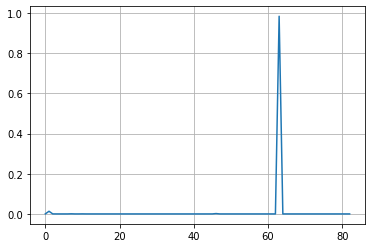

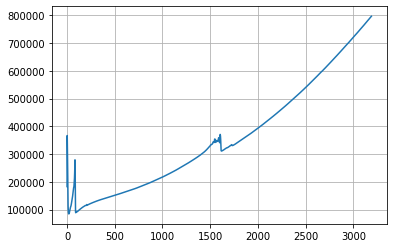

In [0]:
import json 
cuda = torch.device('cuda:0')

data = json.load(open("/home/master/Notebook/AES_DATABASE/json/si10.json"))
infre = torch.tensor(pad(norm(data["Specs"])), device="cpu").float().view(1, 1, -1)

results = model.forward(infre)[0]
sx = torch.nn.Softmax(dim=-1)
results = sx(results).numpy()
plt.plot(results.reshape(-1 ,1))
print(np.flip(np.argsort(results)))
print(sorted(results[0], reverse=True))
plt.show()
plt.plot(data["Specs"])

In [0]:
list(set(elements))[63]

'ge'

In [0]:
exs = []
for item in np.argsort(results)[0]:
  exs.append((list(set(elements))[item]))
print(np.flip(exs))


['ge' 'o' 'c' 'nd' 'pt' 'n' 'f' 'cu' 'cd' 'b' 's' 'v' 'sc' 'cr' 'na' 'er'
 'bi' 'te' 'xe' 'eu' 'ce' 'w' 'u' 'cl' 'sb' 'se' 'wsd' 'sn' 'k' 'tb' 'co'
 'sm' 'pr' 'lu' 'rb' 'as' 'br' 'pd' 'ne' 'sr' 'la' 'in' 'os' 'ar' 'th'
 'nb' 'kr' 'au' 'ti' 'ho' 'ca' 'gd' 'ni' 'pb' 'mo' 'ag' 'zr' 'ru' 'ga'
 'li' 'be' 're' 'rh' 'p' 'yb' 'ir' 'ta' 'al' 'y' 'tm' 'ba' 'zn' 'fe' 'mn'
 'cs' 'tl' 'dy' 'hf' 'hg' 'gap' 'mg' 'si' 'i']
